# Implémentez un modèle de scoring

# Date : le 19 mai 2025

# __________________________________________________________________________________________

## SOMMAIRE

### [INTRODUCTION](#INTRODUCTION)
- [Contexte](#Contexte)
- [Objectifs](#Objectifs)

### [Notebook de prétraitement](#ETAPE-0-:-Notebook-de-prétraitement)
- [1. Importation des Bibliothèques](#Importation-des-Bibliothèques)
- [2. Importation des données](#Importation-des-données)
- [3. Analyse exploratoire "app_train" et "app_test"](#Analyse-exploratoire-app_train-et-app_test)
- [4. Analyse des principales variables Numériques : Outliers, valeurs atypiques, anormales](#Analyse-des-principales-variables-Numériques)
- [5. Analyse des principales variables catégorielles : Outliers, valeurs atypiques, anormales](#Analyse-des-principales-variables-catégorielles)
- [6. Corrélations](#Corrélations)
- [7. Merging et agrégations des données](#Merging-et-agrégations-des-données)
- [8. Preprocessing des données](#Preprocessing-des-données)


# __________________________________________________________________________________________

# INTRODUCTION <a id="INTRODUCTION"></a>

## **Contexte** <a id="Contexte"></a>

Nous sommes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt. 

L’entreprise souhaite mettre en œuvre **un modèle de “scoring crédit” pour prédire la probabilité qu’un client rembourse son crédit**, puis classifie la demande en crédit accordé ou refusé. 

De plus, l'entreprise souhaite respecter une logique de transparence vis-à-vis des décisions d’octroi de crédit.

Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.)

En parallèle, l’entreprise veut s’inscrire dans une démarche MLOps moderne pour industrialiser le cycle de vie de son modèle, de l’entraînement initial jusqu’au déploiement et au monitoring en production.

### **Objectifs** <a id="Objectifs"></a>

***MISSION 1 :  Elaborer le modèle de scoring***

La mission 1 se déclinera autour des objectifs suivants :

`Construction d’un modèle de scoring crédit :`
* Prédire la probabilité de défaut de paiement d’un client.
* Classer automatiquement une demande de crédit en accordée ou refusée.
* Prendre en compte le déséquilibre des classes et le coût métier lié aux erreurs de prédiction (faux négatifs plus coûteux que les faux positifs).
* Définir un seuil de décision optimisé du point de vue métier.


`Interprétabilité du modèle :`
* Identifier les features les plus importantes globalement (feature importance globale).
* Fournir une explication locale des décisions pour chaque client (e.g., SHAP, LIME), afin d’assurer la transparence du modèle auprès des analystes.


`Industrialisation et déploiement du modèle (MLOps) :`
* Suivre les expérimentations et les performances via MLFlow.
* Enregistrer et servir les modèles avec le Model Registry de MLFlow.
* Mettre en œuvre une API de prédiction déployée sur une plateforme cloud via Github Actions et CI/CD.
* Intégrer des tests unitaires automatisés avec Pytest ou Unittest.
* Proposer une interface de test locale (via Streamlit ou notebook) pour simuler des requêtes vers l’API.

**En Pièce-jointe : la liste des outils MLOps à utiliser.**

Michaël, notre manager, nous incite à sélectionner un ou des kernels Kaggle (des notebooks publics partagés par d'autres data scientists), pour nous faciliter l’analyse exploratoire, et nous aider à gagner du temps sur les premières étapes du projet, comme **L’analyse exploratoire des données (EDA)**, **La préparation des données (nettoyage, traitement des valeurs manquantes, encodage des variables, etc.)**, **Le feature engineering (création de nouvelles variables utiles pour le modèle).**

Par exemple nous pouvons nous inspirer des kernels Kaggle suivants : 
* Pour l’analyse exploratoire : https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook
* Pour la préparation des données et le feature engineering : https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script
* C’est optionnel, mais vivement recommandé afin de nous permettre de nous focaliser sur l’élaboration du modèle, son optimisation et sa compréhension.

***

***MISSION 2 :  Intégrez et optimisez le système MLOps***

Mickael revient vers nous deux semaines après notre première mission de scoring. Il souligne que le cycle de vie MLOps n’est pas encore complet, car une étape importante n’a pas encore été abordée : le suivi du modèle en production.

`Objectif principal :`
Tester la détection de dérive de données (Data Drift) avec la librairie evidently.
Cela permet de simuler une situation réelle en production, pour anticiper les écarts entre les données utilisées à l’entraînement et celles reçues une fois le modèle déployé.

`Tâche à réaliser :`
En prévision, il souhaiterait que nous testions l’utilisation de la librairie evidently pour détecter dans le futur du Data Drift en production. Pour cela nous prendrons comme hypothèse que le dataset “application_train” représente les datas pour la modélisation et le dataset “application_test” représente les datas de nouveaux clients une fois le modèle en production. 
* application_train.csv : données utilisées pour entraîner le modèle.
* application_test.csv : données simulant les nouvelles données en production.

`L’analyse à l’aide d’evidently nous permettra de :`
* Comparer les deux jeux de données (les datas d’entraînement et les datas de production).
* Générer un rapport HTML qui permet de détecter les éventuels Data Drift sur les features principales.

**Rappel :** Il nous renvoie également la liste des outils MLOps déjà partagée précédemment (MLFlow, Git, Github Actions, Pytest, etc.).

***

**LES DONNEES :**

**1. application_train/application_test :** Ces fichiers contiennent les données principales pour l'entraînement et le test. Chaque ligne représente une demande de prêt chez Prêt à dépenser, identifiée par l'attribut SK_ID_CURR. Les données d'entraînement incluent une colonne TARGET indiquant si le prêt a été remboursé (0) ou non (1).

**2. bureau :** Ce fichier contient des informations sur les crédits antérieurs des clients auprès d'autres institutions financières. Chaque ligne correspond à un crédit antérieur, et un prêt existant dans application_train/application_test peut être associé à plusieurs crédits antérieurs.

**3. bureau_balance :** Ces données mensuelles fournissent des informations sur les crédits antérieurs mentionnés dans le fichier bureau. Chaque ligne correspond à un mois de crédit, et un crédit unique peut avoir plusieurs lignes, une pour chaque mois de sa durée.

**4. previous_application :** Ce fichier recense les demandes de prêts précédentes des clients auprès de Prêt à dépenser. Chaque ligne correspond à une demande antérieure de prêt, identifiée par l'attribut SK_ID_PREV. Un prêt actuel dans application_train/application_test peut avoir plusieurs demandes de prêts antérieures.

**5. POS_CASH_BALANCE :** Ces données mensuelles concernent les prêts au point de vente ou les prêts en espèces contractés par les clients auprès de Prêt à dépenser. Chaque ligne représente un mois de prêt au point de vente ou de prêt en espèces, avec plusieurs lignes possibles pour un même prêt.

**6. credit_card_balance :** Ce fichier contient des données mensuelles sur les cartes de crédit des clients. Chaque ligne correspond à un mois de solde de carte de crédit, avec plusieurs lignes possibles pour une même carte de crédit.

**7. installments_payment :** Ce fichier documente l'historique des paiements pour les prêts antérieurs. Chaque ligne représente un paiement effectué ou manqué.

**8. HomeCredit_columns_description.csv :** Ce fichier contient les descriptions des colonnes des différents fichiers de données.

L'objectif est de combiner ces différentes sources de données pour construire un modèle de scoring précis qui peut aider Prêt à dépenser à évaluer le risque de crédit de leurs clients.

# __________________________________________________________________________________________

# 1. Importation des Bibliothèques <a id="Importation-des-Bibliothèques"></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import glob
import pickle
import os
%pylab inline
from pathlib import Path

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [14]:
pd.set_option('display.max_columns', None) # pour afficher toutes les colonnes 
pd.set_option('display.max_rows', 100) # pour afficher 100 lignes

## Représentation graphique de la structure les données


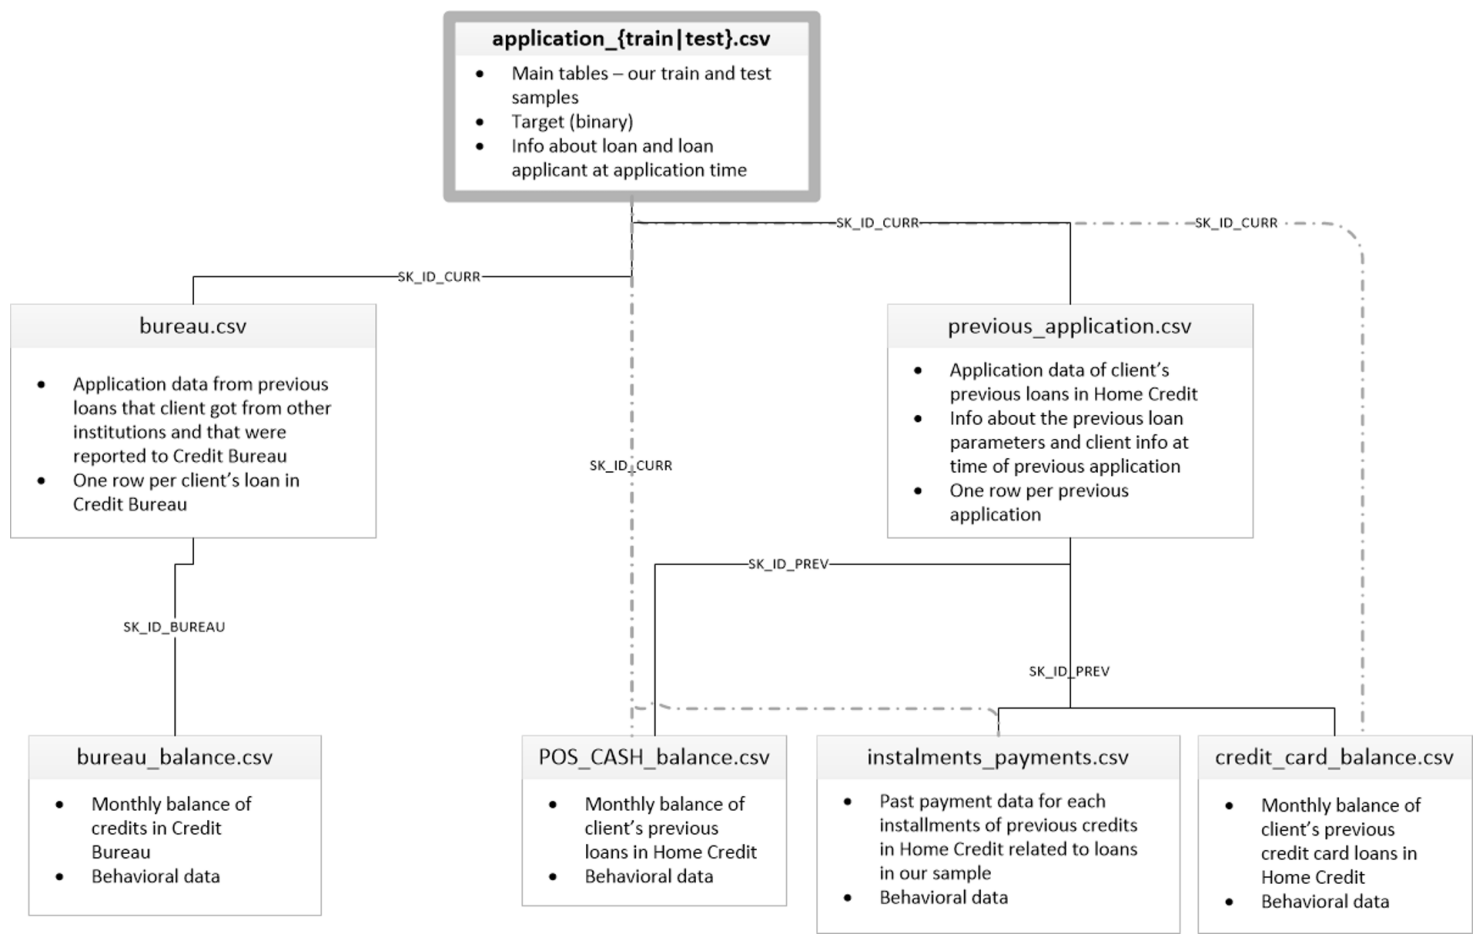

In [16]:
from IPython.display import Image
from IPython.display import display

url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABcsAAAOwCAYAAADhoSzuAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3Qc93nv//dsb+iL3jtIgGABQYidIimqUI2ymiVLtiT32L6Oy/nFiX1y743jJI6tOLGVRLZjWdWWJauTokSTYu8kCIIEwYbee1ls353fH7o7BkCARRZFSnxe5/AoWMzOfOc7szTzmWefr6KqqooQQgghhBBCCCGEEEIIcQ3TXekBCCGEEEIIIYQQQgghhBBXmoTlQgghhBBCCCGEEEIIIa55EpYLIYQQQgghhBBCCCGEuOZJWC6EEEIIIYQQQgghhBDimidhuRBCCCGEEEIIIYQQQohrnoTlQgghhBBCCCGEEEIIIa55EpYLIYQQQgghhBBCCCGEuOZJWC6EEEIIIYQQQgghhBDimidhuRBCCCGEEEIIIYQQQohrnuFKD0AIIYT4qKiqSjAYJBwO4/V68fl8V3pIQgghLpKiKJhMJkwmEwaDAYPBgKIoV3pYQgghhBDiE0TCciGEENcEVVXxer10dnYyMDCAz+dDVdUrPSwhhBCXQKfTodfrcTqdpKamYrFYUBRFQnMhhBBCCPGhkLBcCCHEJ56qqrjdbhoaGujt7cXtdhMKhSRcEUKIj6nR0VG8Xi+ZmZlERUVd6eEIIYQQQohPCAnLhRBCfKJFKsrb29tpbW0lGAyiKAo6nSzbIYQQH1dut5vW1lZUVSU/Px+r1XqlhySEEEIIIT4BJCwXQgjxiTc0NERbWxvhcFi+ri+EEJ8AiqIQCATo6uoiOTkZs9ksD0GFEEIIIcRfTP5FKYQQ4hNLVVVCoRAejwePx4OqqhKUCyHEJ0Rk0WaXy0UgELjSwxFCCCGEEJ8AEpYLIYT4RPP7/VpQLoQQ4pMlHA7jdrslLBdCCCGEEB8KCcuFEEJ8ogWDQa1PuRBCiE8eeRgqhBBCCCE+LBKWCyGE+ERTVVX7I4QQQgghhBBCCDEdWeBTCCGEmIKE60IIcWXIN4GEEEIIIcSVImG5EEIIMc74kFwCcyGEuDIkMBdCCCGEEFeChOVCCCHEOIqioNPpMBqNgATmQgjxUVEUhXA4TDAYlL97hRBCCCHEFSFhuRBCCMGfQ3GdTofD4SAlJQW9Xi+BjRBCfEQURcHr9dLT04Pb7SYcDkuFuRBCCCGE+EhJWC6EEEKMYzKZcDqdEpYLIcRHTFEUfD4fqqrS3t6Oz+eTsFwIIYQQQnykJCwXQgghxtHpdJhMJoxGo4TlQgjxEYq0YTGZTOh0uis9HCGEEEIIcQ2SsFwIIYSYJBwOo6qq9kcIIcRHQ/7uFUIIIYQQV5KUbAghhBDiQyHtEj4an/R5/jifn6IoH+vxCyGEEEIIca2TynIhhBBC/EVUVSUcDgN/DgslMPxwReYzHA4TDAbR6XSfuHmO3Eeqqn4sz09VVe3a6PV67TUhhBBCCCHEx4eE5UIIIYT4wFRVZXBwkPb2dvx+P4mJiaSlpWEwGCZsczWFnlfbeC5GMBhkcHCQrq4uPB4PCQkJpKenYzabr8h4Ir2lP8x5dLlcdHR0MDIyQmJiIikpKVgslg9t/5dTMBikp6eHzs5O9Ho9SUlJJCYmYjAYPnb3mhBCCCGEENcyCcuFEEKIKUjf3AuLBKbbt2/n2WefZXh4mBUrVvDVr36VxMREAoEAIyMjuFwuEhISMJvNVzw4DAaD9Pb2YjabiY2N/dgsInjq1CleeOEFtm3bhqIoXHfddXz1q18lPz+fQCDwkY5Fr9fj9Xrp6enBZrMRFRWF0Wj8iz4rer2euro6nn32WWpra1m0aBGPPfYYxcXFBIPBD3H0Hz6dTsfw8DAvvvgiGzZswOVyUVpayoMPPsjixYsxm83aNy/EhcnfuUIIIYQQ4kqSsFwIIYQQH4iiKKiqSldXFzU1NQwPD5ORkUEgECAYDPLuu+/yyiuv4PF4WLhwIZ/61KdIS0u7bOFnpGI8EsiPD930ej1dXV08/fTTVFdXk5SUxG233cby5cu1lhlXI0VR8Pv9/PGPf+TZZ5+lv7+f5OTkc+ZwqnO+HHQ6HU1NTbzxxhvs2bMHvV7P//pf/4sFCxb8RddVVVV6eno4dOgQdXV1xMfH43a7p3248lGd78UcN3LPRT4Lzc3NNDQ04PF4mDt3LlarVcLyiyRBuRBCCCGEuNIkLBdCCCHEB6YoCgaDAZPJhF6vx2g0oigKwWCQPXv28NJLL6GqKoFAgBtuuIGMjIzLOha/36+FrDabTWuDodPpGBgY4NVXX6W6upqMjAwKCgpYunTpVR2WAwwPD3P06FG6u7vJycnhwQcfZMWKFcTHxxMKhfD5fHg8nnPO+XLQ6/W0tLTw+uuvs2vXLlRVZd26dVRVVX0o+4/0KjeZTFOeg6qquN1u/H4/RqMRm832kfU2DwQCjI2NAWCz2bR7PRwOY7fbWb16NTqdjj/84Q8cOXKEmpoa+vv7iY2NvexjE0IIIYQQQnw4JCwXQgghPoYmV1BPV5EZ2W58Zev4YHGq952vevZiK2QVRSEhIYGsrCx8Ph+ZmZmYzeZpjxepzD1fZemFtjMYDJw5c4YtW7agqiqVlZWUlJQQFRUFgMlkIjs7m66uLrKzs3E6ndO2YbmUMcGf5+pi33cxIvM9ODiIz+cDIDMzk0996lMUFRVpIf/p06fZtWsXBoOByspKioqKsNvthEKh845z/M8Xe+6qqmK1WklJSdF6isfExJx3Ti50vEudj927d1NfX09KSgpVVVVkZGSg0+nOey+PH/+FjjHVdnq9nsbGRrZs2UIgEKCiooIZM2YQHR1NOBzGZDIxa9Ys4uLiqKuro6amBlVV6e/vJzs7G4PBcEnnfjHzNd11utA9OP7vDql4F0IIIYQQYiIJy4UQQohpXG09y8eHXIFAQBubTqfTwrjxYaiqqgSDQVRVxWAwaIFipMe1Xq+fEMpN3ndkv/B+r+9QKITRaJw2mBzPZDKxevVqwuEwHR0drFq1itjYWEKh0DkLbAYCAcLhMAaDAb1eP2XIGgqFtPBXp9NpYx9/zuFwmAMHDvAP//APeDwevvzlL/Pwww9TWFiIoigkJiby2c9+lqysLNLS0pg9e7YWOI9v4aKqKn6/XxvD+LkbP7/hcFgLGyPV3OFwmGAwqFXcR3yQ+yiyP5/PN6HFSSTgV1WVcDjMtm3b+Od//mcAvvzlL/Pggw+Sm5s7YQHOyPsj8xb5OVLJPT48jdwfkXOIzEnkOhQWFvLAAw9oi3Dm5eVp41FVlVAohKIo6PV6dDqdts/xc3Ip8zF+W7fbzQsvvMDrr79Ofn4+3/nOd7jpppuIjo7Wxjx+/kKhEOFwGFVV0ev12v01+aHB5M9LZOzj1y44cuQI//zP/8zIyAif/exn+dznPseMGTO0z8rksUbuo1AodFFh+fgHUuOv1/hxTP47IBwOT/hMRs4hHA5r750sMieT9381uNJrGgghhBBCCCFhuRBCCDHJ1RaSR0RajLhcLtrb2/F6vQDExsaSlpZGTEwMRqMReD90Gh4e5vTp0wQCAWbMmIHFYqGrq4uenh6CwSBJSUkkJydjt9u1sDAQCFBXV4ff7ycjI4P4+Hj6+vro6OjA4/GQmJhIeno6UVFRE0LU8SKhntPpZMGCBQwPD5OZmYnBYNAC3Eg7jf7+frq7u3G5XMTHx2v7NhqNhMNhvF4vo6Oj9Pf3Mzw8TCgUIioqCqfTSUJCAlarFQCXy0VPTw8nT57U2nQ0Nzdz+PBhxsbGSE1NJTY2lvz8fADsdjsxMTHaeCIBssvlor+/n66uLi30TUpKIjEx8ZyFLLu6umhpacFoNDJz5kwCgQCdnZ309/djNBpJSUkhMTERs9n8ga73dNXzFosFVVUZHR2lra2NM2fO4Ha7AWhsbOTgwYOMjIxo5zwyMkJjYyM2m43k5GQCgQDt7e3odDry8vKIjo7G7XZr8zw0NEQgEMBut+N0OnE6ndjtdm1MJpOJ/Px8VFXFbDbjcDgIBoMEAgH6+vpobW0lPj6epKQkbUHV/v5+LBYL6enpxMfHYzKZpqxan/xz5LVgMMjw8DAnT56ks7MTr9fL8PAwdXV1JCQkkJ6eTkZGBtHR0dp9PDIyQk9PDwMDAwBER0eTnJxMfHz8hIdLoVCIsbExBgYG6O3tRVVVEhISSEpKwm634/V66e7u5sSJE7hcLtxuNy0tLRw6dAiv10tKSgrJycnnPHiYHJxfSCgUYnR0lK6uLgYHB1EURZtHh8OBwWAgFArh9XoZGRmhpaUFj8dDcnIyycnJxMTEEAqFqKurY3h4mISEBG1OImPyer10dnZq17+8vFybs6vB1fp3rxBCCCGEuHZIWC6EEEJ8DOj1empra3n55Zc5ePCgFhxH+jtHqn0XLlyIzWZDr9dz6tQp/vZv/xZFUfjud79Lb28vL774Iv39/aiqSmxsLLfeeit33nkn6enpBAIBGhsbefzxx/F4PNxyyy1ER0fz3HPP0dvbSygUwmKxsHTpUr70pS+Rnp4+7XiDwSA1NTU8//zzdHZ2snjxYh599FGysrK0hRDffPNN3njjDQYGBggEApjNZkpKSnjwwQdZsGAB/f39bNiwgXfffZeenh6t4t1oNJKWlsaaNWu47777sFqtnDhxghdeeIGNGzfi8/lQVZXt27dz/PhxrXXJmjVr2LBhA2+//TZxcXHce++93HrrrVqIX1dXxx/+8Af27t2L2+3WQn+LxUJ5eTn3338/8+fP16qj169fzzPPPENKSgpf/epX2bFjB7t27cLlcqHT6UhNTeXRRx9lyZIlOByODxQCqqqK1+vVquqtViuJiYmEw2Fqamp45pln2LJli9amZfPmzVRXV5Ofn8/999/PihUr2LVrF//zP/9DcXEx+fn5HD9+nJqaGqxWK//4j/9IYWEh69evZ/369bS3t+Pz+bSKZafTyfXXX8+nP/1pkpKSUBSF3t5eNm7cyPr16wkEAvyf//N/uP766+ns7OStt97itddeY9GiReTm5lJdXc2hQ4e0HuOzZs3innvuYfHixdO2wJlMp9MxOjrKe++9x1NPPcXRo0cBtPt58+bNlJWV8YUvfIHrrrsOl8tFdXU1L774IrW1tdqDBLPZTH5+Pl/+8pcpLy/HbDbj8/k4deoUr7zyCvv27WN4eFj7bFx//fU88MAD9Pf38/TTT7NhwwbGxsYIhULs3r2bkydPkpmZyW233caDDz6I3W4nPj5ea/sTuX4XU1EeDAZpbGzk6aefZt++fdqYHQ4Hixcv5t5776W0tJS2tjbeeust7TMRDAaxWq3MmzePr33ta8TExPCf//mfHDt2jPz8fO6++27Wrl2rPUQ7e/YsL7zwArt27cJoNPLzn/+csrIyaccihBBCCCHE/yNhuRBCCPExUVNTw+9+9zt6e3tJTk7GZrMxPDxMX18fJ06coKurix/96EeUl5ejKApDQ0McPHiQQCDAP/3TPzE4OEh3dzcWi0WroG1rayMUCvHZz34Wi8WCy+XixIkTNDY20tjYiMFgoKWlhaioKLq7u/H7/bS0tOByufjBD35wTr/qCFVV6enp4fDhw7S1teF0OvF4POh0OhobG3n99dd5+umnOXHiBDqdDqfTic/no6mpidjYWGbMmEFbWxsbN25k69atGAwGkpKStL7ktbW19PT0EBsbqy2s6PP5GBsb0wJKt9uNyWTSKvD9fj+nT59m//79OJ1Oli5dqrWtqKmp4be//S1vvPEG/f39OBwO4uLiaG9vJxQKUV9fz+DgIF//+tcpLy/HZDLR2trKoUOHsFgs9PX10dTUpO1vcHAQg8HAyMgIsbGxLFq0aEIP8YsRCoXo6OjgnXfeoampiaioKHJzc7FarVq7EI/Hg8fj0QLZsbExDAYDXq9Xa3/S1dXFkSNHqK2txeFwMDAwoIXhY2NjdHd3s2XLFjZt2kQwGCQ5ORmLxUJLSwtHjx6lo6MDu93OunXrSE5OxuPxcPbsWQ4cOIDH46G/vx9FUfD5fLS2trJv3z6tkn14eBiv18vY2Bh+v58zZ85gMplISkqipKTkkh4gRCrAIw8GgsEgo6OjmM1mrW2O1+tl3759/OQnP+HgwYO43W4SEhIwGAz09vZSW1vL0NAQX/rSl1izZg3d3d28+OKLvPzyy7S1teFwOLDb7Zw4cYKOjg5KS0uJj4/XvtURCZXdbjdGoxGPxzMhaLZarcTHx2OxWBgeHmb79u0kJyeTm5s7bSsWRVE4efIkP/vZz3j33Xfp7+8nKioKh8NBXV0d7e3tFBQUkJiYyJYtW/jlL3/J2bNniY6OJjo6mqamJs6ePUtBQQG333470dHRtLS0cPbsWWw2mxaWq6rK0aNHef311+nq6mLBggWXdTFYIYQQQgghPo4kLBdCCCGmML5X8dUgHA7jdDpZvXo1TqdTW9RwaGiIXbt2sXXrVnbs2EFDQwMlJSUYjUatR7TP5+Po0aMsWLCABx98kJiYGLZv387WrVs5ffo0mzdvZtGiRcycOROdTofRaMTtdtPU1ERFRQXf/va3SU5OZufOnWzZskWrbn344YeZMWPGtGPW6XSYTCat93mkgnb37t0888wznDp1iqKiIlatWkVZWRkDAwMcO3ZM285ms3HdddeRm5urLRCq0+nYtWsX27Zt48SJE+zcuZOFCxeSn5/PQw89hMFg4PnnnycUCrFo0SKWL19OSUkJxcXF6HQ67fxMJpPWr3x4eJjf/e53vPrqqwSDQVavXs2KFStwOp2cPXuWzZs3U1NTw8aNG0lNTSU9PZ3U1FSt37PP56OxsZFly5axePFihoaGePvttzl69CgHDx7kxIkTzJkzZ9oFTqdiMBhoaGjgf/7nf1i/fj3BYJDbb7+dO+64Q+uRXVhYyKOPPorRaOS1114DYPny5SxdupSSkhJtEdDItw/a29tJTExk5cqVLFiwAJ1OR05ODn6/X2vHkZGRgcViwWAwcOTIEd59910aGxvZvn07y5cvJyUlRetHrtfrtX7uEUajEb1eT0tLC4WFhaxbt46ioiLa29v53e9+R1tbG3v37qWyslK7dy5U1RwOh7HZbFRVVaHX6/n5z3/OwYMHSUxM5JZbbqGyspLc3Fxyc3Npampi/fr17Nixg5SUFNauXcvMmTPR6/UcO3aM119/na1bt1JUVERlZSXt7e28/vrrdHR0MGPGDO644w7y8/M5ceIE9fX1qKpKamoqDz74IEajkeeeew63201VVRUrVqxg5syZ5OXlaW2DFEVh4cKF3HbbbRw6dIhXXnmFtrY2HnnkEaqqqib0nof3vzHS39/Pli1b2LhxI/39/SxdupRVq1aRmppKU1MTR44cwWAw0NzczJ49ezh58iRRUVF89atfpbi4mDNnznDmzBm8Xi96vZ41a9Zw8OBB9u/fT319PR0dHWRnZ6OqKqdPn6alpYX09HRuvfVWnE6n1tP9avBhLAQrhBBCCCHEX0LCciGEEGKc8WHN1RTYKIrCnDlzsFgsDAwMMDw8jMvlwmg0aj3HDQYD3d3djIyMaD2m4f3gtby8nG984xvcdNNNqKpKRUUFzc3NDAwM0NXVxcmTJykuLp5wzBkzZvCVr3yFW265BZPJxMyZMxkcHKS9vR1VVWlsbCQnJ2dCn2aYOuiK/N7j8XDs2DFOnjyJ1Wrljjvu4JFHHiE3N5fR0VFaWlro6urCbrfjcDi44YYbaG1tZWxsjP7+fnw+HxaLBbvdzujoKI2NjXi9XtLT01m6dCmtra289NJL+P1+Zs+ezZ133klBQQGKotDS0jJlX+yuri727t3LwMAA1113HY899hg33ngjZrMZt9tNcnIyg4ODNDY2smfPHj772c+Smpqq7cNms7Fq1Sq+9a1vUV5eTkdHB/B+y4tIj/mxsbFL6l2u0+no7u5m48aNNDQ0kJ2dTXl5ObNnz9bOISkpiZSUFOrr61m/fj0Ac+fO5a677iI7O5twOExfX9+E/VZWVvKtb32L2bNna4tvulwuVq5cSXNzM2NjY/T29mpV+dHR0fT399PY2MjY2NhFj99oNHL77bfz9a9/neTkZNra2qipqdH6cff29l7UfiKfQ5PJRF5eHklJSbz11lscPHiQ+Ph4VqxYwU033aS1Ptm1axe7d+8mHA4TGxurVZXD+y1NdDodgUCA7u5uuru7tUVSI/3BExMTmTVrFgsXLqS1tZWcnBySkpLIy8uju7ubP/7xj3i9XsrKyrjjjjsoLi7WwubIdZkzZw6dnZ2cPn1aq8xfsmQJCxcunPI6t7W1ceDAAfx+PwkJCXzmM5/h/vvvx2KxMDIywt69e8nKytLa40R6/sfExJCfn8/cuXPxeDwEg0Gio6OZOXMmycnJAIyOjlJTU0NCQgJut5vu7m5CoRAxMTHMnj0bu91+yd94uJyutr93hRBCCCHEtUfCciGEEOJjINLa47333uP3v/+91mYDwOfz4ff7MZvNtLe3Mzw8PCHMNRgMlJaWkp2djU6nQ6/Xk52dTUZGBkePHtUC88kVvqmpqZSVlWlhY0lJCdnZ2SiKogWOPp/vots4KIrCyMgIIyMjwPsh84IFC3A6nVo/9IKCAvLy8rSK24MHD/L000/T2tpKKBTSFm/0eDyEQiGOHz/O2NjYOYH9xY4nHA7T09OjtfbIz89n9uzZWtuKSL/yWbNm0djYiMvlIhAITNiPzWZjzpw5JCYmaj3Oo6KiLron91TC4TBJSUksW7YMj8dDd3c3W7duZdasWSxbtkwLuicfY/IcTA4ec3NzKSsrQ6fTaT3ZI4tC/uY3v6G+vl5r8RIMBrUQ9tSpUwwPD1/0+HU6HdnZ2aSkpABoC55GFmT9ICLjnWz8a62trZw9e5ZAIMCJEydoamrS7t9QKEQgEMBisaDX6/H5fGRkZHDHHXfwxhtvcOjQIU6fPs28efNYu3YtFRUVxMTEaN+KmO4h0PjXIz3dq6urOXv2LHFxcdq3I6abp9HRUdrb2wkGg5SWllJQUIDNZiMQCGCz2Vi+fLn2bYt58+axfft2ent7+fGPf0x5eTmrV6+msrKS4uJirFYrGRkZZGVlYbVaGRgYYO/evVRUVHD27FltPpKTkyksLMRqtZ5zPwshhBBCCHEtk7BcCCGEuMopikJXVxcvvvgiTz31FENDQyQkJFBSUkJ6ejoNDQ1UV1cDTNtSIdKCJFK5GQnM7Ha7Vq061Xv0er32HrPZ/BeFnXBueBtphRJ5PXLMYDDISy+9xG9+8xutP3NRURFJSUn09vZy+vRp+vr6tKrYSJA6fv8X20pnctgZmafx8zA+lJ68v0hbksjvJj90+CBBfjAYJDc3l7/7u7+jrKyM//7v/2bz5s1ER0dPCMsnn9/4n6e7DyILmkbug40bN/LEE09w/PhxrFYr+fn5pKWlMTw8zKlTpyYsrnopdDqd9kAicn0+7P7Yk88/HA4TDAbR6/Wkp6dTUFBAVFSUdo9H/syfP19rO/P1r3+d/Px8fvnLX9LZ2akt1Jqens4PfvADVq1ahclkOmdup7u3tmzZwssvvwzA/fffz8MPP0xxcbEWSk81F5PvwfGvRa6XyWTiU5/6FOnp6fzhD39g586dHDx4kAMHDpCVlcXDDz/Mgw8+SEJCAtdffz11dXXs3r2bt956i3Xr1rFjxw6OHj1Keno6K1aswGazycKeQgghhBBCTCJhuRBCCHEVi4S37e3tnD17ltHRUWJiYvj7v/975s+fj91u57XXXqOurm7adgqRxS4jC12Gw2GGh4c5e/YsLpeL1NRU4uPjzwkyfT4fLpdLC+3a29u11hV6vZ64uDiMRuMln09EMBikr68Pr9eL1WpFVVV8Ph8ejwer1UptbS2nTp0iKSmJ+++/n7Vr1+J0Otm3bx/PP/88u3fvvuDxIoHm+ULa8b8bGxtjcHCQlJQU9Ho9oVCIoaEhhoeHtVB8qn1N1d7lL2UwGHA6ncyZMwen00ldXR0jIyPn3fel9NqPPFyoq6ujtrYWm83G3Xffzbp160hPT6euro7nnnuOLVu2aNv/pS5Hi43x5xu5RiaTiXnz5vHAAw9QUFCgfTbC4TBDQ0OkpKSQkpJCIBDAaDRyyy23MGfOHBoaGnj11Vd5++23aWlpYfv27cyYMWPKhWynOpdwOEx3dzf9/f0kJyezbNky8vLyMJlM2oKkXV1dGI1GkpOTMZlM2mc8HA7T2dnJ0NCQ1ts8FAppn9vIWJctW0ZBQQENDQ1s376d9evXc+LECd566y2WL19OTEwM5eXllJaWsm/fPgYHB9m7dy+7d+9mZGSE4uJi5s6di9lslrBcCCGEEEKISSQsF0IIIT4G3G631iokUjWbkZHB6dOnOXny5Hn7DgcCAfbu3UtBQQEWiwWTycTGjRs5c+YMgUCAxMREsrKytCryiGPHjvGb3/yGRx99lOjoaDZu3MiRI0e0sDw7OxubzXbRAaiqqkRFRREdHU04HGZ0dJQXX3xRW7yxr6+PI0eO4Ha7uf322/F6vVqVcFRUFMnJyeh0Ok6ePElTU9OU5xyp7I706+7u7tbOeXJoHlkoMz09nZiYGBRF4fDhwzz//PM89NBDxMfH09nZyTvvvMPx48ex2+3MmzdvyuD0cohUSZvNZq2ViM/no6ura0KbnUjl9vhz1uv12iKv56OqKmNjY/j9fqKiorDZbCQnJ2Oz2WhoaODUqVNaSHu1iNxvXq+Xrq4uuru7GRgYICEhgaysLAoLCzl69Chnz56lo6OD0tJSoqOj8Xg81NfX89Zbb7Fw4ULS09Opr6/n17/+NVVVVSxbtoykpCQaGxvZtWsXLpeL3t5e7YHR+D/9/f10d3drvdKTk5O11i4ej4dwOIzBYCAmJkb7VkJfXx9/+tOf2LhxI4qi8LnPfY5ly5YRHx9Pfn4+tbW1dHd3s2nTJhISEsjIyKC1tZVt27ZRUVFBVFQU1dXVBAIBVqxYwezZs3G73Rw5coSmpiZ6enoYGxsjHA6TkpJCbm4uZrOZ0dFRnn32Wdra2oD3W/GUlJRgMBikP7gQQgghhBCTSFguhBBCXMUi4VxqaipOpxNFURgdHeXJJ59k/fr1nDlzhkOHDuHz+TAajVNWiobDYRobG3nqqac4fvw4JpOJ6upqOjs7iYmJYd68eZSWlmqBbERHRwe///3vtVDwyJEj1NfXEx8fz+LFi8nNzcVoNBIKhbR+4uOPr6qq9nrkv3a7ncrKSubNm0d1dTXbt2/H5XKxefNm+vv7aW5uprCwkBtvvJGSkhKSkpLo6enhjTfeoKGhAZ/Px/bt2+np6dFC8fGBn8PhwOl00trayu7du7XK+euuu4758+cDaOONtOZIT09nzZo1NDU10drayh/+8Ac6OjqIiYmhp6eHQ4cO0dfXx/z587n77rtJTEzU5nV8OH8p7VAu9R6I8Pl8DA4OkpSUpFW5x8bGEhsbS3d3N9u3b2dgYID09HSWLFlCRUWFNtapxqIoCvn5+WRmZtLV1cW7775LT08POp2OPXv20NTURDgc1nq4R/Yx/twnvz7+d+PPIfK7v6SaWafT4XQ6sdvtdHd389prr3HixAlSUlJYt24dlZWV3HnnndTX13Ps2DH++7//m927d2th+ZkzZ7QHH7feeivt7e08++yz7Nixg/fee4+oqChOnz6Ny+XCbDZTWFiofe4cDgcJCQkMDQ2xb98+PB4PGRkZzJkzh3Xr1mEwGBgZGZnwbYzIXOh0Ovr6+ti9ezfvvPMO8P5iqxUVFWRkZLBixQr27NmjVbY3NjaSkZFBe3s7dXV1REVFUVBQwLZt29i7dy+7du0iMTGR3t5eGhsbMZvNlJSUaN8QiSyIWlRUxIEDBzh27BiqqpKVlcXcuXNJSEiYtg+7EEIIIYQQ1zIJy4UQQojzuBrCpHA4TE5ODitWrKCpqYmGhgb27NmDoigkJCSQn5/PyMgIPp+P6Ojoc0JvnU5HZmYmsbGxHDp0iP7+fgwGAwUFBVRWVnLrrbeSmpqKx+OZcL5JSUlkZmZSU1OjLe6Ym5vLwoULeeCBB4iPjwfAbreTmJiotWaJVNJarVYSExNxu93ExcVhMBjQ6XQsXLiQL37xizzzzDM0NzdTX19PbW0tdrud4uJi5s+fT1RUFDfeeCM9PT1s3ryZhoYGGhoasNlspKenk5iYSEdHBykpKZhMJm2eCgoKuOOOO/jTn/6khb8FBQWUlpai0+mIjY0lKSkJp9OJw+HQFuS86667GB0dZefOnXR1dbFp0yZUVcVoNBIXF8eqVatYu3YtCxYswGazARATE0NiYiJxcXE4HA6tMl+n0+FwOIiJicFoNGKxWLQ5vZT7aXzv6sltRsbfG6Wlpdx2221s2rSJrq4u2traKCsro6KiQhtLfHw8gUBAq4ofH3AvX76cnp4e3n77bdra2li/fj1Wq5XU1FRmz55NW1sbNpsNs9kMoFVMx8fHawuzRl6Pjo4mISFBezASEbk3kpKSiI6OxmKxnPMwYbpWNuODZ4PBwIoVK+js7OTw4cMcP36c06dPs2zZMvx+P5mZmaxdu5bTp09z9OhR7bwiPffj4+NZunQplZWVmEwmUlJSWLFiBQ0NDWzcuJFAIIDZbCYrK4vS0lJuuOEGkpOTtc/g7bffzoYNG+jq6mLz5s3k5ORQUFCgjdHj8WjfABl/7SKLxSYmJmqBduRaREdHs3DhQu666y62b99Oc3Mzu3fv1q5dWVkZeXl55OTkMHv2bM6cOcOuXbvw+/3o9XpiY2O58cYbeeCBB0hLS9MWbS0sLGT16tU0NTXh9/sBWLRoEdddd92E9QuuJh92T3shhBBCCCEulYTlQgghxBSupiAp0vbkhhtuICMjg127dtHZ2YnBYGDWrFmkpqZy+vRpWltbKS8vx+FwaO8DMJlMrFy5klWrVjEwMEBtbS1Go5HZs2ezePFisrKy8Pv951RHz507ly996Uu0tbVx+vRpQqEQM2fOpKqqivz8fPR6vRZQr127lpGREebOnYvFYkFRFHJzc7npppvo6elhzpw5OBwOgsEgcXFx3HzzzWRnZ7N//37a29vxeDykpaVRVVVFeXk50dHRlJWV8dhjj1FYWEhdXR2KopCRkcGCBQvo6+tj586dpKSkEBsbSzgcJhQKkZ+fz+c//3kKCgqor6/H7XZTWlrK8uXLcTgcVFRUEAwGiY6OprCwUDvX7OxsvvGNb7BmzRoOHTqkVVTb7XbtoUJhYSEmk4lQKIRer6e8vJy7774bq9VKcXExZrOZUCiE2WymqKiIm2++mUAgQEFBgdbG5FLCwMi1MBqN2gOIcDiMz+cjHA6j0+m0a/LFL36R/Px8zp49i9frpaKigqqqKm3BzltuuQWXy8W8efMm7DsUClFcXMxDDz1EXl4e1dXVBINBUlJSqKysJBwOs3nzZq09SygUIioqinnz5jE2NobRaCQjI4NQKITdbmfWrFncfvvt2sOYyHUxm80sWLBA6yeen59/3gUzpwrQI210rr/+euLj49m5cyft7e2YzWZWrVpFXl4efr+f/Px8vv/971NdXU1dXR1dXV2oqkp8fDwlJSXMnz+flJQUAIqLi/nHf/xH9u/fz4kTJ3C5XMTGxjJjxgwWL15MWloaer2eQCBAdnY2jzzyCDk5Odq2JSUlrFy5Ursv/H7/hEVnTSYTOp2OYDCI0+lkyZIluN1uzGYz5eXl2Gw2gsEg6enpfPnLX2bRokXs3btXax+UlZVFVVUVJSUlREdHc++995KTk8OxY8cYHh7GbDaTm5tLVVUVpaWlE75dkpqayurVqxkYGMDn82lzV1RUdNVWlV9Nf+8KIYQQQohrk6LKv0iFEEJ8QqmqysjICI2NjbS1tZ13ocfI/xza7XbS09O1BR6vJpF2Jl6vVwvkzGazFuZFqmJNJhM2m40NGzbwwAMPEAqFeOihh/jiF79Ibm6utmCg2WzGbDZrVabBYJDa2lq+8Y1vcOTIEW677TZ++MMfkpKSorUtMZlM2nsiYwoEAlqAazKZtLA88nooFDrnffD+Ap8+n49gMKg9ELBYLBgMBhRF0SpkvV4vfr9fq6q2WCza6zqdDpvNdk61tc/nw+/3a4FlpPrZ7/fj8/nQ6XTaXI03eUw6nQ6j0ajN8/gFQ30+H16vV6tOj1TOR+bE4/EAYLFYLqp/+GSRORgaGuLrX/86r776KjNnzuSb3/wmCxcuJC0tbUJVvcfj0cYdubaR6+D1erXXJ1e6R0J3n883oS9+pPrb4/GgKAo2mw2DwUA4HNbmUVEUrFarFtJGjgXvf7Ng/PjGvycyvgiDwcBrr73Gj3/8Y+rq6lizZg1/93d/x5w5cwgEAufMTeTeCgaDE8Ywfo79fr8WXkfuL5PJpAXY4yvWx98vOp1Ou18nX7PJ2xqNRqxWKwC9vb3s37+fX/3qV2zbto3i4mJefvllcnNztTH4/X7tnomMefJ5RT7fiqJgMBi0ey9yncZ/3hRF0e7PSA/y8X/PBQIB3G63dq4Wi2XK87qa+P1+enp6aGlp0T7j04l82yArK4ucnBztQaEQQgghhBAflFSWCyGEEB8T44Ox8S06wuGwFkRP7gk9PhCMtHVwOBxaqBYJ8SYvfBn5r6Io2O12LYiLVJ+PbwtiNpuxWq0oijLh+OOD86l6VU8+l8g4x/fX1ul0REVFnXO+JpNJa/MRDAYn7DdynuPfE3m4YLPZtPOfXEl/vjFNPmd4PwyOjCEyj+PnxGazaYH/6OgoAwMDDA8PX9Sim1arlYSEBGJjY7VWHAcOHKCxsZGf/vSnrFq1iq9+9asUFhZq7Tiio6O1fY+fx+muT2SskXm22+3agpXjzzfSdiZyjpEHFJFgcvzr083J+PdMN/eXYvy9Nfl8IywWi3be489p8rH1ev0598vknusR4+cpMp+KotDb28sLL7zAK6+8QkNDA3FxcVRUVBAbG6uF3JGHKlPNz3TnNfkzp9frMRgME1rcTD6n8feXyWTSwvzp5kkIIYQQQgjxZxKWCyGEEB8j44Pfya9PDsHGt7YYH45fKCyb3BpjfFuJSx3TVK9f7O8jLvZ8L/QeuHBYeLFjutC+IpX68H542dHRwYYNG9i2bdsF96soCgUFBaxbt4758+djNBpZu3Ytfr+fLVu24Pf70el0E1ppnG/cF3tO053PdK9dyusX+l1knOOD4fOF6RdzThcbCl/KNY/sd/y+I5XPkYr03NxcKisrueeee7DZbBP2Pf6++CBjOV+QP9325zueEEIIIYQQYiIJy4UQQohpfJw7lan/b4HFnJwcvF4vTqcTk8l03hAy0mojOTmZpKQkEhMTtZYd0kv4L+N2u2lqauLIkSPnbQcEfw5jBwcHCYVCGI1GZs6cidVqpby8nEAgQEZGBnFxcVrblY87VVWJjY0lNzcXl8ulLdz6cbjvwuEwNpuNVatWkZWVhaqqExaVvZQgXgghhBBCCHFlSVguhBBCTOFqD+guJBQKkZGRwWOPPYbH42Hu3LnExcWdtxJaURQSExO56667qKysZNasWcTExGi/Fx+MqqokJiayevVq0tPTtV7k04ks+Jibm6u11gEoKCigqKgI+HOg/klpqREKhcjLy+Oee+6hqqqKgoICEhISPhZBc6QtUHl5OXPmzNFe+ziMXQghhBBCCDGRLPAphBDiE+svWeAzOTn5qlvg81KNb+mgKIrWuuPDfo84v/F94y/2n12RQP1CwfonxeQ5knvv2hUIBGSBTyGEEEIIccVIZbkQQghxHh/nZ8qKomAymbSFCC+mpcX493wYCzGKPy+4aDQaLzr8ndxr/pNu8hzJvXdtkocjQgghhBDiSpOwXAghhJjGxz2ou9SFCz/oe8T5Re4jmdfpyRwJkLURhBBCCCHElSdhuRBCCHEeEtwIIcRHQyrLhRBCCCHElSZhuRBCCDGOqqrodDpMJhN6vV7CciGE+IhEwnIJzYUQQgghxJUiYbkQQggxSaRv98d9gU8hhPi4kQeUQgghhBDiSpKwXAghhJiGVDcKIcRHR4JyIYQQQghxpemu9ACEEEIIIYQQQgghhBBCiCtNwnIhhBBCCCGEEEIIIYQQ1zwJy4UQQgghhBBCCCGEEEJc8yQsF0IIIYQQQgghhBBCCHHNk7BcCCGEEEIIIYQQQgghxDVPwnIhhBBCCCGEEEIIIYQQ1zzDlR6AEEIIIcRHSVVVRkdHCQaD2O12TCYTiqJMuV0oFMLlcgEQHR2NTid1BuLSqKqKy+UiFAphs9kwGo1T3m9CCCGEEEKIK0/CciGEEOIapKoq4XCYcDiMoijodDoURZk2NI5sr6oqOp1O2/5ijxUKhQC0915JoVCI9957j5aWFlauXElJSQl6vX7Kbfv6+ti4cSN6vZ5169Zht9sl6LwCIvdgKBS65PvvSgsGg2zZsoX+/n6WL19OVlYWRqPxSg9LCCGEEEIIMQUJy4UQQohrkN/v58iRI9TW1uJwOKisrCQ7OxuD4dx/GgSDQTo7O9m5cyder5d58+ZRWlp6UYGfqqoMDg6ya9cu9Ho98+bNIyUl5QOPW1XVCf+NBKaXEpyGw2H279/Pvn37yMrKoqioaNqwfGRkhC1btqCqKitWrMBqtU677bVu/LUZfz0+jFA7EAjQ0tLCjh07KC8vp7y8HIPB8LEIzEOhEFu2bOHMmTPk5OSQlpZ2zmfnw7ivL0Y4HL6s+xdCCCGEEOLjTsJyIYQQ4hrk9XrZtm0bGzZsYGxsjHXr1vGVr3yFuLi4c7YdHBzkD3/4Ay+88AJut5sHHniAvLy8i66O7ezs5Oc//zmxsbEkJSX9RWE5vB+cnjx5ku7ububOnUtcXNwlhX6qqjI8PEx3d7fWYmU6wWCQ/v5+gsEgfr//Lxr3J52qqvT09FBdXU1BQQHZ2dkfWgW12+2murqaJ554gs985jMUFBQQHR39oez7cguHw3R3d9PS0oLb7dYC8YjIz/39/Rw6dIj09HQKCwsxmUwf+lhOnjxJV1cXubm5ZGRkTPlwTAghhBBCiGuZNN4UQgghrkHBYJCenh5MJhPNzc1s3LiR9vZ2rV0K/Ll9SktLC6+99hp9fX309/dTV1dHIBC46GMZjUbS0tLIzMzEZrP9xWP3+/1s2bKFp556it7e3g+0j0jrmQu181AUBb1eL9XkF0FVVc6cOcMTTzzBkSNHJtxLfymdTkd0dDTFxcUkJiZ+rCqiI/fQ+XqVh8Nh2traePLJJ9m5c+clfb4uxdatW/nlL3/JqVOnCAaDl+UYQgghhBBCfJxJOYkQQgjxEVBVlUAgwNDQEB6PB4PBQGxsLDab7YoEf6qqotfrmTVrFgaDga6uLvbt20dubi52u13bbmxsjOPHj+Nyubj++utpamrSepdH9uP1ehkcHGRsbAy9Xk9cXBzR0dFawJyamspf/dVfYTAYSE9PB8DlcjE8PExCQgLBYJDBwUH8fj92u52EhIQpW2yEw2G8Xi9nzpzh8OHDHDlyhPr6enQ6HTExMcTExGA2mwmHw4yOjjI4OEgwGMRmsxEfH4/FYpmyPcjw8DAul4tgMEhsbCyxsbEX7Ks+/rzdbjc6nU4770gAr6qqVpnucrkwm80kJCRgtVovyzWP3GOR8wmFQlitVuLi4rRjqqqKx+NhYGCAqKgoHA6HNl6v10tvby82m42YmBh0Oh0jIyN4PB6cTqd2HtHR0RMCa1VV8fv99Pb2cuTIEaqrq1mwYAGFhYU4nU7i4uIwmUz09PTgcDhQFIXh4WFUVcXpdGK1WrVFV4eGhggGg1gsFu2aAdhsNubMmYNeryc/Px+Hw4GqqoyNjTEyMoLT6cTv9zMwMEAgEMDhcGj30fnmK9ImaHh4mFAoRFRUlDZeRVG0eykUCmGxWAiFQgwODhIIBIiJiSE2Nha9Xj9hLiL3hcfjwWq1XvABUSgUoq+vj9raWmpqakhPT+fkyZMkJCQQFxeHw+FAr9cTCAQYHBxkZGQERVGIjo4mNjZW+6xE1hUYGBhgdHQUvV6vfS4CgQC9vb0cPHiQgwcPUlVVRVpaGnFxcRPuDyGEEEIIIa51EpYLIYQQl1kkQDt+/DhvvfUWp0+fJiYmhpUrV7JixQri4+Ov2KKXJpOJFStWcPDgQd566y1uvPHGCQF+V1cXBw8eZMmSJeTl5dHW1qa9NxwO43K5OHbsGO+99x5nzpzBbDZTXl7OjTfeSFZWFgaDAZfLxb59+7QwPCYmhpqaGl544QXWrVuH1+tl//79tLW1kZOTw4033sjs2bO1oDQiUuX+8ssvs2vXLvr7+/nVr35Feno6CxcuZOXKlaSmptLZ2cnevXvZtWsXIyMjpKSksGzZMpYvX47VagXQgtCuri7effddDh06xMjICOXl5axatYr8/Pxpg9ZIG5fDhw+ze/duGhsb0ev1zJ07l9WrV5OdnY3JZMLj8VBTU8N7771HY2MjSUlJ3HDDDVRUVOBwOLRxfBhUVcXtdlNTU8PBgwc5c+YMHo+HpKQkqqqqWLRoEXFxceh0Ok6ePMmvf/1rVq1axapVq7R2Jk1NTTz++OMsXLiQtWvX4nA4+NOf/sS+ffu466672L17N0ePHmXlypV85jOf0R6GqKpKf38/mzZt4uWXX2ZwcJD169dz4sQJ5syZw9q1a4mLi+PHP/4xs2fPxuFwcOjQIQwGA5/+9KcpLCykq6uLPXv2UF1dzeDgIMnJySxcuJDKykqcTqd2rV599VVWr15NamoqOp2OgwcP8sYbb3DXXXcxOjrKtm3b6O/vJysri3vuuUe7jlPNs8/no6Ojg/fee4/q6mpcLhc5OTlcf/31zJs3D4fDgd/vZ+vWrbS1tZGdnY3P5+PgwYP09PRQVlbGDTfcwIwZM7TPr8vl4uDBg2zbto2Ojg5yc3OpqKhgaGho2m8njI6Osnv3bl566SW6u7vZtm0bvb29FBQUcOONN1JRUYGiKNTX17N582bq6urQ6/WUlJSwYsUKZsyYgdVqJRAI0NjYyDvvvENdXR0xMTFUVVWxbNkyAoEAL730Ert27aKzs5MXX3yRo0ePMnPmTG677TaKioo+lPtQCCGEEEKIjzsJy4UQQojLKFJ1u3XrVp544glqamoYHR3FaDSydetW1q1bx7e//e1L7rv9YY0tFApRXl5OKBTi5Zdfprm5mZSUFAwGA+FwmNOnT7N//34ee+wxYmNjJ7TWcLlcvPHGG5w6dYqkpCTWrVtHa2srTz/9NE1NTXzuc5+juLgYj8fDsWPHGBgYoKqqiqKiInp7e9mwYQP19fUUFRUxZ84cMjIyeO+999i6dSv//u//Tmlp6YSHCHq9npSUFCorKzl48CChUIilS5dSVFREYWEhCQkJnDlzhjfeeAO/38/ChQuxWCxs3LiRH//4x7hcLtasWYPNZkOv19PQ0MCzzz7LmjVrmDNnDh6Ph40bN7J3717+5m/+hpKSknOuSSSU/u1vf0tNTQ1FRUXccsstdHR08Morr3DkyBG+8IUvUFFRwZkzZ/j7v/97SkpKWL16NQMDA+zdu5e4uDhKSko+1J7Uo6OjbNmyhf/+7/8mLy+PhQsXotPpOHToED/60Y+49957ueeee8jIyKCnp4fNmzeTkpLCokWLtLB8aGiIzZs3Ex8fz6pVq7DZbLS0tPDKK69w/PhxFi9eTFVVFXl5eedU6MfExDBr1iwqKio4duwYs2bN0q5NWloa/f39bN68ma1bt1JRUUFhYSGlpaU4HA76+/v57W9/y+DgIAsXLgTgwIED/PjHP+a+++7ji1/8IqqqMjQ0xPbt28nIyOD666/HYrHQ3d3Npk2bqK6uZtGiRZSWljIyMsI777xDX18fX/ziF5k5c+aUc1ZTU8M777yDyWRiyZIlGAwGXnnlFQ4dOsQjjzzCbbfdRigUorW1lddffx1FUbS5zczMZMOGDZw6dYq//du/JS0tDYC33nqLt99+m+joaJYtW4bP5+PFF1/k8OHD5ObmTjkOu91OSUkJ8+fPZ//+/RQVFWkPmwoKCggEAmzZsoV3330Xh8PBmjVr8Hq9bNmyhf3793P//fezdu1ampub+clPfgJAZWUlNpuN7u5u9u7dS1VVFUuWLGHTpk0MDw8zf/58li5dSk5ODomJiR/afSiEEEIIIcTHnYTlQgghxGXW1dXFli1b2L59O6Ojo9rrfX19JCYmcvPNNzN//vxzKqk/CuFwmKSkJIqLiwHYs2cPRUVFJCYm0tfXx7Fjx9DpdJSUlOD1eieE5QaDgby8PDIzM8nNzcXpdNLV1cXZs2fp6OigubmZwsJCwuEwbrebkZERrRdzIBBgdHQUq9XK8uXLWbhwISaTCZfLxU9+8hNqa2vJyckhKipKO16kb3VZWRnZ2dl0dnZSVVVFeXk5UVFRGAwGoqOjmTdvHk6nk9zcXK2dxvDwMDU1NVx33XXYbDatDU1eXh5r166lqKiIUChEU1MT7777Ltu3byc7O3tCWK8oCsFgkPr6eg4dOkROTg533303qampDA4OYjAYeOGFF3jnnXeYO3cuXV1dHD9+nLvuuoubbrpJW1T0cnyT4OTJkzzxxBPExcVx8803s2DBAvR6PWlpaQwODvLSSy+Rn59PRkYGwWBQa68SDoe1fYRCIUZHR/H5fFqbHZ/Px9jYGPHx8axYsYKcnBytlcr4ebHZbBQUFFBWVobVaqWkpISVK1fidDoxm8309vYyOjqKoijMmDGDtWvXkpqaitlsxuPxsHjxYsxmM6Wlpej1epKSkti2bRsnT57E7XZr7XVGRkZwu93auP1+P2NjY8ycOZNly5Yxe/ZsxsbGGBgY4PXXX2fx4sUUFxdP+S2BhIQEFixYQFZWFmlpaeh0OlwuF2+//Ta1tbXcfPPN2r0aqRK/5ZZbmD9/Ph6PhxMnTlBfX8/hw4dxOp2MjY3x+uuvMzo6yl133cWiRYu0ViyHDx+etoe70WgkKyuLWbNmYbPZyMvLY8WKFSQmJmKxWGhsbOTFF18kKSmJz3zmM+Tm5hIMBklJSeHHP/4x27Zt4/rrr2doaIiDBw9y9913c8stt2Aymejr60NVVRwOB7NmzSInJ4eTJ08ye/Zsli9fPqGNixBCCCGEEELCciGEEOKya2tr00K/ydxuN52dnVd0sT29Xk9xcTGlpaW8+eabLF26FKfTyfHjxzl06BDLli0jJyeHM2fOaCEqgNVqZf78+QwNDVFfX8/OnTvxeDy43W5OnjxJa2urFmpGFtQc39s50rpk0aJFZGZmAmgV1w0NDYyMjEwIyyP7sdlsmM1m9Ho9UVFRxMTETOiPHhsbS1dXF9u3b8flctHe3s7IyAi1tbWMjo6SkpKiPSRYtWoVVVVVGI1GABYtWsTJkyc5e/Ysfr9/QqgdCVN37txJbW0tBoOBw4cPEw6HtSC3vb2d06dPEwqF0Ov1qKrKsWPHqK+vZ+bMmaSlpZ0zF/B+ZfimTZu0XtNTCYVCxMXFUVZWRkZGBiaTCVVV8fl81NfXc/z4cb7//e+zZMkSYmNjgfcrjF0uF1/72tc4duwYa9asQafTTeizPd7kcamqSlRUFDfccAPl5eVa+5ipmM1m7HY7Op0Om81GbGys9gAocr2LiopYvHgxRUVF2nmazWYWLVpES0sLe/bsYWRkhIGBATweD729vXR2dpKTkzPlvKmqisFgYNGiRSxcuJCoqCj8fj9z587lueeeo62tDa/Xi91uP+d8c3JySEpKoqWlhS1btuB2u2lubtb6h0fC7UjYPHv2bJYuXUpsbCxut5sZM2ZQX19PXV0dK1asoKOjg/r6ehYuXMiyZcu0a3DzzTfz2muvcebMmWnnzmQyYbfb0ev1WCwWYmNjsdvt+Hw+jh8/zvHjx1FVlVOnTlFXV4eiKHg8HoaGhujo6NC+rWK1Wqmrq6O2tlbrGx9ZyDYy13q9HofDQVRU1If67QYhhBBCCCE+CSQsF0IIIS4zu92u9cqezGAwXPHF9QKBAPn5+SxdupRNmzZx8uRJCgoKOHDgAGfPnuXLX/4yiYmJnDx5csL7/H4/NTU17Nmzh6amJm1By/r6ek6ePKlVtUZMDjkVRcFut0+obI2Eem63W6tCnyyyMGNkQcNwOIzBYEBVVfr6+ti5cyc1NTUMDw+j0+no7e3l5MmT2O12vF6v9l673a61v4kskJiUlER2dra2zeTr4vV6OXv2LH19fTQ2NnLgwAFtW7fbTUlJCXPnzkVRFLKzs7nxxhtpaGjgiSeeoLi4mGXLllFeXk50dPSE/fv9fo4dO0Zvb68W3E8WDAZJS0sjNTWVlJQULeiMLCgJkJSUpAXUiqJgMplITk7GarUyODiI1+u9pHtNVVVtH5Eq/amMX2Ay8r7xD0oi55qamkpMTIw255FvHWzYsIGamhoCgQDhcBiPx8Pw8DCDg4P09fWRk5Mz7RgVRcFisUx4ABAJiL1er9Yrf7LOzk527NhBbW0tY2NjGI1GWlpaOHnyJElJSYTDYe1+jDyUiYxbURTtOrlcLq363Ov14nQ6J2xrtVqnvabj53nyfR1p4dTS0oLb7aajo4PDhw/j8/m0ucvJyWHOnDkYDAZSUlK444472LZtG88++yyHDh2ivLychQsXEh8fP6HH/PhrI4QQQgghhPgzCcuFEEKIy6ygoIAFCxawZ88e2tratADZ4XCQm5tLenr6BcO0yykcDmOz2SguLiYpKYljx45hNpupr68nPj6egoICjEbjOQFbZ2cnv/zlL2lsbOSWW25h5cqVBAIB3nnnHRoaGiYE5dO5mG0mi1QXR/5EBAIB9uzZw3/8x3+QmZnJpz/9abKzszl79ixjY2PnVMYDU1ZYh0Kh847LbDaTlZXFzTffzNq1a7WAM3I+iYmJGAwGsrOz+eEPf8j27dvZsGEDv/vd79i5cyd//dd/zZIlSyY8QHE4HNxzzz34fL5pW7SoqorFYsHpdE6oCDYYDFqbkfFtVca/LxwOo9fr0el0Ex4EjD/36SraI/u4kEjl9/ifp9rP+H15vV4OHDjAL3/5S+Li4vjc5z5HTk4OAwMDWtX+xQS6k/c7eVyTt/X7/bzzzjv8+te/Zv78+dx2222kp6dTU1NDT08PLpfrovavqqo2p36/X7t3xj8IiczL+eZwqvs58nrk74bKykoee+yxCd9QURSFuLg44uPjMRgMfP7zn2fOnDls3LiRt956izfeeIPHHnuMu+++m4SEhCnvDyGEEEIIIcSfSVguhBBCXEaRytLbbruNvr4+nnrqKdxuN4qisHDhQh588EFmzJhxRcPyyDizsrK4/vrrqa6upq6uDofDwa233nrO4qORSuHW1lZqamqoqqri7rvvJi0tDZfLRXV1NUaj8QMF4RfDZDJhsVjOCSXdbjc1NTUMDAzwjW98g2XLlmG1WgmHw9oiluMFg0HGxsYmBIhdXV20tbWRnZ2tned4ZrOZtLQ0LBYLcXFxFBYWTgiZQ6GQFowqikJKSgq33347K1as4LXXXuOJJ55g48aNzJgxg4yMjAnnVFhYeME5m6oVicVi0SqHR0ZG8Pl8WnW53+9nYGBAC1Uj1eE6nU6rXo6M2+PxTHv8i7mWBoMBm82mbX8x+4osTApwww03sGzZMmw2G83NzVpv+Q+7+llVVQYHBzl8+DBut5t7772XefPmYTKZGBwcxG63nxOWX2h/BoOB9PR07HY7Y2Nj+Hw+7b7w+XzTfksiItK6JtK6J8JgMGi9y6OiosjKypoQvEeq3w0GA6FQiJiYGJYvX87cuXPZvXs3P/vZz/jFL35BVVUVCQkJGAyGc44hhBBCCCGE+DMJy4UQQojLTKfTkZeXxze+8Q1uvfVWurq6sNlsZGdnk52djdlsviLtEMa3fQBwOp3ceOONbN26ldOnT3PTTTexcuXKCQuPRraNtPgYHyi7XC46OzvZvXs3vb29E6qMx7d+mOrYF3p9PJvNhtPpxO/309XVxejoqDaHer1+QgsLn89HXV0d1dXVE6p3DQYDZ8+e5bnnnqOiooKMjAwCgQBbt26lubmZe++9F5vNRn9//4TWGNHR0SxZsoQ//vGP7Nmzh2XLlpGcnIyiKIyNjXHixAni4+PJzc2lvr6emJgYkpOTsVgspKam4nA48Pl851T4Rsb0Qej1evLz85k9ezY7duzQ+s8rikJ9fT2///3vycnJoby8HLPZTHR0NLm5uXR0dNDf34/FYqGpqYlXX31Vq0AfXyl/sdXIkVYgiqLQ29vL0NAQOp0Os9kMoLXMmXzeRqORYDBIKBTC7/fj9/upq6tjcHCQlJSUCffC5Hvjg9xHkbmOPDBQFAW/34/L5aK2tpZTp05NeLgyvi3KVMeInFNubi6JiYkcP36cgwcPUlpaitfrZevWrRw7dgy73T7tfa3X64mLi8NqtdLf36+14zEajcyYMYO0tDQOHTrE3r17KSsr0/rn19TUkJycTHl5OQ0NDfT19ZGXl4fVaiUlJYXExES6urq0sL6wsJCcnBx6enoYHBwkGAxitVplkU8hhBBCCCH+HwnLhRBCiMssEs5Fek37fL4JrTOulMlBqNVqZe7cuVgsFgKBACkpKeTk5GAwGLSwUFVVbeHD9PR0lixZwp49e/jf//t/k56ezunTp7V2IZPD8fGB4/j/Xkz4GRGZy8LCQmJiYnj88cc5dOgQpaWlLFiwgAULFrBr1y5+8YtfUF1dTX9/P0NDQ0RHRzM8PDzhHCLtTP7u7/6O8vJybXHOlStXsmDBAkwmE6FQSAt5IxXExcXF3H777WzcuJHvfe97zJo1C7PZTF1dHVlZWdx///0YDAb6+/t5/PHHyczMxOFwcPToUWw2G8uWLSMuLu5DuYaRgDM/P5977rmH3/zmN/zgBz+goqICk8nE0aNHCQaDfPazn6WyshJFUcjNzeXmm2/mpZde4vHHH8fpdGoLhZaUlGih7uT+2RczFqfTycyZM1m/fj09PT0sWLCAiooKrY3P5GsbFRXFypUr2bZtG8888wynTp3CZrPR1tYGMKF1SOS6Tb5fpmqbc6FxR0VFsWjRIo4ePcq//Mu/MHfuXNra2nC5XFpF++R9TQ76xx9DVVWio6P59Kc/zQsvvMA//dM/MXv2bLxeL0ajkYyMDK1P/eQxRa5hbGwsFRUV7Nmzh7GxMaqqqpg1axYzZ87koYce4umnn+bv//7vqaysJCYmhuPHjxMbG8t9990HwNDQEH/84x/R6/XYbDZOnTpFa2sr9913H+np6QCUlpayY8cOXnrpJUZGRkhKSmLlypUUFRVd8PoKIYQQQghxLZCwXAghhPgIRRYjvNLMZjOVlZWEw2GcTifwfnVrQkIC9913H4sXL2bVqlXYbDatGjstLY0777yT+Ph4rS3EAw88QGJiIn19fej1egoLC7WAr6KiAr1eT1RUFMuXL8fr9WqhXX5+Pg888ACVlZU4HA5tXJmZmdx3333Mnz9/wuvj6XQ65s2bx+c//3kOHDiATqfDYrFgtVqpqKjgscceY8+ePej1emJjY5kxYwZRUVG0t7eTmJiIXq+nqqqKpKQkSkpKtH3Exsaybt06brzxRtLT09HpdERHR7NmzRoURSE2NhZFUYiKiuLee+8lPj6eEydOaEFqTk4OlZWVZGVlYbVaKSoqYs6cOXi9XgKBAEVFRcyaNYvly5dPe24fVGxsLGvWrMHv93P06FF0Oh16vZ6ZM2cye/ZsbrzxRhISErRFTO+44w4ABgYGMBqNZGVlkZWVRUVFBWlpaTgcDgwGA3PmzMHv95OXl3fenuYRCQkJfOlLX2Lnzp1albrVasXhcPDpT3+akpISEhMTtYDYYrEwb948HnnkEY4cOQK8vyBuVVUVc+bMITU1lbS0NHQ6HSkpKTzwwANUVVVhtVrR6XQUFhZy3333UV5ervVx1+l0ZGZmcs899zBnzpwJ/d3h/c+g2Wxm+fLlhEIhqqur0el0OJ1OFixYwLJly7QFPxVFoaysDEVRmDVrlrYvvV5PcXExN998M3l5eZjNZvR6Pbfeeismk4kjR46g1+txOp2Ul5czb948gsEgGRkZ0z4ki4uL47Of/SzJycm4XC6tNUtUVBS33XYbBoOBgwcPag8I0tPTmT17tnZt0tPTtdDf4/GQkZHB/Pnzueuuu0hMTASgpKSEO++8U/t82Gy2c+ZHCCGEEEKIa5miStNCIYQQn1CqqjIyMkJjY6O2sOZ0rQYi/3MYaY8Sqaj+pAqFQoyMjABogVmkpcro6CjwfpAZCQxVVcXj8eDz+TAajVqIrqoqwWCQkZERQqEQsbGx6HQ6PB4PRqMRi8VCMBhkdHRU62ltMBhwu92MjIwQGxs7oQ2N1+tlaGgIs9lMVFTUlNdgfHX4yMgIXq+X2NhYrV92pJ3H4OAgDocDm81GKBTC5/Nht9vR6/UMDw8TCoWIiorS9mM0GrWQODKeQCDAyMgIBoOB6Oho7cFBOBwmFArh9XoZHBxEr9cTHx+P0WjUQuXI3IyOjjI6OkpsbCwOh0P7/YfZ9iJy/waDQbxe74QxR8YUOV5k/oLBIIODg9pDgci86PV6bZ5GR0fx+/3ExcVNuRjqVOOI9D8fHh7GbrcTExNDKBRiYGAAu90+4QHM+Pe43W5GR0exWq1ERUXh9XqB98NzRVHw+XzatwSsVqt2T46NjREbG6vdq+FwGJ/Px8jICFarFbvdfk6f98ljHRkZIS4uDqPRSCAQIBgMag80XC4XoVAIq9WKyWTS2re43W7cbjcmk4moqCit7VDkXFwuF9HR0VgsFu2zY7PZsFgsUy7iGqlUj5yn0WjU5j2yX5/PR39/P4qiaAvJRs4t8v6xsTFGR0e1oD1y3SLbjJ/ruLg4LBbLlIuLXgmRbzg0NzfT3NyM1+uddsFbeL+1j8FgICsri5ycnA/9IZQQQgghhLj2SFguhBDiE0vC8ulN1wpiutcn/2661yebapHMyGuR6zF5X1O9finnMNV+LuWfO+c7t6kC1/F93Kf6feS/kd9d7lDyQmMaL9Ja5GLGdCnjnmr+L3Rdx28z1bGn2sfF3pPnG/vkfVzo5+neN925nG8fFxrPVMe80LW91Lm+GkLyCAnLhRBCCCHElfbJTQGEEEIIMa3pArLzBWcf5D3T/X66kO5SwrsLjXX87z9oIHgx53Yxc/ZRBpKXMofnCyI/zDFczJguZi4n//6D3pPn2/bDOMZfcv9d6hxcrm2EEEIIIYS4Fl2e/w9JCCGEEEIIIYQQQgghhPgYkbBcCCGEEEIIIYQQQgghxDVPwnIhhBBCCCGEEEIIIYQQ1zwJy4UQQgghhBBCCCGEEEJc8yQsF0IIIYQQQgghhBBCCHHNM1zpAQghhBBCXEg4HMbj8eDxeLDZbNhstis9JCGEEEIIIYQQnzBSWS6EEEKIq57H4+Hw4cM8/fTTHD9+/EoPRwghhBBCCCHEJ5CE5UIIIYS46gUCAU6ePMlzzz1HbW3tlR6OEEIIIYQQQohPIAnLhRBCCHHVU1UVr9dLd3c3IyMjV3o4QgghhBBCCCE+gSQsF0IIIcTHgqIoAOh08s8XIYQQQgghhBAfPlngUwghhLgGqapKIBBgcHCQ0dFRTCYTcXFx2O12LYwOhUKMjo4yNDREMBjEarUSFxeH1WpFURTC4TButxuv14vJZEKv1zM4OIjf7ycqKorY2FgMBgMul4uBgQECgQBxcXHExMSg1+sB8Hq9DA4O4nA4sFgs9Pf343a7MZlMxMfHa8c633n4/X4GBwdxuVzodDocDgfx8fHo9XoURUFVVVRVZWRkhKGhIcLhMDExMdo4zrd/IYQQQgghhBDXDgnLhRBCiGtMpKVJdXU1O3bsoKGhgYSEBBYvXszixYuJjo7G7/fT1tbG3r17OXr0KCMjI0RHR7N06VKuu+46EhIS8Pl81NTUsGfPHuLj40lNTeXQoUO0tLSQnZ3NDTfcQGpqKgcOHGDfvn309PRQXl7OjTfeSFFREQBnz57lmWeeobS0lJkzZ7Jt2zYaGxux2WxUVlayaNEi0tLSpjyPcDiMy+Xi4MGD7Nu3j9bWVgCysrK4/vrrKSsrw263EwqFaG9v55133tH6nc+ePZslS5ZQUFCAwSD/HBJCCCGEEEIIIWG5EEIIcU1qaWnhJz/5CUlJSVx//fW4XC5qa2tJSUmhrKyM5uZmNm3aRGtrKxUVFZjNZt59912efPJJ2traeOihh1AUhd7eXt5++216e3u5+eabmTt3LjExMbz88sscPnyYnJwc/H7/hNe7urr4zne+Q1xcHKOjoxw4cICtW7eyevVq8vPzyczMZM+ePfzsZz+jtbWVL3/5y1Oeg8vlYvPmzTz55JPMmTOHNWvW0N3dzZYtW1i/fj3/9E//xKJFixgcHOS1117jpZde4lOf+hRZWVkcOnSIUChERkYGDofjI559IYQQQgghhBBXIwnLhRBCiGtMMBiko6OD06dPs3z5cm6++WY8Hg9dXV3Ex8ejKAp2u5358+ezdOlScnJyMBgMxMXF8eMf/5h9+/Zx7733YrFYCAaDdHd3k5CQwC233MKMGTMYGxvj6NGj7NixA7vdzuc//3kKCwvxer28++677Nmzh9OnTzN//nxCoRBjY2MYDAZmzZrF4sWLcTgcZGZmsn//fnbt2sXNN99MamrqhHYpqqpy4sQJ/vM//5O5c+dy//33U1hYiMfjISYmhp///OccPnyYwsJChoeH6ezsJC0tjRUrVlBQUEB2djZ6vR6TyXQFr4QQQgghhBBCiKuJhOVCCCHENUZRFIxGI+FwmKNHj1JdXU1ZWRllZWUoioKiKKSmphIbG0trayvvvfceo6OjDA4OMjAwAMDw8DAWi0XrXV5SUsLSpUtRFIXo6Gjy8vKora0lNzeXRYsWodfrUVWViooKTp06xcDAAOFwGHg/+C4uLmbx4sVkZmYCUFZWRlVVFW1tbXR1dZGWlqaF5YqiEAgEOH36NEeOHCEvL4/Dhw9z7NgxdDodDQ0NDA0NcfbsWQYHB7Hb7ZhMJrq6ujhy5Ajx8fHMmjULo9Eo/cqFEEIIIYQQQmgkLBdCCCGuMXq9nuzsbG666SbOnDnDr371K/Lz81m4cCHXXXcdMTExDAwMsHXrVt577z2ioqJQFIWBgQEGBgaw2WyMjo6SkpIyIcCOLAwaWTw0ssinTqfTtktLS2N0dFTbNsJut2O1WlFVFZ1Oh16vJzMzE5/PRzAYnLCtTqfD7/czOjpKIBCgra1NC8QVRWF4eJiCggIKCwux2+04nU7mzp3LkSNH2LJlC8eOHWPOnDlcd9115ObmSs9yIYQQQgghhBCAhOVCCCHENSk1NZXvfOc77Nu3j9dee40//vGP7Ny5k29961ssX76cXbt28eSTT6KqKt/+9rfJyMigp6eHjo4OxsbGLvo4qqqe9+eISNgeCdVVVWV0dBSXyzXlPvR6PTqdDrPZzIoVK1ixYgVWq5VwOKztKy4ujoSEBEwmE6tXryY1NZXt27fzzjvvaAuJPvbYY6Smpp4T3gshhBBCCCGEuPZIWC6EEEJcY1RVJRQKkZSUxNq1a1m5ciUbN27kJz/5Ca+88golJSVs27aN3t5e/vZv/5bly5djNpux2WzY7fZLCsunO/5kbrebsbEx4uPjUVUVr9dLbW0tAwMDWCyWc95vsViIj4/HbDYTFRVFXl4esbGxKIqiVbbr9Xr0ej3BYBCTyURlZSWzZ8/mnnvu4Xvf+x5vv/02FRUVJCUlSVguhBBCCCGEEELCciGEEOJaMzo6Sm1tLQ6Hg5SUFIxGIzExMTgcDlRVRVVVFEUhFArh8/lwuVyMjY1x+PBhGhoaiIqKAv4ceofD4Smrv6d7PfIH/lxRvm3bNt58803WrVuH0Whkz549tLe3M2fOHEpKSrT9RY6nKAq5ubnMmTOHffv2UVxcTFlZGXq9nuHhYU6dOkVWVha5ubk0NDTQ3NxMeXk5FosFo9GIzWabsE8hhBBCCCGEEELCciGEEOIaYzAYGB0d5YknniAuLo6YmBiOHz9OKBRi1apVJCcns3r1ak6fPs0vfvEL9u/fTygUwmg04vf7J4Td4XCYUChEKBSacIzI65MD88jrk0N0m83Gtm3b2LFjB9nZ2ezYsYOsrCzuvPNO4uPjcblc2vsiAXdeXh733Xcfzz//PH//939PWVkZCQkJtLe3Y7FY+OIXv4jBYEBRFPbs2cP//M//kJ+fT0tLC2fOnGHx4sXMnDkTvV5/mWdcCCGEEEIIIcTHgYTlQgghxDXGYrFQUlLCwoULGR4eJhAIUFZWRklJCatXr8bhcLB48WIURWHHjh3o9XqMRiOlpaUUFBSgKArJyckYDAby8vJ45JFHKCws1PZvMBhYvHgxTqeTkpISrQ85wNy5c0lNTSU7O1trmaKqKqWlpSxbtoympiaioqJYtWoVy5cvp6qqCoPBgMlkYtasWXzhC1+goqICgNjYWNasWYPRaOTQoUMoioLNZqOoqIjc3FzS09PR6/WkpaWxaNEiwuEwJpOJpKQkKioqWLlyJZmZmRPGJ4QQQgghhBDi2qWo0620JYQQQnzMqarKyMgIjY2NtLW1ae1FptsW3q9wzs7OJicnB4Phk/lMefz/9A8PDzM6Okp0dDTR0dHnbBsMBhkcHMRut2O1WvH5fPj9fq0VS+Rns9ms9RZXVRW/34/X60Wv12O327VgfGxsjEAggNVqRa/Xs2fPHr797W+zcOFCfvCDH2C1WhkbG8PpdE7oIx4Oh/F6vQSDQaxWKyaTacK5eL1eRkZG0Ol0xMTEYDQaAbTjAgQCAYaGhtDr9cTExGgV5RKWC3F1UFUVn89Hc3Mzzc3NeL3e864nEA6HMRgMZGVlkZOTg8Ph+AhHK4QQQgghPok+mSmAEEIIIaY1PhyOiYkhKioKnU43ZWhsMBhwOp3a7ywWy4QFNyf/HGEymTAajefs0263aw8tgsGg1lYl0t7FZrNhs9lQFGXCe3U6HTabbdpzsVgsmM1m7bXx743830ajEafTOeU2QgghhBBCCCGEhOVCCCHENUxRlPP27P4goXJk+8nvm+r18YuLRo411fEuNIaLGacE5EIIIYQQQgghzkfCciGEEEJcEXq9nsLCQn7wgx+QnJxMXFzclR6SEEIIIYQQQohrmITlQgghhLgiFEUhPj6ehQsXYjAY0Ov1UvkthBBCCCGEEOKKkbBcCCGEEFdEpAXM+drACCGEEEIIIYQQH5Xpl5cXQgghhBBCCCGEEEIIIa4REpYLIYQQQgghhBBCCCGEuOZJGxYhhBBCfKKpqkooFMLn82GxWNDpdIRCIYLBIKqqYrFYPra90lVVRVVVAoEAgUAAq9UqbW2EEEIIIYQQ4gOSynIhhBDiGqOqKsFg8IJ/wuEwqqpe6eF+KJqbm9m6dSuDg4MA9Pf3c+DAAfbv308wGJz2faqqEg6HtT9X43wEAgHOnj3Ln/70JwYHB7UAXQghhBBCCCHEpZHKciGEEOIaMzQ0xN69ewkEAuh07z83VxRlQsCq1+vJzc2lqKjoqqq6jgTBkbHqdLoLjq+rq4u3336bw4cPk5+fT3x8PB0dHfz+97+nv7+fefPmYTQap3xvKBSira2Nnp4eEhISyMrKmnbbK8VgMNDf389zzz2Hoihcf/31REVFXelhCSGEEEIIIcTHjoTlQgghxDXG4/Fw+vRpvF4vRqOR5uZmOjs7SUlJIS0tDaPRiMFgICoqisLCwis93HMMDg4yMDCAxWIhPT39gmH5kSNH2LFjBwUFBdhsNlRVxev10tTURHt7O+FweNr3+nw+1q9fz3vvvcfNN9/Mfffdd1WF5YqioNfriY6Oxmg08t5771FQUMDMmTOv9NCEEEIIIYQQ4mNHwnIhhBDiIzJVa4wrUbVts9koKysjGAxiMBjo7u6mo6ODjIwMZs6cic1mQ6fTkZqaek7F+XiRsX9YLT8udKxIRfnx48fZv38/2dnZ3HHHHVp4PXkuI728a2pqaGlp4ctf/jJOpxNFUbSQ2WAwTHkO48/N6/UyNjZGIBDQtrvQOU81lum2udj5G7/Pye9JTU1l0aJFvPzyyzQ0NFBSUnJRVfdCCCGEEEIIIf5MwnIhhBDiI6KqKm63G6/Xi16vJyoqCr1e/5EHmjExMSxfvlz7ua+vj46ODubOncuKFSuw2WwAWqgM71ejj42NEQ6Hsdls2O32CeP2eDz4/X7sdjt+vx+3243JZMJut2sLTo6NjeHxeAiFQlr7F1VVcTgcWK1W7Wefz8fo6CihUAiHw4HD4dB+Nzw8zI4dO1i/fj0VFRUsWLAAi8VCTEwMZrP5nEC5r6+Ps2fPEgwGyc3NxWKxaL9XFAWdTodOp8PtdjM2NobRaCQqKkoL0c1mMzfddBOlpaWkpaVhNpu1cej1emw2G4FAgOHhYXQ6HdHR0ZhMpgnzHTknl8tFOBzGbDbjcDi0eVFVVZszh8NBMBhkdHQUvV6PyWQiEAhgt9snjF1VVTweD8FgELPZTGxsLOXl5fzXf/0XZ86cwev1atdRCCGEEEIIIcTFkbBcCCGEuMwi1cktLS0cOXKEtrY27HY7s2fPprCwkISEhI80MI9UVUfGNn6ck3/n8/loa2ujsbGRtrY2AoEAcXFxFBYWUlxcrIXcR48e5dixY5SXl9PT00NXVxcFBQXMmzcPi8VCW1sbtbW19PT04Pf78Xq9hEIh4uLiqKqqori4GID29nZOnTpFe3s7Xq+XpKQkZs6cSX5+vnacyBxaLBbWr19PVFQUy5YtIysra8J5hkIhmpub6erqIj4+nvj4eHQ6ndZ2RVEU/H4/DQ0N9Pb20tTUhNFopLCwkJKSEmJjY7VQur+/n6ioKG3Bz02bNqEoCkVFRXR3d9PU1EQoFGLGjBmUlZWRkJAAvL/4ZmtrK83NzbS3t+PxeIiKimLGjBnk5eURFRWljXPbtm2Ul5fj9Xo5fvw4cXFx5OTkUF1dzcKFCykvL9cerni9XrZu3YrH42H27Nnk5uaSk5NDdHQ0bW1t9Pb2kp2dfRnvIiGEEEIIIYT45JGwXAghhLiMVFUlFApRV1fHU089xZ/+9CdcLhd6vZ7MzEw+97nP8cADD2C1Wq9Yy4zJi2aO19HRwa9+9Sv6+/vJy8sjHA7z1ltv4fP5+OlPf8qMGTPQ6XQcOXKEJ554grlz5+L3+8nOziYlJQVVVeno6ODxxx+ntbWV8vJyFEVh165dtLa2cv/99zN//nwAzpw5w7PPPktdXR3XXXcdAOvXr8dms/E3f/M3lJSUEAwGCQaDhMNhgsEgfr9/2nYjgUCAxsZGAMrLy8/pNW40Gmlra+OnP/0pWVlZREVFceDAAYaGhnjkkUe488470el0nDx5kjfffJO5c+dSVlaGzWbj9ddfp729naKiIgYGBpg3bx4nT57krbfe4v777+fBBx8E3u+v/stf/pLu7m5KSkoIhUJs2rQJgK9+9assX76cUChEU1MTTz75JNnZ2WRnZxMOhykuLsbr9fLcc88xPDxMeno6iYmJwPuLtD755JMkJydTVFSEqqrY7XbKysrw+XwSlgshhBBCCCHEByBhuRBCCHGZDQ0NsWHDBl5++WV6enq0ULq9vR2n08ns2bMpLy/HbDZf4ZGey2q1MmfOHFJTU8nMzAQgKiqKl156iSNHjpCSkkJCQgJjY2PU1dVhtVr59re/TWlpKYmJiej1eg4fPszu3bt55JFHWLVqFTqdDqPRyH/8x3+QlJRESkoK/f39bNiwgYaGBh5++GHmzZsHQF5eHn/4wx/4yU9+wg9/+EPKy8uZO3cu3d3dlJWVccstt+BwOIiLiztn7OFwmMHBQUwmE9nZ2ecE6uFwGJPJRGlpKStWrCAhIYGioiKef/55nn32WSoqKsjKymJsbIzu7m4GBwcJh8Ooqkp/fz+nTp1i3rx5rFu3jvz8fJqbm/nRj37E+vXrWb58OampqYTDYRYvXozVaiUvLw+A/Px8fvjDH7J//37mz5+P0WjUKvh1Oh233norFRUVxMTEEAwGUVWVmpoampqaSEhIIBwO09jYyMmTJ5kxYwbZ2dlaxbnNZqOtrY2urq7LfGcIIYQQQgghxCePhOVCCCHEZdbS0kJNTQ19fX0TqrdDoRCdnZ10dHQwc+bMqzIsdzqdrFmzhmAwSE9PDz6fD71ej06n48SJEyxcuFBrORIdHc38+fO54YYbiIuLQ1EUXC4XfX19+Hw+5s2bx4wZM1AUhZKSEq0/uN1up7q6mr179+L1eomOjtaC6UgP8NraWoaHh8nLyyM5OZmoqCicTidZWVkTenlPFgqFsNvtJCYman3Sx//O6XRy5513UlBQgE6nIy0tjVOnTvHUU0/R2dlJVlYWOp1OO+cInU5HXFwclZWVLF++HKvVSmpqKsnJyTQ0NNDY2EhiYiIxMTGsWrWKsbExenp68Hg8GI1GrS1Pf38/KSkpKIqC1WqlsrKSFStWkJubi6IoDA8Ps2LFCrZu3crhw4eZM2eO9mAiIyODuXPnEhMTo91XoVCI0dFRPB7PZbgbhBBCCCGEEOKTTcJyIYQQ4jILh8Nan+ypTNX+5GoxOjrKrl27OHr0KDqdDofDwfHjx+nv76ezsxOv1wu8f45xcXHMmjVrwgKXJpMJp9OJ3+/n3XffxWAwoCgKR44cITY2lqSkJIxGI+3t7XR2dmIwGDhw4AB2u51wOIzf78dsNjNr1iytZ3ikDUsoFLqoubNYLNjt9nNeV1UVs9lMamqq1qfdZDKRnJyM0WjUAuepWryoqkpcXJxWPQ/vB+gGgwG/38/o6Kh2zd99913q6+sJh8PY7Xb6+voYGxtjZGSEkZERUlJSADAYDFoP+wir1coNN9zAn/70J+rq6vB4PPT19bF7925mzJih9XqPGL9oqRBCCCGEEEKISyNhuRBCCHGZZWVlMXPmTLZt28bAwID2uk6nw+l0kpSUpAWuVxO/38/+/fv513/9V2w2GzfddBM5OTn09/djtVrx+XyEQqEJ74m0KRnPbrdjMpnYsWMHBoMBVVVpb2/ntttu09rP+P1+LYBOS0vTgnGA3Nxc4uPjtVA50l/9Ynu8B4NBAoHAtL8fvx9FUbQK/4sJ4qfr9a7T6QiFQhw9epTHH38cgLVr15KZmYnRaMRsNuPz+SaMK7J46Pj9GY1GZs2aRV5eHp2dnZw+fZqBgQH27dvHo48+es6ipucbkxBCCCGEEEKI85OwXAghhLjM4uPjWbt2LR0dHWzZsoWxsTH0ej2pqancfPPNV22/8q6uLrZs2UJ/fz//+3//bxYvXoxer8dut3Po0CEURZkQyk4V0Pb393Py5ElycnJYuXIlcXFxhMNhlixZwuzZs7Ve41FRUSQlJZGfn88NN9xAUlKStg9FUQiFQlrFuslkwmg0XlQgrNPpGB0dndArfrxwOIzP58PhcADvB+t9fX2EQiFtQdDpjnO+4+v1esbGxnj99dcxGAw88sgjrFu3DrPZzKlTp/jlL395zoOGqSiKgt1uZ/HixWzdupWXX36ZuLg4rFYr5eXl5/RqVxQFg8EgleVCCCGEEEII8QFIWC6EEEJcRoqioNfrKS8v55vf/CZLliyhra0Nu93OnDlzKC0txWazXXSV9OUwXSVyMBjE4/EQCoXQ6XRasNzT00NXVxfR0dHnjHvyfvx+P93d3Zw+fZqioiJsNhvhcJje3l46Ojq01i7FxcUkJCRQW1tLR0cHsbGxWkuTkZERhoaGyMvLw2KxkJ2djdPpZHBwELfbjaqqmEwmbZHLiMiCl36/n66urgmtcFRVRa/XMzIywr59+6iqqsJms9Hc3Ex9fT02m43U1NQJ5zT5wcBU8zb+tXA4zNjYGAaDAYvFgqqqeL1eent78fv9EwLt6fYH7z8cqKysZMeOHfzxj3+kqqqKJUuWaH3NxwuFQsTFxRETEzPFlRZCCCGEEEIIcT4SlgshhBCXWaQ6eObMmWRlZWkBalxcHEaj8YoG5fB+UBsKhc7pq56cnExpaSm///3vefbZZ+np6aGpqYmtW7dq248PhiNtRMZLTExkzpw5PPvsswwMDGitW/bv389LL71EcXExn/3sZ8nNzWXZsmX87Gc/4//7//4/7rvvPjIzMzl69CjNzc0sWbKEtLQ0rFYriYmJqKrKnj17ePPNNzEYDCxZsoTs7OwJx9br9SQnJ+N2uzl69Kg2xsgfh8OB1+vliSee4MSJE2RlZbF582Zqamq040fOKRgMTqgED4VC5/RMj8xjKBQiGAxis9lYsmQJ+/bt46WXXsLr9TI2NsamTZsYHR3F4XBo8zW+F/tkBoOBoqIiUlNTeeutt3A4HHz961/H6XRO2M7v91NfX09ubu45vxNCCCGEEEIIcWESlgshhBAfEb1eT0xMzISq3ysdlANkZGRQUVFBRkbGhN7pdrud1atX09/fz+DgIGfOnEFRFBYtWoTZbMZutxMbGwtAUVERN954I8XFxRgMf/7nhcfjwev1MmvWLNasWcPMmTMJh8N0dXXxzjvv8Oqrr1JeXk5OTg5r1qwhHA6zb98+Ojo6GB0dJRAIMHPmTMrKyrBarQBkZ2dz5513kpycTFtbGzExMQSDwXPOy2g0UlRUREJCAg0NDQwPD2tV/LGxsVx33XWkpaWRnJyM3+/nzJkzxMTE8OCDD3LnnXcSHR1NIBAgOzub5cuXU1JSgslkQqfTsXjxYnw+H6mpqVqFuMFgYMGCBSQlJeF0OrFarVx//fX09/fT1NREU1MTNpuNefPmkZeXx4wZM4iPj0dRFJKTk7n55puZOXPmlC15YmJimDdvHunp6QSDQQoLC7XWMfD+w4rIIqnLly8nMzPzQ7k3hBBCCCGEEOJaImG5EEII8RG5GoLxqURaoEQq3SMURSE/P59vfOMbNDY20t/fT0pKCklJSXi9XgKBAImJiQBUVlaSlZVFZmam1lscoKmpiX379lFaWsrSpUu1BSkDgQChUIjXXnuNoaEhwuEwqampfOYzn2HlypW0trZqYXRubi5Wq1Wbv4SEBG699Vbmzp2rheXje5xH6HQ60tPTKSwspKGhgba2NpxOJ0ajkdTUVG644QYMBgOpqamcPXuWnp4ekpOTyc3NxWKxaP2/y8vLycjIIC4uTnv97rvvRlVVsrKytAcMBoOBW265BZfLRVZWFgaDgeTkZB599FEaGxvp7e0lISGBjIwM+vv7MRqNJCYmotfryc/P5wtf+AKZmZnaMcZfh0i7muTkZLKzs0lPT59wrUZHRzl+/DhRUVEUFxcTExNz1d5vQgghhBBCCHG1krBcCCGEuIYpikJCQoJW4Tx5YUhFUXA4HMyYMYNwOIxer0en02ntRyLbp6amkpycrPUNjwS1fr+fgYEBXC4XZ86cAd5vOdLa2srOnTvJyMggOztbC9iNRiOZmZmkpaWhqio6nQ6DwXBO8Gs2m8nJySEjIwOdTndOv/LI2K1WKzNmzODgwYPs27ePnJwcEhMTiYmJISoqSjvnoqIiCgoK0Ov1E/al0+lITk4mKSlpwvwUFxdrvx+/bX5+vtYPPTIPVquV4uJiCgoKtLGOPza8vwhsbGzshMr+CFVVcbvdHDt2jGAwyLp1685ps9Ld3c2BAwcoLi4mLy9PFvgUQgghhBBCiA9AwnIhhBDiGjdVQDueoigTqpin28dU+8nOzqa8vJzf//73GI1GysvLCYVCHDhwgNraWr72ta8xb968CQH7dPuaPKaL3a6qqopTp06xY8cOVq1aRWJiIjqdbkKgPN35RY4z2fhWM+O3Pd/r4383Ocw+37mEw2E6OjpoamoiPj6e6667TmvBEnlo0dPTQ319PQ888AB5eXlSVS6EEEIIIYQQH4CE5UIIIYS4bJKSknj44YepqKigs7MTj8cDwK233spf/dVfUVJSctlbhmRmZnLrrbeSlpaG3W6/bMe5nIxGIzfddBMWi2VCn3R4v3rf4XCwbt06rr/+euLi4q7gSIUQQgghhBDi40vCciGEEEJcNpGe4E6nk6GhIS0sdzgcxMXFfSTtQoxGI6WlpWRkZExYXPXjQqfTkZKSwurVqzEajee0pTEYDOTl5ZGSkoLT6bxgtb0QQgghhBBCiKlJWC6EEEKIyyrSxiWyGOiVOL7FYsFisWg/f5xE+p5brdYpf6fX64mOjiY6Ovpjd25CCCGEEEIIcTWRsFwIIYQQl92VDnGv9PH/Uhca/8f9/IQQQgghhBDianD5v/sshBBCCCGEEEIIIYQQQlzlpLJcCCGEEH+RUCiEqqrodDoURbmsVc6qqmp/Ise6mquqI2OFP1d/X83jvZwuZi7GX9/I/SSEEEIIIYQQHxUJy4UQQohr0OTg8lJDSVVVCYfDjIyM0N3dzdjYGE6nk7S0NIxG4+UYsmZ0dJT+/n70ej2ZmZlXdaAaDofp7OzE5/MRFxdHXFzclR7SFRMOh+no6ADA6XRqPeTH8/l89Pf343a7SU1NxeFwfNTDFEIIIYQQQlzDJCwXQgghrkHhcJj+/n5UVSU6OhqLxXLJoXN7ezv//u//TltbG3q9nrKyMr70pS+RkJBwmUb9voaGBp5//nn8fj///M//jM1mu6zHmyzykGG86eYuGAyyadMmampqWLRoEXffffdVHe5fTh6Ph1/84hcEg0EefPBB5s6de842IyMjbNy4kXfffZdvfvObLFy48AqMVAghhBBCCHGtkp7lQgghxDXI7Xbz7rvv8s4779DW1nbJ7/f5fBw7dow9e/YQHR3NqlWrmDNnDmaz+TKM9s9UVWVkZISamhoOHjxIMBi8rMebjs/nY2xsDL/ff97tQqEQzc3NHDlyhObm5o9odFenYDBIdXU1hw4dor+/f8ptfD4fTU1N7Ny5k76+vo94hEIIIYQQQohrnVSWCyGEEB+h8VXJV7LC2OfzcfjwYUKhEEVFRRQUFABMaM0yuYJ6/Hj9fj/t7e0kJiZy++23s2bNGvR6PXq9XtvmfO8/nwu9T1EU9Ho9RqPxguO8lP1O7qc91fsix3v11Vdxu90sX76cnJwc9Hr9lMeNjNVgMEyYm4sd0wcd+we5z853jKmq6c83nqneF5kLvV6PTjd1vcbka3uhMU537Iudr8jvrpbPpRBCCCGEEOLKkrBcCCGE+Ij5/X4MBsMVX8AwMoZIcBkOhwkGgyiKgsFg0MYKTAgvw+Eww8PDdHR0YLVaJ/Q/Hy8cDhMIBFBVFZPJNGVYPJ1gMEgwGMRoNGpjGW98n3VVVbU5Pd8xwuEwfr8fnU6HyWSa8DtVVQkEAtq5j993MBgkHA5r8+V2u/n1r3/N6OgoiYmJJCYmYjabMZlM04bA04kcNxwOn3eOItupqjqhej8y75ExmkwmFEUhGAwSCoW0ny+Wx+MBwGw2nzOWQCAAoPWkDwQChEKhKXuPR8YWuQci832xYzlfH/1AIKDtc6p7I8Ln8xEKhbBarecE/8FgEFVVtWsdud8u9T4VQgghhBBCfLJIWC6EEEJcZpHQcGBggLa2Nrq7u7HZbKSnp5OamvqR99yejtvt5syZM5hMJiwWCx6Ph+7ubkKhEJmZmWRlZWG1WhkcHGTXrl289957jI6OUltbS0ZGBsnJySQnJ6MoCh0dHXR1dTE8PIyiKFitVlJTU0lNTZ0yXI0E7mNjY3R3d9Pb24vb7cZkMpGUlER2dvY5LV5CoRC9vb00NDTQ29uLyWQiNTWVjIyMCT3YXS4X7e3t9PT04PP5CAaDJCcnk56eTnx8PHq9nkAgQG1tLYFAgBkzZhAVFYVOpyMYDHLixAkGBwcpLCwkJiaG2tpaBgcHcbvdHDt2DLvdTlJSErm5uRe9IGVk4c/Ozk5GRkYIh8NYLBZtjiIBbzAYpLe3l97eXgYHBwkEAsTExJCRkUFiYqI29ra2NhobGykpKWFkZITe3l4CgQDx8fHk5+fjcDimDPIjwXFvby9dXV0MDAwQCoWIi4sjIyODlJQUdDod4XCYM2fOEAgEiIqKwufz0dvby9jYGJmZmWRkZBATE6NVaQcCAVpbW+no6MDn85GQkIDNZtMeSFyqYDDI0NAQra2tjIyMMDY2hsViIT09nfT0dOx2uzavg4ODtLa2MjQ0hM/nIzY2ltTUVG3x2VAoREtLC6Ojo0RHRxMIBBgYGGBwcJDk5GSys7OJj4+/5AcfQgghhBBCiI8/CcuFEEKIy0xVVTo7O3nxxRf5zW9+w8jICHq9nqVLl/KlL32J6667bto2Hh+lvr4+fve73wEwNjZGT08PXq+X4eFhEhIS+Na3vsXixYtpamritddeo7q6mmAwyMaNG/H7/SxbtozY2Fh6e3v5t3/7Nw4ePEhCQgIWi4VTp04xb948vvKVr1BRUTFl5bDX6+XAgQM899xzDA8P43A4aGhoIC4uju9973sTeqIbDAb6+vr4wx/+wKFDh/B4PHR2dpKbm8tf//VfM3/+fEwmE4FAgF27dvFf//VfNDY2UlRUxNmzZzGZTNx9993cf//9pKWlMTY2xpNPPklXVxff/e53qays1B4YvPDCC1RXV/PNb36TnJwcNmzYQGdnJ36/n02bNtHe3k5VVRWJiYkXFZaHQiF6enr4+c9/zvbt24mPjyc6Oppjx45RXl7OF77wBZYsWYJOp2NoaIjnnnuOnTt3YjQa8fl8tLe3c8cdd/D5z3+etLQ0fD4f27dv5z/+4z944IEH2L17N8PDw9r4v/a1r3HjjTdqgfJkPT09/Pa3v+XVV1+ltLSUsbExTp8+za233sp3vvMdYmJiCIVCvPnmm3R1daHT6Whra8Pn8zEyMoLFYuHhhx9m3bp1mEwmgsEgJ0+e5F//9V85evQoGRkZ6PV6SktLaWtrIysr65Jbw/T09PDHP/6RZ555hsTEROx2O6dPnyY+Pp7vfOc7LF++HJvNxvDwMG+88QY///nPKSgowGg0cuLECebNm8f3v/99srOz8fl8bNu2jaNHj2KxWGhubsbv9zM0NIRer+f222/n4YcfJioq6op/JoUQQgghhBAfLQnLhRBCiMtIVVW8Xi+vvfYa//mf/0lTUxPhcBiAoaEhjEYjMTExFBcXn9Ma5KMWCoXo6upi+/btLF26lPvuuw+n00l9fT3//u//zttvv01ubi45OTk89NBD9Pb24nK5uPfee1m+fDnJycm0t7fzve99D5fLxT333MOcOXMwGAxUV1fz61//mhdeeIHY2Fjy8vLOaXcRqdZetWoV6enp2Gw2Tp06xauvvsrjjz/Oj370I/Lz84H323SMjIwwNDTEQw89RExMDMePH+f111/nF7/4Bf/yL/9CYmIiGzdu5He/+x1ms5nvf//7pKamMjQ0xKZNm9i+fTt6vZ6vfOUr2rm3tbXhdru1kDYcDtPb20tbWxsejwen08mnPvUpNm/ezNjYGJ/61KeorKwkOTmZ2NjYC86xqqo0NzfzD//wD7S0tHDHHXewYMECzGYztbW1PPXUUzzzzDM4nU4KCwsZGhoiNjaWBx98kIyMDAKBAH/605/YsGEDM2bM4Pbbb9cq8hsaGti1axdr1qyhoKCAoaEhXnrpJX76059SWFhIWVnZOeFvOBymra2NpKQkvvvd75KXl4fb7eaVV17h2LFjvPnmm9x1110YjUb6+/tZv349+fn5fOYznyE9PR23283//b//l9dff53S0lJmzJhBd3c3//Zv/0ZXVxePPvoos2fPxuVysW3bNkZHRy85gG5vb+f555/nxRdf5K677mLRokWYzWZOnz7NK6+8wk9+8hPi4+OZP38+XV1dAHz3u98lOzsbo9HIm2++yaFDh3j99df53Oc+h8FgwOVysWnTJqKjo3n00UcpKCjA7/fzX//1X7zxxhvMnj2bhQsXnrfNixBCCCGEEOKTR/4/ACGEEOIya2pqYs+ePTT//+zdeZQc5Xkv/m8tvS/TM9PT3TM9+6oZjXYJIQSITSAhwDZgx4AdHIPt2E5ObpJ7E99znORmObknzk2O4yw3F7zgBWzAYMBi04JAAoEQSBoto2X20ex7T+9LVf3+0K8qs/QsAoFg9P2cowPTXV311lvV1VVPPfW8XV1GoBwAQqEQmpubcf78eVRVVV32YLkgCDCZTHC5XNi4cSO2b98Om82GoqIi7Nq1C6dPn8bZs2dxww03YN26dSguLkYoFMLKlSvR2NiIZDKJQ4cO4eDBg3jooYfwwAMPoKCgAABQXl6Oc+fO4fjx4zh06BDKyspmBcudTidWrlwJj8cDURSRTCbhdDpx6NAh7N27FxMTE0Y7FUVBfn4+tm/fjquvvhoWiwX19fVobW3Fnj170NPTA5vNhr1792JwcBDf/va38bnPfQ6yLENRFOTl5eFf//VfsWvXLtx3330wmUwwmUxZ647LsgyTyQRJkuB0OrFixQrk5uZClmWsWLECa9asWdS208u6tLS04M0338SOHTvw5S9/GUVFRQCA6upqY185cOAAqqqqkJ+fj1tvvRW5ubkALtTrnpiYwJNPPomOjg7E43Gj7rYsy2hsbMRdd92FoqIihEIhdHV14R//8R/R1taG2traWaVsBEFAMBhEUVERAoEAJicnkUwmsXbtWpw9exbHjh3Djh07jPW3Wq1oaGjAjh074PF4oCgKdu7cidOnT+P48eOoqqrCwMAAjh8/js2bN+P++++H1+tFJpOBy+XCvn37oCjKggOG6jRNw+nTp/HGG2+gvLwcX/jCF1BbWwsAWLt2LRRFwd/93d/h2LFjqK+vh9frxQ033IDS0lJEIhFkMhmsXbsWp06dwrFjxxCPx40SO2azGZWVldixYwcKCwuRTqdx9OhR7Ny5E4cOHcKGDRsYLCciIiIiusLwCoCIiOgjNjo6isnJyazvKYqCaDQ6LYh+uWiaBkEQUF5ejqqqKlgsFgiCAKvVivLycpw8eRLDw8MALgz8qSgKFEUxBn6MRqPo6OgAAKxYsQJer9eYt9vtxubNm3Hw4EGcOXMGiqLMWr7b7UYsFsMrr7yCrq4uox53a2srFEVBLBYz+klVVeTl5WH16tVGoDonJwfl5eUQRRGhUMioXZ2bm4u1a9caQXBRFFFeXg6/34/jx49jZGQERUVFC2Y86wFePdg7dQDTxdBvAHR3dyMej6OxsRGFhYXG+w6HAxs3bjRKhAAXbiCcOXMGzz33HGKxGHJzc9HW1maUx4nFYsjJyTEG91y1ahXy8vIAXAjy5+XlwWQyIRQKIZ1OZw2We71eHD16FM8++yySySRMJhNaWlrQ2dkJr9c7bVsFAgHU1tZOKzdTUlKCs2fPYnBwEOl0Gm1tbYjH4ygrKzOy7SVJwooVK1BQUIBkMrmo/tL7vKenB729vfjSl75k3HwBYATu7XY7Ojo6EA6H4ff7MTw8jP/4j/9APB43yqx0dXXB7/cb66JpGvLz81FXV4fc3FyjLFAgEIDdbkdvb+8n4jtJREREREQfLwbLiYiIPmKFhYXGAJWxWGzae1ar1Rhk8pNCDwRn+ztbQFkfnDOVSiEUCkFV1Vk12AVBgMViQSQSQTgczhpg7unpwVNPPYVnnnkG+fn5KC8vhyRJCIVCUBQFkUgEiqIY89U0DaIoGn/Lsgy3220MMqlnSTudTphMpmnLkmUZZrMZqqoapUEupjyIqqqLDpJPpSiKsT56RvjUPjKbzYjFYgiFQkilUmhpacH3v/99tLS0oKqqCrW1tUZQenJyEolEAjk5OVnbpW+Xhdpz4MAB/OhHP0JzczM2bdoEt9uNkZERjIyMGNtTl23f0JchSRJUVUVfXx8SiQQcDoexfoIgQBTFD9Rn0WgUoVAoa3/Jsmxs63g8jpMnT+LRRx/FG2+8gdWrVyMYDBqDo1qt1mmBf31dprZpvv2ciIiIiIiWPgbLiYiIPmIlJSW45ZZbcOrUKTQ3NyMajUKWZeTm5mLdunVYuXIlrFbr5W7mhyZJEux2OwRBQCaTMTLVdYlEAmazGVardVYwUtM0vPXWW3j88cdx9dVX40//9E+Rn5+PeDyORx99FD/96U+zZvrODHTqWfp6MFzPTtez33WKoiCZTELTNFgsFmiaZgRSZwb6swXGLRYLUqnURQfZRVGEzWYzSrJM7SNN04zM7pycHIyMjODZZ5/F+fPn8Sd/8ifYvn07TCYTjh49ivfee++iM5+z9Xk0GsWTTz6J3t5e/M3f/A2uu+46CIKA9957z8iuvpiSKaIoGiVqpva5HlT/IMFyi8UCm82GZDI5bR00TTP60G63I5VK4be//S3279+P7373u7jhhhtgt9tx6tQphMNhDAwMLHr5DJYTEREREV2ZGCwnIiL6COnZwjfccAMcDgdefPFFtLW1we124/rrr8fWrVuRl5f3iQrOfZCApiAIyMnJQX19PaxWK86fP4+xsTGjDMfExAROnjyJ8vJyrFy5Mmsm/cTEBCYmJlBcXAyv1wuHw4FEIjEr0K0vLxaLobu7GzU1NZBlGcPDw+jq6oLFYkFeXh58Ph+8Xi9aW1vR0tKC4uJimEwmKIqC7u5u9Pb2wu12o6SkBACM+tTJZBKKoiCTyWB0dBShUGhaBrteqqa/vx/pdNooRzN1mmxUVYXNZkN9fT1cLhd6enowOjoKj8djDFh6+vRp+Hw+rF+/HolEAgMDA8jJyUFRUZFRI1xV1UtSIkTPyB4fH4fZbEZZWRlycnKMdcpkMhc9P1EUUVVVZazf2NgY8vLyoCgK+vv7EY1GF3VjSN8HBUFARUUF6uvr0dLSgomJCTgcDoiiiEgkgra2NgiCYJRjGRkZAXChRn5+fj5EUYSqqkilUhffQUREREREdMVhsJyIiOgjJggCPB4Prr32WtTV1SEcDsNkMsHn8yEnJ+eyBcpnlqHQ/86WTZzt9ZlBW4vFgrq6OqxZswa//e1vIUkSbr31ViSTSfz2t7/Fk08+ic9//vPYsmVL1oETA4EAAoEAmpqacOTIEeTm5mL37t14+umnIYqiUXNcL7/R0tKCb3/72/jTP/1T1NTU4Gc/+xn27t2LHTt2oLS0FC6XC7fddhs6OzvxT//0T8hkMqiursbg4CAeeeQRDA4O4uGHHzYCxFu3bsUjjzyCxx57DLm5uVBVFb/4xS/Q1NSE4uLiaQHckpISHD16FHv37kVJSYnxmsvlmtXHU/tVlmVUVlZi48aN2L17N0wmE+644w4IgoAXX3wRTzzxhHETBQBKS0vxxhtv4O2334bf70dHRwd+9KMfYXBwcFaWtV5+Zuo2mi+bW7/B4fF4cPr0abz++uswm83o6urCI488gubmZtxwww3TMt/n2zf0EjklJSWora3FwYMHEQwGceONN6Kvrw8//elP0dvbi3Xr1mVtz8z+0tepoaEB69evx49//GM89thj2LZtG3Jzc7Fnzx788Ic/xIoVK3DVVVchPz8fHo8Ho6Oj2Lt3LywWC6LRKH7yk5/g4MGDWLFixax1mXnTYa7XiYiIiIjoysBgORER0cfEarUaWcyXmyRJxoCHeqavyWRCUVERnE6nkRGuvx4IBBCNRuF2uwFcCIxXVVVhbGwMDofDmLaoqAjf+ta3sGfPHpw7dw5DQ0OQJAmRSARf+MIXcPfddyMYDM5qjyAIWL9+PR566CG8++672LlzJ3Jzc2GxWLB582b09/cjNzcXoijCYrFg+fLlcDqdCAQCePfdd/Huu++ir68Pt99+O+677z7k5uZCkiTcfPPNSKVSeO211/Daa6/h3XffhaqqKCgowI033oi77roLJpMJkiRh27ZtGB8fx+HDh/Hcc8/B7XajvLwct956K8xms1FiRhRFbNmyBUNDQzh//jyeffZZLF++HF6vd1awXBRFeL1eVFdXIxAIAAB8Ph++9rWv4eWXX0ZXVxeeeOIJmEwmhMNh3HHHHdixYweKi4uRSCRw5513YmhoCB0dHfjlL38Ji8WCiooKmM1m1NbWGoOw5ubmora2Fl6v17gRoQfDa2trjVruM9ntdtxzzz1wOp04d+4cJiYmYDKZsGzZMkiShLKyMphMJgiCAJ/Ph5qaGvj9/mlZ9gUFBSgrKzMyuX0+Hx566CG8+uqrOH78OIaGhuBwOLBy5Uq43W54vd45s8tlWYbP58Pq1auNfdDn8+H22283Sqn85je/gdVqxfj4OK699lp85jOfQVVVFcxmM7Zt24ZEIoGenh78+te/hs1mQ2FhIW6//XY4HA6YzWajVEx1dTVKSkqm3YTxeDwoLS2F3+83XiciIiIioiuHoH2QZ62JiIg+BfQyEx0dHejp6ZlVQ3vmtMCF4GFZWRnKy8uzZj8vFYlEAseOHYOqqqiqqoLP58Pk5CSampqgKArq6uoQCASMchfHjx/HxMQE6urqUFlZiVgshqamJkQiETQ0NCAYDBp9m8lk0NHRgZMnT6K3txdWqxXl5eVYtWqVEVDNRtM0jI2N4dixY2hvb4fVasWqVasgiiJOnz6NzZs3IxAIYGBgAJ2dnTCZTAgGg3jnnXcwMDCAYDCItWvXIhgMTltGKBTC6dOnce7cOcRiMbhcLtTX16OmpgZOp3NatnFPTw+ampqM4PymTZsQCoUwPDyM4uJilJaWGvW4z5w5gxMnTiCZTKKxsdEorzJVJpNBU1MTRkdHUVZWhtraWgiCYJSCOXHiBM6fPw+TyYSysjKsXLkSPp/PKOmiKArOnDmD48ePIxQKoaSkBJWVlRgdHUVOTg7Ky8thsVhw7tw5nDhxAtdeey2KioogiiLS6TTa2tpw9OhRrFu3zgiyz+zzZDKJjo4OnDhxAhMTEygsLMSyZcswPDyMVCqFjRs3wmw24/3338fExAQqKipQVVVllDhpampCb28vSktLUV9fD5PJhEwmg3PnzqGpqQnhcBjBYBAbN27E+fPnEY1GUVZWhuLi4lnfx3A4jHPnzqGnpwcbNmxAUVERACCdTmNoaAhNTU3o6+uDqqoIBAJYsWKFUV5Hr2He29uLI0eOYGRkBLm5uWhoaEA6ncbw8DA2bdoEi8WCs2fPore3F0VFRaivr4csy1BVFefOnUNbWxvy8vKwYcOGJX0M+CTS98euri50dXUhkUjMe9NCf1qjtLQU5eXlcDqdH2NriYiIiGgpYrCciIiWLAbL5zZ1cERZlo3Ap16nWpIkI2Crv65pGiRJMuqNZzIZI1g1tV63XspCr32tl03Rp5uPvqxMJgNBEGAymYxlmUwmo536fCVJQiqVgqIokGXZmCbbuk4dUFNvz8xSJvry9RrkZrPZKMshiqIx+Kc+IGg6nTb6MNv66ctWVdXoO/3zM9dVkqRZ7Z+5HH0e+npMDapP7SOd/rosy7MGLp25DL2doijCZDIZpVCmboNs6zH1c1P7NJPJTGu3Pk99HtlqvOvbVt+v9H1NL8+i71MAjHbOnI/eX1PbpM9bXxe9zvzMddFf1/e9T9JYAlcCBsuJiIiI6HJbulEAIiIimtPUQLRODw7PNNfrMz8/dd5Tg+oXQ1/WzOVNvXExc94LDRipr+tc7V2o3dmCdVMD7otZ9nzLslgs835+McuZa5rFtjHbdDP7Ya71mKtfs81zoZslU2vTz1yOIAjz9pVuMftetrYttq+JiIiIiGjpYjFGIiIiIiIiIiIiIrriMVhORERERERERERERFc8BsuJiIiIiIiIiIiI6IrHYDkRERERERERERERXfEYLCciIiIiIiIiIiKiK558uRtAREREVw5N0wAAqqpCEATjH11+qqpCVVWIosjtQkREREREVyRmlhMREdHHKhqNoqOjA2fOnEEqlQJwIYiuqio0TTMC6vTxikQiOHbsGPr7+5HJZIxtoSjKx7pN9OVO/fdJcDn6goiIiIiIPl4MlhMREdHHRtM09Pf34/HHH8f/+l//C0NDQ9A0DZOTkxgaGkIkErnswciPIkD7SQv8ZtPR0YG//Mu/xDPPPIORkREAF25s9PX1IRaLQVXVS77MbH2iKAqGh4cxOjqKZDJ5yZe52DZNbZemaR95XxARERER0eXHYDkRERF9bDRNQywWw9mzZ/H2228jHo9D0zQ89dRT+PM//3Ps3LkTkUjksrUtk8kgFoshEolckoConjEfiUQQDocvQSs/OuFwGIcOHUJrayvi8TgymQzeeOMN/O3f/i1effXVS9p+PUs7FoshGo0ik8kY742MjOCv/uqv8A//8A84ffr0JVvmYtqkaRoSiQQmJiamZdenUim8/vrr+Ju/+Rvs2rXrE78tiYiIiIjog2GwnIiIiD5WgiBAkiSYzWajLnZvby+amppw/vx5pNPpy9a2s2fP4sknn8Tu3bsRj8c/9PxUVUVbWxt++tOf4rnnnvtEZ5YLggCTyQRZliGKIlRVxcDAAN5//3309PQYJXMulf7+fjzyyCPYu3cvJicnjdeTySSam5tx8uRJjI+PX9JlLiSRSOCNN97Ao48+ir6+PuOGiaZpGBgYwNGjRz+SviAiIiIiok8GDvBJRER0BdMzfFOpFMxmMyRJMgLYelZ0JpOBLMuQJAmZTAapVAoWi8UYCHJqbWtVVY0geCqVgqqqsFgsswaLnPq3IAi4+eabUVRUhIaGBthstlltjMViEAQBVqsVojj7Xn8ymUQ6nYbZbIbZbJ72XiaTgaIo09YhnU5DlmWYTKZp63rs2DH8/Oc/R01NDTZs2DAtgDzXgJeaphkZ8larFZIkGa+n02k0NTXhscceQ0lJCe6++26IorjgPFVVNfrPZrNNm07PgJ/a1/o6zew7VVWRTqchiiJkWTb6ShAEWCyWrMvWlyHLMtasWYMvfelL2LhxI5xO56xpEomEMa+Z66Kvv97OqdtN0zS0tLTg3//937F161ZUV1fDarVClmV4PB587WtfgyiKKC8vz9q2dDqNTCYDi8Vi9LdOUZRp+6yiKEgmk1mnnWlkZAQvvfQSXnnlFWzYsAE5OTnGNl27di0eeOABbNy4EQ6Hw/huAIDZbDYy0PXtO7W9yWQSkiRNe33mOunb0GQyzTkdERERERF9tBgsJyIiugLppUEGBgYwMjKCeDwOu92OwsJCFBYWGoHUiYkJnDx5EuXl5RBFEUNDQxgdHYXNZkN5eTl8Ph/MZjMymQzOnz+P3t5eLF++HJFIBH19fYjH48jNzUVxcTFyc3PnDA4XFRVBEAT4/X7IsmwE30dGRtDf34+hoSFIkoTCwkIEg0Hk5OQYQfTe3l6MjIwgEonA6XSiqKgIRUVFRiB5eHgYfX198Hg8kCQJo6OjGB0dhdvtRllZGfx+PzRNQ19fH1paWjA0NASr1Yr33nsPXq8XlZWVKCoqmtZevX3j4+MYGBjA8PAwMpkM8vLyEAwG4ff7oaoq+vv70dbWhlAoBLvdjsOHD8NsNqOyshI+n29a8HbqPPV+VhQFHo8HwWAQeXl5kCQJqVQK/f39GBsbg9frNdoei8WQl5eH4uJi5OXlQRRFRCIRtLe3w2azweFwIBKJoL+/H6qqwu/3o7S0FC6XK+t2EQQBPp8Py5cvh8/nM4Lt6XQa4+Pj6O3tRSgUgqZpKCgoQFFRETweDzRNw8TEhLEOqVQKTqcTZWVlyMvLgyzLGB8fx4kTJ4ztd+TIEYTDYRQWFsLn82HZsmVQVRUul2vaPjs8PIyBgQFMTEwgnU7DYrGguLgYgUAAVqsVgiBgdHQUJ06cQGVlJTRNw8jICCYmJuByuVBZWYn8/HxjXab2fSwWQ1tbG3p6ehCLxXDixAmk02kEg0FjX9f7wmQyIZ1Oo7W1FWNjY1i2bBkmJibQ19cHSZJQXFwMv9+PaDSKgYEBDAwMwGQyoaSkBMFgcNpTFfF4HP39/ejv70cymYQsywgEAggGg7Db7XN+Z4iIiIiI6NJjsJyIiOgKlEwmsWfPHjzyyCOIxWIoKSkxAsr/83/+T6xbtw6iKOLs2bP4zne+gx07dqCjowNjY2NIpVJoaWnB6tWr8T/+x//A2rVrkUgksGvXLjz22GN4+OGHceTIEQwNDRnB0HvuuQcPP/wwAoHArLZomoZ33nkHv/nNb7B+/Xo8/PDDyM3NNTKP9+3bh2XLlkFRFExMTOBrX/sa7r33XiiKgtdffx3f+9734Ha74fV60dLSAqfTib/+67/GunXrYDKZcPToUTzzzDPIzc1Ff38/EokEIpEIYrEY1qxZg7/8y7+E3W7HO++8gz179qCtrQ3j4+P49a9/jUAggLvvvhuBQGBWYHtoaAg///nP8ctf/hIrV65EKpXCiRMncMMNN+C73/0unE4n3nvvPbz11lsYHh6Goij4xS9+gdzcXNx3333w+XzT+kEPBv/yl7/E66+/DqfTCVEUcezYMXzuc5/DV77yFVRUVCAajeKtt97CgQMHkJ+fj2g0itOnT0OWZXR3d+Oee+7BV77yFZSVlaGvrw+PPfYYXC4XksmkEWju7+9HOBzGd7/7Xdx7772wWq1Zt8vRo0fxN3/zN3jggQfwwAMPID8/Hx0dHfjxj3+MV199FTU1NYhGoxAEAXfddRe+9KUvIRaL4Ze//CX27t0LQRCgqio6Ojpw66234hvf+AbKyspw/Phx7Nq1C5OTkzh9+jSee+45NDY24pZbboHNZsMTTzyBgYEB/N7v/R5uueUWZDIZDAwM4F/+5V+we/dueL1eOJ1OnDp1CitWrMA3vvENXHfddbDb7Thx4gT+6I/+CDt27MDx48eNoHpvby9uv/12/MEf/AEKCwunBaFVVUVvby/279+P06dPIxwO45VXXsHx48dx/fXXo7CwEMeOHTP64ktf+hIA4Fe/+hVeffVV3H///XjnnXeMgWorKyvxla98BWfPnsWbb76J4eFhDA0Noba2Fn/3d3+HhoYG48bH22+/jUcffRSjo6MIBAI4c+YMfD4fvvrVr2Lbtm2zniwgIiIiIqKPDoPlREREV6B0Oo1wOIy7774b5eXlcLvdaGpqwk9+8hO89tpr8Pv9KCkpQTqdRltbG3784x8bAVNRFHH06FH84Ac/wEsvvYSioiLk5OQgHo+jtbUVzz//PO6++25UV1cjmUzilVdewUsvvYSVK1fi9ttvz1pGJRqNYmhoCKFQCKqqIhwO44c//CFOnTqF++67D1u2bEE6ncapU6eQl5eHRCKBWCyGsbExPPTQQygtLYXdbseRI0ewc+dOPP300wgGgygpKUEmk8HJkyeRTCZx7733YuPGjRAEAS+88AL27duH2267DZs3b8ZVV12F22+/HbFYDOXl5XjwwQdRUFCA4uLiWW3Wa1jn5+fjO9/5DsrLy6EoCn7zm9/gzJkzePHFF/G5z30O69evR39/P1pbWxEMBvG1r30NFosFZWVls+aZTqcxMDCAYDCIr3zlKwgEAlBVFa+++ipef/11+Hw+fP3rXzcyt/fv34/i4mLcfffduP322wHAKCHi9XrxrW99ywjAv/jii9iyZQs++9nPIi8vD93d3XjyySfx8ssvo7y8HNdee23W/SQWi6G/v9/IIJ+cnMRzzz2H1157Db/7u7+LdevWIZ1Oo7m5GTabDZqmIRQKIScnBw888AD8fj8A4O2338bPf/5z1NfX4/Of/zzq6+txzz334MSJE1i7di3uv/9+VFZWIhAIQFEUjI2NYWhoyKgb39XVhZ/97GdoamrC3XffjWuuuQYmkwnNzc3Yu3cvnnrqKXg8Hlx11VVIp9Po7u7G7t27sWPHDlxzzTWQZRkvv/wydu7ciS1btqCgoGBaqRNBEBAIBHDrrbfi3LlzSCQSRjv9fj/sdjui0Sj6+voQCoWgKAoEQUA4HEZ7ezs6Oztx7733wuPx4J133sELL7yAv/3bv8X111+PL37xi8jJycFLL72Effv2Yd++fSgvL4fVasW+ffuwc+dOlJWV4YEHHkBBQQF6enrw9NNP47HHHkNRURHWrFkzb8kcIiIiIiK6dBgsJyIiugJZrVZce+218Hq9MJvNiEQiUBQFeXl56OrqwvDwMIqLi4161BUVFdi2bRuuueYaCIKA8vJy7N+/H+fOnUNPT49RYsXpdGLVqlXYunUrSkpKoGkaTCYT9u/fj1OnTuHaa6/NWjdaH/DTZDJBEAR0d3fj8OHDKC0txZe//GWUlpYCAFauXAlFUYya6ddccw2CwSAymQwSiQTS6TTee+89HD16FKFQCCUlJRBFERaLBV6vF1u3bsX69eshCAJCoRDee+89vPnmm1i+fDnKysqwbNky+Hw+lJaWYt26dcjPz8/af4IgIBgMwufzIRAIIBQKIZ1OY+3atThz5gyOHTuGO+64A8XFxaipqYHb7UZeXh42bNgwZ91sWZZRWFiI4uJiOJ1OpFIpxONxjI+PY+fOnWhtbUUmkzFqxY+Pj+Pmm2/Gjh07EAwGoWkanE4n3nzzTZw8eRLRaNSoVe50OrFx40bceuutcDgcGBsbQzwex3/+53+iqalpzmC5KIrTtktLSwuamprg8/lw9913o7S0FJqmobGxEfF4HGazGfn5+bjlllvg8XigqiqSySQURcG//uu/oqOjA9FoFH6/H42NjbDZbAgGg1izZo2xjQcGBiDLslFDX1VVtLS04MUXX8TNN9+M++67DzU1NQCAxsZGaJqGRx99FEePHjW2rSRJqKqqwmc+8xmsWbMGgiAgmUzi6aefxtGjR7F69Wr4fD4jY1sURbhcLlRXVyMYDMJms2HFihVYvXo1ZFmGqqoQBAFms9moNS8IAkRRhMPhwOrVq7F161Y4nU44HA4cPHgQTU1NuOmmm7B582Y4HA6Iooi+vj60tbUhmUwCAPbv348TJ07g29/+NlatWgWr1YqSkhKcOHECr7/+Otrb29HY2MhgORERERHRx4TBciIioiuMpmkQRRGapuGZZ57B4OAgnE4nBgcH0dPTA4vFgmg0akxrMpmwYcOGaYMtulwuXH311WhqasLk5KQxQKbVasWmTZuMjGIACAQCKC8vRywWM+Y7Fz142dHRgVAohGAwCK/Xa7w3NXitD4T4s5/9DCMjI7DZbBgdHcW5c+eM+s/AhRIbDocDVVVV8Pl8RkZ3Xl4efD6fUaMauDA4pF47fKF25uTk4NixY3jyySeNAVI7OjrQ3t4Oq9VqDP6oD8apadq885QkCfn5+Xj//fdx6NAhxONxmEwmI7M7kUgYg3PqbaitrUUwGDSCt8FgELm5uYjH40ZWtiRJKC8vR3V1NRwOBwRBgMPhQH19PeLxOEZHR+dtl07TNLS3t2NiYgJ1dXVwu91GW3w+HzRNM26utLS04KmnnkIoFILX68XAwACSySTC4TAikQh8Pp/R16qqztnf+uClfX19GBoawpo1a6bVj3e5XKivr0ckEkF3dzcSiQSACwNuNjQ0oLCw0NjeesB6cHAQ4XB4Vhkc4ML219ulb7f5qKoKp9OJ2tpa2O12AIDFYoHT6YTH48GaNWvgcDgAAF6vF+Xl5QiHw8agsOfPn0dXVxeOHz+O3t5eiKIIURQxMDCAgoKCRbWBiIiIiIguHQbLiYiIrjCKoqC7uxuPPvooDhw4gOLiYjQ2NmJsbAyRSATj4+OIx+PTgruKokwL2ukBVz3jWKcHmqdOK0kScnNzYTabF9U+TdMQDoeRSqUgy7KRSa0vV5+mo6MDjz76KPbs2YOKigpUV1cjHA4jFAphZGQE6XR62nz1Nul1tPUAtiRJ0+a7UFBb748333wTP/7xj3H69Gls2rQJubm5CIVCmJiYMMrJ6PNcjEQigcOHD+PRRx9Fa2srli9fjoKCAoyPjyOdTiOZTBoDsU7tq6nlXCRJmjV4Zbb1EkURNptt1vZbSDgcRjKZnNaGqdsmlUqhqakJ//mf/4nm5mZUVFSgoaEBY2NjUFUV0WjUCGjrbZqvz/VgeSQSgSAIMJlM09ZXf02WZcRiMcTjcaM9U/dDQRCMZUzdnxaymG2nB/z1aaeuj16uRd9OU9ufTCaRTqeNsjN62wDA7/ejoaEBVVVV08rFEBERERHRR4vBciIioitMLBbDm2++iRdffBH33XcfvvzlL8PpdOL8+fOIRCIYHR2dFuzWNA2pVGraPFRVxeDgINLptBHgmxqknCqVSmFoaAg+n2/OEiQzmc1miKKITCYzK2CpaZpRbuWZZ57Bww8/jLvvvht5eXkYHBwEADzzzDOLDlJPZTKZjGXPRdM0RKNR7Ny5Ex0dHfjOd76DLVu2QJZlNDU1obe315hOX5fFrPf4+Dgee+wxdHV14Rvf+Aa2bdsGWZbR2tqKlpaWrNnXU9dR0zQkk0kkEgmIomgsU99+U7dpJpPBxMQEMpnMoreJvi560DtbwHlsbAzPPvss2tra8I1vfAPbt2+H1WpFR0cHXn75ZSPbHrgQ2NcD9vP1t14KRi/pMnU9VFVFKpVCOp2GLMuQZfkDbfepbdLLrOhZ3pfS1EC6XmKmpKQEDz300Kw69pIkwWKxsAQLEREREdHH6NJeARAREdEnXjqdxvDwMGKxGIqKilBYWIicnByYzWbE43EjGxb4r2zhzs5OI4iuKApGRkbw1ltvQRRF5OTkGGVAUqkUurq6MDExYUzb3d2N9vZ2OBwO2O32eYOZeimPYDCInJwcjI2NYXJy0phXKpVCIpHA5OQkRkdHEYvFUFJSgqKiIuTm5kKSJKRSKWM+F6ugoMCo/z01+3xmm8PhMEZHRyHLMiorK+H1euF2u43yHTpRFOH3+4363Xq2c7Z5ptNp9Pb2wmw2o6KiAl6vFy6Xa84yJYIgYGRkBBMTE1AUBclkEmfPnsXExAQ8Hg+cTqfRp319fUZpGlVVEQqFcOzYMVit1jnrsmdbXjAYBAAcOXIEkUjEaFs0GkU8HkcqlcLAwAAcDgeKi4vh8/mQk5NjlP2Zus42mw2VlZUwmUxIp9NZs7NVVYXZbEYwGIQsyzh79iyGh4eNfgyHwzh37hySySSCwaDRXx80YO50OpGXl2dsx6nb61LR183tdiMQCCASiaC3txcWiwUejwc5OTmwWq3TpiUiIiIioo8HM8uJiIiuMHqQ0mq14vDhw6ivr0cymcQLL7yAgwcPorKyclqwXFEUHDhwAD/4wQ9w7733IicnBy+99BI6OjrwhS98ATU1NVAUBZIkIZlM4j/+4z+QSCRwyy23oK+vDz/96U/h8/lw3XXXweVyoa+vb1YQcGpwVNM01NbWYsOGDXjvvffwyCOP4K677kI8HsdLL72E+vp63HzzzQgEApBlGfv37zcGZXz++efx6quvIpVKTcvSzRZwzFYCJC8vD5Ik4d1338V7772HvLw8lJSUoLCwcNpnXS4XvF4v3n33XezevRsmkwkDAwP4yU9+guPHj2PTpk1GdnJ+fj48Hg9aW1uxa9cuBINBBAIB5OfnTytNY7Va0djYiEOHDmH//v1wOp0YGxvDj3/8Y5w8edIY1BKAMXDnk08+CZPJhG3btmFychL//M//jMLCQmzdutWYt6qq6O7uxv/7f/8PkUgEV111FY4cOYKnn34aN910E2688cY5+2Pm66tXr8a6devw9NNP46c//Sm2bt0KWZbxxBNPwG6341vf+hZqampw5MgR7N+/H36/H+fPn8dTTz2FyclJmM1mY99yOBzw+Xx46623UFdXh3Q6DafTOa1P9PIlDQ0NuPfee/Hss88imUzirrvugs1mwxtvvIFf/epXuOuuu3DrrbdCkiSjtE62bT5fprg+gKfL5cLExARefvllCIKA3NxcFBUVGZ/Ntt/OtX/N9ZqmabBardi+fTva29vxve99D+Pj41i9ejUymQz27NmDyclJfO1rX0NJScmcbSYiIiIiokuLwXIiIqIrjNVqxbp16/Dggw+iu7sbzz77LGw2G2w2G+68807YbDZj8EZN02CxWNDQ0ACXy4W3334byWQSsVgMX//613HLLbfA5XIZ2d8WiwWbNm3C5OQkXnjhBUxOTqKwsBD3338/VqxYAUmSYDKZUFpaimg0amTQejweVFVVobi4GLIsw+Vy4f7774ff70dPTw+eeuopmEwmpFIpFBQUwO12Y82aNXjooYfQ39+PF198ES6XC2azGdu2bUN3d7dRV9vpdKK8vBxlZWVGSQu95npJSQncbrcRoC0qKsKWLVsQDoexe/du5OXlYfv27QgEAtNuIDgcDtxxxx2QJAnd3d349a9/DYvFgtraWoiiiIKCAmOeeXl5uPPOO7F7927s3LkTFRUV2LZt26yM7pycHPzO7/wO3G63sV0cDgdWrlyJ8fFxlJaWGuuk31iora2F2WzGb3/7W8RiMZSWlmL79u3YuHGjMZ0oiqioqEBNTQ0GBgbw1FNPIZVKYfPmzfjCF76AiooKADAG/SwpKTH6KScnB8uWLUNRURFkWUZubi6++MUvwmq14vz583j22WfhdDohiiKqqqrgcrmwY8cORKNRDA4O4sknnzSyzG+66SbU19fDZrMBAPLz83HbbbchHo/j4MGDCIVC2LRpEyoqKhAMBmG32+HxeAAAwWAQX/7yl6GqKkZHR/Hcc8/BYrEgmUzi5ptvxmc/+1lUV1cDuHAjo6amBsXFxdNKmDidTlRXV8Pn881ZB1wQBFx11VW477770NXVheeeew5XXXUV/H4/cnJyUFdXh2AwCJPJBFVVEQgEUFdXB4/HYwTTnU4nKioqjJr7OovFgoKCAlitVsiyDEmSsHHjRiSTSbz66qt4//33cfbsWdhsNmQyGVRXV08bRJWIiIiIiD56DJYTERFdYfRyGl/60pdw8uRJdHd3GwFGu92OyclJlJSUGMFyWZaxYcMGbN26FaFQCKFQCMFgEOvWrUNubi6A/wreWiwWfPazn0Vubi66u7shiiLq6urQ2NgIm80GTdPg9Xqxfft2XHPNNfB4PBAEAY2NjXC73SgsLITdbocsy1i/fj2Kiopw4sQJ9Pb2wm63o6amBnV1dbBarSgrK8M3v/lNHD16FL29vbDZbKitrYXdbkdbWxsCgQAAoKqqCvfccw/y8vKQk5Nj9ENpaSk++9nPwmw2G4Frt9ttZK23tbXB4XAY6ziVJEm49tprUVpaihMnTmBsbAw+nw/Lli3D5OQkIpEIXC6XEVi/7bbbUFxcjDNnzsDj8cDj8cyqFW6xWLB27Vrk5OTg+PHjmJycREFBAdasWYP169fDbrfD4XAgGo0a5U+2bNmC7du34/3334eqqmhoaEBDQ8O0EiyCIKC0tBS33347fD4fzp49i/z8fCxfvhwVFRVGQLeoqAi///u/j9raWqO0Tm1tLR5++GHU19fDbrdDEASsXr0aRUVFOHz4MIaGhmC321FbW4uamhrYbDasWLECbrcbTU1NGB0dRXFxMcrLyzE6OoqcnBx4vV6IogiXy4Ubb7wR+fn5aGtrg8fjQX5+PhwOB2699Vak02lUVlYafbN8+XJ861vfwpkzZzAwMGDsxw0NDcZTBgBQUVGBb37zm1i+fLnRDwBQUlKCr33taygtLZ22H8zU2NiIb37zm3jvvfcQjUYRDAZhtVpRU1Nj9IXNZoOqqrjxxhvR0NCAYDBobE+/348777wTmzZtgsPhMObr9Xpx7bXXIp1Ow+FwQBRF5ObmYtu2baiqqkJzczNCoRCcTieqqqqM7XCp66YTEREREdHcBI2FEImIaInSNA2Tk5Po6OhAT0/PvHWs9Z9Du92OsrIylJeXT8sKXWr09dVrMuslQ/QAuV6DfP/+/XjwwQdxzz334I//+I/h9/uNbGVJkozpQ6EQfvSjH+H//t//i3/6p3/CbbfdZgQP9YES9WkBGOVWpg5CObMd+nT6v6mDLk6dV7Z1UFXVaN/Mz+ufzbbMqe3Ta7fr85m57+jzUBTF6JOptbn1z01dv4XmOXXZU+c5tZ3j4+N44okn8Pd///f48z//c/zhH/6hMb0kSdP6r7m5Gd/73vcwNjaGP/qjP8KWLVuMec1sg77cqQNb6u3W5zlfv88se5OtX/T9AYAxL337AJi2zfTPTl3uzOmn7g/zrYc+z6mvz3csmNp+vU9n9kW2/XjqNpy6D0zdr/R2T903pi5vZn9eSZnl+iC1XV1d6OrqMgarnYuqqpBlGaWlpSgvL592c4SIiIiI6INYulEAIiIimpMegJvvhoAe7LPb7bBarRAEAbIsZw3e6e/pWeGCIGQtdaF/dmZwUQ8QzjQzCLvYdZj6mWzz0IOr2V7X2zezjdmWP1e7s027mHnO1d6Zf+ulasxm84J9ZDabYbPZjNIfc23zufpprj6ab9/5sP2SrZ8W299z9cd8/bSY5WR7ba7tmW3/nmv6i9mPiIiIiIjoo8VgOREREc3J4/HguuuuQ0NDg1FrOhtJklBaWoprr73WqG9NHw1ZllFcXIxbbrkFVVVV807rcDjQ0NCATCaDgoKCj6mFREREREREn04sw0JEREsWy7B8OJqmIR6PY2BgAG6326izna0ciaqqmJiYQCgUQiAQgM1mu6LKR3ycMpkMwuEwQqEQcnNz562/nUwmMTo6CkEQ4PF4jCcEiD6JWIaFiIiIiC63KzsKQERERPOy2WyoqKgw/p4r0CqKIvLy8pCXlzfvdPThSZJkDBK6ELPZjMLCQuNvbhciIiIiIqK5MVhOREREWS02sMoA7MfrYvqb24aIiIiIiGjxOJIQEREREREREREREV3xGCwnIiIiIiIiIiIioiseg+VEREREREREREREdMVjsJyIiIiIiIiIiIiIrngMlhMRERER0ScGB6YlIiIiosuFwXIiIqIZBEFgsIaI6GPGYy8RERERXW7y5W4AERHRJ4mmaUilUojFYhBF3lMmIvo4pVIppNNpaJp2uZtCRERERFcgBsuJiIhwIaNR0zSk02mMj49DVVXjNSIi+ugJgoBMJoPJyUnjGExERERE9HFisJyIiGgKRVEwPj6OUChkvKYHzPXg+dQgeraAerbpZr4+db4z389m5jL1z8/XlsW+t5g2L2b9ZraNfcY+Y5+xzz5In+n/iIiIiIg+bgyWExER/f+mBmoURbnczSEiuiLpAXRmlhMRERHRx43BciIioikYpKFPs5mZvtyPiYiIiIiIFo/BciIiIqIlQH8qIpPJAAAkSQLAGz9ERERERESLJV7uBhARERHRpaEoCpLJJJLJpBE0JyIiIiIiosVhsJyIiJY0SZKMDFuipS6dTkNVVSiKwrr7dMXg0xNEREREdKkwWE5EREua2WyGxWK53M0g+sjpZVim/k201AmCAJPJxJuiRERERHRJMFhORERLliAIkGUZdrsdJpMJAAOIRERLgX5zSBAEuFwu4xhPRERERPRhMFhORERLmiAIcLvd8Pv9ABgsJyL6tNOP4yaTCR6PB06nk5nlRERERHRJyJe7AURERB81h8OBkpISJBIJjI6OGgMfss4tLSUzy7AAgKqq3M9pyVFVFSaTCXl5eSgtLYXNZuN+TkRERESXBIPlRES0pAmCAFEU4fF4UF1dDbvdjsnJSaTTaWaZ05IhCAIURUEqlTIG9pRlGS6XC4IgcF+nJUMQBEiSBLfbjUAgAK/Xy6xyIiIiIrpkGCwnIqIlTw+Y5+bmwul0IhwOIxaLQVXVy900oktCEAQkk0lEo1GkUimoqgqn04ny8nKIoshgOS0ZgiDAbrfD5XLBbDZDFEVmlRMRERHRJcNgORERXRH0bERRFI06t0RLSSKRQHt7O4ALJVnsdjsCgQAHPqQlRxRFBsmJiIiI6CPBYDkREV1R9KA5H9unpUTTNMiyPC14KAgCZFlmsJyIiIiIiGiRxMvdACIiIiK6NGRZhijy9I6IiIiIiOiD4NUUERER0RJgMplQWFiI8fFxKIqCYDDIwDkREREREdFF4BUUERER0aecXl7I6/Xi1KlTCIVCKCkpYbkhIiIiIiKii8Ca5URERERLgCAIyGQyaGtrQ25uLgdAJCIiIiIiukjMLCciIiJaIjRNM/4RERERERHRxWGwnIiIiGiJ0DPJmVFORERERER08RgsJyIiIloiNE0zAuXMMCciIiIiIro4DJYTERERLRFmsxnLli2Dy+XCxMQEVFW93E0iIiIiIiL61GCwnIiIiOhTTtM0KIqCWCyGdevWwev1or29HeFwmAFzIiIiIiKiRWKwnIiIiGgJyGQyGB4ehsPhgMlkwsjICCYnJxksJyIiIiIiWiQGy4mIiIg+5QRBgCzL8Pv9SCaTSKfTyM/PR15eHiRJutzNIyIiIiIi+lRgsJyIiIhoCRBFEbIs45VXXkF/fz+WLVsGu91uDPhJRAv7OAfG1Zc19d+lmt9H2aZL2WYiooUs5ng0198XM/+Zy/oojqnztf2DzudipiGixZEvdwOIiIiI6MMTBAGqqqK/vx/FxcVwOp0MlBMtgqZpUFUVY2NjaGtrQyqVQnV1NbxeL2RZRjQaxdDQEBRFQVVVFURRRDweR09PDwRBQFlZGcxm85zz1+c9NjYGh8OBQCCAZDKJ1tZW9Pf3Q9M0yLKMYDCIsrIyWCwWiKK4qO+v3vZwOIzOzk6MjIwgNzcXVVVVcLlcUBQFg4ODGB8fR1FREbxer9GmcDiM/v5+eDwe+P1+xONxdHR0YHBwEKlUCjabDaWlpSgpKTGeUAmFQuju7sbg4CA0TYPD4UBdXR08Hg9kmZeWRHTpaJqGTCaDoaEhtLe3w2w2o7q6Gh6PB6IoYnx8HN3d3SguLjZeGxsbQ3d3N0pKSpCXlzfnsVQPKA8NDaGzsxONjY1wOBwYHh5GZ2cnJiYmoGkabDYbKioq4Pf7IcsyBEFY8NisB6oVRcHk5CTOnDmDWCyGYDCI8vJyWK1WKIqC5uZmiKKIqqoqWK1WCIIARVHQ29uLZDKJoqIi2Gw2xONxnDlzBiMjI1BVFW63G42NjXA6nRDFC/mvo6OjOHXqFBKJBADA7/ejoqICLpdrUW0moul4RkNERES0ROgXRLwoIlo8RVFw/PhxvPXWWxgZGYHdbsfx48exbt06rFy5Ev39/di3bx8AoKysDKlUCo8//jjGx8exY8eORc3/5MmTOHr0KFasWIHc3FycO3cOTz/9NMbHx1FdXY1UKoWdO3eirKwMW7duRX19/aJKKGmahqNHj+K1115DMpmExWJBOp1GUVERNm3ahMLCQpw4cQLHjh3DLbfcMi1YPjAwgL1796KhoQF+vx9dXV34t3/7N9jtdhQUFCAajUIQBFxzzTXYtGkTHA4HmpqasGfPHsRiMfh8PsTjcTz//PO45ZZbsHXrVh57iOiSSSaTeOWVV3D48GHk5uZC0zS88cYb2L59OxobG3H69Gn8/Oc/x1e/+lWsWbMGfX192Lt3L0ZGRnDvvfciLy9vwfkfPnwYv/71r/FXf/VXqKiowL59+7Bz505UVlbC4XAgk8ngt7/9LRoaGrBt2zYEAoFFtT0ajeLo0aM4cOAAUqkU7HY73nnnHfh8Pnz+85+HxWLBr3/9a1itVjz00EOwWCwQBAHpdBpHjhzB2NgYtm/fDlEUceLECTz99NPIZDIoLi5GNBrFrl27cNddd2HVqlVQFAWHDh3Cz372MyOI/vLLL8Pv9+Pee+9d8IYuEc3GMixERERES5yqqpicnMTQ0BAmJiagKMrlbhLRJ0Y6ncbevXvR3NyMgoICVFdXI5PJoL+/H+l0GmNjY2hubkZraysSiQTeeust7NmzB6lUCsFgcMGMalVVcf78eRw7dszI2u7s7MSJEyegaRpWrFiBZcuWAQBefvll/Pa3v0V3d/eiHqPv7u7Gnj17cOTIEbhcLixbtgwFBQUYHBxEd3c30uk0+vv7ceLECYyMjBif0zQN4XAYZ8+excDAAACgv78fL7/8MhRFQX19PcrLy9HZ2Ymf/OQnGBgYgKqqaG1txcmTJyHLMurr6xEIBLBv3z689NJLCIVCHFCYiC4JTdMQCoWwf/9+NDU1oaqqCkVFRejr68Po6CgAoLe3F7t27cLo6CgmJyexd+9eHDx4EF6vF263e8EndFKpFFpbW/H6668jHA4DAI4cOYKDBw8iEAhg+fLlqKiowNjYGJ599lk888wzRub2Qm0/deoUHnvsMbS3t6O4uBj19fWQZRnt7e2IRCLIZDJ4//33cezYMSSTSeN4r6oquru70dbWhmQyiVQqhba2NjQ3N8NkMmHFihUoKCjA/v37ceDAAYyNjSGZTOLEiRM4ePAgSktLsWLFCoiiiDfeeAO7du0y1o2IFo+Z5URERERLSLZalfpjvf39/XC5XCguLobb7YbZbIYkScbF5KXMCl1svcxLscxP4rI+7uVdqm23mOV9nMu6VMubb1mqqmJ0dBQlJSW4/vrrUVVVhVQqhWg0CqvVClVVIYoiMpkMTp8+jVdffRVXX3017r77buTm5i66fTOf+vB4PFi9ejWuu+46aJqGjRs34vHHH8fRo0fxxhtvoLy8fMF57t69Gx0dHfjSl76Eq6++Gg6HA4qiGMFtfd2ztXHma6qqQtM0rFq1CjfccAMkSYLNZsM//MM/IBQKGfPyeDxYs2YNbrnlFsTjcbS3tyOVSmFoaAgOh+OSHk8+zv3x41zeUj6OfJzrtpgazYIgLLqs0WKWp39P5lrWpXrC6+Nct6mB2oWWpf//h13WfOumzz+RSMBut6OhoQGbNm2C0+nEli1b4HK5jGn1slj79u3Du+++i9raWtxzzz2LHrNl5jSKoiA/Px+bN29GdXU1NE3DNddcg3/+53/GU089hR07dqC0tHTeJ38ikQjeffddtLW14X//7/+NFStWQJIkbNq0CaFQCA6Hw1j2XMdm/XW9f7xeLzZs2IDrr78eq1atQiwWw+TkJEZGRlBSUgJVVWGz2bB582YUFxejqqoKjz/+OE6ePIlYLIb8/PwF+2IhC+3/AIz98VLt/6qqXtLvMNFiMVhORERE9Ck39ULX5XJBkiQMDQ0hGo1C0zQkEgmcPn0aAwMDEAQBTU1N8Hg88Hq9yMnJgc1mg8lkmnVxls1ip8lkMkgmk3Ne3IiiCLPZPO/Fz9T3FgrApNNpZDKZOd+XZRlms/mSrFsqlUI6nZ6z7ZIkTevP+Za10PI0TUM6nZ7zaQBN02A2m2EymT70ugEXMu3me/LAZDItmEm92GVpmjYtoy4bs9kMWZYvybolEolZ01itVlitVtTU1OD1119HLBbDvffei5KSEvh8PiM4JMsyWlpa8KMf/Qj19fW44447UFZWZry/kJnBA/1vSZKMx+9NJhNuuukmNDU14ejRo3jwwQcXnO+7776L0dFRrF+/Hvn5+cYyKioqoGkaxsfHsy4/W7v0/2YyGaRSKWNfdzqdMJlMxmf0fTKVSiGRSEBVVTidTkiShOHhYYRCoQUf+b+Y40gqlZpzGlEUYbFYFrWshZYHzL//C4IAWZYvyXdN79v5jlkf53FEEATj5unHcRzR+3E+U5cliiLsdju8Xq8RpFRVFclkErFYLOt3e+p8bDYbHA5H1t8cvS52Op2GJEmQZXlWYE6fJh6PIxKJzPsEhcVigd1uh8VimXYzWqcoCpLJJADMumGtL0tft0gksuD+73A4Zv2G61RVNbb71P1p5vLS6TRisRgikcicyxIEARaLxejHbH2kKIrRXn39p9KnSSQSiEajSKfTcy5L/24nk0m88847eOWVV7Bp0yb4fD44nU4AF74jqqri2LFj2L9/P2655RZ89atfnXbTbjGmHsf1ZUuSZPz+WCwWrFu3Dr29vWhpaYHX650WsJ+ps7MTk5OT2LZtG8rLy432Wq1WozRMOBxedFBZEIRZx11FUeByuYzjnz6fVCqFVCqFWCwGk8lkfGf0oHO2/V8/FunnSdn2o0wmg1gshlgsNu/+bzabjXbN/H2cuo/ox5xsQXB9HwmHw8hkMjCZTLDZbBBFcVowXv8NzfY9I/qwGCwnIiIiWgIURUE8Hse2bduQSCTw7//+7zh48KARtIhGo8YFuqZpxoWzyWSCJEnGxSEwf9aYHpCYaxp9oNFMJgNFUead12IucvTliaKYNRiiBxYURVkwyKMHQbK9NzXDTb8Imzq/qdOk02njwnOuZen9OVeAcurF5lzz0S8s58vk0rfl1HWbq5/mWxbwXxfEC63b1GDSzD7S57PQsvR1my+gpg98qe+f863XQstTFCVrYNLn8+H222/HTTfdBKfTiVdffRV///d/jzVr1mDHjh2ora2FIAiIx+Nobm6GLMu48cYbUVRUtOhA+UL0zG9RFOF2uxGPxzE0NLSoz6ZSKZhMplkD+i6m3vlMeh8fOXIEDocDLS0taG5uxmc+8xkUFhYCuNDHExMTeO+99yAIAlpbW9HZ2Yk777wTkiTh6aefxm9+8xsj8DjfOuvrPXO7Tf2u6fvjfOY6jkwNti60/y/mu6b3kb4/zrdu+rLmOo7o37WFjln6suZat6l9M993ZLHrpg9gmK0tM49ZH3bdLuZ4bDKZ0NjYiL/4i78w6u5Ho1F0dnair6/PCL5lo99QLCwsRF1d3aybK6lUCr29vejq6kJ+fr4R3JwZCB4cHMS5c+cQi8XmXC89sJ+fn4/Kykp4vd5Z8wmHwzh16hQURUF1dTUCgcCsaUKhEDo7O9Hf3z/n8Vj//pjNZpSVlaGmpmbWdIlEAl1dXRgcHITf70dZWRlsNtu0aTKZDLq7u9He3m6cI8x3LA0Gg6isrDQGjpxqZGQE586dgyAIaGxsRG5u7qw26wMpj46OzvnUi96PJSUl+MxnPoPy8nIcOHAAv/rVr3DbbbfhnnvuQXFxMSRJQiqVwq5du5CTk4P6+nojMP1hzdy33W43bDYbhoeH572BAVy4eW82mxEIBKbtb9luVCxEn354eBiHDh2CKIpoaWlBU1MTfvd3fxeBQACZTAaSJCEej+P1119Hbm4u3nzzTaTTaXzxi19ETk4Okslk1ptUiqKgtbUVg4ODCAQCqKmpmTWN/h3p7OxELBab97smyzK8Xm/WbaFpGgYGBtDV1WUM1pqTkzOrTyYnJ3H8+HGjfMzUY6EeONcD+3rih9VqvWS/yUQAg+VERERES4KiKBgZGUF+fj4mJydhsVhw//33A/ivC7SptcsnJycRj8eNC3E9OCFJEiorK2ddwKuqirGxMfT09CAejyMQCCAYDM7KII3H4zh79iwmJycXvHARRRG5ubkoKSmZdVGVyWTQ0dGBnp4e5OXloba2dtZFvn4BNzQ0NG+wRG+/Xmd55gW8PthhX18fNE1DIBBAcXHxrPmFQiGcOXMGyWRywWCZLMvw+XwIBoOwWq2z2n327FmMjIzA7/ejtrZ2VrZ2LBZDT08PRkZGFrzpoKoqHA4H6urqZvWjoijo6enBwMAATCYTiouL4fV6Z7V/eHgY586dmzdQrq+bxWKB3+83ghVTRSIRnD17FuFwGOXl5SgpKZk1TSgUQk9PDyYmJhYMFqiqitzcXCxbtmzWBXw8HkdfX59R/qOkpAQej2fWfqtf5GfLqPN4PPD7/SgpKUFBQQGKi4vR1NSEQ4cOoaurC3/yJ39iZBdWVFQgGAzi6NGjWLZsGVavXn1Js9n0oGZOTs6sfWYuM4MM2TJ/s9280IMPM6fVNA3Dw8NobW3F4cOHkclkcPPNNxvZkIIgIJlMGkGxAwcOoKGhAevWrYPT6YTf78eyZcuQTCZRXl6OYDA4bV/TNA0jIyPo7u5GKpWa8zsSjUbR2tqKUCi04HFEEATk5+ejuLh41v6fSqXQ3d2N3t5e5OTkoKamxiiBoEun0+jq6sLIyMi8T4zo7ZdlGXV1dbMGD1RVFf39/ejt7YUgCCgsLERhYeG0/V9VVYRCIbS2tiIejy94HJEkCYFAAIWFhbOOf4lEAq2trRgZGUFBQQGWLVs267sWjUbR3d2N8fHxBY8jmqbBarVi2bJls7JmVVVFR0cHhoeHYbFYEAwGUVBQMOu7Njo6uqjjiKqqsFqtxrrNfHJhcnISbW1tmJycRFVVFQYHB7F//35EIhEjWJ5IJNDf34/BwcF5l6d/LyRJQlVV1azMWb2EUF9fHxRFgc/nm7aP6DdtJiYmjHEMFlo3RVHg9Xpnlb5QVRXRaBQ9PT1Ip9Pw+Xzw+/2z2huJRDAwMIChoaF5s4/1767D4UBVVdWs/Unvo4GBAYiiCL/fP20/0tdtdHQUfX19AOa/oaSqKkwm07Tsbp2iKAiFQjh//jxEUURlZWXWYPnExAQGBgYwMTEx57rp66Uf+2tqarBs2TLs378fzz//PDRNw+/93u9B0zSYTCZs3LgR3d3daGlpwcjIyKIH4bwY+g2g3NzcBZ+K0M23bsB/lb2ZOV22G8T6TdQjR47g5MmTaGhoQH19Pex2u9GXqqqip6cHnZ2dOHfuHDZs2IC1a9fCarUamewzv2uJRALDw8Po7u42ttvM9Uun0xgaGsLg4OCizn+SySQqKiqyBsv1fc1qtaKgoABut3vaNKqqIhKJoL+/H7FYbNYxTU/00LPMXS4XKioqUFJSMut3ZOb5BbPP6WIwWE5ERES0BKiqing8blzIrFmzBmvWrMn6OG0oFEI0GjWyzafWNtaDgtmys/QL71gshmAwOCsjCLhwQakHQuczNQPJ7/dnvfgaGBhAf38/cnNzUVxcPCugrGfg9fX1zVvyRZ/WbDajtrY264VuNBpFb28vNE1DUVFR1kes0+k02tvbEY1G571YVFUVZrMZRUVFWWta6wHckZERI1iYrb3Dw8MYHBxEJpNZcN3cbjdKS0tnrZseeOrt7YXFYkFRUdGsoBsAJJNJtLS0LCpYaLPZUFhYCLfbPWvadDqN7u5uhMNhIzA/UyaTweDgIEZGRhYMqgFAfn7+rKCr3paxsTH09/fD7XYjEAhkLf8xPj6Onp6eWVns+j6Rn5+PeDwOp9OJq6++Go2NjYhGo3jkkUfwhS98wXiMffny5fjc5z6HZ555Bnv27EFOTg4qKysBfLCLcD2bfOoj9q2trXC73Vi+fPmi5pGXl4fOzk50dnairq7OKFmjP1GiZ95NTk4aj88LwoUSIHpwTN8f9KDNsmXLsHnzZrhcLjQ3N6O9vR1VVVWw2+3QNA0ulwv19fXYtGkTrFYrTp06hebmZtTU1OC6665DXV0dAKC0tBQej2dWmxOJBPr6+hCLxeb8jug3efQyMnPRA8p+v39aiY6phoeH0dfXh5ycnKzHEVVVMT4+bgSCFtqWFosF1dXVWY8jkUjE6NdgMDgrMA9c+K51d3cjEoks+F0zmUwIBoOzbgLp7/f29mJ0dBRerxdFRUVZjzXDw8MYGhpa8DgCAE6nE+Xl5VmPtXqw2GKxoLi4OGv5m0Qigba2tkXdvLTb7VlvcAD/dSM0HA6joqICu3fvxhtvvDHtO2y1WlFcXAyXy7WoYHlubm7WElImkwl+v9/IHs5W61q/sasP/jvfsvTvSLbfR0EQYLfbUVlZCVVVs25XQRDgdDpRUlKCnJwc47Vsy9Lf09s/k37MdzqdyMvLy7rNJEmCz+cznrxZaN3y8vKyljkRBAEejwfV1dVGeZiZBEFATk4OysvLjQz9+dZNP+bk5+fjhhtuQGlpKZqbm3HmzBljXAaz2Ywbb7wRg4ODOHz4MJ5//nk8+OCDsFqtHzg4OvVmoqqqSKVS6OjowNDQEGpqarL+hk6Vk5ODWCyG119/HZs2bTK2s6qqxpMXoiiioKAAoiginU5Pe5qmq6sL4+PjxvoDF24cNDY2Yu3atXC73Thz5gwGBwdRVVVlzNtsNmP9+vWwWq3G0yRDQ0Ow2WxGyZ+ZZFk2bljNdQzVb/7rbZ3r/Ef/rtlstqw3fAVBQF5eHioqKrI+EaXTvyOpVMoYL0QvJ6RpGuLxuPFkWjKZzPpkoX5zJxKJQJKkRdewJ9IxWE5ERES0BMzM0NJLhcwMHkqSBK/XC6/Xa1xoTC1PodfnzFaP1Gazobi4GJlMBlardc7SB8XFxfD7/QuWTxAEAVardc5H/wsKCpCbmzstk2gqTdOMLNyFAkH6xa9eI3Mmp9OJsrIyAMi6/vo8KioqFiwxAFwIrug1NrMFXgoLC+Hz+bLWx9XXraCgAE6nc8Fl6dli2dZND6Tr66TXx565bS0WC2pqauatoayTJMl45DlbH5WWlhoZiHOtfyAQQG5u7qL6Ua+Tnq2P8vPzYbfbjfXX2zCVx+OB3W7Pum6SJEFRFDzxxBPwer1obGzE5OQkIpEICgsLYbfbjRqrVqsVK1euRCgUws6dO7Fr1y58/vOfN/bR+cwsFaRfxJ8/f94YIPP06dPYtWsXAoEArrrqqnnnp7vuuuswPDyMn/3sZ/jMZz6DgoICTExMYHx8HH6/H/X19aiqqkImk8H7779vlJjo6+vDc889B7/fbwT89czjmpoaXHPNNVi2bBl+8Ytf4PHHH0d5eTlWrFhhBDlra2txww03oKamBn/4h3+I3bt3Y/PmzcjLy4Pb7Tb2tbmOI6WlpUin03MeR0RRRDAYhM/nW9RxxGazzVn2SB+bYWa5oqnLys/PNwZHXYi+r2X7HulZjnrmdLZjjdVqRXl5uREgm49+HMm2f+lPwfh8vjlL0YiiCJ/PB7fbvah+1Mc/yHYcyc3Nhd1un3Ycmclms6G6unrBslj6zVL9GDmT1Wo1Bi3Ug24zl+d0OlFTUzNvvXKdPkZGtrreFosFpaWlKCgomLZtp/aLfkPG4/Eseh/JFqwVRRE5OTlobGw0jttzBZ2dTicSicSCy9LHPcjWj3a73RiwOFsNdX2bFxcXo6CgYMF9BLjQX9nqWouiCK/Xa9xEzXbjUg8Q5+TkLFjKBADa2tpw8OBB2Gw2lJeXo7u7GwCMwL8eyDaZTLj77ruN+uaBQAA33XTTrKzlbGaWDdITCtrb240biydOnMCxY8dQUVGBoqKiBTPL/X4/gsEgdu/ejZdeegnXXXcdHA4Hent7EYlEsH79eng8Hlx77bV466238MILL+DGG2+E1WpFc3MzWlpaUFlZiZycHOMJQLfbjWXLluG2225DeXk5/uRP/gR79uxBeXk5PB6PUfpq7dq1KC0thSzLePLJJ/H444/j93//97Nm2wvChTr05eXlKC4unnNMEqvVitLS0kWf1039PZ75XmFhIfLy8iCKYtbviCRJyM3NxfLly43fpHQ6bQTFVVVFLBYzjp/6k24zl6ffKOzp6YHJZEJJScmsp4GI5sNgOREREdEVSg/EZKv7nO0CXr+wmjmg1MzpzGbzgoNpzpxvNnpN9fk+q2cMXUztz7nem5otlm1a/eJuMcvS5zHXMhczAKIkSVmz8y5mWfp8bDbbvNs2274w37KyzQeYPeDiXG1azEChc31+Zrv1PpprWn3951q3aDSKt956C6qq4vz580a5Hb1W7uDgIPLy8oybNldffbUR0Dh16hQ2btw4b7BczxTNz883AqhOpxNmsxmtra3Ys2cPIpEIDh48CFmWsX37dlRXVy/YNwBw0003obe3Fy+88AJkWUYgEEB/fz9MJhNuuOEG40mRTZs24dy5c3j22Wfh8/lw/vx5dHV1Ydu2bUatY/1mmN5Xfr8fjY2N2Lt3L/r6+tDQ0AC32438/HwjUOX1erF9+3a0trbizJkzuOaaa6Zlnc51HNGPEfNtt0t1HNEDyXMtS9+PLvY4km3dACw44Kj+HVnoGDBzvtks9jhit9sXvaz5+mihjFp9P/qw22yuYOvMaWRZXtQxcr5j1sxj7XzTXKrfmqlZt3N9Ry72GDlXu2VZNuYzV7v0sSEWY6F9ZKESUvp5xELbV88MfueddzA0NITVq1cbT1Ls2LEDJSUlOH36tFHGye12484770Q4HMaLL76IZcuWwel0zvsUmCRJyMnJQVFRkdEev98Pu92OQ4cOGU+SvfXWWwgGg3jooYcW/A4AF8ri3Hjjjejt7cXrr7+O8fFx5Ofn4+zZsxBFEWvXroXZbMatt96K1tZW7Nq1C4lEAjabDe+99x7Kysrwmc98BmazGYlEAg6HA7m5ucaxpbi4GF/84hdx+PBhdHd3Iz8/Hx6PB4WFhcYNyg0bNuD999/HwYMHMTExMau03tTtMfV4PNc2u9h9ZK7XF3M8EgRh1ndt6jgGM8c0mGsg3cHBQZw/fx4mkwkul4vBcroogrbYs30iIiIi+kTSa0QePHgQg4ODSKfTqK6uxvr16xcdkCG6Uuk160+ePInu7m5YLBbU1dWhpqYGbrcbo6OjOHv2LDKZDK699lqIooi+vj4cOXIEVqsVmzZtmjdAKooiurq60NXVBZ/Ph7q6OkxMTODgwYPo7u42AhUVFRWoqalBQUEBzGbzggPX6lnS0WgUHR0dOHnyJMLhMLxeL5YvX46ysjJYLBZomoZoNIpTp06hpaUF8Xgcubm5WLVqFUpLS40s4b6+Phw4cAArVqwwajsPDw+jqakJHo8HDQ0N6O/vR3d3t1GbHAD6+vrQ0tICl8uFFStWLLreOtFiPf300/jrv/5rPP/886iqqrrczaGPgV5OqqenB83NzUa5rcbGRlRUVMBut6OzsxOHDx/G+vXrjfExzp49i6amJtTV1aG6unrOcyA9iH7u3Dm8++67uOOOO+D1etHc3Iz33nvPqJft8XhQWlqKsrIyeL1eyLI878DDevAWuDA+x7lz53Du3Dmk02kEg0HU19cjGAxCkiSjhndzczPOnj0LACgrK0NDQwP8fj9MJpPRBy0tLSgrKzPKXPX39+PNN9/EihUrUFtbi1OnTqGpqQl33XWXUb6nubkZp0+fxoYNG1BcXJz1Sa+lSlEU47fJarWitrY2a1k4orkwWE5ERET0KcdgOdEHp18OxeNxhMNhyLIMl8tlPNWglyvSNM3IPtU0DeFwGOFwGENDQ+jo6JhVp1mv33rttdfC5/MhlUoZJWz0gf70R+wlSYLL5TIeS0+lUjh//jyOHz+ORCIxK8BhMpnQ2NiI8vJymM1mKIqCyclJo1yM0+mclm2nB54ikQgymQzMZrNRU1mfJp1OIx6Pw2KxGOUh9DIHejkMvSSNXq4J+K/xEgAYZTqILiUGy69MenZ5LBZDNBqF2WyG2+02jm2pVAqJRGJaObdMJoNIJIJUKoUjR45gbGxsVka0pmkIBoOoq6uD2+1GIpGAy+WCJElIp9OIxWLGMd9sNsPpdBq/B4lEAsePH0dPT8+sY77+FFF9fT0qKioAXDiuTk5OQlEUOByOWU8w6OdvoVAIwIXyQvqTYPoxOJPJIJlMwmQyGcddRVEQDodhtVphtVqRTCYRj8eN/tHHwUgkEnOWzlnK9PXXB1K22WzTntTQs9P132n+btFMLMNCRERERERXLD2AYLfbsz4ePrWMwdTP6PVw29vbjUFmp15wK4oCSZKQSCRmPeYuSRLcbvecNXX1bPD+/n7E4/FZQXi9zqye3SjL8ryPmM8soZRNtrJHegmbqX9nGwch2yCNREQfhp6l7XK5sg66na18iMlkQm5uLkKhEEZGRtDX1zftuKbfHLVarUilUjCbzdOOcQuVJFEUBePj4xgYGMh6IzM3N9cY/0QvcTJfRrNelmeuJ3L0evsz2yTLMnJzc42/Z85jMeVVlrKF1l/TNOMmjMViMW6WEOkYLCciIiIiIvoA9KC1zWYzBiPT6Rlr+fn5Fz1fSZIQCASwceNGpNPprIPpLWagOSKiK5HFYsHq1atRXV0954C1+tM1F8NsNqOmpgZerzfrwOJWqxU+n+9Dt58+OpqmIZFI4Pz58+jv74fNZkMwGEQgEMg66C5dmRgsJyIiIiIi+gAsFgtKSkpQUlJySecrSRIKCgpQUFBwSedLRHQlsFgsaGxsvOTzNZlMqKysvOTzpY+XoigIhULo6emBJEmYnJxEMplEMBhc9IDItLQxWE5ERES0BAiCALvdDrPZDE3TmHFK9BH7KLPPmNlGRPTBfVTHUB6blwar1Qqv14uxsTGjZE8ikUA6nTaeFuO2vrKxij0RERHRp5wgCJBlGYWFhchkMpBlGfn5+RywiIiIiIjo/6efM5eUlKChoQG5ubmQJAnRaBTnzp1DR0eHMcArXbl4BUVERES0BIiiCFmW8cILL6ClpQXBYJCDFRERERERTaEPel1cXIy1a9eitLQUZrMZkUgEHR0daG9vRyqVYsD8CsYyLERERERLgCAI0DQNw8PDiEajMJvNfISUiIiIiCgL/UlM4MLAnz09PQiFQuju7jYG/jSbzZe5lXQ5MFhOREREtEQIggBBEFh+hYiIiIhoAZIkGQHzVCqFvr4+jI+Po62tDU6nE3l5eXxS8wrEKykiIiIiIiIiIiK64oiiCK/Xi8rKShQUFCCTyWB4eBiRSASqql7u5tFlwMxyIiIioiVCr63IGotERERERAvTyxYWFxcDuBA8V1UVDoeDT2teoRgsJyIiIloCNE2Dpmlwu90wm81IpVKsW05EREREtAC9jGFhYSFyc3MZLL/CMVhORERE9CmnaRoURUE8Hsf27dshyzK6urpQWVkJWebpHhERERHRfARBgNlshtlsNp7SZNLJlYm3SIiIiIiWAFVVEQ6HUVBQAIvFgomJCZZjISIiIiK6SIIgMFB+BWOwnIiIiGgJEEURbrcb3d3dSCQSCAaDfHSUiIiIiIjoIvAKioiIiOhTThAESJIEt9uNkydPYnx8HIWFhQyWExERERF9QJqmIRaLYWRkBBMTE8hkMnxy8wrAKygiIiKiJUAQBGQyGbS3t2NkZISPjxIRERERfQiapmFgYADHjh1DS0sLEonE5W4SfQw44hMRERERERERERHRFIqiIBwOY2RkBACQTqcvc4vo48BgOREREREREREREdEUkiTB7/dD0zTY7XZYrdbL3ST6GDBYTkRERLRE6DUUp/6XpViIiIiIiC6eKIrIz8+H2+2GKIowm808t74CMFhOREREtESYzWasWLEChYWFSCaTsFgsl7tJRERERESfWrIsQ5YZPr2ScIBPIiIiok85TdOgKAqi0ShWr14Nr9eLgYEBqKp6uZtGRERERPSpJQjCtH+09DFYTkRERLQEpNNp9Pb2wmw2I51OY2BgAIqiXO5mERERERERfWrwOQIiIiKiJSKVSkFRFGiaxqxyIiIiIqJLRFVVIxFFkiSIIvOPlyoGy4mIiIiIiIiIiIiy0DQNiUTCKHPo8/ngcrlYlmWJYrCciIiIiIiIiIiIaAb9ic2JiQm0trYikUhAVVVYrVaYTCYGzJcgBsuJiIiIiIiIiIiIstA0DalUCqFQCLFYDBMTE0gkEjCZTJe7afQRYIEdIiIiIiIiIiIioixEUYTJZDJqlafTaaTTaWiadrmbRh8BZpYTERERERERERERzaCXWTGZTMagnlMH+6Slh5nlRERERERERERERHMQRRGyLEMURWQyGWQymcvdJPqIMFhOREREtIRwkCEiIiIioktHEASIogiz2QxBEJBKpZDJZFiGZYlisJyIiIhoCRAEARaLxailqD8mSkREREREl46maQyUL2G8iiIiIiJaAmRZRiAQwPDwMBRFQWlpKSRJutzNIiIiIiJaEvQgOZ/kXNoYLCciIiL6lNMfDXW5XGhqasLY2BgKCwuZXU5EREREdIkwm/zKwCsoIiIioiVAEASk02l0dXVhdHTUeI2IiIiIiD4cQRAgyzIAMLt8iWOwnIiIiGiJ0B8NZdYLEREREdGlYzKZkJeXB4fDAbvdbgz2SUuPfLkbQERERERERERERPRJZbfbsWzZMvj9fthsNrjdbgbLlygGy4mIiIiWEEEQeOJORERERHQJiaIIm80Gi8VijBdESxO3LBEREdESYTabsWLFChQWFiKZTLIcCxERERHRJSIIAiRJYqB8iePWJSIiIvqU0zQNiqIgGo1i9erVyM/Px8DAAFRVvdxNIyIiIiIi+tRgsJyIiIhoCVAUBaOjo7DZbNA0DSMjIwyWExERERERXQQGy4mIiIg+5fRHQn0+H6LRKADA6/WydjkRERER0SWgaRpUVUUymUQ6nYaqqix5uEQxWE5ERBdN0zTjZEH//5nvLfTaQvOe+U9VVePfYud1Me3P9m++9sxs13yfuVTtJpqPKIqQJAkvvfQS2traUFRUBEmSLneziIiIiIg+9VRVRTgcRmdnJwYHB5FKpS53k+gjIl/uBhAR0aeHHviNRqPo7OxEb28vAoEAKioq4HK5IIoiQqEQjh8/jvLycpSWlkJRFITDYRw9ehTLli1DYWHhvMtIJBI4f/48VFVFUVER7HY7ent70dzcjHQ6DQDweDyoqKhAQUEBzGbzogdY0TQNqVQKQ0NDaG9vRywWQyAQQGVlJRwOByYmJtDX1wdJklBTUwOz2QwASCaT6O/vRyQSQV1dHWRZxvnz59HW1oZoNApRFJGXl4dly5bB5XJBkiSkUin09PSgo6MD0WgUJpMJRUVFqKyshNPp5KAwdMkJggBN0zA6OopYLAaTycTMciIiIiKiSyCRSKCzsxPd3d3weDwwmUwoKCjg+fYSxGA5ERFdlIGBAezfvx8nTpyA2+3G0aNHUVlZiauvvhrFxcXo6OjAD3/4Q/zO7/wOSktL0dnZiZ07d0IQBJSVlS04/1AohF27dsFms2Hr1q2IxWJ47bXXsHfvXtTW1sLtdqO3txfpdBpXX301br/9drjd7kW1PZFIYM+ePTh8+DBUVUVubi6OHTsGq9WKz3/+85icnMRrr70Gq9WK0tJSI1gei8Vw4sQJdHR0oLy8HKqq4vnnn8c777yD+vp6yLKMgYEBVFZWYuvWrairq8P4+Dh++9vfoq2tDfn5+TCbzdi1axc8Hg+++c1vwu/3f6jtQJSNIAgQBIE3Y4iIiIiILiFBECDLMiRJMv5LSxOvpIiI6KK0tLTgwIEDkGUZK1asQGFhIeLxOCYnJ6EoCgYHB/Huu+9ieHgYY2NjeP311/HOO++gtLQUHo9nwfnH43E0Nzejo6MDyWQSoVAIZ8+eRX9/PyorK7FmzRpUVFRgcHAQzz33HA4dOoRYLLbgfFOpFFpbW/HSSy9haGgIlZWVaGxsRF5eHs6fP49YLIZwOIy2tja0t7cjk8kYn02n0xgYGEBraysymQwURcG7776L06dPo7KyEitWrIDP58MLL7yAAwcOIJ1OIxKJ4Pjx45icnERFRQUaGxuRSqXw7LPPoq2tjY/tERERERERfUpYLBYEg0HU1taivLwcbrebWeVLFDPLiYjooiQSCYiiiDVr1mDz5s2w2WzGgII6TdMQj8fx/vvv4+TJk7jppptw4403wuVyLWoZenaszmKxoKKiAtdccw1KS0uxceNGXHXVVXjkkUfwzDPPoLq6GhUVFfPOc3x8HK+99hrMZjPuv/9+rF69GqIoIpFIoLu7G4FAACMjI7OWPbNdOr1MzHXXXYfCwkJs3LgRe/fuRUdHBxRFAQCYzWYUFRXh2muvRWlpKex2O/r6+jA6OopEImFkrhNdSqyNT0RERER0aYmiiJycHLhcrnmvGenTj8FyuqJFo1EMDAwgEokwsEC0SJlMBoIg4JlnnkEymcT69etRUFAAp9OJTCYDURQhCAIOHDiA/v5+lJSU4HOf+9xF33nPNu3UR98qKiqwZs0a/OIXv8D4+PiiguUnTpzAxo0bjRIr+vzq6uqgKApUVZ03UD71PUEQkE6nMTk5CavVisHBQVgsFuTm5kKSJCNgmUgkMDk5ifHxcYyPj0OSJLjdbphMJoTDYQwNDSEcDi+6X4jmIggCEokEnE4nrFYrkskkLBYLT+SJiIiIiD4k/Zya5VeWPgbL6Yp2/Phx/PM//zO6u7uhqurlbg7Rp0J1dTVWr16NnJwc/OpXv8Lu3btx22234aabbjIG+RRFEW+++SZsNhvWr18Pp9N5SZY99aaW2WyG2WzG0NDQokqaqKoKRVGQn58Pm81mvK4HzC/2GCDLMvr6+rBv3z6YzWa89tprKC8vx+bNmyHLMgRBQCaTQWtrK15//XUIgoCjR48iLy8P5eXlMJvNOHXqFH72s5/h3XffNbLRiT4os9mMxsZGrFq1ClVVVeju7kZlZSVkmad7REREREREi8GrJ7qitbe349SpU/izP/sz5OTkXO7mEH0qeL1elJaWQlEUdHZ2Yu/evXj66acxPDyMhx9+GMCFwPRtt90Gi8WC559/HuvWrUNRUdElbYeqqpAkCcFgEBaL5aI+N/NJEv1vPRt85uCIerb81M/pWbz9/f1IJpM4deoUvvWtb6GhocGYXlVVhMNhDA8Po6enBwMDA3jwwQdRUFAAURRRVlaGL37xi7jpppv4dAt9aIqiYGRkBDabDYIgYGxsDOXl5Ze7WURERERERJ8aDJbTFU2vGayXiCCihSWTSaTTadhsNqMO91/8xV/gzTffxEMPPQTgQtB506ZNCAQC+NWvfoVf/vKX+L3f+z3k5eV94JIQgiBAFEVomgZVVTEyMoLe3l5s2LABeXl5C37eZrMhLy8PTU1NWL58uXGDTFEURKNRWK1WeDweSJKE4eFhYz30ZY2OjhqZ8/rn/H4/Nm/eDJPJhHQ6jaGhIXR3dyMnJweapkGWZaPWeiqVwp49e7B//37ccMMNsNls8Hq98Hq9H6g/iGZKpVI4fPgwenp6kEwm+cQUEREREdEloic36aU7Wbd86WKwnK5oetArHo8zs5xoETRNwzvvvIO3334b11xzDfLy8nD69GlYrVaUlpYCuBBE1jO0r7vuOkxMTGDnzp2orKzEli1bkJ+fv+AyFEWZNp9kMomBgQGcO3cOyWQS3d3deOutt9Dd3Y3PfvaziwqW5+XlYePGjXjmmWfwwgsv4LrrroPL5cLg4CA6Ozuxbds2BINBFBYWoqmpCfv27UNVVRXS6TReeukltLe3484774TFYkEmk0EqlYLL5cLKlSvh9/ths9nwj//4j7Db7aiurjba7vP5sHz5chQVFSEUCuEHP/gBjh8/jpycnEtWnoZI399SqRQ0TeOJOxERERHRJaQoCsLhsPEkZ35+PqxWK8+7lyAGy4mI6KL09/dj3759CIfDKCgoQFNTE2pqanDHHXdAkiTY7XYUFxfDbrfD6XTiqquuQl9fHw4dOoTKykrk5ubOexfeZDLB5/MZg2CKooi8vDykUikcOnQI7e3tOHnyJLq6unDVVVdh/fr1cDgcC7bb5XLh+uuvx5kzZ3DmzBlMTk6ioKAAQ0NDmJycxObNm1FUVIQNGzbgzJkz2Lt3L1pbW6EoCpqamlBWVoZrrrkGFosFqqqisLDQWK4kSVixYgW8Xi9GRkYQDodhsVgQCASMG3FmsxmrV6/GzTffjK6uLjQ2NjJYTkRERERE9CmQSCTQ0dGB9vZ25OfnQ5Ik+P1+BsuXIAbLiYjootx9991Yt24dTpw4gUgkggcffBDLli1DQUEBJElCXV0dvv3tb2P58uUQBAGVlZV44IEH8OabbwIAwuHwrJrgOkmSkJOTgzvvvBOapiEnJwcOhwM7duxAQUGB8cjb9u3bUV9fj6KiIpjNZmiahng8jkwmk3W+sizDbDbD7/fjv//3/46zZ8/i7NmzUBQFq1atQn19PbxeL0RRxPXXX4/ly5fj/fffx8jICERRxNatW1FXVwen0wlBEGA2m/HFL34RiUQCLpcLgiDA5XLhv/23/4ZIJAJVVZGXl4e77roLgiDA4/FAEATU1tbiq1/9KoaGhi6qzjoRERERERFdPqlUCsPDw0gmk0gmk8YTnbT0MFhORESLJggCLBYLKisrUVBQgHQ6DYfDAZvNZgTA8/LycMstt8BqtQK4UO7I7/fj5ptvRiqVQlNTEzo7OyHL03+C9Brg69evx/LlywFcyMaWJAnV1dUIBAJQFAUAYLVa4XA4IEkSNE3DxMQEmpqa0NvbOytrXVVVBINBrFy5Enl5ebDb7aivr0dpaSk0TYPVaoXdbjfaL0kSvF4vNm/ejGQyCUEQ4HQ6jfXRp1m5cqXxeX2Zy5YtQyaTgSRJMJlMaGxsBAAjMG6z2VBdXY2SkpJp8yMiIiIiIqJPNgbHrwwMlhMR0UWTZRm5ublzvjdzDABRFOHxeBAKhTA5OYmBgQGYTKZp06TTaZhMJiiKAqvVOi373GKxzJuJnclkMD4+joGBAYiiaATL9QE67XY7MpmMUcvZarXOG6wWRXHeQX8FQYDdbp/1utlshtlsNv6eOY0oirOmISIiIiIiok8+/TqTpVeWNgbLiYjoYyEIAmw2G5YvX47CwsJZpVhUVYXL5VpU/fGZnE4nVq1ahfLy8lknLno5F71cChERERERERFRNgyWExHRx0Iv4VJeXo7y8vJLOl+bzYbKyspFTUt0JeAjokRERERERBePwXIiIvrYfFTBagbBiS58DxwOB2RZhqqqMJvN/G4QERERERFdBAbLiYiIiJYAWZZRWlqKRCKBdDqN/Pz8WeWOiIiIiIiIaG4MlhMRERF9ygmCAFEUUVBQgJycHGiaBrPZzGA5EREREdElopc6ZMnDpY3BciIiIqIlQBAEyLIMWebpHRERERHRpSQIAkwmE5NRrgC8miIiIiIiIiIiIiKag8Vigd/vRzKZhMfjgcPh4PhASxSD5URERERERERERERzsFgsKC0thd1uh8PhQE5ODoPlSxSD5URERERERERERERzkCQJLpcLLpcLABgoX8IYLCciIiJaAjRNQzqdRiqVMgb4NJvNPJEnIiIiIroEeF59ZWCwnIiIiOhTTtM0ZDIZdHd3o6OjA6lUCpWVlaipqeGAn0RERERERIvEqyciIiKiJUBVVUxMTGBiYgKJRAIFBQXQNO1yN4uIiIiIaMnQNI0Z5kscg+VERERES4AsyygsLISqqlAUBUVFRRBF8XI3i4iIiIhoSdA0DYqiQBRFnmcvYQyWExEREX3KCYIAURQRCATgcDggCAKcTidP4omIiIiILoF0Oo2JiQmMjIzA4XDA6/XCZrMxy3wJYrCciIiIaAnQA+Y5OTnTXiMiIiIiog8nmUyis7MTra2t8Hq9kGUZFosFkiRd7qbRJcZgOREREdESweA4EREREdGlJwgCLBYL3G437HY7ZFnmufcSxWA5ERERERERERER0RysViuqq6vh9/thsViM0oe09DBYTlc8TdMudxOIiIguCU3ToKoqABj1ynkST0RERET04UiSBJvNBqvVCkEQeI69hDFYTkRERLQEaJqGVCqFoaEhaJqG/Px8DjpERERLgqZp/D0josuOQfIrw6KD5ZOTk1BVlVm4tGRIkoRYLAZVVREKhWC326EoyuVuFtElkU6nYTab4Xa7jexSIlq6NE2Doijo7+9HW1sbMpkMqqurUVZWxmMA0RVCVVXE43GkUqnL3RSiS0YURUSjUWiahsnJSUxOTvKajZaMdDoNk8kEt9vNQSKJPkEWHSwfHh6GJEm8g0JLgiAIkGUZPp8PW7ZsQSaTQSQSQTqdvtxNI/rQBEHA4OAgHA4HHA4HA2VEV4hMJoPu7m6MjIwgmUzC7XajpKTkcjeLiD4mmqZhbGwMmUyGv/20JOjXbHl5ediyZQs0TUM0GuUNIVoSRFHE0NAQTCYT6urqGCwn+gRZdLBcVVXk5eXBbrczu5yWjNtvvx233XYbTCYTbwTRkiGKIsbGxpBIJHi8JrrCZDIZo2Y5v/9EVxb9CROXywWXy8VjAC0Zt9xyC2644QZes9GSIkkSJiYmeM32KaL/zqbTaUiSBFmWWZZliVp0sFzfAbgT0FJiNpshCAJLDNGSweM0ERHRlUsQBIiiyHMBWlJkWYbZbOY1Gy0ZU4/V3Kc/PTKZDCYmJtDf3w+XywW/3w+bzXa5m0UfgUUHyzVNm/aPaClgvTtaajRN46PXREREVyhN04yAIq/ZaKnQ92uipUIfsJYD1366JBIJdHZ2ore3F3l5ebDZbLBardyGS9Cig+UAeNJFRERERET0CcdrNiIioksrnU5jfHwc0WgUVqsVyWSSv7dLFNMPiYiIiIiIiIiIiOahB8eZTb60MVhORERERERERERERFc8BsuJiIiIiIiIiIiI6IrHYDkRERHREsP6iURERERERBdv0QN8Tr3o4gUYEdEnFwdjJroyCYIAq9UKSZIgiiJEkTkRRFeaqecAPBcgIvrk4jGa6JNr0cFygAEYukAfyID7AhER0SeHLMuoqKiAyWSCqqooLi6GJEmXu1lEdBnwPJ3oAl670icZ90uiT6aLCpYTpdNpJBIJiKIIh8NxuZtDREREuBAMEEURfr8fDocDgiAY/yUiok8eQRAYKPsIaZoGVVWRSCQAwHjySvdJ6/9PWnuIKDt+T68MDJbTRRkcHMT7778PANiyZQtycnJ4IU5ERPQJIAgCBEGAy+Wa9hoREX2yiKKIVCoF4MJTQfTRiEQieOuttxCPx3HVVVchGAxCkiRomgZFUQDgE1GyTNM0pNNpmEymy90UIpqHIAgwmUxG1Q2eZy9d/GWmRdHvdHd2duLnP/854vE4SkpKsGrVKsiyzLtrREREnxA8cSci+uTSNA2RSAQnTpyAyWRCdXU13G735W7WkjQxMYGf//zn6O3txZ/92Z8hEAhAEAR0dnaiv78fHo8H9fX1EEXxslzPCoKAaDSKzs5OjI2NoaGhAXl5eR97O4hoccxmMwoKChCLxeByuWC1WnnevURd/tuo9KmgZ6spioJYLIZoNGrcjSciIiIiIqL5CYKAZDKJQ4cO4bvf/S7+z//5Pzhx4oTxHl1amqYhmUwiHo8jk8kYwenvf//7+PKXv4x/+7d/g6IoH1t2+cyAvCzLOH36NP7+7/8e3/nOd/D2228jmUx+IrLdiWg2m82Guro6XHPNNVi1ahXy8/N57F6iFp1ZPvXAziziK8/Ux0z0f/rrU/9LRJcX6x0SXdmmDsY+9feaiK4cPD//ZJMkCfn5+QgGg/B4PLDb7QCmH7/pw5l6raqP6aH/bTKZUFtbi2XLlsHv9xvnzh9l30ejUYyNjUGWZfj9foiiCEEQoKoqXC4XysvLkUql4HK5Ppb20OXHa7ZPJ1EUYTabjSdAeJ69dF1UGRYetCnb9tdPQObbP+Z7P9t7M4PxUw9Cc7XhYk4sFjP9fG3+oKOqTw1cqKo673S6+fplrvnPN29a2vSLAh6ria48es3TwcFBAEB+fj5sNhtP5ImuEFPPW6+084Bs58hTA6QzE7+mJgDp580LnWfPNT/9swtdW+jzlyQJFRUV+IM/+APIsozy8vJ5r2/mWma29ZhZQ3fm52f+Hix0jfVBXUx/LPZ6b67PZLu2yrbN9X9msxl33nkn1q5dC4/HM+e103zbe7HrKooiFEXBwYMH8fzzz6Oqqgrf+MY34HQ6jbrpRUVFeOCBBxAKhVBdXQ1ZlrO252L2h6l9tNj1mM/FXsNm64f5PnslXsNeacfopYTn1VcG1iynD0ySJJhMJkQiEcTjcTgcDrhcLiiKMq1ESzqdRjweh9lshtlsNn4s9ZOKyclJCIIAi8VinBykUimk02nYbDaYTCYkEgkkEgnY7XbIsmwcoPT/Hx8fRyqVgt1un3byMZUgCJBlGYqiYHJy0pheb/PUH+dMJoN4PA5ZlmE2m6eNnK5pGqLRKAAYbV6Inj2QSqUwOTkJURSRm5sLWZaRTqeNH0tJkiAIAiKRCFKpFBwOBywWCxRFQTKZRDKZhCAIsNlsxjyntkvva4vFAovFcrGblIiIPqX0372enh60tbUhk8mguroaFRUVHDyOiJY0TdMQj8cBXDg3N5lMUBQF4+PjEEURLpcLZrPZGFBTLy2ZSqWgKArsdjskSUIkEoGmadPOs/Xrh3Q6jVAoZLxvtVoBwLjuSSaTyGQysFgsMJvNs87RNU1DIpGAoihwOByw2+1YsWIFRFGcdYwWRRGiKCKZTCIcDkPTNNjtdqNdmUzGmFZftqqqsFqts65ZUqkUksmk0S86WZYhiiLGx8eRyWTgdDphtVqRTqc/1LbQr83C4bBx/edwOIxrMP2aR1VVpNNppNNpOBwOmM1mJBIJRKNRCIIAt9sNSZJmfSaRSEAUReMaLJVKIRKJQJZluFyuWf2TjSAICAQCCAQCRt9PDb7rbR0bG4OmaUZdYlVVp91Y0aeLRqNIJpMwm81GZrjeBk3TMD4+jkOHDuHXv/41Nm3ahLvvvhvpdBqyLMNiscBms6GqqgqapsFiscxKlNIHJI1EIojFYjCZTHA4HLBarbOuYdPpNBKJBEwmE+x2u3GtraoqnE4nTCaTcVNlMfTvQSKRQCwWgyiKcDqdMJvNyGQyxnz0Mcyi0aiRIa9f1yeTSSQSCQiCAIfDYazPVIlEAqlUCrIsw2azLaptREQfJV490UXT7/qOjIxg3759GB0dxcTEBEwmEyorK1FXV4e8vDwj8Nvd3Y39+/dj+fLlWL58uRHM1jQNQ0ND2L17N7xeL9asWYPCwkIkEgmcO3cOR48exfLlyyHLMo4fPw673Y6KigrU1dUhJycHyWQSPT09OH78OMbGxgBcCDZ7vV40NDSgqKho2mAt4+PjaGtrw8jICMLhMMLhMCRJQklJCVasWIHc3FxIkgRJkow2V1dXo7GxES6XC5qmQVVVDA0N4Y033oDb7cbatWvh9/vn7S/9RPTMmTPo6OgwAt5OpxN1dXWoqKiAw+GAqqro7u7G6dOnMTw8bJxQlJaWoq6uDpFIBIcPH8bExASuu+66aSd4+jLefPNNTE5O4uqrr0ZVVdUVdXeeiOhKp6oqJiYmMDk5iWQyicnJSWYuEdGSl06n0dTUhImJCQSDQdjtdrS2tmJ8fBzhcBgejweNjY2oqqqC2WwGAMTjcbz//vsYHBzE6tWr0drailAoBIvFgpqaGjQ0NBjB2NOnT+PcuXMIhULGtUV5eTkaGhpQUFCAVCqF9vZ2NDU1oaysDKtWrYLL5TLap2kampubceLECeTn5+O6665DIpHA3r17YbVasX79emPgST0J6MyZM2hvbzeCqqqqwufzYfny5SguLjbmHYvFcPjwYYyPj+P666836ucKgoDJyUmcPHkSLS0t2Lx5M8rKymA2m5FOp9Hb24vTp09jYGAAgiDA4/GgtLQUtbW1HzjhJpFIoK+vD2fOnEEymUQ6nUYymYTL5cKyZcuM/tc0DZlMBmfPnkVzczM2btwIRVHQ3t6OkZERZDIZuN1u1NbWGtdJ+rq+/fbbUBTFyMY/e/YsIpEIIpEIioqKsHz5cpSUlMx7k1hVVZw4cQKnTp1CUVERbrzxRiOZK5lMGu0aGRmB1WqFLMsoKSnBsmXLjNIL0WgU7e3t6OvrQzweN5LHSktLsXz5cuM6LRQK4eDBgzh58iQURcHw8DD27dsHu92OyspK1NbWQlVVHDlyBAMDA7j22mtRUlJiPLmdyWTQ0dGB06dPY2RkBMB/Berr6upQW1sLp9MJ4MKNk/7+fuzfvx8VFRXwer3o7e3F4OAgotEonE4nGhsbUVNTs6htrO+LZ8+exblz5wDAuHlQU1ODyspK46ZRZ2cnTp8+jb6+PphMJphMJjQ2NqKyshITExN4//33MTIyghtvvBElJSXTlhGNRrFv3z4kEgmsWrUKNTU1PHchosuOwXK6aIIgIBQKYe/evejp6YHH44GiKDh58iQA4MEHH8Q999yDgoICCIKA5uZm/Mu//At+93d/F+Xl5cjJyTGyOc6cOYPvf//7WL9+PYLBIEpKSpBIJHDkyBF8//vfx8aNG2Gz2XDq1Cls2LAB0WgUhYWFcLvd6OjowDPPPIMXXngBFRUVCAaD6Orqwvj4OG699Vbcf//9KCoqgiAIiMfjaG5uxtNPP42hoSF4vV6k02k0NzcjFovh61//Oj772c/C5/NBkiS0tLTgBz/4Ae6++26jzXp2xpkzZ/Cf//mfqKysRFFR0YLB8lgshr179+LJJ5/EwMAAGhoakE6n0dbWhmuvvRYPPPAA6uvrMTY2hl/96ld45ZVX4PF4UFRUhNHRUZSWlhqPae7Zswf79u2DJEnYvn07cnJyoKoqRFFEd3c3vve97yEvLw9lZWXGyRcRES19+sVzUVER4vE4UqkUvF4vBwkjoiVNHzBz//79ePvtt1FRUQGfz4czZ87A4/Ggo6MDXV1d2LBhA/7wD/8QDQ0NMJvNCIfDeOWVV/D666/j9ttvx4EDB1BUVASfz4d0Oo36+npkMhm8//77eOKJJ3D27FkjEH/69GnY7XZ88YtfxB133AGbzYbe3l488sgjqK+vh8fjwcqVK43koHQ6jeeffx7PP/88PvOZz+Dqq6/G6OgofvjDH8JqtcLlchnB8snJSezatQtPPfUUxsbGUF1dDZfLhVOnTiESiWD79u146KGH4PP5IIoiQqEQnn/+eZw7d84I5uqB1qGhIfzmN7/BK6+8YtRIt9vt6O7uxuOPP44XX3wRxcXFyMvLQzQaRUVFBb7+9a8bbbkYoihiYGAAzz77LF555RXU1NQgPz8fZ8+exfnz57Fhwwb88R//MSorKyGKIlKpFN577z088sgjuOOOO6AoCgYGBiCKIiYnJ9HS0oK1a9fiq1/9Kq666iqIoohYLIadO3eiq6sLjY2NMJlMaGlpQU5ODs6cOYPR0VFs374dDz74IOrq6ubcXzKZDN555x08+uijWLFiBbZs2WLcRDhx4gQee+wxHDx4EHV1dfD5fGhpaYHX68X999+PrVu3AgBaWlrw9NNPo62tDYFAAIqi4NSpUxgbG8N9992HL3/5yygsLMTExATOnj2Ljo4O4wnjpqYm2O12WCwWVFRUYHJyEi+++CIOHDgAu90On88Hu90OVVXR2dlptCcnJwcVFRUYHx/H6dOnUVRUhIcffhjXXXcd3G63ccPh3//9342bKr29vRAEAaOjo2hpacHGjRvxjW98A2vXrs2a4T21n8bHx7F79248+eSTGB4exvLly5FIJDA8PIy1a9fiy1/+MioqKv4/9u47PKr7TvT/e3pVHY3aqPeOhBC9udCMu1mbGDtOcbLeTbKbzd38nuy9d9tz9yabbHZv1qm2EztxHNvguADGNgQwvQmQQIBAEuq9lxlNn/P7w885GRUwJC4Yvq/n8WNbmvI9RTPn+zmf7+fDwMAAr7zyCu+++y4mk4nU1FRaWlpYtWoVjzzyCMFgkMOHD7Nz504MBgP33HMPVqtVyXDv6uriJz/5CbGxsTgcDvLz868r+10QPknySk6/349Go1FW04jSLDefP6nB52z/L9zcwuvcabVaOjo62LVrF//2b/9GRUUFRqOR999/n//3//4fP/3pTykqKsJms6HVagkEAkqZlOm14/x+Py6XC4/HowR25WwDp9PJ1q1buffee/mP//gPUlJSMBgMWCwWOjo6ePnll3nvvff46le/ysqVK4mKimJsbIzXXnuNLVu2oNFo+PznP09iYiLDw8OMjIxw2223KReSarWao0eP8vTTT/Ozn/2M/Px85eJQXlI3fczwQYmW0dFR3G73lFIv0x+n0WjweDwcOnSIZ555hoiICP7n//yfVFRUIEkSnZ2dNDY2MjIywuTkJKdOnWLLli0sX76cz3/+86SkpNDR0UFtbS0ajYaEhASSkpLo7e1l9+7dLF68mJiYGKVsTXd3Nx0dHSxbtgyHwyEuMm5R4otaEG5dKpUKu91OdHS00sRMBMsF4dZ2s18Lyp9xgUCA8+fPU1dXx/3338+3v/1tEhMTcblcvPDCC7zxxhu8+OKLfPvb38bhcCgBj+bmZjZv3syTTz7JunXrsNvt6HQ6tFotLS0t/PM//zNqtZovfelL3HnnnQD09fXx3e9+l1//+tdIksTnPvc58vLy0Gg0HDx4kBUrVlBRUaGUEJmYmKCpqQmdTkdVVZVSwsLlchEKhQgGg6jVatxuNzt37uTpp58mIyOD//zP/1RWynZ0dPCjH/2IF198EZ1Ox1e+8hViY2OV8i6Tk5NT5iXySmCPx8PExIRSFkSlUnH8+HF+97vfsWrVKr74xS+SkpJCW1sbQ0ND+Hw+AoEAOp3ums8dOVDU39+PVqvl+9//Pg6HA4PBQG9vLy+99BJvv/028+bNw2azYbPZgD9mQj/zzDM8+eSTPPXUU6SmpjI6Ospbb73FSy+9RFxcHKmpqTgcDuCPKwIaGhp49NFH+bd/+zcsFgtjY2P8+7//Ozt37sRisfAP//APU0rSTOf3+5U5GHyQbd7b28svfvELzp49y8aNG9m0aRNGo5GJiQn27dvH6OioMr/q6Ohg7ty5PPzwwzgcDlQqFX19fTz11FNs3bqVnJwcHnroIVJSUvj85z+P1+ult7eXnJwcvva1rxETE4PRaMRqtTI8PIzX68XlcillcDQaDc3Nzbzwwgu88847fOUrX2HNmjVERUXh8Xg4fvw4//N//k9+9KMfodPpWL16tbIK2ul08u6773Lffffx1FNPkZaWxujoKM8//zxbtmzBarVSWFiorJyerb64SqViz549/OxnPyMYDPK9732PnJwc1Go1zc3N9Pb2Mjo6isfjYe/evbzxxhuUlZXxT//0T+h0OkZHR7l48SKTk5Okp6dTUlLC7373O06cOMH8+fOJiopSjuelS5fo7++nvLxcWRn959RX/6wQc7bPJrlEU3d3N5GRkSQmJorSQTcp0eBTuC5yIDs1NZWvfOUrLF26lLi4OACWL19OfX09zz//PDU1NRQWFpKYmKg8N7zxSfi5JH8hT/+5SqVi4cKFPPLII1RUVCgXPGq1moMHD3LgwAHS0tK46667SE1NJRQKkZCQwIoVK9i3bx8vvvgiixcvJjExkZiYGBYsWIDBYCAqKkp5rZKSEubMmcOWLVtobm6msrJSCTJMb6AyfWzhzVxm+7KTa49v3ryZnp4e1qxZw8qVK5WlcgkJCWRmZipB9a6uLoaGhrBarSQlJREXF0dUVBQOh0OpwTd//nzmzZvHuXPnGBwcJC0tDbVaTV9fHxcuXECr1VJRUUFCQsKMmu3CrUF8TgvCrUvOJgxfXi0mY4Jwawm/DrgVrgfCr80nJyeZO3cuTzzxBCUlJUopjtWrV3PmzBmOHTtGa2ursvo1FAqh1+tZtmwZd999N/n5+UrwfWBggL1799LU1MQTTzzB+vXrlWaQsbGx3HvvvfzkJz9h3759rF69GpvNxurVq/nVr37FxYsXlazDYDDIpUuX6OrqIiUlhYqKCqVutFybHD4IwHR0dLB582Z0Oh333Xef8lhJkrDZbDz++OOMjIzw3nvvsWrVKqXUy2yNH8MTncK/B9xuN319fTidTmXOYbfbiYqKwu12K2O6nnNHvvGQl5dHcnIyqampyjba7XZKS0t56aWXOHToEMuWLSMuLk4Zn06no7y8nLVr11JeXo5WqyU+Pp61a9fy9ttvc/ToUVasWEFycrLyXl6vl/Xr1/Poo4+SlZWFRqMhMTGRtWvXcunSJY4dO0ZPTw9JSUkz5m7Tr5Pl/e/xeDhw4ACnTp2ipKSEjRs3kp6ejkqlIiEhgYiICHw+n/L4BQsWoNfriY6OVkr7REdHM3/+fH7/+99z/Phx7r33XoxGIzabTSn3aTQaiYuLU/aBfGzCj5O8WuLw4cNs376dZcuWceedd5Kfn688x2w28/nPf57Nmzdz5MgRFi5cOKX0TGlpKXfddRfl5eWYTCZiY2NZtWoV+/bto7W1lb6+Psxm86zHUw647927l7GxMR599FHmz5+vlFKNjY1lYmJCyahtbW1l2AkKQAABAABJREFUYGAAi8WC3W7HZDIpq6+1Wi1Wq5WCggLS0tKor6+np6eH/Px8pbZ9dXU1Wq2WvLw87Hb7LbMyWszZPpvkuE1bWxuxsbFK/wBxvX3zEelGwnWTJImYmBiqqqqwWCz4/X5luXd5eTlGo5GBgQGlCeaf+h6SJFFQUEBRURHwQQaA3Ejk4sWL9Pb2kpGRgcfjobOzk7a2Nrq7u5EkicTERHp6enA6nQCYTCYSExOx2WxIkkRfXx/t7e0MDAwo7ycvW7+WsV0rr9fL+fPnSUlJUS5WfD6fkrEuXzxZrVaysrLQ6XTs2LGDX/7yl9TU1OB2u0lKSlIauBQUFLBo0SKl/rrT6UStVtPa2sqZM2coLCwkJycHk8kkvnwFQRBuQeE3c8WFuyDcum6160A5q9bhcFBYWAiAz+fD7/eTkZFBQUEBTqeT0dFRJcs6FAphMpmoqKjAbrcrJRdDoRBjY2PU1dVhsVhISEjA7XbT3t5Oe3s73d3d2O12zGaz0rvJYDCwbNky7HY7ra2tdHV1KWM6fvw4kiRRUVFBXFzcjM9muTa1PD/Jzs5mzpw5yjb4fD5UKhXFxcUUFhbS19fH5cuXlaaJ17p/JElS6m/HxMSwZ88etmzZQk1NDS6Xi9jYWMxm83WvSJK3MzY2luzsbLRaLcPDw3R2dtLX18fk5CShUEhZaSwLhUJotVoKCgpITU1Fo9EozUrj4+PJy8sjGAzS398/I8Cdk5NDVlaW0tDS7/crrzM+Ps7Y2BjBYPCa94/f76exsRGz2cycOXNISkpSmqP6fD5sNptS3lOlUpGUlERCQgIqlYrBwUE6Ozvp6upSSszIPUPkGwnh55y8ujq8Qeb0/elyuWhvb2diYoJFixYp5YHkc9pisbBkyRLMZrNSOz38+UlJSaSlpSl191UqFQ6HQwlGy/v5SsdzZGREueGwdOlSNBqNsj80Gg0xMTFERUWh1WopLCzEbrfz/vvv8/zzz1NbW8vo6CixsbHKDZ3ExEQWLFhAX18fHR0dyv4YHBzkwIED5OXlUVRUdNXVADejW+1z+mag0Wgwm81Ko+bwxsnCzUXULBf+JNOzFiRJwmg0EhkZqVzwfRQf/lqtdsqXpnzBMzk5yfj4OO3t7bz55ptK9oJc68/lcpGWlqZkcUuSRHd3N6dOnaK+vh5J+qCTfX9/P7W1tUiS9LF8OQeDQTweD3FxcUqgPpx8kWIwGCgtLeWxxx7j+PHj7N27l0uXLpGbm0tlZSWLFi0iOjoau91OSUkJRqORCxcusHDhQiIiIrh8+TLNzc08+OCDyoWcIAiCIAiCINxqppd9tFgsREdHEwqFcLvdypwBPphryE0Kw7OQA4EAY2Nj+Hw+Tp06RTAYVFZtSpLE+Pg4wWAQu92OVqtFr9eTm5tLTk4OQ0ND1NfXk5SUhMvl4tSpU8TFxbFgwQJ0Oh1er3fWMctlKePi4pTxhv/eYDBgNpuVkh7hmc7XSqPRKNn3Bw8eZPfu3VRXV5OZmcmiRYtYvHjxFTOOr0SlUqHRaHA6nZw/f54jR47gcrkwGo2YzWZOnjxJIBBAo9HMmKPIK6LCM+HljPPk5GSam5uvOQErMjKSiIiIKcf5WsmJU7GxsUoPq3DTX2toaIiamhpqamqYmJjAZrMRCAQ4efIkk5OTsx6X65kby4Fxg8FAQkKC0hhVfh2VSoXFYsFgMDAyMsLg4CDp6enK8+XzNfw9DQYDWq1WuYlwpZXRcvmeYDBIZGSksoo8/P3lGyRarZaFCxfy2GOPsXv3bt544w2OHDlCdnY2K1asoLy8XEkOW758Obt27aKpqYnR0VFMJhMtLS10dHTw4IMPin5bwmeCXq8nOTkZk8mEyWTCarWK2MtNSgTLhT/JbF+wctPO2S4EZstyky+OruZqy5N8Ph+jo6OMjIwowXL5dcvKyli5cqXSbbuzs5M333yTd955B6/XS0lJCcnJyYyNjeF2u6/4/nKJmOk/u1byBZ/cEf5KgsEgNpuN73znO5w7d47du3ezb98+qqur2b17N//7f/9vlixZgtVqJTs7m+LiYs6cOUNvby8xMTFKJ/hly5YRExMjSrAIgiAIgiAIt6Tp1+5y4FEuJzk9mH6luYucDS1nj8vZsLIVK1ZQUlKCzWZDpVIRExPDokWL2Lp1K8ePH2fBggW0t7dz+fJlVq5cSUlJyTVfo882plAopJRvMRqNM8qlXCkQHf7zQCBAWloaX/va11ixYgU7d+7k4MGDHDx4kL179/Iv//IvLFiw4LpWqapUKlwuF0eOHOHFF1/k/PnzZGVlkZOTQ1RUFC6X67qTqEKhEC6XC5fLdc37LDxb+0+dC7ndbjwez4eW2XzzzTfZtm0bXV1dZGZmUlxcjCRJSg306dRq9XUlZn3Y/pK3Ub6xIJeCudprXO015TnrdIFAYNabO+HPS05O5i//8i9Zvnw5W7duZf/+/Zw4cYLTp0/zV3/1V6xatQqLxUJpaSmZmZlcvHiRhoYGHA4H586dIzY2lrKyMux2+1Xny4JwI1Cr1VitViUpU7h5iWC58Cfx+/04nU4lk0C+OOjv7ycQCGAymZS6afKXudPpVC7w4IOLoImJieu+6w9gNBqJioqiuLiYb37zm5hMpimvI3/hy3Vbjx07xjPPPENBQQH/+q//SklJCRqNho6ODl588UV++9vfzhhHIBBgYmJCabojky/aZruAkn8uP16tVmMymejt7aWvr2/KDQO1Wq1c9Mr7Q6/XU1ZWRmFhIRs2bGDz5s0899xzHD58mNzcXKxWK4mJiSxcuJDnnnuO1tZWANra2khOTiY7Oxuj0SguNARBEG5B8s1ZOTvRaDRiMplExosgCLcEOSPc6/UqcwCVSsXo6Cg9PT1oNBoiIyPRarVXDRzKK04tFovSPPGJJ56YEViXr/nlZfhqtZolS5awZ88eampq6OjooLq6GrVaTW5uLvHx8UoZjtnGrtfrUavV9Pb2Mjw8TFJSkvJ4tVrN+Pg4/f39WCwWcnJyMJvNTExMAB/MW+SyLHKAXJ6vhWfSy69nNBopLy+noKCARx55hGeffZYtW7awc+dOCgoKsFgs1xVwbm1t5fXXX6e2tpZ//dd/ZcmSJURERKDRaHjzzTc5cuTIFW8AOJ3OKdnOcv359vZ2tFotsbGxM54nl6fR6XRTGowODAyg0Wim9Ki6FiqVCpPJxODgID09Pfj9/innEPzxxkpXVxe//OUvsVqt/OM//iMrV65Er9crwfrOzs4Z50lUVBQWi0X52YfVhddqtWi1WjweDx0dHfh8PuWYyPNMufb8nDlzSEtL+5NrYIffXJDrkMvn4sjICL29vRQXFytzV/nf8jGTJAm9Xk9paSk5OTls3LiRbdu28fOf/5yDBw9SVVVFfHw80dHRLFu2jHfeeYe6ujoAGhoaWLlyJSkpKdc9bkH4NIhr6luHqFkuXDe1Ws3g4CAnTpxgfHxcCfa2t7dTU1ODWq2mqKhI6dCu0+nw+/3U1NQoNeeCwSC9vb2cOHECl8t1XdnakiRRXFyMzWajpqYGj8eDyWTCbDZjNpsxGo2EQiGGh4fx+/2o1WpGR0dxOp2UlZWRlpZGREQERqNRWfI4PXtAvlA4deoUvb29SlB7cHCQU6dOMTY2NqUJSygUYnx8nKamJuWCBj4I6s+dO5f29naqq6uVi8FQKITP52NoaIjx8XG8Xi/9/f1MTEwoQf60tDRKSkpQq9VMTk4SCASUeoCVlZUYjUYaGhp47733cLvdrF27VtQqFwRBuEXJ362dnZ2cPHmSo0eP0t7eLlYaCYJwy9BoNHR1dXH27FmlTnYgEODChQvU1tYSHR1NamoqBoPhqtfLoVCIyMhIKisriYiIoLe3l7GxMWW+YTKZMBgMTExMKHMCOaBdVFREdnY2w8PDHD16lD179lBZWUlZWdkV5zvyfCkxMZGoqCjOnz/PmTNnlPrpci31U6dOUVNTQ0xMDKmpqej1evR6PWazmdHRUWpra3G5XEoZkoaGBs6dO4ff759SynJoaEh5nNFoJCMjg6KiIhITE3G5XAQCgesKCMnZ1kNDQ+j1eubOnUtiYiImkwmNRoPf7581OUqlUuHxeDh16hQtLS1KBvPk5CSXLl2ira2N9PR0cnNzZ4ynqamJhoYGJbva7/dz+vRpWlpasNlsSr3ua50X6XQ6CgoKMBqNNDY20tbWpmSpBwIBBgcHlbmlPK/MysqisLCQyMhIJVHM7XZPycSW55hJSUnYbDaCwSB+v1+ZD15pfFFRUSQmJhIKhTh69Cg9PT3KfFSSJIaHh9m9ezdDQ0OkpaUpDUP/FCMjIzQ0NNDa2qoE4+12Ozabja6uLk6cOIHX61WuM+Sa7KOjowSDQfr6+hgZGSEUCmE2m3E4HJSVlWE2m3G5XMqqDrPZTFVVFT6fj3PnzlFTU0NdXR0LFiwgPj5eXK8IgnBDEZnlwjWZfnd8bGyMQ4cOIUkSS5cuJSIigtdff52dO3eyZMkSysvLMZvNSmf0u+++m8OHD/P2228DH3SYP3DgANXV1Xi93lkvyGa7gJC/pFeuXEldXR0vvvgi/+f//B/uvvtuMjIyCIVCXLp0ifPnz2O327n//vuJiorC4XCQmJjIH/7wB3Jzc5k3bx7t7e28/fbbvPvuu8AfS65IkkRGRgbr1q1j69atbN++HbVajdPpZPfu3Rw/flzpFi9fGHs8Hnbv3s3vfvc7UlNT+dKXvkR5eTmRkZE89thjXLx4kd27d2O321m+fDlqtZq6ujrOnz9PVVUVpaWlbNmyhcnJSebPn09eXh49PT28/fbbeL1eysvLSUxMJBgMotFoSElJYdGiRTQ1NVFXV0dqairLli1T6tAJgiAIt55AIEBPTw+Dg4NKQzJR/1MQhFuFwWDg1KlT/Pu//zuPPfYYhYWFXL58mRdeeAGfz8df/uVfkpKSolzvh/8TTk5OWbNmDTt37mTz5s2MjIywceNGoqOj8Xg8XLhwgZMnT1JaWsrjjz+uZDGbzWbmzp1LW1sb7733HqdPn+Yf/uEfyMnJmXKNPv395QaMX/jCF/jpT3/KM888g8/no6qqCpVKxbFjx3jxxRfR6/V84xvfIDExEUmSsNlsVFRUsH//fl544QUSExPJyMjg0KFD7N27V0nEgQ/mcAMDA2zfvp3m5mbWrFlDZmYmQ0NDHDx4EL/fz2233UZ0dPR1zyfi4+NxOBycOHGC1157jdtuuw29Xs/evXvZvHmzUp5keqNOgHPnzvFf//VftLe3U1VVRXNzM9/73vdwuVzcfvvtFBYWTlmZq1aree+99/B6vXzhC18gPj6euro6XnnlFRITE3nsscem1KGf7TjLc7jwVcvLly/n2LFj7N+/nx/96Ec89thjxMbG0tfXx8svv0xCQgL/3//3/5GQkIDRaKS2tpZdu3YppUH37dvHrl27lGQtmUqlwmazYbPZ6OzsZOfOncydOxe9Xk9iYuKs56NGo2H58uVs3LiRrVu3otPpeOihh8jIyKCnp4ddu3axc+dO7r77btauXavUwr/SOT39vJPHFQgEePfdd3nppZdIS0vjO9/5DhkZGVgsFh5++GGGhoZ4/fXXiY+Pp6qqCp1Ox4kTJ+ju7mbBggXMmTOH//W//hdGo5G7776b7OxsOjs72b59O2azmdLSUqWpqMFgoLi4mLi4OA4cOMDFixfxer3MnTuX6OjoGWWOBOFGdqVSTcLNQwTLhWsmL9nLzMwkJiaGFStW0NHRwa5du/B6vYyNjXHfffexfv16kpOTlWB3eno6X/3qV7Hb7bS1tfHyyy8rneUff/xx5UJBzvJQq9VERUVRUFBASkrKjOyPUChEQkICjz76KPHx8XR2dvL+++9jNBoxGo3odDri4+MpKysjIiICv99PRUUF3/jGNzh48CDHjx/n4sWLmM1mkpKSWLduHfX19UqDnmAwiMPh4POf/zwmk4menh5effVVLBYLsbGxPPLII5hMJmXM8r6Rs8XlL3pJ+qDj/Jw5c/ibv/kbjh07RmNjI729vUozoaysLDIzM4mKiqKkpISamhoOHz5MdXU1gUAAq9XKN7/5TaXbuZxREBMTwx133MHbb7+N1Wpl3rx5ZGVlfeiSPkEQBOHmJWcfhjffEgRBuFX4/X4KCwtZunQpFy5c4Pz580xOTpKens4999zDXXfdhdVqVZJPEhMTKSwsnLWhoxy8/pu/+Rt2797N4OAgO3bsQKvVotPpMJvNFBUVUVRUNCUwGgwGmTNnDm1tbRw6dIiSkhLKysqIiYmZco2u1+vJysrCYrEQFRWFJEmYTCZWr15NMBjk1KlTnDt3jubmZuCDbOsFCxZQVVXFnXfeqawm1el0rFixArfbzYEDB3j//feJiYlRgq2FhYWcOHFCaUJns9nIycmho6ODw4cPc+LECSRJIjY2lieeeIKlS5diNpuvaz4hz80efPBBjEYjra2tvPnmm8p7Llq0iPT0dHJycpQgNvyxaWlZWRmlpaW0tLTQ0NCAx+OhsLCQqqoq7rjjDkwm05TnSJLE4sWLqaio4MCBA0iShMvlYv78+SxevJjbbrtNGZdOpyMtLQ2z2UxsbKxSssVms1FUVEReXp7ys/j4eDZt2oTD4aClpYWtW7diMpnQ6/VKtrTccPPrX/86p0+fpr6+nv7+fmVOeOedd9LS0kJ6erpSqlSlUpGZmcm9997L3r17OXDgAM3NzSxevJi4uDhlLpyfn4/dbkej0RAKhcjMzOTxxx9XVg7s2bMHg8GA1+vF6/Xy5S9/mTVr1iiNMeWmn3l5eWRmZio1leVjqdVqSUtLU0p/yuc5fHCzXV6BID9+8eLFhEIh3n//fc6fP09bWxtGo5FgMEhaWhrp6ekYjUYWLlxIc3MzR44c4dixY/h8PsxmM3/5l3/JypUrld5icjmau+66i3fffZdQKMQ999xDfHy8CDoKnynyahaNRjNrjzvh5nDNwfLpd2KFW48kSTgcDu655x5MJhOlpaXU19dz+fJlxsfHSU5OZs6cOUrNMTkjwWg0UlFRQXR0NHV1dQwPDyvB7OTkZGJiYrBarcTFxREIBDAYDJSWlvKlL32J3Nxc5WJw+nlXVFRERkYGly5d4uLFi7hcLkwmEw6Hg+zsbBwOB2q1mkAgQGJiIvfffz+FhYU0NDTgdDpxOBzKsr4zZ85QXFyMXq8nGAxiNBopLS0lMjKSM2fOMDg4SExMDHPmzCEpKQmHw4FOp1PulGu1WioqKjAYDERGRuJwOJQghdFoZN26dRQVFXHx4kX6+/vRaDRkZGQo5WQA7rjjDtLT07l06RLDw8NERESQmZlJYWEhVqtVufkgj6+yshL4oIZ6cXExFotF/G0KgPiMFoRbVXhfDHHhLgi3Lvk64Fa4HgjfRr/fT3FxMU888QS1tbV0d3djsVjIysoiNzeXyMhIZU5htVpZuXIlBQUFFBUVodfrp6xqlZNfli9fTl5enlIWxO/3YzKZlAaW0dHRU8YRCARITU3lzjvvJCUlhdjYWHJycpSyjfDHTOOHH34Yg8FAamqqEky02Wzcd999VFRU0NLSwsDAAAB2u53CwsIpQdjw9/uLv/gLioqKaGlpQaVSkZOTo5SDKS8vV5JqoqOjWbFiBUlJSTQ3NzM+Po7ZbCYzM5Pc3FwlqH+9547BYGD+/Pk4HA4uXLjA0NAQRqORvLw8IiIi6O7uRq/XExMTo5ROkedQlZWVPPDAA4yOjtLY2IjZbKa4uJjs7GwsFguBQEAJ7srHaMmSJTz66KMcPHiQiYkJoqKiyM/PJz09XUkwAoiMjOSee+7B4/GQnZ2tfDdWVFQQERFBQkICgDImeS576dIlGhsbkSSJuLg4iouLlX2v1WrZsGEDFRUVNDQ0MDY2RkxMDJmZmZhMJjo7O4mMjJySMR4TE8PatWtJTU2ltbUVlUpFYmKi0qj19ttvp7S0lNzcXCVYrtFoyM/P58knn6StrY329nYmJiYwmUykpaVRVlZGZGSkMn61Wk1qaipPPPEE8fHxyjxVFhkZyb333gtAdHS0kqRWVVWFxWJR5uPyuSr/jeTk5HDhwgWGh4fRaDSkpaWRn5+vrG7YtGmTUhZnZGQEk8lEbm6uMoeVYwJyvfO1a9ficDjweDwUFBSg1+tnNN69VfypdeaFT4/f72dkZETpHxEfH4/ZbBbX3TchlXSNf5319fXYbDbMZvPHPSbhBidnT4Qv4QpfhnKlD315Ei8/Nvz58MeLH/lxcvOQq52iV/tQmv688ADCbL8LH3f4OK5lzPLPwpuXXmn7p49ttuWI09/vavtT/n34Mk7h1qZWq6mvr0elUlFSUqJMMARBuHlJ0gfNPY8cOUJfXx9+v5+cnBzmzZsnPgME4Rbh9/tpa2vDarUqWaU3O7VazcTEBE8//TQ//elPue+++/jv//7vGStTZ5ufyNfSH7YKJ/yaW36t2f77Ss8Jn+PIz7navGH6tfz0+cOHzQumPyZ8TjX9vac/fnrpzWsx/TlXe54cMB0fH+d3v/sdTz/9NBs2bOCpp54iLS1tSr308GOm0+no7e3lf/2v/8X27dv5+7//e/7+7/9+1mMxff9M389ykFiea4XfxLjSNkw/f640rwwfe3hj1fD3vNLrTZ+Pzva76Wb72dXmo1faF/Lq5Ks9Z/r7TZ8Xf1hMYPr8erbH3GrUajWNjY34fD5KS0unrLwQbkwTExOcP3+e1tZW4uLiKCwsJDEx8boaCgufDaIMi3Ddpn+JXmv2yvRg9PTnT3/stdTKu54v16uN80qvcz1jhtkvSmZ7rSsJf/717M9rebwgCIIgCIIg3Izk6+DwIOCHBcE/7Nr8z7nOvtprhwfRP+x9r/W9r/Z+s82prvbe8jzsWrdZDr7LGe/Xs6/kEpPhwfwPOybhj7mWcmOzPeZq73Mt23CleeVs/38tgeE/dzzhrrZPrrQvrjbvvt7z9HrnsILwWeL3+xkbGyMYDBIIBESt/ZuYCJYLN5QbJSv6ejvA3whulHEIgiAIgiAIwidJo9Gg1+vRaj+66e1HeW19o1ynX8s4Jicn6ejoYGJi4kMfr1KplDKY0+uyfxi1Wo1Op0Or1V7z/tFoNOh0uj8ri/NKmfsftfDXvVGO/3R/zriu97k36j4QhOslbvbcGkSwXBAEQRAEQRAEQfjMkctIJCQkMG/ePAoKCmaUGBGuXSgUYmBggF27dtHQ0HDVmw+SJKHRaEhNTWXNmjXExsZecxa8Wq3GZrNRUlJCRkYGBoPhQ1foyg0qFy5cSFpaGmq1+ppWIguCIHyURH+gW4MIlguCIAiCIAiCIAifOZIkodfrue222ygpKcFms11THXJhdiqVitjYWBYvXnzNNx4iIyOJj4+/5mxL+ZgtWLCA1NRUEhISiIiIuOoxCwaDmM1mHnjgAe68804cDocofyAIgiB8bK45WC5qIwuCINz4rtQASBCEW4v4HBAE4Vb5HFCr1WRlZZGTk0MoFCIQCNwy2/5RU6lUREdHs2jRomsKlIfXOL+eGxRyRnp6evqUmuVXex+tVktRUZGSUS6yyoXPsumNewVBuLFcV2a5aMYgCIJwYwtvJCQIwq1FpVJhtVoZGhoiFAqh1+vF54Eg3GKupUnizUhkGX905OD1x+1PCXiL4yzcLG7Fz2lB+CwRZVgEQRAEQRBuAjqdjvT0dPx+P36/n/j4eFG7VxAEQRAEQRAE4TqIYLkgCIIgCMJnnJxBHhcXR2RkJJIkodPpRLBcEARBEARBED5iYmXAzU0EywVBEARBEG4CKpUKjUaDyWT6tIciCIIgCIIgCDcVlUqlJKOoVCpR7vAmJoLlgiAIgiAIgiAIgiAIgiAIV2A0GnE4HIRCIaKjo7FarSJgfpO65mB5+BIDsdxAEAThxqRSqcRntCAIgiAI4npAEAThBiUCrJ9NBoOBlJQUrFYrRqORiIgIcSxvUteVWX6rdlcXBEH4rJEkSXxxC4IgCMItSMzZBEEQbnziM/qzR61WYzabMZvNgLjpcTO75mC53+8HEI2iBEEQbnAqlUp8VgvCLUaecPl8Pnw+H5IkYTAY0Ov14kJeEG4RkiQRCASQJElcBwiCINzg5LrXwmeLOGa3hmsOlvf19ZGQkKDcQREEQRBuTJIkodVqCQQCn/ZQBEH4BAUCAdra2rh8+TJer5ecnBwKCgrQakWLGkG4FYRCIQYHB7FarWLOJgiC8Bmg0+nw+Xyf9jAEQZjmmmdPctBFZCkIgiDc2EKhkLjjLQi3IEmSmJiYwOl04vV6cbvdYomvINxigsGgyCwXBEH4DBCf1Z9N4dfWYs5987rmYLk4CQRBEARBEG5cGo0Gh8Oh1Cp2OBxiEiYItxgxZxMEQfjsEEkNny3y8QoGg1OuscV3781HrMsVBEEQBEH4jJN7FcTHx2M2m1GpVFgsFnHxLgiCIAiCIAgfgUAgwNDQEP39/VitVuLj47FYLJ/2sISPgQiWC4IgCIIg3ARUKhUqlYrIyMhPeyiCIAiCIAiCcFPxer10dHTQ1NSEzWbDaDRiMpnQaDSf9tCEj5hYmysIgiAIgiAIgiAIgiAIgnAFarUai8VCdHQ0kZGR6PV6sYrzJiUyywVBEARBEARBEARBEARBEK7AaDSSk5NDYmIier0ek8kkguU3KREsFwRBEARBuElIkkQwGAQ+yH6RS7MIgiAIgiAIgvCnU6vV6HQ6YmJiANHY82YmguWCIAiCIAg3AUmS8Hq99Pb2AhAXF6c0+xQEQRAEQRAE4c8jrqtvDaJmuSAIgiAIwmecnFHe1dVFY2Mj9fX19PT0EAqFPu2hCYIgCIIgCIIgfGaIYLkgCIIgCMJNIBAI0NnZydDQEP39/QwMDIhguSAIgiAIgiAIwnUQZVgEQRAEQRBuEsFgEEmSxBJRQRAEQRAEQfgIySs5vV4vGo0GvV4v+gPdpESwXBAEQRAEQRAEQRD+TJIkIUkSgAigzELeP/J++aztH0mSlBVbchPtP+U1bsRzRN42tfqD4gM3yrgE4UYSCAQYHh6mp6eHiIgIkpKSMJlMn/awhI+BCJYLgiAIgiAIgiAINw05GBnukwr+DQ0NMTk5SXx8PEaj8VMZx6e5/VciSRI+n4+xsTG0Wi0xMTGf6niuhxxIdrvddHd3EwwGSUpKIjIy8roD3n6/n4GBAbRaLVFRURgMhim//zSOkyRJTExMMDg4SFxcHFar9VMbiyDcyNxuNy0tLXR3dxMbG4vZbMZgMKDRaD7toQkfMREsFwRBEARBEARBEG4qTqcTp9OJXq8nKioKrfaTmfq+++67HD58mL/4i79g+fLlqFQqRkZGPrYAcXhgPDy46fF4mJycRK/XY7FYPvXAZzAY5PTp02zZsoWsrCy+9rWvXdeYrrSdnwRJkqivr+e1116jtbUVi8XCXXfdxdKlS4mKirqu1xoeHuaVV17B7Xazfv165syZg9/vZ3R0lIiICEwmk5Ld/XFsRziVSoUkSXg8Ht577z327NnDF77wBSorK9HpdB/LGAThsywQCDA+Po7b7cbj8eDz+T7tIQkfE9HgUxAEQRAEQRAEQbhp+Hw+Dh48yI9+9CNefPFFWlpaPpGGx5IkcenSJfbu3UtrayuBQICWlhZeeOEFXn31VUZHRz/ScUiSRCAQUII28muHQiFOnjzJ97//fX7/+98zPj7+kb3nnyoUCtHR0cGePXs4efLkdT/X5/PhcrkIBAIf0whnJ0kSfr+f48eP8/bbbxMXF0dhYSExMTF/UlDb7XZTU1PDkSNH6OvrIxQKUVtby49//GP27t37sR6r8HMl3OTkJDU1Nezbt4/x8fFP/caKINzIwssoCTcvkVkuCIIgCIIgCIIg3DScTicvv/wyR48eJTY2Fq1Wy1//9V9/Iu8tl+XQaDRIkkRvby979uwhNjaWe+65h8jIyI/svUKhEGfPnuXixYuUl5eTm5uLXq9HkiRaWlrYvn07IyMjrFmzhujo6I/sff9UKpUKtVp93SULhoaGqK2txev1Mm/ePBITEz+mEc7O6/XS0dGBRqPhqaeeIiUlBa1W+yeXXtBqtWi1WtRqNZIk0drayo4dOzAajVRWVn5sx+rIkSN0d3czb948MjMzldUWDQ0NdHV1UVZWpmybIAjCrUx8CgqCIAiCIAiCIAh/EkmSCAaDSoD40xYIBOjt7aWuro4VK1bQ1tbGO++8wxNPPEFERIRSeiK8WaNWq1WytFUq1YxgYSgUUpofqtVqQqEQgUAAjUYzY5vlYLncyDItLY277roLi8UyazZyKBTC7/dfMfgqZzbLQWY5m1Eun/HWW2/x8ssv853vfIeEhAQiIyNRq9WUlpbyla98hZSUFCwWy4zXDQaDBAKBGe8rZ02GH1N538jbf60ZlfLzZFc7P4LBIH6/H41Gg1arnXKcLl++zLPPPkswGCQ6OlrZj/Lj5PcKBoNIkjTl59fK7/cTCoWm7A/5HBkeHmZkZASNRoPBYECn0yn74mrb7vf7kSRJeTxMbeopnyMFBQU88MADzJ8/X6kXPn0fTh9b+PgkSVLODb/fDzDrvnnhhReorq7mH//xH4mPj8dkMhEMBjl69CiTk5P8zd/8DZmZmco4w7dDDu4LgiDcCkSwXBAEQRAE4SYzW3M3QRCEj1IoFMLpdDI4OEh/fz8qlQq73U5iYiImk+lTW6I+PDzMyZMnycjIYPXq1Rw+fJjjx4/T0NBAaWmp0lDR5XLR39+P3+/HZrMxMTFBf38/arWauLi4KdsxMDDA4OAgUVFRaDQaRkZGGBoawmw2Ex8fT1JS0owAuxwItdlsVFZWotfrlfeWJAmv18vQ0BCDg4M4nU6MRiPx8fHExcVhNBrx+XyMjo4yPDzM2NgYarWamJgYkpKSMJvNSJJEV1cX7e3tTE5O0tTURG1tLfHx8aSnp5OcnMzChQuJiIiY8r6Tk5P09/czPDyMx+NBr9cTExOD3W5Xst69Xi9NTU1IkkRycjIDAwOMjo6i0WhITEwkMTHxqgFpSZJwOp10d3czMDCAwWAgIiKCyclJZb/Ij/P5fPT39zM0NMT4+Dh6vZ6EhAQSEhIwmUyMjY3R2NhIT08PwWCQCxcuoNFosNvtZGdnKzWEh4aGGBsbw+/3ExkZSWJi4lVr1cuB5tHRUYaGhhgZGcHtdhMZGamcx2q1mt7eXg4dOkRdXR3j4+OcO3eO8fFxHA4H0dHRU/aB/JpjY2MMDAzQ39+PJEnY7XYSEhKUjPHp9deTkpJYtGgRmZmZSlPYUCiEy+Wiq6uLsbExJicniYmJITk5WVktEQqFaG5uxul0kpKSouwHn89HQkICSUlJWCwW/H4/ly9fpq+vD6fTSUNDA0lJScTFxaHVaklKSuKBBx6gsrJSef9AIMDIyAj9/f2MjY0RERFBfHw8MTEx6PX6a/+DFARB+AwSwXJBEARBEISbgEqlwmQyodFoPjTjTRAE4c8hSRIul4t33nmHzZs309zcDEB6ejpf//rXWbp06acSMJcDyPv27aO0tJTy8nKGhoY4e/YsZ86cISsrC4PBoJRH2b17N21tbTgcDs6ePUtfXx8ejwez2cw3vvENFi9ejMlk4uzZs+zevZu0tDS6u7vp7u5mcHCQwcFBMjIy+N73vkdaWtqUscjbPjw8zObNmwFITU0lISEBtVrNmTNneOGFF2hsbCQtLY2BgQHS0tL48pe/THl5Oc3Nzfz+97/n9OnTWK1Wenp6MJlMfOlLX2LVqlWEQiF2797NmTNnmJiY4MCBAwwPD1NSUsL9999Pf38/r776KlFRUXz961/HYDDg9/vZv38/zz33HG63m6SkJNrb2zGbzTz88MNs2LABvV7P6Ogozz//PH19fSxZsoQtW7aQkJDAwMAApaWlfOMb3yAzM/OKmfA+n493332XF154AafTSWpqKm1tbWRlZeHxeJR9Iwdxv/e97zEwMEBKSgoDAwP4/X7+7u/+jhUrVnDp0iV27NhBfX09oVCIbdu2cfbsWZYtW0Z2djajo6O88cYb7N27F/igXn1fXx8bNmxg48aNJCYmzjgP5WB1X18fL7/8Mm+//TbJycn4fD66urrIzMzkf//v/01WVhbnz59n586dXLx4kUAgwJYtW3A4HDz00EOUl5fPeO2hoSFeeeUVtmzZQlJSEhqNBpfLxf3338+mTZumZJbLWltb+fGPf8yqVat45JFHiI+Px+l0smvXLn72s59ht9sJBAKMjY2xcOFCvvKVr5CamkogEOC1117jzJkzLF68mHfeeYf4+Hja2tpISkriiSeeYPXq1QwNDbFjxw6ampoYGRlh9+7d9PT0MHfuXFasWMGqVavQaDTKCgRJkujv7+c3v/kN7777LtnZ2UxMTLBgwQIeeOABcnJy/qS/T0EQhM8KESwXBEEQBEG4Ceh0OrKzszEajYRCIRwOxw1REkEQhJuP1+ulurqaX//61+zfvx+PxwPAxYsXGRsb43vf+x4LFy4EPrkmaHLJjo6ODk6ePMmaNWtIS0ujsrKSw4cPs2PHDpYtW0ZMTAzwQVD10qVLvP3226xYsYJFixYRExNDT08PO3fu5Ac/+AE/+MEPKCsrw+l0cvDgQSRJ4rbbbmP9+vVoNBqOHj3KwYMH2bJlC5s2bSIpKUkZj7zdbrebS5cuKfsNoKenh5///OcMDg4qwce+vj4uXryI1+vF7/czPDyM1Wrl4YcfJiYmRgl4/vKXvyQ1NZXCwkKqqqo4fvw4AwMDLFmyhJUrV+JwOIiKiuLixYtcunSJmJgYvF4vgUCAV199lV//+tekpqZyzz334HA46O3tZdu2bTz33HM4HA4WLlxIIBCgvb2dY8eOERMTw4YNG3A4HJw5c4Y9e/bws5/9jH/913/FarXOOL5er5cTJ07w7LPPotfreeqpp4iMjOTs2bNs3bqVzs5OJdvb5XJx6dIlKioqSExMJCEhgc7OTl555RXeeustEhISSEtLY+XKlbS3txMKhVizZg3FxcWkpKQQCAQYHh7G7/dzxx13kJycTDAY5NChQ7z++uukpKSwfv36WW/cdHV18dvf/pZt27axcuVKFi1ahEqlora2ln379vFv//Zv/OM//iP5+fmsWLGC5uZmRkZGWL9+PYmJiTgcjhlZ5W63m1deeYU333yT0tJS1q5di1qt5vz58xiNRiYnJ2cN3I+NjXHmzBny8vIIBAJMTk6ydetWXnzxRW677TYqKipQqVScOnWKU6dO8fTTT/MP//APWCwWuru72bVrF4FAgOXLlzNnzhza29vZtm0bL7/8MpWVlVitVlasWMHu3bvx+/2sXLmSxYsXk5KSQlJS0ozSL4FAgMOHD3Pu3DlKSkq45557cDqdTE5O4na7/+S/UUEQhM8KESwXBEEQBEH4jJMz1eLi4pSggNlsFtnlgiB8LEZGRti5cydnzpxRAuXwQQD65MmTXL58mYqKCqWkwydleHiYpqYmgsEg2dnZmM1mcnJyyMjIYOvWrUrWsLwCx+v1MjExQUVFBQ899BAxMTFMTEwQCoX47ne/S3NzM8XFxUpw12g0cscdd7By5Uo0Gg15eXm4XC527NjBypUrpwTLZWq1Gp1Op/y32+3m5MmTXLx4kdWrV/OFL3wBq9WKx+OhsbGRuLg4NBoNaWlpJCUlkZKSgtfrRZIk2traeP7552lvb6e4uJiysjLy8vI4duwYc+fO5fbbb8dsNhMMBgHQ6/XodDo0Gg1DQ0Ps3LmTnp4e/uVf/oX58+djNBrx+/3o9Xp+/vOfs23bNnJzc5W64RaLhblz57Jx40YMBgNFRUWcOXOGAwcO0N/fj9lsnnFT1uVyUV1djdvt5oEHHmDTpk1IksTSpUvp7++npaVFyezW6/VkZWWxfPlyIiIicLvdZGRkUFdXx6lTp2htbaW0tJT58+dz6NAhgsEgixcvprKyEvggqBsdHc2qVatITExEo9EQDAaxWCy8+eabXLx4kZUrV2IymaaMUZIkTp48yfvvv09ubi5f/vKXlWzpRYsWodVq+elPf8q5c+e49957mT9/Prt27VK2Y7bjLEkSfX19HDhwAJ1Ox1/91V9RVlaGSqViwYIFeDweDAYDTqdz1nNEPlZqtZr29nYOHTqE0+nk7rvvJisrC0mSSEhIoLm5mZ07d/KNb3wDq9WKVqtFr9eTn5/PF7/4RZKTk5mYmKCpqYk//OEP1NfXs3DhQqqqqkhNTaW7u5uqqipWrlx5xb/PUChER0cHXq+Xqqoq1qxZg1qtpru7WzmXBeFWJX9+iZKHNzcRLBcEQRAEQbhJqFSqGRligiAIH7XJyUmam5uvmGXqdrvx+XyfaLBcbgRZW1tLZmYmFosFl8uFwWAgLi6O8fFxzp49S3l5OVFRUcpzzGYzVVVVSj1pi8VCdnY2Op2O8fFxpfFjREQE+fn5ZGdnKzcik5KSyM3N5b333sPlcl3TOJ1OJ2fOnCEiIoK8vDxlH8nBaPnmZ2RkJBcuXOAPf/iD8tl+6dIlgsEgIyMj+P1+dDqd0tTS7/dPaaY5XU9PD319fWRmZjJ37lyljrlGo6G4uJiioiKOHj3KyMgIcXFxBINBkpOTqaysxGAwoFKpiIiIIC4ujtbWVoaHh0lLS5sRLJ+cnKSuro6MjAxKS0uBD76bLBYLy5cvZ//+/UoTSrPZTGZmJkeOHKGjowOVSsXk5CQtLS10dnYyMTEBfBC8DQaDyj8yjUZDVFQUAwMDbN26lYmJCSIjI2lvb8fr9TI+Po7L5SIuLm7G/rhw4QIDAwNs2rQJm82m/Dw2NpaSkhICgQCtra24XC7lfa8WHAuFQrS2tjIwMEBGRsaUsjx2u13ZD4ODg1d9HZVKRWtrK+3t7QAcPnyYuro6gsEgk5OTeL1eDAaD0tgzGAxis9moqqpSas7rdDqioqLweDy0t7czd+5cjEajsvpCbjx6JWq1mszMTGpqati1a5dyjhQUFMy48SAItxL5xpb89/Np9eYQPn4iWC4IgiAIgnCTEBftgiB8EiwWCwUFBRw5coSxsbEpv9Pr9Ur/hE9SKBTi4sWL1NTUUFFRwfnz5+ns7ESv1zM8PMzk5CT79u1j7dq1SrBcFl5HWq1WYzQalf+f/rka/li9Xk9ERARw7VmGfr+fwcFBtFrtlJsJKpUKjUaj1IM/fPgwv/jFL2hpaaG4uBiHw0F7e7vS0FIOlssB0Ku9vyRJSuDYbDaj0+mmbJder0elUjE0NITX672m75IrPcbtdnPx4kUyMjJm7OfpRkdH2blzJz/+8Y8JBAKUlpaiVqtpbW2lp6cHj8czZfvCt1GSJAKBAA0NDfzkJz/hyJEjOBwOCgsLGRwcVFYNXOmGztjYGOPj4xiNxinnqhwMCwaDjI6OXvP+kMupTE5OotVqUavVU86pa6VSqXA6nfT39zM4OMiZM2ewWCyEQiEAoqOjWbdunXKzY/oYwv89vT76h50nMq1Wy8qVKxkZGeFXv/oV3/3ud1m0aBFr165l2bJlJCcnX/P2CMLNRK/Xk5iYiNfrJSoq6lNtZi18vESwXBAEQRAEQRAEQbhmdrud++67j+PHj+PxeHC73Ur2cGVlJSUlJZjN5k90TE6nk6amJkZHRwkEAuzfvx/4IFA5MTFBVlYWJ0+epL29nezs7CsGOEKhkBKkDQ+Yy1m84Xw+H06nc9amjVciB8X9fj/BYHDWGtZnz57l5ZdfxuVy8ctf/pKMjAw0Gg0vv/wy3//+95XAqbx9cvmOq9FqtUqZkvDny9scDAYxGo1TXme2APWHBVtVKpWSeTl9f8nvrVarkSSJS5cu8cMf/pDKykq+9KUvkZGRgdvt5re//S3PPvus8ny1Wo1Wq53x3n19fWzZsoWamhq++c1vctddd6HT6WhpaaG6unrG+4fT6XRotVoCgcCM1w2FQqhUKmW/XkuAWaVSKc21p+9fmHoz5WrniiRJaDQabDYbJSUlfOc735lx00Gn02GxWJQM/dmOy2xj1mq1M26UXEl0dDSPPPIIK1eupLq6mrfeeovvfOc7fPWrX+Xb3/42Go1GBAmFW47RaCQnJ4ekpCT0ev2UG6vCzUUEywVBEARBEG4S4RPm6wneCIIgXA+1Wk1hYSF///d/z549ezhz5gw6nY65c+eyZs0a8vLyPvGeCRcvXqS5uZk5c+bw1a9+ldjY2CkBw6NHj/KDH/yACxcuMH/+fOUzMhAIKBnVOp2OkZERLl++DHwQMJSzrt1uN11dXUxMTChB7q6uLhoaGoiPj7/m8hQmk4mMjAzeeecdmpubCQQCqFQqJUiv1+sZGRlhcHCQhIQEsrKysNlshEIhpV60vF1qtZr4+HhSU1OVshzyv8OpVCpSU1NJTU2ls7OTzs5O0tPT0Wq1BINBOjs7GRkZYeHChTP22/WyWq1UVlbS1NREa2src+bMQaVS4fP5lP2nVqsJBoMMDw8zNDRESkoKubm5REdHMzo6OuO7y2q1kpaWRmtr65Rg/+TkJF1dXURERJCVlUVCQgKSJNHd3T1lP82mqKiIzMxMGhoamJiYUFYIuFwuOjs7MZlM5OfnExkZSWdn54dut0qlIjExkejoaCYmJhgfH1caoMplXK71byIzM5O4uDiamprQarXExMQoN2y8Xi8+n+9P+n5PTk4mKSmJUCik/HOlawW5BE56ejqxsbGo1WpqampobW1lbGxMGZMg3Erkm5Ny2S7xN3DzEsHyz4jZvujFH+YfzXZB+GkLXwYXPp4bYWyCIAjCzUeSJDweD93d3UiSRHx8PFarVTT5FAThIyc3EV6xYgW5ubn09fWhVqtJSkoiKSnpEy3BIl9znzhxgq6uLtatW8ecOXOIiYmZ8phAIEBGRgZnz55VyrPIwfFf/OIXeDweysvL2bdvH5s3b2bRokXk5uYqn6Fut5sTJ07wk5/8hMceewybzcbrr7/O0aNHefzxx0lPTweYErSW31vOcJYkCavVyrJly3j22Wd57733KCkpoby8nNbWVl599VUefPBBkpOTsVgsXLhwgTNnzpCZmcnJkyfZsmXLjHmFXI97z549lJWVERUVhd1unxKkDYVCxMfHM3/+fC5evMhPf/pTNmzYQHp6OufOneP555+ntbWV//N//g8JCQmMjIxcsU63nIV+pUB0REQEy5Yt4+jRo7z11ltkZmZiNBo5ePAgBw8eZHx8HPgg6GS1WtHr9Zw9e5YzZ86QkpLC0aNHee211xgYGFC21Wq1EhMTw1tvvcW5c+eIiooiMjISi8VCQkICBw4c4PTp06Snp9Pe3s5LL71EX1/fFeddKpWK+fPnKxnTNpuNNWvWoNVq2b59O6+99hpLly6lrKwMo9E4pWb6lch1vufMmcO+ffv4zW9+w4YNG1Cr1ezZs4eIiAjWrFkz47iEnyPy++Tk5FBYWMjevXt54YUXuOuuu0hJSaG9vZ3a2lpUKhUbN25UysVc6ThNz5pPSkrC7XZz8OBBioqK0Ol0xMfHK7XOZT6fj2eeeYaxsTEeffRR9Hq9UhbHZDJhNpvFnFa4ZYlz/9YgguWfIUNDQ4yNjWG1WpULIAGlSUlHRwc6nY6UlJQbYt/4fD56enoYHh7GYrGQmJhIRETEDTE2QRAE4eYiT7Tb2tqUTEW/3z8l0CMIgvBRksttZGRkkJGRMeN3nxRJknA6nfT29pKUlMSSJUtmlIBRqVQkJCRw++23U1NTQ29vL+np6UiShFarJSoqirNnz3LhwgXa29vJycnhC1/4grJdkiRhMplITEwkFAqxe/duALq7u7ntttt46KGHiI+PR6VSYbPZlGxclUqFVqvF4XCg0WgwGo3odDoKCwv5+te/zrFjx/jDH/5AfX09Pp8Pj8eDVqslOzubBx54gK1bt/Luu+9it9vxeDwkJSURExNDUlKSUlaluLiYZcuWcezYMbZt20Z2dja33347VqsVh8OBzWZDp9NhMBhYu3YtHo+H+vp6tm7dSmxsLCMjI0RGRvLII4+waNEipRRLYmIiZrMZi8WiHE+NRkN8fDxpaWmz1syGDzLn58+fzz333MPFixf5/e9/r5QMKS8vx+l0EhcXh1qtJisri02bNnH58mXeffdd4uLicDqdlJaWEhERoezD6OhoKisrOXr0KKdPn6avr4958+axYsUK1q1bR09PDxcuXMDj8SjlUxYtWkR2dvYVx5mens7dd9/N6Ogo58+fZ3R0FL1ez+XLlyksLJxy/E0mE6mpqco+v5KYmBgeeughDAYDLS0tbN68GYPBQE9PD/PmzUOv1+Pz+UhISMBqtRIZGanceMrKyiIxMRGtVovVauXuu+9mfHycjo4O3nzzTSIjIwmFQmg0GrKzs9FqtahUKuLj48nKyiI6OloZm1qtJi4ujoyMjCnHr6qqiqamJpqbm3nzzTfJyclhyZIlM4Ll8j5va2tjx44deDweurq6WLNmDevXr/9EG/cKgiB8GkSw/DrJgdmhoSEAoqKiPpF6fJIkcf78eaqrq8nMzOSee+5Bq9UyPDxMMBicskTw4x6H3+/H6XQSCASIjY1Fq/30T6PBwUHeeOMNIiIi2LRpk7Lk7dMgZ/bV1tayY8cOLBYLDoeDefPmfSpLUj+L5PNseHgYvV4vlvkJgiBcg1AoxOTkJG63G5/Ph9vt/rOW0guCIHyYG+X6LBAIUFlZydy5cyksLFTKlYSz2WysX78em82GzWZTss2jo6PZtGkTfr+f8+fPM3/+fObNm6dk3sIHn69Wq5XS0lIeeeQRmpubGRwcZN26dcydO5eUlBSltvWCBQuIjY2lqKgIrVZLdHQ069evR6fTKcFRg8HAE088wdy5czl9+jROp5PMzEzuv/9+srKyMJlM3HPPPaSlpXHq1ClUKhXz5s1j/fr1DA0NKcFqtVpNTk4OGzduJDU1laGhISIiItDr9aSkpLB+/XoiIiKUhJ2CggKefPJJampquHDhAm63m4KCAubMmUNhYSEmkwlJkjCbzaxduxa/368kack/v+222yguLsZut886r9FoNCQnJ/Pkk09y+vRp6uvr0el0zJ8/H4fDQVlZmdIULykpia9//eucOHGChoYGVCoVZWVlbNy4kQsXLlBUVASA2WymqqqKv/3bv+XcuXP4/X6sVitGo5GFCxcSHR3NiRMnGBkZISMjg/Xr19Pb20tMTMyUFQYy+SbGkiVLSEpK4uzZs3R1daFSqVi7di1z5sxR6tpLkkRiYiJ33XUXo6OjWCyWWc9B+TWrqqpwOBycOnWKpqYmDAYDd911F+Xl5URFRSFJEnfccQehUIj09HTUajUpKSls2rSJoqIiZR5bXl5ORkYGBw8epLm5GZfLRUpKCpWVleTk5GAwGAgGgyxfvpzs7Gyys7OV81Wj0VBVVYXFYiEvLw+9Xg9AcXExjz/+OCdOnFBKqcwW+NbpdHzuc5+jvLycmpoaABYvXszixYvJyMi4Yf7uBUEQPi4q6RpnUe+88w4VFRUkJSV93GO6oQUCAS5fvsy+fftwu90sWbKEefPmfexfGKFQiBdffJHNmzdTWlrKP//zPxMIBNi+fTtut5tVq1aRkpLykQWu5YtHufu3yWRSmpW0tbVx6NAhJiYmePTRR5V6TZ+WYDBIXV0df//3f4/dbueHP/whiYmJ17T8MxQKKVkcZrNZuZD4c0iSxOXLl3nuuefYtWsXmzZtIi0tjcLCQgoLC2+Imws3OvnvbPfu3aSkpLB27dpP5GbQzSIUCnH+/Hn8fj8lJSUfyXktCMKNLxQKMTAwQHNzM36/n4yMDCWbURCEm5/H4+H48eNkZmaSlpb2aQ/nEyOXPPF4PABKIHa2xpl+v1+pC97S0sKPfvQjdu3axauvvkppaSk+n0/JAJczdwHefPNNfv7zn5Ofn8/f/d3fYbfbCQaD6PV6JWgdXlM6EAhgMBjQarWEQiG8Xq8yNvhjw1B5PKFQCK1Wqzxn+ngB9Hq90qBTq9Uqj5Prrns8HuV3RqMRSZLw+Xyo1Wr0er0SzA+vex3+vnLjR/kx8vuGN7CTnxsMBpX54dUapcrvI7+OVqtV5pfy68rvJT9OLo/j8/mUJpxyTXe/34/X60WSJAwGg5I1Hr79Op1OKU8iZ5lfqS63vCrL6/UqzTLlLHy5gaV8fsn7S97uq5FfU64trtfrleMXfj7odDrlmHo8HnQ63ZRmrZIk4Xa78fv9yrEKPzfDzzej0ThlzD6fD5/PN+PYhu8rg8GgjGu2fTP9/Ax/D+HPJ0kSFy9eVFZTiIz9G5/8mSF/V1zt80X4bBNRu+vkcrl45513ePfdd2lqaqK/v5/y8vIpF1Mfl/BaZpIk0dvbyxtvvMHk5CR5eXnKcryPQigUor29nQsXLmCxWFi4cCFms5lQKERDQwPPP/88Y2NjrF+//lMPlsMfg/uzdTO/GrfbTX19PWfOnOH2228nMzPzIxlPW1sbHR0dPPDAA3zuc5/DZrOh0WhEwOIa+f1+Tp06xW9/+1vmz5/PokWLiIuLE19CgiAIV6FSqbDb7UpzNo1GI1YzCYJw01OpVGg0mitm/IY/Tg5ayo0NNRqNEuw2m81XXDGsVqvRaDRKkFpuBjnbe0wPeGk0mllfN3w8V3qt8IDw1cilO2b7+fTXlBOhrtSQVH7MlcZ8rY1M1Wr1rO8zW4mc2R43fexqtfqK+0MOMk//2YeRs8GvNoeWz5Nr3W744zGfbR/K+yXclY7flY5D+O9nC7Be6dyRbx5c67652vkpCLeiQCDA4OAgXV1dREZG4nA4PpFKE8In74YOlstNKeCPFyifZrBMkiTGx8c5cOAAOTk5jI2NUVNTQ3NzM1lZWVO6k8tBbZ1OpwRy5Ylr+HbIXagB5a6yfBdcDsDPts1yfbK77roLt9tNSkrKlECsPAa5u3r4Herw38tNSsLHJd+hrq2t5Y033iAnJ4eioiLlGGRnZ/O5z32OiYmJGfXN5G0N34bwjAP59/DBRYF8x1r+/6tlJ4S/R/g+lffRlTJIwveD/B7yvh8aGmLv3r288cYbpKamkpSUhFqtnnLzQ260IteIu9KNEXlcwWCQ8fFxJiYmiI6OVu7Ay8dXPi/k/TT9NeXzPhQKTRlL+D4MP27y46dv3/Tjf6X9Ko/7audheHaDfM7Kx8rv9884X+XjGr4NcjaL3IBGrVbPODfkfa3RaCgrK1MaD8lLVq90nk3/uwp/H/nn4Zkh8nuEZwFd69+eIAjCjUr+3BIBckEQhA9nMBjIz89HkqQPTf6x2WxUVFQoJVIEQRCEW4/X66Wnp4fOzk5iY2OJiopSVjMJN5cbOlg+ODhIW1sbPp+PpKQk0tPTP9XMXK/XS2NjI5cuXeKee+4hKiqKY8eOce7cOZKTk5XAuN/vp7u7m8HBQUpKSpicnKSxsRGPx0NKSgrp6enK3evx8XF6e3vR6/WkpqbS2tpKZ2cnJpOJjIwMEhISZoxDzpw2mUxkZ2fj8XiIjIycMjn2+XxKky+LxUJhYSE2m21KMLG1tZWuri5CoRCpqalkZGQoAezLly9z7NgxTp8+zejoKAcOHCAmJoaSkhJsNhtFRUW4XK4Zd5onJydpbm6mv78frVZLWloaqampUwKZly9fxu/3k5mZyeTkJBcvXkSSJHJyckhOTr6mYzE4OEhTUxN+v5+kpCSCweCM4IB8LOR9qtFoyMjIICkpCZ1Ox+joKGfPnqW6uprGxkaqq6sBiI+PJzc3V/nQGxgYoKWlBZfLRVxcHDk5OVMapYRzu920tbVx9OhRLl26RFJSEvv376ekpAS73c7Y2BhDQ0MUFxfT2tpKR0cHKSkp5ObmKss0h4aGaGlpYXh4mMjISHJzc5Uu9/J52N3djcfjIS0tjYmJCZqbm5U6hHJ9756eHhobGzEajRQVFc0IOIebmJhQOsZnZGTQ0dFBe3s7BoOBrKwspSZhKBSir6+P0dFRYmJiUKvVNDU1YTabyczMVOrwud1uLly4wMDAAHFxcWRnZxMdHY0kSXR0dDAyMoLNZpuyRFiSJHp6eujt7SUzM5O4uDgKCgqIi4ubUYLF5/PR3NxMe3s7er0eh8NBRkaGcj76fD66u7sZHR0lNTUVm80GfJCx3t/fr+z3lJQU5eft7e10dHQQGRlJVlYWUVFR4ktPEARBEAThJiQnHt19993cdtttHzoHka+x5aaMgiAIwq1HXllktVqxWCxi5cVN7IYLlsuBtpqaGnbs2EF9fT1+v5/ExERWrFjBmjVrsNvtwCffUGZoaIi6ujqSk5PJzs7G4XBw/vx5/vCHP7BgwQJl6ZRcL3D79u2sW7eO8fFxxsfHGR0dxel0Mm/ePB544AEiIiLo6+vj/fffp6+vj7i4OKUuWGdnJ0ajkU2bNlFYWDjrcjOv18vx48cZHBwkOTmZ6OhoVCoVTU1NvPPOOzQ3NxMfH4/P5+PNN9/k/vvvZ9myZbS3t7Nv3z7a29vR6XRKI8WsrCwefvhh4uLi6O3tpaOjg7GxMfr7+6mvr8dms5GVlUUgEODEiRM0NTVRXl6ulGc5cuQI27dvR6PREB0dzdjYGKOjoxQUFLBx40ZsNhtqtZp3332XhoYG5syZQ0dHBxaLhcHBQUwmE6tWrWLZsmWzZpjL2cTV1dW8++67jI+Pk5SUhN/vV4Kjchf6UChEZ2cn27dvZ3h4mIiICEZHR+np6eHOO+/kzjvvxO1209HRwcDAAIFAQAkOFxQUkJOTw/j4OPv27aO+vl5Zqjk6OorJZGLDhg0UFRXNyOaXO4U3NDTQ19dHW1sb58+fx2azodfrOXHiBG+88QbLly9nfHycwcFBli9fTmZmJj6fj7fffptTp06h0WiIiopiYGAAr9fLPffcw4IFC4iMjGRiYoKjR49y5swZoqOjlX0t33RZv3493d3dtLW14ff76e3txWKx8KUvfYmCggKAGVnaPT097N+/n87OTpKSkvD5fHi9Xjo6OjAYDDz44INUVVUBcP78eU6cOIFGo6Gzs5P4+Hjy8/OJiorCYrFw8eJFXn75ZQAiIyMZGBhQmuUsWbKEy5cv89Zbb5Gamsq3v/1tZRw+n4/333+f6upq/vZv/xafz8f+/ftJSUlRmt0AnDp1ip07dzIwMEB8fDyTk5N0dXVRUVHB3XffTVZWFm63mxMnTrB7924+97nPsWLFCjQaDR6Ph7Nnz/LKK69w//33k5yczOjoKLt27eLs2bMYjUaMRiN2u5358+dTUFAgaswLgiAIgiDcZOTyFnIJxg+bV9psNmJjY0UihSAIwi1Mr9eTnJyMxWLBaDQqDXmFm88Nt05XrpX9q1/9ih//+Me89dZb7Nixg1/96ld873vfo7q6Grfb/amMrbW1lcOHD7NkyRJSUlIoLy8nNTWVU6dO0dfXp5SxCAaDtLa2smPHDnbs2MHAwACpqamkp6fT1NTE008/zblz5wgEArhcLmpqanjjjTfYv38/Op2OvLw8LBYL+/fv55e//CVdXV2zjsfn83HixAn27t1Lb28vwWCQyclJXn31VTZv3sz4+DjFxcWkpaXR1dVFR0cHgUCAoaEhzp07h16vJz8/n/z8fDo6Ovjd736njCsxMZHU1FRiYmJISEigsLCQsrIyoqOjGR8f5+TJk2zfvh2n04kkSdTV1fH888/z3nvvodPpKCgoUDKUX3rpJbZv3874+DgAZ8+eZdu2bezevZvR0VGysrJITk5m3759vPjii/T3989adzwUCtHR0cEzzzzD/v37sdvt5ObmotFoOHPmDP39/Up2eSAQoLu7m/b2doxGIyUlJWRkZHDp0iWeffZZGhoaiIiIICUlhfj4eHQ6HWlpaZSUlJCeno7RaMTj8XDmzBkmJibIyMigtLQUrVbLa6+9xsGDBxkfH58yTrlmXHJyMikpKUrGc2FhIQkJCWi1WlpbW9m+fTuvv/46wWCQvLw8EhMT8Xq9HDt2jGeeeYa6ujoSEhIoLS3FbrdTW1vLM888w+nTp5XGNg0NDWzbto39+/crWfpGo5FXXnmFH/3oR7z77rv4fD5ycnIIhUL86le/Yv/+/bhcrlnPpYmJCWpqanjzzTc5ePAgKpWK3NxcrFYr+/bt49e//jU9PT2EQiF6enrYuXMnr7zyCpcvXyYlJYW0tDQMBgOXLl3i+eef5+zZs8THxzN37lzi4uKorq7mueeeo6OjA6vVyoULF3j77beV8wegu7ubI0eOcPHiRXQ6HRMTExw6dIjq6mpcLhfBYFA5/m+//TYqlYrS0lJycnKYmJjgmWeeYceOHbhcLgKBAK2trbz33nu0trYq7yGfF3v37qW5uRlJkmhvb+fZZ5+lvb2d7OxsEhMTmZiYUP6mBEEQBEEQhJuPXLbqWspAyo8VZfoEQRBuXfKN1qSkJGJiYkRi3U3shjuyclb5kSNHZgT2Ojs7qa2tpaysTCmf8EmQy3k0NDRQXV3Nww8/THx8PGazmdzcXPbv309jYyOFhYVTOpyr1WrS0tLYtGmTUiokMjKSf/qnf6K2tpb8/Hx0Oh3j4+P4/X4eeOAB1q5di8lkYv78+URERPC73/2OBx54gIyMjFlrkMoNSeR60F1dXWzbto2SkhK+/e1vk5GRQTAY5Pbbb0er1RIMBklPT+cLX/gCiYmJSl3pwcFB3njjDerr66msrCQrK4vS0lJqa2vJzs5m6dKlSpPKnp6eKZ1/fT4fr7/+OnV1dXz1q1/lgQceIDY2lmAwSEFBAb/4xS945ZVXWLRoEVFRUUo2dmlpKV/+8peJjY3F4/HQ2NjIyZMnaWpqIjY2dkY2vcfjoa6ujjNnzrB+/Xq+9rWvYTQaWb58OdHR0UoGuCwhIYFvfetbSn3wjIwMnE4nTz/9NE1NTVRVVVFcXExOTg6HDx+mtLSUlStXKvWvo6KieOihh4iOjsZgMOD3+4mMjOTs2bNKqZnp9Q1NJhO5ubkUFxdjMpkoKChgxYoVREdH43Q6gQ/uRhYVFfHwww+TlJSEXq+nsbGRl156CY1Gw1/91V+xYsUK9Ho9CxYsoKysjG9+85vs27ePuXPnolarCQaDuN1u1q9fz2OPPYbRaKSgoICTJ09SU1PD//gf/4PPfe5zWCwWkpOTOX78OG1tbfT19ZGZmTnjIl+j0TA2NobT6WTjxo0sWbIEi8VCVVUVRqOR3//+97S2tpKYmIhWq2VsbAyj0cg//uM/UlZWpnSsf+ONN9i6dSv/8R//QVVVFVqtltzcXAwGAz/96U+pr69n+fLlzJ07l8OHD9PU1ERxcTF6vZ66ujomJiaYN28e0dHRSka6XFvc6XRy5MgRTpw4wcaNG3nyySeJiIggFAqxaNEi/uZv/oZDhw6xbNkypWTT9Fr9wJQa6vBBKaSWlhbWrVvHqlWrsFqteDwevF6v+PITBOEzRV6d53K5kCRJaS4mapgLgiAIgiAIwp9H3Cy9ddxwkSCXy0Vra+uUjFNZIBBgcnISv9+vNHb8JEiSRG9vLxcuXEClUpGZmakEYOPi4tBqtZw+fZrbbrtNCZaHQiEsFgvz5s0jKSlJqX+dnp6uZMJOTk4qzQWtVislJSVKvWk5I9nj8TAyMqI0agwX3tRSrVbj8/m4cOECw8PD5OXlKXWwVSoVVqt1Stf3YDBIXV0dXV1dSJLE+fPnGRoaUmrEy00p5aaeOp0Og8FAKBSa0VRzbGyMhoYGrFYrK1euVDK1JUmiuLiYwsJCTpw4wcDAgNJEJzY2loKCAux2OwaDAZPJREREBOPj43R3d+Pz+WYNlnd0dGCz2cjNzSUmJgb4IPhcVVWl3JCQJAmdTkdycjKDg4PU19fT09PDxMQE9fX1OJ1OhoaGCIVCaLVapZ66Vqud0k1cr9eTlpZGY2MjLS0tuN1uOjs7GRgYwGg0Mjo6Ouvx0Ol0ymvK+04OuoZCISIjI1m+fDkOh0M5Lzo6Onj//fd5+OGHKSkpISIiQuliXllZiclkorGxkZ6eHmJjY5UGmRkZGco5YzabiYuLw2AwUFxcTGxsLBqNhqSkJCoqKtBqtXg8niue56FQCJPJRGVlpVLjOzk5maKiIkKhECMjI8rfQ1xcHIWFhWRlZSnnVkdHB01NTUxMTNDU1ITb7cbv96PRaOju7kalUjExMYHBYKCoqIj6+npOnTpFeno6MTExXLhwAYBly5Yp51r4fh0dHaWmpoa0tDQqKiqw2+3K30RycjJVVVWcPXuWixcvkpqaetW/6fC/Jfl4VVdXU1hYSFVVFdHR0URFRYkAkyAInxlyqbLW1lZaW1vxer3k5ORQUFAgPssEQRCEGSRJmjKnFkEg4eMkx3bCYwmCIAg3qhsuWG6xWMjMzFRq/4QHzLVaLSaT6RPP9pQkiebmZhobG4mKiuL48eNcvnwZgMbGRrxeL2+//TYbN25UAnhyMNNoNE6ZpBqNRuLi4pRMcJlGo5nSxFCtVmOxWACUAPCHCQaDjI2NEQgE0Ov1U5YUygH1QCDAsWPHeO655xgcHGT+/PmkpKTg8/nw+XzK8wElMC7vg9nImeVut1sJNod/8cnbJZecCQ/Y63S6Ka8j77crlb5wu920tLSg0+lmZHQbDAYlY12tVuP3+zl58iTf//73MRqNzJ8/H4PBgM/nU15L/m95O8O3VS7P8ZOf/ISzZ89SUFBAWVkZHo8Hv9/P2NgYXq/3isdi+muF/3y280KuVW80GmfsF71ej0ajweVyMTk5OaVe4vSa6Wq1GpPJNONcMhgMM8652ajV6lnPQzmbXSYfa3kb5GxGp9OpnBMulwu/349arSYpKYknn3yS0tJS9Ho9c+fOpba2lj/84Q+sXLkSo9HI+fPnCQQCFBcXo9FoZpS48Xq9jIyMoNVqZzT8lEvgeL1exsbGrrqd0y/MioqK+MEPfsB7773Hv/zLvyjNnu6++25SU1PFhZwgCJ8ZwWCQgYEBxsbG8Pl8syYeCIIgCJ+c2T6Db5RrS/kGq8lkUpKdbpSxXYvp+/bPHXv4vG36DYTpc+LPerBXkiRlXv5J3VAPBoOMjo7i8/mIjIzEarVOuWHzWd6fwq3nk0zeFT4dN1yw3Gw2U15ezpIlS+jv71eyWTUaDRkZGVRUVBAXF/eJnpjBYJBz585x+fJlSktLmZiYUAKtZrOZwsJCjhw5Qn19Pfn5+TOaJ4bzer1KQ8mrkYOPcO1fxvKX3mzvK+vr62PXrl1UV1fzrW99i3nz5hEZGUkwGOTSpUsznnctk2y5rMWVHi9/kEy/ALtaAP5K7zM9EDzba6lUKtrb2/nxj3+slCpZunSpEnjet2+fcgPiSmNwuVycOHGCt99+m/Xr1/Pggw+SmJhIW1sbtbW1eL3eKSVfrkf4cZq+zbONSf5/ueTOlbZbdqXgf/j7XKtQKMTk5OSMLwN5G8JfV16JYDQaWbp0KampqVOyww0GAzabDa1WS05ODrm5uezbt0/J+rdaraSlpSkrBqZvm3zj5UoXdJIkodVqp9xsmG62v6Xo6GjWrl1Leno6dXV17N+/n9dff52uri7+4R/+gYiIiOvaZ4IgCJ8WObs8/P8FQRCET48kSYyPjxMKhTCbzTNWzn6aJiYm+O///m9sNhuPPvoo2dnZn6kShOHJWJGRkcrK3j/HyMgIoVCIqKioGXMKj8fD+Pg4arWa6Ojoq845blTydYLT6cTpdKLX64mJiUGv13/s7z0+Ps7WrVtpaWlh1apVrFixAr/fz+DgIBEREVgsFhE0Fz4T5DLNcvle4eZ0w30bynW+n3jiCWw2GxcuXFAaTq5cuZJ58+ZhNps/sfFIksTY2Bj19fVoNBoefPBBUlJSlCxdrVaL3W6ntbWVuro6Fi9ejM1mQ61W4/F4lPIdclmJvr4+mpqauPfee7FYLIyNjQEfZDr39fWRl5eHSqVifHycpqYmpYTK9Ezb2ej1elJSUtDpdAwPD+P1epWyMPBBQ9Curi4aGhrQaDRs2LBBydC22+14vV7lPdRqNTabjbi4OHw+n5L1PVsgNyIiArvdTk9PD52dnaSmpiofGv39/bS2tmK1WomOjr6m7OYrMZlMZGRksGfPHrq7u6c0bWxpaWF4eJiEhAQAhoeHOX36NKtWrWL16tVkZWXh8/k4d+6cMgZJkrBYLMTHx0/JkAaYnJyksbGR0dFRli9fzpIlSwCU4/BRN36MjY0lLy+P5uZmhoeHSUlJUS5m2tvbGR0dJSEhAbvdftUg/59Dzgjv6upSSrg4nU4aGxvxeDxERUUBV86QiYuLU0rhmM1mMjMzpzRcdTqdygTBarUqzTTl0jbx8fFUVVXNOomQz7OcnBxOnjw5owmsx+Ph4sWLyueHTqdT6vTKKywkSWJycpL6+nrcbrcyNqfTiU6no7Kykjlz5pCcnMx3v/tdduzYwTe/+U0RLBcE4TMjfJIpJpuCIAifPo/Hw69+9StGR0dZs2aNMqe4EXg8Hg4dOkRiYiJr1qwhKyvr0x7Sdens7GTr1q0MDg7y1a9+9UPLMH4Yv9/Ptm3bmJyc5KGHHlLmlYCy6nj37t3odDruu+++Kb+/0cnzpkuXLrFz505aWlqw2WyEQiHcbjdlZWWsWrXqY01KlPuP1dbWKmU+Gxsb+dWvfkVVVRV33HGHMtf1+/34/X4MBsNn6gaOcPPz+/0MDQ3R29tLREQECQkJyo0e4eZyQ37ymEwmlixZQl5eHq2trfh8PpKTk5Ug2CettraWjo4O5syZw7Jly4iLi1N+Jwezq6urOXr0KLfffruSPetyudi3bx9JSUkUFBTQ29vLjh07iI2NpbS0lMjISDo7O9FoNAwODrJjxw4lSF1dXc3+/fuZN28emZmZSp3xYDA4JXtc/lkwGESn01FSUkJpaSmnT59my5YtLFiwAJfLxfnz58nPz8doNBIbG8vExARHjhwhKyuLwcFB9u/fz8TEhPLaarUah8NBTEwM9fX1nDt3DpvNptwoCAaDBAIBpTb7smXLaG5u5re//S1ut5usrCzGx8fZvn07586d49577yUlJQWVSkUgEJiyHbJQKHTVkjMWi4WSkhJUKhV79uwhLy+PxMRE+vr6OHbsGMPDw8p+iYiIIDs7m46ODo4fP47H46G/v59Dhw4ptcYlSSIqKorMzEwlkJ6SkkJMTAwajUa5WDhz5gzZ2dn4fD4OHjxId3c3Vqv1qufMlbblSuVZcnJy2LBhAz//+c/ZsmULbrcbm81GS0sL27Ztw+FwsHz5cuLi4hgcHJz19eXzITzjW/ZhmfSA0rjzzTffZHx8nPj4eE6ePMnBgweZM2cOmZmZSka5/E84m83G/Pnz2b17N7/5zW8YGhpS9pvcEPX+++9X/n6ysrJYtGgRp06d4uTJk6xdu5bi4mK0Wu2U7Hh5m6Kjo1m8eDEvvvgib775JpGRkWRnZ+NyuTh06BCNjY3ceeedlJSUYDKZyMnJISIigtOnT1NQUIBOp+PUqVM0NDRMKaHT2NjI+fPnycnJITo6WvmbTE5OFneKBUEQBEEQhD9ZIBDgyJEjdHZ2kpuby+LFi2+YoIrcs0nucfVZMzIywuHDh2lububhhx/+s4PlwWCQPXv2MDExwe233z4jWN7V1cU777yDyWRixYoVn6lguc/n4/z587z66qucOnWKuLg4YmJilESisbEx0tLSlISpj4tcilVOWurr62PHjh1oNBqqqqqIi4tjdHSU48eP43K5WLx4McnJyR/beATherndbi5fvkx7ezs2m03pvyfiBjefGzJYLpd0SEhIID4+fkZDyU+SJEk0NTURFRXFbbfdhsVimfGHkJCQwPLly5WMVznrWK1W4/V6ee+997h48SLt7e00NTXxxBNPUFJSglarVbbN7/fT1tbGu+++i9Vqpa6uDp1Ox7e+9S3lLr/FYiExMVGpea7RaLDb7fh8PqVRpN1u59FHH+Wll17i97//Pf39/YyPj3PixAm++MUvcu+993L77bdz4cIFXnvtNfLz82lvb6erq4vy8nKSkpKUJWw2m4309HRqa2vZtWsXZrOZBx98EJPJhN1uJz09XfmyW7NmDX19fbz++uts3ryZkpISBgYGqKmpoaioiK997WvKBUVcXBwOh0OpSy+LjY3F4XBgNptnPc46nY78/Hw2bNjAzp07+e1vf0tBQQF9fX3YbDby8vKUrH6Hw8GXvvQlfvGLX7B9+3ba2tpwOp0MDg4SHx+PzWZDo9Gg1WpJSUmhqKiIU6dOMT4+zrx581i8eDGLFi2isrKS6upqJEnC5/NRV1enNLUMbwY6XVRUFOnp6URGRioXA2q1msjISFJSUrBarVPKidjtdtatW8f777/P+++/z/j4ONnZ2Vy6dIn6+nq+8pWvsGrVKrRarbL0Lz09XalrDx+sLEhISFBWMsj7UKvVEhsbS2Rk5IeWKJGz9Hft2kVERATnzp3DZDLx9a9/HYfDoZyHCQkJxMXFKX8L8t9sVVUVX/7yl3nxxRdxuVyUlpYqteajo6O56667pvzdlJaWsnnzZgYGBkhMTCQpKQmVSkUoFMJgMJCYmEh8fLxSp7ykpIQHHniAHTt28Nxzz7F48WKGhoY4fvw4S5YsYePGjSQmJgIwZ84cVq5cycWLF3n11VexWq20t7czZ84c5U4wwNjYGLt27aK+vp6YmBiOHTuGxWLhsccem7J/BUEQBEEQhBtX+OpP+RpVLk0VHhAOT/6QVyH6/X5l1fD0nkDy7+R5T3hCh/zawJSVuHLih16v5+GHH2Z4eJji4uIZc5xQKKQkIIVfv4ePMxgMKnOA6T+X54Ty+wPKquBrCYJfaTWSvB1er1cJcM72WvJY/H6/su+ml5eUxymPX+5pdKWyKfLrhQdVZ5OQkMD999/P0NAQdrsdQEmykctDBoNBZWzXkqEsv99s41Kr1eh0uqvui/B9Hz52eT/I5xh8cG7Kc6jwfTbbOTud3+9XkuWuFqSTj0FnZydPP/00zc3NfPGLX+Shhx7CZDIRCoUYHR2lvr5emYOF9xiTE+SmH1t5vwIzzttw8vPlfRZ+DqvVajIyMti4cSOVlZXExsYC0NbWxq9//WtcLheJiYnExsYq+/6zeFNHuLnIK+blv5WPuuKAcOO4IYPlshuhZpVKpSIrK4vIyEjmzZs3a4kIi8VCVVUVX/nKV8jOzsbj8RAIBIiKimLDhg3Y7XYGBwdJTU3lc5/7HKWlpURFRU35sklJSeGrX/0qk5OTdHd3c99991FYWEh+fr7ynoWFhWi1WpKSktDpdEiSxPr163G5XGRlZSlfyqtXryYvL49Lly4pd4nXrVtHfn4+ZrOZVatWkZ6ezsWLF/F6vZSVlRETE4Pb7Uav1yuB3ISEBB599FGKioro6+sjIiKCmJgYDAYDa9euZcGCBURHRyuB9ccee4z58+fT3NyM1+slOTmZu+66i4yMDBITE5WLy9WrVzN37lzy8/OnfLkvW7aMhIQEcnJyZg3qqlQqIiMjeeyxx5g7dy7Nzc1oNBoWL15MVlaW0hjSZDJhsVhYu3Yt8fHxtLS0oFKpSElJ4eGHH6ampoaysjKlGWlBQQH/9V//RV1dHR6Ph4SEBCIjI4mKiuI//uM/OH/+PCMjI0RHR7N+/Xr8fj8+n++q2QsVFRU89dRT5OfnKzXg9Ho9lZWVmEwm8vPzZzTyTE9P59///d9pbGykr6+PUCjEbbfdxhe/+EVyc3OVc8ZsNrNo0SJSUlLIyclRXiM2NpZ7770Xl8tFcnKycn5FR0dz2223YTKZiImJuepFl91u5+tf/zqjo6O0tbVx9913U1RURHZ2Nnq9nmAwSF5eHg8++CDJyckzgslxcXE88MADFBYW0tTUpFzkLF++nPT0dKUBLkBkZCSVlZWMj4+zevVqpa48fHAxGh8fz1/8xV8QHx9PZGSksu1f/epXuf3222lubmZycpK4uDhWr15Nbm4uCQkJymvExcXxzW9+k7q6Ojo6OoiLi2PDhg2YTCYyMzMpLi5GrVZTUVHBN7/5TaWUz4MPPkh+fr6yzYIgCIIgCMKNz+fz0d7ezuTkJJmZmYyNjSm9omw2GwkJCUpSztjYGIODg0oz+66uLiRJIiMjA7vdTigUwuVy0dXVxfj4OH6/n8jISBwOB1FRUfj9fi5fvkwgEFASaWQTExP09fWhVqtJTU2lpKREuSaWhUIhRkZGGBwcZHR0lFAopJS2jImJQafTKY+5fPkyaWlpynWuJEmMjo5y+fJl7HY7DocDnU7H5OQkvb29DA8Po1KplAQho9F4zU0c5YDv6Oio0j/MYDAQGxtLfHz8lPKgPp+P8fFxpbG03J8oISFBmb86nU76+voIBoPY7XZGR0cZGhpCo9EoSTHyvDYQCDAyMkJPTw8ej4fo6GhlHjBbQDgyMpLS0lKcTicWiwVJkhgaGlJqYGu1WkZGRhgeHiYqKoqUlJQrvtZ0s82XZotNyOMeHh5maGhIqU8fHR1NQkIC0dHRyvt1dHQwMjJCamoqPp9Pme/Z7Xal/Mjw8DC9vb1IkkRCQoIy75ePu9frZXBwkL6+Pnw+H0ajkfj4eOLi4mbt6wUflD+pqamhpqaGdevWcd999xEREaE8Nj4+noiICEKhED6fj87OTiVRaWxsDI/HM+VYjY+P09fXR39/v1KKUz5OcvnLUCjE8PAw3d3djI+PExcXRyAQmNG3LSYmhsWLF5OWlobFYsHlctHQ0EBPT4+S9S7XVc/KyhLZu8INQfQEujXc0MHyG8WSJUsIBoOYTKZZ70hrtVrS0tJ4+OGH0ev1uN1uJVPBZrOxZMkS5e7pbA0qQ6EQer0eh8NBSkoKXq8XvV6v1FyWvxzz8/PJzMxU7iAbjUZWrlyJJEmYTCblsVFRUZSUlCiBe51Op2TEq1QqoqOjmTt3Lnl5eQQCAWVM8peXfHGj0+lwOBzExcXhdrvRaDTKmJYtW6aUYIE/BjdjY2MpKytT7uCbzeYZd4GXLl2q7M/wC7d58+ZRVlaGyWS6Yga0nE2/ePFiysvLpzTLiYmJmbIvIiMjWbJkCRUVFUq2htFoJDMzc0qjSJPJRFlZGVlZWQQCAYxGIwaDAbVaTWFhIWlpaXi9XmV75IyFqwVSs7OzcTgc6PV65XEGg4Hy8nKKioqwWCwzLlp1Oh25ubmkpaXhdrsJBoPo9XrlsfI+NJvNzJs3j4qKiinZ7REREcq5Gv7zqKgoli5dilqtvuqY5SyMjIwMrFYrlZWVGAwGzGazcmGi0WjIy8sjIyMDrVY74+aRRqMhJiaG+fPnU1xcjM/nU/bb9PNerVaTkpLCgw8+qATCZfIF/t1336007ZSfK2e1l5WV4fP5UKvVWK3WGeeZRqMhLS0Nu92O2+1Gq9UqE5n4+HglCyIyMpKysjJycnLw+XzKNofvc0EQBEEQBOHG5nQ6ee211zhx4gSf+9zn2LFjBz6fTwnqfeELX2D9+vVERUXR0NDA+++/T2dnJ/BBv6OIiAgeffRRli9fzuDgINu2beM3v/mNEhwfHh7m3nvv5Qtf+ALR0dH8+te/pr29nW9961vMmzdPuV4+f/48O3bswG638/nPf549e/ZQW1vL6tWrefjhh5Ekid7eXn70ox9x4sQJYmNjMRqNXLx4kfnz5/PlL3+ZuXPn4vf7qaur45/+6Z/4/Oc/zyOPPEJERAR+v58LFy7wz//8z9x777188YtfJBQK8f777/Of//mfREdHI0kSiYmJPPTQQyxZsmRKH6ur8Xq9nDhxgh//+Mf09PTgcDiUmw6PP/44GzZswOFw4Pf7OXv2LC+99BLd3d1YLBb6+vqQJInvfOc7VFVVYTabaW9vZ9u2bTQ3N5ORkcGFCxdwOp0MDQ2RkpLCv/7rv5KXl4ckSTQ2NvLiiy/yhz/8gfz8fNxuN6tXr+bBBx8kPj5+xnX5yMgIb731FkePHuWHP/wheXl5nDp1it27dxMVFUV7eztOp1Mpwbl06VKeeuopbDbbNV3jh5ewvFJwLBgMcuHCBX72s59x4sQJcnJyGB4eZmxsjDvvvJO//Mu/JDU1FbVazVtvvcWePXu4/fbbOXr0KHq9nvb2dhISEnj44YfRarW88cYbjI2NMTQ0RHp6On/3d39HeXk5Op0Ov9/PgQMHePnll+nr68Nut9PU1EReXh5f/vKXWbx48azzl4mJCQ4fPqyUzJyePBU+D2tubuall15Co9HQ3t7OyMgImZmZLFmyhNtvvx21Ws3zzz/Prl27sFqtBINBOjo6eOCBB9i0aRNpaWmEQiEGBwf5/ve/T3V1NRaLRUmwGxwcVFbWA3R3d/N//+//5Y477uDJJ59kYGCAN954g/Pnz+PxeHjzzTc5e/YsCxcuJD09XQTLhRuC6A90axDB8g+hUqmuqRSDTqdTGiDKjTLlYKgcKLzae8gBcYvFMuX9wv8AwwOvs41teiDyaq+l0WiU8crCbwSEfwAYjcYZJUdma7IqLzmLjIyc8fPw/75Sg1aTyXTNF3Lh+3u2Mcn7c7bHyeU3wrdRDq7PZvp+nG0/hVOpVMoSvemPm21fTmcwGGYEoacf29n209V+fqXzIJy8jBI+2JdXOk7Tz8PZaDSaK+7PcFqtdsbxCf/dbM015WWB19p4c7bzSh6bvC9mez3x5ScIgiAIgvDZEQwGGRgYYN++fZjNZu644w6SkpIYHh7m7bff5je/+Q1ZWVlUVVXh9Xo5ffo0NTU13Hnnndx3333Y7Xays7Pp7+9n165d7N27l/Xr1yvNCE+ePMmJEyeIjIzk4YcfJjY2lpMnT1JdXU15ebmScX38+HEOHDjAk08+iUqloqenh6amJubOnQtAS0sLP/jBD2hubmblypVUVlai1Wo5ffo0b775JhaLhbi4OJKSknA6nTQ2NtLf368kNkmShNPppKWlhf7+fkKhEC0tLezcuVNp1hkTEzOlVMCHkedOZ8+e5emnnwbg0UcfJTMzE6fTSXV1Nb///e8xmUxs2rQJv9/P4OAgRUVFrFixgqioKNra2njvvff40Y9+xL/8y78wZ84cvF4vDQ0NHDhwgHvvvZd169YRFRXFsWPHOHDgADt37sRut2M2m9m1axfHjh3j/vvvp7KyUknWknspTefz+ejq6uLChQtMTk4q++XIkSNMTk7y4IMPUlpaiiRJ7Nixg+3btzN37lxlxe2V9oPL5aKjo2NKRrdWq6Wrqwun06nM0yRJoqamhl//+td0dXWxceNGSkpKmJyc5NixY5w9e5YtW7awadMmkpOTGRoa4sCBAwDcfffdpKWlUV9fz3vvvcd//Md/UFZWxsqVK4mNjeX06dMcOHCAl156iezsbKKjo9m9ezfvvfceCQkJrF27lri4OC5fvsxbb73Fs88+S3x8PFlZWTOSziYmJjh+/DhZWVlkZmZe9TyQS8MeP36c0tJS1q1bR0FBAcnJybjdbn7yk5/Q3NzMXXfdRXZ2NqFQiMOHD7N37140Gg3f+ta3GB4eZsuWLdTV1bFo0SIWLVpEKBTi+PHj1NTUTKnv7Ha7aWhoIC8vD5fLRVJSEmvXrqWrq4vJyUnWr19PcXGxUipWEAThkyKC5dfgWmu9AcqXaWZmJkuXLiUpKemqtc8sFgtz5swhNTV1ynKo6x3DnzPmj+Jx1/P4P3cbP46xf1T7/WrP+3P2zbU85s/ZBqvVSkVFhbJs8s95rY/i+HzS568IjAuCcDOQs+A+rKGzIAjCzUhO3ImIiCAvL4/7778fm82m1Ff+4Q9/SH19PWVlZWi1WiYmJtBqtTz44IMsXbpUWUF69OhR3nvvPXQ6HWvWrCEzM1MpO9nS0sLp06dZt24dy5Yt4/Tp0xw+fJgvfvGLygrjpqYmQqEQZWVlSt1tg8GgZAdfuHCBP/zhD2zYsIGvfOUrSl+g0tJSuru7qa2t5dixYzz00EPKCsvw+tVy4oharVZ+PjIyQltbG6WlpaxYsYL09HRcLhejo6PXVFZQrVbjdDo5fPgw7e3tPPXUU2zcuBGz2YwkSVRUVFBdXU11dTULFy4kOzub/Px8qqqqsFqt+Hw+MjIy6Orq4pe//KWSZa7RaJTa1nfccQe33347FouF5ORk2tra2L17N+vWrcNoNNLa2sro6CgrV65k6dKlAAwNDV11XqLT6aaUmdFoNMpK1/Xr11NeXg58UIrkwoULHDp0iHnz5l0xWC5nVG/fvn1K2RudTsfZs2dpbm4mJiZGqYd+6NAhjh49yuOPP85jjz2m1E4vLi7mmWeeYceOHSxbtoykpCTlWGZkZLBhwwZsNhulpaU0NDSwdetWHnzwQR544AGio6PJz8+ns7OT48eP4/F4cLvdvPPOOzQ2NvLUU0+xaNEiDAYDBQUF1NXVcf78eZqbm0lJSZkRLPf7/QwNDVFcXHzFZKjw80Cj0eD1elm8eDEbN24kIiKCYDBITU0N77zzDmVlZdxzzz1K8lFCQgJHjx7l1KlTuFwu+vv72bZtG6mpqWzcuJGKigqCwSBJSUmcO3eOwcFB5QaO/H5yKZ64uDgWLVrEnj17cDqdLFq0SLnJJAiC8EkSwfKPgcFgYP78+aSmppKbm3vV5hx2u5177rkHSZKUphaC8ElSqVTKeRgIBERTS0EQhM8otVpNVFQUIyMjAEpvDkEQhFtFMBgkISGB22+/XVm9KNcOdzgcjIyM4PV6lSCo3W5n0aJFU4Kn3d3d1NTUUFRUxIEDB6itrQU+CNxqtVqlaWF+fj4JCQns3buXoaEhDAYDHR0dTE5OkpubS2Ji4oyVvR6Ph5aWFjweD3PnziUpKUn5fWRkJMuWLePEiRPU1dXx0EMPXXO5ELvdTn5+PufOneM3v/kNCxcupKysbEri1tVoNBqGh4epq6sjOTmZoqIiZTWsSqUiOTmZ/Px8JUu+uLiY6OhoamtruXz5stKotKGhQan3HgwGlfrVERERzJs3TwnWRkVFYbVaqampUTLICwoKOHXqFL/73e9obW2lrKxM6f90rd9lkiQRGRlJZmamko0cXhe8vb0dr9d71efLq46nN3oN349qtZrJyUkuX76M3+9n4cKFU1bLpqSkUFhYyFtvvUVPT49SxtNut1NZWYnVakWSJGXVcVxcHMuXL1f6NMXFxWG326murkaSJCYmJmhpaaGzs5OLFy8yNDSk9APzer3Ex8crZTynk1cZq1SqD21GKN/gyMzMJD8/X0nm8/l8tLW14fF4GB0d5eDBg0rjW7lhq8ViYXR0lL6+Ptrb27nttttITU1V9l16ejpFRUXU1tZedbWD3+8XzRMFQfjUiWD5x0Cn0ynLnD6sSWlUVNQVy1AIwiclOjqa6OjoT3sYgiAIwp9BzliTJ5hyc21BEIRbyWwrbIxGI3a7Xcm6Dc/SDu97I0kSbreb/v5+IiMjqa+vx2KxKMG9+Ph4kpOTiYiIIDY2lpKSEqXkRlRUFCdPnsRgMLBkyRKsVuuMeWAgEGBsbIxAIKBkncvkDHS5zvb1BIizsrJ49NFH+eEPf8grr7zCgQMHWL16NbfffjtlZWUzSjzOxufzKQ09Z+vTZbFYmJycZHJykomJCXbs2MGvfvUrVCoVWVlZmEwmOjs7lXIogUBgxgpsWSgUmlK7Wq/Xc8899+DxeHjxxRc5cOAAVVVVStZ/bGzsNd84CP+3/Bz5+H3YawSDQQoKCvirv/orsrOzp4z36NGjjI+Po9VqkSSJyclJ3G63Un5z+o0Rg8GAJEmMj48r+0IueymPb/p/hz8//DVdLheBQIDx8XEaGhqUOvxyGdfc3FylGeh0BoOBlJQU3G43ExMTH7r/5FKv4TcpgsEgo6OjBINB+vr6OHv2rBLIliSJOXPmKBnkAwMDSkPc8Bsu4cflw3xYrXhBEISPmwiWf8Sm1+e+nscLwqdBnIOCIAifffJneUxMDKWlpQAzAjGCIAi3AjkgGX6N6/F4GBoamhKgvRK1Wo3NZmP16tU8/vjjU/raqNVq9Ho9VqsVtVpNeXk5ixcvpra2lvz8fI4fP04wGGTevHkYjUalBMn058tlPKaPx+/3o9VqleC2HBBVq9VTPs/l58rbq1KpKCoq4rvf/a5Sv3zz5s0cP36c//zP/yQjI+Oatluv1+P1emfN6PV4PKhUKqxWK42NjTz33HM4HA6+/vWvk56eTjAYZNu2bfzgBz+45ozg8JsWiYmJfP7zn+eOO+6gurqaX//61/zf//t/+du//Vs2btx4XTWr/5wgq5zsFt4sc7YEOLnkSyAQmLG9kiQRCASUTG35OP6p5BUNhYWF/PVf/zUOh2PGDR+z2TzrTRGz2UxBQQHHjh2jpaWFqqqqGdvyYWNTqVTo9XqCwSDLly/nf/yP/zHlOWq1GqPRiE6nU1YpBwKBGX+H8s8+7L3k6xcxTxVuZOJmzs1NzKAEQRAEQRBuAnIdW7mx8dXKwAmCINyMVCoVHo+H7u5uvF6vEszo6Oigra0Ns9mMXq+/YpBDpVKRkpJCaWkp/f39GAwGEhMTlX9iY2OV8hcA6enp5Ofnc+LECS5dusTly5cxm81kZWXNyM4OhUJK4NJkMtHd3Y3L5VKy4N1uN42NjTgcDkpLS6cE1sMzkD0eD319ffh8PuUzPhAIMDk5SXJyMosXL2bTpk2UlpbS3t6ulAG5mlAoRGxsLMXFxbS0tNDV1TUlQ9/pdFJXV0dMTAx5eXmMjIzQ0dFBWloa2dnZOBwOYmNjr6k++mz7XC4nYrVaKS4u5q677uIv/uIvGBkZoaam5rpe788NYEmSNGvwW75BId+MiY6OJj4+XimR4vF4lN8PDQ3R0tKCVqslMTFRqcn9p47HbrcTHR2N0+lkcnISm8025Zw0mUxXvDkeERHB0qVLmZiYoLq6WqkZHn585RUDV8oANxqN5OXlERMTw+TkJHq9noSEBBITE0lISMBsNqPVajGZTMTGxqLT6WhtbWVwcFB5D/nvcnJy8qo38i0WC6mpqRgMhhnjFIRPm1qtVm7mTL+JKdxcRGb5NQj/gL5as87PovBtk++Y32jbNn3/32jju5GEL+2TMyLg5jlfp7uZ/zYFQRAEQRCE66PRaOju7ua///u/kSSJyspKLly4wBtvvEF6ejoVFRUYjUYlG3h6lqtarSY/P5+FCxfy7LPPkpyczF133YXdbqe5uZna2loyMzNZvnw5sbGxxMXFkZOTww9+8AN27txJfHw8c+fOVTJ8w4OrwWAQnU5HXl4ec+fOZfv27Wi1Wu68804CgQA7duxg8+bN3HHHHdx2222o1WqSk5PJyMjg0KFD5OTkUFhYyMmTJ9m+fTtOp1Np9Hn06FF+9rOf8eUvf5m8vDxaW1vp6+vDaDQSFRV1xYCOXBs6EAgQERHB8uXLeemll/jtb3+LTqejsLCQnp4etm3bhsvlYtmyZaSlpTE2NkZKSgoNDQ3U1taSnp7OsWPH+O1vf6tkU8tmCz6Hv7ckSYyMjLB161ZcLhd33nknk5OTdHV1ERkZSUJCwqxjD9+34T8Lf93p7/dhQdcPC8iGz7V0Oh0rVqzg1KlTPPPMM3i93v+fvfcOj+M6z7fv7QtswQJY9A6id5AACfZeRIrqlZJombas2LLjOI6d/PI5sZ3EduzEco+tSLZoWV1UpcTee68gQRAdRCF6216/P3jNZAECJNUsiTr3dfEiuTt72pzdmXnOe56XqqoqbDYbr7/+Olu3bmXNmjXk5+fLCyzjRZiPtWYJ7Zsk0IeFhbFy5UqefvppnnzySb70pS9RUFCAw+Fg8+bNAKxevRqr1XpVm/V6PZMnT2bJkiVs27YNu93O/fffT2pqKm63m7q6Ourq6sjNzSUvL0/2mQ9tj+RjXlVVxfHjx/nNb37DypUriYiIoLGxkW3btlFcXMyqVatISkpi2bJl7Nixg+joaO655x56e3tZt24d7e3tqFSqUbsiQs+XQqEgLCyMiIgIzpw5w6lTpzAajej1etLT09/X7gKB4ONAr9eTmpqKQqHAYrHIvv6Cmw8hlt8AwWCQrq4uBgYGiI+Px2Kx3DRfiGAwSE9PD8PDw0RERBAVFTWuR90nhbTS3dvbi8fjITk5ecLs5Z93pAQrLS0tDAwMEBERIY/XzTJfx+L1eunu7sZut5OYmIjRaPykmyQQCAQCgUAg+IQIBoOYTCbS09Oprq6mpaWFjo4OWcDLy8uTI7bT09PlJJShxMTEsHjxYrq7u+no6ODtt9/GZDLh8XhQqVRER0fLEdQajYaMjAzKyspoa2tj2rRpVFRUyGUplUqioqJIS0sjOjoauJL88Utf+hKbN2/mzJkzdHd3o1Kp6O7uZv78+dx5552kpaUBkJSUxBe/+EV27drF9u3baWhoQKfTMWXKFDo6OrBYLCiVSsxmM1arlcOHD3Py5EkuX75MamoqkydPJikpaVyxXKVSkZaWJkcGazQaiouLeeyxx7hw4QI7duzgxIkTuFwuHA4Hjz76KEuXLsVgMDBp0iQeffRRDh48yLZt22SRVhrfyMhIOQIzMTFR9miX0Gg0xMbGkpGRIXukGwwG6uvreeutt7Db7QwODnLvvfeybNmycduvVquJi4uTI/Uli5iUlBRSUlJGRbmHh4eTkJCA2Wwe19cb/s8KRoqSHvueXq8nPj5ethsBqKioYM2aNbz11lscOXKElpYWgsEgg4ODLF68mIcffpj4+HgAoqOj5XkgBYDpdDoSEhJIT08f5e8tWQGlp6fLu8SWLFmC0+nkwIED7Ny5k7Nnz6LRaOjt7SUnJ2fcZz7p/7GxsbKlUEtLCzt37kSv18t2QEajkdjYWNRqNTExMajV6lH2QwqFgsjISB555BGioqJoaWnhtddew2QyEQgE0Gq1xMTEABAfH88XvvAF3G43Fy9e5JVXXkGn02E2m5k1axaDg4Nyole9Xi/vTJCe8c1mM1OmTOHUqVOcOnWKnp4eSktLSU1NFWK54BNHq9XKuoNOpxs3N4Xg5uDTo4p+igkEAhw9epT9+/ezYsUKpk2bdkNJUj4L+Hw+zpw5w4kTJygoKGD+/PmfOsGxv7+f7du309LSwhe/+EXS0tKw2+3yFjCz2Sy2v3Al8cuJEyfYu3cvPp+P3NxclEol6enpN+342O12Dhw4wMmTJ1m1ahVFRUWfdJMEAoFAIBAIBJ8Qfr+fuLg4vvCFL+B0Ouns7CQ2NpaysjJKSkpkC5bExERuv/12lErlKGFUoVCgVqspKiri29/+NkeOHKG1tRWv10taWhrFxcVkZmai1+tlgSQhIYGvfe1rNDU1UVBQIAvdcEXQraqqIicnh5ycHFnQXbRoEenp6Zw+fZq2tjZZAC8rKyMuLk7e7WswGLjrrrtISUmhtrYWrVZLeXk5KSkppKWlkZ6ejlarpbi4mH/8x3/k8OHDdHR0kJOTQ2lpKSUlJbKH9FgMBgP33nsvZrOZhIQEWeT+yle+wvnz56murmZwcJC4uDiKioooLi6WoyhjYmK44447SE1Npba2FpVKRXFxMbfddhuHDx8mLy8PtVpNVFQUS5cuxW63j2qHxWJh/vz55OfnY7VaMZlMLF68mISEBM6dO0d4eDiVlZVMmTKFxMTEccWoiIgI5syZQ15eHrGxsSiVSiZNmsTKlSuxWq1yfQqFgtTUVFasWIFer5/wWVetVrN48WJcLheRkZFXvZ+UlMTy5ctRq9VYLBa5H8uWLSM1NZWamhr6+/sJDw9n5syZFBUVERMTIz+HTZs2DavVSkFBgSz6hoeHM3fuXFJSUuRzABAWFkZVVRVxcXHymMfFxfHAAw9QWlpKdXU1IyMjREREMHPmTAoKCq4Z4arRaCgoKCAlJYWamhpqamoYHBwkLCyM1NRUCgsLSU5OZmhoiHnz5uHz+UhNTb2qjMrKSpKTkzl69ChNTU2ybVFZWZkcbavX6ykpKeGb3/wmx44do6enh6SkJCoqKnA6nbS1tcllx8TE8MUvflG2eJEiyysrKwkLC5MTiUrvCQSfNEqlUrY7lBBz8+ZEEbxB86cNGzZQXl5OQkLCx92mTx0ej4f//u//Zu3atfz93/89Dz/88KdOUL4eUoR2IBBAp9PJ2bWdTidr167l9ddfZ9asWXz9618fd/vW+63L5XLh8/nQarWjMml/kLIuXLjAL37xCw4fPszTTz9NRUUFe/bs4cyZM+Tm5jJ//vwP5I93I3V7vV6cTidarXbUTfHHjbTtTvK+Cw8Pv+5Kem1tLT/84Q9xOp1UVVVRUFBARkYGOTk5H8v4/LW41lh0dHTwu9/9jhdffJHf/va3LF++XFysuLLAd+7cObxeL0VFRZ/p8y8QCG6MUC9bh8MBXHnYliLHBALBzY/L5eLw4cNkZGRcJXR9Hujp6eEnP/kJu3bt4sknn2TatGkEAgE5wlkSxSXrB5/PBzDhs0owGMTj8chWGCqVCrVaLSdsDD3O6/Xi9/tRqVTyc5b0npTUUEoIKVlxBAIB+XNwRawdLzGzVL7UXo1Gg0qlkiPdQ/sltVdKknit3BWST7h0rCTQS20OTdA4XlnSGIa2S6lU4vV65X+HJroMHWfps1JUcqj3utfrJRgMyuMxkU2oVIZkiaJQKPD7/fj9fnkRJHSsx7ZzvPGQ6h5b77XKkJ5VvF6vPF5qtVquP3RM/X7/qDkU+vrYdkmvS771ofNJGjupn9IcuN5z0HjnVppDoecL/i+B6djPj52P0pwPtUsdO7+lY6TXpXYHAgHcbveoMQkdFylBbuhcuJmQtA6bzUZxcbG8u0AgEHzyiMjyG+SznlDC7/ezZ88eRkZGqKioIDU1dVQUxUeZNMPtdnP8+HE6OzspLCwkNzf3Q2+Zkm7+pHbu2rWL119/nbvuuovZs2d/LGKgz+ejpaWFPXv2UFBQQGVl5V/Voqavr4+jR4/i8/mYN2+eHMEwEd3d3Rw4cIBvfetb3H///VgsllE30J9lent7OXbsmJyBXYr2mCgJjUAgEHwe8Xq9NDQ0yInGcnJyKCgoEGK5QCD43KBSqWRxMVQgD0USCK/3fCLZZFwPhUIx4bOIJDR/0DaElj+2jrHCmhTVe6NMdLzU5onsSiQkO5ux7Qrt00RjI312LDdS77XKCBWOQ9two+f7WudxojJCxfFrlT1e36411u/3+Bvhep+/1hhI70vfi2t9N250zKUo3ffbToFAIPi4+eyraH8lJFFuolVtKeJAujCMtwIeepxSqRwVlRCaxEN6XUo6M/bYsccD8jHjIUV6v/rqqwwMDBAbGysnSpFExtD2hkY/jJdQU6o3dDVaehAPBALYbDa2bNlCXV0dSqWStLQ0tFrtNSMbJhqf8cZfoVAwe/ZszGazvMVv7LiErnSPt8odmhBSSioSeqwUiX/q1CmeffZZ7rrrLoqLi9HpdBOe37FjI7V3vHkxNpnJ2HPs9/tpbm7mjTfeQKPRUFRUJEdUj+2PVKfdbsfr9WI0GgkLC5NX6KU6pH9L0RahEQ2hCWTGntPQfoX2W/p/aLuliIvxypiIGx2LN998E7VaTWFhIQaD4ar5ERqFEHrur3eOQm/kxmZbl3z8xpuTAoFA8GlDut673W7cbre8yCwQCASfB9RqNRkZGTidTmJiYm66KFSBQCAQfPKE3luL68zNixDLPwSSyDcwMEBdXR1DQ0OYzWYyMzNlf7JQYbS/v5/6+nqGh4exWq1MmjSJiIgI4IrIODw8zIULF0hLS8NoNNLQ0EBPTw8xMTHk5ubKSTtCy6urq8PpdDJp0iTZJ2ysqD4yMsKxY8c4ffo0NpuNvXv34nA4iIuLIzMzU/6MSqXC7/dz+vRpent7ycjIICMjY5TIHQgEsNvt1NXV0dPTg9FoJDs7W05UYrfbOXbsGEeOHKG5uZnExES0Wi0RERGUl5ePShQS2kYpiWpDQwNOpxOr1UphYeGE0SDJyckEAgHZn076wQoEAly+fJnq6moCgQCTJk0iJSVFjprw+Xx0d3fT399PbGwsWq2W+vp6BgcHSUtLk4V9h8NBbW0thw4dora2lhMnTrBr1y7MZjP5+flERUVdleUdrkT1Xbx4kZaWFlmslqxD0tPTZRsjr9dLa2srra2t+Hw+4uLiyMnJkdvZ2dnJvn37OH78OFqtlp07d8rehDk5OaPqHhwc5OLFi+zZswen08nZs2cxm80UFRWRnJxMT08PdrudzMxM2traaG1tJTk5maysLHn7W29vL/X19bL3XXZ2NlFRUfLccLlcNDY2yslb7HY79fX1hIWFkZWVhcViIRgM0tHRQU1NDSaTidzc3KsiwMee9xsdi/3793Ps2DG0Wi27du0iOTmZzMxMIiIi5LL1ej0jIyOcPn2aQCBATk4OsbGx8lhJ3x2/38/58+fp7OxEo9GQlpZGRkaGXM7Q0BBdXV3yPKupqWFkZISsrCxSUlIm/D0QCASCTxrpN02KxEpKSropdhcJBALBjWAwGFi+fDlz5swhNTVV7KoRCAQCwUdKqIYRGpwnRPObD/EE9QGRROht27axc+dOoqKiMBqNtLa2EggEmD17NnfccQc6nQ6Px8OGDRs4ffo0BoOBQCBAZ2cn0dHRLFmyhMrKSgKBAO3t7fzhD38gNTWVlJQUurq6CAQCXLx4kYULF7J8+XLi4+NxOp2cOHGC119/Ha1Wi9Vqpbq6mqysLObMmXOVIO1yuWhubsZut+NyuWhqapITgKSlpaFUKvF4PBw5cgSv14vJZKKvr4+33nqLyZMns3r1ank71r59+zhy5AgOhwOdTsfg4CB2u53FixezbNkyXC4Xly5dore3l+HhYVpbW7l48SIJCQnjJl8MBoMMDw+zZcsWTp48iUqlIiwsDLvdzqlTp5g/f/64vn1NTU3s3r2brKwsOZHlwMAAGzZs4ODBg8THx6NQKHjttdcoKChgxYoV5OTk4Ha7qampYdu2bQSDQeLi4vD5fDgcDtatWyePs9/vp6uri87OTnw+H729vVy4cIHo6GgmTZo07q6B5uZmXn/9dbq7u4mOjqanp4fq6mqsVivTp08nOjqauLg4mpubeeGFFxgaGiIqKgqfz0dXVxcGg4HVq1eTn5/P8PAwLS0tDA0NoVarqaurw+12YzQa5Sh4CYfDQVNTExcvXsTr9dLe3s65c+eIiYnBaDRy+PBhTp8+jd1ux2QyERERgdPplCNvXnrpJc6ePUt0dDR6vZ7Lly/j8/lYvHgxixYtwmg0MjIywubNm7HZbMD/edM1NjaiVCpZtmwZPp+Ps2fPolKpqK+vJyMjg7vuuovCwsIJxfKGhgZefPFFBgcHsVqt+Hw+Ll++jNFo5JFHHhk1FsPDw/JYSIl3IiMjUSqV+Hw+1q1bR21tLUNDQwwODvLyyy+zevVqJk+ejE6nIxAIUF9fzwsvvIDX68VisdDX18fw8DBVVVUsW7aMmJgYLl++zK5du6irqyMYDGIymbBYLOj1eiGWCwSCTy3S76yU1EypVN40ycgFAoHgRpAWDAUCgUAg+Djwer309PTQ1dWF0WgkISHhM5fPUHBjiOX2D4jX62XHjh38+c9/prGxkeTkZEpKSkhKSuLs2bP8+c9/5uzZs3g8HpxOJ5cuXZIjwMvKyrBYLLz33nts2rRJTlw4MjLC/v372bhxI83NzXKErd1u5/nnn+fQoUPAFS/r9957j5MnTxIdHU1BQQF6vZ6uri45CUYoYWFhchS70WgkKyuLoqIiMjMz0el0KBQKBgYGuHDhAj09PSQnJ5OXl0dDQwMvv/wyFy5ckK0tWltb5WPKy8tJTk7m0KFDbNq0icuXLxMWFkZGRgbx8fFER0eTkZFBSUkJ+fn543ri+Xw+Tp8+zZ///Geqq6vJzMyksLCQ2NhYWltbGRwcHDcqpL29ncOHD3P27FnZguS9997j7bffJhgMUlpaSnl5OQqFgvXr1/POO+/gdDrx+/10d3ezc+dOtm/fTn9/P8nJyWRnZ9PS0sLbb7/NmTNn0Gq1JCYmylHp8fHxFBUVkZeXh9lsvkr8dTgcbN++nS1bthAIBCgrKyMjIwO73c65c+fkbPBdXV288MILvPnmm3i9XvLy8uQEjJs3b+aVV16hra2NyMhIJk2ahNVqJSYmhvz8fEpLS0lKSrpqPAwGgxwVr9FoSE1NlY+V/Gs3btzI9u3bUSgUFBQUkJCQgNPpZMuWLTz33HM0NzfL5yo+Pp6TJ0/ywgsvcPToUeBKktsLFy7wxhtvcPDgQZRKJbm5uYSHh/P666/zP//zPxw8eBCVSkV+fj6BQIBXX32VXbt2yYl3xtLR0cGLL77Im2++ic/nIy8vj8LCQrRaLZs2bbpqLKKjo7FarfJYJCYmylZAfr+f2tpa7HY7OTk5JCQkcOTIEdavX09bWxvBYJD29nbeeust9u3bR2RkJOXl5RQUFDAyMsKLL77I8ePH5cR4Z8+eZf369Rw6dIjo6Gjy8vLkKHmBQCD4tCLtBgoPD5eTUotIF4FA8HlB+s0L/SMQCAQCwUeFx+Oho6OD2tpaWlpaGBkZke1dBTcXIrL8A9Lb28urr75Kd3c3P/3pTykpKUGn0zFt2jSio6P585//zBtvvEFSUhImk4k777xTjvLy+XxYrVb27t3LxYsX6evrkyOhlUolCQkJLF++nOLiYjmy9Tvf+Q5Hjhxh+fLlOBwO2traKC8vZ968eRQWFsqi/HirWgaDgfLycmJiYlCr1UyZMoWpU6cSFhYmC5lut5vMzEy++tWvMmnSJNxuNz09Pbzzzjvs27eP9PR0IiIimDFjBlVVVURFReHxeEhMTOT06dMMDAxQW1vL/PnzKS4uJiMjA4/HQ2lpKVVVVeh0unG3gjscDt555x0GBwdZvXo199xzDyqVSrbmiIuLY2Bg4KrPSWMlRVh3dnby8ssvEx4ezt/+7d/K9jbx8fH827/9G/v37+fBBx/EYrGgUCjo6+ujqqqKRx99lPj4eFwuF0NDQ7z66qvs3r2b6dOnk5mZSX5+PgaDgYyMDGbMmIFOpxs3E7fD4eDYsWMUFhbywAMPUFRURFFREYFAgOeee47o6GiioqLYuHEjr732GgsXLuSrX/0qKSkpKBQKSkpKMJlMbNmyhcrKSpYvX055eTk7duxAp9Mxffp0MjIyxvXhjoiIoLCwkJqaGnQ6HYWFhcybNw+DwcDly5dxOp10dnbyxBNPsHr1auLi4lCpVDQ0NPDss89itVp54oknmDFjBiqVioqKCmJjY3nmmWfYvHkzs2bNkh84enp6uPfee/nyl7+MwWAgOTmZXbt20dDQwL333ivvprBYLFy4cIHGxkacTueo5CyS7c7JkydZt24dCxYs4Ktf/SqpqakAlJaWYjQa2bp1K1OnTmXZsmWUlZXJY1FVVSWPRXd3t5xVftmyZTzyyCOYTCa6urpoa2vj8OHDzJo1i7S0NE6dOsX69etZtmwZy5cvJyoqiqKiIkwmE//93//NsWPHmDx5MhqNhoGBAdxuN3/7t3/LwoULMZlMwspAIBAIBAKBQCAQCASCzykqlQqj0UhUVBRmsxmtVisWZm9ShPrzPpF8jxsaGmhubiYtLY3p06fLvt5arZbKykp2797Nu+++y0MPPUR8fDwej4eGhgYaGxsZHh7G4XDQ09ODTqejq6uLuLg4WZDMyspi0qRJmEwm/H4/sbGx6PV6ent7GRwcJCwsjJiYGGpra9m+fTtarZaMjAxZDB/b3rHJJaUs8RqNBp/Ph9/vJykpialTp5KQkCAnT4yPjycsLIzGxkY5SVhMTAytra3s3LmT/v5+nE4nLS0tOBwO2tvbr6proizpEg6Hg61bt5Kfn8+UKVMwGo3yGBcUFMjC9njnQalUyhYc9fX1dHV1YTKZOHToEF6vVxZlbTYbBoMBm81GZGSkXH5KSgqZmZmy6B4bG0tfXx/Nzc2jElSG9mOiLe1SFnSPx4PD4SAYDMr/Dg8PJzw8XE5UabPZmDt3LmlpaXLkX2pqKjNnzmTdunU0NDTg8/lkUV5qy3h1Sz/MY/2yNBqNPCelxJnTpk0jLS0NhUKBz+ejo6ODlpYW7r33XiorK+WFFq1Wy7Rp03j55Zepr69nYGBAHoOioiJyc3OxWCxoNBqMRiMqlYrCwkKKi4uxWCwolUrZx9zpdOJyuTCbzaPaLdkBjTcWKSkpzJo1i9dff52Ghgb8fv+osVCr1fJYSOdSpVKRl5cn5wowmUzy7oT+/n557FtaWmhpaWHXrl3yGEn+8k6nE4/HI0eqG41G5s6dKxJECQQCgUAgEAgEAoFA8DlHr9eTnZ1NUlISGo1GdmoQ3HwIsfwDIvl/q9XqUQkw4YpfnhQdLSXi/MlPfsLx48eZPHkykyZNAq5E2Eq2DxKSGBjqSS2JhFJywtjYWNasWcO6devYuHEjr7/+OnPnzuW+++6jtLR0wi+sJB6PZ4kheVCHfk76t9/vJxgM4nQ6+fOf/8zGjRuJjo5m6tSpcnkOhwO73X5VHePVNbZNHo9Hrj+0bik55rWQxsVms+F2uzGbzQQCAfkPwKJFi0hOTsZqtY5qmySEjy1L+lxoX67XDp1OR3p6Om+88QYej4e2tjZqa2vZtm0bK1eupLS0VBbPpUWV0Ahx6TVpnEPbcCOMbePYz0nzSkqG6vf7cTqdsig/dpFFmsNutxu32y3Px7FzU6ontAxJWJfGc7y2jh2L0PMgLUyMHYuJ+iYhLdKE9llaKJDmqGTbEggE8Pv9+P1+oqKiuP3228nPzyciIkLeySAtOoiLn0Ag+CwRDAZl67TQxWuBQCAQXB/p+cxms+H3+9HpdBgMho/9njAQCMjPhQaDQQ4i+awh3efbbDb0ej3h4eGfyX7cLEjPQdLcCg8PJywsTJwTgeADIulUUp5A8V26eRFi+QdEEgevJWZKYuGePXs4ceIEGRkZ3HnnnSQmJtLf38+7774rR0BLSGLt2NeCwaD8RdRqteTn5/Pwww9TUVHBgQMHOHLkCJcvX+Zf//VfycnJGbc9UpkTCekTeS1Jom5dXR1vv/02Op2OVatWkZWVhc1mo6mpiRMnToz6/Ng2X48bEaSvhXQDm5GRwcKFC/H7/fJ7KpUKg8GAxWIZtTAxtr7xxudG2+R0OqmpqSE7O5vk5GS6u7sxmUysXr2axYsXEx8fP0p0vlbZ0uLLhx2TsYSeH6VSOWqRZyJRW6VSXdXm8Y4db87C+HNNusBI359r9fH9jMV470v1S3WGh4dTUVHBrFmz5N0OkihuNBoxGAyj5o7wHxMIBJ8lpEXG9vZ2OYm1lNBbIBAIBNdGsqbcv38/r7zyCj09PVRWVnLPPfdM+Hz1USHlP9q4cSN33303ixYt+ljr+7jw+XxUV1fzwgsvMGfOHJYvXz7hDmPBXweXy8Xu3bt5++23WbFiBbfeeusn3SSB4DONuK/+fCDE8hskNFJaoVCQnJxMVFSUnAlXsmoIBAI0NDTQ0dFBeXk5Op2O6upqAGbOnMnUqVNRq9Xylg232/2+2+L1ehkcHCQ9PZ309HRKSkoYGRlhw4YNNDU1kZmZOSpKG66Io2lpaXLE7rXE8bFI/WptbaW1tZXly5ezcOFClEolfX19sv2IhJRksrW1VfZElyJ6x/6waDQacnJyGBoaoru7Wz4uGAwyPDx8zW0tUrkqlYqUlBRMJhMej4eIiAg5CacUUez3+29IqB7btsTERMLDw0eNWagAK+F0Ojl06BCFhYWyRUl0dLSc9FWyUYmLi0OpVNLY2IjD4ZDPx/DwMGfOnEGpVBIfHy+Lt4mJifT29gJMWPeNMLa/KpUKq9WKxWKhra1NzuYM4Ha7qa2tZWBggNTUVCwWC/39/e+rvuuh1+tl7/SmpqZxx0KhUIwai4SEBHp7e+X5OFHk+th+S99ZyVbI5XKRnJwsR7oEAgHZjkggEAg+q0gR5S0tLTQ1Ncm/a9nZ2eMmyhYIBIKbjUAgwOHDhzl+/DjLly8nLS1t1P3/jVBfX8+WLVtoaGhgypQpJCQkXPVc9XHg8Xioqalh/fr1lJaWsnDhwr+6IDPeM9tEQVahf4ceHwgE6Ojo4N1338VsNrNgwYLPhVju8Xhobm5m/fr15ObmsmDBgk9NBLfX66W2tpYNGzaQlZUlxHKBQCC4AYRYfoNItg2SwJycnMyMGTPYsGEDf/jDH1i4cCFWq5XGxkbWrVsHwCOPPILVaiUpKQmA06dPU1xcjEaj4eDBg7S3txMbGzvqhkOqY2yUrmQZoVQq6e7u5pVXXqGoqIi0tDQ6Ozux2+3ExMQQFhY2bvuVSiX5+fm0tLSwZ88erFYrRqORmJgYALn8ieoFsFqtGAwG6urqOHz4MGazmZMnT3Lu3DlcLpf8WZ1OR05ODlu2bOHUqVPk5uYSHh7OpEmTrmqfwWBg5cqVPPvss7z55puYzWbCwsLo7e2ls7OTadOmyYKm1KbQ8yGNSXp6OjNnzuTo0aM89dRTzJ8/H7PZTHd3N7W1tSQlJbFkyZJxz2Vof6X3pH5kZGQQFhZGbW0tx44dIyYmhvj4eEwm06ibb51OR1ZWFpcuXaK5uZmcnBwGBwfZuXMnu3btYvbs2RQXF1NcXMzkyZPZuHEjRqORyZMnEwwGOXToEG+88QYzZsyQk0xaLBYSExM5fvw4p06dwmazER0dLYvvYxnP+kbqU+ickmxSkpKSWLhwIfv27eO5555jxYoVmEwmGhsb+ctf/kJkZCRLliwhLCxs1FwYb5Fl7NwJrXs81Go1RUVFTJ48mU2bNsljAchjMXPmTMrLy9FoNERGRpKYmMixY8c4efIkIyMjxMTEoFKpZLF7vH5L7VUqlRQWFlJSUsLbb78tJ73V6XRcunSJ2tpa5s6dS0FBgdwfycZAIBAIPiv4/X4uX77M0NAQHo+HgYEBsUNGIBB8bggEAhw6dIg//vGP5OXlkZyc/L7F8gsXLtDR0cGKFSt47LHHMBgMf5XfUWkXpGSF+EnQ0dHBgQMHyMrKIicnh/Dw8AmPHRoaoqamBq/XS3FxMZGRkfJ7SqUSnU4nPz98HvB4PNTW1vKzn/2MO+64g6qqqgmfy//aSHac0hwTCAQCwfURYvkNoFAoiIqKkqNspRuAlStXMjg4yN69e7Hb7SQlJXHmzBlsNhsrV65kzpw56HQ65s+fz6lTp2hoaGDDhg3o9XrOnTtHTEwM+fn58oVUp9ORmppKTEzMqISGOp2O5ORkOXmhy+XiwoULdHd3k5SURENDA11dXSxbtozc3Nyr/Kfhyk1LXl4ee/fu5fjx40RFRZGYmMjcuXOJiIggKSkJq9U6ynfaYDAQHx9PVFQUWq2WgoICFi5cyIkTJ3j77beJiYnh1KlTmM1moqOjsVgsAHKkd0JCApcuXWLTpk1YrVbi4uKuumnQ6/UsWLCAs2fPUltbyxtvvEFUVBRdXV1ERkZSVlYmJzTNyMhAr9cDYDKZSExMlCP6zWYzDz74IG63m23btsliant7O0NDQxiNRoLBIEqlEoPBICdEDT3H4eHhJCcnExsbK49ZVFQUU6ZMoa2tjXfeeYfc3FzmzZsnJ0GV0Gq1lJaW0tLSQmJiIsnJyTgcDmpra3n11Vdpa2sjIiKC7OxsHnnkEf73f/+XjRs3yklRz549i8lk4ktf+hJ5eXkAGI1GMjIyMJvNHDx4kIsXL1JZWUlCQsJVNzoqlQqLxUJ6erqcJFW6MYqKiiI7OxuDwTCqv1arlQceeIDOzk4OHTqEx+MhJiaGuro6hoaGuOeee1i6dKlcjtVqxev1yv5cUr/T0tKwWq2jokbUajUJCQnynB37fQLIzs7m4Ycf5umnn2bDhg2jxsJsNo8aC5PJdNVYTJ8+ndLSUqKiosjMzBzVP5VKhdlsJjU1FZPJJCcdve+++/j973/Pxo0buXTpEhERETQ3N9PZ2UlVVZVsyRIfH4/dbhc3lAKB4DPHtWywBAKB4GZHSgQ/NpfNjdLb24vL5SItLQ2NRoNSqbwqz9HHzSf1+33hwgW+853v8MUvfpHHH3/8mmJ5V1cXf/zjH3E4HPzrv/7rKLFcQqlUfm7upVUqFXFxcSxbtoyysrLPRTS9QPB5RNrJKeUvlJwQxH33zYcQy28ApVLJ1KlTMZvNlJeXy8kZCwsL+c53vsP58+dpbGwkEAhwyy23kJubS2pqqnyDkZqayre//W3Onj1LZ2cnERERLF26lL6+PlQqFampqSiVSmJjY/nCF75Abm7uqIQBsbGxPPTQQ8TGxqLX60lNTeV73/setbW1dHZ2Ulpayl133UVRURGRkZHjflHVajUzZ87EarVy+vRplEolmZmZGI1GCgoKCAsLIy0tTRazVSoVeXl53H777VitVvR6PXq9nr//+7/n3LlztLS0oFKp+PrXv45KpWJkZISEhAT5hrKgoIDvfve71NTUMDIyQnp6uix0jx3b1NRU/vmf/5mamhrq6+tRq9WUlZVRXFxMVFQUIyMjLFq0iIqKChITE1EoFOTn56PRaOStkVKk8ne/+12qq6tpaWlBoVAwe/ZssrKy5GzFgUCA7OxsHn/88VHegyqViszMTB566CGSk5PlsbdYLPzTP/0Tp0+fpr29nfj4eCwWy1WWLpcvX2b9+vU88MADPPLII3Ki0WnTptHS0kJLSwt1dXWkpaWxcOFCsrKyqKmpob+/H41GQ2VlJTk5OSQmJsp2JBEREdxyyy1kZGTI45KYmDjudnq9Xk9paSlr1qyRxwauRO7PmDGDpKQkMjIyRn1Go9GQm5vLD3/4Q86dO0d7ezuBQIBly5aRlZUlC81wRbifN28eXq+X3Nxcuf/R0dGsXr1aFtOluWcymbjjjjswmUwTRlUYDAYWLlxIdnY2NTU19PX1odVqxx0Ls9nM8uXLycjIoK6uTj73er2eGTNmkJKSQlZW1qjxkL6rhYWFKBQKjEYjCxYsICcnh+rqavr7++X3s7KyiI+PR6lUYrVaufXWW+UESwKBQCAQCASCq5FEA6fTicvlkgOKwsPD/+oCcyhj8w/Z7Xa8Xi8GgwG3243T6SQYDKLT6TAajahUKnw+H8PDw5w9e1a+L+3u7sZqtcr3sn6/H6fTKSegD+1vaC6gsQSDQbxeL3a7HbfbLQeiGI3GcUXVQCCAw+HA4XDI7QwPD5fv7yUrQo/Hg8PhwOPxjAoK0uv18vi73W5GRkYIDw+XFxHgijXH8PAwWq1Wtins7e1lZGSE/v5+Ojs7UavV4yYbdTqddHR0cPnyZfx+P11dXVgsFsLCwtDpdKP6IY291+tFo9FgMplGJUuVdoOOjIzgdrvlnElGoxGdTjfuc4807yQ7U7VajdPpxO12o1QqCQsLw2AwyAKW0+nE6/XK59ntdo86b1JyVbvdLlt8hoWFyc/yLpcLt9stj1Vom6RzajQaKSoq4oc//CHh4eGjniGk8qV2SME5BoNBPv+hx5hMJjkyPzQ5p3QupPM3MjIi90tq7/sR7SSPfqfTKc8hKceTZCEjzTWfzyf3NRgMyu0PtUy12Wx4PB4MBgMej0f+nkjfs2t9RwSCzwo+n4++vj7a29sxm82yba/g5kOI5TeAUqmkuLiYvLy8UZEKWq2W+Ph4oqOjZTsNrVaLXq8fFd2tUqlIS0sjLi4Ol8slX4Qk6whpu11cXBx33nknWq1WvomQRPTbbrsNlUol36ykpaURGxsr33CFhYWh1WonvABJkdMlJSVkZ2fj9/vR6/VystDs7GzUarV8wVapVEyaNEkW8qWbLinSvKKiAkC+EZDsUKS69Ho9BQUFZGRk4PV60el044rlcOUGJy4uDovFQmlpKYAszkvvT58+nWAwKL+Wk5NDZmamnChSOh9ShLx0Eyzd1Eg3hlqtlqysLDlaRBovtVrNpEmTSEpKuurcpaSkYLVacblcaDSaq7K6ezwe2tvbGRwcJCIiAoPBgFqtlsekp6cHs9ksR3yHh4eTl5dHWloaHo9HHq/Qmw1pm1x0dDTTpk2juLhYHpeJIrXT0tK4//770el08nk0Go1UVFRQXl5+1fhLN2rSmElWOtIcDl0QMBgMzJo1Sx7DUFF80aJF8o289LrBYGDJkiVy38ZDGgtpcel6YxEVFTVqLMLCwlCr1UyePJnS0tJR9ej1ekpKSsjPz5e/M9JuiZycHJKTk2WffWmuSTeDMTExzJ07V+6TQCAQCAQCgWA0koh3/PhxXn75Zfbv309YWBhz5sxh1apV5ObmfiruowKBAH/4wx84dOgQa9as4fjx42zdupXBwUGmTZvG448/TmlpKXV1dfz0pz9lw4YNDA8P86Mf/Yinn36av/u7v+OWW27BYDBQX1/PSy+9xK5duxgZGcFoNDJlyhTuuOMOOXn82GexYDCIzWbj+PHjvPrqq+zbtw+NRkN6ejpr1qxhzpw5ct4g6bOtra385S9/4eWXX8Zms1FRUcF9993H1KlTMRqNsri8Z88e3n77bc6dO4fdbsdgMHDvvfdy++23k5qailqt5sCBA/zHf/wHDzzwALfffru8g/bs2bN873vfY8aMGdx3333s2bOHX/ziFwwNDfHSSy+xZcsWCgsLeeSRR2RbRonNmzfzox/9iPr6eoLBII899hh6vZ67776bv/u7v5OfVXp7e3n99dfZu3cvFy9eJCEhgW9+85vMnj1bLs/lcnH+/HnWrl3L4cOHcblcREZG8uijj7Js2TJiY2OvWngJBAKcP3+eTZs24XA4KC0tZcOGDRw/fhyj0cj8+fNZs2YNycnJqNVq3nrrLU6ePElCQoJsNTN37lxWr15NZmYmra2tvPvuu7z11lsMDAwQExPDggULuP/++7Farbz33nts3LiRadOm8eijj8o7lv1+P0899RR79uzh3/7t31Aqlfzrv/4rU6dO5W/+5m+IiIjA5/Nx6dIlduzYwfr162lsbESj0ZCXl8eqVauYOXMmERERDAwM8Morr/DSSy/xL//yLyxduhSAkZER1q1bx4svvshXvvIV7rvvPkZGRjh06BBPP/00dXV1JCUlsXLlSm677TY5J9SNfC8cDgcbN25k06ZNnD9/HrvdTlRUFCtXruSee+6Rn4udTidHjx7ltdde49ixYzidTtLT03nggQdYsWIFRqMRpVLJ2rVr2bp1K2vWrOH8+fNs3ryZ3t5eKioqePzxx6msrBx3B7xA8FnC6XTS0NBAZ2cnUVFR8iLW52UXzecJ8Wt1A0gC3niinyTSXmurlXRxDwsLG3WjMfZioVarMZvNV31WrVaPsr6QCA8Pf1+rWBOVpdPprrqZlexfbvT1sYlvJIFTuvm7EcYrF66My9ixmujYa50r+D8PvfH6NdF5lETdicZaiqqOjIzkzTffJBAIkJ+fT29vL0eOHOHSpUusWbOGgoICeaFFEm6vF7ksCdoRERE3dNzY8yBFGlzvs9caM7gybuP1/1qv30hU9kcxFuP1T4oqGe+9a9UnfUfEjZxAIBAIBALBxPj9fi5cuMDvf/97tm7dSk9PDyqVitbWVqqrq/nhD3/I5MmTPxWRpH19fWzduhWHw0FVVRVf/OIXaWtrY9++ffzhD3/gP//zP4mLi+P++++nq6uLM2fOsGLFCqZOncrkyZMJDw/n6NGjrF27lqGhIVauXElcXByDg4McOHCAX/3qV5hMJoqLi6+69/T5fJw+fZqamhqys7OprKzE6XRy6tQpfvnLXzIwMMADDzwAIIvCW7duZeXKlTz66KPYbDYOHz7MM888g8fjYfHixdhsNjZs2MDTTz9NdnY2a9asQalUUltby/bt2xkZGeGBBx4gJyeH4eFhLly4QGtrKy6XS26X3W7n4sWLpKWl4ff7mTp1Krfffju//e1vmT59OgsWLCAjI4OCgoKrni8KCwu57777WLduHYFAgLvuuovExERycnJGBSPt3LkTg8HArbfeyuDgIFu3buVPf/oTWq2W2bNn4/P5OHLkCL/+9a9JTk7m8ccfB64I+X/605+w2+3cfffdxMfHj6pfWqg5e/YsBw4coKmpiWnTpjF9+nQuXLjAiRMncLlcfOtb3yI+Pl6uW6VSMWXKFB599FEyMjKIjIykrq6OP//5z7jdbu68805MJhPt7e2cPHmS2tpavvvd7xIdHU1zczM+n4977rlH9rHv6Ojg2LFjdHR0YDab6e/vp7q6mujoaFwuF2azmZaWFv7rv/6L/v5+Jk+ezG233Ybdbufs2bP89re/ZWhoiLvvvhufz0dXVxcXLlxgaGhI7qvf76e7u5sLFy7Q398PXMmD9qtf/Yr09HTmz58vB4Y1NjbKgVvXo7+/n61bt/KHP/yBvLw8vvzlLxMMBjl//jw7duzA4/Fw3333MWnSJJqbm3njjTdIS0tjypQp+Hw+9u3bx9q1a4mKimLWrFkYDAYGBgbYsWMHLpeLqqoqHn30UTo6OtizZw+//e1v+fnPf05cXNyn4jdBIPig+Hw+bDYbbrcbj8eD1+v9pJsk+JgQipBA8CFRqVRkZGTwxBNPUFtbS3d3Nx6PB7fbTVhYGF/+8pdZunQpVqv1k26qQCAQCAQCgUDwoRkcHGTLli3s3buXnp4e4IqwJ+22vHjxIoWFhaN2C35SSLt4o6OjWbRoEZWVlQwNDdHb28vWrVupra1lypQp3HLLLWzfvp2Wlhbmz5/PbbfdhlarZWhoiC1btnDixAm+8Y1vcNtttxEdHS3bm7z00kts2LCBuLg40tLSRtWtUCiIjo6msrKSlJQUYmNj8Xq97N+/n8cff5wzZ85wzz33yDscAdLT01m8eDEVFRWyxcevfvUrDhw4wMyZM2lpaeGVV17BaDRyzz33MH/+fNRqNQ0NDfz+979ny5YtTJo0iZycnFHWF1L5cEWYlwJENBoN+fn5dHd388wzz1BWVsaDDz4o54YaS3Z2NsuXL+fYsWOyWC7lGZJsOgDi4+OZNWuWvAvVZDLx5JNPcuzYMaqqqujq6mLLli0oFAruvvtuZsyYgUqlor6+nv/4j//g5MmTVFZWXiWWw5XnL7fbjdfrpaysjHvuuQer1UpDQwO/+c1veO+997jzzjuJjY1Fq9XidDqxWCysXLlSjtp2uVzs37+fffv28Z3vfEeOoB8YGOC5557jl7/8Jffffz+TJ08mJSWFS5cu0d3dTUxMDF6vl5qaGoLBoGx1Ojw8LEeYKhQKHA4HBw4c4NChQ6xYsYLVq1eTlpaG2+3m8OHD/NM//RO7d++msrISi8Uie+SHRqiGBvJIr3d0dHDixAlWr17NHXfcgUKhoLOzE6/Xe8MBP3V1dTz33HPExMRw7733MnfuXFQqFTU1Naxdu5b169eTlZVFZmYmERERzJ07l8rKShITEwGwWq389re/5cKFC0yePBmDwSAvlFgsFhYsWMCMGTOw2+0MDQ3x2muvUVNTQ0RExKcm8alA8GH5pK9tgo8XIZYLBB8BkZGRrF69mv7+flpbWxkYGCAsLIykpCSSk5NFkheBQCAQCAQCwU3DyMgIp06dYmRk5Kr3gsGg7EH9abBi8fl8REREsGzZMgoLC1Gr1VgsFlJTU3G73TQ2NsrCfiAQkD3GJauN1tZWzpw5g9FoZPny5URHR6NQKDCZTMycOZOzZ8+yfft2brnllqvEcpVKRXZ2Nr29vZw5c4bm5mb8fj+9vb0EAgHcbrcc8S15VC9cuJCKigp5h+jMmTNZu3Ytly9fZmhoiPr6empqavjWt77F9OnTZYE0NTWVRYsWsXXrVi5cuCBbHN6ooOPz+eS/JbvCifB6vQQCAQKBwFWRlYFAAIBZs2Yxa9YswsLC8Pv9FBYWolKpuHz5Ml6vl8uXL7Nnzx5iY2M5cuQIFy5cAK6I2IFAgNbWVvr6+iZsg9/vJyEhgVtuuUW2l8nMzKS0tJS33nqL3t5e/H6/nAtq8uTJo6xApEjwzs5Oqqur6evrkz3LW1tb8Xq99Pf3YzabKSsro7u7m/Pnz5OdnY3H4+HIkSMEAgEWL16MRqO5ajFicHCQQ4cOERUVxaJFi0hJSZF3aZeWllJaWsqlS5c4d+4cs2fPvuHzFB0dTXp6Onv37kWn01FWVkZiYuINeYIrFAr8fj/19fWcOXOGn/zkJ0ydOlUek8zMTBYvXsy6des4f/48breb+Ph45s6dK89zt9tNQ0MDfr+fS5cuyfPX6/ViNptZtGgRJSUlqNVqIiIiSE5Oxuv10tzcTElJiRDLBQLBZwIhlgsEHwHSjU9CQsKo6Aex2igQCAQCgUAguNnQ6XQkJiZOKIbrdLpPla2dSqWSI3OlKG5J7PV4PLLAGyp4whXhd2BgQE6GOTavjpQ3qr29HYfDcVW9gUCAxsZGNmzYwLZt2+ju7kapVOJ0Ounv78fpdF6VVF7KWyUJ3ZGRkRgMBpRKJQ6Hg97eXtnuUopiDgaDstWgSqViaGgIp9P5vsdJ6v/YcRjvuOsdG9oHaeFBEmslK5WmpiYaGxtpbm4eFVwk+bpHRUVdt82hnuaS5WjoIoEU1R4dHS1HPweDQQYHBxkcHGRgYIB169aNspZUKBRUVlYSGxuLQqFgxowZNDY2cvjwYZYsWYLL5aK6uhqAoqIilErlVePgcrnk5Kdj541k41lfX09vb+81+zd2wSM3N5d7772X1157jdbWVsrKypg+fTqVlZVERkZe0ztZSvo6MDAgz5dQkV2lUsmJO4eGhhgYGMDtdrNu3TrZcsbj8TA8PMzIyIicQ00aZymfWOg5USgUV33PBAKB4NPOp+cORiC4SRACuUAgEAg+Kcbbbi8QCAQfNZGRkSxZsoQjR44wNDSEy+WS8/wkJSWRlJR0U0SQSnmYJDF07G+r9H9JIByL2+3m+eef58CBA8yYMYP7778flUpFZ2cn3/72t8eN4A59lggV9QFZjJReH4vUHqVSOUrAHdu28Z5XJBF3vH6Md6xKpZIF8A9KeHg4ixYt4gtf+AIWi0V+XaVSodPpiI6OvqG2wP+NlRQhf72oepVKRTAYJC0tjR//+MdkZWWNKlOn0xEVFYVOpyMnJwer1cr+/fvp6+ujr68PhUJBUVERcXFxcv1j2yUlyBwPaewkcVv6fGibx7umx8fH88gjjzBlyhROnDjBhg0b2LlzJ2vWrOHOO+8cNY4TjZdKpRo1r8YiRdjb7Xa2b9/O2rVrefjhh/nud79LeHg4Z8+e5dlnn0WpVAoBXCAQ3JQIsVwgEAgEAoHgJkCKclSr1fj9fjniUCAQCD5q9Ho9U6dO5YknnmDt2rXs3bsXg8HAnDlzeOSRR6ioqLgh0fXTjlKpJDY2FqvVyqVLlxgZGSEyMlKOTh4aGsJms5GdnY3JZLrq816vl0OHDqFUKpk1axYFBQX4/X6Aq6w7JFwuFz6fD41GIyeSHBkZkcXjhIQEFAoFvb29OJ1OeVHC7/fT19eH1+slOjpajlaXInvh/wTlUG9xCb1eT1xcnCzGS8dLZYw9NiYmht7e3nEXEa5HMBjEaDSSmZmJQqEgKiqKrKysUVHo0vhPhBSl7na75f4NDAzQ3NwsXw+lz4/XvqioKDnhZExMDNnZ2XI/A4EAfr9fjrq2WCzk5eVx/PhxLl68SH19PcnJyZSXl6PRaOT2hmIwGEhLS+PAgQMMDQ2NGlOPx0NHRwcGg4HExER5Z4D0vnSsz+fDbrfL5QeDQZRKJZGRkcyYMYPCwkKSk5P53e9+x0svvcScOXOuKZYHg0H0ej2xsbEolUr6+vpwuVzyHPJ4PPT29uLz+YiNjcXn83Hu3DkcDgfTp0+ntLQUgO7ubnQ63U3xHRcIBILxEGK5QDAO0o2kFJHwfsQG6QYnEAiM2n4oEAgEAsHHiUajITs7G6PRCEBiYuI1t2MLBALBh0HyAc/OzqajowO1Wk1SUhI5OTmfqFf5eNHfE4m51xN5VSoVKSkplJWVcfbsWV555RXuvvtuYmNj6e3t5fXXX+fUqVN89atfJTU1ddwy9Ho9IyMj8p+uri6ef/55mpqaKCoqko+TnhteffVVEhMTWbhwITabjeeffx6VSkVpaSnh4eFkZGQwdepUtm3bRmpqKgsXLkSj0XD69GmeeuopUlJSqKqqQqlUEhcXx5QpU6ipqaGxsZGoqCiqq6t56qmn6O3tHZVY1Gg0kpiYSGtrK/39/bIFSnh4+FXPMuHh4RiNRnbt2sXly5dJT08flYRyoih86Y/P5yM5OZk5c+bw6quvytYiRqMRp9PJiRMncLvdlJeXk5KSMu64qtVqWlpaeOaZZ/ja175GXFwc+/fv5+DBg1RUVJCcnDwqun5se6KjoykvL2fjxo288sormEwmUlJS8Pl8nDhxgiNHjrBq1SpSU1NRq9VkZ2dTXFzM0aNHOXr0KPPnz6ekpGRckdvv92OxWJgzZw5btmzh3XffJTk5mfT0dGw2G++++y7Hjh3jlltuoaSkBIPBQE5ODiaTidraWrq6ulCr1WzevJk33niDgYEBNBoNLpeLU6dO0d7ezrx589DpdPKiwLWeN6V2Sc+3WVlZzJkzhw0bNmC1Wpk3bx4ajYbDhw/zP//zPxQXF1NVVYXBYCAsLAyFQoHNZsNutzMwMMDWrVs5deoUU6ZMGSWYX++8CwQCwWcFIZYLBGMIBoPYbDY6OzuxWCxERkai0WjeVxl9fX1cvnyZ+Ph4oqKirnsDIxAIBALBh0FamI2KikKv16NUKtHr9eLaIxAIPhak3xyLxcKUKVOYMmXKJ90k4IpIKXkjS+Kc1+vF5/NdlQDR5/PhdrtHRQX7fD45qliK9pWsQnp6ejhy5Ajnz5/HZDLh8Xiw2WwsXryYxYsXExkZeVV79Ho99957L5s2beL5559n165dGAwGfD6fbGEhRXIrFAqSkpKwWCxs27aNLVu24Pf7uXz5MrfddpssaCYnJ3P//ffzwgsvsHbtWjZv3ozBYMBms2EwGLjnnnuYPHkyAOnp6TzwwAO88MIL/P73vycxMRGDwYDZbCYzM1NOagqQkJDAnDlz2LRpE//5n//J5MmTmT17NlOmTBnlJw5XbHjKysrYu3cvv//979m4cSNz5sxh6dKlsj+1Uqkc5VsvRbT7fD58Ph9RUVEsXbqUlpYWdu/eTXV1NTqdDr/fj9VqpbKyEr1ef83zrVKpsNlsPPnkk6jVarq7u4mJieHee+8lKSkJhUIhn9PQtigUCrRaLdOnT+f++++nurqaH/3oR0RFRcnzJC4ubpTPfVpaGllZWfzv//4vfX193HfffaMsWILBoByxL5U/efJkbr/9dqqrq/nZz36G2WyWo+EXLVrEypUriYmJQalUUl5ezvLly9m1axcXL14kPj4erVZLfn4+nZ2deL1eFAoFHo+H48ePs2PHDhQKBYODg6SmpjJ//vxxPd6lSH1pXsOVRJ6PPPIIa9eu5dlnn2XTpk2Eh4czNDREeHg4Dz/8MMXFxWg0GubMmcOpU6f44x//yHvvvYfJZKKvr4/09PRRVktS0tex3zO/34/X65W/UwLBZ50bze0g+GwjxPIbIBgMykksLBYLBoPhI334HM/fTHrd4XDQ39+PxWLBaDSOWv0fe/yHqVMqJxAI4HA4GBkZwWAwyAlSPm+0tLTw0ksvMXXqVObOnTvudraJxhDgzJkzvPvuuyxbtozZs2d/aM/Ga9UlEAgEAoGEJOwIBALB5w2FQkFhYSF33XUXiYmJcrDK1KlTUalUZGVlyaKvUqmktLSUVatWkZubK78+ffp0TCYTWVlZo8TV0tJSDAYDO3bs4OTJk/T29mK1Wlm2bBnz5s0jISFhXEsKrVbLrbfeitFoZMeOHfT39xMZGcktt9yC0WgkLS1NjtwuKSnBaDSSnJxMa2sru3btQqfTceutt3LLLbeQnJyMQqHAaDQya9YsVCoVmzdvprOzE7fbTWpqKvfffz+VlZXys0tUVBQLFy7Ebrdz+PBh+vv7yc7O5vbbb+f8+fNYLBbMZjMAMTExrFy5Eq/Xy8WLFxkZGZnQZsNoNDJ79mxcLhf79+9ncHBQFnNTU1O55557qKiokHcYSOLz3XffTV5eHnq9Ho1GQ2FhIU888QSbNm2ipqaGkZERjEYj+fn5VFZWYrVaJzzffr+fuLg4lixZwqFDh+jq6iIjI4OFCxcyd+5cue78/HxuvfVWud5Q0tLSWLNmDTt37mTv3r309PRgMpkoLS1l2bJlxMTEyMdarVbKy8upqKhAr9fLYrKUkDU6Opp7772X/Px8WS+IiYnh0UcfZffu3Rw6dIi+vj4MBgNVVVUsWLCAtLQ0WZBPTU3lscce4+WXX6apqQmPx8P06dNZsWIF2dnZZGdno9PpyMvLo7e3l40bN+J0OklISGD+/PnMnj17XCsgrVZLYWEh9913H8XFxQCYzWbmzJmDz+djx44ddHZ24vF4SE9PZ9asWcyYMUO28Zk5cyZ2u52dO3fKOw4WLVrELbfcgtPplOfPlClTcLlc5OXljVpcKSws5KGHHiI/P/+myGMg+HyjVCrRarUT5oMQ3Dwogje4HLJhwwbKy8tJSEj4uNv0qcPlcrFt2zbOnDnDokWLKCsru2p1/YMirUI7nU5cLhdms1mOYnY4HBw/fpzdu3czb948qqqqUKvVuN1ubDYb4eHhcmbt9yuc+v1+nE4nfr8fvV6PVqtFoVAwMjLCgQMHOHbsGDNmzGD27Nmfqkz2fw2CwSAbN27kiSeeYNWqVXzta18jKSlp3OPsdjterxej0SivogeDQZ566il+/OMf8/Wvf53HHnsMi8XyocRtaeHE5/Oh0+lGZVQXCMYSCAQ4d+4cXq+XoqKij+z3SiAQCAQCwacXl8vF4cOHycjImNAS5GYmNBlmaM6Gsa9J9+vjvS5F4Ia+JpU9NtmmJJJKYslE9+ahn5OijqUEi1IZUjul90MTeCqVyqtyUIwtU6p/bLtDjw31AR+b/FOqM7TcicqTypTaLJUbmgjV7/fL9YSWHfr6eH2RkMoab0x9Ph+nTp3ixz/+MW1tbfzlL38hMzNTHrvQeoFRuwTGK3Ps+ISOeeh5De2D1MbQ+SS1bWz/pHEKPVcTnVOp/LHtHTtuoe0dr8/jnSfJIjT0nNzIHBpv/ob2L7SN4313pNcnauPnmWAwyIULF7DZbBQXF193J4Xgk8fpdNLa2kpraysWi4XMzEwiIyOFaH4T8vlSQT8gIyMjHDp0iH379pGenv6Ri08Oh4MTJ05QXV3NHXfcQWJiIgB2u53jx4/z3nvvER8fT3l5OUqlkpaWFrZs2cLs2bPJz89/3xYhcOVLfvDgQYaGhpgyZQppaWkoFArsdjv79+/nrbfewmw2M2PGjM+dWA7/t7X0Wje9Xq+Xw4cP09HRwcKFC4mPj7/qhuejuhmQ6urq6mLy5Mnk5OR8JOUKBAKBQCAQCAQ3A5LQNzZXw3ivvZ9jpePHioQftl1jy3o/OSYmKvPDHPt++ig940w0tmPLuFbZH2RcQ0Vl4JrPwzfS7w87PtJ4TNSOD1v+eHPlRs/9RMe/n37fyHETHXOjbRUIPgvo9XoyMjKIi4tDq9WKIMabmM+fCvoBMJlMzJo1i8jISHJzc2VfubHZwaXXxhNaxya2CF1V7e/vZ/v27bzzzjtUVlbKWbmNRiPTpk2To0N1Oh1Op5OTJ0/yxz/+kejoaDIzM+WVd6me0DaFruSHvj44OMg777zD0NAQ0dHRJCcnA1e21M2bN4+IiAjKysquurCNXXmeqJ+hdUtMFJVwrXEbj2uN5djzcL3zEjpmoVEiE0UehB4/MDAgbxksKCjAarXKCwtjP3+9hKHjjUPoGDqdTtavX8/FixflFcyJIkdudA6MfT2079dqz3j1XKvssVuUxMVEIBAIPh7GeiiO/e0WCAQCgeBmQKFQoNFoZBsUgUAg+GugUFzJRyAtjInfn5sXIZbfABqNhoSEBOx2u7zFIhgMUlNTg91uJzc3F5vNxvnz5/H7/WRnZ5OcnDwq+tzlctHc3ExDQwMREREUFxdjMpkYGBjg6NGjHDt2jMbGRnbu3ElPTw9xcXFkZmYSGxtLZmYm0dHROJ1Ozp07x759+2hubmb//v0oFApSUlLIysrCaDTS0NBAIBAgNTVVTjLjcrlobGxkeHiY9PR0dDod+/fv5+jRo9hsNtLT0xkZGSE2NpaioiKSkpJwOBxYrVb5yy8lamlra6O5uRmXy4XFYiE/Px+z2SyLxCMjIzQ1NREWFkZ0dDR9fX00Njai1WopKioiOjp61FYth8NBdXU1vb29pKWlkZOTI1vCjCco+/1+bDYbtbW1dHR0YDabKSwsJDo6Wm7D4OAgLS0tGI1GoqKiuHz5Ms3NzRgMBkpLSzGZTKO2n/l8Ptra2mhsbASu+NqFbsMbSyAQoL+/n4MHD3L8+HEuXbrE9u3baWtrk/sgla9UKrHb7dTV1dHd3U1KSors4xZa//DwMPX19fT29mI0Gpk0aRJxcXGo1WocDgdHjhzhxIkTXLp0id27d+Pz+bBareTn5xMRESGPlc/no7a2Fo/HQ1JSErGxsfLYnTlzhkAgQFpampz8JXQep6amyr58DoeD2tpaeXvRpEmT5CQzCoWCvr4+WlpaiIyMJDw8nIaGBvx+P1lZWXKiG5fLxcWLF2lubsZsNpORkUFSUhIajUZsUxIIBIKPCYfDQVtbG8FgkLi4uFHXCIFAIBAIPuuoVCqys7P5f//v/+F0OuVd2QKBQPDXQtxb3/wIsfwGkPx/t27dSlhYGAkJCajVarZu3cqxY8eoqqqivb0ds9lMd3c3W7duZd68eaxYsQKAoaEhXnnlFc6dO0dCQgIqlYq9e/dy5513YrFY6OzsZHBwkGAwSFtbGzqdDqVSSXp6Om1tbWzYsAGlUkl4eDg9PT10d3fj8/no6uri4sWLqFQq0tLSGBwcZPPmzQwMDHD77bdTWVmJQnHFh3zHjh00NjZy++23k5ubS3t7O8PDw9jtdtra2mQR2+fz0dLSwptvvsnChQuZNGkSCoWC9vZ2XnzxRdra2rBarahUKrq6uggGg9x5551UVVURHh5Ob28vGzZskLOdS9uuurq6eO+991i9ejXFxcUoFAouXLjAc889RyAQICoqisOHD5Oens4dd9xBVFTUVT9ALpeLM2fOsG3bNpxOJxEREfT397Nu3Truu+8+pk6dSlhYGJcvX2b9+vUolUqcTic6nY5gMEhXVxebNm3i0UcflW1MhoeHOXjwIK+88gpWq5Xo6Giqq6s5c+YMTqdzXFFXSoLa0dHB0NAQHo+H1tZWVCoVJpNJ9mSTRO7Ozk6ioqIYGBjA4XBQVVXFihUrsFgs+Hw+Dhw4ICfwUSqVdHV1oVarmTdvHvPnz8fr9cp1ud1u2tvbaWhoIBgMkpWVNaptXq+X48ePU11dzbx581i+fLk8dmvXrmV4eJgHHniABQsWoFarcblcvPjiiwQCAdasWUN0dDQXL17klVdewW63Ex0dzcDAAAMDAyxZsoSFCxcSHR1Na2srb7zxBhqNhvb2dqKjoykoKMBsNhMdHU1jYyPr1q2jv7+fmJgYBgcH6enpYfHixSxatEgW8QUCgUDw0SAtvra0tNDU1ITX68Xv98sLxAKBQCAQ3AwoFAoiIiKYMmXKJ90UgUAgENykiKenGyAYDNLY2MiePXtoaWmR/dHq6+vZvHkzBw8eJBgMUlhYSFZWFmfOnOGll16ir68Pr9dLQ0MDW7dupaenh5KSErKyshgaGsJut2M0GklPT5c9j3JycigrKyMjIwOtVktPTw/79u2jvr4elUpFSkoKaWlpaDQa0tPTKS8vJycnh4iICJxOJxcvXuTkyZN0d3fL7Xe73TQ2NnL27Fl6enowGAxkZWURExOD1WolOzubsrIysrKyZFF5x44d1NbWEggEGBwc5I033uDVV1/FbreTn59PWVkZiYmJHDp0iJdeeomamhrZLqS6upp169Zx7tw5LBYLxcXFxMbG8t5777Fjxw45W/rx48f585//jMViYcqUKcTGxmK327Hb7aMSvIT2o62tDbfbTWZmJtOnTyczM1NeyGhvbycYDGKz2Th+/DivvvoqTU1NxMTEUFJSgtls5o033mDv3r0MDw/j9/s5c+YMzz77LO3t7WRkZFBQUEAgEKC5uRm/3z/uiqFSqcRkMsmR/0ajkby8PMrKykhLS5N3FDgcDlpaWrDZbKSlpVFSUkJvby9//OMfqaurw+/34/F46OnpweFwkJmZSUVFBbm5uZw8eZKXX36Z/v5+tFotkyZNwmq1YjQaycrKorS0lOzsbMLDw0e1TYpWP3ToECdPngSuJFXp7u5m9+7dvP322xw9elROtNLb28vOnTtpa2sjIiKCrq4u/vSnP3H+/HmSk5OZMWMG+fn5DA0N8cwzz3DmzBk5uv/IkSO8+eabNDU1kZaWRm5uLhaLhb6+Pp577jlOnz5NYmIi06dPp7CwEKfTybPPPsvRo0fxer2j7F8EAoFA8OEJBoN4PB7cbjculwuPxyN+awUCgUAgEAgEAoHgfSAiy2+Q8TysJWEyNzeXL3zhC8TFxWGz2aivr5fF5tLSUi5fvoxSqaSwsJCqqioMBgOzZs3CaDQSFhZGYWEhaWlp6PV6Jk+eTEVFBUqlEq/XC/yf17MklObn56PT6SgoKGDOnDmEh4ePytY9noWJ9FogEMBoNFJaWkpqaiqDg4NMmTKFadOmoVarsdlsBIPBUdm2m5qaePnllykoKOBv//ZvycvLQ6FQMGvWLNRqNa+++ioHDx6ktLQUpVKJ3++np6eHJ554ggcffBCVSkVOTg5Hjhzh5MmTzJ07l9zcXAYHB1EqlcyYMYOqqipmzpyJz+ebMDGmZOUye/ZsdDodLpcLk8kkLwQ0NTWRmZmJQqHA5XLR29vL/fffz6JFi1AqlaSkpHDw4EGOHj3K7NmzSU1N5fDhwxw9epRf/vKXzJ07F51OJ0dw19fXjysyKJVKLBYLJSUlpKSkMDQ0RGVlpezxLo2BRqMhJyeHb3/72yQlJQFXEqv++7//O+fOnSMvLw+1Ws3MmTOZOXMmer0er9dLbm4uhw4dorq6mo6ODtluJSkpieHhYcrLy5kxY8a4yVK0Wi2FhYXyAo/T6ZQXdiIjI2loaKChoQG3243f76e+vh5AXnDZtm0br7/+Ot/61re466675AWciIgIvv3tb3Py5EmmTZuGSqXC4/Hg9Xr5xje+wcKFC9HpdAQCAfbt28crr7zCV77yFe677z70ej15eXnExcXx2GOPcezYMWbMmIHFYvkgX0WBQCAQjINCoUCtVpOUlCRHlcfFxYmocoFAIBAIBAKB4CNA2snpdrtRq9UTWggLPvsIsfwGGU+EDgQCxMTEUFhYSFRUFHq9HrgiakueoUVFRcTExGC329m1axdZWVmUlJSQmJiIXq+fUBSGK5YaY+sd2walUolarb7q/YnE8okybGs0mlEJI0PF8paWFgYGBpg5cyaTJk2SM/4qlUqqqqpYt24djY2NeL1eAoEAer2esrIysrOzMRgMBINBTCYT8fHxXLp0id7eXoqKioiLiyMqKor33nsPp9NJbm4u8fHxV0VLS+h0OmJjY2lsbOTChQsMDQ1hs9morq7myJEjdHd3ywkljUYjlZWVpKenEx4eTjAYxGAwEBsbS1dXF8PDw9hsNtrb29Hr9RQXF2M2mwHkSHS1Wj1uhPtEP4TSuZDaYDKZZJ926VxHRETgdrvp6OjA6XRitVrRarU0NDRQX1/PyMgIcGWBwuVy0dnZSX5+vuzHLqFSqa56TWpDSkoKSUlJsk1PXFwc586dY/ny5ahUKgYHB+no6CAyMpJjx46Rm5tLRUUFg4ODnD9/XvZY37RpE16vF7VaTUdHhyyGu1wuedElLS2NvLw8DAYDCoWCrq4uqqurcTqdNDY2smXLFrmM/v5+wsLCgCu2MBMtiggEAoHgg6FQKIiOjiYqKkpe+Ba/swKBQCAQCAQCwYfH6/XS09PDpUuXiIiIICUlBYPB8Ek3S/AxIMKNPgTSg6gkMktIEedSksj8/Hy+9KUvERkZyc9+9jMef/xxXnrpJdrb28cVY2+k3vfz3kQPyje6NdvhcBAIBFCr1aOEdikLOVwRP91ut1zX2GMlYVQaF7VazaxZs/jmN79JTU0N3/ve9/j//r//j61btzI8PHxV24LBIAMDA7zyyit85zvfYdOmTQQCAVncl2xFJCTheuzCgJScVaFQyD7akh986ILC2HP6QRivHGkMpLbbbDaef/55vv3tb7Nnzx7cbrfcZp/PN6ElzbXqNBgMTJ8+nYiICGpraxkcHOTUqVPEx8ezcuVKEhMTqa6uZmRkhNOnT5OQkEBubi4ejwebzSaPk4Tf7ycyMpKHHnqIqqoqwsLC5DGUknVKffR6vaN2J4SWYTQaefjhh+VdFULAEQgEgo8WaSFbWlAVYrlAIBAIPg/4/X6GhoYYGRkhEAh8IAsyyVJ0eHgYh8Nx09qYSZZtAwMD9PT0MDAwgNvtvmn7KxB8lHg8Hrq6uujs7KS7uxu73S6+OzcpIrL8QyJFEU+EQqHAZDKxZMkS0tPTqampYe/evTz33HP4/X5WrVqFUqmUL+o38lAr1Tc2gvxabRlP/L1REVaj0UzYrlBxOTTSeaKblNAI+ISEBO6++25ycnK4ePEib7zxBr/85S/x+/0sWbIEk8k0qryLFy/y2muvkZSUxKpVq8jLy2NoaIihoSFOnz49qh5JkB5PdJfQarXytplQEf1GCR3viT43tg3SvyULlRMnTrBnzx4sFgsPPvggKSkpaDQajh49Sltb2/uKbA/t15QpUzh79iynTp0iISGBU6dOcc8991BQUEBHRwfHjx8nMTGRpqYmpk+fTmJiIr29vahUKjQaDRUVFcyfP19e8JGEcbPZLCdMHa9/0uc1Gg1Tpkxh6dKlch8kiwCz2Tzh7gGBQCAQCAQCgUAguFGkoKpf/vKXREVF8eijjxIZGfm+y/H7/Wzfvp0TJ05QUFDAHXfcgUqluup575NehJaeQT9IeyQLiZMnT7J27VoaGxvJz8/ngQceoLKy8iqLT4FAMBq1Wk1ERAQWi0XWRgQ3JyKy/Ab5IKtFUhRxZ2cnSqWSsrIyHnjgAR5//HG6u7s5cuQIPT09mEwmEhMTUavV+Hw+AoGAHHk8tg1arRar1YpSqZT9vaU/Go2GiIgI/H6//J7f72dgYIBz584xMDAgR/vq9XoyMjJQqVRyVHao8BkqBCcmJhIeHk5DQwMDAwPysV6vlxMnTuByuUhKSpJF1OuNlVKpxOl00t/fj8FgYObMmXzhC19gwYIF9Pb2cvToUex2+6jPeL1eOjs7aWlpYcqUKcyfP5/U1FQSExPx+/2yqHujBAIBLBYLKSkpsmWIZCNjt9tpamqSPeMnwmAwEBkZKY+35An/fuZKfX09/f39lJaWUl5eTlpaGrGxsej1+lFzQKVSkZycTFxc3FV1ja1Po9GQm5uLTqfj8OHDNDU1kZycTGxsLJMmTcJgMLB7926qq6uJiooiPT0dnU6HxWIhKytL9suPiooiJSWFlJQUEhISZIFfmtfjERERQXZ2NnBl1TW0jMTERDkSXUQ7CgQCgUAgEAgEHw3SM4H0XPRBo6s/iwQCAQYHB9m+fTsHDhxgeHj4A5dTV1fHjh07OHXqFMFgkL6+Pv7nf/6HZ555hkuXLn2gXeHXY+y5u955q6ur41e/+hUvv/wynZ2d77uulpYWtmzZwrlz5ygpKSE/P1+21Py4GdvPz8scFdw8aLVaEhISKCgoICMj46/23RH89RGR5TdIIBCQhezxXgv9oZfEU+nfp06dYmhoiNTUVAwGA/X19fh8PiIjIwkLC8NoNJKSkgLAkSNH0Ov1REdHYzab5TqkC4pGoyE6OhqVSsXx48fJyMggOTmZyMhITCYTkydPZt++fezbt4+4uDi8Xi87duygp6dHbjNcEcszMzPZvXs3J06cIDo6GpPJRFxcnLziLAnQ6enpTJ8+nQMHDmCxWJg3bx5arZba2lpeffVVsrOzmT59uuzXHSrWhxIqKtvtdo4cOUJ/fz/5+floNBq6u7uxWCwkJSXJvu0SSqWSqKgooqOjOXHiBLt27cJqtXLhwgXOnDkzaqvctW42pNf9fj8Gg4Hi4mKioqJ4+umnueuuu4iLi6OxsZE9e/YQHh5+Td/y8PBwYmJiGBkZYd++fej1eiwWCwkJCXJdYz8rtUdqW1JSEmazmfPnz3P8+HFMJhO1tbWcOXMGk8kk30So1WoyMzM5deoUO3fuJDMzE51OR1JSEkajcdyxSkxM5L333mPz5s2UlZURExNDREQE8fHxtLS08N577zFp0iTS0tKAK177JSUlFBQU8N5776FSqSgrKyMQCNDa2kpdXR0rV64kLy/vqjkiER4eTlFREaWlpWzZsgWdTkdFRQXBYJD29nYuXLjAkiVLKCkpuWpMBQKBQCAQCAQCwQfD5XJx5swZhoaGyMvLk58vb3ak5xKdTodarX7fQVShaDSaUbulBwYG+POf/0x4eDglJSXEx8d/LNHXw8PDct6n0tJSYmJiJjy2oaGBp556iuLiYvLy8khMTLzheqRnsubmZmbMmMF3v/tdjEbjXyWXVDAYZGRkhD179mAwGKisrBRez4LPHJKFr9gpf/MjxPIbQKFQEBkZSXp6OhaLRY7OjomJIS0tDZPJJL8mJddKS0uTv0B+v5/Tp09TXV2NyWSirq6O/Px8FixYQHx8PGq1mvT0dCZPnszp06cZGRlh8uTJlJeXYzAYSEtLkwVyqd558+bR2dnJ9u3bKSoqoqSkhJycHGbOnMnmzZupra2VBc/m5mZmzpyJw+GQk5DqdDoyMjKIi4ujrq6OQCDApEmTWLJkCUajkczMTKxWKwqFgpiYGO6//35+97vfsX//fmw2GwaDgbq6OnQ6HatWrWLq1KmyVUdsbOxVPyAqlQqr1YrH4yEsLAy1Ws3g4CCbN2/m0qVLwJUo64KCAubPnz/KggWu3Ljk5OSwZMkSjh07xqZNm4iLi6Ozs5Po6Ghyc3OxWCwoFAp0Oh3x8fFyP0PLiI2NxePxoNPpUKlUTJ48mdtuu40NGzYQHh5OYmIiw8PDhIWFUVlZSUxMzLgJUeHKD2VOTg65ubmcPHkStVpNdnY2FotFni9RUVGjbqikpJgREREoFAqmTJnCjBkz2L59O5s3b8ZisdDU1IRGo6G8vJyIiAjZf33SpElER0dTXV3Nzp07iY2NxWQyXSWWS+NdVlZGZmYmLS0tLF26FIvFAkBWVhaFhYV0dnayfPlyWdwHSEtL40tf+hIvvvgiW7ZsoaurC4BLly6hUCjweDwAhIWFkZCQQExMjOxbL5GUlMQXv/hFXnzxRbZu3Upvby8KhUL26He73eOOp0AgEAg+HMFgEIfDIeeOMBgMGAyGCa9jAoFAcDNxo1Gqkig40fFjbS6vVc713n8/7fow7QBwOp289tprNDQ08LWvfY2UlJRRIuiHaev7GbOxfNhxvt6x0q7VG+X91GUwGJgzZw46nY7IyMircnJd6/M3ct6lY/v6+njhhRfo7e3ln//5n7FarVe1RSI2Npb58+eTkZFBRETEDfdJOmZ4eJiBgQGmTZuGXq8f9Sz3fsZmLDcyv/r6+njyySdJSUmhoKAAg8FwXVtTgUAg+CQQYvkNoFQqmTFjBrGxsZSXl8s+11KEbH5+vizKqtVqZs+eTXx8PLm5uRgMBpYsWUJ2djY1NTUMDAyQnZ1NRUUFCQkJ8sVpypQp/OIXv+DQoUO4XC4SExOJjIwkOzubL3/5y5SUlBAWFgbApEmT+NnPfsaxY8e4fPky8fHxpKSkoFarSUlJ4T//8z85efIkHR0dpKSk8NhjjzE4OEhbWxvp6enAFRF5+vTpxMbGUlNTg8vlIjs7m7CwMPLz8/nGN75Bdna2nCBs+vTpZGdnc+7cOdrb21EqlZSXl1NUVCQLpgqFAqvVyvLly1EqlXLEMiD7tttsNlJTU4mIiOC2226jqKiIs2fPYrfb+frXv05paelVNyLwfx7n3/rWtzh37hxNTU1otVrmz59PdHQ0Fy9eJD8/H6VSSVxcHLfffjs6nY64uDi5jKioKFauXInf75cF4rS0NL7+9a8zc+ZM2tra0Gg0FBUVERERwcWLFzGbzVcJ9xIqlYqlS5eSm5vLqVOn8Hg88u6B4uJivva1r1FWViYvUADk5eXx9a9/nby8PPR6PWFhYTz22GPMnj2b2tpawsPDWbZsGW63G7vdzqRJk+QoiZkzZ8r+416vl4yMDMxm87htUygUVFZW8o//+I8MDAwwdepUWVTPz8/nm9/8JoODg8ycOXOUp5/RaOT222+noqKC6upqLl++jNFoZNasWeTl5ck3ZMnJydxzzz1YLBaio6NH1R0WFsaKFSuYPHky1dXVdHR0YDAYqKqqoqioaMI2CwQCgeCDEwwG8Xq9NDY20tTUhNvtJicnh4KCAiGWCwSCzwWSnaLX68VkMuFwOHA6nQSDQXk3rxQ1LEUj2+122f5RrVZjMpkICwuTxUWXy4XH45FzTDkcDtn6UrLQHFuG0WiUg4ZCy5DsDG02Gz6fD71ej8lkQqVS4XA4GBkZGdXW0J22Ujk2m01uT3h4OAaDAY1Gg9vtpq2tjY6ODgYHB7l8+TLt7e3o9Xr52UoaH7vdLts9Go1GDAaD7M3tdrsZGRkhPDwcj8eDw+FAq9USFRWFUqnE7XZjs9lwu92oVCoMBgPh4eHjRltLO2RdLhd2u31U0I3RaJSfHyXPcaVSiV6vx+Fw4HK5gCtitdFolMuX8lLZbDZ5Z7FKpbrhYBxpUVlqj0qlGjdKVBJwY2Nj+Yd/+Ac5eC60HaFjIQVsmUwm+bz5/X5sNpv8PO1wOHC73SiVSnmeqVQqnE4nra2tdHZ2YrfbaW9vx2q1Eh4ePipQT6KwsJDvf//7qFQq+bnK4XDgcDgwGo3ynPT7/eh0OsxmMxqNBr/fT39/P2fPnuX06dOUl5dz6dIl4uPj5TkgzXG73Y7P50OpVKLT6TAYDLIGMhE+nw+bzSZ/5zQaDUajkbCwMILBIDabjZaWFoaGhjCbzVy6dAmfz4fFYkGv1wu/dIFA8KlCEbzBpe4NGzZQXl4+Kgr184J0MfR4PKNWX51OJ36/X77QSRd76VidTiffBPj9fhwOB16vF41Gg8lkGneFfHh4GL/fj16vR6/X4/P5cLlccr2hK9V2ux23241Wq5W9kqQ2SDcZ0sXN5/PJx0oXcMmuxOFw4PP5CAsLQ6fT4fV65XZKF0WpfU6nU7550el0hIeHj+qH3+/H5XKhUCjQarXyDWkgEMDpdBIIBOS+SPWPjIzItih6vf66K9bSjZtCoZDLcrvd8rY5qQ3SxV26+ZPaAMgX5NBzJvVLuuGTbny0Wu01L94+n2/UGOr1ejweD263e9R8kSKznU4nWq0WnU4n99Xj8WC321EqlfIKu8/nk/skHefz+XA6nXi9XnmOjE30Gnou3G633C6pHGku+P1+2WpmLNKNksvlQqVSyXNDqsfr9co3yTqdblwhJrQMpVIpj42IGvj4CQQCnDt3Dq/XS1FR0VW2RgKB4OZDupYdOnSIzs5OPB6PvDgvfgMEgs8HLpeLw4cPk5GRQWpq6ifdnL86/f39/O///i+nTp3iK1/5Cnv37mXfvn3YbDYmT57M/fffz5QpUwgPD8fpdHL+/HneeecdNm3aJO+mveOOO1i5ciVWq5VAIMCWLVvYv38/4eHh+Hw+du7cSXFxMd/61rdITEzk4sWLvPPOO2zYsAG/3090dDS33XYbt912G/Hx8QQCAXbu3Mnu3buxWCzExsbyzjvv0NraSn5+Pg8++CAZGRls2rSJN954A7vdTkVFBatXr2batGmygNna2srOnTvZtGkTjY2NhIWFMXXqVB588EEKCwuprq7m+9//PseOHcPtdhMbG0tERARVVVX8y7/8CxaLhfr6et5++222bdvGyMgIGo2GZcuWcf/995OZmUkwGGTfvn08+eSTLF26lM7OTtnO8ac//SlqtZqdO3fyxhtvcOHCBTkQ6d577x0VoCQRDAbp7u5m586dvPfee9TV1QFQXFzMgw8+yMyZM9FqtQQCAf7mb/6G8PBw5syZw/79+zl8+DAul4sVK1bwhS98gYyMDDlnV01NDevWrWPHjh0Eg0Hy8/MpLy9n7dq1ZGVl8e///u9kZmZe9czh9/vp6+tj/fr1vPPOO7S3t2OxWJg7dy6333472dnZPPvss7z55ptMnTqVH/zgBwwNDfG9730PhULBE088QW5uLmq1mp6eHvbv389bb73F+fPn0ev15Ofnc++99zJ16lTMZjPNzc089dRTxMXFERERwaFDhzhx4gQmk4lbb72Ve++9l6SkJLZu3cq///u/c+HCBfx+P4mJiRgMBm655Rb+6Z/+6Sohv7q6mueffx6dTseDDz5IXl4er776Ks899xyrVq2is7OTHTt20NnZSVZWFl/96lepqqpicHCQX/ziF7z88stywF1qair33Xcfd999N1arlaamJt599102btzI8PAwWq2WnJwc7rjjDmbPni3v5B6rY7hcLs6dO8drr73Gvn378Hq9JCQkcNddd7F06VJMJhM7d+7kd7/7HXv37pXtRJOTk/nyl7/MwoUL5aCszxPBYJALFy5gs9koLi4eFWQn+HTz17AuEnyyiMjyG0ASZcf+eI3nUzTRsWq1+poRtdIXbexFIlTcHnu80Wgc14JDoVDIW68lNBrNVXYZCoVi3HbpdLqrsvpK7bueP5MUYTAWSQQer/73k61cWrUf277QNkkRHWM/p1KpJhyvGz2/43GjYwgTn8/xjh/vOCni5UaQIiXGK2M8gTwUpVI54fyC8efT+y1DIBAIBB8t0iK0QCAQfB7x+/10d3ezZcsWvF4vS5Ys4fHHH+fSpUvs2bOH3/3ud/zgBz8gJyeH2tpaTp48SWRkJN/4xjdQKpWcOnWKF198kcuXL/PNb34TnU7HwMAAe/bsobu7m4ULF7JmzRpiYmJk8fnYsWMYDAa+9rWvoVarOX36NK+//jodHR1861vfwmg0Mjg4yL59+3A4HNx1113cf//99Pb28vzzz/OjH/2I4uJi4uLi+OIXv0h3dzfr16/npZdeIjU1lcTERAYGBvj1r39NT08Pc+fO5d5776Wrq4tdu3bxzDPP8OCDD5KVlcXDDz+Mx+Ohr6+PW265hfLycuLi4ggPD6ehoYFf//rXOBwOHnnkEcLCwmhoaOCdd97B4XDwpS99ibS0NGw2G+fOnePSpUssWbKExx57jKSkJHQ6HWfOnOHdd99Fr9fzD//wDwwPD9PZ2cnw8PC4YjnAwYMHOXjwILNmzeK2226jr6+Pt956iz/96U/ExMSQm5uLSqXi0qVLHD9+nLa2NubMmUNlZSXnzp1j586daLVavvWtbxEeHk5/fz9PPfUUTU1N8g7fzs5OXnvtNRobG8nLy5twfvT09LB+/XrefPNNioqKeOCBB3A6nXR3d3P+/HlSUlKuCpDyeDxcvHgRn8/HwMCAvDD9/PPPU1dXR25uLsuXL2doaIiTJ0/y05/+lDVr1nDffffh9Xqpqanh3XffpaKigqlTpzJnzhxqa2t58cUXiYyM5I477pAXTV555RWcTif33HOPnFdqvOdBu91OfX09CoVCTmY6PDzMzp076evrY8GCBTz00EP09vaya9cufvGLX/DTn/6U1NRUbr/9dvr6+njvvfdYuHAhixYtori4GIvFwsWLF/n973/PpUuXWLRoEVlZWQwNDXH48GF++ctfArBgwYKrnu28Xi/nz5/nxIkTxMfH89WvfhWNRsPBgwf5y1/+Qk9PD1/5ylcoKCjgjjvuoLGxkZiYGB5++GGSkpIoLCyUd9ALBJ8FpABOlUp1XV1F8NlFnFmBQCAQCASCm4DQaC8R7SIQCD6PSLsZ09PTWbhwIZmZmQwPD+N0Ovnf//1fjhw5QlJSElFRUUyePJm4uDhiY2OBKxHPR48e5ejRo/IOXYVCwcjICNHR0dx1113MmzdPrsfhcFBWVobVaiUhIQGFQkFpaSmnT5/m2LFjsi2GUqlkeHgYk8nEggULKCsrw+/3c+rUKTZv3kxaWhqPPPIIlZWVDA0NcerUKS5cuEBLSwuRkZEcPXqUhoYGZs6cyYMPPojZbMblchEXF8evf/1r9u/fT2VlJUuWLGH37t3odDrmz5/PokWLALDZbKxfv56BgQFuu+027rzzTrRaLQMDAwwPD9Pc3Ex1dTUpKSkolUq0Wi1Wq5XFixczb948lEolfr+flpYWuru7WbJkCXfeeScul4u6ujqioqImPB+SbWR5eTkmkwm73c7ly5c5evQojY2NZGZmyoKTVqslKyuLlStXkpaWRkdHB4cPH2bPnj3cfffdZGRkcPr0aXbv3s3MmTP54he/SEJCAm1tbfT19dHc3EwgELiqDdIO6bq6Ol588UWys7N54IEHKCsrw+1209TUhM/nQ61WX/V5KSeXZCkTCARoaGjgrbfeYsGCBaxZswar1YrX66WiooJVq1Zx+PBhbr31VnkXs9vtpqioiDvvvJPY2FjOnDnDrl27OHr0KJMnT6a4uJglS5Zw+PBhbDYbS5cupays7JpzfGwiU6VSiUKhICoqigULFjB79mx5J/HPf/5zTp8+TWpqKtOmTePs2bPs2bOHyspK7rzzTsLCwnA4HOzfv5/9+/fz0EMPsXr1auLi4nC73SQkJPDzn/+cLVu2kJ2dTX5+/lXtiYqKoqKigtjYWGJjY1EoFGRkZPDd736X06dPEwgESEtLY86cOfzlL38hIyNDHg9pnAWCzwIej4fu7m4uX76MyWSSd4IIy8ObDyGWCwQCgUAgEAgEAoHgM08gECA+Pp6VK1eSnp6OUqkkIiKC8vJyrFYrbW1tOJ1OUlJSMJlMnD17lrffflv2l7bZbBiNRhwOh7xzNBAIMGXKFObOnTsqijA5ORmTyUR1dTUbN26U7RYHBwcxGo2y/aNk+yhZYymVSoLBIBkZGaSnp1NcXExZWRkajQaLxUJubi4ej0f25d63bx+Dg4O0tLTwwgsvyPUPDAzQ0dFBR0cHfr8fr9eL3+8nEAjg9Xrlul0uF5s3bwaQc2jBlUj8oaEhenp6aG9vx+/3yx7gc+bMYfLkyaPsO6Wkk3v37iU1NZWSkhJKSkquGVmZn59Pe3s7u3fvpr29HbfbTV1dHU6nk7a2Nnw+H3DFajIjI4PFixfLEd6JiYnExcVRW1tLZ2cncXFxHD9+nLCwMCZPnkxsbCxKpZLk5GQeeughdu3aJZc3Fq/XS1NTE7W1taxZs4acnBzZI10Sf6XxmwilUonH46G6uppLly7R0NDAG2+8gd/vlxcUfD4fIyMjsoe9RqMhKyuLGTNmEBcXJwvLOTk59PT00NPTI0ep+v1++TzeiHg81grVbDYzb948Kioq5F3AKSkp+Hw+WlpasNlsaLVavF6vnOfE4/EQFhZGd3c3p0+flnNyxcXFyTu6y8rKmDp1Krt27aKtrY28vLxRdatUKtLT04mIiODEiRO8++67eL1eBgYGGBwcJDY2FqfTidFoxOv1EggE8Pv9eDweAoGA8CoXfKZwOp00NTVx6dIloqOj5bwNgpsPIZYLBAKBQCAQCAQCgeCmIjQ1V0REBIWFhXIEYFtbG9u3b2fLli20tbWh1Wpxu920t7cTFRWFzWYbVZYUJSyJhIFAgI6ODnbt2sXGjRtpa2tDrVbj8XhoaWkhOztbTtg5VviUxHO/33+VtWEwGMRisciJHf1+P5cvX6atrY3h4WEuXLgwqrzc3FyKiopGCY5jU5L5/X458afdbpdtNKRy4uPjSU5OltsliaShIrharaawsJCSkhJ27tzJn/70JwoKCqioqGD27NlyhHBoG7xeL4cPH2bDhg3U1dUxNDSEz+fj8uXL+Hw+uru7R4nTY0VTSfgPFZE7OjqIj48fZfsSCASu6x/scDgYHByUbSqlut5PRLOUf6qnpwefz8fx48fp6OgY9X5ubi6lpaVyNLpk9zl2bEJzSEmv3WAquWu2T5oz0v+lsZFE6okYHh5mYGAAlUolz3WpDLVajV6vp6urS14ECEWaX1u3bmXDhg309/ejVCpxOp10dHSQmprK8PAwMTExH6p/AsGnASnnn/SdFfaHNy9CLBcIBAKBQCAQCAQCwU3DeMkdXS6XLChu3ryZl19+mZycHP75n/8Zo9HI0NAQ3//+9xkeHr6msAhXIqG3bt3Kiy++SEpKCr/85S+xWCzYbDZ+/OMf09raet0yxmvnWILBIBqNhszMTB555BFmzZo1aru/lM9Ir9czNDSESqUa1w5ArVZTVVXFN77xDTIyMkaJoRqNBrPZfF0bgbi4OL75zW+ycuVKtm3bxjvvvMPzzz/Pz3/+c+68885Ron8gEKC7u5vnn3+es2fP8sQTTzBt2jQCgQDvvvsu69evl4XcG0USfX0+36ixvRHBW7IpkQSuDypMS3mwlEolX/rSl7jrrrtGvS/lzjKbzfT397+vctVq9SdmR6JUKieM8JbGS61WjztHnE4nb7/9Nm+++SbFxcV873vfw2Kx0Nvbyw9+8AM5kl367gnLFcFnnQ+7sCX4bCDEcoFAIBAIBAKBQCAQfOZRKBSyBYTX60Wj0eD3+2lsbOTkyZPMnj0bpVLJiRMnGBwcZObMmRQUFKBQKOTo8BsRQnw+H2fOnKGrq4sHH3yQwsJC1Go1nZ2dckT2jYiC16orGAyi0+nIzs6muroaj8dDYmIier0ehUKBz+fD5XLJIqtGoyE2Npaurq5RYrJGo6GgoED+f0pKiixsS9HN4/l1j8XtdmM2m6moqCA3N5fCwkK+/e1vs2/fPqZMmcKkSZPkYwOBAM3NzdTW1hIREcHMmTNJS0vDbrcTFhY27thcaywCgQB6vZ7i4mJqamro6uqS2+3z+RgcHMTtdk845mFhYURFRaFQKOjq6sLhcBAeHi4n7IT/y/sxUTuCwSB6vZ709HT0ej1+v5+YmBgMBgMKhQK/34/dbkej0Vx34WFsO/V6PTExMdhstg8lxE302evNRavVSnJyMtXV1QwNDcnWMsFgkOHhYXp7e8nKyhrXn97tdnPs2DGGh4eZP38+BQUFst2LtNtCEssjIiLQarXyXJOi30N3bQgEn3ZEfqDPB8KFXvCBkBKcSN52n0dCx+D9RkYIBAKBQCAQCASCjxaVSkV7ezu//vWvOXHiBDabjfPnz7N9+3bZn1qn06HT6QAYGhpiZGSErq4u3n77bU6ePHlDEb4KhYKwsDCUSiWDg4M4HA76+vp49913OXLkyKgI2vf7jCAd7/f70el0zJkzB6VSybZt2zh58iR2ux2bzUZNTQ2vvfYaR48elRNURkZG0tTURHNzs3ycXq9n6dKlch9bWlpkW5LDhw+zefNm6uvrR7V3rK2Jx+Nh/fr17N27l8HBQTQaDWq1Go1Gc5VlizQ+er2esLAwvF6v7ONdU1PDrl27aG5ufl9CUyAQQKPRUF5ejt/vZ9++fdTW1uJwOKitreUvf/kL9fX140ZHS1Hb6enpFBQUsG/fPs6cOYPNZqO7u5v9+/dz5MgR3G73uJ8PTe6pVqspKioiJSWFvXv3sn37drlvzc3NPPXUUxw8ePCqz46dA2P/HxYWhtlspqamhs7OTkZGRq4rnL+fCPnrHRcVFUVJSQl+v5/XX3+dixcv4nQ66ezsZPPmzRw4cIC5c+eSmZl51XlTKpUYDAbgio++w+Ggt7eXN998kzNnzshjGgwGZX/n7u5u2tracDgcDA8Pyx77AoFA8GlBRJYLPhDSCn5/fz8JCQlyApzPE8FgkL6+PgYGBoiJiSEiIkKsLgoEAoHgEyP0oVws4AoEgs8jwWCQsLAwTCYTzz77LCqVioGBAQKBAF/+8pcpLi5Gp9Nxyy234HA4ePfddzl27Bhms5nw8PBREbGA7Jc9NnGkRqNh8eLFDA4OsnnzZs6cOYPZbMZoNBIWFibbVkhl+Hw+PB7PqDIkf+mxr3u9Xlwul5zoMS8vjwceeIC9e/fy5JNPYjKZ0Ol0REREkJSUJEc26/V6SktLSU5OZt26dZw+fZqysjJWrVrFggULaGtr4+TJk3z/+98nPDycQCCA2Wxm2rRpso+53+/H6XTKlhmhqFQqdu/ezdtvvy0LogUFBSxatEhO/hnat/T0dJYtW8bbb7/ND3/4QyIjIzGZTACkpqaOKt/lcsnRzKGivcvlwul0ymORnZ3Nrbfeyr59+/jBD35AQkICMTExxMfHYzabcTqd40bIS37ijz32GO+88w6/+93veP7559HpdCQkJFBVVSV7kkvtkNrgdrsJBoNy2+Li4lizZg07duxg7dq1vPnmm+h0OsLCwuQFArgi8Hs8HpRK5ai+BgIB3G633Ge44qlfWlrKtm3b+P3vf8+GDRuYNWsW999/v7ywIyHNmdAIdsnqZOw5kyxrpPel1xwOx6gksFqtlqlTp3L33Xdz7tw5vv/97xMRESHXtWjRIpYvX36VNz1cEfpXrlyJx+PhlVdeYffu3ZjNZvR6vRy9r9Fo5AWmJUuW8Nprr/H973+fkpISVqxYQUVFhZxMViAQCD4NCLH8Jma8B+WPSswdGRnh4MGD7Nq1i1WrVlFRUXFDbfgoxWSpbCl5iNPpJDw8HKvVislk+ti3xwQCAQ4dOsT+/ftZtmwZVVVVqFQquru7gSvJclQq1fs6D36/n8HBQQYGBuQM4QqFApPJhNVqlW++hCgvEAgEgrGoVCqioqIYHBxEqVROuNVdIBAIblYCgQCxsbHce++9NDQ00NjYSGxsLHPnzmXZsmUYjUYUCgVz5szBYDCwceNGWltb0Wg0LFy4kNTUVFwuF9HR0ahUKnJzc7nvvvvIy8sbJUSqVCqmT59OWFgYGzZsoLm5GaVSydy5c5k0aZIcTKNSqZg0aRL33XcfaWlpo36Tp02bhtlsJicnRxbWlUol5eXlxMbGkpGRgVqtRqvVsmrVKlJTU9m5cyeXL19GoVAQHx/PggULyMrKkhMzTp48mccff5ydO3fS398vi94pKSl84QtfID09nUOHDjE8PIxWqyUnJ4dp06aRnJyM3+8nIyODRx55hIqKilEirVarZfbs2fh8Pg4cOIDb7SYjI4OlS5cyc+ZMwsPDR50HhUJBVFQUd955J2FhYRw+fBiPx0NycjJz587F5/NhMBhkS5k77riDYDA4aoxUKhW33HILZWVlpKeny5Hzq1atIiEhgf379+PxeIiPj+eWW27BYrGg0WiwWCzjzo3o6GhWrFiBwWBg+/btdHZ2YjKZKCgooLCwULZ5USgUZGVlyRHTd9xxB0qlkuTkZNnb+/bbbyclJYWtW7fS2NiIQqEgISGBpUuXUlJSgkKhwGKxsGLFCtRqNQkJCXK/zGYzS5YswW63k5aWJtczY8YMXC4Xe/bswe12T2jlEhcXxy233IJOpyM+Ph6AoqIiVq9ezZQpU+TnRYCcnBxWr17N1KlT5eS2paWlPProo5SVlY0SqDMyMvjSl77Evn372Lt3L8PDw5jNZqqqqli2bBmJiYmjkn9K6PV65s+fj8Fg4N133+Xy5cuo1WqWLVtGeno6wWCQyMhIWZS/6667UKlU8pzQ6/UT+qULBALBJ4UieIOhRxs2bKC8vJyEhISPu02CjwhpJXxkZGTUzchH8eB86dIlnn32WX7/+9/zm9/8hnvuuWfc+j0ejxydYDAYrtqi92FwuVw0NjZy+PBhOYGKwWDAbDYTGxtLRUXFxxrt7Xa7+a//+i+effZZvvOd7/Dwww/T19fH66+/jlar5aGHHpJv1mw2Gz6fD71eL5+H8XA4HOzdu5cTJ07g8/nkKA+32012djYVFRUkJyeLGwrBNQkEApw7dw6v10tRUZGI1BAIPicEAgEGBwdpbm7G7/eTkpIiizUCgeDmx+VycfjwYTIyMkhNTf2km/NXp6enh5/85Cfs3r2bJ598ktmzZ191z/1BrVFCPyvxYcqYKJjm/bz+UXKtuiWu1YaJnm0+TCLND9Pnj7o9Y8u+XjnjHfNB59715t2HreuDHDuWj2pcP28Eg0EuXLiAzWajuLgYvV7/STdJcB36+/s5cuQIfX19WK1W8vLyhD5zkyI8y29ympubef3116mrq7uhjOzvh+tltA4Gg7S1tbFz504OHTqEw+H4SOqVtuSdPHmS3/zmNzz11FMMDw8TExOD3+9ny5Yt/Pa3v6W5ufmvcmMZml390qVL7Nq1i0OHDjE0NCRve9u/fz9btmyhra3tmuV5PB6qq6s5evQow8PDREdHExERwZkzZ/jlL3/JK6+8wtDQkNheLxAIBIKrkJJnFRQUUFRUhNVqvW6SMYFAILhZCM0nJP1fChQaGzA09vUb+TOWD1PGRO+9n9c/yj/XqvtG+jsRH3V7Pui5+rDteb9tG++YD9qG6/Xhw9b1QY79uMZVIPgsIM1Xocnc3Agblhsg1PtToVCMSnoS+uM+1id0vMQuoclSJipnvLpDywxtR2jZY9vmdDo5duwYTz/9NGazmUmTJo3aIifVF5qccqK2hLZjvIvyeO32+/1UV1fz0ksvkZGRQUFBgeypF+oDJ7XhemWGcuHCBZ555hlOnz7N97//fSoqKggPD8fn8zFv3jza2tpkn7XQ/o435uO1YTxxYTwf2NC2KpVKsrOzueuuu1Cr1URFRaFUKrHb7bz66qt0d3cTGRlJRkbGqLkR2lcpGj8yMpKZM2cye/ZslEolU6dO5V/+5V/Yvn07M2fOpKqqSs5QHlpGaB/HKzv0nEttvpH5O9E4jHe+xqt/onaJGyOBQCD46FAoFPJWfIFAIPi8If0GhvpGCwQCgUDwUaFUKtFqtahUqqvyEQhuLoRYfgMEg0Hq6+vp7u4mKyuLrq4uOjo6SEhIIDc3F71ej8/nY3h4mJqaGrq6ujCbzWRlZREfHy/7vXV1ddHW1kZkZCRRUVG0trbS0tJCREQEeXl5REdHy9nXJdG0t7eXhoYGBgYG0Ov1pKenk5SURHh4uCyIX7hwAY/HQ25uLufPn6e3t5fU1FTcbjd79+6lubmZ/fv3A5CWlkZmZiaxsbEoFAo5c7eUkTw+Pp6srCxMJpPsty1t666vr6ezs5OEhAR5i1Co2BxKIBCgpqaGvXv3curUKfr6+ti8eTNWq5XS0lIyMjLkBDKtra1cunQJm81GdHQ0ubm5REVFodVqxxXt/X4/b731FqdOneKOO+5A8kiTiIyMZNKkSfLxZ8+exeVykZ6eTltbG11dXWRmZpKRkYFGo8HlctHW1kZTUxMjIyOkpKSQl5eHwWCQBYdAIIDD4aCxsZG2tjbCw8MpKCjA7/ePamNYWBjx8fEoFFc82Ww2GwcOHODs2bMMDQ2xc+dO3G43MTExFBQUyEluxqLX64mIiMBiscg/whEREbS3t9Pf3y/Pj2PHjqFWq8nNzcVsNqNQXElMc/bsWWw2G3l5eVitVkZGRjh9+jSJiYkYDAZOnz6NWq2moqKCyMhIvF4v/f391NXV0d/fj16vJycnh7i4ONnzVrL16evro7Gxkf7+fnmex8TEoNPp5Dl16NAhYmNjRy3QOJ1ODh06RHh4ODk5OVgsFiGWCwQCgUAgEAg+EiIiIvjyl7/MPffcQ25urhAxBAKBQPCRotfrSUtLQ6VSERERIWswgpsPIZbfAH6/nyNHjvDOO+8wZcoUurq6CAsLY/r06aSnp6NSqaipqWHt2rUoFApiY2Pp6uqiv7+flStXsmjRIkwmE01NTWzduhWj0cjQ0JAsore3t///7L13dFzHff792d53sbvovXeAJECwE2KvEimJoqolF9myfNztxEmcnxM7cZI3iZ3Ysi3ZsWTZkWXJFilRpFhEEey9gg0EQZAgQPS2qNvL+wfPvQFAgKRsVWo+5/hYXNydOzP37r0zz3zn+WIymXj88ccpKChAo9EwPDzMgQMHWLduHdHR0TidTpqbm+nv72fq1Kk8+uij2Gw23G4377zzDsePH2f27Nn09PTI2cJVKhXd3d3AdQ+/y5cvYzAYSElJAaCzs5Pf/OY3dHV1ER8fz/DwMM3NzeTl5fHAAw/IgnNzczO/+MUvGBgYICkpSRa/29vbCYfD40awRSIRent76ezsxO1209fXR1NTEx6Ph5ycHLncN998k/PnzxMbG4vBYKC5uRm1Ws3q1auZOXPmDcliIpEIg4OD1NXVYTKZWLx48Q0JzBQKhSzmDw8Ps2PHDk6ePMnkyZNpbW3FZrNhNBpJTU2lr6+P3bt3s3//fnmxoqqqipiYGB566CF5oN3R0cHmzZvZtWsX2dnZGI1GTp48yb59+0ZFog8PD7Nv3z78fj+lpaVotVpaW1txu934fD7a2tq4evUqKpWKYDA44T03Nno7EokQCATQarWjFkr+9Kc/oVKp+MxnPkNBQQFKpRKPx8PGjRtpa2vjC1/4Ana7na6uLn73u99htVrJyMigpaWF2NhYCgsLsdlsHD9+nKqqKoaGhnA4HHR3d/PHP/6RyspKHnzwQQwGA6FQiJ07d8p+6gaDge7ublwuF2vXrmXBggWo1Wr6+vp4/vnnmTJlCg8//LDsmTk4OMiLL75IWloan/rUp7DZbO/+xygQCAQCgUAgEIyDVquloKDgw66GQCAQCO5QtFotCQkJmM1mtFqt7JwguPMQYvltIHlRb968mZaWFubPn09xcTGpqaloNBouX77M//7v/9LS0sKCBQsoKCigvr6ejRs38vvf/56EhASmTZtGf38/hw8fxuVyUVhYyJw5c4iLi8PtdrNjxw50Oh1f/vKXiYmJ4dChQ/zmN79hYGCAsrIy8vLysFgsbN68mT/84Q9kZ2czZ84cAoEAly9fpqqqCqVSybx587Db7aSmpqJQKEhPT0en05GRkUFZWRlpaWnY7XYGBgZYt24dR48eZdKkSUydOpXh4WEGBgbYsGEDCQkJsgf4O++8w+uvv87dd99NWVkZXV1dNDU1UVdXRyQSGTdqQ6lUkpSURGZmJmfOnCExMZGSkhKSkpKIjo6mu7ubd955h9///veUlZVRXFyM3W4nEomwY8cOuru7SUxMJD8/f9TDJxQK0dTURHd3N06nk6SkpJtGjYRCIerr69mwYQPd3d3MmTOHwsJC4uPj5UjnjRs3kpKSwpQpU7BYLOzatYv9+/fj9/v59re/jdlspqqqitdeew2bzUZRURE6nY7q6mra29vlcykUCnw+H2fOnGFoaIiBgQESExPJycnB4XCgUCjIzc1l8uTJ8uLAeCgUCgYGBqivryc6OppIJMKpU6cYGhpi+vTpZGZmolAoCAQCnD59GoBVq1bJ1iqBQIDz58/T1NQk+5sPDw9z/PhxPB4P99xzD6WlpcTFxaHX67l8+TLvvPMODQ0NzJo1i5ycHK5du8Yf//hHNm/eTE5ODuXl5ahUKtrb2wmFQuTn5xMfH8/Zs2d55513iIuLo7i4mISEBLxeL4cPH0ar1TI4OCgL/l6vl6NHj+J2uxkeHhYeXwKBQPAeM9FzVQziBQKBQCAQCASCvwwpMHNkMlYxzr4zEWL5bSJZYcTGxvLFL36RhP8my8sAAQAASURBVIQElEolXq+XgwcP8sYbb/Av//IvzJ8/H4Dc3FxMJhPf+973qK6upqysDLVazcDAAD09PTz55JNMmzYNhUJBXl4eAwMDbNy4kTVr1qDVamWbkV//+teUl5ej1+uZO3cuGRkZ/Md//AevvPIKWVlZso2HwWBg2rRpPPjgg9hsNjnCuLCwEIPBQFFREQsWLJCj2aWylyxZwurVq0lMTESpVOJwODh58iQnTpxg+vTpuN1uqqqqKC0t5bOf/SxFRUVEIhHy8/P553/+Z7q7u8dNHCoJ9SUlJRw5coTMzExmzJhBYmIi4XCYnTt38vrrr5OQkMC3vvUtWQCeOXMmTqeTH/7wh5w6dYrMzEy5znBd/JasSGJiYm7Lj1Dyk8rMzORLX/oSUVFRANTU1PD222/T3t7O3/zN3xAfH08kEsFms9HR0cHrr7/OE088QTgcZvv27QwNDfHjH/9YFvAnTZpEc3Mz+/btGyVQSPeKQqHAYDBQWlpKfHw8AGVlZcycOfOmiVEVCgVdXV0cPXoUj8dDIBBg69atuN1ulixZgtPpHOWTLn1n5PelNo/1l4+Li2PRokUsXLgQtVpNKBTixRdf5Pjx4yxYsIAlS5ZgMBjIycnB7XazdetWqqqqZGsc6R4yGo14vV5sNhtHjx6ltbWVy5cvExcXN6rPx7ZR8tIVLxSBQCB4b5HeQ16vl4GBAQAsFovw7RUIBAKBQCAQCN4DhI7xyUGI5bdJKBQiPj6ehQsXYrfbUavVRCIRurq6qK+vx+fzce7cOTweD36/H7VazbVr1zCbzcD/JdG02+2y77hGoyESieB0OsnJyWHLli0EAgE6OjpoamoiJiaGsrIy2XZDqVSSkZFBUVERGzdu5KmnnsJisch1mzVrFlarFbX6/y7ryOSV4XBYjkhub2+no6ODy5cvs3v3bnn7SG9vL2q1WrYJ6ezspLW1laVLlxITEyOXnZiYSEVFBadPn55QLB/ZbqkeKpWKUChEXV0d9fX1fOUrXxlVrtlsJicnB61Wy4ULF+js7JRtY6RytVqt3P8jk1aOh+Rxnp6ezvz587FYLLJIfPXqVerr6xkcHKSqqkruS7fbzcDAAE6nE7huYeNyuWQPbum6JSQkkJ6ezt69e29674xMxBmJRG5LLNZqtURFRckR6UuWLGHLli1s3bqVjIwMFi1adENf3wqFQkFJSQklJSWyv3ggEODQoUNUV1eTmprK1q1bUSqVhMNhLl++TCgUIhAIyPXX6XRcunSJhoYGfD4f/f39NDY2otVq6e7uviH5qUAgEAg+OEKhEK2trdTW1hIMBsnLyyM7O3vUuEAgEAgEAoFAIBAIBBMjZk/vAqVSKYuMEoFAQLaUkITZUChEOBzG4XDwyCOPyFHlkrCr1WpHWYdoNBrZmzsSieD1evF6vahUKjnhp/Q3lUqFRqPB7/cTCoXkz5VKJRqNZtyEmGP/W0qsKYnc4XBYLstoNLJkyRLy8/OJiYnh1KlTNDY2YjAY0Gg0o/pCq9Xedt+N3RoeCoUIBoPodLpRfSFFRUuJIv1+/6jvqVQq4uPjiYqKwu124/f7bymYA6jV6lH1jUQieDwe3G43CoVC7oNgMIhGo6GsrIw5c+YQExPDmTNn6OvrIzExUfZnlxYvxvNrv90+uNlxcXFxzJ49m1mzZqFUKvH7/aSnp/PrX/+aX/7yl/I99W4FabVaPeo6SolCpesv3bsASUlJpKSkUFBQgNFoZHh4mBdffJHdu3fLizNSm4aHh/F4PO+qLgKBQCB475EScweDwXEXswUCgUDw8UJ6rvv9foLBoDyfHG/uJ/joI11Pn8+HSqVCq9WK6ygQfIwQAYKfDIRY/i6QXmwjfxySrYRer2fBggUUFhbKwqNCoUCn02EymVCpVKMmrSN/VH6/n8HBQTnho0ajQa1W4/P5Rp1/pGg+1qdbqtvYz0ZGX4+07pDOUVZWxt13343JZJLPoVarMRgMcr3NZvOfJcyOrMNE3x0rII+MQpciyEeiUqlISkrCbrfT1tZGS0sLCQkJo8ofT5Qee+2kdkZFReF0Olm5ciVms3lUX+n1eqxWK1qtVhbax1t8uF1u5q0+tq5arRabzSYnHQ2Hw8yYMYMtW7Zw6tQpXC4XMTExo9ozsk436++x90k4HCY+Pp7KykqmTZsmR85LA3FpIefEiRNs3LiRgoICnnrqKVJSUujq6qKhoYGLFy/K9/1Ixt6z4mUiEAgE7x/SgrL03oiOjr7td49AIBDcqUjzC2kRURInPy7jUmnH5+9+9zsOHDhAbGwsTzzxBPPmzftIJ5cbG0z2cev394tQKMTFixd55plnmDp1Ko888ghGo1HuJ41G864Csv5cpHmjtItYWnz5pF8fgeBmSM+1QCAga4EgRPM7ESGW/4U4HA6ysrJQKBS43W4cDofssR0IBOjr65MnqkqlkoGBAdra2ujs7CQxMRGFQkFHRwe1tbWkpqZiMpmIjo4mKSmJ48eP09DQIG+hDoVCNDY2cunSJaZMmSLbhEyETqcjPj5ettuQ0Gg0xMXFERUVxeDgIEajkaSkJBQKBaFQCK/XKz8EpCSdp0+flv2yJfuZM2fOEA6HJ5yIKxQKYmJiSEhIwOPxEAqFZBE2PT2dtLQ0jh07xj333IPVapUTUdbX1+P3+8nOzh63jRaLhRkzZvDyyy/z29/+Vk5+Kj2gAoGAHDEu1WO8uqWkpBAdHU1raytRUVHExsaiUCiIRCKyxQhAcnIysbGxdHV10draSmpqKiqVit7eXlpaWm51i6BUKklLS5Mj/d7NSuTIBY9AIEAgEJAXO5RKJTabDY/HIy+0hEIh2tra6O3tva0HtlKpZMqUKezdu5fu7m6io6Nl6yBpB4Lf70elUtHU1ERnZyerVq2irKxMFtWDwSB+v18+n0qlkn3zJWHe5/Nx9erVUddFIBAIPo6MtNWSGPm+GW+ReOy/b2UfJpUt2XiNtzg79h0nndtkMslJh8abbI9XnjQ5Hlv3kQue4y18j1fO2H64Vb0FAoHgvWLk83nss6ajo4Nt27Zx5coVPvOZz5CZmfmh1fPd4vF42LRpE6dOnSIrK4vJkyfjcDg+FouhLpeLXbt2UVtby6OPPkp6evon/vkfDodxuVzs2bMHrVbLmjVr8Pv9vPPOO5w8eZJHHnmEyZMnv6fnnOj93tfXx6uvvko4HGbFihWkpaV94q+PQHAz/H4/HR0dtLe3Y7FYSEpKwmw2i9/NHYgQy28Tybt5ZPSsQqHAYrFQVlZGYWEhv/vd7+jr66OkpIRAIMCVK1doa2vj3nvvlX23w+Ew165d49VXX6Wnpwer1UpVVRWnT59mxYoVxMbGYrPZmDFjBufOneNnP/sZK1asIDU1lcbGRjZu3Eh/fz9f/vKXSUxMxOv13uArLaFWq4mOjgbg2LFjZGRkkJycjN1uJyUlhQULFnD48GEMBgMLFizAZrPR2trKkSNHWLBgAdOnTycrK4uysjJeeeUVcnNzmT9/Pi6XiyNHjtDV1TXhZFjqn7i4OGw2G4cPH+bEiRO0tLSQkZHB5MmTmTlzJq+++iq//e1vqaysxGw2c/LkSTZt2kRZWRnl5eWycDuyTJVKxaJFi6ivr2fXrl0888wzzJ49m5iYGDweD7W1tbS1tbFq1So5oejY7egKhUIebB4/fpxnnnmGBQsWkJCQQEtLC1evXsXpdLJ48WKio6MpLS3l9ddf5xe/+AWrVq1Cq9Vy8uRJampqsFqtwP8N0IPB4ChRXKVSkZGRwdmzZ6mqqiI1NRWNRiMvjowVVMLhML29vVy8eBGHw4FKpaK/v5933nmHzs5OFixYgNPpRKPRMG3aNLZv38727dvR6XT4/X727dtHV1cXcXFxcpslsX2sWK9Wq7nnnnu4dOkS69atQ6vVMnXqVCKRCNXV1QSDQebOnUtqairJycno9Xqqq6vZv38/ZrOZgwcPUltbi8/nkyP3jUYjFRUV1NfXU1VVhcfjob29nd27d6NUKjGZTMIaQCAQfGwJBAI0NDRw6NAhurq6iI+PZ/r06XKi6rq6Orq7u0lJSSEpKQmAI0eOoFAoKCgowG63T1h2JBLB7Xazd+9eVCoVCxcuxO/3U1VVxZUrV2TrMZPJRGlpKWVlZRgMhhsmvzfzKO/t7eXEiROcO3eOSCRCeno606dPJzk5mba2Nt555x0qKirIzs6Wo8z6+/uprq4mOTmZlJQUwuEwNTU1HDt2jKGhIRQKBcnJyZSXl5Oeno5arcbr9bJ//34uXLiAz+dDo9GQkZFBeXm5nCRdTCwEAsF7SSQS4fz585w+fZqSkhLy8/PlIKauri5ef/119uzZw8KFCz9WYrnP5+Po0aM4nU6+8Y1vUFRUhM/ne1eWmB8WfX19vP3222zevJnKykrS0tI+7Cp96EjzWaPRKC9q9/X1sWXLFl5//XXKysreM7Fcmqt3d3ezZ88e4uLiqKiokBfV+/v7Wb9+PX6/n9LSUlJTU9+T8woEdypSjsHLly/jdDqx2WyyS4PgzkKI5beBQqHA4XCQmZl5wyq+NPl9/PHHef7559m+fTttbW1yFLjVapWjuiORCGazmeTkZOrq6lAqlej1empra8nKymL16tU4nU6USiXz5s2jvb2d7du3o1QqyczM5NKlS7S3t7NkyRKWLFmCxWLB5/MRFxdHenq6nAh0JNHR0cyePZuOjg527txJaWkppaWlZGZm8sQTT/DTn/6Uo0eP4vV6iY+Pp6WlhdOnTzN9+nTUarWc1PTIkSMcOXIEv99Pf38/g4ODzJo1C6/XK9t0jNdvUvLSU6dOceTIEYxGI3fffTdTpkxh8eLFnDhxgp07dzI0NITT6eTcuXNoNBo+//nPk5eXN+E1yc3N5YknniASifD222/T19dHSkoKXq+XCxcuEAgEuOeee1AqlcTGxpKeno7Vah3VP3a7nYULF9LY2EhVVRWDg4Pk5OTQ2NhIb28vS5cule1YFi9eTEtLi7y4oNfrcblcpKSkYDAYsNlssrWLtIih1+vlwVBeXh5Op5Pz58+zZ88eYmJicDgcNzxYVSqVLJDX1tbKnu0ul4uTJ09SWlrKF77wBWw2G6FQiJUrV9LY2Mi5c+cwmUyEQiF6e3spLCwkKSlJroNWqyUtLY2EhIRRA2uVSsWkSZNYsWIFf/rTn3jrrbfo7+9HoVCwb98+MjMzWbJkCTqdjkmTJrFgwQLq6+t5++23sdlsnDlzRhbRpT6w2Wzcf//9/PrXv+bYsWN4PB6GhobweDxMnz6d7Ozsj8XgXiAQCEYiLWa2trayfv169uzZg9vtJjo6Go/HQ3JyMiqViv3791NdXc2KFSuIjo7mypUrvPLKK/Ki463EcpfLxXPPPYfJZKKyspKBgQH+8z//k8bGRhISElCr1SiVSs6fP4/L5WLmzJnywvjNCIVCdHR0cOTIEd5++23OnTuHWq0mLS2NSCTC/PnzaWho4Ic//CF/+7d/S0pKipzjorOzkz/84Q8sWrSImJgYhoeH2bJlCy+99BI2mw2DwYDFYqGlpYUHH3yQxMREXC4Xv/zlLzl06BDZ2dkoFApiY2NxuVwsXrz4Bgs1gUAg+EsJh8McPHiQH/3oR3zta18jOztbFsutVivTp0/HbDbf1jPzo4JkY9Lf309GRob87JTEzo/6c9RoNDJ58mRCodDHqt8/SMLhMEajkbKyMoaGhuSF9veS5uZmnnnmGSoqKigtLZXvH4PBwPTp0wmHwzidzo/8/SQQfNioVCqsVisxMTFERUXdkNNQcOcgxPLbQKlUMnfuXJKTkykpKRkl9CkUCqKiorj33nuZPn06Z8+epaurC7PZzLJly8jJyZEjaSORCGq1msLCQr7xjW/Q19dHW1sbCxcuJD8/Xxbipajnb37zm9x7773U1NTgdrtZuXIlubm5pKamygM/k8nEPffcw7x580hLS7thO15WVhY/+tGPqK6upq2tjeTkZJKSktBoNJSXl/OTn/yEixcv0tTUhEKhYPLkyfzVX/2VLNoDzJgxg1/96lfU1tbS3t5OWloaBQUFuN1uJk+ePKGoLU2MH3/8caZOncrVq1cxGo3Ex8ejUqmorKykpKSE8+fPywsMFRUVcuTdRJFxkihdXl5OUVER165d4+zZswwODpKZmcndd99NSkoKFouFYDDIihUrmD59OsXFxXKZ0pbzoqIi/umf/olz587R1NSE2+1m6dKlFBcXEx0dLQsF5eXlpKWlcfbsWTo6OrBarUydOhWv18vVq1eJi4tDo9FgtVp56KGH5LYrlUqUSiXz588nIyODc+fO4fP5yM3NxWKx3NA2vV7PrFmziI6Oli1LFAoFSUlJ3HfffWRkZMjbfNRqNcXFxfzDP/wDNTU1dHZ2kpCQQGlpKa2trbhcLtLT01GpVMTGxvL000/fINRIg+1HH32Uu+66i9raWnp6emQP/qysLPl8DoeDH/zgB1y6dImGhga0Wi333nsvAIODg/J1VavVzJ8/n+zsbC5cuMDg4CC5ublkZWVRU1Mj7zj4OGwdFQgEgpH4/X7Onz9PVVUVX/7yl1m+fDnV1dWcP3+ecDiMSqXC4/HIOUdaW1v5wx/+IAvft5oASzZgUgI3uL5bqauri0cffZSvfe1r2Gw2Ll26xGuvvcZ//Md/8OUvf5m1a9feNFJbSmr9xhtvcOLECebOncv3v/99LBYLJ0+epKGhQR4HjM2XMhLpnTQ4OEggEGDRokV89atfJTk5mT/84Q8cOnSI9PR0VqxYwdDQEC6Xi5UrV/Lzn/+cvr4+/vCHP7Bv3z6io6Pld6RAIBC8F0hWhC0tLfh8PlpbW7lw4QLR0dFER0eTnJzMU089xdDQEAkJCQAMDQ0xPDyMwWCQ7TP9fj8GgwGn04nJZKK/v5/e3l78fj9Go5HY2Fg5GAWQbSQ7Ojrk3T9Wq5Xo6OhbiijhcJjh4WFcLhfDw8PA9bmA0+mU5zH9/f2cOnWK7u5ubDYbNTU1JCcnk5iYiE6nk601JFG9t7cXtVqNRqNhcHBQDoKx2Wyj7EI9Ho88p5HOo1Kp5HIBBgYG6OnpwefzyXNeh8OBRqOR22y1WkfN28LhMG63m+7ubhwOB7GxsTz00EOsXLly1Phfantvby9ut1tuu8PhwGKxyDZkfX19uN1uTCYTFosFlUpFJBJhcHCQgYEB9Ho9UVFRqFQqfD4fPT09DAwMoFQqiYqKwm63T5gINRKJ4PV66enpYWhoSN4hK117yaK0r6+PSCSCTqfD6/XS29tLOBzGZDLJwU8KhYJwOExLS4ucs6y/v3/C/h9JMBgkOjqaxx57TO6nkXWU+ml4eBiFQoHZbMbpdMqCt9SGgYEBeW4XGxsraxC9vb3yrrfu7m4uXLhAbGwsTqcTp9PJl7/85RvE8kgkwsDAAC6XC4/HA3BD30j919nZKVtwdnZ2EggE0Ol0xMXFiYhbwR2HXq8nOzub5ORk1Gq1CAK8gxFi+W2gVCrJzc0lPT0dvV5/gweoFLmbkpKC3W6XM1sbjUb5JSbZTkge39HR0eTm5uLz+TAajaO2UUtlGo1G8vLySEpKIhgMyskWJQE3EolgMBgoKyuTV6THlqFSqYiOjpajwHU6nXycVA+z2UxBQQGRSAS9Xo/RaBw1gdVoNCQnJ+NwOPB6vRgMBjkJid1ux2AwjNtvUl2sViuTJ08mNzcXpVIpR6KrVCqcTicVFRV4PB65PeNFyI9XtkKhwGAwkJ2dTWxsLIFAQO4j6aGl0WgoLS0lFAqh1+tvmJgrlUrMZjNTpkwhLy+PYDCIXq/HbDbfsIMgJiaGGTNm4PV65RVFKYGaWq1GrVZjMpmYPn26PFAZuSU+PT1drqcUnT4WjUZDbm4uaWlpN1i5mEymGwZYCoWC+Ph4bDYbXq8XrVaL2WzGbDbL/aFSqbDb7cyfP19O7Dr2PpHu3+joaHw+n2yXMjY7u8PhYPLkyeTk5MiDNbg+QVGpVPJ10Wq1pKenExMTQyAQkH8LkydPlgebYgVWIBB8HJFEaY/Hw/DwMEVFRWRmZmIwGEaJ3JcvX+bixYuo1WqWL19OaWmp/Jx8t0iJt/R6PXq9nvz8fFatWsW2bduorq5m4cKF8iR3ZCLnkQL64OAghw8fRq/Xs3TpUuLi4lAoFJSVlZGXl4fRaKS6uvqm1moj6wPX31k6nQ6DwUBeXh7Xrl3D5XIRDofluqjVanQ6HU6nk7KyMs6cOSMLDwKBQPBe4fF4+N3vfsdLL70k74bZvXs3U6ZM4YknniA7O5uXXnqJqqoq/uVf/oXS0lKOHj3K9u3bycrKwu/3s3v3bpqamkhMTOT+++9nxowZ7N+/n82bN9PY2EhqaipPP/00s2bNwmg0EolE6OzsZPfu3bz22mu0t7cTDAYpLi7mkUceYdq0aaPyKo0kHA7T1NTEgQMHqKqqora2FoVCQWJiIitWrGD58uWoVCq2bdvGL3/5Szm46dKlS5SUlPC9731Ptv+S6O3t5Ze//CUGg4GkpCROnz7NgQMHiEQiVFRU8MgjjzBp0iR0Oh0XLlzgBz/4AbNnz8bn83HgwAFiYmL4f//v/5GRkUFHRwfvvPMO27dv59q1a0QiESorK7n33nspKSnh1KlT/OAHP+Cuu+7iySefJDExEbhuGbN7926ef/55vvjFL3LXXXexfv16tm3bxj/8wz9QWlqKQqGgvb2dnTt3UlVVRX19PcFgkJSUFJYsWcKyZctISEggEonw1ltvceDAAWbOnMl9990ni/tVVVVs2rSJoqIinnjiCex2O4cOHeLVV1/l7NmzGAwGlixZwn333UdmZua479/h4WFOnTrFG2+8QXV1NR6Ph6ysLO69914WLFiA3W5neHiYP/3pT3R0dJCVlUV7eztbtmzB7/eTnp7OmjVrWLp0KUajEa/Xy9/+7d+SkJDA3LlzOXbsGLt37yYcDlNWVsanPvUppk6desO9oFKpGBgY4PXXX2f9+vX89V//NYsWLSIcDtPX18e2bdvYsWMHly5dkt/bDzzwABUVFfj9fqqrq3n99dc5ePCgvMv5wQcfZMGCBWg0Gvbt28ezzz5LU1MTLpeL8+fPk5OTw6c//WmmTZvGM888Q39/P08//TQlJSUEg0GamprYtWsXu3bt4urVqwBkZGSwcuVKFi5cSGxsLMFgkJqaGr7//e+zePFiYmJieO2112htbcVut/OlL32J+fPnjxsgJhB8XJF0NEnTEprGnYsQy28DSfgcT9wciVKplP2rx0OawEq+5xaL5aYvD4VCgUajmXDLtiSG32rFVhKEx/p/S2UYDIYJBe+blaFWq7HZbDf9nnSOifpPWhSYyMrldsqWxOCJ/n6rsm/3+ioUCkwm06j+lvpFQqVSTXhN1Wr1Te8PqbzbuR5jvzO2XjqdbpSwfjvnVqvVt3VP3k5fwf9tURrJn3udBQKB4KOAVqslOzubKVOm8Nxzz3Hq1Ck+9alPUVRUJC+wqlQqWltbaW5uRq/X881vfpMpU6b8Rc8/KbpNSuYsWWtNnjyZ4eFhrl27RlRUFAqFgmAwSE9PjxzJJkUe9vf3ExUVRXp6OtHR0fLgfuT743YFbGlhVPpOMBikoaGBrq4upk6dKkcEjjxmcHCQuro6dDqdXFeBQCB4r9DpdKxcuZKWlhY2bNjA0qVLWbJkCUlJSWRlZeHxeEbtRpVyRBw6dIht27axcuVKHn74Yfr7+9m6dSs/+tGPyM/Pp6ysjIcffpjW1lY2bdrEs88+S2pqKrm5ufT29vKHP/yBzZs388ADD5CcnExfXx9vvPEG//3f/81XvvIVFixYcEPwiRQt/OMf/5i6ujpmzpzJPffcIwufL774Im1tbXzpS19i5syZ9Pf309PTQ0ZGBo888ggZGRnExsbe8BwNhUJcvnyZI0eOkJ+fz7x58/j2t79NV1cXr7zyitxPJSUl+Hw+amtrOX36NIsXL2bNmjWkp6djt9vp7u7mP/7jP+ju7mbhwoXEx8fT1dXF1q1b+Z//+R+eeOIJHA4HBoOBnTt3smLFClks7+/v5/Tp0/IcU7IvO3v2rByRPTg4yCuvvMIbb7zBokWLuOeee4hEIhw5coT169dTV1fHd7/7XUwmEz09PVy8eJGUlBT5HShZljU0NBAdHU0oFMLlcvH73/+e/v5+vvKVr2AwGOjq6qKtrU22SxhJJBLh2LFj7N+/n8LCQu666y4AtmzZwrp16wgEAqxdu5ZwOExPTw/r16/HbrezYMECnn76aYLBIBs2bOCPf/wjFouFyspKIpEIjY2NbN++ncbGRhYvXsx3vvMdmpubefnllwGIj4+/YZeZ9O5ubW3l5MmTuFwu4LqYv2vXLp577jnmzJnDPffcI79v9+/fT35+PvX19Zw+fZrs7GwqKysJBALs37+fn//85/T09PDYY48xefJk7r//fpqbm+WFnISEBLKzswkGg9TV1dHV1UVPT4+8APSDH/yAnp4e5syZw9q1axkaGuL48ePyTrGnnnpK/g3V1tZy5coVVq5cySOPPMLw8DBvv/02v/71r9FoNCxbtkxup0BwJyDu5U8GQiz/gJCsJ+bOnYvD4RhXuBYIBAKBQPDRRIokSUlJ4fHHHyc+Pp7GxkZ+/vOfExMTwze+8Q2ioqLkKPDu7m4aGhowGo3jbrv+S5Hyiki2L9IW/I6ODq5cuUIwGCQjI0NO1uX3+4mKivqzPUlHfkepVOJ2u9m3bx8tLS1y5GRFRQVlZWXyNnm9Xs/u3bv53Oc+RygUwmw2M3/+fPkYgUAgeK9Qq9WUlJQwZcoUduzYweTJk7n77rvl529TUxMqlQqNRiMvbkoLe0qlkhkzZrBw4UIUCgUul4t33nmHrKwsZs+eTVlZGcFgkL6+Pl566SUaGhpIT0/n0KFDnDx5kilTpvDwww9jNBoJh8Oo1Wpee+01Dh8+zOzZs2/Ypu92uzly5AiHDx+mtLSURx99lMzMTMLhMJMnT+bcuXPs3buXhQsXMnnyZCorK3nllVdku0kpSGjss1x6T/n9fgoKCrj33ntJTU1lcHCQa9euyVH0RUVF8qKnxWLhrrvuYvXq1ZhMJtxuNzt37qS+vp65c+fy0EMPodPpCAQC6PV6nnvuOfbv389XvvIVli9fzk9/+lNaW1spKyuTI8a3b9/OnDlzSE9PJxKJyDaNUtDY3r172b9/P7m5uaxdu5bc3FwACgoK+MlPfsLmzZtZu3YtpaWlcp4OaceUhFSmFDHe39/PhQsXmDx5MsuWLcNkMtHZ2Qkw4Ts4OTmZBQsWkJeXh8ViIRQKEQ6Hefnllzl58iQPPPCAHJjl9/uJj49n2bJllJWV4ff7CYfDPP/88/zpT39i2rRp8k5jo9FIUVERS5cuJSUlBZfLRV1dHTU1NRw8eJDVq1eP+x6W2iLdn3V1dbz11ls4HA5WrlzJjBkziEQiXLt2jba2NgwGA/Hx8cydO5eEhAQ5SCkhIYFdu3Zx9uxZIpEIaWlpzJgxg//93/8lOzublStXyjabUh9JDA8Pc+TIEY4dO8bKlSv51Kc+RWJiIsFgkOzsbE6ePMmePXuYM2eOvGtcGo/Mnj2bZcuWEQgEsNlsfPe73+XIkSNUVlaKgCmBQPCxQ4jlHxBKpZKMjAzuv/9+ORGWQCAQCASCjw/S7pqSkhIKCgqorq7mhRde4K233mL+/PnMmDEDAKfTSW5uLleuXOGll16SJ87vJcFgkCtXrpCUlERMTIwsJvT09NDV1YXP5yMqKkpOPKrRaOTJ9VjRQULaATdysg7IUXtS0umxSJ6zkydPlsX4sefo6+vj8uXLrFy5ctyISIFAIPhLkJ4pkojp8/nwer3o9foJd81IvtPp6ekUFhbKNpPR0dHY7XamTZsmfx6JRMjPz0ej0TAwMEAgEODUqVOcO3cOrVbLCy+8INehtbWVoaEhrl69SiAQuOG8AwMDHD58GKPRyNy5c8nKypIXEHNycpg+fTpVVVWcOnWK/Px8/H6/vLvI4/Fgt9sn9OBWKpWkpaUxe/Zs0tLS5J2x8+bNY9u2bbS0tBAOh+V8WlOnTqW8vFyem/r9fk6ePMnAwAD19fW88MIL8rGdnZ20t7fT3t6O0WikuLgYo9FIU1MTQ0NDWCwW2tvbuXTpEp/+9KeJjY0d9d5QKBQEAgEOHz5MV1cXDz/8MBkZGbLFaEFBAeXl5WzevJm6ujpZjB15fSfCaDSSmJhIbW0tr7zyCjNnzqSwsHDC3bBSjjCr1cqxY8eor6/H6/XS2NhIS0sLWq2WSCQi/y82Npbp06fL+cuUSiXTpk3jzTffpK6ujmAwiEqlIhQKkZ2dzYIFC0hMTJR3Ic+aNYuOjg6amprGvSfG4/Lly5w4cULeTSD5wmdmZpKZmQlcT9DZ0dHB4cOHuXTpEuFwWH5fB4NB2UJV+l0Eg0F8Pp8slo/sD6VSSX9/PydOnCAmJoa5c+eSkpICXBfy8/Pzqaio4OzZs5w5c4bs7Gz5uxUVFcycOVO2AM3KykKj0dDV1cXw8LAQywUCwccOIZZ/gERFRWG1Wm+YhAoEAoFAIPhoE4lE8Pv9dHd3y7vFpkyZwtKlS7l06RJNTU1MmjQJuL5APn36dObPn8+//du/sWXLFhwOB/Hx8X+RZ7kkKHg8Hi5evEh9fT1FRUUkJCSgUqlkAWSk/Qn8n43Y4OAg586do6WlRZ5oSwngTCYTBoOBuLg4XC4Xbrcbo9FIIBCgvb2dpqYmOYIsFAphMBiYNWsWTz/9NFqtln/7t39j3759rFixQhZovF4vs2fP5r/+67+oqanhb/7mbzh27BhFRUWkpqYKwVwgELwvvJucCCqV6oaEnVKOKbVaPaosySZRysngcrm4cuUKAM3NzaOeaVLuKem5PRK/309HRwdGoxGz2TzqHOFwmKioKJRKJd3d3bJ95+0i2Z+Mzb1kt9tH5YWSrLLMZvOoOgaDQTo6Omhvb8fj8dDS0jKq/OzsbIqLi1EqlcTGxlJSUkJ9fT0NDQ1kZmbS1tZGRkYG2dnZ6PV6vF7vqO+Hw2G6u7sZHBy8Yae1ZEEaCoXo7u6ecIF25PGSmB0dHc2KFStYv349f/jDH6itrWX69OnMmjWLlJSUG3I2hcNhzp49y/bt2zl37hydnZ1yMs8rV65gMBjk6xKJRNBqtaPuB6VSic1mw2az0dPTM6peY/3RFQoF0dHR79qCbGBggK6uLgwGw7j3UTAY5PLly7z99tvs3r0bl8uFRqPB7XbLiTmHh4cntCsdrz+lhJ1Wq3Vcq1en0ylfn5GL4mNthkKhkLxwLuXhEu98wZ2AZD/odrvlfEIj7QkFdw5CLP+AkH5AQiQXCAQCgeDjyeDgIEeOHMHlcjFp0iSsVitNTU1oNBoSEhLkCLZIJILRaGT69Ok8/fTTbNy4EYfDwQMPPCAvmk/EyMm/hFKppKuriytXrmCz2WhoaGDr1q3k5OQwY8aMURFbE4lEdrudmTNncujQITZt2sTChQvR6/XU19fT19dHUVERiYmJrF69mitXrrBv3z4mTZqEy+Xi6NGj2Gw2MjIybhAQ9Ho9qampLFu2jG3btvHOO+/wxBNPyKKClM+lsLCQL3zhC2zdupWDBw8SHx8vkj0LBIL3HEnkfrfPlomeneN9LpWtUCjIzMzkG9/4BitXrhz1uZTwfryIWkkUHpnLaiTSZ1Ik8btl7M6eSCSCz+eTPb9vhU6nIy0tjc997nOy37RUb2mHlUqlIjY2lmXLlvHyyy9TU1MDQH19PXfffbe8IDq2/xQKhWyfMl7bRyaQnugajk1mLS0oP/LII8yZM4f9+/fz9ttv8w//8A88+eSTfPaznyUhIWHUOTweDy+99BLr16+Xr5/VauXMmTP8+7//O16vd1Tdx76XpQX08QT9scfC9UXuQCDwrrQAKUm3FNk/luHhYV599VV27NjB/Pnz+eIXv4hOp6O5uZmvfvWr+P1+WaQemfD7VufUarWEQqFxr490D40n3o9EJPEW3KkEAgG6urpobm7GZrORnJx8yxyCgo8nQrkVCAQCgUAguA1MJhNJSUlcunSJb37zmzzwwAO8/fbbPPDAA8yaNQu9Xo/VasXpdMrRisuWLaO4uJiamhpOnTp10/KliEC73Y7JZJLFlpycHLZu3coTTzzBI488ws9+9jO0Wi1f+9rXmDFjxg1+4lJZ0uRYiiz/1Kc+xRNPPMGZM2d44okneOihh3jllVew2+1kZmYSFxfH448/TmZmJs899xxr1qzhm9/8Jh0dHXznO9+hpKREFkocDgcmk0kWpubOnUt6ejobNmzA7Xaj1+vlSEYAs9nMwoUL8Xq91NTU4PF43r8LJRAIPpFIHtwxMTGySPheinYjFwoli83Y2Fi6u7sxmUxER0fjdDqxWq03FbpNJhN5eXkMDAzQ0tIii5rhcBiPx8OVK1cIh8NkZWXJdiC3i2TD0dvbK0d1+3w+jhw5Ql9f36go+vHQ6XRkZWXhdrvp6+vDYrHI7bJYLLLPO4DNZmPGjBlyss3Tp09z8uRJKioqiI6OHrf/VCoV2dnZOBwOmpqa5JwbUiLorq4u9Ho9aWlpcoR8JBIhEAjIx3k8Hnp7e+nv75fb4na7CYVCpKWlsXbtWv72b/+WnJwc9u/fz4ULF26oR19fH62trdhsNtmyxuFwyAm1x0aGDw0N0dPTg9vtJhwO4/f7OXv2rByFPnKhZHBwULZCkRYqDh8+TFNTE3a7Xc7rcSvsdjuxsbG0trbKSWml9g8MDODz+Th58iQqlYpZs2aRmJgo70oYu+AeFRUlR+1L9Ry5qCKVbTabycrKoquri9bW1lH35uDgIJcvX0av15ORkSFyjwg+kXg8HhoaGmhqaqKlpYX+/v4J7Q0FH29EZLngE8vI7ekfJf7Seo0cHH3U2iYQCAQfZ3Q6HQUFBRiNRiorK/H5fDgcDvLz8+XknvPnz6e8vJzo6Gh0Oh16vZ7HHnuMwcFB4uLibpiEj0ShUOBwOPirv/orWYS22Wz8v//3/2hvb5ej0mw2G/Hx8aSnp6PT6eSJ7HjRhCOtWaKjo5k9ezZxcXG0tLTIPqy5ublyVExqair3338/kyZNYnBwEJ1OR3JyMtnZ2bIFQVxcHKtWrcLr9RIXF4dCoSA2NpZHH32UyspKLBYLFouFv/u7v5O/o1QqiY6O5jvf+Q5Go1H4lwoEgvcFu92O1Wrl8uXLeDweNBrNLSPN/xxBXa1WU1FRweHDh9m4cSOzZs1i8uTJaDQaLl26xIULF4iKimL27Nk3JJi0WCzMmTOHl156iT179jBt2jTKy8vx+Xzs2rWL/fv3k5WVRXl5ufyMvx0kAbSpqYnNmzeTkZHBlClTaGpq4o033iAlJYVp06bdNLrZZDIxbdo0Xn31VXbu3ElFRQUlJSWo1WouXLjA8ePHyczM5K677kKlUhETE0NmZibt7e1cvXqV3t5e8vPz5Wf/WDQaDbNmzeL48eNs2LCB0tJSKioqCIfDvP322+zZs4eioiIKCgrQ6XTk5ORgMBg4ffo03d3daLVa9u3bx/bt22lra5OF4RMnTjAwMEBhYSEpKSlyn2s0mhtEXYVCgU6nw2g04vf76enpwe/3MzAwwJtvvsnp06eZNGmSfM9Iu7t27dpFcXExS5cuZXBwkI0bN+L3+7nnnntkb3yVSkVtbS3r168nKSmJ4uJi6uvrOXDgADabjalTp9520u+srCymTp3K7t27mTlzJklJSQQCAc6ePUtraytz5szBZrPJCwc+n4+uri7WrVtHfX096enpcnsNBgN6vV72nLdarfh8PvnvcH1Hg7QA8uKLL7Jr1y4mTZpEYWEhQ0ND7Nixg6NHjzJv3jymTJlygygvEHwSCIVCuN1u/H4/gUDgtnfsCD5+CLH8z2S8LWWCjw+RSAS3200wGMRsNt8waPwwrqfk7zY0NIRGoxnlK/huyvB6vQSDQbRaLVqt9iN3b4rfjkAg+DgiRWhbrVZKSkooKSkZ95jk5OQbPpf8wQ8ePMjf/M3fjBuBYjabufvuu5k1axZlZWXy5yqViqlTp05Yr1AoxPnz53njjTdobGwkIyOD5ORktFotW7Zs4bnnnqOoqIhHH32U2NhYoqKimDp16oRlqtVqMjIyyMjImPCcRqNRbtPI7+Xk5JCTkyN/VlFRMeoYjUbD9OnTJyxXIBAI/hIUCgW5ubmUl5ezbds2vv71rzN58mRWrVqFzWbD5/MxPDwsR9cGg0H8fv8NHtOBQIDh4WE5mllCEkmkz4uKirjvvvt47bXX+PGPfyxHbUuJoCeKvtVqtWRnZ/Poo4+ye/dufvSjH8njfqVSycyZM1m+fDnJyckolUo5InhsfcYiibXx8fGEw2FeffVVnn32WQYHBzEajXzqU59i+vTpco6LUCiEUqkcNQ9Sq9Xk5eXx5JNPsmPHDv7t3/4No9GIWq0mNjaW1NRUbDabfLxOp+Ouu+5i3bp1NDU1MWfOHBwOhxw9LdmVeDwe1Go1SqWS4uJi7rnnHl5++WV+8pOfyML60NAQWVlZ3H333SQlJaFSqZg0aRJLly5l3bp1fOc738FqtRIbG0taWpociR+JRLBarRw5coSNGzfi9XoZGBjAarWycuVK8vPzb7hPrFYrK1asYGBggGeeeYbf/e532O12fD4fMTExuN1uua/D4TDR0dGYTCb279/Ppk2b8Hg89PX1ce+997Jq1Sr0er1cl5iYGPx+P7/+9a8ZHh7G6/USExPDvffeS15eHkqlUr6XwuEwGo0Gr9crW7pI4ltmZiaPPfYYQ0ND/OpXv2LdunWYTCYcDgelpaUYjUbWrl3L+vXreeGFF9i0aRNRUVGyD30wGJR3OERFRbFixQo2bdrEt771LcrKyrjnnnvkJJ2AnAy8oKCAJ554gkOHDvHDH/5QTgyu0WhYunQp9957L7GxsQSDQUKhkNxu6VzSQv3w8DA+n09E3QruOD6qQZeC9xYhlv8ZSC99t9sNXE/2Inw3P16Ew2F2797NhQsXWLBgASUlJahUKtxuNyqVasJoiPeTYDDI2bNneeeddygtLWXp0qXv+p4KBoOcO3eOffv2kZ+fz/Lly9+n2v55jNw+CIjIQoFA8IljrCgz9vM/ZyyhUChQqVSoVKobkrqN/UwgEAjuVBQKBenp6axZswa9Xk9TUxN6vR6NRoPFYmHhwoVER0fLInR2djZr166VFxLhehRxaWkpX/rSl5g2bdqoOUF2djZf+MIXKCgoQKlUYjabWbp0KbGxsWzfvp329naCwSDp6enMnDmTwsLCCaPatVotDz/8MOnp6Rw4cIC2tja0Wi0lJSUsXLiQ3Nxc2UYmISGBxx57jPj4+BuSYo5FpVKRnJzM3LlzUalUnDhxApvNxooVK5g9e7bczqSkJD796U8zadKkGxJA2mw2Hn74YZKSkti1axddXV0oFAqysrKorKwkOztbbpNarWbhwoUMDQ3R19fH4sWLR/lZGwwGZs+ejcFgID09HaVSicViYfny5dhsNg4fPkxbWxsApaWlLFmyhOLiYll4dTqd3H///RiNRk6cOEEkEmHq1Knk5OTQ2dlJIBDAbDYTHR1NX18fw8PDNDU1kZKSwoIFC6isrMThcNzQTxqNhsWLF2Oz2di+fTs9PT04nU7mzJlDZWUlLpdLXuiIRCI4nU4qKirIycnh0KFDmEwmli1bxtKlS0lMTJSPC4fDZGRksHDhQlwuFxcvXiQxMZFFixYxc+ZM9Ho94XCYpKQkPve5z5Gfny8vssyePZtQKEReXh5wPcp/zpw5aLVaNm/eTFtbGyaTiaKiImbNmoXZbGbRokUYjUZ27NhBZ2cnMTExcp0cDod8vW02G4888ggmk4nq6mo5st5kMrFy5Uo8Ho+cnDsqKorPfvazZGVlcfjwYbq7u9HpdEydOpX58+eTlpYmL7IkJyfz+c9/nvLycnlep1KpiIuL48knnyQzMxOLxSJ0EoFA8LFDEbnNvTNbtmxhypQpo5JjfNIIhUJ0dXVx/PjxUVmvVSoVCQkJlJSUEBMTI14GHwP8fj//+I//yIYNG/jrv/5rHnnkEVwuF3v37sVisTB//vxR/nPvJeFwWN5KP3IA7Xa7+d3vfsfPf/5zHn74Yf7+7//+XQscXq+X1157jX/9139l2bJl/Nd//ddH6n4Mh8N0dXVx6NAh/H4/y5cvlz1vBe8d4XCY8+fPEwgEKC4uRqvVfthVEggE/N9EeiIksfzP2VUkvVtqa2u5cuUKPp+PvLw8WXT4c4V4gUDw8cHr9XLkyBEyMjJITU39sKvzoSAFZoz1bB75t5HjTsmmSvrfyO+P/fxWx4/kVs/zkf7nYy0UR/pfS8eMPe945bW3t/O9732P5uZmvva1r7F06dIJ63OrMsdr10R1G3n8eOcZ2+8367eRx0zUT2PrOvZcE7V5vD4b7zvS35RKJf39/fziF79g586drFq1is997nOjgn1G1ndoaIjly5ej0+n4x3/8R6ZNmyaL/re6l0bWZ2Qyzltdh4naPdG1GDkGGfm7GFvuu7n+491Ht3PPCq73U21tLUNDQ5SUlMiJ4gUfXXp7ezl27Bjd3d1ER0eTn59PcnKy8PC/AxGR5beB9LBvbm7mzTff5MUXX8RgMJCbm4tSqeTatWuo1WpWr17NypUrSUxMvO2M04IPF2kgEQ6Hqa+v54UXXiAuLo7S0lISExPf84deJBLB5XJRU1NDSkoKycnJ8iDK5/PR2NhISkoKWVlZf/F5PoqEw2EaGxt55ZVX6O/vZ8qUKWRkZAixXCAQfCKQIr3fj3LHbqWX3gNjPxcIBII7mZsJcxPt6rmd70uf3e7xt1PPieo03rG38+4YTwy9WV/crMzbbdet2nGz/nwvyh/v2NvldusQDodHCco367dQKCTPL5VK5bjH3uxe+nPqeLvtnqjuf+n1mahMIR4KBIKPMx9psXzkSvKHuSIZiURobm7mhRdeYP369Xzxi19k0aJFOJ1O4Prq0vbt23nmmWfo6Ojg85//vByBP3YFfLyV2/HO925WYkeu5I93Tun/pRe99PIeeexE9RobJXCrz0f+7b1s93htHBuhMBFSu8cbMI7so7i4OMrKyrDb7XK299spZ7z7VGrL2GO9Xi979uzhRz/6EZ/73Od46KGHMJlMhMNhrl27xt69e1m1ahVLliyZMGLgVvfErQaVt3t/jXe/jK3PyO/eTplKpRKn00lpaSkDAwPYbDY5OczY/vuwf/cCgUDwcUSyY5GSmn1UF08FAoFA8N6iVCoxGo1ER0d/KJaSdyIKhQKtVovD4cBms91yDmY0GomKipKtVQQCgUDw8eQjKZZHIhE5WUR/fz9+vx+r1YrVakWj0XzgL55QKERVVRWbN2/mrrvuYvXq1aSmpsr1iI6ORqlUsnfvXvbt20dRURH33HMPSqWS7u5ulEolJpMJv99PX18foVCI+Ph4jEbjKDFVSlLS19dHX18fBoMBh8OB0Wi8abt7enoYHBzE6XTK5zCbzTgcDjQaDYFAAJ/PR29vL4ODg5jNZqxWKyaTCbVaTSgUkrOAx8fHyz5zwWAQl8vF8PAwSUlJ8uehUIi+vj4GBgbkJGJj+6urqwu4nrAsEonQ09NDMBiUheiRiSfD4TA+n4/+/n56enrQ6/VERUVhsVjkdvt8PtkvTaPRMDQ0hN/vx263y15sI4lEIgSDQdxuN/39/Xg8HqxWK1FRUeNmIFcqlcTHx7Ny5UoMBoPsBzheOQaDAbvdLl+/SCTC0NAQ3d3dOJ1O1Go1AwMDDA8PY7FYiIqKQqvVEolE6O3tpb6+nsbGRhoaGqirqyMuLo5gMMjVq1e5//77WbJkCQ6HQxaNg8Eg/f399Pf3o9VqiYqKuuHeuRVSOV6vV/YUVKvVcrIaqZ+l357X66Wvr4/+/n45kYxkl6JQKHC73bhcLjmz+sh/O51O9Hr9uJGMCoWCmJgYFi1ahN/vJyoqikgkwuDgIENDQ+j1evR6PUNDQwwMDGA2m8WAUyAQCG4DhUKBWq0mNTVVtl1JSEgQkV0CgUDwCSEqKoqnn36aYDBISkrKh12dOwKj0ciaNWtYvHgxsbGx484jJXQ6HT/84Q/RaDRkZ2eLXV0CgUDwMeYjKZYHg0GuXLnCa6+9Rk1NDYFAgKSkJO6++25mzpyJyWT6QOszPDzMuXPn8Pl8LFu2jISEhFHCnUqlIjExkcWLF/PLX/6S2tpaObv2pk2bUKvVeL1e2tvbcblcuN1u8vPzWb169agEKS6Xi5deeon6+nqUSiVerxe9Xs/DDz9MWVnZhElEq6qq2Lt3LzNnzuTMmTMMDQ0xb948Fi1ahNVq5fTp06xbt47e3l4MBoMsSj700EOUl5ejUCjYsmUL58+f54tf/KJsAdLa2sqGDRuor6/nG9/4BhkZGQB0dHSwdetW6uvr+fa3v01MTMwN/bV582ZUKhU6nY6WlhZaWlro6+tDoVCwdu1alixZglqtJhKJ0N/fz4YNGzh16hRwPfo6HA7z2GOPMX36dIxGI21tbbz55puYzWZaW1vp7+8nMTGR8vJyZs+ePSqRjFTG+fPneeWVV3C73eh0OkKhEOXl5axYsWJcgd3tdrN//340Gg2ZmZlyspvz58/zxhtv0NjYiN1up729ndLSUh544AGys7MJBoPU1dXxwgsvMGfOHDo6Ojh37hxmsxmv18sTTzzB1KlT8Xq9nDhxgn379uF2uzl69Chut5vi4mKmTJlCbm4uZWVl8uKLVKczZ87w+9//nmAwiMlkIj4+njVr1pCamnpDu2/G2bNn2bRpEy0tLdhsNjo6OlCr1Tz44IPcddddGAwGuS2STYrRaKSvrw+r1cpTTz0lZ0y/cuUKb7/9NtHR0fT29tLV1YXL5UKhUDB58mQefPDBG5IFSfh8Po4fP057ezu5ublERUVRW1vLwYMH5YiYs2fPyuL+4sWLWbNmzYeyUCYQCAQfJ5RKpRxYoFQqRfJxgUAg+ISgUCjQ6/UUFxd/2FW5o5CE79tBrVYzY8aM97lGAoHgw2asO4PgzuQjJ5ZHIhE6Ozv53e9+x29+8xu6u7sB0Ov1NDQ0oNPpKC8vf9+SL05Un/b2dmJjY8nNzZU9pkei1WrlRHotLS14vV68Xi+HDx+mrq6OxMREcnJyiI+Pp6Ojg//93//FYDAQExNDVFQUTU1NvPLKK5w7d47ExETi4+Pp7Ozk5MmTvPDCC+h0OsrKysatY21tLa+++iqXL18mNTWV5ORk7HY7CoWCc+fO8dxzz9HU1ERxcTFJSUm0tbVx7tw5nn32Wb7+9a8zadIkmpub2b59O5WVlaSkpKBSqaivr2f9+vU0NjaybNkyEhMT0Wq1NDQ0sH//fgKBAKFQ6Ib6+P1+Tp48SU1NDYmJiaSnpxMXF4dCoWDHjh0oFAri4+MpKSnB7Xbz4osvUl1dTXR0NElJSfT29lJdXc3zzz8PwNy5cxkYGKCqqore3l7sdjulpaXExcVhMplusCsJhULU1dXx3HPP0drayqRJk3A6nbS2tnLmzJlRmeBHMjAwwI4dO9BoNKxduxaz2UxjYyMbNmzg0qVLJCYmkpiYiMvlYufOnWi1WtauXUtsbCxtbW28/vrrNDc3k5qait1ux2QysW/fPn75y1/yzW9+k+zsbMxmM06nE41Gg91uJykpiejoaGJiYkhISLghWrypqYkXXniBlpYWpkyZgtlsJhAI0NbWRlxc3G2J5T6fj4aGBp577jkaGhooKioiOTmZQCDA0aNH+eUvf4lCoWDx4sV4PB7OnDlDb28v0dHRxMfHMzQ0xN69e0lISOCRRx4hISGB7u5utm/fjs/nIz09nYyMDBITEzlz5gy/+tWvyMvLY/r06TdsAZWi8Pfv38/Fixd59NFHsVqttLe3s2XLFjweD9OnT5ezpldVVclJ6kpLS8f97QkEAoFgNGL7vUAgEAgEAoFA8N6iVCpHJWIVO0juXD5yypPX6+X48eOsW7eOjo4O+fPh4WGqqqqYMWMGmZmZH+hEsLu7G5fLJXuQTZQcxul0ypG4brdb/uFcuXKFJUuW8NWvfpWoqCja29s5ceIEBw4cYPr06UyePJnjx4/z7LPP8td//dc88sgjmEwmfD4fGzdu5Pvf/z5Tp06lpKTkBssTuL7iPTw8TDgc5itf+QolJSUAdHZ28vbbb3Po0CH+7u/+jjVr1mAwGPD7/VRVVfG1r32NnTt3kpOTQ3FxMXv27OH8+fPMmTMHo9FIXV0dnZ2dxMXFceXKFSoqKrDb7dTX19Pf3899992HxWK5oT7SVvD6+nry8vJ48sknyczMZHBwkJycHP74xz+yfft28vLyuHTpEr/4xS944IEH+NrXvobD4SAQCHDs2DE+97nPkZmZKWcS9/v9NDY28tBDD/HpT38aq9U67vXq7+9n37597Nmzhx/+8Ifcf//9aDQa+vr6OHr0KDabbdzvKRQKNBoNWq0WpVLJ4OAg69ato7q6mjVr1nDvvfei0WhobW3lmWeeYf/+/WRmZrJixQrUajVqtZpAIMDDDz/MrFmzGBwcJCMjg+9+97tMnz6d0tJS5s6dS09PD0ePHmXBggV85jOfGbWdb+y91dzcTFVVFd/4xjf47Gc/i8ViYWBggPb29tteLOru7uZPf/oTR48e5bOf/SxPPfUUBoMBt9vN3r17+frXv866deuoqKhAqVQSGxvLd7/7XWJjYwmHw1y+fJlf/epXvP3220ybNo2EhAT5enR1dfHlL3+Z1atXo9Vq2bhxI3/7t3/L7t27ycjIIC0tbcJ+liLFpfulu7sbk8nEsmXLmDdvHl6vl9TUVNatW8fmzZvJz88XYrlAIBDcAhFJLhAIBAKBQCAQvPfo9XqSk5MBsNlsmM1mMfa+Q/nIKU8DAwPU1NTgdrtv+Fs4HGZgYACv13tDcsH3k1AoRCgUumUyyWAwSDgcRq1Wo1Qq5f8uLCxkypQpclIQg8FAUVERTU1NtLS0kJOTQ319PcFgEJ/PJ1u+qFQq3G43RqMRj8eD1+sdVywPBAI4nU6WLVsm+9MpFAoaGxupra2lsLCQkpISORpfq9WSk5NDXl4e9fX1NDc3k5WVRUpKCqdOnWJwcBCNRsPVq1exWq2sWLGCS5cu4XK5MJvNXLp0iZ6eHgoKCsb1bZO2o+Tl5TFr1iwSExOB6w+WqVOn8uqrr9LQ0IDP5+PixYsEg0GCwSC1tbUEg0HUajW9vb0YjUbZbx2u+8Dl5eVRVlYmRx6PR2dnJxcuXCAtLY2srCy5z2w2G5WVlWi12nEj4sfS399PVVUVarUal8vF4cOHiUQism+5QqFgeHhYbrNGo2Hu3LkUFBSgVCoxGAykpKSg0+no7u5meHgYo9EoZ0kPh8OEQqGb3sdms1mO2N6zZw+5ubkkJSWRmZl52z603d3d7Nq1i/LycubMmSP7fxuNRioqKkhNTaWlpYXGxkYKCwspLy+npaWFuro6/H6/vFjU3NwstzccDmMymSgrK6OoqEj2oI+NjSU/P5/6+np6enrGFcsnIhQKkZOTw5QpU+TFh7S0NAYHBzl9+jTBYPC2yxIIBAKBQCAQCAQCgUAgeK/Q6XSkpqYSGxsrB1oKsfzO5CMnlms0Gjkh4ni8m6SG7xU2mw2LxcLQ0JAsdI6tg5Qk0+v1yhYcg4ODAHIUrSS2S8KqJJh6vV5cLhd+v589e/Zw+fJlAoGAnNiyoKCA+Pj4CcVCqbyoqCg5qRcgJ8yMi4sbZVsjCeZ2u53e3l5cLheTJ08mIyODjRs34nK5UKlUKBQKZs2aRVFREf/93/9NV1cXVquV1tZWLBYLiYmJNxVsNRoNOp1OvmZKpVLOzh4KheTI5EAgwIkTJxgeHiYYDKJQKAiFQuTm5so+6ZFIBJVKJSfWnOgeiEQiDA8P093djdVqvWGLjLQj4XbE8kAgQHNzM0NDQ+h0Os6ePStfM7/fj8PhwOFwyMcrFAp0Ot2o6Gep3dL3IpGIvJgQDocJh8M3rUNOTg5PPfUUP/3pT9m5cyfTpk3jM5/5DLNnzx43qn88vF4vLS0tFBQUyIlLpboZjUb0er2czDMYDHLgwAF+9rOfMTg4SGZmJoFAgLNnz9LS0iIvXEi/Aa1WO+oFoVKp0Gg08sLRu2FkZL9UntR3wWBQeIIJBALBLRjroTjyvS8QCAQCgUAgEAj+fCQNRLLDFWPsO5ePnFhutVplgba7uxuPxzNKKJ08eTLx8fEf6E0ZFxdHbGwsLS0tNDU1ERcXd4MdhN/vp6amhkgkQnx8/Cgv6ZEC6cjP4PqPSxJfNRoNDz/8MCUlJaP+rtPpcDgcty2OSoyMXB7bX9JnoVCIQCCA2WymqKiIP/3pT9TX19Pa2orZbGbatGkkJiYyPDzM1atX6e/vx2q1UlhYeMstJ+O1W/I5VygURCIRAoEAKpWKlStXsnTp0lHHa7Vaud3hcFgWnm+F5Fv+l94jkrg9ZcoUPvOZz5CZmTlKxNXr9URHR49q582u9VjGuy5jv+dwOLj33nvJzMykpqaGbdu28d3vfpeHH36YJ554goSEhNtqh9TfY88p/Xc4HCYYDFJTU8O//uu/kp2dzVNPPUV6ejp9fX2sX7+eP/7xjwQCgRvqOLJ90r//3L4frzypnuJFJBAIBLdmaGiIpqYmIpEICQkJcg4TgUAg+CQhBVsEAgF5LCwFdXwYwVeCjwfSfRMMBtFoNHIAmUAgEIxEPBfufD5yYrlarSYrK4unn36ahIQETp8+jc/nIzU1lcrKSmbOnInRaPzA6qNQKLBaraSmprJ37152795NSUnJqAjdSCRCe3s7b731Fg6Hg5KSktv2Vg6Hw5jNZtLS0tBoNDgcDgoLC+XvjxTS323ygPj4eBITE6mrq2NgYGDU3wYHB6mtraWkpISYmBiUSiVpaWkUFRXR2NhIf38/RqORrKwszGYzU6dOpbe3l6NHjxIOh6moqBgVtT22zwBcLhf9/f2y4On3+6mvr8ftdmM2m9Hr9bJNitVqJS8vT44qjkQi+Hw+2Y5DElFvFV2sUCgwmUxYLBaOHz/O0NCQ/Dcpuvt2+9FkMlFaWopWqyU2NpbS0tJRuwP8fr+82HGrOknfkbztpYHXzSLkpcGayWRizpw5lJWVERUVxc9//nM2bdrEsmXLbksst9lsFBUVMTg4SG9vr/x5OBzG5XIxNDREXFwcMTExNDQ0cPnyZe6//34WLVqExWKhs7OTAwcOiOQVAoFA8BFGemc0NjZy9epVeXHTarWK57dAIPhEEQ6HGR4e5vz589TV1dHf3y/7zBYVFcm7Y4XYIRhLKBTizJkz1NfXU1FRQXJy8oQ73gUCgUBw5/KRE8vhuki5aNEikpOTqa2tJRAIkJycTHl5OSaT6QOvj1arZfbs2XLi0YSEBGbNmkVMTAyBQICLFy+yYcMGOjo6eOSRRygrK5MFXsnvfKzIK30eCoUwGo0UFxeTkJDA66+/jl6vp7i4mEgkwqVLlzh37hwLFy4kKytr3PpJEdBjRdu0tDQmTZrEG2+8wZYtWzCbzcTGxtLc3MymTZtwuVxMnTqVtLQ0FAoFMTExlJeXU11dzcWLF1m1ahUJCQkolUqmTp3KmTNnqKqqorKykqysrFHR8+PR1tbGtm3bSEpKoqKigtbWVv74xz9isViYMWOG7N2emJjIO++8Q2JiIjNmzACgtbWVAwcOMGPGDMrKykZFi99KMI+NjaWkpIStW7eyY8cOYmJicDqd1NXVcfz4ce6++24SEhJusEaRziFZftjtdu6++26ef/55Xn/9dSwWC6mpqQwNDXHhwgUikQiFhYXExsbKIsVYexfpc+k8SqUSu92O1+ultrZW3qmgUCiw2WyjBA2fz0ddXR0XLlxg8uTJxMXFYbPZcDqd9PT0TNgP0n0g/X9sbCwrVqzghRdeYOPGjVitVhITE2lpaeG1115jeHiYFStWyN7lgUCApqYmmpubsdvtHDhwgF27duH1ekcJ/9L9O7a9kr3Mza6TtOthZET+RP0XCoVuWZ5AIBAIriPZnPn9fpHrQSAQfKKQxor19fW89tpruFwu1Gq1nFT+4sWLbN++nfnz5zNnzhzsdjsgIgQF15FyU+3YsYO33nqLb37zmzidTiGWCwQCmZu5BgjuLD6SYrnkA1RSUkJhYSFw3fbiw9oyp1QqmTFjBoODgzz77LNUVVXR3d1NfHw84XCYs2fPcvjwYR544AHWrl1LQkKCbBlisVhwOp2jorAVCgVmsxmbzSZHjOfl5bF27Vp27drFhg0baGhoQKVS0dDQwLVr15g6deqE9TOZTDgcDkwm06j+sdlszJ49m4qKCk6cOIFWqyUxMZGrV69y9uxZ7rvvPubPny8PFKOjoykuLmbLli10dXXhdDqJiooiGAySkZHBpk2b8Pv9ZGRkEB0dfctroVaraWxsZMeOHbS3t9PV1cW1a9e4++67WbRoEVqtluTkZNasWcOuXbvYtGkTnZ2daDQa2tvbOXv2LNnZ2XJZNpsNnU53S5He6XSycOFCDh8+THV1NXq9ntTUVGpqaqiurmb27NkkJibK/WY0GlEqlahUKvkcarUas9nM/PnzOXDgAHV1dWzcuJHs7GyGhoaoqakhNzeX3Nxc4PqCitPpxGKxjPJxV6vV8jmk/nI4HEyaNIkrV66wceNGSkpKyMjIwGKxjBLLI5EI3d3d7N27l46ODhwOB+fPn0en0/HAAw8QFxc3bvt1Oh1OpxObzQaA3W5nwYIF7Nq1i7Nnz/Lmm2+Snp5OU1MTu3btYs6cOaxcuZKoqCgyMjKYPn06zc3NbN26FafTyZkzZ/B4PMTExMi7OjQaDTabTfbJl9BoNFgsFnlHwHgolUrMZjMOh0MefKrVamJiYrDb7aMS6Wo0Gux2O1arVbyABAKB4CZIFgMpKSnygmRCQsJtJ4MWCASCjzuRSITLly/zm9/8hg0bNnDfffexePFiUlNT8Xg8HDhwgFdffZUzZ84QCoVYunSpnM9IIIDr95DBYCA6OhqdTifmHwKB4AYCgQBerxe1Wi3n6BPceXwkxXL4P4/ij8KNJ4l2S5Ysoby8nOPHj3PixAmOHTuGyWQiIyODpUuXUl5eLkcHRyIRjEYj06ZNw+PxkJKSIpen1WqZOnUq6enppKamolAoSExM5Etf+hLl5eUcPHiQU6dOyT7ijz76KGlpaRPWr6SkBK/XS25u7g1CcnFxMT/72c84evQoNTU1HDt2jLi4OJ588kkqKiqIioqSBwEmk4ni4mIWLFiAWq1m1qxZqFQq1Go1ubm5VFZWUllZydKlS2+a9VdabcvJyWHp0qWkpaVx8OBBrFYr3/zmN5k+fToOh0NOMPn5z3+emTNnsn//fqqrq+U+/bu/+zsyMzMBiIqKorKyUh683OxaARQWFvKTn/yE7du3U1tbS09PD9nZ2axZs4acnByUSiWTJk2S26ZSqWRxXK/Xy+JscnIy3//+9zl27BjV1dUcO3YMu93O3LlzmTFjBnFxcYRCIeLj41m9ejUlJSXywohSqSQuLk7+XOqz5ORkvve977F7926uXr1KVFQUBQUFN3iJGwwGpk2bhtlslvvGbrfzuc99jhkzZozrYa9SqUhLS+O+++6TF5pUKhWpqal8//vf58SJE1y4cIETJ07gcDj41re+xfTp04mNjUWhUJCVlcV//dd/ceDAAS5dusTg4CCzZs3innvu4ejRoyQnJwPXo9XnzZuH0+nEarXK53c4HMyePRulUjkq+enIdhmNRmbOnEleXh4OhwOlUin3X0ZGhnwPS/23ePHimyb9FQgEAsF1FAoFUVFR8nNZCjQQCASC94tQKMTAwACDg4OyfeXYAJAPCq/Xy+uvv85rr73GE088wdNPP43T6ZTH2JmZmZSUlPDVr36VN998k+zsbAoKCohEInR1dckBH319fQwNDaHVaomLixvXenJgYACXy4XX60Wn08lBJePNj6Sdkv39/fj9fux2Oz09PbjdbpxOp5xbQjpGOk6v12O32+Uxv9frZXBwkEgkgtPplHcyS5/D9bG49LnP52NwcJBwOCwfP5JgMEhnZydGoxGDwcDg4KAcjS+dd+SCayQSYXh4GJfLhdvtlvNLjQxq8Xq9dHd3Y7PZCAaD9Pf3o1KpiImJGSU+S30yNDREIBDAarXi9Xrp7e0lFAphtVqx2+3yvEBqo06nIxKJMDAwILdLCnwKhUL09fXR19c3SvTWarUEAgH6+vrw+Xw35BcLBAIMDAzIdp4rVqygtLSUoqKiUfavgUCA/v5++vr6CIfDGAyGUUFRkUgEt9vN4OAgWq2WqKgoWRfweDz09fXJlpxqtZpwOMzAwAC9vb1EIpFxA5EEAsFHi0AgQEdHB9euXcNms5GamjrKollw56CI3Ka3wZYtW5gyZcpteSTfyUQiEQYHB+VBjEqlwmAwYLFYMBgMNwwApBe55NENyAMhyY967Au2r68Pr9crC7hSBPpE9Pf343a7sdls6PX6GwanIwexgUAAnU6HzWYbN0Gn3++nu7sbpVIplwfXHwo9PT3y5zdbae/q6uKf//mfqaur4/HHH2fJkiUMDg6i0WiIiorCZDLdEEHt8/nkgZdSqcRoNOJwOOR2+/1+BgYG5Gh9tVp9y5X+SCRCb2+vPKg0mUxERUXJZfb39+P1erFarRgMBoLBIC6XS7ZKkXYyhMNhhoaG6O/vJxAIyNHT0kRAGqT29fVhsVhGRfh7vV5cLhdGo3HUxCEQCOByuRgeHpYHWuMtQITDYblvvF6vPPAau4tg5PFut5vh4eFRor9kjzI4OMjAwADBYFD2ijebzaO82KWB5tDQkNzfOp2OwcFBua+kAatarZavB1y3jpEGm9L3xl6TYDAo18HpdKJUKvF6vfKkRPLXlfpVGmRLxwpuTTgc5vz58wQCAYqLi8VCg0AgEAgEnwC8Xi9HjhwhIyOD1NTU9/Vc0pju6tWrclCHRqOhvLycuXPnEh8f/4GLfleuXOFf//VfOX36NM899xzl5eU3jJc7Ozv5zne+Q3t7O5///Oe5++67GRwc5Ne//jVFRUXExMRw6tQpLl26hMViYcmSJUyaNAmLxYJCoZDnC0eOHOHEiRN0dnZis9mYO3cuU6dOlQNBRp5XEkW3bt3KpUuXWLJkCYcOHeLKlSusXLmSRYsWEQqFuHr1KseOHePChQv09/djt9spKytj7ty5WK1WWlpa2LFjBx6Ph0ceeYSYmBhCoRDnz59n586dqFQqHnnkEaKjowmHw1y6dIk9e/ag0Wi499575d3EEn19fTz77LNy3qqamhqOHz+OwWCgpKSE2bNnk5SUhFKpJBwO09vby+nTpzl27BjNzc2YzWbKysqorKwkJiYGlUpFfX09zz//PDNnzsTv93P69GliYmJYvXo1KSkpct9EIhH6+vo4evQoV65coaysjN7eXg4fPszw8DBZWVnMnz+fzMxMNBoNDQ0N7N69G6fTSTgc5sKFCyiVSpYsWUJBQYF8zKFDh+QxcFxcHHPnzqW0tJTh4WG2b9/O2bNn+cpXvkJKSop8jVpbW9m+fTtRUVHMmTOHkydPsnv3bu677z6Ki4vR6/V4PB4aGho4evQo586dIxAIEBMTw/Tp06moqMBmsxGJRKiurmbXrl2kpKSwevVq9Ho9wWCQuro6Nm3ahMVi4bHHHsNisdDe3s7Bgwc5ceIECoWCyZMnM2vWrA/ltyP4cIhEItTW1jI0NDQq6E7w0WVoaIiLFy/S2NiI0+kkLy+P2NhYoVPcgYin8LtEipgYGU070XGSBcdYVCrVhFG3JpPpXfuy22w22XJjPFQqFXa7/YYB0nhIVi3jff5uFkqkLeBSf8XExEx4rEKhQK/X37R8rVZ704jyicp1Op04nc5x/x4VFTXq3xqNhtjY2BuOUyqVN73mUrT0eIlnDQbDuNs7pUiVW6FUKicsY6LjzWbzDaub0vb8qKioG9o99ji1Wk10dPQN/T2yfXq9ftyXuRRZc7PyNRrNDddkvP6TouvF9liBQCAQCASCjx6NjY380z/9EwcOHKC/vx+FQsHmzZuprKzkr/7qr2Q7xQ/KyqK1tZX+/n7S0tImnFcYjUYqKipYt24dV65cIRQK4fF42LZtG2+88QYFBQUUFBRQWlrKyZMn+fu//3u++tWvct9996FSqWhqauI3v/kNHR0dFBUVUVBQwNmzZ/mHf/gH1qxZw2OPPSbvxByJ3++npqaG3/72t5w6dYqKigry8/PlucfJkyf53ve+R1RUFPPmzaO0tJTTp0/zy1/+ksOHD/Pkk09iNBqpra3l5MmTLFy4kOjoaEKhEGfPnuX555/HaDSyePFinE4nkUiEmpoatm3bxpIlS8YVcnw+H1VVVfT391NWVibnmWpoaOAXv/gF9fX1fPnLX8ZmszEwMMCzzz5LQ0MDBQUFzJs3j5qaGv7rv/6L8+fP8+lPf5rMzEx6e3t59dVX2b17NyUlJeTk5Iy7+1k6/6VLl3jrrbdYt24d06ZNo7i4mJ6eHlnY/vznP8+UKVPo7+9n3759NDc3o9VqmTZtGhUVFWg0Gllw/Ld/+zcikQjLly8HYO/evWzcuJEvfOEL3HvvvQwPD7Np0yZmzZolR6QDNDU18dvf/pY1a9ag1Wqpq6tj8+bNFBcXk5OTg06nY/Pmzbz22msYDAbmzJmDTqfjzJkz/PM//zOTJ0/m+9//Pjabjba2NrZu3UphYSHLly9Hr9cTDofp7u5m9+7d2O127r//flQqFc8++yxXr16ltLSU5ORkOjs72bVrFwsXLhx3Pi4QCD58JC1jeHgYm80mtIo7GCGWC95z1Go1iYmJctJQ4fUmEAgEAoFAIBDcOfT19bFt2zb27dtHY2Oj/HlPTw8ul4slS5aQnJz8gUZKXrt2jaGhIQoKCia0jFSpVMTFxTE4OEhbW5ucsF6y1iguLmb58uXExsaSnJzMpk2bOHz4MJWVlZhMJk6ePEl1dTWrVq1i6dKlREdHk5+fT09PD5s3b6a0tJSkpKQbzi1ZmAwNDREbG8uiRYtITEzEZrPR1NTE1q1bcbvdrFmzhuXLlxMVFUVWVhaRSIQ333yTsrIyVqxYQWxsLK2trVy9epXs7GyCwSCXL1+msbGR1NRUWltbSU9PR6lUcuXKFdrb2ykoKBg3qCccDtPX10dXVxfx8fEsWbKEvLw8GhoaOHz4MAcPHmT69OnMmDGD06dPU11dzfTp07nvvvtISkqisLCQUCjEtm3byMrKIiMjg2AwSHd3NwaDgbKyMhYuXEhsbCx6vX7cPunv7+fChQtUVlayePFiioqKGBwcpK+vj/Xr11NUVERpaSmRSISenh6qq6v59Kc/zX333SfblPb19fHTn/4Uv9/P2rVrWbRokTwPbWho4Pjx48yePVvOEVVbW0t5eTlGo5GhoSHOnTtHQ0MDSUlJ6HQ63G43vb29eL1ewuEwjY2NvPHGG7S2tvKNb3yDWbNmodVqKSgo4NKlS2zfvp2HHnqI8vJy+V6SdjZLSDtrJfsVv9/PoUOHSExMZOnSpSQnJ9Pe3o7b7RbRxQLBRxiNRkN8fDxmsxmtVjuh/Zbg448QywXvOQaDgYULF+LxeMjKyhLJxQQCgUAgEAgEgjsIl8vFoUOH6O/vv+Fvg4ODdHd3y77bHxSSTaZk6TcRGo0Gn8+H2+2WBU2lUklWVhYLFy6kpKQEgPLycqKjo2lra8PlcuHxeNi7dy9NTU24XC6qq6sJh8MEAgEMBgN1dXW0trYykcup5LG9dOlSiouLZQF7z5497Ny5k8rKSpYtW0Z6ejoAU6ZMIRQK8fLLL3PmzBkWLFhAfn4+TqeTuro6Zs6cidfrJRgMkpWVRVZWFq2trQwNDREOh2lra8NisZCSkjKhrYdSqSQ1NZW5c+dSXl6OVqtFo9GwdOlSduzYweXLl8nLy2PPnj00NDSQm5vL+fPnOXv2LKFQCL1eT1NTEw0NDYTDYQDZxqWyspKcnJwJhSTJ7tLj8bB48WLmzZuHUqkkOjqaRYsWsWHDBlpaWggEAvJ1S05OZvHixZSWlgLX7UYvXbrE7t27yc/Px+12s3v3bhQKBf39/YRCIZqbm2lrayMzM5O5c+dy4cIFmpubSU5Opqenh2vXrlFYWEh2drZ836hUKlQqFeFwWLadKS8vZ9GiRfIu3ejoaJYuXUpzczMnTpwgPz8flUp1gw2P1NaRf5N2Jnd2dlJTU0N8fDyFhYWEw2EhvAkEH2GUSuWEu+wFdxZCLBe85+h0OsrKyohEIvKgQCAQCAQCwftHJBKRIxeliDaLxTIqL4VAIBC8V6jVagwGw4TPF61W+4H7LksieU9PD6FQaNxjpGhmKYeTJEwqFAo5UlBCCvhxu934/X4CgQD19fV0dXVx8uRJenp6CAQCss1GcXExcXFxE4qdkUhEtiwcaUvS0dHB5cuXWbt27Sg7Tilnj0qlorm5GZfLRXZ2NsXFxZw6dYrVq1fT29uL0WhkxYoV6PV6amtrmTZtGv39/QwMDJCXl3dLi8+oqCjZkx2uX9vs7GxOnz6N3+/H7XZz8eJFOjo6OHv2LMFgkFAoJCfazM/PJy0tTX4PqdVqkpOT35W16MicVkqlUrZJCQQCBAIBIpEIWq2WnJycUdaiwWBQTpDZ3NzMoUOH5EUIKb9YSkoKJpOJuLg4Zs+ezb/+67/S0NDAtGnTaGtr4/Lly8ybN29cO85QKER9fT0ajYasrKwb7unExESio6O5cuUKHo/ntoVunU7HokWL2L59O+vWraOxsZGioiLKysqIj4+/7X4TCAQCwfuDEMsF7zmSL7VAIBAIBIIPDmk7fkNDAz6fj7y8PIqLi4VYLhAI3nMcDgfLly+nurpajuCF6wJvbGwsiYmJH3jkXW5uLiaTibNnzzI8PEwkErlBvPT5fBw7dgyHw0FpaelN5yxShPhIQd1oNJKfn8+DDz5ISUkJPp9PPl6lUo1rwXIrlEqlnNx+bFS61AYpyjkpKYmcnBz+93//l+7uburq6vD7/cybN4/BwUH+53/+h8WLF3P16lWCwaBsH3OzOkmRziPPKS0OSOh0OnJzc7n33nuZM2cOwWBQ/m4kEiExMRGVSjWq/hNF2N8OkUhEjlS/GQqFQu67iooKHn/8caKiokZdO4vFQnR0NEajkcLCQiKRCI2NjfT19XH58mXOnDnDY489NmF+L41GI0fBj1dPaYFA6sOx7R7bv3A9+v4LX/gCM2bMYOPGjaxbt47f/OY3PPbYYzz55JPj+t4LBAKB4INDiOUCgUAgEAgEdwCS/6zH4yEQCOD1ev8isUIgEAgmwmg0MnPmTNauXUs4HKa9vR2A2NhYvvjFLzJlypRx7SjeT+Li4khKSqKpqYlLly6RlJQ0KlI8EAjQ0tLCsWPHyMzMpKio6Laj38PhMBaLhYSEBHp7e4mPjyczM3OUgBoMBv+sgKGoqCgSExNxuVx4vd5R5fX39xMMBnE4HJhMJsxmM4WFhWg0GlpaWjhy5AgGg4GioiLa29vp7++ntbWVffv20dPTw+TJk2+ZgM7n8+HxeOT3RSAQ4MqVK/T09KDVajEYDCQnJ9PY2Eh0dDSZmZmjFhACgcAosfjPwePx4PP50Ol0hMNhOjs78Xg8slAt1W3sO02tVmO32zEYDBgMBpKSkuTcWSOPl65zXFwc8+fPZ3h4mCNHjtDR0UFmZiZpaWlotVp5EUBCqVSSkJCASqWit7d31I6FYDCIy+XC5/ORkJCATqeThfGR9QyHwwwNDeH3++V6BYNBVCoVJSUlpKSksGDBAn7xi1/w29/+lqlTpwqxXCD4CDPy9y1sk+5cRKjRxwxp9VpMfgUCgUAgEIwkEokQCoUmjG4TCASC9wqlUklsbCyf+tSn+PGPf8z/9//9f/z7v/87P/nJT1i7di3R0dEfuIgQHR1NeXk5AK+++ipNTU2j5k7Nzc28+OKLuN1u5syZQ05Ozm2L5aFQCKfTSXFxMa2trVy4cAGfz4dGo0Gj0dDX18fhw4dpa2t71/XOzs6mrKyMbdu2cenSJcLhMJFIhI6ODt5++228Xi+5ubnExsaiUqmIj48nOTmZmpoaGhoaMJvN2Gw2YmJiyM7O5syZM5w6dQqTySR/ZzwUCgVqtZqTJ0+ybds2hoaGiEQi9Pb2snPnTgBKSkpwOp1MmzaNrq4uzp07x/DwsNxuj8fD4cOHaWhoeNftBuQFlZ07d1JXVyfb5OzcuZNgMEhmZuZNxX6lUklMTAxTpkyhqamJ8+fPA9ejwSORCDU1NdTU1Mj2ZAaDgenTp9PV1UVVVRU+n4/Zs2fjcDjGTUCqVqspKytDr9dz8uRJmpub5aSwbW1tHD16lKGhIaZMmYLZbCYmJgabzcbw8LC8YN3b28uGDRuora2VLUo7Ozs5f/48Q0NDJCQkUFhYSGZmJv39/bjd7j+rLwUCwfuPNLb2+/2yHZUYb9+ZiMjyP5MPYzVJ2hLn8/kwGAzyCv7YLYJ/TrnjIVbJBAKBQCD4+DByq7d4hwsEgvcblUpFYmIiCQkJsh2JFF37YaDX61m8eDGBQIDdu3fz7W9/m8LCQhITE2lvb+fMmTP4fD6eeuop7r77btmeJBKJEAgECAaDN1htSJ7ZwWAQo9HInDlzOHPmDL///e85dOgQeXl5eDweamtrmT59OllZWRPWTxJWxp4jMzOT1atXU11dzQ9/+EOqqqowmUxcvHiR5uZmvvzlL7NgwQI5Sj4+Pp6ysjI2bNiAXq8nJycHjUaD2WymoKCAN954A4/Hw4wZM9DpdDfts0gkgtFo5ODBg3z9618nPz+f6upquru7+dSnPkVJSQlGo5GpU6eyaNEiqqqqqK2tpbi4mEAgQG1tLaWlpdx///1yeSN9xm+FdK+0tLTw29/+FrVaLSfpXL58OfPmzZMtaCa6RtHR0Tz++OP87ne/48c//jFvvvkm2dnZtLe3Mzw8zMqVK8nPz5etQktKSnj55Zd56623WLVqFZ/+9Kex2WyjrpPf7ycYDBKJRMjMzGTZsmW8+uqr/M3f/A2TJ09GpVJx7tw5BgcHeeKJJ5g0aRJ6vZ6MjAzmzZvHW2+9xTe+8Q1KS0tpbW0lHA6TmppKOBwmHA7j9XrZsGED/f39OBwOOjo6OHHiBKtWraKgoOCW/SYQCD4c/H4/7e3ttLa2YrVaSU5OHpXzQXDnIMTyPwMpgZbH48FgMNzSB+69PG91dTW7du3irrvuorS0FIPBgNfrJRwO/1n1iEQi+Hw+vF6vPICD60lWdDqd8DkVCAQCgUAgEAgENzByce5WVh8fBAqFgpSUFB588EGSkpJ455138Pv9slVGWloaZWVlrF69elQksdlsZtWqVaSnpxMdHS2Xp9VqWbVqFQ6HQ060mZWVxRe+8AXWr19PZ2cnLpeLSCRCcnIykyZNwul0jlsvvV5PRUUFJpOJxMTEUXMsk8nEzJkz+cpXvsKhQ4fkuZ3dbmfKlCk8+uijctLHSCSCw+Fg0aJFdHR0kJqayuTJk1Gr1bKY39HRQWxsLIsWLbpp5Lwk3GdlZVFRUYHb7WZoaAin08miRYtYsWIFVqsVuG6v87nPfY7Y2FgaGhro6+tDqVQSHR3N5MmTSUhIkI976KGHmD17tvzdmyEJ3+Xl5SQkJFBXV4dSqWT16tU8/PDDsuWL0+nkrrvuknc0jMRgMDB79mx8Ph87d+6kv7+fwcFBNBoNBQUFZGZmotfrZe/3xMREFi5cKNvXFBQUyP76SqWS4uJiHnzwQfLz89HpdOh0OlauXIlWq+X48eMMDw+jUCiIj49n+fLl3HvvvTidThQKBXa7nfvuuw+1Wk1NTQ3Dw8PExsYybdo0pkyZgt/vR6/Xo9fryc/P5+LFiwwPD6NSqZg3bx5r1qwhJyfnlv0mEAg+HLxeL42NjVy7do3o6GhsNhtms/nDrpbgfUARuc09A1u2bGHKlCnyi/CTSCQSoauri3379uFyueSEInq9nrS0NEpLS99X4TwYDPLiiy/yL//yL3zrW9/i0UcfBWD//v243W6WLFkiD/ykVWtpUDBRnYLBIOfPn+f06dO43W45GsTv95OWlsakSZNumtVdIBB89AiHw5w/f55AIEBxcfEov06BQHBnIi1+Hzx4kI6ODgKBANnZ2UydOlU8AwSCTwher5cjR46QkZFBamrqh12dD41wOEwoFMLr9TIwMMDw8DBGo5GoqCi0Wq3sKy7NbwKBAB0dHRiNRmw2m2xbIlltqFQqoqKiZEE1FArh8/kYHBxkYGAAvV5PTEwMGo1G/u7YhJmhUIje3l4CgQCxsbE3eHxLkdMej4eBgQGCwSAWiwWLxYJWqx0lrkciETweD11dXWi12lF183g89PT0oNfriYqKuqmXeFtbG6tWrSI+Pp6/+7u/Iz8/n76+PiwWC2azeVTglCSs+3w+hoaG6OvrQ6/X43A40Ol08nk8Hg+dnZ1ERUVhNpsn9K2XbGZ+/etf87Of/YznnnuOJUuW0NPTg0KhICYmRj6/QqHA6/XS19eHVqvFYrHc4A0fiUQIBoO43W454azFYsFkMsn9J9VDyu/R19eH0WgkNjZ2VDv7+voYGhoiJiYGrVY7aveBx+Oht7eXcDiMw+HAbDajVqtv6CePx4PL5SIcDuN0OtFqtfK/Y2JiUKlUBAIBhoaG6O/vR6VSyd7rN5u7C+4sIpEItbW1DA0NUVJS8oEnRRa8e3p7ezl27Bjd3d04nU4KCgpITk6e0O5K8PFFRJbfBtJLr62tjc2bN/OLX/yCmJgYcnJy6OjooKGhgalTp/Ltb3+bvLy89/XlJnkiSVutW1pa+MMf/kB3dzcFBQVERUUBcPnyZXp7e0lNTSU+Pn7CH28wGOTo0aO8/PLLaDQasrKyUKvVHD16FKPRyKOPPspjjz2G0WgUL22BQCAQCAQCgUDwkUapVKJUKlGr1ZhMJnnuNNGOWbVaPSop5MhyEhMTgdFR9Gq1Wo7kjomJkedlE82VpOAlKWp9vHoolUo5itlqtRKJRCYUmqVI/pSUlBvqJiW5vF1LLmlhQalUYrFYsNls455XaoPRaMRgMMiR1GPbrdfrSUlJuWl/jD0/XJ/jms1mTCaTfL6R39fpdMTGxt60jzUaDVarFYvFcsv+s9vt8rx57PWIiorCZrPdYG0mXR+LxSJ/b6J+MpvNGI1G+TOAmJiYUW3TarXY7Xb5XGJHt0AgEHx0EGL5bdLe3s5vf/tb/vjHP/KlL32JhQsX4nA4CAaDtLa2cv78edlPXKfTyS9oQE62NfaFGgqFCIfDcqKP8ZCEeumlKg3+4PqLNjo6moqKCvr6+oiOjkapVDI0NMTzzz/PsWPH+Na3vsWiRYtGraiPjXTwer2kpKSwbNky5s6di8FgoKWlhf/8z//k97//PUVFRUydOlXOTi6de2w0xEgRX/pM+rf097F1kCItpAQqEw2ARiYtG9uPY/toZNlSfUf2mUAgEAgEAoFAILizuV3BdqLjbvV9SRh9L+sC44vpt1veuzmPQqGQo9eldtxOe27W7nd7foPBMCqC+2Zi+F9yLcceM/L/b/dvErd7zcdex4nOJyJSBYKPJ0JburMRYvltEAwGOXToELt376aiooLly5eTlpYmvwCdTifJycno9XrUajU9PT243W6cTicej4f+/n4sFgsOhwO1Wk04HGZ4eBiXy8XQ0JCcvVyj0cgveGkr2eDgIC6XS97mNtI1JxwOExUVxfz58/F6vbJHXnd3t+yjdPnyZTIzM7HZbDidzgn9BHU6HQ6Hg+joaIxGo7yd8OTJk3R0dBAMBtHpdLS3t8vbx0ZuS+vs7JTbbLFY8Pv9dHZ2yp7uHR0dhEIhEhISMBqNcvuGh4fp7u7G7/cTHR1NVFSU3A+S2C1tUevt7ZXraTQaR22RbGlpwWAw4HA4Rm1da2lpka+RtLovEAgEAoFAIBAIBJ9krFYrX//617FYLGRmZn7goq3ZbGbhwoWkp6czefLkD/TcAoFAIBDcDCGW3wbDw8McP36c/v5+7r777huSsmi1WuLi4oDr2XG3b9/OwYMHqays5NChQwwMDLBs2TIWL16M2Wzm7Nmz/OpXvwKur0a53W5KS0t5+OGHSUpKkn1HDxw4wG9+8xu0Wi0qlYqioiIuXrw4KoLb7/dz+PBhrl27RkJCAlFRUWzbto2amhr6+vrYvn07nZ2dFBQUyIlMxmNkhPfIrYqSaC0d89JLL9HV1cWjjz5KSUkJGo2GUCjEG2+8wdmzZ3n88ceZMmUKHR0d/OpXv8JkMpGRkcHmzZsxGAx861vfoqCgQM5y/sorr2C32/F4PASDQSorK1mzZg1Wq5VwOEx9fT0bN27k5MmTJCQkMDg4iMPh4P7772fatGkADA0N8cwzzxAXF8cDDzxARkYGcN1/8Be/+AU6nY61a9dSWFgoVu4FAoFAcMcivcOlxebbTEsjEAgEgk8ger2exYsXo1ar0el0H/j5pQSbhYWFIreGQCAQCD5SCGOsWyAlH7l69SoWi4Xi4uIbEoqMJBwOc+HCBV5++WVeeOEF/H4/mZmZxMTEEIlEOH78OD/72c/o7+8nPT2d/Px8jEYjO3fu5MUXX6Sjo4NwOMy+fft47rnnaG9vJykpidTUVNra2jh37hyhUAhATnZy5MgRtm3bRldXl2zNYrfb0ev1JCUlkZGRQUJCwoQJIyTRva+vD5fLRU9PDydOnKCzs5P8/Hzy8/PlAcyhQ4d4++23aW5ulusRDoc5ceIE27Zto7W1VY6I379/P7///e85cOAAqampZGdnYzQacbvdvP322/z+979HqVSSlZVFfn4+fr+fjRs3sn79evr6+ggGg1y6dImWlhbi4+PJyckhLi6OPXv2sHHjRq5du0Y4HMbr9VJVVcX+/fvp6uqS2xUKhdi5cyd79+6lu7tbiAYCgUAguKORPHGNRiMmkwmLxSK2iAoEAoFgXBQKBSaTCZ1O967sU96rc0s+4Hq9Xvh1CwQCgeAjhYgsvw16e3vp7+/HaDRitVpv+TKXhOVIJMIXv/hFSkpKAGhtbeWdd97h8OHD/PznP2fmzJkoFAquXLnCs88+yyuvvMKKFSuwWCzs2LGD6upqfv7znzN37lyMRiOnTp2ipaWFpqYm+VxSMhONRoNSqcRqtbJs2TL27NnD0NAQd999NytXrrypwK9Sqejp6eHQoUN4vV7UajW7du2ipqaGRYsWkZ2djUajIRKJoNVq0el0oyK0pQQlI7N3S0l1gsEgubm5fOlLX0Kr1RKJRKipqWHr1q10dXXxs5/9jPT0dBQKBcePH+enP/0pr776KpWVlZjNZuLi4vjMZz5DUVERoVCInp4eWlpaqK2t5cKFC3KiFymz/dhrIw3ARES5QCAQCO5kpKRzqamp8q6wxMRE8f4TCAQCwbh82IupH/b5BQKB4M9BBGF+MhBi+W0QDAblLOG3e7zNZmP16tUkJyejVCoJhUJcu3aNS5cuYbfbaWlp4fDhw7J/uVqtxu/3EwwG6evro7OzE4fDQWlpqey1XVhYyJw5czh48OBt/UBHbse+GQqFguHhYS5fvoxKpUKtVjM0NIRSqaSlpYVTp04xadKkCSPTJyIcDlNSUsL8+fNHifW1tbW0trZiMpmor6+ntbWVSCRCf38/Wq0Wr9dLKBRCrVaTn59PR0cHR44cwefz4Xa7GRwclD3fpQSeAoFAIBB80lEoFNhsNnnccLPE2QKBQCAQCAQCgeDdIY2thWh+ZyPE8tvAbrdjtVoZGBiQfb1vNfnUaDTY7XbU6utdHIlEGBwcpKmpibq6OjZt2oTD4ZDLc7vdzJgxA7PZTFNTE62trej1eqKiouRzSRHkt8NIz9JbCcrBYJC0tDSWL19OZWUlRqMRr9fL7t27+fnPf863v/1tXnzxRXJycm570i2d32AwYLFYRv2tt7eXq1ev4na7Wb9+vRy1LvmmT58+Xa7DwYMHef7557l48SLTpk0jFApx/PhxDAYDvb29t2ybEAkEAoFA8Elh5LZ2gUAgEHxwhMNhAoEAkUgEtVotzwEFAoFAcOegUqnQ6/Wo1WpUKpXYwXkHI97it0ChUBAbG0tcXBwtLS1cvXqVuLi4cQdAY1eWxgq14XAYvV7P1KlTefLJJ4mPjx+VrFOv15OQkMCFCxfk8seW8W5Wr6RybyUYS/YqUVFROBwODAYDkUiEuXPnsn//ft566y06OzvJysqasG0T1W2840KhEHa7nWnTpvGFL3xBjoADUCqVWCwWnE4nFy5c4De/+Q2BQIB//Md/JDMzE5/Ph1ar5dy5cwSDwVHnHNtWaRu6WPETCAQCgUAgEAgE7xdDQ0Ps3buX3t5eysvLKSoqIhwO4/f7AWS7yPc7kEcKPgoEAqhUKjQajQgeEggEgvcIvV5PWloaKpUKm80m8gPdwQix/DawWq0UFhZy8uRJtm7dSmlp6Q3R0uFwmGAwOOqzsUJubGwsSUlJXLhwgYyMDPLy8kZ93+/3o9FoiI+PJyYmho6ODnp6ekhMTESpVBIMBhkaGrplNLVSqSQmJob4+HjZQ/xWSAOrkWWbTCbsdrv8fYVCIf995NZuj8eDx+OZsNyxpKWlYbfb8fl8FBQUYLfbR/WD1I+NjY1cvHiRmTNnsnTpUsxmMx6Ph4SEBGpra0e1KxQKyX6tEgMDAwQCgVu2XSAQCAQCgUAgEAj+XLxeLydOnODixYtERUVRVFTEwMAABw4cQK1WU1JSQnx8/PsuqgQCAa5cucK5c+dITExk2rRpIspdIBAI3iMkvc5isaDRaDCZTEIsv0MRb87bQKvVMmfOHE6dOsW6detITU1l7ty5xMbG4vP5qK+v5+LFi8yePZvMzExZeB4pFCuVSjIyMiguLmbLli288cYb3HPPPSQkJOByubh48SJDQ0MsXLiQmJgY8vLyOHr0KOvXr2fZsmWYzWYOHTrEjh070Ov1o36QY8+nVCpJSEggEolw/PhxysrK0Gg0WK1WDAbDuD9mr9dLX18fLpcLn8/H8PAw27dv5/Dhw5SVlREXF4dCoaCoqIjLly+za9cusrOzCYVC7Ny5k7Nnz2K1WkdFcofD4Rv6AaC4uJjk5GS2bNnCpk2bqKysxGq10tbWxqVLlzAYDMyYMQOr1YpOp6O7u5urV69it9s5deoUe/bsobOzUy5Xq9VSXFxMbW0t+/fvJzExkba2NjZv3kxPTw9JSUnC21wgEAgEdzzSe3GsXZwYxAsEAsH7SzgcZmBggI6ODgYHBwFoa2vjJz/5CQ6Hg6997WvExcW9Z+fz+XxcvXoVl8tFUlKSnNDZ4/Fw9OhRfv3rX1NZWcmUKVOEWC4QCATvEZLd4UjLQzHOvjMRb87bQKFQUFhYyIMPPojL5eLAgQP09vYSGxsLXI+AvnbtGpMnT0ahUGA2m4mNjcVkMo1KChoVFUVlZSVHjhzhxIkTBAIBUlJSGBoaoq2tDYfDgd/vx+FwcNddd9HY2Mj+/fvxer04nU7q6uqA64k+jUajPBm2WCzExMTICTjVajUFBQUcPXqUkydPsm3bNuLj45k6dSoGg+GGtpnNZkKhEKdPn8br9aLVahkeHmbPnj2YzWY+//nPk5ycDMDq1atpa2vjxIkTJCQkoFarOX/+PHa7naSkJLRaLQqFApVKhd1ux+Fw3OCzHh8fz7Jl/z97/xlc133fif/v026vuOi9AwR7byJFUaRkSZQlOXJiK7bc5CRO3+xm9oF3Z7Kz88tkkniSR4ljp7hkbUeyZFVTpkiJsiSqUOwESQAEiN7rvcCtp/wf8H+O0QmSIEFcvF8zGpvAxWn3lO95n+/5fD+Dzs5OHDlyBENDQwgGgxgaGsLw8DBqa2uh6zrq6upw//33o6mpCa+//joyMjLQ1NQEACgqKoLX64UoinC73fjiF7+If/7nf8a7774Ll8uFsbExNDY2orS0FCUlJXwFkYiI0pr5sDocDmN0dBTA9TFX+HooEdHdIQjClFIrkiTB5/MhFAot+lgSsVgMb7/9Ni5duoRHH310yhvFTqcTOTk5U8a+IiKi28dz6srBsHwBzPIee/fuRV1dHc6cOYNz586hvr4egUAAtbW1ePLJJ1FTUwNRFLF27VpomobKykrYbDZrGgCwbt06fOc738Hx48fR1NSE8+fPIycnB/v378fq1auRmZkJQRCwZcsWhEIhHD16FF1dXVBVFY899hg+97nPoaGhAaWlpbDZbNB1Hdu3b0dZWRmys7MhiiIkScLmzZshiiLeffddtLe3w+/3TwnuTZIkobq6Gj09PRgaGkJDQwNEUYTdbsfBgwexefNm1NTUWL3Z6+rq8Pu///s4ceIEurq6kJeXh6997WsYGRlBT0+P1avB6/XiwIEDyMzMhN/vn7EtH3roIVRVVeH999/HtWvX0NXVheLiYnz2s59FbW0tvF4vvF4vfu/3fg+ffPIJLl26hFgshs2bN+PAgQOIRCIoKCiALMtQFAW7du2Cw+HAxx9/jKtXr6Kqqgr/83/+T9TX10PXdWRlZfHERkREaU1VVVy7dg2tra1IJpOorq7GmjVrZr3+ExGlI8MwEI1GMTAwgFgsBkVREAqFrODYMAykUikMDAzAbrcjEAigv78fkUgEsiwjMzMTPp/P+mwkEkEsFoPb7YYkSejt7UU8Hofb7UZmZuaUsZemy8vLw1/+5V9CURSUlZVZ52Jzuv39/da0srKyrNf5DcNALBZDf38/YrHYlOUSRdF6s/mjjz5CU1MTiouLkZeXB7fbjcLCQuzcuRN5eXmzdloaHx/H4OAgotEoRFFEMBhEKBSyep+rqoqRkRFIkgS73Y5YLIbh4WHouo68vDyrsxIREVE6Y1i+QOYAnAUFBdbglKlUCrIsw+l0wuVyWY2MvXv3Ytu2bVYdo8lsNhsKCgrw2c9+FtFoFKqqwmazwePxwOFwWI0Pm82GiooKZGVlIZFIQBAE+P1+SJKEVatWQZZlqyf5oUOHoGma1bATBAFutxtbt25FbW0tVFWF0+mEx+OZsV6yLGPjxo2orq62RnAHrpdycTqdcLvdU+qTmyVPysrKrAao3++HpmlIJpOw2+2w2WzIzs7Gl770JciyPGO+Zo+H6upq5OXlIRaLWYOfejwe2O12az3MhwAPPPAAgOt11BVFgaZpUwat8Xq92LFjB9asWYNkMgmHwwGfz4eioiLoum5Nk4iIKF0ZhgFVVa0yaCxBRkQriVkK5cKFCzhx4gQ6Ojrg8XiwefNm7Nq1yypTOTQ0hJ/97GfWW7/Hjx9HfX097HY7duzYgZ07dyIrKwuGYeDChQu4dOkSioqKEAqF8Ktf/Qq9vb3IycnBgQMHsGHDBuuebLpYLIYLFy5AVVW43W4EAgHouo6RkRF88skneO+999Df34+ioiI88MAD2L59uxVQm6Unu7q64Ha7sWXLFuzcuRP5+fkYHBzESy+9hLfffhvDw8PQNA0NDQ0oLCzEt771LQwNDeHXv/41ysrKUFlZCVEUoes6hoeHcebMGXz00Ufo7u6GJElYu3YtDhw4gJKSEsiybJXiNMt69vb24tNPP0U8HseDDz6I3bt3W527eG9FRCuVmZvxPJi+GJbfJDOIdrvdc37G4/HMGkxPnobP54PP55t3XrIsIyMjY8bPzd7qpsk9tyfPw+FwzNl4m/w5l8s1b6+I6Z+32Wyw2WxTBuYEMKXEiyiKsy77ZLIsIxgMzpjO5HmZry/eaFvNtb7zfQ9ERETpRFEUVFdXWw/Xs7OzWauWiFaMaDSKV155BcePH8d9992HmpoaNDY24l/+5V/w1ltv4W/+5m8QCAQQjUbx0Ucf4fLlyzh9+jRWr16NnTt3or6+Hn/3d3+H7du349vf/jZ8Ph+6u7vx1ltvoaOjA2vXrsWePXtQWlqKt956CxcvXsRv/dZv4fHHH59zeU6dOoXR0VFUV1ejsrISbW1t+Jd/+Rc0Nzdjx44d2Lx5M65cuYKf/exnCAaDqKmpwfe//32cO3cOO3fuxKpVq9DV1WX97Fvf+hYyMjKwd+9enDlzBteuXcPWrVtx8OBBZGVlwel0ore3F4cPH8a6devwxBNPQJZldHR04G/+5m/Q1NSE+++/Hw899BD6+/vx5ptv4u2338aXvvQlPPzww0gmkzh9+jTOnDkDRVGwfv16bNq0Cd3d3fjOd76DtrY2PPvss3PevxERpTNzvMBkMglZlq2OpQzN0w/voIiIiIiWObOhbg6OLUnSlDfDiIjSnSAIqK6uRiAQwKZNmxAMBrF69WqcOnUKZ8+exejoKPx+PwzDwPj4OFRVRWlpKR588EGEQiGsXr0an3zyCT744ANcvXoV69evRyqVQmtrK+x2Ow4cOIDdu3db59bvfe97eOutt7Bv3z5r/pPpuo5oNIpwOGy9wVtfX4+3334bBw4cwKOPPoqCggJUV1ejra3NKhVTV1eHoqIibNu2DX6/H729vTh16hR6e3vR1dWFgoICrF69GhUVFYjH41i/fj327t0Ll8sFVVWRSqUwMjKCcDgMwzAQj8dx7NgxXL16FWvXrsUTTzyB0tJShMNh2Gw2fP/738fRo0dx3333WWVs2tracPDgQTz55JOorKzE4OAg3nzzTZw+fRo7d+7E1q1beX0hohUnmUyip6cH3d3dViUDjg+UnhiWExEREaUJ800rIqKVxuFwYNOmTRgcHMTVq1cxMDAATdMQi8WQSqXQ0dGB/Px8qy54SUkJ9u3bh6qqKoiiiFAohD179uD48ePo7u7GmjVrIAgC4vE4Nm7ciEOHDllv0u7fvx+//OUv0dXVhfHx8Vnf0jUH/JQkCZIkIRKJ4Ny5c5iYmMDBgwdRW1trvUVbV1cHwzAgSRLuv/9+9Pf3o7m52apbPjIygng8jmvXrmHbtm1QFMV629d8S9hut0NVVQCw5glcLwfz2muvwe/34/HHH8eaNWus+X72s5/F4cOHcfnyZbS1tSE/P996u/m+++7Drl27AFx/W7empgbt7e1oa2vDli1b7tK3SkR070ilUujv70draytCoRAyMjJYzSBNMSwnIiIiIiKiZU1VVavW9/DwMFKpFACgo6MD8XgcPT09SCaT1uddLhf8fv+UHoHFxcUoKiqCpmlWTVrDMOB0Oq2xkoDrZTCDwSAGBweRTCbhcrnm7FlovvkzNjaGjo4OSJKEUChkjVUliqL1t6lUCidPnsQHH3yA3t5eayyKpqYmqKqKvr4+a7qGYVj/zSeZTKK+vh6bNm1CKBSy5iUIglU+tKWlBR0dHcjLy7PKaU4vO2q32xGPxxGNRm/8ZRARpSHzYWJ+fj78fj+cTid7lacphuVERERERES0rDU3N+Pf/u3fcO7cOfzBH/wBtmzZAofDgUgkguPHj08JNOYanG1iYgLhcBi6rk/53fS/NUPsm2H2MjenN336mqahq6sLf/3Xf4329nb8yZ/8CXbu3GkN1nzu3LkpwbgkSVOC9rkIggC73Q5RFGcN1s0e7ZNLd00P4TmYHRHR9YeGZWVl1ls4kx+iUnphWE5ERESUBqYHOAsNUoiI0sGpU6fQ1taGnTt3Yt++fSgoKIBhGAgEAjNCYkEQkEgkMDExAcMwIAgCVFVFY2MjWlpapgTH5mdjsRgURQEAjIyMYGRkBLIsWwH4fD28DcOA3W6Hx+OBrusYHx+35qvrulUupr6+Hq2trdi0aROeeuop+Hw+RKNR+P1+qyc6cP387vV6IcuyFabPRZIkFBUVQVVVjI2NTVnOaDSKiYkJeDwehEKhm9vgREQrjFleyyzJxTZ2+hJv/BEiIiIiupeZQXk4HMaVK1dw5coVjI6O3vD1fCKidGEYBnRdhyzLVpDR0dGBzs7OGb24ZVnGuXPn8Itf/AKxWAyJRAINDQ2or6+H3+9HXV0dZFmGYRgQRRGnTp3Cu+++i0QigVQqhWPHjqG9vR3l5eXIyMiw5j9Xz21d1+H3+1FbW4tkMonTp09jdHTUGozzypUr6OvrQzKZhCiKcLlc8Hq9EEURY2NjOHfuHLq7u63A3GazobS0FPF4HENDQ0ilUtYgotM5nU7s378fzc3NOH78uFXDPRqN4tixY7h06RIKCgpQXFwMAFb4Pn1aCyn5QkSU7sw3gxiUpzf2LCciIiJKA6qqorW1Fa2trVbvcp/PN6U3IhFRutq2bRs+/PBDvPHGGwiHw8jOzsbo6Cja29tRVFQ0I+y12+2or6/Hc889h/Lycpw/fx6SJOG5555DUVHRlCBkYmICx44dwzvvvANFUXDkyBGsWrUKX/ziF+Hz+TA0NARd163/gOvhsqZp0DQNuq5DURTcd999OHToEH7605/iwoULKCgoQF9fH0RRxB/+4R9i3bp12LFjB06cOIE//uM/RlFREU6fPo2RkRHk5uZa03Y4HKitrUUqlcLzzz+PtrY2hEIhfP3rX4ckSdZ8geth+WOPPYYrV67gtddeQ3t7OyorK9Hb24sLFy5g9+7deOaZZxAKhTAyMmL97fRg3Fw3BuZERJTuGJYTERERpQFd1zE8PIxYLIZkMmm95k9EtBJUVlbit3/7t+F2uxGPxyGKIiorK1FWVgaPx4Pq6mrYbDYrxC4tLcV9992HxsZGAEBVVRW2bduGhx56CC6XC6qqWgF7dXU1tm3bZtUNP3DgAA4ePIgtW7ZAURQ4HA5s3boVhYWFqKmpAQB4PB7s2bMHiUQCxcXFEEURZWVl+OpXv4pAIIBwOIxUKoXMzEwUFBQgKysLwWAQX/7yl5GVlWUF1zU1NSgpKYGiKKioqAAAKIqCyspK/O7v/i6uXLkCQRDgcDhgs9lQWFiIz3/+8ygpKbHKxFRUVODrX/86jh07hoGBASSTSdjtduzfvx+f+cxnsHHjRsiyDIfDgR07dqCqqsqaF3B9ULtt27YhPz8flZWV7FFJRERpjWE5ERERUZphkEFEK40kSbjvvvuwefNmDA8PQ1EU+P1+aJqGZDJp1f02A3C/34+HHnoIX/rSlxCNRuFyueDxeGCz2WYM6FlSUoLHH38c+/btQyKRQEZGBpxOp1XD3OPx4ODBgzAMA16vFwAQDAbxxBNPQJZleDweCIIARVGwZs0aVFZWYnR0FKqqwufzwel0wm63QxAE7Ny5E+vXr7fqi5tlXlRVhc1mA3D9HB8MBvGlL30JkUgE8XgcwWAQbrcbDocDf/AHf2CF58D1si3btm3D+vXrMTExgYmJCTgcDvh8PjgcDqvuutvtxiOPPAJBEKz1AK6H8w899BCSySS8Xi+vMUS0IhmGYZWxMh+Ucnyg9MSwnIiIiIiIiJY1M4xWFMUKegVBmPKGjVlexCwpIooiQqGQNbjl9MDDDNZ1XYfD4YDH45kyP5MkSTMGyJRlGdnZ2TM+L8sy3G433G73rNNSFAU+nw8+n2/edRUEAS6Xy6rPbpo87cmDlCqKYs17+rQmr0dmZuas85vt50REK0kymURfXx86OjoQCARQVFRkPQyl9MKwnIiIiIiIiNLG9AE9J/9/SZIQDAbhdDohy/KMz0xmt9uRlZVlBddzfW62n88XntwoWLmZ4GUxP3sz60dEtNLE43G0tbWhp6cH8XgcgUBgxgNISg8My4mIiIiIiCjtCYJgDYTpcDiQm5s752clScKGDRvwF3/xF8jPz7dKlRAR0cqkaRqi0ShSqRRSqRRUVV3qRaI7hGE5ERERERERpT1BEODxeLB3715IkgRFUebsNS2KIkpLS1FUVARZltm7moiILLwmpDeG5URERERERJT2BEGAKIpwOBzWv+f7rCzLNyzVQkREROmFYTkRERFRGjAHoiMiorndqXrgRERElB7EpV4AIiIiIrp9Zo9JAAzNiYiIiIiIbgHDciIiIqI0IIoifD4fnE6n9R97RRIRERERES0cy7AQERERLXNmbd2Kigp4vV6Ioojs7GxIkrTUi0ZERERERLRsMCwnIiIiSgOiKMLv98PhcEAURSiKwp7lRERERESLYPL4QCx5mN4YlhMRERGlEbvdvtSLQERERESUVmRZtsocCoLANzjTGMNyIiIiojTBnuRERERERIvPbrejuLgYkiTB5/PB4/Gw7Z2mGJYTERERERERERERzcFut6OwsBBZWVmQZRk2m41heZpiWE5ERESUBszaiZqmAbhew9x8TZSIVg4e80RERItPEAQoigJZlq1/U3pacFhuGAY0TUMikbiTy0N0V2maBk3TOAgapRXDMKDr+lIvBhHdZYZhYHR0FO3t7TAMA4WFhQiFQry+Ea0ghmFAVVXes1FaUVUVyWTSGsCaKB2Y92wcKHL5Yds6/d1Uz/K2tjb09vbeqWUhuqskSUJHRwfa29uxadMmOJ1Oqzce0XI3OjqKzMzMpV4MIrpLzICsvb0dbW1tUFUVkiQhEAgwWCBaYdrb2zE0NLTUi0G0KGRZRkNDAz755BMcOnQIGRkZSKVSS71YRIsiHA7D5/Mt9WIQ0TQLDsurq6uhaRp7K1LaEEURLS0t+MUvfoGNGzfC6XRy/6a04fF4EAwGOUI30QoiCAIkSYKu67yeEa1AsiyjrKwMExMTS70oRItGkiR0d3fjF7/4BR5++GE4nU4oirLUi0W0KNxuNwKBgFXWg+5tc70FwJ7m6WfBR2RlZeWdXA6iJXHixAmMjIygsrIS2dnZS704REREt8QMyouLiyEIAgzDQH5+Ph+YEa0g5jmAKN2cO3cOLpcLVVVVKC0tXerFIaIVyjAMpFIpRKNRKIoCh8PBtnaaWnBYzicllI4EQYAoijAMg/s4EREta4IgwOv1ora2FsBvBvgkopWBxzulK3Pf5j0bES2lVCqF3t5edHR0wO/3o6SkBB6Ph+elNMR3PYiIiIjSgCAI1kNgIiKidMOBEIloKaVSKQwMDKC/vx+qqiIzMxMej2epF4vuAIblRERERERERERERHOw2WzIyclBIpFAIBCA2+1e6kWiO4RhOREREREREREREdEcZFlGdnY23G43FEWB0+lkCZY0xbCciIiIKI3oum6VZCEiIiIiotsniiLsdjvsdvtSLwrdYQzLiYiIiJY5wzBgGAbGxsYwOjoKwzCQkZEBn8/HGuZEREREREQLxLCciIiIKA2kUilcvXoVbW1tSCaTqKmpwbp16xiWExERERERLRDDciIiIqI0YBgGxsfHkUwmkUqlkEgkYBjGUi8WEREREVFamNy2ZsnD9MWuRkRERERpwjAM1isnIiIiIlpkZlAej8ehqqpVBpHSD3uWExEREREREREREc0hkUigu7sbnZ2d8Pv9KC4uht/vZyeVNMSe5URERERERERERERzSCQS6OjoQEdHB3p7ezE+Ps6e5WmKYTkRERERERERERHRHDRNQywWA3C9JIuu60u8RHSnMCwnIiIiIiIiIiIimgdLrqwMDMuJiIiIiIiIiIiIFoCheXpjWE5EREREREREREREKx7DciIiIqI0w8GGiIiIiIiIbp681AtARERERLdPkiRkZWUhEonAZrPB5/PxFVEiIiIiIqKbwLCciIiIaJkTBAGSJKG4uBiSJEHXdeTl5UGSpKVeNCIiIiKitMC3N1cGhuVEREREaUAQBHi9XlRVVQG43tOcPcvTh2EYiEQiGBoagqZpyMjIgM/ngyzLUFUVExMTSCaT8Pv9UBQFmqZhfHwcqVQKgUAAiqLMO+14PI7R0VH4fD64XC7r3+Pj49B13dq/gsEg7Hb7gvetZDKJcDiM0dFRaJoGURQRCAQQDAYhSRIMw8DIyAjC4TCSySREUYTL5UJmZiZsNhsEQUAqlcLY2BjC4TBSqRQAQJZlBAIB+Hw+9PT0wOfzwe/3A7h+LBiGAU3TMDIyAkmSEAgEIIqsQElERES3zmz/MDRPbwzLiYiIiNKAIAgQBIGBYBoyDAMdHR04ceIETp8+jfHxcezYsQP3338/CgsLMTY2hvfffx8dHR144oknkJ+fj4aGBnz88cfwer3Yv38/QqHQvPNobGzEz372Mzz++OPYsmULLl26hF/+8pdobGy0Quvy8nLs2rULa9euRSAQWNCbC93d3XjjjTfw6aefwjAMOBwO1NTUYN++fairq4Ou63jxxRfx8ccfQ9M02O125OXl4cEHH8TGjRvh8XjQ19eH119/HSdPnrQC92AwiH379mHHjh34p3/6J2zduhUPPfQQPB4PAEDTNHR1deHNN99Ebm4uHn74YTgcjkX5PoiIiGjlkSQJLpcLNpsNiqJAlhmppiveTRERERER3eP+/d//Hf/5n/+J1atXY//+/bh27RouXLiAiYkJRKNRNDY24vLly4hGoxgcHMQLL7yA119/HatWrYLX673h9Ht7e3H06FH09vZC0zQ0NjaioaEB+fn5eOyxx3Dw4EFMTEzge9/7Hn7wgx9geHh4Qb2quru7cerUKXg8Huzbtw/3338/zp49i3/4h39AZ2cn4vE43nnnHQwMDOCBBx7A/fffj/Hxcfzd3/0dPv74YwBAX18fPvnkEzgcDtx///146qmn8NBDD6GmpgaKosDlcuH8+fO4cuUKdF0HACQSCXzyySfo7u6et1c9ERER0UI4HA6UlJSgoKAAubm58Hq9fIszTfExCBEREVEaMQNMNt7TS0tLC1KpFB588EH4fD5UVVXB6XRaJVcSiQQSiQTC4TCOHTuGjo4OfP7zn0dFRQVsNtsNp59MJjE2NgZVVWEYBqLRKERRRE1NDe6//34IgoC6ujr867/+K959911s2bIFO3fuhKIo8+5r8XgcsVgMa9aswa5du5CRkYH+/n4cP34cFy9exM6dOxEOhxEKhbBjxw5kZmYiIyMDhw8fRktLCx588EEkEgnEYjHU1dVhz549yM/PBwBr3detW4eXXnoJFy9exPr16yGKohXC5+Xloba2loE5ERER3RZFUZCTkwOv1wtFUeB0OtneTlMMy2nZMQxjyn+LMS0iIqLlzryemfWlTYvViF/M6y/dHEEQsHbtWgwODuK1117D/v37sWrVKoiiCFEUYRgGBEHAyMgIXnzxRQDAwYMHcejQoQWXHplewkcQBCiKArfbDb/fb9X9PnDgAF588UWcPXsWGzduXFAILcsyfD6fVVc8JycHgiAgmUwCgFWnPBQKwe/3Iy8vD4IgIJFIALj+2nMqlcKZM2cgSRKCwSCys7NRV1eHvLw81NXV4d/+7d9QX1+PVCoFQRDQ3d2Njo4OrF+/HoWFhQAAVVVvarsT0b2B1xwiuhcIggCbzTalEwLD8vTEsJyWpYaGBpw/fx6RSOS2Gk/vv/++9bouERHRcmUG2KOjoxgeHgYAZGRkIBAILFojXlVVNDU14cKFC7d9/aWFUxQFJSUl2Lp1K+LxON5//30MDg6ipqYGmzdvRmlpqfUdDw0N4dNPP8Vzzz2HBx54AC6X67a/f8MwoOu6VZezqKgIhYWF6OrqWlD4LEkSEokEzp8/D4/HA13Xcfz4cWRmZqKmpsYa5LO1tRXHjh2D3+9HQ0MDqqurUV1dDeD6jahZg9wM78PhMPLz85GXl4esrCxUVVUhFouhs7MTOTk5aGhoQHFxMaqrqzE+Po6LFy+iqamJ7T6iZejUqVNQVZWhFBEtKZ6DVg6G5bTs6LqOV199FT/60Y8QDAYXNLjUXAzDwPbt22G32xdxCYmIiO4+VVXR2tqK1tZWJBIJ1NTUYO3atYs24Gc8HseLL76I559/HsFgkDcMd4nL5cJ9992HL3zhC3juuefw0Ucf4cMPP8R3v/tdHDp0CF/84het79hutyMUCqGjowNNTU0IBoMLKsFyMzRNg6qqCx7UShRFJBIJnD17FpFIBP39/fD5fPjCF76AsrIyK3BvbW3FkSNHMDExgatXr+Jb3/oWtm7dCuB6289ut2P79u04ePAg8vLyrHWVZRlOpxMPP/wwjhw5gvfeew8PPvggTp48iTVr1qC2thYjIyM4ceIEjhw5Ak3TFnV7ENGdNzAwYA3uS0REdKcxLKdlqb29HdXV1fj//r//D8Fg8JanIwgC7HY7/H7/Ii4dERHR0jDLcdyJQMEM49esWYO//du/XXBYSrdHFEXYbDa4XC7IsoxHHnkE27dvxz/+4z/i7NmzWLNmDerq6gAA+fn5+OY3v4mXXnoJP/jBD1BcXIyioqLberAx+W8Nw0Bvby+SySQ2bdq0oM4GmqbB4XBg27ZtuP/++1FSUmLVJbfb7RgZGYGu66iqqsJTTz2F1tZWXL58GZFIxAq2DcOAJEnIz89HdXU1CgoKrGUzX4lev349XnjhBbz55ptYtWoVPvzwQ2zfvh3Z2dnQdR3f+ta38NWvfpVvRBAtQ6+//jr+8R//kQ+7iOiewPGB0h/vcmhZ0nUdDocD2dnZyMzMXOrFISIiWlJmfenq6moEAgFIkoSsrKzbevtqNub1NycnZ9F7LNPsdF3HyMgILly4AIfDgdzcXMiyjJycHIyMjFg9s3VdhyRJqKurQ0ZGBn7+85/je9/7Hv78z/98QW/imeVWJjMHDg2HwwCAcDiMX/7yl+js7MRzzz23oIGtzOUqLi7G2rVrUVxcbIXckz+Tk5ODtWvXYsOGDTAMA7/85S9RWVmJRx55xCozlEqlEI1GEQ6HYRiGVVNdEASEQiFUVVXhlVdewauvvopVq1ahuroaoihCkiT4/X52jiBaphazpBgR0a0yDAOqqiIej0NRFCiKAlEUeX5KQwzLaVkSBIEDjBEREU0iCAI8Hg9sNhtEUYQsy4veeBcEgTWfl4BZ5/vUqVMoKSlBKpXClStXsHfvXtTV1UHXdSvsFkURW7duRWdnJ44ePYo333wTjzzyCEKh0LzzMP/efDvB4XBgcHAQL7/8Mtra2hCLxVBfXw/DMPDUU0+hsLBwwW8wGIYBWZatfXO29RNFEYqiICcnB3v37sVLL72Es2fPYtu2bXA6nQCAt99+G319fQiFQlBVFWVlZXj88cfh8/kgSRJ27tyJTz/9FG+99Ra+/OUvIycn5+Y3NhEREdEsEokEurq60NXVBb/fj+LiYvj9foblaYhhOREREVGaMMuLUfoQRRE+nw/r169HMplEPB6Hw+HAww8/jPvvvx8FBQUYHx/Hjh07UFZWBr/fD4/Hgz179kBRFKsX9406GFRUVODrX/86KisrIcsy6urqcPDgQfT19UFRFMiyjPXr12Pt2rXYv38/PB7PgjotFBUV4dFHH0VRURFcLteM3zscDvzWb/0WfD4fHA4HRFFEcXExvvKVr8Dn88EwDOTl5eEzn/kMGhsbYbfbIYqi9Z9JEASsXr0aTz/9NM6fP489e/bA5/Pd/AYnIiIimoWqqhgaGkJHRwdisRiysrLY1khTDMuJiIiIiO5hNpsNDz74IO677z4MDQ1BlmVkZmZar/76/X7cf//9iMfjViBdWlqKnJwcDA4OoqOjAxcuXEAqlZoxbY/Hg+LiYlRVVeFP/uRPrGB89erVKC0tRTQahWEYcDgc8Hq91hsLqqqit7fX6nU+vVeVYRiorKxEWVkZCgoKrBI+0zmdTnz5y1+GYRjWg55AIIBnnnkGiUQCiqLAZrPhc5/7HMbHx6fUMbfb7VMC+IyMDDz22GM4cOAA/H7/opchIiIiopVLURRkZ2cjlUrB5/PB5XKxV3maYlhORERERHQPM3uHOxwO5OfnT/mZ+f9tNptVR978udPpREZGBj744AOcO3cO4+PjM27q8vLysH//fuTk5MDj8Vh/L8sy/H6/1WNq8ryA668iX7t2DUePHsXg4OCMYFrTNDzxxBMoLi62yqjMZfLvzembtUBNbrd7Rs/0yeti9p53u91wu90zfk9ERER0O2w2G4qKipCTkwNJkqa0Uyi9MCwnIiIiSgOTB0EEAFmWOehQmpk+MOb03832M7vdjs2bN6O0tNQaDHQyp9OJgoKCGdOeHo5PZ7PZUFFRAYfDgXg8PmvP8rKyshvugze7PvPhvk5ERER3iiAIkCQJDoeDbY40x7CciIiIKA0YhoGRkRG0tbXBMAwUFxcjFAqxMb/CybKMsrIylJaWzlpj3Lzxu9n9RFEU5ObmIisra87a5bLMWw0iIiJKL2xbpz+2YImIiIiWOcMwoKoq2tra0N7ejlQqBVmWEQgEpgyCSCuPIAh35DVhM2RnXXAiIiIiSicMy4mIiIjSgK7rGBsbQywWQzKZxMTExJw9fomIiIiIiGgmhuVEREREacIMx/l6KBERERHR4tF1HalUChMTE1AUBU6n85ZK2dG9j+/lEhEREREREREREc0hlUqhu7sbFy9exLVr1/gWZxpjWE5EREREREREREQ0h3g8jo6ODvT29qK/vx+RSIRheZpiWE5EREREREREREQ0B03TEIvFkEqloKoqNE1b6kWiO4RhOREREREREREREdECsE55emNYTkREREREREREREQrHsNyIiIiojRgGAbrJhIREREREd0GhuVEREREaUAQBEiSBAAMzYmIiIiIiG6BvNQLQERERES3TxRF+P1+RCIRpFIpuN1u1lMkIiIiIiK6CQzLiYiIiNKALMuoqKiA1+uFJEnIysqyepoTERERERHRjTEsJyIiIlrmBEGAIAjwer2w2+0QRRGyLLNnORERERHRIjFLHbLkYXpjzXIiIiKiNGKz2SDL7A9BRERERLRYJEmC2+2GKIoQRZFvcKYx3kkRERERpQn2JCciIiIiWnwOhwPFxcWQZRk+nw9er5dt7zTFsJyIiIiIiIiIiIhoDjabDQUFBcjMzISiKCx5mMYYlhMRERGlAcMwYBgGUqkUgOsDfoqiyEY8EREREdFtEgQBsixb5VfYxk5fDMuJiIiI0oBhGBgeHkZ7ezsMw0BRURFCoRDrKRIRERERLRKG5OmPYTkRERHRMmcYBlRVRXt7O9rb25FKpSBJEoLBIMNyIiIiIiKiBWJYTkRERJQGBEGA3W6HIAjWa6JERERERHT7DMOY8TP2Mk9PvIsiIiIiWubMcLyoqAiSJMEwDOTm5rJXORERERHRIjAMA4lEAhMTE7DZbHC5XJAkiYF5GmJYTkRERJQmPB4PKisrAYCDexIRERERLZJUKoXe3l50dHQgEAigpKQEXq+X7e00xLCciIiIKA2Y5VdEUVzqRSEiIiIiSiupVAqDg4MYHByEruvIysqC1+td6sWiO4BhOREREREREREREdEcbDYb8vPzoWka/H4/e5WnMYblRERERERERERERHOQZRlZWVnweDyQZRkOh2OpF4nuEIblRERERGnAMAzrfyf3cmGPFyIiIiKi2yOKImw2G2w221IvCt1hDMuJiIiIljnDMGAYBoaHhzE8PAzDMBAKhZCRkcGwnIiIiIiIaIEYlhMRERGlgVQqhZaWFrS3tyOZTKK6uhp+v58DfhIRERERES0Qw3IiIiKiNGAYBiYmJpBMJpFKpZBMJq3SLEREREREdHsmt6359mb6YlcjIiIiojRh1itn452IiIiIaPEYhgFd163OKbqus2NKmmLPciIiIiIiIiIiIqI5JBIJdHZ2oqOjA4FAACUlJQgEAuykkobYs5yIiIiIiIiIiIhoDvF4HJ2dnejp6UF/fz8mJibYszxNMSwnIiIiIiIiIiIimoOu64jH4zAMwyrJQumJYTkRERERERERERHRPMySKyy9kt4YlhMRERERERERERHRisewnIiIiIiIiIiIiIhWPIblRERERGnCfCWUgw0RERERERHdPHmpF4CIiIiIbp8kScjOzkYkEoHdbkcgEIAosl8EERERERHRQjEsJyIiIlrmBEGALMsoKiqCJEkwDAO5ubkMy4mIiIiIFgnf3lwZGJYTERERpQmv14uqqioA1wN0sywLERERERHdHpY8XBkYlhMRERGlAbPxLknSEi8JEREREVF6kWUZHo8HkUgENpsNiqIs9SLRHcKwnIiIiIiIiIiIiGgODocDJSUlsNls8Pl88Hq9LHmYphiWExEREaUR87VQlmAhIiIiIlociqIgJycHgUAAkiTBZrMt9SLRHcKwnJYlXdeh6/pSLwYREdE9wzAMGIYBXdchCILV04WhORERERHR7ZNlGbL8myiV7ez0xLCclqWSkhIEAoEpJykiIqKVygzJh4eHMTQ0BMMwkJmZiVAoxEY8EREREdFtYpt65WDSSMuOIAjYt28fEokEnE7nUi8OERHRPUHTNLS3t+PatWtIJBKoqamB3+/nK6JEREREREQLxLCclh1BELBt2zYA4GAKREREk5j1EwVBgCzL7AFDRERERLSIzJKHbGenL4blK5RhGNA0DZIkTTnAzde4RVG0fj7bz+abrmEYs07T/Pn0eS50eaf/N3k6k39unrSm/w6A9fPJywRg1u0w+T+TWQN28mfN6Uz/+eS/n749zb+bXFOWiIjoVgmCAEVRUFlZCb/fD1mWEQqFWK6MiIiIiGgR6LqOVCqF8fFx2O12OJ3OBeVktPzwDmoFUlUV4XAYkUgE2dnZVikTXdcRj8cxPj4Or9cLp9MJXdcRi8UwPj6OQCAAu90+77RTqRTC4TCcTiecTqf170gkYg3ImZubC4/Hc1PLrGmaNR1VVWEYBgKBADIyMiCKIgzDQCwWw8TEBGRZRiAQsEJxTdMwPj4OVVURDAYhiiLC4TDGxsaQSqUgSRIyMjLgdrshSZL1N5FIBOFwGKqqArjei93j8SAYDEKWZStwj0QiiEQiCIVCcDqd1onSnEYikYDf759SMiYejyMSicDlct30tiAiIpqNIAhwu92w2WwQRfGWHk4TEREREdFMiUQC7e3t6OzsRCAQQGlpKYLBINvbaYhh+Qqi6zqam5tx7NgxXL582Qp2H3roIezZsweRSAQfffQRrly5gsceewxVVVW4cOECjhw5gtWrV2PXrl03DMsbGhrwwx/+EE8++SS2b9+OK1eu4Je//CVaW1sRCASQSqUwMjKC9evX43Of+xwKCwsX9PpKf38/XnzxRTQ0NMDhcCAejwMAtmzZgqeffhp2ux3Nzc04ceIEMjIy8Nhjj8HtdsMwDITDYZw4cQJDQ0N4+umnIcsy/vVf/xVnzpxBfn4+NE3D4OAgHnvsMezfvx+hUAh9fX14/fXXce7cOTidTjgcDrhcLqxfvx779u2zAu6hoSG8/vrrOH78OL7yla9g+/bt1u/C4TA+/vhjXLlyBQcOHMDatWsBXH9Y0d7ejnfeeQebN2/G1q1bb/erJSIiAvCbHubm/yciIiIiotunqipGR0fR19cHVVWRm5s7pRIBpQ/Wf1hBdF3H8ePH8eqrr8JmsyE7OxvJZBKDg4OIxWKIRqO4ePEiPvjgA4yNjaG7uxvHjh3D+fPn4XQ6rZvv+XR1deHFF1/EtWvXYBgGWlpacOLECYyNjSEUCqGgoAAA8NZbb+EHP/gBent7F3RyGRwcxHvvvYf29nb4/X4UFhZieHgYhw8fRnd3NzRNQ39/Pz799FNcvHgRqVTK+tt4PI7GxkacOXMGqVQKqqriV7/6FU6dOgWfz4fc3FxMTEzgJz/5CU6fPg1N0zA0NIQTJ06go6MDPp8PhYWFyMvLQzAYhCRJ1va8cuUK3nnnHVy9ehWHDx9GZ2fnlPk2NTXhxIkT6O/vn/I9DA4O4uTJk+jq6lrw90dERLQQrKFIRERERLS4bDYb8vPzUV1djZKSEni9Xra50xR7lq8guq6jqakJqVQKzz33HEpKShCJRBCPx61a34qiwOFwYHR0FC0tLejp6cETTzyBzZs3w+Vy3XAekiTB4XBYNVJTqRQyMjLw8MMP46GHHoLX68XY2Bj+9V//Fe+88w62b9+OQCBww2lrmgZFUbB+/Xp8/vOfR25uLl555RW88cYb1vKLoghFUWYN9WVZhqIo1olMkiRs3LgRX/nKV5CdnY2Ghgb8/u//Purr67Fv3z5rftu3b8fnP/95FBUVWdvHDMs1TUNDQwN0XcfXvvY1vPrqq2hra0N1dbVVt0qWZet1+MlEUYTNZrOmRURERERERERE9yabzYaCggLk5ORYJQ8pPTEsX0EEQUAwGEQ8Hsf7778PRVGQlZVl1ViKRCIQBAGJRAK/+tWvYLPZsGbNGjz88MPweDwLfmI22+fM4NhutyMUCmHv3r0YHBzE+fPnsXHjxhuG5aIoQlVVdHR04Ny5c2hra8Onn36KWCyGUChkzXO+ZZz+O13XoWkadF2HLMtwOBxTBgJVVRWdnZ04e/Ys+vr64HQ6UVRUhMzMTEiShImJCQwODqKgoAD3338/fvnLX6KzsxPhcBh+v39B24qIiGixmGNpmGNtyLLMQYeIiIiIiBaB+famzWZb6kWhO4xh+QoiyzKeffZZ+P1+/PjHP8bPf/5zPP7443j00UeRn58PQRCg6zq6urrw/vvv40tf+hIOHjx4U0H5XAzDmBJEB4NBeL1eNDc3IxaL3fDvBUFAPB7H6dOnMTY2BpvNhpaWFgQCAQwMDCAYDC54WQRBgCiKGBwcRH19PRobG/Hmm28iNzcXq1evhiiKEEURiUQC9fX1GB4eRiAQQEFBAT7zmc8gEAhAkiScOHHCqvkeCoWwe/dutLe3o7GxEVu2bLnhMhARES0mwzAwPDxslUIrKSlBVlYWe70QEREREREtEMPyFSY/Px9PPfUUqqqqcPnyZbz66qtobW3FN77xDfh8PkiShMzMTAQCAcRiMZw+fRoPP/wwZFle9IDXbrfD7/dbJVvmo+s6nE4nduzYgYceegjBYBDt7e04e/Ysjh49avX2XihJktDU1ITnn38eiUQC3d3d+OY3v4mtW7dCFEXoug6Hw4EdO3bgwIEDyM7OhtvtRn5+PhRFgWEY+Pjjj9HX14cdO3agp6cHfr8fb7zxBvLz87Fp06bb2TREREQ3xTAMqKqKtrY2dHV1IZVKWW9zMSwnIiIiIiJaGIblK4R5Ey3LMnJzc5Gbm4u1a9eir68PjY2NuHDhAvbs2QNBEODz+XDgwAE0NzfjyJEjqKqqQkVFBSRJuqXA3HxVRRAEq4f50NAQuru7sX79ejidzgUtv6IoKCsrw9atW5GdnY3q6mrE43GcOHEC4+Pj8Hg8kCQJyWRyyrzi8TgSiYRVy9x8Td0sn5JMJvHmm29ibGwMsVgMgUAAhmFAlmVrfnl5eday6LqO3t5enD17Fi0tLfD5fLDZbOjr68Ply5fR2NiI8fFxKIoCt9uNVCoFTdOsnvW6rmN8fBwAGGAQEdGi0XXdGoskmUwiGo0uaBBtIiIiIiKa31ztalYOSD8My1cIwzAQDodx4cIFqKqK1atXI5lMIhQKwePxWMGypmnQNA11dXWoqKjAT3/6U/zTP/0T/uzP/gylpaU3PAmY0zBPIoZhIJlMIhwOY3R0FKlUCo2NjXj99dcxMjKCLVu2wOPxLGj5VVXF6Ogo+vv7oSgKGhoacO3aNQQCAdjtdgSDQciyjE8//RRXrlxBRUUFotEoXnnlFVy5cgUPPfQQbDYbdF1HKpVCaWkpHnnkEfj9fiiKgldffRWZmZn4rd/6LQCw5jc4OAiXy2UN+imKIs6cOQOXy4UtW7agtLQUoigiFAphaGgIo6OjqK+vx6ZNm1BSUoK2tjacPn0a1dXV8Hg8aGxsxEsvvYSMjAwUFxff/pdLRET0/ze55BkRERERES0OszNmOByGw+GwOmxS+mFYvoKoqoqLFy/i8uXLuHr1KnRdx9WrV1FXV4d169ZBEAS4XC54vV5IkoTdu3eju7sb3//+93HixAlkZGQgEAjMOw+Hw4Hs7GzY7XYAgNfrhd1ux6VLlyBJEhwOBy5duoT+/n7s3LkTNTU1CxocweFwwOfzoaurC++88w4yMjJw5coVDAwM4PHHH0dGRgb8fj/WrVuHpqYmHD16FFeuXEE8HsfHH3+MgoIC7N27F3a7HfF4HKFQCF6vF5qmweFw4MCBA3jrrbfQ0tKCSCQCp9MJv9+P7u5uvPPOO8jKykIymURubi7WrVuH8+fPY8uWLXj88cdRVVUFURQRj8exadMmvPTSSzhz5gx27NiBqqoq1NTUoKmpCW+88Qa8Xi9aWlrQ0dGBhx9+GJWVlYvx1RIRERERERER0R2STCbR1dWF9vZ2BINBlJeXw+fzsZNKGmJYvkIIgoBQKISDBw9OCa93796N3bt3Iz8/H/F4HLW1tdYAnKIo4oEHHoAsy+js7MTw8DBcLtesr54IggBJkpCbm4vPfvazKC4uhiAIqKqqwvbt21FfX4+LFy/C7XajqKgIhw4dQk1NDRwOB1RVha7rc77SIkkSsrKysHfvXpw9exbNzc1oaWlBKBTCU089hV27dlm905988klUVFTgww8/xIULF2Cz2fDZz34W27dvR1ZWFgRBgCzLePDBB6EoihXqZ2Zm4nd/93cRj8cxNjaGzMxM7Nq1CydPnkRzczPa2tqQTCZRWVmJVatWwW63o6amxupVDlyvwb5+/Xo0NDRAURQIgoCcnBz8n//zf/DBBx/g8uXLiMViyMnJwf/4H/8D69evt+ZPRERERERERET3png8ju7ubgwMDEDTNGRmZsLr9S71YtEdIBgsZrlimLW6o9Eo4vE4AMDlcsHpdFo1vpPJJFKpFBwOhzWQZSKRQCQSQSQSwfj4OFKp1JQnZ4ZhwG63Izs7G8FgENFoFA6HAzabDZqmIRqNIpFIwDAMCIIAu91uTV/XdQwNDWFgYADxeHzGEznDMJCTk4Pc3Fyr9rimaQAAWZbhcrlgt9utvzMMA6lUChMTE1BVFYIgwOl0Wutoruf4+Lj1OzPsNqetKAokSUI8HkcsFoOu69a0FUWB1+vFxMQEbDabNV3T5HrkXq/Xml80GrWmZbPZ4HK5rECdiIjodpnX6xMnTqCvrw+pVAqVlZXYsmXLgt7gWoiRkRH89//+36HrOr73ve8t2nSJiIjm88ILL+D//J//g1deeQUVFRVLvThEtEINDw/j5MmTGBwcRCgUwqpVq1BYWMhSLGmIPctXEEEQIIoiPB7PjDrhZmhrt9tn9Ha22+1IpVL48MMP8fHHHyMcDlsBsykUCuGBBx7A7t274fP5rGlKkgSv1zvr0zZBEKBpGhobG/HrX/8a3d3dU04yZrj/4IMP4rHHHoPb7Ybb7b7heiqKMmu5GHMdBUGYsv5moD19vV0uF1wu16zz8Pv9U6Y5eVrmuk7+3XzTIiIiIiIiIiKi5YEdH9Mbw/IVZr4DerbfmT9TFAVVVVVwOp2z9gB3uVwoKiqyem8vZH7A9RIrRUVF2LVrFyKRyKw9yysqKiCK4oJORgs9Yc0Wci+G+bYhERERERERERER3bsYltOCmDW6q6ur5/zM9KB8IURRRFFREQoLCxc83emVgxhGExERXb8+sroeERERERHRrWNYTgtyK0H4nZzu8PAwNE1DKBRifSgiIiL8pvwZMPPBMhEREREREd2YeOOPEN1bDMPAO++8g8OHDyMWiy314hAREd0TRFFERkYGfD4f/H6/NdA0ERERERERLQx7ltOyYxgGPvzwQ4yMjOCxxx6bMVgpERHRSiTLMsrLy+HxeCDLMrKysiDLbOoREREREREtFO+gaFmamJjA+Pg4XzMnIiLCb8qaud1ua8BtSZLYs5yIiIiIaJGYGRSzqPTGMiy0LImiCFHk7ktERDSZIAhQFAWyLDMoJyIiIiJaJIqiIBAIQJIkSJLENzjTGL9ZIiIiIiIiIiIiojk4HA6UlJTAZrPB4/HA5/Oxc0qaYlhORERERERERERENAdZlpGTk4PMzEyr5CGlJ4blRERERGnAMAzouo5EIgEAsNlsrFtORERERLQIzDGCWBI4/TEsJyIiIkoDhmFgeHgYra2tAICioiJkZWWx1wsREREREdECMSwnIiIiWuYMw4Cqqmhra0NnZydSqRQkSUIoFGJYTkREREREtEAMy4mIiIjSgCAIcLvdkOXrzTuHw8ESLEREREREi8AwDOt/zTY229rpiWE5ERER0TInCAJkWUZhYaEVlmdlZbGmIhERERHRIjAMA/F4HGNjY3A4HPB6vRwfKE0xLCciIiJKEx6PB+Xl5QB+MwgRERERERHdnmQyie7ubrS2tiIjIwPl5eXw+Xxsb6chhuVEREREacBsqLNGORERERHR4lJVFaOjowiHwxBFEdFoFF6vd6kXi+4AhuVEREREREREREREc3A4HCgpKYEsy/B4PPD7/Sx5mKYYlhMRERERERERERHNQZIkBINBuFwuSJIEm8221ItEdwjDciIiIqI0YBgGAEDTNIiiaJVlYR1FIiIiIqLbIwgCZFmGLDNKTXf8homIiIiWOcMwoOs6BgcHMTQ0BF3XkZWVhczMTNYwJyIiIiIiWiCG5URERERpQFVVtLa2or29HclkEjU1NQgGgwzLiYiIiIiIFoiV6ImIiIjSgGEYmJiYgKqqUFUVyWRyqReJiIiIiChtmG9zmuUPKT2xZzkRERFRmmGdciIiIiKixaPrOlRVRSQSgd1uh9PpnDJOEKUPhuVEREREREREREREc4jH42hra0NnZycCgQDKysqQkZHBsDwNMSwnIiIiIiIiIiIimkMymURPTw8GBgag6zpyc3NZjiVNsWY5ERERERERERER0Rx0XUcymYRhGFbtckpPDMuJiIiIiIiIiIiI5mGWXGHplfTGsJyIiIiIiIiIiIiIVjyG5URERERERERERES04jEsJyIiIkoTovibph1fDyUiIiIiIro58lIvABERERHdPkmSkJOTg0gkAk3TEAgEpoTnREREREREND+G5URERETLnCAIkGUZhYWFUBQFhmEgOzubYTkREd2QYRjW/0ajUciyDLvdPuUzqVQKwPUHs+a1JZlMAgAURZn3emMYBgzDQCKRgCzLkGUZhmEgmUwiHo9D13XIsgyXywVJkgAs7O0oc7mj0SiSySR0XYfD4YDT6Zzy96qqIhqNQtM0AIDX64Usy9Z8DMNALBZDIpGwpimKIpxOJ0RRhK7rEEURsixPma6maUgkEtA0bcqyE1H6Ms8RlN4YlhMRERGlCY/HA7fbDYBlWIiI6MbMILurqwsnT55EJBKBKIooLS3FqlWrkJGRgVQqhddeew15eXnYuHEjbDYbWltbcfr0aWzcuBHl5eXzziOZTOLatWtobW1FVVUVysrK0NPTgyNHjiCZTMJut8MwDCiKgtLSUmzYsAFut3tB17H+/n4cPnwY0WgUHo8Huq7D7/djx44dyM7OhmEYOH36ND755BN4PB6IoghRFFFTU4O1a9fC4XBgdHQUr7/+OsLhMLxeLzRNg9vtxtatWxEKhfDRRx8hlUph37591jUWAHp7e9Hc3Ayv14uamhq4XK7b/j6I6N5mPhhkaJ7eGJYTERERpQEzVGBITkRENyMSieDYsWP4h3/4B2zcuBGqqiI3NxeGYWD79u2IRqP4zne+g3379qGurg7Dw8P4+c9/jrNnz6K4uBiVlZXzTn98fBzvv/8+PvzwQzz99NMoLi5GY2Mj/u///b+orq7GqlWrMD4+jra2NjidTjz77LPYv38/gsHgvNPVNA1NTU34zne+g7y8PGzZsgUtLS1oaWnBc889h8997nNwOp14/fXX8ZOf/ASf+cxnYLfbcfLkSVRVVeGP/uiPsGHDBrS1teHv//7vEQwGsXPnTqRSKQQCAdTW1iIUCuHNN99ER0cHampqUF5eboVlp06dwtGjR3Ho0CFUVVUt2vdBRPcmWZbh8/kwMTEBh8MBRVGWepHoDmFYTkRERERERLQCGYaB7u5uDA4O4tChQ3jyyScRCATQ29sLh8NhPYBNJBJQVRVDQ0P45JNPcO7cOfz2b/826urqbviQ1jAMqKpqlUoBrpd1URQFhw4dwqOPPgoA6Orqwssvv4y//du/RSAQwAMPPDDvtDVNw8TEBMbHx3Hw4EH8zu/8DgYHB/HKK6/gtddew/r167Fq1SqEw2FkZ2fj2WefRWZmJs6ePYtjx47hvffew5o1axCPxzExMYEnn3wSzz33HAzDgCRJCAaDsNvtWLduHeLxOBoaGlBYWAi73Q5N03DhwgVcuHABf/RHfwSn07lI3wgR3aucTifKy8tht9vh9Xrh9/tZ8jBNMSwnIiIiSiPma6HsYU5ERAshiiISiQS6u7shSRIKCwtRXFwMVVWt2t5mve4f/vCHOHXqFP70T/8Uu3btgtfrveH0BUGAKIqQJGnKW1A2mw2ZmZkoKCiA3W5HUVERRFHEiRMn0NLSgs2bN8Pv9y9o+qFQCIWFhcjKysLVq1fxi1/8AqOjo9b8XC4X8vLykJ+fD0EQ8Mknn6C3t9eahizLUFUVqqpaQb5ZsmXjxo24evUq3n33XezatQuyLKO1tRXRaBTr1q1DdnY265UTrQCyLCMUCsHr9UIURfYsT2MMy4mIiIjSgFl3VtM0CIJwU4OkERHRyiQIAvLy8rBr1y5cu3YNf/3Xf41t27bhscceQ2VlJQRBsK4j77zzDjIzM7FmzRrs2LEDXq/3tq8xuq5bvc3NgapLS0sxMDCAkZGRBYXlADA0NISenh5cvnwZ7777LjZt2oS8vDzoug5BEBCLxTAwMIBYLIa33noLo6Oj2Llz55Tw/sSJE5AkCfF4HJmZmfjd3/1d5Ofno6SkBH6/H2+++SZGRkZgt9tx/vx5iKKI/fv3s1c50QoiiiIcDof1b7az0xPDciIiIqJlzjAM6LqOgYEBDA4OwjAMZGdnIzMzk73diIhoToIgwOfzYevWrUgkEjh+/DhaWlrw3e9+F/fddx8OHTpkfdYsp5JIJKwQerGXBQACgQAkSbJC9PmIoghBEPDRRx9BFEX09fXBbrfjiSeeQElJCVRVhSRJGBgYwMsvv4zx8XG0t7dj+/bt2Lt3L4Drgb1hGMjJyUFFRQU0TYPP57PK0Hg8HlRUVCAYDFoDen788cdIJBLYvHkze5cSrRAMxlcOhuVEREREaUBVVXR0dODatWtIJBKora1FMBhkWE5ERHMyS3e5XC7s378fO3fuxJkzZ/Dtb38bzc3N2LVrFzweDwRBwLZt2+D1enHhwgUcO3YMDz30EHw+320FSGbPdXM5UqkUent7sWnTpgX3KhcEAclkEtFoFEVFRdi2bRvWrVsHh8OBwcFBANcD8Wg0inA4jFQqhVAohOzsbGsbGIaBHTt24Hd+53esaZohuCiKWLVqFTZu3Ii3334bXq8Xw8PDyM7ORnZ2NmsWExGlGYblRERERGlAEATY7XZ4PB7Y7XY4nU72gCEiohsaGhrC8PAwMjMz4XQ6sXnzZtTU1KC5uRmxWAwejwe6rsPr9eLLX/4y3n33Xfz0pz9FMBjEfffdN6UkwVzMQHryvzVNQzKZRCKRgGEYGBsbw6lTp9Dd3Y3c3FwEg8EbTlfTNOi6jieffBJf+9rXAGBKaRXDMJBKpVBcXIw/+7M/g8vlwt///d/j17/+NUpLS7Fnzx7rc5qmQRRFaznN3vOCICA/Px+lpaX4h3/4BwiCgKqqKmzYsMGq5U5EK8fkcwOlJ4blRERERMuc2QOuoqICfr8fsiwjIyPDGpiNiIhoNrqu4+LFizhy5AhqampQVFSEsbEx9Pb2WrW6zcE4JUlCfn4+Dh48iL6+Prz44otWDfMbXW9kWYYsy1YvbPPfra2tOH36NARBwMmTJ/HBBx/g8ccfx5o1a6wSK6bpwZQ5Poe5bLP18BYEAbIsQ1EUq+TME088ge9///s4fPgwdu3aBUVRYLPZ0NnZibNnzyKZTEKWZeTm5iI3N9d6EF1ZWQmHw4Ff/epX+MIXvoCqqiqGZUQriK7rSCaTiEQisNvtcLlcUwYupvTBOygiIiKiNCAIAlwuF/Lz860AgY13IiKajyiKqK2txejoKD744AN8+OGHsNvtOHToEHbv3o1gMIhkMomtW7eirKwMgiCgrKwMhw4dwk9+8hM0NjaiqKgIGRkZc87DZrOhoKAA5eXlVtmWnJwcbN++HY2Njejo6IDf74fH48GhQ4dw8OBB5OXlAcCU3ujT/y1JErKysrBhwwaEQqFZ5+10OlFZWQlVVWGz2aAoCtavX4/t27fj2rVrGBkZQXZ2NrZu3Yrm5mb8x3/8B1RVhcfjwb59++D1emG32yFJEgoLC/HEE0/g7NmzqKurQ35+/iJ8A0S0XMTjcbS2tqKjowPBYBDl5eXIyMhgezsNMSwnIiIiShNmDzoiIqKFysnJwQMPPICCggKrx2RFRQVycnIAXA/Uf+/3fg8ejwculwuyLGP16tX4+te/DpfLhXg8jra2tlkDI1mW4XK5sHHjRlRUVCAUCkGSJJSUlOBP//RPMTQ0BFVVYbfbkZGRgby8PKv8ytDQEOLxOIaGhpBMJtHd3Q2Hw4FkMgmbzQav14uysjL85V/+JQoKCmZdN6fTiUcffRR79uxBIBCwfvbYY49hdHQUXq8XNpsNf/7nfz6lvrmiKCgqKoLL5bKmlZWVhS9+8Ys4cOAAioqKYLPZFvNrIKJ7nGEYiMfjGB4ehiiKSCaTS71IdIfwboqIiIgojbB3CxERLZR5zfD7/di6deusn5FlGXV1dVN+5na7sW7dOqRSKbz33nv4+OOPZ5RN0XUdWVlZ2Lx5M9asWYPs7Gzr9x6PB2vXrp1zuTRNw8mTJ3H+/HnU19cjHA7jjTfeQE5ODmKxGHJzc7Fjxw6Ul5dj8+bNc05HkiSUlpbO+HlhYSEKCwutf69fv37OaZhsNtuMvyOilcNmsyE/Px+SJMHtdt/2AMd072JYTkRERERERES3RNd16LoOADPCcrNsyvRyKgudbjKZhKZpAGANCDp5ukREd4ssy8jOzkYoFLJKHlJ6YlhORERElAYMw4Cu60gkEgBgDXjGHi9ERHSnyLKMvXv3YufOnTOuN4ZhQBRFKIpy09cjURRx4MAB7Nu3Dy+//DLOnTuHb37zmygoKJgxXSKiu0EQBAiCMOtgwpReGJYTERERpQHDMDA4OIhr167BMAyUlpYiOzubQQIREd0xgiDAZrMtev1uQRBgt9tht9utaZv1z4mIiO4khuVEREREy5xhGEilUmhra0N3dzdSqRTsdjsyMzMZlhMRUVowS70QERHdSQzLiYiIiNKAYRgYHx9HIpFAMplEPB5nTVciIiIiokUwV7uaJQ/TD8NyIiIiojTDRjsRERER0eLRdR2xWAxjY2NwOBzw+XyQZcaq6YhV6YmIiIiIiIiIiIjmkEwm0dXVhUuXLqG1tRXj4+N8izNNMSwnIiIiIiIiIiIimkMikUBPTw+GhoYwODiIcDjMsDxNMSwnIiIiIiIiIiIimoOu60gkEtA0jSF5mmNYTkRERERERERERLQAHB8ovTEsJyIiIiIiIiIiIqIVj2E5ERERURowDIOvhBIREREREd0GhuVEREREaUAQBMiyDAAMzYmIiIiIiG6BvNQLQERERES3TxRFhEIhRKNRqKoKv98PUWS/CCIiIiIiooViWE5ERESUBhRFQUVFBXw+H2RZRmZmJiRJWurFIiIiIiIiWjYYlhMREREtc4IgAAAcDgfy8/MhCAJEUbR+TkREREREi4MlD9Mb380lIiIiShNm3XJJkhiUExEREREtEkVREAgEIEkSZFmGoihLvUh0h7BnOREREREREREREdEcHA4HysrK4HQ64Xa74fP5OD5QmmJYTkRERERERERERDQHWZaRlZWFzMxMAOBbnGmMYTkRERFRGjAMA6qqIhaLAbje+0VRFDbkiYiIiIhuk9mmZts6/TEsJyIiIkoDhmFgaGgI165dg2EYKC0tRU5ODiRJWupFIyIiIiIiWhYYlhMREREtc4ZhIJVKoa2tDV1dXUilUrDb7cjKymJYTkREREREtECsRE9ERESUBkRRRCAQgNPphMvlgtvtvu3XRA3DgGEY0HV9kZaSiIiIiGj5mdwu1nUdhmEs9SLRHcKe5URERETLnCAIkGUZBQUFsNlsMAwDmZmZEMVb7xdhGAY0TUM0GkUqlbqtaRERERERLWe6riMWi2F0dBROpxM+nw+yLLOGeRpiWE5ERESUJtxuN5xOJwAsSrg9MTGB5uZmxONxFBYWQlXVGdOd3PN88u9440BERERE6SKVSqG7uxutra3IyMhAeXk5AoEA27xpiGE5ERERURowG+qLWaM8Fouhu7sb8XgcbrcbiUQCLpfL+r1hGAiHwxgbG4MoivB6vXA4HFAUhTcORERERJQ2VFXF+Pg4otEobDYb4vE4S7GkKYblRERERGnMrK8oCMJNB9gulwslJSUYHx9HRkYGHA7HlJsCwzDQ1taG5uZmAEAwGER+fr71WUVRIMsyRFFkeE5EREREy5bD4UBxcTFkWYbH40EgEGCZwjTFsJyIiIgojUwOs3VdRyKRgKZpsNvtUBTlhn8/OdR2u92orKy0piNJ0qyDfZo1HBOJBEZGRmCz2eDz+ZCVlYVQKASfzwebzTbrPKYv93yh+s303llIOG8+RLjT81vIut3t+S3GvCZPY7HmtdBpLWSZ7vS8bnZ+C/n+78Z2XKr9cSHLdLvzW+zv7EbTWug8iYho+ZMkCcFgEG63G5IkQZYZqaYrfrNEREREacDsQa5pmtWLfGhoCJcvX0YymUQwGEQgEIDb7Z5SSgX4zQChDofD+rcgCJAkyaqBnkwmZ8xTEASUlJTAZrOhq6sLQ0NDiEQiVnmWoaEhOBwO2O12eDwelJSUIBQKTelpbgZNuq5D13WIojhrT3SzNnoymZx1WSYTRREul8vq7TN5WuZ20nUdhmFYNzqzfUbTNOthw3zzstvt1gBP06cDwPp7c73mWrdYLDbvvABAlmXY7XZIkjTrdCbvA2ZJnunb2jAMqKqKRCIx68MPkyRJ1rrNto2A668kC4Iw77ppmoZYLDbvvAzDgN1uh91un3NeC91HVFVFMpmcd36KosBms827jcztaM5v+rzM7biQ17Anlyeaa7knr9tsy7SQ/V8QBGvd5tpG5nJLkjTvMZJKpRCPx+ddL0EQ4HA4rDdIpjPXyzCMGdt68rqZ++N8+78gCLDZbNaDt7n2NV3XrXW7nfOIIAhwu93zbsfJ55HZHnaYn5u8vLOF6rquI5VK3fD4X6lSqRSA6+fQaDS6xEtDRPcaURShKModf5NxetuY0hfDciIiIqJlzgxkRkZG0NPTA0EQkJWVhVgshr6+PkSjUYyMjFgDgJqB5OS/d7lcKC8vh9frXXDdc0EQ4PP5YLfb4ff7MTo6ikgkgnA4jHA4jPHxcYyOjgL4TVjodDrh8XimTCcej6O3txcjIyMIBAIoLCyc0hMduB44d3R0YGBgAMlkct6epWbPn8LCQrjd7im/13Udg4OD6OnpgSzLKC4uhsfjmTI9XdcxNjaGrq4uK/yfbxu4XC4UFBQgGAxO6WVkGAai0Si6uroQjUaRnZ2N7OzsKT38DcNAIpFAR0cHhoeHkUql5l03RVGQkZGB4uLiGd+jpmno7u7G4OAgvF4v8vLyZqy/qqoYGRlBZ2cnYrHYnOtlrpvX67W20eT9wjAMjI+Po729HZqmITc3F9nZ2TOmMT4+js7OToyMjEDX9XnXzW63IycnB3l5eTPegkilUujo6MDY2BgyMjKQm5sLu90+JVBOpVIYGBhAd3f3gh6oZGRkID8/H263e8pyaZqGkZERdHd3Q5Zl5OfnIxgMzpjG6OgoOjs7MT4+Pu8+YhgG3G63tY2mH1/mPjI+Po6cnBxkZWXNWH/zGOnv74eqqvOumyzLyMrKQl5eHhwOx5RtpKoqBgcH0d3dDY/Hg4KCglmPkYGBAfT09GBiYuKGwYPf77fKL00XDofR3t4OwzBQWFiIQCAwYz+amJhAV1cXhoeHb/jQQVEUFBcXIysra0YoMvk8kpGRgYKCghnbUdM0dHV1oa+vb0HnkczMTOs4mh7ym9tIlmWUl5dP2dYmXdcRDoeRTCatc99s8xwdHcVLL72ElpYWKxim37hy5Qq6urrw13/91wgEAku9OER0D5EkCTk5OXj00UdRXV291ItDaYJhOREREVEa0DQNfX19uHr1KlRVha7ryMvLQ3FxMfr6+hCLxTA8PDwjsDR7RwYCAeTl5c0Ism9EEATY7XYrCIzH4xgdHcXIyAjC4TCi0SgSicSUXtzTRaNRtLe3o62tDXl5ecjJyZkRlquqimvXrqG7u9vqfTlXORdBEKb0pJ++nbq7u3Hp0iV4PB4Eg8EpvdCB6wHXyMgIGhsbEQ6H5314oOu69QDC6/XOCMsnJiZw7do1DAwMoKqqChkZGbMGoc3NzRgYGLhhoCyKIjIzM62wePo2am9vR0tLC/Ly8uDz+WYNywcGBnDlyhUkk8l5a22qqgq/3w+/3w+n0zllO2iahrGxMTQ1NSEWi0EQhFnD8nA4jIaGBoTD4XnLjJjhZDweRygUmrGNkskkrl69ir6+PpSXlyMYDM5Y/2Qyid7eXly6dMnaVvOtm7mNpr9poWkahoaG0NDQAABwOp2zhuWDg4O4cuWK9dDhRg8CdF1HZmbmjP1pfHwcDQ0N1oMlv98/Y/1jsRg6OjrQ0tIy7/gD5oOzWCwGv99vvS1iSiaT6O/vx6VLl+Dz+eD3+2c9Rnp7e9HQ0IBEIjHvvMze1w6HY9awfHh4GPX19ZAkCS6Xa8bDODNMvnbtmhU8z8V8U8DhcCAQCMz4/uPxODo6OtDZ2Ym8vLxZHzqY5xEzwL/RsRYOh+H1emdsI8Mw0NfXhwsXLsDj8SAnJ2fWh1fDw8NobW3FxMQEPB4PsrKyprzCb+rr68M///M/w+fzzXocrXRerxeHDh2yHsYSEZnGx8fx8ssvIy8vj2E5LRqG5URERERpwDAMxOPxKSUGfD4fVq9eDZ/Ph+HhYUxMTMwoT2EGbxkZGTN6Dy+UGTiZ5U8cDgdycnKgaZoVbmiahpycnBmhE3C9J6zX60UoFILf75815DR7scdisXl7X5ufDQQCMwJ3cxndbjcyMjLgdDphs9lmTMt8AGD2gr1R/WOn0wmHwzHrcsuyDJ/PB03T4PF4Zv2MJEnw+/1IpVI3LFVifna270kURWs7Tg/uJ6+bGf7OF4QC18NJs978bNvIZrMhEAjA6XTOCJxNNpsNwWAQoijesNewuR/Mtm6Tt9Fc+6kZyGZkZFglVOZiGAZ8Pp9VGmX6upmBrLkvzMbcjnP9fjK73T6jd7JJURRrkDCXyzXrupmDiWVkZNywF7u5H8w2RsHkbTTXZ8y3JYLB4A3LsADXg8zpobzJbrcjGAxCkqRZe16bZWN8Ph/i8fi8DzjMdZttOsD1/d98AObz+WadlrltgsHgDfcRURStfWQ2TqcToVDIKkMzfVrmWxzd3d0Ih8MQBAGdnZ0oKipCYWEhgsGgtf/F43HEYjF8+9vfxgMPPDDnMq1U5nVqclkbIiIAaG5uxh//8R9jZGTkrszP7GTCwevTG8NyIiIiojQlCAI8Hg+qq6uh67pVg3ty+Q2zVvnk2tS3Mz8AVtgnSRIyMjKsXrlz3Vh4vV7U1taioqICDodj1pDbZrNh7dq1KCsru2HIawZiswV4kiShrKwMeXl5VnmM6aGaJEnIzc21wvn5AmyzZrnb7Z6x/URRRDAYxLp166DrulWKZjq3240NGzZgfHx83hIbhmHAZrPB4/HMGtAqioJVq1ahrKxszpqadrsdRUVFCAaDN6zrLYoinE7nnNsoMzMTmzdvtsLl2YRCIWzdutXqWT4fs7b9bNvIbrdjw4YNSCQSsNlss66/w+FAeXk5cnJykEwm552fGRo7nc4Z+5KiKFPK6sy1bvn5+fD7/YhGozdcN3M7zhaEBwIBbNmyBYlEwjoWp/N4PKitrUVxcTFUVZ13foqiWA+tprPb7SgpKUFWVtac21GWZZSVlSEnJ+eG9aHNc8xc9VtzcnKsYNoMlScTRRGhUAhutxsTExM3rFluHmuz7SNerxerVq1CZWXlnMeaoijWeSQejy8oLJ9tG4miiNLSUuTn51sPzKZPS5ZlZGZmWj3F4/E4otEoGhsb0dPTg9raWhQUFEwZK8J8SEFERAtjPoi+G8G12SFlbGwMDofDuq4zNE8/DMuJiIiI0pg5eCdwPWx1OBxTSq1MHpzxTsz7RtM1P+N0OmcNnCZ/zuylPF/Aa352rh7yZk/W2QatnPwZs5ez2+2+Yc1ycxvO9TuzN/1c8zLX32az3TB0ne/7MreRGRLO1osXuB4Y+v3+G/bSnLxes03LfCgx17oBvwncZ3sAMttnZ9tnzJ9NDpLnWjdz/Reyj8y2HSdvI5/PN+e6mfuY1+uds1f99HWbq9e02Vt6cmg6fV7mPuJwOG64bvNtR3Pd/H7/vMeaoiizlh+ZzXxBgSzL8z6EM7ejGe7faP+fbZBQ0+TteKN1CwQCN9yO5vzm+v4VRZmz17m5PD6fD3V1dSgpKUFfXx/a29sxPj6OsbExa/Dl8vLyuxb0EBHRrYvH47h27Ro6OjoQDAZRUVGBjIwMnr/TEMNyIiIiohXCbMzfbg/yO2EhNxrzBdN3an63UpbmVuYFYFHmtdD53a1taH5usfa5hT58uZv7yGKs293c/xf6vc0X8C+2u3msLeY+cqP5yLIMv98Pr9cLn8+HYDCI1tZW9PT0YHR0FM3NzXA6nTcctJWIiJZeIpFAb28vhoaGIAgCotEo3wZKU/fenRIRERERERFRmpg8EKr5X0dHB0ZHR9HR0YGRkZEb1lAnIqKlpes6UqkUAHAMhTTHsJyIiIiIiIjoDpn8Vk9WVhbsdjs0TUNHRwfGx8cxNDS0oLIwRES0dCaXzOLDzfTGsJyIiIiIiIjoLhBFEX6/36pVLoriDQctJiIioruHYTkRERERERHRXWCG4jk5OdbAcBcuXIAkSXyln4iI6B7AsJyIiIgoTUiSZA2Ut1iDRRIR0eIyX+W32+0AfnPuJiIioqXHsJyIiIgoDUiShKysLExMTMAwDGRlZUEUxaVeLCIiugH2KCciIrp3MCwnIiIiWubMureZmZmw2WwAAK/Xy7CciGiZ0HWdoTkR0T2O5+mVgWE5ERERUZpQFAWhUGipF4OIiG6CKIqw2+18wElEdI8zz9MMzdMbw3IiIiKiNMB6t0REy4+qqhAEAatWrYIsy0gmk1AUhed0IqJ7jKIoCAQCiEajcLlcsNlsPFenKYblREREREREREsgFoshlUrh0UcfhSAIiEQiyMjIWOrFIiKiaZxOJ8rLy+FwOODxeOD3+xmWpymG5URERERERERLwDAMGIZhjTeh6/oSLxEREc1GkiQEg0F4vV4IggBFUZZ6kegOYVE0IiIiojRgGAZ0XUcqlYKqqqylSES0DDidTiiKgiNHjgAAfD7fEi8RERHNRhAESJIEu91ulWBhz/L0xLCciIiIaJkzg/Lh4WFcuXIFly5dwuDgIHsoEhHd48z65GfOnIGqqrDb7QxfiIiIlhDLsBARERGlAV3XMTQ0hKamJqiqClmWEQwGIYrsG0FEdC/TNA2xWAyapi31ohAREa14DMuJiIiI0oAoinC73cjKyoKu6/B4POydSES0TIiiyHM2EdEyoGkaz9lpjmE5ERER0TInCAJEUUR2djZ8Ph8EQYDdbmevciKiZULXdY41QUR0D9N1HYlEAuFwGA6HA263G5IkMTRPQwzLiYiIiNKAIAiw2WxQFMX6NxERLQ/mw00zMOc5nIjo3hKLxdDS0oKOjg4EAgFUVVUhFArxfJ2GGJYTERERpRE22ImIlg9d12Gz2bB792643W5rzAkiIrr3qKqKSCQCm80GVVWXenHoDuFVmIiIiIiIiGgJxGIxRKNRbNq0CZqmYWJiAn6/f6kXi4iIprHZbCgsLITNZoPb7bZKH1L6YVhORERElCam17tlA56I6N42MTGBsbExBAIBxONxxONxhuVERPcgWZYRCoUQDAat8YIoPTEsJyIiIkoDhmFYAw+Z9cslSVrqxSIionnoug5N06yHnRzkk4jo3iQIAkPyFeKuhuWGYUDTNGiadjdnS2nGbFBqmgZVVZFIJJZ6kWiZ0nUdAOBwONj7kmgWuq5DVVXeuC8ThmEgEomgu7sbAJCXl7eor4eqqgpN06DrOlKpFPeLFc58OGO32+/6QxlzXyRKB6qqQtd165hSVRXJZHKpF4votmmaBkmSYLPZbqstwvYozcc8h6qqyvYpzUnXdei6DrfbvaDP39WwXNd1hMNhjI+PcwemWyKKIiRJgqIocDgcCIfDPCHSLREEARMTEwCAyspKKIqyxEtEdO+JxWIYGRlhKLUMCIIATdMwMDCA3t5eaJqGWCyG3NxciKJ429dJQRCQSqVgs9mg6zpGRkasYIdWHnN/iEQiKCsru+slI8bHxxEOh9n+o2VPEASEw2Houm6dx0dGRgCA51da1sx92+PxoKio6LYeqsbjcYyMjHAwRZpBkiRMTEzA5/NBVVWMjIwgHo8v9WLRPUYQBCQSCYTDYWzevHlBf3PXe5bH43GIogiPx8MGLt0SURTxjW98A6qqIisriz2C6ZaIoohIJILR0VHejBDNIZVKIZlMwu/383XDe5wZsiSTSYyOjsIwDAQCgUUfeOhb3/oWDMNgO26FEwQBkUgEw8PDyM/Pv+vzTyQSMAwDPp/vrs+baDGZJbMMw0B/fz/8fj9CoRA8Hg/bp7TsDQwMWL05bycsT6VSSCQS8Pv9kCSJ7Q+yCIKAsrIy/NVf/RUyMzPhdDphs9mWerHoHiOKIgYHB9Hf37/gv1mSmuWKosDtdvMkR7fEMAysW7cOANjbkW6ZKIpQFIX7ENE8DMOAKIpwu90My5cBwzAgy7JVWsrv98PpdC7qPNavXw+A19+VThTFKaUjloIsywt+lZboXuZwOOBwOBAMBuFwOOB2uyHLMu+VaVkTBAGSJC1ae0EURbhcLh4bNIPb7caOHTsAXC/Jws6UNJ0oitZbXAu1JGG5+douT3J0q1Kp1FIvAqUBwzB4MSVaAPP1cF63730OhwO5ubnW97XYPRPZ05FMS30NZRkgSidOpxMulwuGYVjjfBEtZ2Y7ZLGuE+Y5nzkSzWbyOZP7By2Gux6Wc8clIiJaHsybdvM/uveZ3xO/L7qTlvqcwP2b0s1SH1NEi22x92e2R4noVt3KuYPvVBMRERERERERERHRisewnIiIiIiIiIiIiIhWPIblRERERERERERERLTiMSwnIiIiIiIiIiIiohXvrg/wCXBwBiJaWubo7ER0c3jcEBFw/Tq61Mx7CV7TiYjuPYt5nZh+juc5n4huxq2cj+56WJ4uJzZRvN4pn6H/7TO3pa7rd2T6giBYN1L8rggAb66JbgIfcNNc7sb1le2te9O9dF64F5ZhpRNFEYIgQNd1fh9EBGDxz8330nXnTjHbVXcqF1mOFiMrMrfr7U5nIfNI9310ubqV72VJepYvd4ZhIB6PwzAMyLIMSZKWepGWLcMwEIvFAOCObEvDMJBMJqHrujX9e6E3FBER0XJmGAY0TUMqlYIoipBl2bqhWazpm9dwwzCgKMqUmx0iujeY90VsaxMR3Tpd16GqKjOmaSbnbuaD2ZuVSqWgaRoEQbDak4vJMAxrHrwOpg+G5TdJEAQkk0n8+te/RiQSwbp161BRUcFeqrdAkiSMj4/jV7/6FWw2G9atW4fi4uJFfdonCAJOnz6N9vZ2rFq1CnV1dZBlmd8VEdFdNLk30OSeh4IgQJIk64ZgrnOzeY3VNA2apgG43tPE/Nu5eguIomj9naqqEATBCnbnm9/NMANcVVWhaRoMw7CWbXKv6Nm2ibktRFG8YdBs9jTSNA26rlvrMbn9Yf6veR2d66bCnPd8n7kRTdPQ2dmJ06dPIy8vD6tXr4bP57vp6cwnEong008/RSwWw8aNG5Gbm8ubR0pL5jFpnk+Wy022IAjQNA0nTpzA4OAg1q5di8rKSh6nREQ3QRRFTExM4OTJk0gmk6irq7NykeV6fVgMuq7j5MmTGBgYwIYNG1BUVHRL15dr166hvr4efr8fO3bsgMvlWrQ8SBRFjI+Po76+Hm1tbVi3bh0qKytX1PeUrhiW3yRBEBCLxfDKK6+gubkZX//6162DgQHszTEvCj/60Y8gyzL+4A/+AKWlpYsalqdSKbzzzjs4cuQInn76aVRVVcFms1lhCxER3XmapqGvrw8tLS0YHx8HAKu3cGFhIcrLy+FyuWY9N4uiCE3TMDw8jPb2dgwODiKVSsHr9aKkpARlZWXW9KYTBAGRSAQtLS1ob2+HzWZDbm4uqqqq4Ha7F+VaIEkSEokEmpqa0NXVhXg8Dp/Ph+LiYuTl5cFut8/4G13XMTIygqamJkQiERQUFGDVqlVWuD/beui6jp6eHmsbejweVFZWIjs723pgAMCartvtRkVFBZxO54ztOTo6iqtXrwIAKisrEQgEburaawZk165dww9+8ANs3LgRWVlZ8Pv9i9oWCofDeO2119DT0wO3243s7Gw+8Ka0I4oihoaGrOO2pKQEXq93WeznZiei119/HWfPnsVXvvIVlJaWMiwnIroJZnv1rbfeQiQSgcfjQUlJCQzDwNjYGC5evIjMzEwUFxfD5XIt9eLeFYIgIJVK4a233sKlS5cQDAZRUFBwU+1AM6NraGjAv//7vyM7OxurVq2C2+1etGusmQ+ePHkSr7/+Op555hkUFhYu6jxoaTAsvwWqqqKjowMNDQ0YHBxc6sVZ1lRVRVNTE2RZxujo6KI/gTPDhfr6euzatYv1v4iI7jJJkhCJRPDJJ5/ghRdeQF5eHsrKyqCqKkZHR3HlyhWUlZXhs5/9LLZu3Wr1+gauh0itra04cuQITp06hYKCAng8HqiqioGBAQwODiI/Px9f+MIXUFtbC0VRrF7X8XgcR48exdtvv41EIoHi4mIYhoGhoSH4fD4cOnQImzZtuuXAXBRFJBIJnDx5EocPH0ZPTw8KCgrg8/mgqioOHz4MVVXxO7/zO1i7di3sdrs1XkIymcTZs2fx4x//GO3t7bjvvvvw53/+58jIyJgyDzMkb29vx8svv4yrV68iGAwiEAhgfHwcP/rRj3DgwAE89NBDCAaD0DQNvb29+H//7/+huLgYX/va12aE5ZIkYWBgAK+88goEQcCXv/xlhEKhmw7LDcPA+Pg4WlpakJmZiXg8fkvbcT6pVAodHR1oaWnB2NgYbzoo7QiCgGg0ivfffx8//OEPUV1djW984xsIBAJQVfWOztd8yGa+EXOrbXBN09DR0YFLly6hv7/fetV9OR6v5ls+5nah5cH83nRdt3rislcnLSdmMNzd3Y2RkRFMTEwAuN5p4NixY/jP//xP7Nq1C08//TTKy8unvJVo7vfpSNd1dHZ2oqWlBRMTE7d8XQmHw2hsbEQkEkEikVjUZTQ7kAwMDKChoQF9fX1IpVKLOg9aGksSli/3wRnM11+m1yJaruuz1MxX1Se/gr6Y23K2Wqr8rla25XoTR7TUbuW4McPh5uZmfPjhh/jCF76ALVu2IJlMYmBgAK2trXjhhRfQ09MDl8uF9evXW8fouXPn8LOf/QwffPABSkpKUFRUhKKiIgBAW1sb3nvvPbz66qsYHR3Fs88+i40bN8JmsyGRSODChQv47ne/i/7+fhw4cACbN29GKpXCpUuXrMaseQ2/lfVKJBJ4++238V//9V/o6OjA1q1bsXbtWmRmZmJ0dBSJRAItLS3o6elBVVXVlLA8EolYb6j19vbi6NGjeOCBB7B79244HA4rpJEkCaOjo/iP//gPvPTSS6isrMSOHTuQl5eHvr4+dHR0oLe3FyMjIwgGgzAMA+FwGGfOnMHExARSqdSMAY3N+dfX10MQBIyPj9/0OXHytADMKCFzu+dXc7pmW2uucjO0dJY6iJq8Lyzna7p5k62qKuLxOFKp1JRSVXdivcxecP39/RBFEaFQCE6n85bmZf6NeZyaZZ2W432e2YNzeHgYDocDOTk5c77tQ/cG8/gZGxuzHoQHAoEpb1vR0rmT14l0+37Na9nk0oTmz1OpFBKJhHV9AGDt98PDw/B4PAgEAlM6m6QTc5vcSu42vT1p/v87cY0SRRGKoswob5hu++pydSvno/Q8ou6gueqOTq63OtvBd6MReCeP8ju9luvkmqbmwT3XNCbPY74D06zbOt8yT57mbL1OzN/daF7zmet1c7NxeqMT2eR1nmu7zDfP6bW/5lqX6Z+Z/Hc3mu9C53Gr63Or05lvHW703Zrf0e1890tpud9cE91Nt/uA2/w785qzatUq3HfffdYgRtu3b8f/+l//Cx9++CHWrFmDuro62Gw2DA8P47/+67/w2muvYefOnfirv/or5OTkTGn4PvLII/jhD3+I733ve3A6ncjKykJVVRVGRkbw9ttv48KFC/jmN7+JP/zDP0QgEAAA7N+/Hw0NDfD7/dYy3IzJr3T+6Ec/QnNzM/70T/8Un/vc5+B0Oq1elQcPHsTo6CgikciU841Zkubjjz/G3r17oWkajh07hvfeew+bNm2a0hNc0zR0d3fjhRdeQDAYxDe+8Q088sgjAK5fSz7zmc9gZGTEqr1ontvmq8tufkZRlJv8Jqe60bXydq6Ns+1zc4WHC73eTb5m3Yn20kKXZSEWOp3p7cLJ3/+NruG3e7N4L4Sh6fDwRNd1uN1u7NmzBzk5OXC73cjNzZ0y/oH5OWDhbf3Jx9f0z0mShN7eXvz4xz9GdnY2HnvsMZSWllrjIcw1HWDu/XG2Y9Vc3tmWf/qxdDPt6unbYTGOe/Ne5+LFizh27BgqKirw27/929bbStOnP9d63KqFbqdb2RY3arNPvu+afI8z/Zoy2/Qn/24h59KF3nOZ5demr9/0vzHfIrt48SKOHj2KHTt2YM+ePfB6vTO+t5vdx2bD+6ubM3kfWszpLea2udF3On3sGfPfs715Mt+xcqN5z3Vf6vP5cPDgQeTk5CArK8t6iKeqKi5evIjjx49jw4YN2L9/v9UpYzF6mS/kWnOzx7S5XHNdmyZ/dja38v3Pld1NbivdTHt1rvbpbG3t6T+/G+3V+ZZzsjvRXl3IfjLbOdFchjt9TryVv2dYfpvMLzgWiyGZTFpPlKbXUlJV1Xqd0mazTblo6LqOZDIJXddhs9mmNDri8bjVW8N8oihJ0pRpmCebWCw2ZZTf2Z4umjtpMpm0epzJsgxFUWYMkmZ+zjCMWZfZHPHX/NvbZS6buR7mes7Wq2P6OgOAoijW6MYLORjMaaRSKeu7mWsa5rqa36+qqta2Mf9mLub3q6qq9feKoszagIjH49ayyLIMm8228A04SSKRmDKa9mzTMZfLHLV58npHo1FrGabvR4ZhWPvz5B5/REQLMbmBavZq3LNnD06ePImzZ88iEonA6/Xi9OnT+PWvf43Kykp8/etfR15e3ozGdkFBAR5//HG88MILOH78OHbv3o3a2lpMTEygqakJiUTCusEwgyCbzYZVq1YBuLWGkyiKSCaTOHz4MK5evYo9e/bgM5/5DFwul1UCBgDsdjuys7ORkZFhXcfMQYCampowMTGBiooK5Obm4sKFCzhx4gS+9rWvIRgMWuuXTCYxODiIZDKJgoIC5ObmWtcgSZIQCATg9XoX6Zu5PYJwfZDTRCIBXdeta89c12RVVa1eUoIgwGaz3VRbwryGT75uznU9Nq91ZnslHo/PaDvMdk0218lsA5jtksntpcmfN9tpwO1dwxfSFpjcXprrGj5b+2zyNdxsk/AavrQMw4Df78e6deusfcy8oZzeDjf3DVEUYbfbZ/3uzODX/FtzmsBv2n4NDQ34wQ9+gDVr1mDdunXIysqy2rTTg3bz+AGu38NMf9NjLubfArCOsUQiMaOND1wPnibfV9yobTnbMTJ5mczBkDVNs+ZjHp/TzzfmsRwOh3HixAn86Ec/wp49e3DgwAH4fL5Z31Cd/D3Mdt93MyZvJ/N7Mt8ymH7OmexG50BzvVRVha7rCz4fmG86mL05zXOguX+Y28Iwrvd4Nc95NzqH67puXR/Me1Vzv5i8POZ+YH6n5vdmLt/keZilDz7++GM8//zzEEURq1evBnD9odDk/dk8Jszr00LOfeY53ty3ZjvHT97vph8zk+/ZJ9/vz9X71DwOeH9158z3nU7PASafg819dfKxOv07nJyvmNOa7+0U834dAFwu15whsc/nw5YtW6x9TtM0jIyM4KOPPsLzzz+PRCKBDRs2WOf7272uT25fzHWsAphyTM2XP01ug5nnYvM4mN5mM88phmHA4XBMCeMXi9m2i8fj82Ylkz87OQsyr4MLDe6nn6sFQbDOQZNNP/9Nv27Z7fY59xFgarvabCNM3/8Wei5byDrNdvxMvj6Yn5t8fZ98TtQ0DYlEwjpe5jonJpPJKe2Yu4lh+W0yL9IXL15ET08PHA4HKioqUF5eDo/HA+D6TtLf349z584BAB588EGrIWwO6nP27FkMDAzgwIEDVs+5jo4O/PrXv0ZJSQlyc3PR2tqKjo4OFBYW4r777rOeHiYSCbS3t6OpqQkjIyOw2WwoLS1FeXn5lPqn5g43PDyMa9eu4erVq1BVFcFgELW1tSgrK5tyYR4YGMD58+cxMTGBgwcPwuPxWAff6OgoLly4gO7ubuzatQslJSW39RTTXLbu7m58+umnGB0dhcfjQXV1NYqLi62eduaBNzExgb6+PrS3t6Orqwu6rqO0tBQ1NTXIzs5e0PwmJibQ39+Pjo4OdHZ2QlVVlJSUoLa2FtnZ2VMOVnN7BQIB1NbWoqOjA1evXkU0GkVBQQHWrVuHjIyMGSfzVCqF9vZ2XLp0CUNDQ/B4PCgrK0NVVRU8Hs+Um4TBwUGr3qOu68jLy0NNTQ2ysrJmvUDNxuyx2NjYiJ6eHoiiaA1mZw6MZt5sdXV1obGxEYODg8jNzUVtbS3y8/ORSqXw7rvvYmxsDGvXrkVdXd2Uba9pGq5cuYKLFy+irq4OVVVVizqiNBGlN7NxaTauJUlCTk4OPB4PwuEwIpEIbDYbPvroI3R1dWHv3r3YuHGjdZ2YPB1JkpCXl4c9e/bgF7/4BS5cuICnn34asixbA+v09vair68PoVBoyt/d6jlLVVV0d3fj+PHj8Hg8ePDBBxEIBGa8gWVOf/KNvSRJGBsbw5kzZ+ByuVBYWIjVq1ejpqYGR48eRXt7uxWIm9Oy2+2QZRk9PT3o6elBPB6f0mt8vobz9F4/k3+2mMyAtqmpCfX19YjFYsjKykJdXR3y8/NnPGwfGxtDV1cX2traMDY2BlmWUV1djfLycni93nmXz7zpiEaj6O/vR1tbG3p6epBIJFBaWora2lpkZWVNeSBz8uRJtLe3o66uDhkZGWhqakJ3dzd0XUdZWRk2bNgAh8MxYz7j4+O4cuUKWltbEYlEEAqFUFtbi6Kioik3caqqor+/H42Njejt7bWu4dXV1cjJyVlwkDa5LdDb2wtBEJCbm4uamhpkZmZOCdJ6enpw6dIljIyMIDs729rWyWQS77zzDsLhMNavX4+ampop21PTNFy+fBkNDQ2oqqpCbW0tnE5n2tY7XQ5EUURvby8+/PBD5ObmYt26dQiFQhgeHsaFCxfQ39+P3bt3wzAM1NfXo729HS6XC5s3b0ZRUdGMG8hYLIaWlhY0NTUhFouhoKAA1dXVyMzMxNjYGK5evYr33nsPg4ODaG5uxltvvYWWlhbk5ORgw4YNyMjIgGEYiEQi6OvrQ2trK3p6egAA1dXVqK6uRiAQmPc4NQwDo6OjOHXqFABg3bp11oPCwcFB61gqLi6GpmnW+ELDw8PWPp+XlzcjeDHvuy5fvmwdIzk5OVi1ahUyMzOt8CEej6OpqQkNDQ3YtGkTQqEQLl++jKtXr0IURaxfvx6VlZXWQHlDQ0N455138NFHH2FwcBAtLS14/fXX4XK5UFFRYa2zWT6soaEBvb298Hq9qK6unnEPtVCCIGBwcBCXL19GIpHA7t27EY1GcfbsWXR2dk65R3M4HFM6NMXjcXR3d+PatWsYGBiAYRjIzc1FXV2dtS3GxsbQ0NCA5uZmbNmyBcXFxdY2MsOKS5cu4cqVKygtLcXmzZvR2dmJM2fOoLS0FPn5+ejp6cHVq1cRj8dRVlaGmpoahEIhRCIRNDc3o6mpCZqmoaKiAlVVVdZbXNP3yc7OTly5cgXhcBhOpxOlpaXW/ZB5Lo3FYrh06RKuXbuGrVu3QlEUtLS0oKOjAzabDRUVFdY5SxRFdHR04OjRo/j0008xMDCAs2fP4pVXXkFmZiaKioqwceNGuFwuTExMoK2tDU1NTRgfH0d+fr61z9zoGmpu7/7+fjQ0NKC1tRWiKCI/Px81NTXIycmxrvOpVApdXV24fPkyhoaGrOtgdnY2VFXFqVOn0NfXh1WrVqGmpmbKtT4ej6O5uRkXL160fj/bAOF0eyb3gu3r68OVK1fQ3t4OSZJQWFho3XvLsozx8XGcO3cO0WgUlZWV1lsMsixj586dyM3NtTpxjI6O4tKlS+js7EQ8HreOxby8vBn38ZPrW/f09ECSJNTW1s46cKeqqujq6sKpU6esNuPExATeeustfPrpp+jv78f58+fx6quvWgNgbt269Zav64lEAt3d3bh06RJGR0fhcDhQVFSEqqoq+Hw+q+rB+Pi41Y4bGRmBKIpWxjH5+iBJEs6dO4fGxkZrYM2LFy8iHA6jrq4OGzdutM5Fo6OjaGhoQFtbGwRBQFVVFUpLSxctYzCXKRaLobGxEVeuXMHExASys7OxevVqZGdnT3mIClzPnK5du4bm5maMjo7C7XajrKwM1dXVN2yvmmKxmLWt+vv7AQA5OTlTzh+iKGJiYgKXL19Gc3MzNm/ejIyMDNTX1+PatWsAgPXr11sZ4/RtEg6Hret+KpWCz+dDVVXVlBzN3M7mNaetrQ2SJCE3N9da//nOh5OZ91f19fXo6+uDqqooLS1FdXX1lDZ4KpVCW1ubde7PyspCbW0tcnNzEYlEcP78eQwNDWHDhg0oLi62rvnmg9L6+no0NjaitrYWmzZtuuttVYblt8E8UXV1dcHj8cDpdKK+vh5dXV3YvHkz/uIv/sI6WfT29uK1115DKpXCnj174HQ6raf23d3d+OlPf4qrV69i9erVyMvLA3C9Hut3v/tdrFu3DgMDAwgEAigsLEQ8HsemTZtgt9sxPj6On/3sZzh8+DBKS0ut37/66qsoKCjAV7/6VVRVVVk9qd566y28//77UBQF2dnZSKVSOHz4MGKxGJ566il8/vOfh9vtBnA9LD98+DDa29uxfft2q/eaKIro6+vDSy+9hPr6euTl5aGiosJ60nqzBEHA2NgYXnzxRVy4cAEulwuyLOPNN9/EwMAADh06hK9+9atwuVxWo/Lf//3fcfnyZaxevRp2ux3Dw8N47bXXkJ+fj2eeeQabN2+et27X8PAwfvzjH+Ps2bOoq6uDy+XCyMgI3njjDWRlZeGZZ57Btm3brItbQ0MDXn/9dYiiiLy8PMRiMQQCAQwMDOAnP/kJcnJy8L//9/9GeXm5tY2GhoZw9OhRPP/88wgGg6ipqUFPTw+OHj2KvLw8PPvss6iqqkI0GsUHH3yA73//+/D7/SgrK4OiKHj//feRTCbxzDPPYOfOnVavxbm2YSwWw6effor/+I//QCwWQ01NDfx+vxU4/bf/9t+wa9cujI2N4ciRI/j5z3+O4uJiFBUV4cKFC3j//ffxuc99DuXl5WhubsbLL7+M/fv3o6amxrrRFwQB3d3dePnll/HRRx/h29/+9qK8VUBEK8vkwFbXdQwMDCAcDqO6uhoZGRlIJBK4dOkSgsEgKisrYbfbZz3/mT1Tqqur4XQ60d/fb9Ut3bFjBw4fPoznn38eqVQKX/rSl1BeXn5bNWjNxltLSwt6e3uxatUqVFRUTHnT60a6urrw7rvvIj8/H/n5+cjJyUFZWRmi0ShOnTqFyspK5OXlWT1LCgoKUFVVhTNnzuCHP/whNE3Dvn37FtSjfHKwYjJD/cVgfo+dnZ344Q9/CIfDgfz8fExMTOCFF16Ay+XCs88+i0ceecQKlS9duoSf/vSn6OrqwrZt26CqKtrb2/GTn/wEO3bswDPPPIPi4uJ5t+Xg4CB++tOf4uTJk1ad+rGxMRw+fBhZWVl4+umnsWfPHqtnzvvvv48jR45g06ZNVmPd7Xbj0qVL6OjowCOPPIJnn30W2dnZVk+q9vZ2/PjHP8aJEydQXl6OsrIyNDU14Ve/+hV2796Nhx9+GFlZWUgkEnj//ffx/e9/H263G1VVVZBlGe+99x7G/3/s/Xd4VdedqI+/p+lIOke99947SAhEEd2AAVdsbI+T2E5xkklmMnfuvTPzvT1TMnfuTGaSOE7ilphgXDAuYMBgehdCvffeu3SKdNrvD3575UhIdBsb7/d5eGyds8/ea6+99met9alTU7z44otCYXO9cFiDwcDly5f5/e9/j9lsJikpCU9PT65cucJrr73Gt7/9bQoLCxkdHeXIkSN88MEHxMTEEBISQllZGWfOnOGpp54iLCyMlpYWPvjgA9avX89PfvIToXBRKBT09vby0UcfUV5ezl/91V/JOZm/BKjValpaWnj11VfFJjIoKIiJiQnOnj3LiRMn6OrqYnBwELPZjK+vLw0NDezdu5edO3eyfv16oaAcGhrijTfeoLy8nKCgICIjI6mpqeHjjz/m+9//Pn5+fhiNRlE8zmq1Mjk5yejoKDqdTqSu6Orq4o033qC7u5v09HQUCgXDw8Ps27eP1NRUduzYQXZ29nXva2xsjAMHDtDf38+SJUtob28nODgYk8lEXV0d/v7+PPjgg6KGgpubG2azmX379qHT6fiv//W/kpqailKpnPWOvPHGG7i5uREfH4/NZuP06dNMTEzwrW99i1WrVuHu7o7JZKK8vJw333xTOBj19fURERFBS0sL7733Htu2beORRx7B398fm83G5OQkJpMJuKr0HB8fx2KxYDabsdvtWK1Wjh8/zhtvvCHmJkluL1q0iM2bN+Pi4nJLm3lpX3Po0CGqqqqE8k6j0eDl5cXly5fZtWsXDz/8MJs3byYoKAhArMVLSkoIDw8nODhYpOzy9PTk29/+NitWrECpVNLS0sIrr7zC4OAgjz32GGFhYcL5aWpqipdeeonOzk6ef/55cnJyaGtrE8VmXV1dmZycJCgoiP7+ft5++21WrlxJVlYW7e3tosBzW1sbb731FsuWLeM73/kOfn5+QlnS39/P/v37OXLkiDDajI6OsnfvXkJCQvjhD39IdHQ0arUas9lMUVER77//Pi0tLfT396PT6fD09KS5uZldu3bx2GOPsXnzZuHgMzk5KTxEp6enhQHWz89PGG1++9vfcvnyZeLj4wkMDKSyspKSkhLWrl173ULf0rx15coV3nrrLXp6ekhPT8fLy4uioiIcDgdbtmxh27ZtjIyMiP2Vl5cXycnJtLa28umnn/LUU0+RnZ1NeXk5b731Fhs2bOCv//qvcXNzw2KxoFarGRoaYu/evRw9epT//t//O1lZWbJs/hyQFHiXLl3irbfeYmhoiMzMTHQ6HRcvXkSlUrF9+3Y2btzIxMQEx48fp6OjA71ej6urq3DS6Ovrw8fHB51OR3FxMe+++y69vb2kp6fj7u7OuXPnePPNN3n00UfZtGmTSA1ktVopKiri3/7t37BYLOTk5KDRaCgqKhJF2p2N9zabjdbWVl5//XWWLFlCYGAgLi4u8457pVIp6tfcquFOqVQyNDTE0aNH2bt3Lz4+PsTFxaFSqTh69CharZYf/ehHJCQk0NraynvvvUdlZSVLly5FoVDQ3d3Nu+++S3JyMt/85jeJj49HrVajUqm4fPky77zzDtnZ2bS1tREXF4enpyd6vV7ML7W1tbz++ut0dHSQkpKCh4cHn332GYmJiTQ2Nt6VfOxSCrJ3330Xq9WKTqfDbDZz8OBBVCoV3/ve91i0aBHu7u7MzMxQU1PDvn37MJvNorZHSUkJr7zyCosXL+aHP/whUVFR171eb28v77//PmVlZYSFhRESEkJXVxfvvPMOCoWC//Jf/gv5+flCV1dcXMy+fftoaGhAo9HQ29tLaGgozc3NvP/++2zevJlHH32UgIAA4TzS1NTE22+/TUlJCTExMURERAh5uWrVKr71rW/h4eGBxWLh5MmTvPfee0xOTpKbm4vD4eDYsWO4urqyfft21q9ff92+lmTi+fPn2bNnD11dXSxatAi9Xk9xcTGenp488MADrFixAoPBwN69ezlx4gQeHh7ExcXR0tLCJ598ws6dO8nOzqa1tZV33nmHrVu3snPnTrEOl3Rpv/vd7xgbG+Pb3/72rIiQLwpZWX6bKBQKJiYm6OnpYenSpeTm5uLr60tgYCCvvfYae/fuJTc3l/Xr16PX64VF3WQyXZM/zWAw0NzcTF1dHSaTaZbVq7Kykv7+fuLj41m3bh0ZGRloNBq0Wi0mk4m3336bt956i8DAQAoLC4mIiGB6eprp6WnOnz+PzWbjb//2b/Hz8xNpYiIiIoiJiZm1WNq7dy/79u1j8eLFpKamirQv3d3dtLS0zKroKylmJW9rKR/r7fajJJwlzxnJw8vT05Nf//rX7Nu3j5SUFFavXi0U676+vuTm5pKVlYWnpycTExOMjIxw5swZtFotycnJ83o2wJ8K+Hh5ebF48WKysrLw9vZmamqKiYkJTpw4gYuLC8nJyfj7++NwOJiamqKyshKTycTWrVvJzs4mJiaG0dFRhoaGOHLkCAUFBXh5eREUFCQW9Lt27UKlUlFQUEB2djZms5mamhrhAeJwODh37hwvv/wyQ0NDbNy4kfT0dDQaDXq9nv379/O73/2OwMBAMjMzr9uXzc3N/OpXv6K9vZ0HH3yQ9evX4+LiQktLCyUlJcKaWF1dzTvvvMPY2Bjbt28nMzOT1tZWxsbGhHDy9/dncHCQkpISenp6CA8PF8+4o6ODsrIyxsfH8fPzE1ESMjIyMjeDtIGWvNv6+vo4f/48ANnZ2ej1egYGBoSnz42UwkqlEjc3N9RqNTMzMxiNRgICAli+fDlPPPEE77zzDr///e9pbm5m6dKlrFq1irS0NFxcXG6rWr0UoTUzM4O7u/usHOPXQ6G4WlizoaGB/v5+Vq5cSXBwMB4eHoSGhmK1Wvn0009ZsWIFERERYvPu7+/Pt7/9bV577TUuX75Md3c3Z86cobCwkGXLlhEYGDgrl5+0mOzt7eXy5csi6kn63sXFRcxD80VE3QrStWpqavD09GTLli1kZGSI0OIPP/yQDz74gJSUFLGhmJqaIiQkhJiYGBYtWoRarWZgYID/9//+H/v37yc8PJxnnnnmujkrJycn8fT0ZPHixSxZsgS9Xs/09DSjo6OcPHkSh8PBkiVLhPf30NAQly9fxmQysXbtWpYuXYqfnx9+fn68/fbb7Nu3j7S0NAoLC3F3d2dgYICjR4/y3nvvsXjxYtatW0d0dDQDAwO0tLSI9A4qlYrz58/zq1/9iomJCVavXs3ixYtRKBTo9XoOHDjAb3/7W/7yL/+SnJyc6/YM5OmrAAEAAElEQVRlc3Mzr776KrW1tTz88MOsW7cOrVZLe3s7paWloj9qa2t5//336e/vZ8eOHSQlJdHa2sro6KgI7w0ODmZoaIjS0lK6urqIjY0VnksdHR2UlpYKo8FChiiZLw7n9Eyurq6YTCaRk3ZwcJCamhqCg4PJy8sjISGBgIAAAgIC+Ld/+zf+8Ic/EBQUxJo1a5iamqKmpob333+fmJgYCgoKiIuLo729nebmZjQaDTqdjuTkZFpaWlCpVAQEBLB48WIyMzPRarVC3k5MTBAUFERISAjZ2dnCqaSjo4NPP/0UDw8P4bCyEDMzM3R3d3Pp0iU8PDzIy8sjJSVFKN6PHz9OZ2cnGRkZJCQkkJSUJDw033//ffLy8ggODiY4OJjp6WnKysp4/fXXmZiYYOXKlSLiqKKigtdff51du3bh5eXFihUrhJdiXV0dbm5uFBYWsnbtWiIjI4mOjub//t//y+7duwkICGDbtm1CnlRUVHDlyhUCAgIoKChAr9fj4+ODXq+no6ODgwcPUlpayk9+8hOWLl0q9oI36403F8mjWJLXXl5eLFq0iJycHAICAvD39+eDDz7gzTffJDg4WOQlloyeOTk5pKSkEBAQIGTAnj17iI6OJi4ujrCwMHx8fIShIysri+joaJEuorOzk6KiIgIDAwkICAAQacx6enpYt24dy5cvJzIykoGBAa5cucLbb79NRUUF6enp5OfnExERQU9PD7/4xS/45JNPyM7OZuPGjcIzd//+/XzwwQeEhoayYsUK4VFoNBo5efIkfn5+fO973xO5+kdGRqiqqsLDw4OlS5eKvvDx8WHPnj28+eabhIeHi/6RvOEvXbpEdHQ0y5cvx8/PDy8vLwBKSkr48MMPcXd3p7CwkMDAQHp7exkdHb3h87HZbLS3t/PHP/6RyspKCgsLWbduHTqdjqioKGpqasT8297ezltvvcXU1BRr1qwhPz+f4eFhmpqaREobb29vxsbGOH36NC+88IJIuyY5oh07dgy73Y6Xlxcajea2HdFkFsZqtdLS0sKuXbtobGxk7dq1Yr4NDw+nvr5e6EcsFgs9PT2cO3eOgIAAoQSU9vuurq6Ulpbyxz/+kerqah566CHy8/Nxc3PD19eX/fv3s3v3bgIDA1m6dClubm40NTXx4YcfUlFRwY4dO1i/fj0ajYaysjJOnDhBQ0MDcXFxs2SKwWCgqamJ0NBQjEYjISEh5Obm0traSmlpKZGRkSxfvhwfHx88PDxErYVbwW63c/78eeF0t3XrVtLT03E4HPj6+jIwMIDVasVms2EwGPD29mb58uXk5eXh6urK6OgobW1tHDp0iJCQECIjI0UakLGxMUpLSxkfHycxMZGCggKCg4Px8vJCpVIxODjIm2++ydmzZ1mxYgUPPPAArq6u+Pj4UFxcTFtbG2FhYXf87JVKJZOTk7S3t7N27VoSEhKE7mPXrl0A/O3f/i2ZmZkYjUYsFovw1o+IiECv1xMUFERHRweffPIJy5cvJygoaMF9gHMKl+zsbJKSkggODmZwcBCTycTu3bs5duwYUVFRIspqZGSExsZGtFota9asYfXq1URFRREbG8u//uu/inlrx44dwNWx8dZbb3Hw4EESExPZtGkTAQEBwnii0+mwWCzMzMxw5coVfv/73zMxMcGWLVvIz8/H4XAQEBDAq6++yuTkpJCpCzlS2O12Ghsb2bNnD1euXOHhhx8WjsAtLS0MDQ2JPUBjYyPvvfceABs3biQ1NZXR0VHKy8vRarXodDr0ej1NTU0cPnyYdevWiXnAbrczMDBAWVkZ0dHRIuLti+aeKsu/6go2V1dXsrKy2LFjBzExMSiVSlJSUhgcHOSll17inXfeIScnR4RoKJXKa6obw58Kec4N33POBfToo4+yc+dOPDw8RD4jSdiazWa+853vsGbNGqG4DAsLo7+/nwMHDrBt2zbhJZ2Xl8eKFSvw8fERYejh4eG0trZy6tQp6urqRBg0zF992LnNwCxhfrvP1N3dnYKCAp544gmRAiUlJYWmpib27dvHRx99xMqVK4US+eGHH8bX11fkPJqZmRELaSkU73oKFr1ez9atW4WyV1Ik2+12ysvLKSkpERZj6dkZDAZsNhsbN26koKBApMGZmZmhpKSEy5cvs2LFCkJDQ+np6eHw4cNUVFTwL//yL2zfvh2dTodCoRCLusDAQOF9Xlpayn/6T/+JJ598Ek9PTwDi4uKYnp7m5z//ORcvXiQiIgIvL69r8mNJhpsrV65w4cIFdu7cyTe/+U1iYmJwOBxkZ2ezevVq8Rzb2tooLS1l+fLlLF26lKSkJLKysjAYDJhMJlxcXFi0aBFRUVF0d3dTV1dHUFCQyJFWVVXFwMAABQUFIsxmIY+MLytftFVSRuZ+4XbfG+cckd3d3dTU1DA9Pc3g4CDHjh2jrKyMVatWsXHjRhHSOjExMWuxttC158sZqFKpCAsLEznAz507R3FxMWfPnqWoqIh169axevVqIiIibum+JNkh5VOU0snc6BzSnNnf309paSkKhYKMjAz8/PxQqVREREQQGRlJbW0tDQ0NInexlGN9y5Yt6HQ6Dh8+zOXLl3nvvfcoLi5m1apVbNq0iYyMjFlznpT+raSkBC8vr1kyT6PR0NrayvDwsDAq32zexblIv/P19WXDhg2z1inR0dEiF/vFixcJDg7GxcWFiIgIEhMT8fPzm5VOpqioiD/84Q+cO3eOnTt3Lhi15HA48PDw4MEHH8TX11d4YEnp1SoqKigpKWFgYAC9Xi/yIFqtVnx9ffmzP/szEhMTUSgUpKWlYTKZ+Ld/+zcqKyuFd0xFRYXw0HzhhRdYvny5eB5SGji9Xs/w8DBHjx6lvLycv/7rv2bnzp0i/V1iYiIqlYqf/vSn5ObmEh0djZ+f3zXzpaQoLS4u5sKFCzz00ENiDgfIyclhxYoVYi3S3t5ORUUFaWlpwrCSlZWF0WjEaDTi6urKkiVLiImJobe3l7q6OrFGBUTI7MqVK8V663ae/d1O5XO7SLLlqzqnS22X5OPcYnKSYTE0NJRHHnmEyMhI4fgieZ3X1taydu1aTCYTHR0d9Pb2snHjRtasWUNAQADp6emMjo6K9yEiIoLY2FjUajU+Pj6kpKSQmZkpFLBWqxV/f3+efPJJfH19hWHTarUyNDREdXU1lZWVDA0NERoaet37k/J9JyYmivfDZrMxMTFBeXk5paWlbNmyhYceekh4Tc/MzFBcXEx5eTnr168nLCyMwcFBjhw5woULF/hf/+t/sWPHDqGgSE5Opre3l7feeksUSpb6U61WExAQwKZNm8jMzESpVJKUlERJSQlvv/02ly9fZsuWLbi5uZGQkEBUVBRarRYfHx/S0tLw9vYWirPu7m4aGxuFkmjRokUAIn3Y7RYhk567RqMhMjKSHTt2iIil6OhoAP77f//vXLx4kYyMDMLCwvD09GTjxo1ERETg5uYm3kc/Pz8+/PBDrly5Qnt7O7GxsSQkJFBYWMi+ffuora1l2bJlaLVaJiYmqKioYHJykk2bNgnFmPTctFotq1evZsuWLWIfdOXKFd588016enp47rnnWLdunfAIl1JBlJWVsXbtWlQqFfX19Xz00UeYzWZefPFFFi9eLGS7l5cXvb29HDx4kDVr1uDv7y+em5Se7bHHHiM5OVmkPRkZGeGll16ivr6e/Px8MX6vXLmCWq0mJCSEzMxM4ewkGagHBgZYu3Ytq1atwtPTUyilJM/M+Z6ZSqXCYDBw/vx5Tpw4wfLly/nBD34gIsBzcnJYsmSJUKr29fXR0NBAfn4+hYWFpKenY7fbKSgoEHmvFy9ezIoVKzh//jwdHR2Ehoai0WiEE1p/fz9PPfUU0dHR90WRz89znridvlGr1UxOTnL69GnOnDnDpk2bePHFF0UK15ycHLq6umalKgIYHR1l1apVPPbYY6SlpQm57XA4OHLkCOfPn2fDhg08//zzYl2VmZmJRqPhH//xHzl8+DDx8fGEh4dz5coVTp06xdq1a3nuuedEDR0pvVBVVdU1EYDO84PD4RBGz/DwcLRarRj3vr6+ol7DzSrLpXP39fVx8uRJWltb+fGPf8yOHTuETiIrK0uk+nU4HAQFBfHoo48SGBg4K+92Q0MDFRUVnDp1imeffVYYrKR3xNXVlRdeeIFVq1aJtFJms5na2lpOnjxJYmIizz33HIsXLwauOtD4+PhQWVl5zf3cyrpdwm634+3tTWFhIY888ohYN3t7e1NVVcWZM2fYvn27WL9JWRuCg4OFni4mJoaJiQl+9rOfUVlZSW5urthLzMVmswlP6+joaJElAcDNzY1Dhw5RXFwsDLnO8s/f35+NGzfOmrfKysrYvXs3ly5dYufOnSJ10+HDh/H09OT5558XslcypprNZtzc3JiYmOD999+nurqa5557ju985zvC2J2ZmUlNTQ2HDx9m//795ObminXz3L40m8188sknnD9/noKCAr7//e/j7+8PQF5e3ixleWdnJ+3t7RQUFLBu3TrhqJuVlSVqriQkJJCZmSlSWqenp6NSqZiYmKCmpobJyUmRNu1m9ls3Mw5uhS9cWS4Jlq+q8HfetPv6+rJ48WKxobFYLLi4uJCZmUlcXBwVFRVMTU1dc69z7995kex8DSmfa1RUFJmZmXh6ejI9PS0ETmNjIyMjI0RGRhIYGEhPTw/wp3yevr6+IvdbWloa/v7+IsRSWthJBSIkZfPQ0NC8nnbOz22+9t/uM5UEelhYGIsWLSIkJITp6WngqjEiNzeXY8eOUV1djc1mw9XVleDgYKEgHxoawmg0ioW3VIhmZGREeLE5PzOpr6W88BaLhaGhIVHEYmxsTBRvGx4exmq1zir8JeWpkjwYNRoNAQEBxMbGYjKZRNt7enqor68nMDCQrKwsPDw8xHdqtZrY2FgUCoXISejn50dCQgLDw8PC00EaY0qlktraWgYGBoSy3BmlUsnIyAjNzc2oVCoKCwsJCQkRz1GhUAghplarCQwMJDw8nOrqao4ePYrJZCI4OBhPT08RshgVFUVKSgrNzc2UlJSwdOlSXFxcGB0dpbS0lJmZGTZt2iRyAn/VuJ3wNBmZryt3Om87K33gqrLOx8cHg8FAZ2cnZWVl5OXl8Y1vfIOMjIxZBljnufFmzi0pr6VUGjExMfzlX/4ljz76KAcOHGDfvn2cO3eOc+fOMTo6yrPPPis8u27lfuab12/0Gym1x6VLl3BzcyMmJkbUAomKimLdunXs3r2bqqoqli1bRnR0tFCsKhQK1q1bx5IlSygtLWX//v1cuHCBX/7yl1RWVvKDH/yAtWvXzmqfp6cnUVFRwugrtVGr1TIzM4NOp7ttb0hnQ4HD4SA/P5/ly5fj5uYmotiCgoKEwrypqYmZmRm0Wi0RERE4HFeLR0nrEOlckiftQgtiqR8lQ610vJQ6YWxsTCi1h4aGiIiIEAXr9Hq9yP0tjRFPT08ROTU5OSnmzaamJqqqqnj++eeFskry8NNqtURFReFwXM0f3dnZiU6nIzo6mrGxMSYnJ3E4HGKz43A4aGhoYHBwUBSadUYKNW1qasLNzY1169aJ3OMSUr59KfIrODiYxsZGDh06xJIlS4TXpRQpEBMTQ3JyMocOHaKkpIQHHnhARNVduXKFmZkZ1qxZg6ur620bu78Mc/+NDGlfBW7GGKjVaklPT59VG0Gj0ZCVlcX58+dFQVcXFxcCAwPx9/envLycTz75hLy8PAIDA8UYkt4t6d2VlOOAGAuSYlJKOzUyMiKKeBkMBqE4HR4eJjg4eMF2S+91aGgo6enpaLVaUUhSSuE4OjpKRkYGer1epKOQUheazWax7+np6aGyshI3NzfhNdfX14dKpcJkMhESEiJk7NjYmJAVKpWKxMREQkJCcDgcwoswOzubw4cPMzk5OUsJ4yyPgFnKAh8fHyIiImhtbeXQoUNYLBZCQ0Px9vae5Q13K+tL52fg5eXFgw8+SHBwsDDI6nQ6kpKScHFxobW1lYGBAUJDQ9Hr9Xh5eQmjs9lsRqPRMDIyIowa0r0FBwezZcsWDh06REVFBS0tLaSlpTE8PMzZs2dxcXERebWlCGiFQiHqM0ipeRwOB0lJSfj6+hIWFiYiAaS9UmRkJMHBwUxMTIh7qqqqoquri7i4OHQ6HV1dXTgcDqH0CwkJobi4mPb29lm5i6X9tJeXlyg4KtWy0mg0GAyGWelxnMe1VLAUriq8pXRnjY2NHDx4kPT0dAICAvDy8kKtVov1wlykSOrKykqsVisZGRkiglt6X6X3xGaziXSpdXV1fPrpp1itVuH97ubmhsPhIDY2lry8PC5evEhlZSWpqakEBQXR1dVFdXW1SCHn5+d3jaLqq8jd1PkspIe4FZRKJUajkcrKSmw2GxkZGYSGhmI2m8Ux4eHhwJ/koTReFy9eTHp6+ixF9sTEBA0NDVitVhISEhgaGmJiYgK73Y5Wq8XFxQUXFxcqKysZHR3Fz89P1JgrLCwkICBAjF9fX1/WrFnDoUOHRHoV5/t2RvJYlt5L53F/u33T3d1NV1cXYWFhbNiwAXd3d3E+SX8gtUWS+9PT0wwPDzMzMyOyEgAMDAyI90qSuy4uLiQlJZGSkiLWoZJBSsqukJeXR3x8/KzC0A8++CBHjx6lsrJStPVW7tH5WKvVKrIxSOtVKcJq1apVVFZW0tfXx+TkJN7e3rOibaT16uTkJAaDAYfDwfDwMFNTU/NeU3ouer2elJSUWbJaqVSKcSLJamcUCgVJSUmEhYWJ4sYqlUoYcKXjpdocBoOBlStXipze0tj18PDA09MTjUbDwMAA586dw8vLSzhszszMCNkn6aZKSkquqyeRUmUplUoKCwuF8VGSwT4+PqIwqZ+fHyEhITQ3N7N//37y8/MJCQnB19cXlUqFzWYjIiKCDRs2UFZWRnt7u4gcHR4e5ty5c7i6uoo6HNL4uh1ud70op2G5A5wFtvOA8vHxERPfnUwQknB2d3eft3q5tLGTQlskgSYtDvv6+oSCXFqUjI6O0tnZSVtbm0gFMjk5SWtrq8gJeC9YaOLz9/fHz89PbGAdjqseff39/aKo18TEBDabjcbGRvr7+0UOp7k4f2axWGYVBpPOIeWhlbzAF2qrM1JYq7MHpKQUSE9Pv26I/tTUFEajEZPJRH19PZ2dnULYqFQqmpubxYL4evmjpIrOUq4yaUMyt802m42srCy+8Y1v8Lvf/Y7f/OY3nDlzhoKCAnJzc0lOTsbT0xO1Ws3KlSu5dOkS586d46mnnkKn04kNf0xMjLCYy+HbMjIyN4Mkh3Q6HT4+PsL4uXPnTqHUdVZ+u7m5YTAYbmpxJFV/n1tdXpoTIyIi+Na3vsXq1as5cOAAv/vd7zh+/DjZ2dmsXLnylu5B8vSUNsg3q2ycnp6moaGBhoYG4V03OjoqzhEcHIzdbqesrIzOzk7i4uJmndtut6PT6Vi6dCmpqamUlZXx93//95w/f57IyEiWLFkyqxh2REQEq1evvsZ7WKPR4Ovry4ULF+6o0Oncfpk7jysUCuLj40UtD+m7qakpenp6aG9vZ3BwUCgeJA/Hm1mHSIbu9vZ2uru7xcahrq6O3t7eeefdhe5zbnFE6VhXV1fCwsJEFNl8GAwGjEYj09PTouCf9Mw0Gg2dnZ14eXnd0hzu7++Pq6vrvOPeZrORmZnJM888w65du/jlL39JSkoKS5cuJS8vj7S0NFEsr6CggEuXLnH+/HlMJpPw8hwYGCAmJobU1NSbLh4uc++ZT1kihbhL3+v1ehYvXszmzZs5fvw4v/nNbzh79iz5+fnk5OQQHx8v6hLdiOnpafr6+sQ62Wg0YrVaqaysZGRk5JrCvTdq+3zj7HqKr7mfmUwmjEYj7u7uFBcX09vbi8ViEUqjtrY2tFot3t7eYhO+0LmkvnOeK27UfrvdTkJCAg899BBtbW3s2bOHiooKMjMzycnJISsrS3hG3wlz19QajUZEIM3MzIhUS5Inc3NzMz09PRgMBlEHy2QyiQgXQHih+vr6UlFRQX19PcnJybS1tXHx4kWRhmdu2P2NlJI3MhpL+06p7VKaS2keNZlMoiaX5B0/9/rOqFQqEQ18MwZrh8OBi4sLy5YtY+vWrbz//vv8x3/8B9nZ2WRkZJCbm0tiYuKCjj+S85nFYiE2Npbw8PB5rysZR+Pi4vjGN77B73//e3bv3s2FCxfIzc1l9erVxMfH4+HhgV6vJzY2lqCgIIqLi4W3pVQALyYmRhSelVOwfD5IxpeEhAQRJeDMQmNerVYL44p03NTUlDAktrW1cfToUSGT1Wo1ra2teHh44Ovri1qtxmg0MjU1hVarJSgo6Jr1hVKpFIbDL3punpmZEfoLSebMp0uQ3t2+vj6hT5KMqCUlJYyPjwtPfWdUKhXu7u6z5Iwky6RUsL6+vnh6es5y3JT0U3ezP5zPZbfbcXNzIzAw8Jp1msFgEHJWmnPMZjPl5eXCMeR6ODtmOstqybA7NTUlDNnztXHumlqr1c5qo91uF0ZDT09PEdk5373a7XZGRkbw8fGhvr4es9k8yyGnubkZNzc30Z4byX4/Pz8RDTYXKSo2IyODhx56iPfff5/XX3+ds2fPkpuby7Jly4iLi8Pb2xsvLy9SUlLw8/OjpqaG7u5uPD09GRwcFDnxExMT79laVVaW3yFzB7Lzy38jj7ib5Xp5O6V/FotllmVdSmMiLeCkXFJvvvkmH374IXq9nmXLluHt7S1+K7X1XnncLrRQkfLbwtUJrr6+nl/+8peUlJSQlpZGbm4uarVaTCw3ar+Ua+nll1/m/PnzpKSkkJ+fL/LXSh4Vt9IPCynnrxdG7hzCJT1Di8UyS3D5+/vz9NNPk5+fL0JBb7c9gLBcP/744+Tk5HD58mUOHz7Mf/zHfxAbG8uzzz7Lo48+iru7O3l5ecJrqa2tjYCAAKqrq3F3dyc/P194vcvKchkZmZtBknXZ2dls3bqV6elpoRSXlBbSPKDVasnOzuaTTz6htbX1usW3pLyrRqORoKCgWTm8nedod3d3UdD54MGDNDQ00NLSwvLly2/JUKzRaAgJCUGn04m6FZL38UJzkEKhoLOzk8bGRhwOB25ubhQVFdHU1ITdbmd6eprW1lYsFgsXL16kpqaG1atXX9N/cHUD5u/vT15eHk8++SS/+MUv6O3tZXBwkIiICDG3qFQqXF1dr1FCaLVaUaTqbrGQUkVKwSD1id1u5+TJk/z+97+nv7+fVatWERYWJjZlN7MYdjiuemq/+uqrnDp1iuzsbLKysnB3dxdzOMw/D15P+eN8/NyUGPOdZ+5/rVYrMzMzYqxaLBY8PT159tlnWbx4sUg/cSOut/6w2+34+/vzxBNPsHTpUs6dO8eRI0d46aWXiIiI4Dvf+Q5btmzBw8ND1GQ5d+6cUI5VVFTg7u7OsmXLhGJPVpZ/NbiZcWuz2fDy8uJHP/oRGzdupLS0lNOnT/P3f//3BAcH89Of/pQ1a9aI3803zqTo1StXrvDyyy9TX1/PokWLyMrKAritdfJ8753zZwt973x+52Ok/KvOChUpLUBBQQEeHh4MDw/PmgNudpxfz1FGo9GwZs0aYmNjKSoq4uLFi+zdu5c9e/awdetW/u7v/g69Xn/bHsELGR2lf66urkJZ3NLSwu9+9ztOnjxJWloaOTk5eHl5XbMXkv7fx8eHdevW8f7771NZWcmKFSuorq7GZDKxbNkyoqKirpFPCz2X630333OT5Iyk/HXeK6enp7N48WJRR+R6yvL5+sX574Xw8fHhxRdfZOXKlVy4cIHi4mJ+/vOfExYWxg9/+EMeffTRG8pmqebDQuNIyjMu5XkuKiri4MGDvPzyy3z00UfindRqtcTHx7NixQreffddOjo6RAqCmpoafvCDH4iCszKfL/Olmb0eN3ofpNzU0jiR8l1v27aN6Oho/P39hWyYO37nrilutl13S9c0l+utiRUKhSi0XFdXx8qVK4mMjMTV1XWWLmqhtl7POPp53c9COMsr52tLEUtnzpzh17/+NQaDgaysLGJjY4XeTGKh9kqft7a28vLLL3PmzBmSk5MXlNXzte1WuV7/SkZfKQrBeb0KV6NkHn30URISEoBrDbfzXctZlzXfNfV6Pc8++6yIir1w4QK/+MUv2LVrFz/60Y944oknRKTt8uXLqa2tpba2lri4OBEltmzZMiIjI+9ZpI2sLL8LOC9klEolo6Oj9Pb2zrsRtdlss9Jj3Ixyd6GXRfIo8fLyIi8v75pQa6VSiYuLC56eniiVSk6dOsV7772Hi4sL3//+90VY38jICE1NTfT09Mx7Lemlcr7fu42z1Uu6hkJxNefq4OCgyLk6NTUlvKE3btzIzp07Rf6jgIAASktLF3y5nRfZr732Gp999hlr1qzhz/7sz0SuqdLSUioqKpiYmLij+1EoFIyNjdHR0SHCY+dD8mxxc3MjNTVV5OVznjTUajU6nW5WZWznRbDzZ5LV0Gw2o1arZ53HeVz4+PiwePFiYmNjWbZsGfv372ffvn3s2rVLVOwODg4mOTmZ8+fPU15eTkJCAmfPnsVut7No0aK7buWVkZH5eqDT6fDy8poVQjrXy0Or1VJQUMCFCxdobW2lu7tbhMbO3Uz09fVx5swZIiIiyM7OFmmynI9x9v6SPHedv79ZHI6rKRGkkMDq6mqKiopE/r25BbydaWxspLKyEg8PD5KSkrDZbAwODopjfX19SU9Pp6ysjKamJnp7e/Hz81tQYeTq6kp4eLjwJJ5vcyMtjhc6x52y0AZPmo/q6+tpb28Xueh7enrYs2cPw8PDPPbYYzzwwAOirktfXx9lZWXXbZtCcTUtxFtvvcVnn31GQUEB3/3udwkKCkKpVAqjrpSG4XZRKK7mZezo6BBpIJzXJ86GB7VaLcZEamrqLG99KQrB3d0dV1fXaxT5c9totVoZGBjAbDbPuo7zhkSlUuHr64uvry8REREsX76cgwcPCqXdkiVL8PDwICQkhOTkZC5evMjly5fx9vbm9OnT2O12lixZMq9HvcxXj7nKRYVCQWhoKH5+fqSmplJQUMDHH3/Mrl27OHPmDElJSURHR6PVagkICLgmN69KpWJqaopf/epXVFVVsXXrVnbu3CnSQri7u3PlypUvPJ+yi4uLyO8veco7R19IDipScbvbQVof6/X6Wed1vk+9Xk96ejphYWEsXbqUCxcuiCJtO3fuJDk5+Y4jdpyVNpJXos1mEwWlpfztJ0+eZMOGDTz00EOEhobi7u5OY2Mju3fvvia1jKurK2vXruX06dO0trZy4cIFysrK8PHxITMzEz8/v8/lmbq7u4t6SBs2bMDT0/OavZ7zXvVG159PWanRaGZF78ydexUKhSjYmpiYyJo1a8S+5/Tp06xYsWLeuVb6rdVqpb6+no6OjlkKIuex4XA4xJ48KytLRHudOnWK3/zmN3zyySciDVhwcDC5ubns3r2b6upqoqKiRBqu3NxckZ5N5vNBcrKora0Vuo+5Opmb0c9Inr4qlQqtVktcXBxr167FxcVl1hhXq9W4urri4eHB+Pg4Wq1WFPWdnp7G3d1dzO9Wq5WJiQkRNXM91Gr1vOP+To3gZrOZgYGBWXol534ZGhpi7969NDY2snXrVh566CG8vb1Rq9WYTCYuX758XYX4XKQsCoBIYyP1CSDyX98N/ZOz86X0t0qlwmw209fXJ/Kqa7VaamtrefvttykrK+N//s//ybJly/Dw8MBgMABw/vz56/azUqlkcHCQzz77jE8//ZTt27ezdetWwsPDcXV1paKign379t2Vd93huJpmb3x8fJZz5dw+k9qbmprK6tWrZ6UUklK9SJGZ8615JdRqNcPDw/T29or9h3M6K2fDqa+vryhOvmLFCvLz8/n5z3/OmTNnRFSTr68vy5cv5/Tp09TX14v87H5+fiLrwb1Slt+bnBv3AQqFgtHRUSoqKujq6gL+ZIUqKyujo6ND5KoGhHeXwWCgvb0dm82GRqNhfHycyspKOjo6bkowA2KzFBUVhaenJ729vYyMjIiCPbGxscTHx+Pn5ydC9ux2Oy0tLYyMjJCcnMyqVatITU0lNjZW5A1yPj9c3QS6u7tjNpvp7u4WOdnHxsaorq6mubn5up5XN9uPSqWSvr4+USxIrVaLxXpxcTEGg4HMzEwxudXU1KBUKlm1ahX5+fnExcXNsmjeCMk7HWDlypXiHNHR0eh0ujsOe1MoFAQGBhIdHc3g4CCNjY2YTCY0Go0Iee7r68NoNBIWFkZISAjj4+N0dHQQGBhIXFwcsbGxooo9/MmTR9oolJeXi5B1SRDFxcVhtVopKSlhcHAQFxcX8VwnJydFnvqhoSGGhobE4jE3N5fCwkK8vb1pa2sTfahUKklPTycuLo4TJ05QWVlJZ2cngYGBJCcn3xeFZ2RkZL54JNnhrCyf+72Liwv5+flkZmZSW1vL/v37RU5EqfC0RqOhq6uL3bt309zcLAqu2Ww2jEYjra2tIpeqVETbZrPR3NzM6OiomCtvdQ5TKBTCg8zLy4vjx49TVVUFIIpJSt7URqOR3t5eRkdHuXLlCq2trSxbtowHH3yQNWvWsHLlSlauXElhYSGbN2/m4YcfFvmoW1paMJvN9Pf3MzU1JTZdkoeb2WymtLQUs9ksKsV/0Z7CkmdWaWkpxcXFswy1bW1t1NfX4+rqSmxsLCqVipGREVpbWwkICGDdunWixktUVBQqleqGKXcUCoVImaZQKFixYgUFBQUkJCQQExMjvMvvlPDwcKKjo7lw4QJ9fX2i76XUY93d3ZjNZkJDQwkJCcFgMNDT00NgYKBIPRMfH09kZCR2u52ZmRlhtJicnKSyslLM4QC+vr4iT2dRUREDAwO4uLiIcTQ5Ocn4+DhTU1MMDw8Lr9nAwEDy8vIoLCzEz89PpGCAq5uZ9PR0EhISOHjwoMgHGRgYSGpqquxVfp+hUFwNje/q6sJgMODi4kJwcDDLli1j9erV6HQ6JiYmRESPu7s74eHhQgZL63Fp01tbW4ter2fVqlXCuSImJgaNRvOFb1qlsZ6cnIzZbGZsbEy8M9K+JyIiArPZjNFovK19idQHfn5+eHh4iH6R+kSpVDI0NERbWxsOx9UQ9IyMDFavXk1sbCyTk5Oz8gzfKmq1mqmpKU6cOMHg4CBqtRoXFxeGhoY4e/YsZrOZyMhIAgICmJiYoLW1FZPJxLp16ygsLCQpKYnw8HBhfJxrRFGr1aSkpBAdHU1rayvvvPMOVVVVZGdnEx4e/rmk4ZQKuwYFBTE2Nsb09DSRkZGzZGRAQABjY2N3pAyTUotJ9SkAsU6wWq10dHQwODgoDMxLliwRhT4nJyfFeDabzVRWVlJVVcXo6Kgw3CcmJoqo5MHBQTHHS3OadG9SrmOHw0FAQAB5eXmsX78eLy8vxsbGMJlMKBRXo+ni4uJIS0ujvb2d48ePYzQaycnJEXU2ZNn8+WC323F1dSUhIQGr1UpjYyPDw8NijSi952NjYzelLPfx8SEyMhKLxUJLSwvBwcGz9vFSAV4pjZWnpyfBwcFYrVbOnj3LyMiIULYPDw9z/PhxamtrhcF8IaR32tfXFxcXF6H0lNaHt4Kk2AwPDyc8PJzBwUEuXbrE9PQ0Go1GrJ0nJiYYHx9neHiYtrY29Ho9a9euJScnR6zjJEPAzWK323F3dyc2NhatVktpaSnNzc1CZzIzM8PBgweprKy8K9GQ0vMtKioSRjyVSkVnZyfHjx9HpVIREhKCVqtlcHCQ9vZ2/Pz8WL16NdnZ2cTHx4uivDdCWru1tbVhMBhYvXo1q1atErL6Zg2E10May3q9nvr6eurq6sT+SNJLjo2NiRRmS5cuxWAwMDY2RnBwsJg/ndfh4+PjYkxMTk5SU1NDbW2tqEWh1WpJTk7GZDKJceK8L5ucnBSGh97eXsbHx1GpVAQGBpKTk8PmzZvx8fFhampK1MjQ6XTk5uai0Whoa2vj1KlT1NXViTp89xLZs/w2kDy11Go15eXlvPTSS2zatAl/f38uXrzIRx99hI+Pj6gib7fbCQsLIzExkbKyMl599VWefPJJPD09KSsr4+jRo6Iog7N1ScqT5hxWLF1fpVIRGxvL2rVr2bdvH7/97W8ZGRkhPj4etVpNf38/tbW1qFQqHn74YeGB5O/vT0tLCydPniQyMpLh4WGqqqqoqqq6xttM8ko6fvw4u3btwmg0EhgYSEVFBZ999pkIH7nTUDHJEnXy5EnUajXr169Hq9Vy/Phxjh8/TmJiIg8//LDYqKanp3P69GnOnz8vPClqa2s5d+4cXV1dhIaGzrL022w2YTSAqwuolJQUUWgtKioKvV5PU1OTOIdU6HLus5jPW2Tud3a7ncjISDZt2kRLSwu7d+9mamqKtLQ0kVu9vb2dRx55hLi4OJYvX05ZWRl//OMfAYSRZXR0VOQI37Rpk6jM3NHRwX/8x3/g4uLCD37wA/z8/PDx8WHJkiXk5eVx7Ngx3NzcRPGKrq4uSktLKSwsJD4+nsuXL1NcXMySJUsICwvD4XBw/PhxzGYzK1asEPnT7HY7SUlJZGVl8fLLL/P222+j0WjIyMgQBdJkZGRkbgZJFkuy5UbHKpVKYmJiePjhh3n77bf58MMPmZmZIScnR+Ri7ejo4OTJk5w/f57CwkK2bNlCaGgogPB88fT0JDY2loCAAFxcXOjs7OTjjz9GqVSyYcMGUlJSbllpKN3H9u3bmZyc5MiRI/ziF7/gwQcfJD4+XmyMWlpa6OzsFEXKSkpKsFgsrF+/nuzsbKGQgT8pgd3c3Ni/fz/l5eWcP3+ehIQEmpubOX/+PIGBgSQmJuLt7Y3BYODKlSscPHiQ2NhYVq9ejYeHhyiyI0WELXRfUojwnSpMpfaPj49z8OBBpqenyc/Px2Qy8dFHHzE4OEhhYSFZWVnCe9Df35/29nY+/fRTbDYb09PTlJWVceHCBaFUdkZKuSD1u1qtJi4ujoaGBi5dukRKSgqurq40NTVx6tQpent7RQ5a6d6kfpmvTyRltvN3GRkZbN++nVdeeYXXXnuNgYEBoqKiRCFOu93O5s2bCQkJYcWKFZSUlLBnzx4sFgt5eXnodDrGxsZoampicHCQtWvXkpycLDYCr7zyCtPT0/zgBz8gNzcXb29v8vPzWbRoEceOHcPT05OVK1fi5uZGX1+fKLSdkpLC5cuXKSkpISsrSxSBPXbsGFNTU+Tl5eHp6SnuOSkpiZycHP71X/8VvV6PUqkkIyMDX19fZmZmZIXMlwhnz0Lp/6W/nce/M87F3eCqY8S5c+fo6+sjKSmJmJgYRkZGOHr0KBqNRhRnlPKbRkZGUlJSwoULF1Aqleh0OiIiIlAqlaSlpVFbW8v58+dFPYX6+nqhzJUiMiWkFARzFenS53Pfa+d7W+g76Z5tNhshISGsX7+empoa3nrrLQwGA9nZ2Wi1WiYmJmhqamJgYIDCwkIRhSS92wv13dwwdKnwqJeXF62trZw8eZLY2Fjc3d0JDg6mtraWEydOkJKSQkJCAi4uLpw6dYrW1laSk5MJCgqaFdV5KyiVSkwmE2fPnsXNzY3ly5fj5eXF2bNn+fDDD8nOzmbJkiWiqGdQUBAmk4nPPvsMvV6Ph4eHkKtGoxEfH59ZhZIlQ0BeXh579+7l5MmTQs74+fldUx9Depbz9ZtUQG6+75yLa6rVajIyMli3bh0HDhzg5Zdf5pFHHhGOQP39/TQ1NaFSqXjooYdmyS7n5z93bDg/U4fjan0JqTbHpUuXyMjIIDExEa1Wi7+/P8ePH2d4eJjMzEwiIyMZGxvjwIEDOBwOMadKRtA33ngDh8PBo48+ysqVK3F3d2fVqlUUFRVRXl7Ob3/7WwoLC9HpdPT29lJeXk56ejorVqwQRlApesNisQiF6KpVq0SKOMmpasWKFRw7dozq6moiIiJYu3atcLKT+Xyw2WzodDrWrFlDSUkJly5d4tVXX2XlypW4urrS1dVFZWUl2dnZbNmyZZZMnk/f4ebmxqpVq6iurub48eOEhoayePFiPDw8MJvNNDQ00NnZybJly/Dy8kKn05GXl8fSpUs5duyYKO4OUF5ezpEjR5iYmBAyF/6kd5o7P2g0GgIDA3FxcaG4uJiTJ0+KArgxMTHXpDW6Hg6Hg9DQUAoLC6mtrWXPnj24uLiISJm6ujp6enpYt24dPj4+BAQEcOXKFT799FMRpVZdXc1nn33G9PT0NTJdel/n5mKXDFLp6ekiTdJbb70lIvpKS0s5d+4c/f39okjz7a5brFYrWq2WsbExPvroIxwOBykpKRiNRj788EOuXLnC1q1bSUpKQqlU4u3tTUREBN3d3Zw8eVIYm+vr6zl37pwo0LmQzslut+Ph4UFQUBBWq5Vjx46Jmk0tLS2iwLSPj8+sPPjSOeaTf1KNI+k7SXG9du1aTp48yRtvvCH0dSaTiQsXLuDj48OmTZvw9PRk586dDAwMsH//ftRqNdnZ2bi7uzM1NUVlZSXT09PCgCo52r7zzjsoFAoeffRRcnJycHNzY9OmTVRXV3Pq1CleffVVEdHY3t5OZ2cnkZGRLFu2jJKSEhoaGoiJiSEpKUnMcRaLhYSEBDHONRoNYWFhZGRk0NHRQUNDAxMTE3z/+9+/6RSGnxeysvw2UCqVBAUFsXbtWry9vamoqBATn2SV2rlzJ2vWrBHWvpCQEDZt2kRraytXrlwRBZ86Ozvx8fHhgQceoKamBq1WK66j0+lISEggMjJSVNF2xsvLi2eeeQaHw8GxY8f4+OOPRUHJjo4Oent7RfV5tVrN8uXLqa+v5/Tp0xw8eJC4uDgR7uvl5YW7u7vIQy15cWzYsIGamhqqq6vR6/UEBgbS09ODTqdj8+bNFBcXzwqVuRUkhUh0dDS5ubnYbDaKioqE1ffAgQOEhITwjW98g4KCAhSKq/n6nnzySYxGI/X19Rw6dAhPT0/xDOLj4wkMDMTd3V14yQQGBpKQkCDCtFUqFY899hhTU1M0NTVx6NAhvL29qa6uxm63Ex8fj16vn1Xk08PDg9jY2Fm5daV7cHV1JSQkBKVSKQprenl5sWbNGsbHx3n33Xc5dOiQKN7Z0tIiPOjUajVr1qxhZmaGN998k0OHDtHV1UVQUBADAwO0tbXh7e0tqmkrFAomJiYoLS3F1dWV8fFxERKYnJzMX/zFX/DrX/+ac+fOMT4+TkBAAB0dHVRXV5Obm4u7uztjY2OcPXuWgYEBYmNjsVqtVFdXk5GRwXe+8x10Op1QLPj5+bFo0SLi4+NpbGxk9erV5Obm3uabIyMj83VFpVIJDxxpQ3wjNBoNDz74IN7e3rz99tt89NFHdHR0EBERgcPhoKqqipaWFlatWsU3vvEN4uPjZ4UAjo2NcenSJUJCQoiKihIFF1tbW9m+fTsPPfTQHeUGDQ8P59lnn0Wv17Nv3z4++OAD0tPThTK7vr6esbExMjMzGR0dxcXFRRRidPYEklAoFISHh7N8+XKGhobo7u4WhnmpGGdaWhqBgYGMjo5SUlJCeHg4f/Znf8bKlSuFR6jkPRccHDyvJ47DcbXomeStcb0CltdD8pALCwsjPT0dk8nEkSNHGB0dFQWQ8vPzeeqpp4iKikKhuFpo9cEHH+T999/n5MmTojjRuXPncHd3Jzc3l7CwMKHEV6vVwgDu5eUFXE3HsHXrVsbHx2lqauKTTz5Br9dTWVmJ3W4XUWLSOkDy8ouJiSEoKOiaPtHpdMTFxeHn54darcZutxMREcGOHTvo6uqiuLgYi8VCRkaGKC4uzYMqlYo1a9ZgNpvZtWsXhw8fZmBggICAAFFE3N/fXxj7FQqFiCg0GAzXzOEvvviiyG05OjpKQEAAvb291NbWkpqaKpTwZ86coaOjg+TkZCwWCxUVFaSkpPDd736XgIAAsYHz9fUlJyeH8PBwurq6WLlyJXl5efNuwmTuHZJnVVRUFBEREeKdVKvVBAQEiCjQuWn6JIW3t7c3gCikeOjQIerq6khPT6evr4+amhrWrVvHmjVrxMbTz8+PwsJCurq6uHLlCqOjoyQmJqLX6/Hz8+OZZ57hrbfeorKyUqR9rKqqQqvVkpCQQFhYmEhnpVQqCQ0NJT4+flaRS41GQ2hoKGq1Wng8S0ie73FxccKQA39KdRUcHIzNZhPpraRc+yMjI7z99tt89tln9PT0CK/dhoYGYayUnIq8vLyIi4ublW5G6judTkd0dDSBgYGiXyUj7cqVKzl58iQHDx4kJSWFpKQkUTitqamJ2tpasrOzcXFxoaioCF9fX5588kmCg4OFHL6dMeDq6kpcXBzl5eUinL6qqgofHx/+/M//XMgdf39/Vq9eTUlJCVeuXEGtVhMYGEhTUxNVVVWkpaURGho6q3ClpFxbv349JSUllJeXEx8fT2ZmJnq9XjguSX0TExNDaGjoNSkg9Xo94eHhhIaGztqzAnh6ehIaGjprDAQEBPDII48wPT3N+fPn+eSTT8R83NbWxtjYGIWFhcLIoFQq8fPzIzY2Vshk5+tLXqg+Pj7iuanVaiIjI1m6dCl1dXV89tln9Pb2Eh4eztKlS8Uc09jYSFpaGuPj41RVVbF8+XI2btyIXq/HZDIxMTFBXV0dVquVVatWiT5LTU3lW9/6Fn/4wx84ffq0MEZ0dHTQ399PeHg4Wq0Wm83GmTNnaG5uJiEhAaPRSF1dHZmZmSL9gmRI0Ol0LFu2jFOnTtHT00NOTg65ubm3pOCUuXWk9U9mZibf+ta32LVrF8ePH2dychJPT0/a29sZGhoiNjZWPP+goCAhg+dGbFgsFgoKCjCbzbz99tt8+umnIspMUqxOT08LnZDFYiEnJ4cf/OAH/PSnPxVRI0qlkrGxMWJjY/Hw8ECr1QpZJr2TERERhISE4OrqOmvc5+bmUlpaytGjR+nt7SU4OFjI51uRRZJOQlrPHDx4kJaWFuGUaDabWb16NaGhoWzatImBgQHOnTsn5MDFixdxOBwsXrwYT09PVCqVUJr7+voKmTLXK1taG37nO9/BbDZTUVEhUtfU1NSwaNEi4TQh1eC5neeu0+nIyMhAqVTi6urK6dOnaWlpYXx8nPLycpYtW8b3vvc9oqOjhT5o69atDA4OcvLkSfr6+piZmWFoaAilUklsbCzBwcEiEkTa50gOOgrF1dpzq1at4uTJk5SUlAjP9cbGRmpra0lJSSEiIgK9Xj/rHHFxcWLt6IxeryciIoKgoCBhONDpdDz//PMolUqKiorYt28fcXFxmM1mLl68SG5urlivr169mtHRUfbu3cuHH35Ib28vXl5eTE1NcfnyZVJSUli7dq1IpSjNrYCIttFoNOTm5vLcc8/x6quv8uGHHzI4OEhAQAC1tbUAhIWFoVQqsVqtnD59mrKyMnJzc5mcnKS4uJhly5axadMmQkNDxRhRKpVs3bqVjz76iPLychITE0lKSsLd3f2eOmgqHF+gRLZarfT29oqccF/VyWBmZobTp0+jVCpJSkrCbDZTX1/PxMSECIeQPA6cF7V2u53+/n7Ky8sZGxsTGzQp/UV3dzdr1qwhKCgIheJqMbBTp04REhJCVlaW8AaRkF4SKU1Kc3Mz4+Pj2O12wsPDiYmJwd/fH61WKzaM4+PjtLW1iUJiAQEBJCcnMzg4SHNzs7C6OwuywcFBysrKGBkZwc3NTUwYPT09tLW1kZ+fT1RU1C0PZJVKxeTkJJ999hn+/v7ExsYyOjoqKvTqdDrS0tKIjIwUwkK654GBARobG+ns7ESj0Yi0M1JYolTgR/IykDaVKSkpYjM8ODhIU1MTHR0dwlM/MDCQzs5OxsfHRQFUhUJBU1MTNTU16HQ6CgoKhIFAobiaV11S1mdmZhIQECDaOT09TWdnJw0NDYyNjeHu7k5kZCSxsbFiIpEm26GhIerr6xkeHmZ6eho/Pz8SEhIIDAxEp9MJRX9vb68YfwUFBYSFhc0qKCZ5avT394uwF+neNBoN09PT9Pb20tjYKDbqERERxMTEiOrXUl+rVCoGBgYoLi5meHiYjIwMUaX9q45SqaStrY2hoSGWLFlyzaJfRkYGRkZGGBkZITAw8LZDIJVKpTBw1tXVkZubS2Ji4nUX8c5zp81mY3x8nJaWFtra2oRnijRvSBt6Z0WSw+HAZDLR29tLZ2cnw8PDovhdTEwMYWFhswyit4vk5TYwMEBdXR2jo6Mi1DY8PJywsDDhpVhTU4Ovr69QbM93LrvdTmtrK1VVVcIDSafTMT4+Tnd3N93d3YyNjaHRaAgODiYpKQk/Pz9RCFua24qLi/Hy8iInJwedTjfrOpJcLy0tBSAnJ4fAwMBb2lRJadGkyKXk5GQCAwNpaWmhqalJKM8SExOFx5/EzMwM7e3tNDY2MjExgYeHBzExMSgUCrq7u0WoqLR5vHLlCmazmZycHGEAsFqtjIyM0NjYSGtrKxqN5po5fOXKlXh4eKBSqbh06RLNzc0kJyeTmpoq1mdqtZq2tjYuXLhAdHQ0qamps1IwTE5OUl9fLwrISqkfwsPDZ23apqenGRoaEt6tUmEvyXNGUtyrVCp6enq4dOkSNpuNgoKCWZsFi8XC4OAg9fX1DAwMoFKpCAgIEEpIFxcXketUSiekUqkIDQ0VCn/nCDiVSsXQ0BAXL15kYmJCeMQ6r2FuF8l4X1VVRUZGBkFBQbd9rttByvcaEBDwhV7380CpVNLR0cGFCxcIDg4WEXwjIyNUVVXR19dHXl4e4eHhQqE5PT1NQ0MDdXV1pKamkpmZicViEbn2m5qaxLozIiKChIQEPDw8hJxUKBQYDAaqqqro6urCarUSGxtLWloabm5u2Gw2+vv7aWhooLu7WyhQ/fz8qK+vR61Ws2TJEnQ6HVarlTNnzjAyMkJ6erowXI6OjlJaWsr09DQ5OTnCaUWhUNDf309VVRUTExMiFSD8ST5VVFTgcDjIysoSHrlw9V0bHh6moaGBgYEBYUiT1svu7u6o1WoMBgNNTU3U1dWRkZFBQkKC2EvYbDba29uprKwkODiY/Pz8Wc9jcHCQuro62tvbcXFxYdGiRSI9hiTrpfc8LCxMXPt2cqWrVCpRcPLKlSv8/Oc/JygoiK6uLiYnJ0V6xpCQECG3pDzaQ0NDNDQ00N/fj1qtJjw8nKCgIFpaWgBISkoSewRp3BgMBv73//7f/PGPf+SJJ57gb//2b4VhQjpvd3c3paWlBAcHk5qaKgyVVquV5uZmampqCAgIYMmSJUJRpFAoqK+vp7m5GT8/PxYvXiy+s9vtIlVVY2MjU1NTqNVqQkJCiIuLw8fHRzgEmUwmamtraWlpEbm/pfW5xWKhp6eHoqIikpKSSExMFMp8m83GwMAAtbW1DAwMoNPpSExMJCYmBrhaZK+pqYnx8XGRHkZKZyrJzPHxcU6dOiX2c1Lhbun8UmrNzs5OVCoVQUFBxMXFERwcLGqlSO/MyMiIcK5LTk7Gx8dHGASkZ2E2mzl+/Djd3d2kpaWxbNmyWx4/XwWk1BBpaWm3XU8AEAXVAwMDr1Ei3g5SjZCGhgZ6enqEIjMuLk54bEsOakNDQyLdiLPHt4TNZhMR4T09PaLAd3R0NJGRkWIfD1fnzpmZGTo6OmhsbGRsbAxPT09xXekdkcbozMyMMNxHRESQkpIyKwpjcHCQ2tpa+vr60Ov1xMbGkpiYeFuGF0mv1NPTM0u3FRYWRmxsrMiRbrVa6erqEmPd3d1deLP39PQAsHz5cpH/urS0lOrqapKSkkhNTZ3lBCq9Ezabjb6+PnEv7u7uJCUlERERQUNDA0NDQyQnJxMREXHL+xGH42ph+I6ODoKCgggNDaW+vp6enh5sNpuYdyUjnPSb6elpenp6qKurY2JiAr1eT0JCAm5ubly5coXo6GgSExPx8PBgamqK6upqOjo6hL5EUhgPDw9TW1vL4OAgKpVKZHuQ6iAkJiYSGhqKwWAQ8i8tLY2kpCQhL2w2G21tbVRWVhIUFMTy5ctnRR1IOr6WlhasVqtw9AwPD5+135mZmWF4eJjGxka6urqEF31sbCwhISG4u7sLQ8fAwAAlJSXA1cwHknMoXDXw9vb2UldXJ+pqREZGzlL0z8zM0NfXR319vUgRHBoaSnJyMt7e3rPeCYfDwcjICOXl5fT19RETEyMMiAvlYL9VJL1ddXU1Dz744M395otUllssFpH78ausLJc24ZKVBmBqagqr1Yparcbd3X1W3jQJaYFqNBpFeIl0rNlsxmKx4ObmJiYAi8WCyWQSxaPm21w7J9U3Go0irFbKka5SqWYVMXA+r81mw8XFBXd3d2w2G2azeVaOTKnNgGizZNWXXoCZmRlcXV0XLKpyvT6Eqy+adI+SBXRqakp4k0j34KyIl/rRbDaL3Jw6nU4ogq1WK25ubqLtZrMZq9WKi4uL8OySzjE9PS0KcLq7u+Pi4sLMzIx4FtI5pM8ka6TzfUph5IAo9CH1hSTcpGcjPXOp0JfUD3P7WbLc6XQ6odx3XiBL+cCkqAHn8SDds9Q3Uu55SZEiFSqT2iSNY2kxOl9YpdSvrq6ud7TQ+TIhKcuHh4dlZbmMzAIMDw8zOjoqlOW3O287pxXTarW3tIiXlCuSvJbmNEm2SXPEXC9taZFqMplELQqpYLKzXHX+zY2Y22bpOs4yVfIGd3V1FbJemuOlNcL1jMvSnCLN5VIezenpaXEeaS6SFLbO6w2r1SrWGAutHa43b90MkkFYuparqysuLi5MT09jMBhmzSvS3CMhKbul56JSqYRCX3pOzgoQqZ1Sbsm5c7h0PWkdMN8cPj09jcViQaPRCKWMdL+SglHKEey8eJf63WQyibot0hrIORx4oTlcWuM5jzVpvSXdp/OmT7ovk8kkxsDdnMOld+9uoFQqGR8fF5FpX7SyvKen575RlgNibec8DqVnJ0WMOK/3JEOdNC6l5z933alSqcT61nnMOm+czWaz2BNIhkfp+tJ6UjqPWq0Wubmd18PSvkIqXA+zZZkkZ6TjpRQsDodj1rvq/DuYLZ/g+utlaY6SFAjSnCNFZzr3nXR9lUp1jfe01LfO+wMpB6zz+2m323FzcxNy2FnO3awsVSqVQkleUlLCb37zGxYvXozNZhPzpdQ/c88vKZcleSLJAbPZLGp/zFUqtbW18dOf/pSSkhL+23/7b2zevHlWQcm5feMsEyXnHin1pHO/SWNJ+k6S/c5ttdlsGAwGkQLMeQ6Trj93reC8J3Wec6Scxs7jRlJAS/mepT2LpNxzvrZUCNb5nZD2pHDt/kq6jslkwmQyzbvXlsaOs2x2dXUVxsm5875kvJDu9V57UH4eKBSKz01Zfqd6JOf5VtLrzJ1vJRksvU8Ltd9Z5yDlYVar1bi5uQn9xtz1pvNYcZav0nztXOtMGvdz1ynSuZzHvTTPS+/djZjbj5KscX5fJDknrWWkMS/JQimNl2QIAGbJAElnNHcN5ozUJ5JMk9aGc/tEkgm3qnOS0qNI84E0hwDiPZ27L5jbF9JzUqlUGAwG8Tyk8SJdw3kevJ6slmSJJKudz3Gr85a0njUYDNjtdtF/c3WSzvOYNMfNp3OC68/FUnvnzofSGmLuelUaJ9IxwDXyznm96ryuuVsolcovv7L8fvAsB2ZN3NLf0kt+o/tyPlY6h/TZ3EEjCfKb6StnwXG93zgvXqTj5t7P9do8d6E9tw9uFuewC+d23Mw9LHS/893HQn17K+eY735v9jvpHufe983e00Lnu9EzvtF5bqev76dFnKwsl5G5McPDw3fsWS5xp3Jk7hxzt+bGW527blamOv/3VtYI0vHOv3f+7Fbm+RvJdedjbqUo1EJrgduZV+auhea2+0Zz762sAxZq0/Xm1Dtdlyx03EL3dLPnud2+vltrb4Xiqme5rCy/e8w3Dm9mDXs9uXanY/ZW3rG5n13v8zv57mbaLXG9d/tm3/v5lJwLXftW5xOlUsnly5eFsvzXv/41y5YtE6kW7tZeSLqPw4cP88///M+4urrym9/8hujo6Hnbu1Df3OmYu1nZNl/7b+b7m31uC61D7gfZ/GVCobj7yvKAgIC74lnu3MYbyUDpu1s5F1x/z+98/PX0KzfTjrnnmbtevBE3K/uvd13puIXaebM6rfne07nnvFU563ye+c5xK3J2oTY5H3cjndPNnON6Y3Hub5xxNm7K69Vrzz04OHhLynI5Z/ltMvfh3coDne/YhX5/K0qFm22Ds0Cb+9mtnNv57/HxcXp6ehgeHgauL5ylggehoaEit+at3sPNtOlmznmz57je5zf6Dm7+Od7s/d/ofDdznjvtaxkZGZlb4U7lyO3+/nq/MxqN9Pb20t/fLwpvXe88Wq2W0NBQEaI7dx69lbnmRm1e6LNbmedv5hiFQkFvby/d3d3C6+V6v3E4HPj5+REdHS2i6+Z+fzPcyhx+N85xvfNcb079PObKuzE/y3P4/cd84/B25cqtjMW79Y4t9Pvrnft2vluoXfNxvXf7dt/7hZQYUmqFoaEh4ZF5vfMrFApiY2NFajHnopVzPRxvpZ0LKStmZmY4c+YMbW1tbN26VeSTny8F10J9c6dj7maPud3v70b7bvS9LJvvL25GBt6tc93M8bcrS6XvrVYr/f399Pb2Cm/z6/1OqVQSEBBAaGioyJ19s/dyK+2/E12I83rVaDRSW1uLwWC4oZOHw3HVC15KWXiza/ZbadONjrvb57gRd1vn9HWXibKyXOauYDAYaG5upqWlRSwAF8JutxMcHIyrq+usIjAyMjIyMjJfFArF1dDVzs5OqqursVqtN5y7pPymvr6+dy2dxb1GoVAwNDREdXU1Y2NjNzzebreLPK1zleUyMjIyX1dsNpvIQyyldVgISUklpciJj48XhshbifK5FaRUVPn5+axbt04uJikjc58heTVLqSbGxsZuqGdRq9UkJCTg4+ODXq//glp6e0hGv+rqagYHB28YYeBw/KmgfUBAwG0VX5b5eiMry2XuClqtVgihGynLHQ4HPj4+1xQdk5GRkZGR+aJwOBxoNBp8fX2JjIwUOUevd7y7uzteXl53nJLmy4aHh4coRnojHA4HAQEB9039ChkZGZk7RVJ++/n5YTabRZ2nGx3v4eGBTqdj8+bNrFy5ksjIyLuSj3m+66lUKrZs2cKWLVtITk5eMF2AjIzMVxeFQoGnpydhYWGicPL1UKlU+Pn5fSXWdA7H1cLsYWFh6PX6m/Is12g0swqKysjcCvdEWS6518uD9v7B19eXvLy8W/rNreQAk5G5mzjnLJORkbl57rf3Rq/Xk56eTnp6+k3/5kY5T79qSBXsIyIibul38hz+9ebLEhUoOWjI41DmXqPRaG57PpFy/n+eY9nNzY0lS5Z87teRkfm8mJtGQ2Y2kjI5JiaGmJiYW/rtV8F4JjmtrF69+pZ+p1AoZK9ymdua9+6Zslzm/uNWPe2+7AJZ5v7lRtEPMjIyf+J+N3Arlcpbkgf3Y18oFIrbLvAp8/XkXo8B5+vLY1Hmy8LtzifS7z7vvZFKpbrn766MzJ0gj98bc7+va2Wdk8zt4Jz7/maR07DI3DVkQSQjIyMj81Xjq7ZJ+DyQ+0BGRkbmzrldWfpFyWB5ryYjc/9zv6/pZDkm80Xx+VQQkZGRkZGRkZGRkZGRkZGRkZGRkZGRkfkKISvLZWRkZGRkZGRkZGRkZGRkZGRkZGRkvvbIynIZGRkZGRkZGRkZGRkZGRkZGRkZGZmvPfc0Z/n9nEtJRkbmy8vtVEOWkZGR520ZGZmrfFmKZEsFu2XZJCMjI/P1QZb5MjIyN8vtrlnvibLc4XBgt9tlIScjI3NPkWWQjMz1kd4RqViQ/M7IyMjAl2P+dJZJX4b2yMjIyMjM5m7KZue1qCzzZWRkbhaHw4FSqbxl2fGFp2GRBZuMjMy9RpZDMjI3j/y+yMjIyMjIyMjIyMjIyHxd+EI9y+12O5OTk7i6uuLq6vpFXlpGRkZmFgqFAo1Gc6+bISPzpcZsNjM5OUlYWBguLi73ujkyMjJfIsxm8z1LxzI1NYXFYkGr1aJUyiWYZGRkZL5s2O121Gr1XXG6MJvNjI+PExoailarvQutk5GR+TpxO7qfL1RZ7nA4MBqNqFQq1Gr1lybfoYyMzNcTlUp1r5sgI/OlZnp6GqPRiFqtlo1LMjIys1Cr713pI6PRiN1uR6PRyMpyGRkZmS8hNpsNlUqF1Wq943PNzMxgMBhQqVTyelRGRua2uFUd9Be+ylUoFLP+ycjIyMjIyHx5keZqec6WkZH5suC8j5Blk4yMjMz9jyzzZWRkvkhkVwwZGRkZGRkZGRkZGRkZGRkZGRkZGZmvPbKyXEZGRkZGRkZGRkZGRkZGRkZGRkZG5muPrCyXkZGRkZGRkZGRkZGRkZGRkZGRkZH52iMry2VkZGRkZGRkZGRkZGRkZGRkZGRkZL72yMpyGRkZGRkZGRkZGRkZGRkZGRkZGRmZrz2yslxGRkZGRkZGRkZGRkZGRkZGRkZGRuZrj6wsl5GRkZGRkZGRkZGRkZGRkZGRkZGR+dojK8tlZGRkZGRkZGRkZGRkZGRkZGRkZGS+9sjKchkZGRkZGRkZGRkZGRkZGRkZGRkZma89srJcRkZGRkZGRkZGRkZGRkZGRkZGRkbma4/6XjdARkZGRkZGRkZGRkZG5uZwOBzX/V6hUHxBLZH5vLHb7RgMBsbHx9Hr9Xh5ed3z5+twODCbzXR1dWEymQgMDMTPzw+NRnNP23U3cDgcTE1NMTY2hqurK97e3vfFfcnIyMjI3BqyslxGRkZGRkZGRkZGRuYrgMPhwG63MzU1hcFgwGq1AqBSqfDw8MDDw+Met1DmbmKxWKiurubUqVPk5eWxatUq1Op7u4UfGRmhqKiIkpISXF1dycrKIjs7G39//3varruBw+GgpaWFs2fPEhQUxJo1a/Dz87vXzZKRkZGR+YKRleUyMjIyMjIyMjIyMjJfEcxmM+fOnaOxsRG73Y6LiwsKhQJvb2+ys7OJiIi4q0pzu93O9PQ0VqsVrVaLi4vLXTv3/YzdbsdsNmOz2dBqtWg0mlv2Cp+ZmaGyspLf//73ACxfvvymlOUOhwObzcb09DQOhwN3d3eUyruTgfXcuXO88sor+Pn5UVBQIK5zP+BwOOjq6uLTTz8lLCyMRYsWycpyGRkZma8hsrJc5ro4HA4cDgfT09OYTCbc3d3RarULLvSsVismkwkAV1fX2w5bczgcGI1GsbiUNgF3ch9Wq5WpqSm0Wi2urq4oFIp7Hsb4eWK32zGZTJhMJhwOB25ubri5uaFUKu/r+5aRkZH5OiMpZ6xWKy4uLteds+12O5OTkygUCtzc3FCr1bc1PzgcDmZmZpienkalUuHu7n7H84zNZmNqagqFQoG7uzsqleq+nrukPjQYDNhsNlxcXHBzc7st5ZrM/Y/BYOCzzz6ju7ub5ORkIiIi6Onp4cCBA+zbt4/vfve7FBYW3vH6WcJoNFJXV8fQ0BBJSUnExMTchbu4/zGZTFRWVjI+Pk5KSgrh4eG39TxsNhszMzMiiuBmGRoaoqamBoAlS5ag1+tv+drzUV1dTXt7Oy+88AJLlizB3d0dNze3u3LuLwN2ux2LxYLFYrlhyiMZGRkZmfsTWVn+BWO327HZbNhsNpRKpdiYzrdwkjwCbDYbAGq1GpVK9UU3mampKQ4cOMB7773HCy+8wIMPPrjgsR0dHezZswe73c5jjz1GamrqbV3TZDLxxhtv0N3dzfr161m1atUd54urqanhpz/9KZs3b+ahhx66770EhoeH2bdvH++++y5Go5FvfvObbNu2jZCQEHnjLSMjI3MTzJ2HVSrVgkpbybhstVpxOBzXPfbzxGAw8MEHH1BVVcXKlSvZsGEDrq6uCx77//1//x/u7u4899xzJCQk3FZ4v9Vq5dSpUxw7doy4uDieeeYZdDrdHd3HwMAAP/vZz3B3d+f5558nLi7uvp27pPy/Fy5c4KWXXqK3t5clS5bwjW98g6ysrHuy9pO5FukddzgcYu1+r8ak1WrFYDAQHBxMYWEhqampmEwmsrOz+eu//mv+8Ic/4OvrS05ODiqVSqRukdoueRg7t9/5/oBZXsgjIyN88skntLW18cwzzxARESHOM7cPnM8hfWe328Xf8/XbfO1TKBQ37HPpd9Lnzted73c38wylc9hstlnHSMdd7/6c2w0wOjrKBx98wPDwMN/4xjcIDg5GpVLd0HFF6gvpGkqlUvzuZvpNan9TUxN79uxBr9eTkpKCq6urOMa57c7Xut6+VLqewWAAICIiAn9//1mGVuc+djgc11xvof5zPmahvnG+X+d7nW8cO59zoXua797n9rnzcff6vZeR+SrhvC4Grmv8l9bbdrv9pmTkja4pnetuGIzvVtu+Ckjy0OFwYLFYsNvtQmd5P9/3QsjK8i+YgYEBDh06xJUrV4iMjGTLli2kpaXNe+zk5CRnzpzhxIkTaDQaHn30UfLy8j63tkkLC2DWy2CxWGhtbeXChQts3rz5uueYmpqisrISg8FAYWHhbbfFZrNRX19PdXU1iYmJ2Gy2O1aWj46OcurUKSIiItiwYcN9ryw/f/48Bw4cIDg4mIyMDOLj42UPNRkZGZlbwGazcfToUU6dOoXdbhfG2/mUzxaLhZqaGg4cOEB/fz+rVq1i06ZNn1v+YGnxDsxSRkhz9qVLlwgJCWHt2rULnsNqtXL58mW0Wi3btm0jLi7uttvS19fH5cuXmZqa4oknnrit8zhjNpuprKxEpVKxfft2YmJi7loKgS8jPT09vPPOO5jNZtatW0daWtodGxxk7g7S5ttgMNDV1cXQ0BCenp5ER0fj4eFxz8alSqXC09OT0NBQgoKCAPD29iYlJYXu7m7a29vJysoCrhrGWltbGRkZQafTER4eTlBQkJAdUpqVnp4euru70el0xMTE4O3tzdTUFMXFxZw7d47u7m6io6NRKBR4eXmRnZ19jYHNYrEwMDDAxMQEQUFBqFQqGhoamJ6ext/fn+joaBHhKcmxqakpWltbGRwcxMfHh9jYWLy9vVEoFPT29tLf34+3tzfh4eEiBYzD4WBoaIimpiaRdqajowMXFxciIyPp6uqit7d31rMymUx0dHQwODiIv78/ERER6PX6Wcr0mZkZ+vr6aGlpQaFQEBkZSXBwsGizyWSis7MTtVqNr68vBoOBjo4OHA4H8fHx+Pn5oVKpGB8f5/Lly1y4cIGxsTFiYmKYmZnB19eXtLQ0tFrtNc9Uun5nZyddXV14eHiIPODO40zas01OTtLc3MzIyAje3t7Ex8fj6emJUqmku7ubs2fPcvHiRTw9PTl16hRBQUFERUURHR0961p9fX0olUqCg4NFH89nROjr66Ouro7q6mqMRiOXLl1idHSUzMxMAgICsNvtzMzM0NHRQX9/P9PT04SEhBAVFSWiW+12O729vUxNTeHl5YXdbqe9vR0vLy8iIyOv8X53Nl5MTExQU1OD2WwmMDCQyMhIPD09Zx07PT1NX18fra2tqFQqoqKiCA4OFlFW0vs8MzNDb28vXV1dKJVKwsPDCQkJmWVIUigUwujQ3d2Nn58fsbGxInpK3lPJfFE4G4Ekw831HDKkYyWj0b1w3rDZbDQ3N/Pxxx+jVCr57ne/u+Ca2GKxcPz4cRobG8nIyCA/P/+2o1V6e3s5fPgwTU1N/NVf/RUBAQF3chuYTCZOnz4t2rZixYp7Xjfi88RisVBbW8vevXvp6uoiMTGRbdu2kZycfF/f93x8ve72S8DQ0BCHDx/mxIkTuLm5CUv/fF5Dra2t/OIXv+DixYsAREVFfW7KcofDwejoKCUlJRiNRpYsWUJwcDBwdbHg4uJyU57tKpUKrVaL0Wi8o/YoFAq0Wq3whrkbqFQq3NzcZnl83M/U1tbS39/PD3/4Q1avXn1fKxlkZGRkPg/sdjsXLlzggw8+YHBwkIGBAbKysuZVlo+Pj/Puu+/y5ptvMjAwwMjICMuXL//clOVTU1Ps378fNzc38vPzhVJKmrNv1sDs5uaGSqUSxvLbRaPRCAXL3ZhjlUql+HenbfsqMDIyQnl5OY8//jgvvPACer0eq9Uqz91fAhwOB52dnZw8eZKzZ88yODiIp6cnWVlZbNy4kYyMjHvWNrvdLrz2JOVddHQ0dXV1zMzMYLPZqKmp4fTp05jNZtRqNb29vSgUCh577DHS09Nxc3NjaGiIkydPcunSJQICAtBqtdTW1pKbm4uvry+tra0MDQ0xPj5Oc3Mznp6ehIeHk5mZeU2bJENXWVkZOp0Od3d3xsfHmZiYoK+vj/Xr17N69Wr8/f3FsefPn8doNKLRaBgfH0elUrFjxw4SEhIYGRnh4MGDWK1Wvve97xESEiIUQaWlpezZs4fvfOc7hIaGsn//foaHhykoKKC7u1tcMyMjg5SUFJqbmxkbG2NiYoLR0VGys7N58MEH8ff3x263MzExwaFDhygrK8PT0xOHw0F/fz+LFi1i3bp1REREMD4+zrFjx0SObqvVit1uZ2hoCDc3Nx5++GGys7MxGAy0tLQwMjLC5OQkTU1NuLu7Ex0dTWJi4rzK8rGxMQ4cOEBVVRWurq7odDqMRiP9/f0YjUah7DKZTFRVVXHmzBmmp6fRaDSMjY3h4uLC448/TmJiIsPDw7S0tDAxMYHVaqW6upqhoSF0Oh2RkZF0d3dz9OhRxsfHUSgUTExMYLPZyM7OZvXq1dc4FTkcDoaHh6moqKCjowOj0UhNTQ0mk4nIyEgCAgJob2/n2LFjNDQ04OXlhcPhYGRkhIiICDZt2kRiYiIWi4WKigqqqqpQqVT09fXh6+tLUlISer0enU53jVLPbDZTXFzM0aNH0Wg0qFQqBgYGCAwMZPv27SQkJODi4kJ7ezsXLlygubkZNzc3zGYz+/fvZ8WKFaxduxYPDw8cDgcDAwMcPHiQlpYWPDw8RJqbwsJCFi9eLOad9vZ29uzZg7e3txg3cXFxPPXUU3h7e9+NV1hG5qbp6enh0qVLtLW1ERcXx7p16+ZdYzocDqampjh79ix1dXUEBQWxadMmfH19v9D22mw2uru7+eCDD1Cr1Tz77LMLromtVislJSUcO3YMq9VKTk7ObSnLJTl17NgxTp8+zXe+8507VpbPzMxQWlrKZ599hsViYdmyZfe10nhsbIx9+/Zx7tw5goOD0Wg0zMzMfC30Z3O5f5/y/5/rPdR7YQ22WCwolUpyc3MpKyujvLycoaEhAgICxIZICnuoqanh4sWLRERE0NXVxejoqDjPjQarc6jbjZCOHRwc5L333mNoaEh4nNzsea9n1byT388NxVzoN7fynBcKt1zod7fShzfbljsZlzcrqCYnJ3E4HISGhs7yEJG9IGRkZL7M3Egmf9HYbDaSkpJQq9WUl5fT2tqKj4/PrAJ3drudnp4eTp06hU6nIzQ0lKGhoVn5Ze90bnA+VtoI/fKXv8TPz4+oqCiCgoKu+f3NzJ/OOIfHzz1uoc/na99Chu6bmSvnO/fN9s+tHnejY+90zr6ZdkjHmM1mjEYjwcHB6PV61Gr1fb0Z+6rgcDgwmUwcOXKEl156icbGRmHEOHLkCEajkdDQUHx8fO6JYcM5VYTkpd3b24tGo8Hb2xur1UpjYyMNDQ2kpqYSFRXFyMgIR44cYWxsjL/9278lKiqK6upq9u3bx/j4OH/2Z38mvIODg4MJCwsjNDQUX19fpqenCQsLIzExcdbexRmr1UpnZyeffvopDoeDvLw80tPTcXFx4cyZM8L7e/PmzZjNZqqqqmhqaiIpKYn4+HguXrzIp59+ipeXF35+fnh5edHV1UVRURGbN28mMDAQhULByMgIxcXFFBUV8d3vfher1UpRUREVFRUoFApCQ0MJCQmhqKiI8vJyYmJi0Gq1pKenExISwvHjx6mtrSU8PJy1a9diMBg4fPgwe/fuxdPTk0WLFmG1WikuLqa6uhq73c6zzz6L0WgUxgBPT09ycnJITU1lYmKCt99+GxcXF6Kjo3FzcyM0NBRvb2+USiVhYWEkJCQQEhIyrzFzenqa0tJSfv3rX+Pr68vDDz+Mw+GgqqqKhoYGxsbGRH8bDAZqampoamoiIyOD6OhoLl68yIEDB/D29sbf3x9vb29CQ0Px9PREr9cTHR1NRESE8ADv7e2lpKSEqKgokpKS6O/v58SJE5w/f57w8HDRbmcZ5+HhQVhYGN7e3oyOjhIZGUlcXBw6nY7BwUH279/PW2+9RVpaGqmpqWi1Wpqbm4V3/V/8xV/g6upKZ2cnhw4dYnJykoCAAHbs2CHSuTgjzUmlpaXs3r2bzs5OHn30Uby9venp6eHgwYNMTEzw53/+54SEhNDe3k5lZSUOh4Ps7GyGh4c5deoUQ0NDhISEsHjxYqxWK59++im///3vCQ4O5uGHH8ZsNnPlyhXq6+uFE5vJZKK1tRVXV1fWrFlDREQEhw8f5uTJk6SmprJs2bJ5DR4yMp8HDoeD+vp63nzzTU6dOkVaWhrx8fHzOl1aLBYqKyt5+eWXOXXqFJmZmaSlpYlonbu9nrZarSLqyt/fn/DwcPEuK5VKNBrNDWviKBQK1Gq1SNtyJ4pZ6Vx3q2YHINa1t1o34qvI2NgYp0+fJj8/n+9+97v4+/uLtf3Xja/FKnx8fJzR0VEsFgsuLi74+fnNa7X+InA4HGi1WpYuXYq7uzsdHR189tln7NixY9bGu7Ozk/LycsLDw9m4cSMfffSRCLeWMBgMjI2NMTU1JYpB+fj44O3tLYSNxWJhdHRUCIvx8XEMBgNqtRp/f388PT1FqGB9fT1dXV2YTCYaGxvRarV4e3sLb2y4KgxHRkYYGhrCbreLhex8iwWFQiGs8J6enuJakjfI+Pg4IyMjhIWFLWg5VCgUTE9PMzAwIIqQeXp64ufnJzz7JME1MjLC+Pg4FosFjUaDr68vPj4+132xHY6reUIHBgYwmUzYbDZ0Oh3+/v5ijEhhnlLopOQdY7fb8fT0JCAg4Jr0JhMTEwwPDwuvE29vb3x9fcVzsNlsjI6OMjY2xszMjHh2N2ovXF1MS14qUgE3b29vsVGbmJigvb2d5uZmTCYTdXV1KJVKoqKi0Ov1InRLRkZG5suGJJOHh4cxGo0olUq8vb3x9va+JyGkkrxMSkoiKiqKsrIyDh8+TEREBGFhYeI4g8FAUVERZrOZVatWMTQ0xNTU1KzFvsViYWxsTMxT8Ke5QQoPt1qt9PX1odVqcXd3Z3R0VBS5lJQfKpUKo9FIS0sLRqMRFxcX6uvr0Wq1+Pn5iflIoVAwMzPD4OAgZrNZzFnSnD23L5VKpQhLd3Nzw9vbe5anuNlspq+vD09PzwUVg1I6h5GREXFdd3d3/Pz8RKoDSfkxOTnJ0NDQrHlyofWEMwaDgdHRUQwGA3a7HZ1Oh5+fH+7u7uKZSeu+oKAgcbzdbsfDw4PAwEDRR85tGR0dFWPOy8tr3jl7ZGRE5DGWnseNPPjNZjOjo6NizpaUmL6+vqhUKsxmM/39/RQVFWEwGISyJyQkhMDAwK/l5uTLhN1uF4rfioqKWe+02Wzm0qVLrFmzhry8vC9ccSYp8iW5YjKZuHLlChUVFWzatInk5GQAsrKyWLt2LRqNBqvVSlJSEkqlkl27dvGtb32LqKgoOjo6UCqVPProo2zevBkPDw9GR0dRqVTo9XqWLFnC2bNn0Wg0LFu2jE2bNi2odJHkQHt7Oxs3buR73/ueSEGyaNEifvjDH3L06FFWrVqFVqslLy+P7du3o9VqsVqthISEYLFYOHPmDPn5+RQUFJCWlsaJEyeoqqoiOTkZnU5HbW0tTU1NLF26lKioKJFf1cvLi8LCQtasWYNSqcTf359//Md/pLa2ll/84hdkZWWhVCqFcry4uJhVq1bR2dnJL3/5S1JTU/kf/+N/iDVzamoq//W//leOHj3K9u3bxTvZ0tLCj3/8Y/7yL/8SV1dXOjo6aG5upqKigsrKSlatWkV+fj6ffvopw8PDwrt5IaXRyMgIH3/8MSqVim9/+9ts27YNhULBxo0b+Zu/+RtRqBPA1dWVvLw8Hn30UTF3BAcHYzQauXDhAsuXLyc7O5tly5ZRXFyMj48PGzZsEAVGZ2ZmiI6O5m/+5m/w9PQUz0yn0/E3f/M3wrjinBJFqVQSERGBRqPh008/ZWRkhDVr1ojogg8//JADBw4QHx/Pz372M+HFunz5cn71q1+xd+9etmzZQnp6OiqVip6eHoKCgvjnf/5nofCbr18MBgN79+6lvLycf/mXfyElJQWlUklBQQG/+tWv+Oijj9iyZQtBQUFERETw4osv4u/vj8ViEXL3k08+4fz582RlZTEyMsKbb75JcHAwP/rRj1i6dCkKhYIdO3bQ19eHq6urSOfi7u7OT37yEwoKCrDb7fj4+PDzn/+cY8eOkZiYSGho6B28wTIyt4aUfigoKIihoSGRbm9uFIjBYODAgQMMDQ3h4eHB2NiYcOC407S2C7Xr448/5ujRo2zcuJHnnntuluy4WQX93VLkS+e52wbsr0vqJbPZLHR0gYGBX+uUgPe1stxut9Pd3c3evXv56KOPGBoaIigoiGeeeYYHHniA4ODge5Ko3uFwCCv1e++9xyeffMLWrVtnbd6Ki4upra3liSeewN3dfdbi3GazMTY2xpEjR0RuJ4PBgIeHB2vWrOHxxx8nLi4OjUZDZ2cnv/3tb8WmTvKu0Ol0bNmyhR07dhAZGcn58+f5l3/5F2pra7HZbPyf//N/0Ol0bN26lT//8z+ftTDcs2cPH3/8MZOTk6Snp/Pcc8+xePHiWcp+hUKBRqPhyJEjvP3226xdu5annnpK5N0bHR3lnXfe4d133xUL17lIi7/Gxkb+8Ic/8Mknn6BQKEhLS+Opp54iPz8fd3d3bDYblZWVHDx4kHPnzomJobCwkGeffZbIyMgFN5tjY2NcunSJ999/n/r6ekwmE1FRUTzxxBOsX78eb29vzGYzr7zyCuXl5Tz11FNcuXKFixcvMjY2Rk5ODs899xy5ubm4uLhgt9vp6uri8OHDHD58mN7eXgBWrFjB008/TUZGBhaLherqao4cOcKZM2cYHh7Gy8tLPLuoqKgFcwWOjIxQVFTE4cOHKS8vx2g04u3tzfLly3nooYdITEykqKiIN954gxMnTmAwGPjf//t/4+XlxT/90z+xcuXKr4WQl5GR+erhcDiEN8Nbb71FbW0trq6urF+/nieffJLU1NQbeqZ8Xu2y2+1kZmZis9k4ePAgmzdvFsWSFQoFg4ODHD16lLy8PDIyMvj0009n/d5oNFJaWsrBgwcpKSlhbGwMi8VCfn6+qEfi6enJwMAA//N//k/8/f1ZvHgxp0+fpqKigpmZGbZs2cLTTz9NTEwM1dXV/PM//zPNzc2o1Wp++tOfEh4ezpYtW3jssceEYbqtrY3du3dz7NgxjEYjGRkZ7Ny5k4KCgmsUey4uLvT09PB3f/d3REZG8sILL5CamiqM1iUlJfzjP/4j27dv57nnnps15zszPDzMBx98wNmzZ+ns7CQ8PJxt27axadMmEbHW09PD8ePHOXDgAF1dXczMzJCbm8tTTz3FkiVLrluQ9OTJkxw+fJiqqirMZjPx8fE8+OCDbNy4UeQP3r9/P6+//jrf//73aWtr49ixY4yNjZGamsr3vvc9Fi1ahFarFd6V+/fv59SpU3R0dAhl4GOPPSY8SxsaGvjggw84deoUU1NT2O12Nm3axOOPP05SUtK8xgeHw8HExARnz57l6NGjVFZWMjk5iYeHB8uWLROpEjo6Oti9ezdvvfUWPT09vPbaaxw4cIBHHnmEF198cVY+XpkvHmkvMTQ0NK+n2/T0NGaz+QsPT5aMOM3NzRw7dozGxkbq6uo4duwYSUlJbN++nbCwMFQqFQEBAfT399Pc3CwMcI2NjczMzDA2NobNZsPHxwebzcaFCxcICAggKytLOBdJ13NWQNyMEUehUBAfH09ERAQqlQp3d3fS09Px9vYWzjtSzvW+vj6RImVsbIza2lpKSkoYGhpCoVCQkpJCQkIClZWVbNiwAa1WS1VVFd3d3Tz//PN4eXkJRx4/Pz9iYmJwdXUVTjAqlQofHx8yMjJwc3PDbreTlpYm1v4zMzM0NTUxOjpKf38/58+fF0bN6elpZmZmgKsySCoumZKSQkpKiugjNzc3QkJCqK6upq+vb1Z0rHO/LaTAMRqNtLa2kpqaSmxsrFAe+/n5sXTpUoqKikRKKjc3N4KDg+ns7KSxsZHJyUmGh4epr6+nvr6esbGxa64vXdvhcKDRaMScU1JSwsDAAAqFgvLycpGz3Wg0zqvwmntOlUrFzMwMly9fZmhoiJ07d+Ll5SXGSFhYGOnp6ezdu5eqqioSEhIACA4OJi8vb0FPe7gqR1tbW2lvb2diYoKKigra29tF4T5JuS05jklKxOLiYjo6OpiZmaGyspIrV64QEhIiZH5XVxdLliwRRa0VCgUeHh5ClttsNjw9PYmLiyMkJAS1Wi2U5d7e3rS1tYkipzL3L1arlampKTG+XF1d8fLymnfO/6JwcXFh0aJFuLq6cuzYMRYtWoSvr69oj91uZ3h4mNLSUqKiooiLi6O0tHRWOju73S4MrdPT0zgcDtzc3PDy8hL5+KWaCNK7Zjabxd96vV44C1itVgYGBujp6WFkZISRkRHa29txd3cXHsmSfkuqi2E2m4Wz33wOrNLxo6OjmM1mPD09RbsAkUpJcm64Xk02qX1TU1OizoeHh8esKJbp6WkxJ9ntduEw4uwwOhcpkmtiYkIY5dRqNV5eXnh4eAj5JzkASfUZJiYmZjlKzr0vi8Ui2iKNOW9v71nHGY1GRkdHhbOJXq/Hy8vrhp70drudqakpJiYmmJ6eRqlU4ubmJqJlJaceKb3WxMQEXV1d+Pr6ilocXzfuW2W5VIjnl7/8Je+++y7d3d1iw9Pf34/JZOKZZ57By8vrnrRPqVSyaNEiLl68SFNTE52dnSLM22AwiPQsDzzwAJWVlbO8yicmJti/fz+/+93vyM7O5ic/+QkqlYqysjJOnDjB9PQ0Tz/9NMnJyeKeP/zwQ5YtW8bq1at56KGHqK6uZvfu3Xh6erJjxw6ys7N5/vnn2bVrF2azmWeeeeYai7lCoeDMmTM8/vjj/OVf/iWDg4O88sorvPfee3h6epKamnrNfQYEBDA1NcV7773Hxo0b8fPzExuPuro6dDrdgptih8NBS0sLZrOZbdu28Xd/93dMTU3x9ttv8+abb6JSqVi6dClms5kPPvgAFxcXvv/97+Pi4kJJSQnvvPMOXl5ePPnkkyL/+lyqq6v5+OOPxcZ1ZmaG999/n5dffhmdTsfatWux2+2Mjo5y9OhR+vr62LZtGz/5yU9oa2tj//79vPbaa8TGxhIUFITRaBSK6s2bN5OWlsb09LTwSEpJSaG2tpZ/+Id/ICIiQuQlrampEZv55557TngDOffF9PQ0e/fuZdeuXeTn5/P9738fLy8vampqOHHiBDU1Nfzrv/4rGRkZPPvss4yOjtLa2soPfvADEhISSElJkRXlMjIyX0okD99jx47x93//9zQ1NWEwGFAqlaIY23/7b/+N8PDwe7JYs1qtREVFoVar+eyzz2hqaiI9PV0YbDs6OqiqquIv/uIviI6OZv/+/eK3NpuNoqIiXnrpJcbHx3n++efx9fWlp6eHAwcO8MYbbzA9Pc2GDRtEKOvBgwdpbm5m8+bNPPjggxQVFXH06FG0Wi0//vGPiYuL44UXXqCxsREvLy+eeeYZ0tLSCA8PF5Fa7e3tTE5OEh0dzY9+9CMmJyd56623+OMf/0hYWBjx8fGz7tFut+Pu7o63tzdHjhxh5cqVpKSkAFfXHcXFxVgsFjw8PObd2CgUCoaGhqirqyMsLIwdO3bg6enJ0aNHeffdd7FarTz55JNotVpOnDjBlStX2LFjB15eXgwPD/Paa6/x+uuv4+HhcY0BXTKet7S0UFRURFpaGtu2bcNoNHL27FleeeUVvLy8eOCBB4Sn+JUrV3jppZfYtm0b/+k//Seampo4ePAg//7v/84//MM/EBcXx9jYGB9//DG7d+9m27ZtfPOb38RoNNLQ0MCFCxfIyMigvb2df/mXf8FisfD9738fDw8PGhsb2b17N6Ojo3z3u98lPT39mj4xmUycP3+en/3sZ6Snp/O9730PDw8PamtrOXv2LP/0T//Ef/7P/5nExEQeeughjEYj7733Ho899hirV68mLi7utotbydw9lEolgYGBC+4X7nao961iNpsZGxsThSB/8IMfkJmZKYq6T05O8tlnn/HGG28QERFBfHw8VqtVKAWMRiMWi4WlS5diNBrZt28f/+N//A9iYmJ48sknxdod/iSnb9YwoFD8qf6Q1D86nQ6tViuidgwGA++99x779u0jNDSU7OxsETVrNBpFyHtcXBxpaWmcOXOG/v5+1Go1FRUVTE9PzzJ+wdVweWfliXQt57oKAFqtVhj9pIhXq9XK9PQ0w8PDWCwWYSzNz88nISEBDw8PxsfHZ92LM5JSVWq3c59JhfkWwmg00tjYSERExDXvvk6nQ6PRiN+PjY2xd+9e3nnnHWJjY0lPTxcKFqPRKPaNUp9I15ew2+2UlJTw85//HJVKRVpaGoGBgUIZNjU1JYwFc5Huw/meJKOwFMEz3ziQlF9WqxWF4mptDZ1Od13vT0meS/ckRWZJBouIiAhiY2OJjo5GpVJx8eJF/vCHP9DT00NhYSEuLi5MTk5iMBjE/RgMBqxWK66urtco6V1cXLDZbDgcDtRqtTC0SG2RDARSG2TuXySF7L59+zhy5AgTExNkZGTw9NNPs3Tp0nsWqe1wOIiNjSU8PJzf/va3tLS0kJ6eLow+RqORixcv4nA4SE9Px2QyUVJSMmu8jo+Pc+HCBfbu3UtTUxMWi4W0tDQef/xxVqxYIWolHDx4kOHhYSIjI2lqauLo0aNMTU2xcuVKdu7cSWpqKkNDQ/z85z/nwIEDjIyM0N3dLdJB/cd//AcuLi4olUoR+XT48GEqKyuJiori8ccfZ8uWLdc4X6hUKqanp/n444/FWnHNmjXCEWR6epqf/exneHl58dxzzxERETFvtKTVaqW+vp7i4mJOnjyJXq9n06ZNbN26lYiICJRKJTabjYaGBt555x0uXLiAwWAgIyODJ598khUrViwYMSbVs/jwww85cuSIqGXyyCOP8MgjjxAQEIBCoaCmpoZ/+qd/4umnn8ZqtXLw4EHq6uqIiIjgueeeo7CwUERGWq1W6urqeP/997lw4QKTk5MkJCTwzDPPsHr1amG0OH/+PO+++y51dXVYrVbhcJmRkbFghI7dbqe/v59jx45x8OBBWltbcXNzIzMzk6effpqcnBw6Ozt57733+MMf/kBnZyevvPIKBw4cYPPmzfzoRz/Cx8fnTofvV477Vlk+PT1NdXU1p0+fpr29XXxusVhoaGjg0qVLFBYW3hNluSRcJYu6lIcvPDwcvV5PZWUl3d3dJCYmEhcXR319vRBwDoeD5uZmXnvtNWJiYti5cyfLli1DpVKJzdpHH31EVFSUsNxLm9glS5awbds2fH19iY2N5fDhw1y5coX8/HwyMzNZsmQJx48fx2g0UlBQQHZ2NoAIX4aroZxbtmwhLi6OqakpKioqOHnyJOnp6bMUvJK1LSMjg7y8PN5++23a2tqIjo5GqVRSXV1NZWUljz766HWLLri6upKRkcHWrVtJTU3FYDAwNDTEm2++ySeffCIKrUmRAmFhYSgUCoKCgjh//jwdHR0MDw/Pm38dIDIykh07dpCTkyOU9qOjo7zxxhu0trYyPT2NWq1GqVTi4uJCamoqW7ZsITExUXjmnDx5kqqqKry8vKioqOD8+fP4+fnxzDPPEBISgs1mE892ZGSEc+fOYTab2bRpE4WFhahUKrKyslCpVOzatYsVK1Zcoyy32WzU1tZy6tQp7HY7Tz/9tMgFmJOTI0IUz549y4MPPkh+fj6RkZGMjo6ycuVK0tLS7kkUhYyMjMzN0t3dzZkzZ2alOpAWd0VFRdTW1ooUWV8kkiJASj8SHR1NSUkJS5cuJTY2lu7ubjGHp6amiigjCZPJxDvvvMPw8DA7d+7koYceEoXHNBoNu3bt4sMPP2TFihVivtbpdOTl5bFt2zYCAgJISEjg/PnzFBUV0dbWRkpKCkuWLMHHxwd/f39WrFhBZmYmSqWSsbEx7HY7Go2GhIQENm3aRFJSEgaDgerqakpKSigqKiI6OnrWfdpsNnx9fXnggQc4ffo0tbW1rFu3Tngffvzxx2RkZJCZmXmNwUJ6XiqVirCwMLZt28bixYuFMknaiGzatImQkBCys7NJSEggKytLePGVlJTQ2NhIZ2cn6enp1zwHpVJJUFAQ27dvF/l0HQ4Her2eAwcO0NLSIjxlpByZ6enpbNy4kbS0NHJychgaGuL111+nubmZuLg44WQQHx8v1hlWq1V4MUpFVM1mM9u3b2fLli0olUqWLFnC0NAQtbW1VFRUkJaWdk176+rq+OCDD/D19WX79u2sWbMGrVZLbm4uer2ef/iHf+DixYskJyeTlZVFbW0thw4dIjs7m40bN8r5yr8kSGns1qxZQ01NjfBqVSgUuLu7k5WVJbxTv0gkZWF0dDQrV64kISFBeDY7b+7Lysp46aWX0Ov1bNiwgcTERKanp5mamqK4uFjkhvX392fTpk2EhoZSWlrKuXPnePXVVxkeHubFF1+8Rtl6O+2Fq8p9KZWR1WqlpqaGXbt2ERERwbZt20hJSWFwcJDR0dFZc4EkN95//31KS0vp7OxkYmKC5ORkEeUz3/Xmfub8+dy/pULHiYmJwngpfa/RaPDy8sLLy4uxsTGAeZXf0h7PWVF/s/3mrNB3ViA7n0/y+CwrK2PPnj1ERkby0EMPER8fz8DAAAMDA7S2ts7aN0rj1ZmOjg4+/vhjWltbeeGFF8jPz8fT0xONRsP7779/2zmDnSMQnPtDuh/n6LCb7RtJ+RMYGMjKlSvx8/MTbVMqlej1enx9fZmYmGDPnj00Nzezfft21q9fL+aIc+fOid9IynCpvc7MNz7m+0zeT93fSBENb7zxBvv27aOhoQGr1UpVVRUDAwP8+Mc/Jjs7+56sR+12OwEBAWRnZ6NSqaioqCA/P5+wsDCRhm737t2Eh4eTl5fH2bNnZ51jaGiIP/7xjxw/fpzU1FSysrJErbxXX32VxsZGvvnNb2K322lra+ODDz7Az8+P/Px8Nm7ciNFo5PTp0xiNRv78z/+cgIAAVq5cSWdnJ3V1dWRkZLB06VI8PDzw9vZmZGQEtVpNe3s7Z86cEVFC586dY8+ePeh0OlavXn3NvWo0GpRKJadPnyYmJoaCggLc3NywWq00NTXx2WefsWTJkgW9/NVqNZOTk+zZs4fs7Gx27NhBR0cHJ06coL29nZ/85CcEBgZSUlLCmTNn8PX15ZFHHsFms3HlyhV2796NyWRiw4YN8z4Lo9HIH//4R8bGxli3bh0KhUJkYLDZbDz++OMEBgYyMTEhIheXLFlCVlYWSUlJlJSU8O///u94enpSUFAAQGVlJf/0T/+Em5sba9euxdXVlZaWFg4dOkR+fj5ms5nXX3+dy5cvk5qaSkZGBgaDgbKyMn73u9/x0EMPsX79+nlrP3R0dPB//s//wWg0EhcXx9KlSxkfH6epqYmf/vSn/PjHPyYnJ4fFixeLKKu8vDwKCgrIyMj42tZnuG9X4haLhZ6eHhGe4IxCoWBqakp4Btwr1Go1ubm5XLx4kePHj1NYWIhGo+HEiROMjIzwxBNPzBqY0oayo6ODpqYmnnnmGXJycsTCIyQkhLVr17Jr1y4aGhowm81i4RUbG8vixYvx8/NDobia9zs6OpqRkRGGh4dF3m+bzYbVasVisYgQGPjTgjA3N5fExERx3sTERD788EMGBgauuT8pFDIrK4uPP/6Yuro6UWG8rKyM0dFRCgoKFqyKDBAUFERubi4JCQkiVGTlypXs27ePtrY2LBYLXl5epKenU1FRweHDh0WuUimU0rkw6lxCQ0NRq9UcOXKEjo4OpqenaWxsxGw209PTI0JqpBDVNWvWEBMTg0ajQafTERwcjNlsprOzE7PZLLxcVq1aJRT3KpWK/Px8ACoqKrh8+TITExMcO3aMsrIysfBqa2ujt7dXKDqclRHShmJ4eJjc3FwxQQIEBgaSl5fHqVOnKCoqEuH1VqsVu90uwoPlhZ2MjMyXmeHhYYaGhlCpVNcU0LFYLAwNDS3o6fZF4HA4CA8PZ/HixZw7d46GhgZiY2Oprq7m2LFjrFq1iujoaJF+S1IYjIyMUFlZSVxcHA888IAI63R1daWgoIBPP/2Uuro6RkdHxbwbGxvLqlWrRCE7KZXawMAAvb29JCcnY7PZsNvt2Gw2kZPc2QPO39+frKws4uPjcXFxYWZmhqioKMrLy+no6LhGSSEp2DMzM4mJiaGtrY3Ozk4SEhJoamqivr6exx9/nOjo6HnnE0kpIa03PDw8cDgcJCcnk5aWxocffojZbEalUpGYmCg2FQMDA9jtdurq6jAajfT19V3TNkkxGBAQILxqJIO2FNI7ODjI+Pg4Hh4eIoy2sLCQxMREVCoVOp2OqKgoUeNEMkI3Njby4osvitR8Li4uwtmgs7OTM2fOMDQ0xOXLl+no6BDropaWFnp7e+nt7Z1XqdTU1MTFixd5+umnyczMFAb5gIAAli1bhkKhoKGhQRSem5mZweFwMDMzw8zMzOeSV1Tm1lEoFOj1erZs2QLA2bNnGR4eRq/Xk56eziOPPEJISMg9aZuUjzspKYmkpKR5FX+dnZ1UV1fz4x//mA0bNoj8tc7OQtK+SKFQsHLlSpYvX05sbCz/63/9L86ePcvTTz+Nq6sroaGhdHZ23nSBM4fDweDgIJOTk/j4+Aglx9DQ0Kx0ke3t7XzjG9/gwQcfxNXVlf8fe+8dXkd17m3fuzftrd57lyVZliVZlnu3cMMYbDAYCAESEpJwQjgJyTl58yZ5k3PSTkJJIcmhhRqKDRj3jnuRZdmWJcuWVazey9bu5fvD36xIsmRIaAbmvi4u4b1nz6y1ZmaVZz3P72loaLjKs1qn05GVlcWECRM4duwYnZ2daLVaoXsuXe9fQZIliYuLw2g0olQqiYmJEWHvUrQyMKKP/SDodDpiY2Pp7+8f02g9HJPJRGZmppD9SU1NBRBrk4GBASGjUldXR1NTE1/96ldZtmyZ0JYf3W9IuZVGr4fb29uprq4mNTWVZcuWkZiYCMD58+c/WKONQqVSkZiYSHl5OdXV1axcuVJ8NzAwQH19PQqFQiRZ/Wc2EGJiYggPD2doaIigoCCysrJEO7pcLpG7o7W1lcrKSmJjY7n99tuJiYnBbrdTU1MD/MPQHRISIrxCBwYGhLekFGkh970yXq9XJJWVNkjhyjx1z5495OTkkJKS8qlpOavVahISEsjPz+fgwYPMnDmT2NhYXC4XFy5c4NSpUyxYsIDMzEz27t0LIPqOQ4cOsWfPHkwmE/feey+ZmZn4/X4OHDjA//zP/7BhwwaR0Far1dLb20tQUBClpaVMnjxZOLFI8karV69m2bJl1NfXY7PZWLBgAV/60pcwGAw4nU5qamrw+Xzo9XomTJjAzTffjNFoJDw8nL/+9a+8+uqrTJs2bYSB1+v1olarheRuVVUVTU1NpKenY7VaOX78ONHR0UyZMoXg4OBxPalVKhXJycmsWrWK1NRU6urq+O1vf8uWLVtYunSpyIGXnp7O5MmTiY+Px+/38/rrr/PSSy9x6NAhZs2aNeY9kCJbZsyYQXFxMRqNhpqaGr797W9z+vRpZs2aJfLOSLI32dnZ3H777RgMBjZs2MB3v/tdjh07Rl5ensjTUV5ezve//33WrVuHXq+nsrKSiooKFAoF1dXVHDhwgKCgIO677z7hlPnaa6/x9NNPs2XLFubOnXuVsXxgYIDDhw+ze/du1q5dywMPPEB8fDxWq5WdO3fy/e9/n+3bt5Odnc38+fOx2WwcOnSIhQsXcs8993xhDeXwOTaWazQakXhxNNIiargO2yeNtDOYkZFBYmIiGzdu5OLFiwCUlZWhUqkoKioS5YUrEwa3283AwADAVTpKSqUSvV6PTqfDarXidDrFbv7oh1xaYLtcrhETln9moikZ2CUvrrG+VyqVpKamkpWVxYkTJ1i8eLFY3Kampoqw9vHQarUi5EaqY3h4uEiEKYV9b9iwgePHj9PZ2YnH48Fms9HS0oJOpxP6gsORNh7OnDnDxo0bqaqqEiGpHR0ddHV10dHRMWJBINVztLeGFG7p9Xrp7u5GpVIRFBR0lcEbrnjUtLa20tbWRllZ2VVagAsXLhQT1uFICdMko73H4xkxYdfpdJjNZjo6OnA4HONK28jIyMhcr0iJikcnswZEv/ppett6vV6CgoLIz8/n9ddf5+zZs0yePJnTp09TVVXFd7/7XUJCQmhqahrxu+7ubjweDwaD4arya7VaDAYDbreb7u5uEbY5XHtyeGJsn88nNgyuJYfg9/vRarVCEmB4HVwu1zU3HSS99PLycs6ePUtERATV1dWEhoaSnp5+zQTparUanU434h4GBAQQEREh5A8cDgf79+9n27ZtNDQ0CL3M+vp6/H6/0B0ejdvtprGxkWeeeYZLly7hdrvxeDz09/eLJJo2m23EBvzoTf/hHq2S7EJ3d/eY90Zqr87OTurr61Gr1SPOLc1v0tLSxmwPq9VKR0fHuPddigKwWq3j3guZ6wOFQkFqaip33303s2bNEuHW6enpn2pYsvQ+X8t4HRISQmRkJNXV1Zw8eZKIiAhqa2s5ceLEiPVFWVkZdXV1FBYWYjAYxHw2ICAAr9eL0WgkNTVV5AtIT09Hp9MJbe3RSO/esWPH2LlzJ9nZ2QwMDLB+/Xp0Oh35+fkEBwcTEBCA0WgUBgGTyURFRQWnT5++aiyIiYlhwYIFvPHGG5w6dYrly5cL5xGpP5QcfkZLjkj9xXCkPkFyjJE2+s6dO8eLL77ItGnTMBqNtLe3c/HiReHFL0XPSv3I6Hsy/HOj0UhaWhoHDhygsrJSGOQTExOvWqMGBgZSXFws8jQZjUZ8Ph9nz56lurpaSKRIxxoMBioqKsjIyECv11NRUUFlZaXQV5c2WiMiIti3bx9VVVX09/cTHh6O2WwmNDSUuro6ysvLcTgcdHV1sWfPHrG+utaaUKqndIxarWbOnDmUl5fz1ltvkZeXR2pqqpBG2b9/P/n5+UycOBG1Wo3H4xFrp2tdR3IGKyoqoqamhhdffJGbb76ZkJAQrFarGAtKS0vRarWEhITQ2dnJkSNHyM3NpampiaNHj9LZ2SmuFRsbS35+PpWVlWzatIn58+fj8XhobGzEaDSKyOrRdYR/RE6/X7llPtu43W4aGhpoamq66h13uVw0NjZit9s/pdJdcaKT8rP97Gc/4/Tp0yK5/IkTJ4iNjSUrK4vAwMARURRer5d9+/Zht9u57bbbSElJEecsKipi6tSpvPTSS5w/f14kA46IiGD69OlMnjwZnU6Hy+UiMzOT2tpaamtrhR3E5XLh9XpxOp1X9bWSlOGSJUsICgrC6/WSnp6OxWKhoqICt9s9Yp4k9ecxMTFkZWXR2NhIRUUF6enpdHd3895775GVlUVBQcG46wKpje68805Rz+joaEpKSti5cyfNzc0id0VCQgLnz5/n8OHDuFwuamtrGRoaor29Ha/XO+YYZzAYuPnmm7l48SJbtmzBarWKpNiDg4MjIpA0Gg2zZs0S0ZoKhYLExEQMBgONjY1C672iooIJEyZQWFgobDkTJkwgIyMDl8tFWVkZg4ODhISEsGfPHrEB29XVxeDgII2NjWOuoVpaWjh27BjJycki0TMgkndPmjSJS5cuUV1dLTZXfT6fyNchG8s/h+h0OnJycsjLy6O2tpb+/n7xsEdFRZGTk0NsbOynVj6pEwgODmbChAm888477NmzhwsXLtDd3c3UqVOJi4sTi2MJhUIhOoXRA/XwxfS1EsiMh3Tua8l1/CsTg8TEREpKSnjmmWe4cOECHR0dOJ1OodH0fokIhntFS15XktYcQHl5Ob///e+ZNm0aP/3pT4mOjqa5uZnf//73tLa2jtlpKJVKMWl/+eWX+b//9/8yd+5cDAYDBw4c4KmnnhphGP8gSO0nDRpj1UvyUCooKOC73/0uycnJI75Xq9XCq2X07yT9Rcnrf3Q7eTyeq0I3ZWRkZD4LKBQKYmNjKSwsJC4ujvb2dlwul0i6lZGRQWZm5qe6ESglOcrIyCA8PJyKigosFguVlZVER0eTm5srdFmHI/XLkif4cKSFtyQbMvq7ayGNC+PpE/6rBAQEMGvWLLZu3crRo0eJj4+nurqaWbNmkZiYeM1rjRVWLxn0pLG8vb2dv/71rzQ2NvJf//VfQkLu2WefZfv27WPWW6VS0dfXx8aNG3njjTe4//77ufPOO4WB6KGHHhpzrH+/NpTmStcyfEj5Ub7zne+QmZkpPpcix/R6/ZjjrkqlEhsHo88tzW3UarUst/IZQLrXwcHBWCwW8c5+GgmHJZRKJWazmYCAgGvmccjKymLFihVs2bKFt956i+joaFpbW2lvbyckJISAgACUSqXQ9G9paSEgIIBdu3ZhNpuZPXs2wcHBuN1uYmJiRF4guBL9mZCQcM3rS8l8z58/j9VqZffu3dxyyy2sWLECnU4nJKVOnjyJXq/HYrFw8eJF/H4/4eHhIzzMpc3KP//5z8JLWTLo+P1+cY88Hs+I/lSn0xEWFkZgYOCI+6XVajGbzcI7NCwsjHvuuYcnn3ySv/3tbzQ3NxMWFkZNTQ2dnZ2sWLFCXMdisRASEjJiTJLuSXBwsPhcr9cTHx+PWq2mrKwMh8NBXFwcERERY3qBz5s3j7179/Lee++JzysrK0lPT6e5uRm9Xi/kG6dMmcKhQ4eEdFddXR0ajYaIiAhh3AgMDCQmJgaHw8H27dsJCgpi1qxZFBYWMn/+fP7whz+wadMmkT/r5MmTTJgwgfDw8HHvq0qlIjAwkNDQUNF/qVQq8vLymDt3LmfPnuXJJ59kzpw56PV6du/ejVqt5sEHHyQuLg6v14vBYCAkJASLxXLNdYu0tlq4cCGXL19m69atOJ1OkpOT6ejooLa2lvT0dObMmUNkZCRz587lrbfe4vXXXxeR2N3d3YSGhhISEoJSqcRisfDNb36TJ554gnfffVc4mFVUVLBgwQJycnLQ6XQEBQVdtUkvJSXU6XRy3/05RqFQYDAY0Ol0VzkXSJHun2ayQ6/Xi1arJT8/n4iICM6dO0djYyMdHR0cO3aMG264YUQEBvxjA7OpqQmbzUZwcLB496T3zGw2i+h6yblAr9cL28RwOSgpqgPef64lzXf+2fweJpOJ5cuX8+c//5mysjJuvPFGmpqaOHToEHfffTcpKSnva/eQ5mh+vx+9Xk90dPSIe9fa2sr+/fvZunUrp0+fxuFwYLfbhXzMcAfF4Uh5aTZu3EhZWRk9PT3CqTUpKUkoG0htIzlODJeqkhxI3G43PT09dHZ2EhUVNcI+JiVRdjgcNDc3U1tbS2Vl5QhpKbjyTBQXF4/ZHgMDA7S0tBAREYHZbB5xjFarJTo6murqahHpKfMPPre9vEKhIDAwkB/+8IekpKTw5ptv0tXVRVRUFF/60pdYvnz5py5SL3le5+XliVBsl8tFQUEBixcvRq/Xi04I/rFQj4yMxGAw0NLSwsDAgJjkSVnUvV4v0dHRGI1GOjs7x9RcGwuDwSC0lT7KFyUkJITp06fz0ksvcfDgQcrLy1Gr1UIu5Fr09/fT1dWF1WoVWXrPnDlDe3s7UVFReL1ezp8/z8DAAAUFBWRlZaFWq4WH+Xh1lhbsFy9eFN4Q8fHxYid0PC+da7WhSqUSE1JJIkYKNRwcHBST+JSUFE6cOIHT6SQ4OBi1Wo3f7xed83jnTkpKwmAwcOnSJex2u+hwnU4nzc3NdHZ2Mnv2bBH6LiMjI/NZQq1Wc+ONNxIQEMBzzz3HuXPnMBgMLF68mDvvvFMk8Pq0kIy9MTExrFq1io0bN3LixAni4uK48847sVgsVx3v9/uJjo4mKCiI3t5e2traiI2NFWGZTU1N9PT0EBoaSkxMjIhwej/jAVxpr6ioKCEVBowYu681/o1XP7hiWJo0aRIJCQnU1NTw+uuvU1ZWxv/5P/9n3GTZEna7nY6ODqxWqzDiSTqW0oZvQ0MDjY2NREdHM3PmTLRaLU6nU3jrjVU+pVJJb28vVVVVpKWlMWXKFGF0USqV10ycd63Pw8PDCQkJ4fLly9hsNqGDbrfb8Xq96HQ6srOz6ejooK+v76oxW/LgHIvo6GghqdDb20tERARKpVJE1/n9fhISEoQkgDxuX/9IBoXrwUgWEBDA4sWL0Wq1IgHnWMTHx/Otb32L2bNnC2Pr3LlzWbduHRUVFeTk5KBWq1mzZg0FBQXU19fT29vL7bffTm5uLikpKajValQqFcXFxfz617/m/PnzuFwukpOTx+2rpDXOmjVrWLFiBadOnQLghhtuIDc3V8hCxsbG8rOf/Yxz587R2tqK0Whk7ty5GI1Gzp8/L5IMw5VFfVRUFFqtlszMTKZOnYperxdGB4vFwpo1a1CpVERHR4sNjfT0dO69915RD7hyL+Pi4liwYIEwpqjVakpKSoiLi6Oqqorm5maUSiWlpaWkp6cTGxuLUqkkKCiIRYsW4XK5RuQYMplMzJs3j5ycHLKzs4Er/emMGTP41a9+RU1NDS6Xi/T09KsS2gEi/9Rjjz3GuXPnaGtrIzg4mFtvvRW9Xk9BQQFpaWnCC/7HP/6xWBMZjUbmz5+PyWTi4sWLpKenC89ySQpKSugWFRWFwWDgxhtvJCsri3PnzuHxeCgoKGDdunW0traSlJQ0Zl4vhUJBcHAwN910E4WFhUK+SjIu3nHHHcyYMYNz586Jtc+3v/1t0tLSiImJEeNAfn4+FouFhIQEkdzuWqSnp/PII4+wYsUKampqcLvdTJw4kZUrV5KSkkJgYCAqlYp77rmHadOmcfHiRTweDytWrCAmJob6+noCAwPRaDSo1WohNXT27FkaGxuJiYkRmv6BgYEiwa1kZJfqHh8fz6pVq9BoNJ+6HUHm40OKfpk5cyaHDx8W0r0ajYaYmBimTJlyTRnZjxtpvhAeHs7MmTMpLy9n27Zt+Hw+KisreeCBB0hISBDyUcOR3tex5hzDvdBHfz/aQXM4kpLB+zlcjnWO4dGUo9FqtUyZMoW///3v1NTUcPr0aU6ePInP5yMzM1O8m+Mx1mbB8Ou6XC6ee+45XnnlFe68804efvhhgoODOX36NI8//riIfBx9Tini5wc/+AETJkzg5z//OQkJCXR1dfHnP/+Z+vr6qxw4htvjRpdr+N/x5oPS7+Li4liyZAm33377iO+VSiVGo3FM25p0f8ZyKpHOLZ1DZiSf/mzvY0TST7v77ruZM2cOdrsdk8lESkoKYWFhn+qiezhJSUlMmzaNHTt2iARgUsJHCenFkRINzZw5k0OHDpGQkMDSpUvR6XQcO3aMP/7xj2RmZjJt2jSRNf2DLiCNRiMWi0VMEAcGBq4Kifkg5xmNUqkkLi6OSZMmsXnzZpqbm1m5cuUHMny0t7ezY8cO0tLSmD9/Ph0dHbz44osYDAYWLVqEXq/HbDaj1Wrp6enBarXi8Xg4cuQIx44dIzQ0dNxrSL/1+69kuw4NDaWlpYW9e/dSU1NzlQfd6M5tdBuo1WomTZpESEgIFRUVIpTG4XCwadMmYmNjKS4uZtq0aWzbto2NGzcSFhZGYmIiDoeDM2fOUFVVxbx588jIyBhxfrVaLXRkd+zYwfbt25k5cyZms5mTJ0+yadMmXC4Xs2bNEkYZGRkZmc8SCoWCkJAQFi9eTFpamvDqiI2NFZ5510PuheDgYBYuXMjmzZu5cOECqampLFiwYEyvcrgyts6ePZtdu3axfv16IiMjCQsLo7u7m6effpr29nbWrl2LyWR6X0mO4eeXNCvPnz9PQ0MDEydOHHciPPz34y2Ahk/YLRYLs2bN4tVXX+XUqVOEhoaSl5d3TX1OSfe4ubmZt956i2XLlhEcHMz27ds5c+YMy5YtIygoiPb2dkwmE3a7nc7OTgIDA6mqqmL//v1XSdgML6NWq8VisTA0NERPTw9DQ0O0tLSwbds2BgcHR0zyRy+IxmoDn8/HxIkTycrKYseOHZSUlGCxWLDb7Zw6dQqr1cqCBQtYuHAhjz/+OO+88w7p6enExcXhdrspLy+ns7NzRKLS4WRkZDBz5kzeeust0tLShBfv6dOneeWVV4iKiqKoqIigoKCr8sTIyLwfBoOB4uJiFArFuMZGybgfGRnJrFmzhIyj5C2blJQkPHuDgoLIy8sjPj4el8uFwWAQCR+lc0kJTZOSknC5XBiNxmtuHEgRtJmZmSL/QkhIyIiEbBqNhoSEBMLCwoQmt3Td5ORkUTfp/ZBC/IuLi8nOzh5h/DabzcydO1eUVTIQREREMH/+fPFv6fioqCiCgoJGGHkkaZmIiAj6+/vx+6/kYjCbzaKuZrOZ4uJigBFtLxm03W63+FwyYOTn54t2CwgIGNNYLl0/NTVVOC/pdDphlJXaTqlUolKpxGabZJSW1kNSu0kREVKehKysLNG+SqWSwMBA8vPzSUhIEDmg9Ho9Q0NDaLXacY0uWq2WwsJCcnNzR3iGS2NHbm4ucXFxwuErMDBwhOyktIGRkJCATqcbsy1GX1N6joOCgkhNTRURxoGBgSO8VUNCQsSmgtTWJpNJRPJK8wi9Xk9ycjKhoaH09fWh0WgICQkRZYmLiyMkJASNRjPiGZS816XnTebzS05ODt/61rcwm83s2rULm81GVlYWd911FwsXLrwu7r/ZbBY2oRdffJGEhATi4uJETojhcyHJjhEfHy9kP4ZL/Ule0QaDgdjYWOEY8EFQKpWEhIRgMpmE08ZHMZ+R5HdzcnI4ffo0GzdupKamhpkzZ5KRkfG+xl0pD4HkWGG324X8isFgEPkUAGbOnEl2djYajUZI6I01J1cqlTgcDmpqarh8+TIrV65k6tSp6HQ6NBqNcBT5Z+tvNpsxm820tLRgs9lGSAhK9ykuLk44iEj/D/+IUh1v4yEwMJDY2FhOnDghnGKl4ySPdYvFIpw6ZP7B59pYDv/wHJC0eT5tpERcUkgyXAm7S0lJwWAwEBkZSUZGhggVkzov6S9AbGws9913H88//zzPPPMMb775psgOHBYWxt13301BQYF4mdxu91W64tKEU/KegiuT56KiInbv3s3jjz/O3//+d2644QZWrlwp9PeGL8SlMkkaVdKL6nQ6r7peUFAQs2fPZu/evQQGBjJlyhQCAgKuaXx2uVykpaURGxvLnj17RFZiu93O2rVrmTdvHiaTiWnTprFw4UK2bdvGsWPHCAwMxGg0ikSk0uDg9Xqx2+3imhERESxdupS2tjZ+8IMfEBISQmhoKE6nk5ycnBGhlZJm02jDu8fjGeFdlpKSwj333MPbb7/NT37yExFSajQahSfHtGnTWLduHWVlZXzve99Dr9ej1+uJi4sjOzt7TGOENNm/6aabsNlsPP/887z00kvCSyYkJISvfe1r5OTkiLB86d7L4TQyMjKfFaSosMmTJ3/aRRG4XC7h+ez3X0kEl56eTkhIiJCIiYmJEV4b0jgoLVS0Wi0rV67E7Xazb98+ysvLhRecw+EQkgRarXbEwma0EUqS25Iin0wmE4sWLaKuro7HH3+cnTt3Mm/ePBYuXCgkX0Zvuns8Hux2u5iDSF7URqNxxLGSN+SuXbu4cOECpaWlQk/9Wu0UGhpKYmIiFy5c4Ec/+hGDg4MMDAwwd+5c1q5di8ViITU1lZUrV7Jx40buv/9+4bkXGBhIWlqaKMdwb3FpDFy+fDnNzc385S9/4e9//7swYCUlJREUFCTGfMn4PFqSThoTpb9ZWVmsW7eO5557jt/85jdYLBbMZjPR0dFMnToVg8HAjBkzaGho4MCBAzz66KNoNBp8Ph+xsbFMnz6dkJCQMdslOjqaZcuWceHCBd5991127twJXPG+Dw0N5aGHHqK4uBitVjtiIfdpJrGV+WwgPdtBQUEf6HilUonJZLpqfhkeHj7i35KEx7XQaDSEhYVd8xhpPSAlq5U2Pa9VvoCAgKtySQ333PX7/fT393Ps2DH6+/uZMGEC8fHxIwy1ksFzONf6XJp/j0YyhI5nDFOr1WO2vSRPMtb5pFxaHwTJ6Dw6Wml0BMF45RxdNsnre3TSVLhyPyMjI6/5+7HKd632kbzPx/O8lmRj/pXkiDqdjpiYmPc9ZnRbj1fWsdoZGPPZkDYzvsj6vV8UpHdw9uzZhIeHs3LlSpxOJ1FRUUyaNIno6OhPzXljuBHWYDBQVFQkHBP8fj+33XbbVf2d5CCgUqmYOXMmlZWVbNy4kWnTpgk97507d/Lee++RkpJCdna28KD+IJFv0qZcd3c3tbW1IncEjB/N+EHqB1fexWnTplFTU8Mrr7yC0Wjk4YcfHjPH2+gy9fb28r//+7989atfJSMjg/Pnz7N161aio6NF3gipnpLcyuDgIO+88w7Hjx9n4sSJYzpcDK+X9Nfr9VJWVsahQ4eEXNe16jX8c5/PR3x8PBMmTODZZ5/l9OnTZGVlodVqOXfuHGfPnmX58uVMmTKFDRs2sHv3bpYsWUJ2djZqtZrW1laOHz8uNoxHrx9iYmIoKSnhjTfeYM+ePWRlZREdHU1fXx87duzg5MmTrF27lqysLDnScRSfe2P59UZ0dDQ333yz8GaAKy9ZWloa//Zv/4ZaraaoqEhM/iQvha9//etMnToVuOLFUFJSgkqlYu/evTQ3N6NWq4mPj2f69OkUFRWJgTwsLIzVq1ejUqlGTFQDAwO5+eabsdvtpKamCs+HkpISHn74YQ4dOoTT6RReBjNmzMDj8YikJ3AlNKa4uJgHH3yQqVOnisXsqlWrRHixhNFoJCsrSyREkjzfx0Or1bJ48WIWLlxIWFgYjY2N7N+/X4RILliwQEwaU1JSuP/++9m+fTuNjY0EBQUxadIkIiMj6e/vF9nkExISePjhhykqKsJsNmM0GpkzZw46nY7t27eLkFJpV9Hr9WIymdBoNCxevFgMHpLXgUqlYsaMGeh0OgoLC9FoNGi1WpYvX05YWBg7d+6kt7eX4OBgioqKyMvLQ61WEx0dzX333SfkWAYHB7FYLEyePFlkTh4LlUrF9OnTCQ4OZteuXTQ0NOB2u0lOTmb27Nnk5eWJiXBAQAA33ngjkydPJjY29rrwxpSRkZH5rKFSqViwYAFOp1NEG0kL/XXr1jFz5kyKi4tFwm3Ja2fdunXAlbFWqVSSkZHB7bffTnR0NOXl5cAVg8TUqVMpKSkR/X5QUBC33norOp2O+Ph40Xfr9XpuuukmrFarSCgpGbRtNhtHjhwRnj16vZ6ZM2cSGxsrNlDhH+GsRqOR5ORk8fk999yDXq8nMTFRTO4lz7/Y2Fiio6NZtGjRNUPlJfmAr371q0RFRWG1Wjl8+DCdnZ3MmTOHG264QRjCpXlJSEgIhw8fRqvVkp2dTUpKCi6XS3iVBgYGCvmBmJgYAgICxFzkwIEDdHZ2EhcXR1FREYODg0RGRhIcHCzmJl//+tfFeC7Vv6CggAcffJBJkyaJHCELFizAaDSya9cuenp6CAkJobCwkOLiYjFm33XXXSQlJXHs2DHhxV5YWMi0adPGdcbQarVMnDiRb33rWxw+fJhLly7hdDoJCwtj9uzZzJkzR8wntFotkydP5pvf/CaTJ0++5vxIRuZ6RzKOL1iwQKwxPgqcTidOp5P58+czZcoUOZm9jIzMx4rJZKKwsJDCwkLhfPdprqlHJytWKpVERkZSWFjIgQMH0Gg0IiccjPQ4lhwZS0pKqKmpYfv27fzud78jLCwMj8fDxYsXiY2NZfny5SLCSHLYHG18HZ1cWqPRkJWVRVJSEidOnOAXv/gFkZGR3H777SiVSlwu1wgHCMlALDmjSJ9L1xsu56LRaJgyZQp79+7lzTffJDc3V0S1jIeUlDo2NpbW1lb+8pe/YDabaW5uxu12c+edd5KWloZWq2X27Nm0tbXx7LPPsmfPHnQ6HY2NjSK5tVQ2yXFUmn/n5eUxb948jhw5wo9//GPMZjM9PT2YTKYRY57ktDjakVRqD7fbjdfrJTw8nMWLF1NdXc327dupqqrCYrHQ39+PwWBg+fLlZGRkcPPNN7Nt2zaefPJJoqOjR0QbDbfTDScgIICpU6eyaNEizp07xy9+8QvCwsKw2Wx0dXUxZ84cli1bRlRUFG63G5VKJe7vF91wrvB/gi0gSU2YzWYyMzNlA94XBMmLfffu3Xz/+99n1apVPPLII5jNZvkZkPlUqa2tpaWlheLiYtlTREZmDKR3RDZMfLHweDw0NDTwox/9iPb2dh5//HEmTJggh2fKjKC3t5eTJ0+Sm5t7lXfqx82pU6fw+XxXyRbKfPpIuvwdHR3Ex8cLXesPg9/vZ2hoiNraWiFBci1jiYyMzKePx+OhqqoKj8dDbm7uh9oIbmhooK6ujuLi4g+kc/95w+/3U1ZWxvHjx0XkmhTpduzYMV5//XWRvDY0NBS/34/VamXDhg2UlZXxta99TUTdNzU1sWfPHvbt20dnZyder5f8/Hxuuukm8vPz0Wq1DA0NsX37diorKykqKmLhwoWo1Wrcbjc7duzg6NGjZGRkcNttt6FSqXA6nbz33nu8++671NXVkZiYyHe/+10cDgcvvPACSqWSRx55hMDAQLxeLxcuXOCNN96gt7eXn/zkJ2g0GjZt2sS5c+coKipi9uzZI+7z7373O/7zP/+TFStW8D//8z/jOgP6fD4aGho4fPgw3d3dpKWlsX37ds6fP090dDRLly5l4cKFBAYG4vf76e7uZv/+/WzcuJHOzk5iY2OZP38+bW1tdHZ28p3vfAetVsv27ds5d+4chYWFLFiwAIBDhw7x5ptvUltbS3BwMNOnTyc0NJTe3l6mTJlCYWEhZ8+e5be//S2LFi1i8eLFIhrx/PnzPP744+Tl5bF8+XJiY2NFbr7169dz9uxZNBoNOTk5zJs3j+nTp6PRaBgcHBTllRKxTp48mUWLFjF58uRx7WvShsj27ds5duwYvb29WCwWZs6cSWlpqfC093q9lJeX89xzz3HDDTewYMGCMaOSPqu0trZSXl7O0qVLP9DxsrFc5mPH7/fT1tbGL3/5Sw4ePMgjjzzCrbfe+qnvzsrIyMZyGZlrIxvLv5gMDQ3x8ssv8/zzzzNlyhT+4z/+g7CwMHnMlhmBbCyXGQtJ8snn86FWq6+Z9O2fYbi05GiJJRkZmesP2Vj+0SE5HzqdTlQqFSaTaUQuB6vVKnIRSJrZksFcUguQ2l+Sph0aGhLe4cPzwEnSJDabDZfLhV6vFxGUfr8fm82Gw+FAq9UKWV0p8bnVahXyW1IC88HBQeBK9ORwjXSr1YrP5xMG5KGhIXE9KfGyJM3729/+lqeeeoof/vCHrF27dlw5X2n8cTgc+Hw+NBrNiDKZzWYMBoMYP3w+H3a7ncHBQTweDxqNBpPJhNfrxePxCIm/sdrC4XAwODgo7onBYECtVuPz+dBqtej1epxOp/AONxqNYjx0uVz09/ej1WpH5P+QtOOdTidwRVbKZDKJZNaSfKJUXr/fj16vx2QyiXwg47WL1+vFarUKGWZJWULSWR/+PA0ODmI0Gke01eeBf9ZYLsuwyHwi9PX1cfz4cSFH8nl66WRkZGRkZD5PuFwuIZFSWlp6zRwjMjIyMsORNLo/apRKpezYICMj84VkvDwL1/pc0l4fjWQ0vlaSUimXxFjlGCvnwLVyI4yVb0Gr1V6lrT7W9Xw+H/X19VRVVREVFUVJScn7JpvXaDQjxqBrba6Ml9NjNGOVbby8F8PR6XRjSuxqtdox81hotdpr5gWRElj/sxtGUqLkoKCga+aluFY+jy8isrFc5hMhPj6e3/zmN4SFhREfH/9pF0dGRkZGRkZmHAICAvi3f/s3PB4PaWlpsoFKRkZGRkZGRkbmE8XtdlNVVYXNZmPatGlERETITpcynxiysVzmY0ehUBAQEMC0adM+7aLIyMjIyMjIvA8ajYZJkyZ92sWQkZGRkZGRkZH5gqJWq8nJyeHrX/86YWFh1/SKlpH5qJGN5TIyMjIyMjIyMjIyMp8Rxko5db1IJbndbvr7+xkcHCQ4OJjAwEA8Hg89PT0MDQ0RERExZkj7Fx1J8/fy5cv09/cTGRlJbGzsR6b5/nEy+nm83sv7SeFyueju7gau6DWPJW0gt5WMzPioVCpSU1NJSUmR893JfOLIxnIZGRkZGRkZGRkZGZnPAFKirs7OTpGU7XpKcup0Ojl16hT79+9n/vz5zJw5k6GhIQ4fPszRo0e57bbbyM/P/7SLed3R39/Pxo0bqaurw+PxUFxcTFBQ0DV1ha8HpIRzQ0NDaDQaLBaLbND6/+nr62PLli14vV4WLFhAcnIydrudvr4+LBYLBoPhunp3ZWSuN2QDucyniSz4IyMjIyMjIyMjIyMj8xnA7/fT0tLCSy+9xHvvvUdfX99Hfn673c7AwAAOh2NML/Zr4Xa7uXTpEq+++iqnT5/G6/XidDo5e/Ysr7zyCnV1dR9peT9K/H4/VquV/v5+3G73P133fxWfz8eFCxf4f//v/1FTU0NoaCg6nQ6Xy4XP5/tEyvCv4vV6qaio4JVXXmH//v24XK5Pu0jXDX19fezYsYPt27fT3t6O1+vlzJkzvPjii5w+fRq73Q5c2WDq7+/HZrNd9/dbRkZG5ouCbCz/AuH3+3G73djt9n9p8ivzD6SFhM1mw+PxyG0pIyMj8wXF7XZjtVo/UcPKtfD7/Xg8Hmw2G3a7/book4yMzEeHlPDslVdeYd++ffT09Hyk5/d6vVRVVXHw4EHq6+v/pT5EMpB7vV7gH97wNptNfHa9IfWdZWVl7Nu3j76+vk+s/3Q6ndTX1+PxeFiyZAnr1q2jpKSEoKCg6z6Zndfr5cCBAzz11FPs2rVLNpYPQ1p7S23idDo5fPgwL7/8MuXl5dhsNgDq6+vZvXs3tbW1uN3uT7PIMjIyMjL/P7IMyxcIn8/HwYMH2bFjBzExMdxzzz0YDAbsdjs+n0+Egn1UoS5+vx+/34/T6cTtdmMwGFCr1R/J+aVJt9PpxOVy4ff7UalUaDQatFrtR1qP8fjJT35CV1cXX//618nLywPA4XCgVqvR6/VyyJCMjIzMF4AtW7bwl7/8ha985SvMmTMHs9mMw+H4WMbVD4Lb7aa6uponn3ySoKAg/s//+T9YLJZP7PofJ16vl6GhIdRqNTqd7jOh5Ssj81Gj0WjIysri1ltvJSMjg5CQEODK++Hz+VCr1WKeLM2PR78rfr8fn88nDNdqtRqlUonP58PpdPLuu+9SXV3NypUrSUhIQK1Wi2MA8Vufz4dSqbxqfq9QKK7q+0aH0/t8Pnw+HwqFAqVSOeJ80m+leni9XlQq1Zj96fBjpOtK0haSsVuqp0qlEmWXjlUqlaI9urq6ePXVV+ns7CQlJQWz2SzqLR3n8Xjw+Xzjlmc00npIcq4Z3l7SdZ1OJwMDA6jVaoKDg7FYLCPaYThSO0nfjVceqV2keo933Hj3cvQzNPz+SeWWfjNjxgzUajUpKSlotdqr6j763g7fAJDaRrof0rMy/HOp/Ycf/2HuwfBnWaqLdB3pmOHvzehnTGqjsZ5FqWzDnxvp2dHpdEydOhWbzUZ+fj5GoxGPx8N7773H008/zde+9jViYmJGPJvDzwuMKLuMzHA8Hg9OpxOFQoFOp/vUJX6k/tfhcODxeD6VObGMzIdBNpZ/gfD7/bS2tnLixAnS09PxeDwMDg7ywgsv0Nvby5o1a0hJSUGj0Yz43b/aofn9fnp7e9mxYwcnT57knnvuITMz80MvbqUJw4ULF9i5cydlZWX4fD7Cw8PJycmhpKSEjIyMq+rxUVNVVUVjYyOdnZ14PB7OnTvHW2+9RXZ2NjfddNNVSVzkgUFGRkbm80d7ezvHjh1j8eLFuFwuurq62LBhA52dndx1110kJCQAH88YMNzrUTq/1+ulpaWFw4cPk5CQIBbYnwfa2tp44oknyMjI4IYbbiA6OloeW2W+cCgUCkJCQkhPTycmJga9Xo/X66W1tZWWlhby8vKwWq1cunQJh8NBbGws8fHxaLVaYfhzu920tLRw+fJlNBoNaWlphIaGYrPZKC8v5+jRo9TW1hIREUFoaCgBAQHk5OQQEBCAz+ejp6eHhoYGBgcHCQwMJDExkeDg4H/KiNfX10dLSwuBgYFYLBZaW1vp7OwkJCSE+Ph4AgICcDqdXLp0iba2NiIjI0lJScFgMIww2rpcLi5evEhnZycA8fHxwsAPYLfbqaurw+/3k56eLuqt1WpJSkoiPDwcgM7OTo4fP055eTmDg4O89957tLW1kZCQQGxsLEajkaGhIS5cuEBfXx/R0dHEx8djNBrH7YckQ2xbWxuXL19mYGAAi8VCWloawcHBKBQKOjs7OXnyJIcOHcJqtVJZWUlAQAAJCQkkJiZedc729naamppITU1Fr9dz4cIFent7iYiIICkpCYPBgFKpxOVy0dDQgNPpJC0tjZqaGrq6ukhOTiYpKQlA3Mu6ujr6+voICgoiOztb1Kmuro7u7m4SExOJiIgQxjev10tzczOdnZ1kZmYSExNDTk4OoaGhIzYqfD4fnZ2dNDQ0MDQ0hMlkIjk5mZCQEGE0GxoaoqqqiqCgIOLi4sT6yeFwUF1djVKpJDExkcDAQPx+P0NDQ9TU1NDf309cXBzJycnv64zldrtpa2ujsbERj8dDQkICMTEx6HQ6BgYGaG5uxmQyYTKZuHz5Mm63m8TERCIjI8UzVltbS1NTE0ajkcTERKKiokZc1+fzYbPZqKqqwmq1kpCQIGRWJJRKJVFRUWRkZBAWFgZAbW0tx44d48KFCxw9epTg4GCioqLEsym925cvXwYgJSWFqKgoQF5byoyksbGR7du3o9frmT9/PvHx8Vcd80k/MzabjfXr13Px4kXuueceEhISPnUj/keBnNT4i4FsLP+CIr3gNpuNd955h8bGRkpKSkhMTESpVPLmm2/i9XqZPn06CQkJ//IO9sDAAPv27WPz5s3Mnz+f9PT0D7UbLu3sv/vuu+zYsQOHw0FAQAA6nQ6DwcCZM2fo6+sjICCAuLi4j7Uz1ul0wnvH7/dz4cIFXnvtNRYuXMjSpUvR6XS0tbWxceNGsrOzKSoqkj3OZWRkZD5nSB6X0rja19fH1q1baWpqorS0lPj4+I+l3x8cHGTDhg0YDAamT59OVFQUKpUKm83G/v37CQ4OZunSpVdt3H6W6erq4plnnmHu3LkUFxcLg4GMzBeNgYEBdu3aRU5OjjA+nDp1ijfeeIMFCxYwNDTEwMAAPT09DA4Osnr1akpKSjAYDPT29nLo0CG2bNlCZGQkRqORs2fPUlBQQHx8PLW1tXR2djI4OEhDQwNnz54lIiKC9PR03G43u3fv5tSpU2g0GjweD93d3YSHh7No0SImTZr0gevQ1NTEu+++i8lkwmazodfrGRgYoK2tjbi4OEpLSzlz5gytra0MDg7S39/PtGnTWLFiBYGBgeIc27dvp7GxEb1ej91ux2q1MmHCBFatWkVISAiDg4Ns3bqV2tpa5s6dS2NjIz6fj9raWuLj41m9ejVpaWkMDg5y6dIlBgcHsdvtVFdX43A4MBgMREVFUVdXx549e7hw4QKBgYEolUoyMzOZMmWK6H+H4/f7hWZ1WVkZWq0Wk8lEd3c3KpWKpUuXUlRURH9/P+fOneP8+fPY7XYuXbqEyWRCr9eTkJBw1fhx5swZXn31VebMmUNXV5eQ+ejp6SE2Npa7776byMhI7HY77733HsePH2f69Ok0NjZitVpZvHgxiYmJ2Gw2Tp06xZ49e/B4POj1enp7ezEajdxyyy1kZWVRXl7OwYMHmTdvHqWlpRgMBuBKMtKDBw9y9uxZvva1r9HZ2cnOnTtJSkpiwoQJaDQahoaGeOeddygvLxdrta6uLvx+P4sWLWLWrFkYjUY6Ojp49tlnyczMZNWqVcTFxaFQKOjt7eWVV14hICCAtWvXYjabaWho4OWXX8bhcGCxWDh27BhxcXEsW7aM4ODgq54xn8+H1Wrl7bff5vTp08JIv23bNqZOncqcOXNob2/n3XffRa1W09zcjMFgIC0tDbVaTXh4OK2trbz55ps0NzcTHBzM4OAgPT09LFmyhFmzZhEcHIzf76e2tpY33niDvr4+AgMDKSsro62tjc7OTvG8+v1+8cxqtVoCAwNpaWmhtbUVt9tNU1OT0DIPDw/HYDBw4sQJ3nnnHYKCgggICKCyspKJEyeSn58v7oeMDEBHRwc7d+5Ep9MxceJE4uPjOXbsGCdPnqSkpITs7GyxafpRMp7hWMoBsXPnTk6cOMGNN944pgH/s4jD4WDLli3Y7XYKCwtFnyHz+UKO4fkCIYWXDUev17No0SJuuukmYmJiRJjeM888w//+7/8KT4x/FZPJRHFxMStWrBBhZR8Gj8fD6dOnef755zlz5gylpaX893//Nz//+c959NFHWbhwISaTSUizfJyMDi1NSkpi2bJlFBUViRDEhoYGfvnLX7J9+3ZZw09GRkbmC4DFYmH27NksXryYsLCwj22DdHBwkCeffJJnnnmGlpYWEXVVV1fH6dOnKSkp4fbbb/9cGcuDg4O59dZbmTNnDkFBQfLms8wXFqvVyrZt2zh27BgDAwP4fD4aGhrYvn0777zzDi0tLURGRhIaGsqxY8d49tlnaWpqwufzcfHiRd566y1OnTpFVFQUsbGxdHV10dDQgEajISEhgfDwcAIDA4mNjSUzM5O0tDR0Oh02m43z58/T1NREREQEmZmZaLVa/v73v/P2229jt9s/8HvZ29vLgQMHePnllzl+/Dg6nY7Y2Fjq6ur47W9/y/PPP09ZWRkGg4GYmBgqKyv585//zIULF0T06r59+9iwYQN+v5+0tDSSkpJoaGjgxRdf5MCBA0KusaKigjfeeIO9e/ficDhISkrC6/WyceNGXn/9dTweD2azmfj4eCwWC0ajkZSUFDIzM4mOjkav17N//36efvppXC6XiMSVvOFHJ2WUPKAPHTrEk08+yblz5wgPDycrKwuj0ci+ffv405/+xMWLFwkKCiI+Pp6IiAi0Wi1xcXGkpaUREhIyZltevnyZjRs3sn79eioqKggMDCQ5OZmmpib++Mc/cvjwYex2u9Cef/XVV3n99ddRqVQkJSURHBws5LpefvllqqqqCA8PJzc3F6PRyKZNm3juuee4fPkyarWac+fOsX379hFe0pcuXWLfvn20trbi8Xjo6Ohg9+7dHD9+HJfLxdDQEHv27OFPf/oTJ06cICwsjLS0NCwWC3v27OG5556jrKwMuLLxs3//fo4fP05vb69Yv1mtVo4cOcKJEycYHBxkaGiIEydO8Oqrr+LxeMjIyMDj8XD27NmrPLgl7HY7e/bs4dlnn+XMmTPExsaSkpLC4OAgtbW1DA4OMjg4yL59+3jppZc4cOAABoOBxMREsbHx2muvsWXLFvx+P7m5ucTGxlJbW8tf/vIXjh07hsfjoa2tjddff51XXnkFpVJJamoqPp+P06dPc/HiRRwOhyhTU1MTW7Zs4dy5c7jdbiIjI4mMjESj0RAdHU1GRgapqakEBQXR1NTEhg0bOHHihIi46O/vp66uTtY2l7kKSebI7XaLPmn37t38+te/5sCBA+O+Jx8Wr9dLXV0dx44do66uTkQ0ejweocOfk5NDSEjI50ZCyGaz8Ze//IXf/va3lJWVfa6iOGX+gbz98Sng8XhobW2lo6MDp9OJwWAgOjqasLAwlEolnZ2dOJ1OtFotg4OD9PX1ERISQnR0NEajUYSStbe343K5MBgMREZGEhERMWJHy2az0dbWRkdHB36/n7CwMGw22wj9M4vFwq233orT6SQ6Ohqn00llZaXIAl9ZWYnBYCAiIoKYmBi0Wi29vb20tbUxMDCAXq8nNjaW4ODgMfUKQ0JCWLJkCcXFxcLzxWq10tfXh0KhwGg00tLSwuDgoJgMS+0wGr/fz8DAAK+88gp2u517772XpUuXEhAQgEKhQK/Xs2TJEqEHCFBdXS28ztvb20XoXWhoKAqFgsHBQVpaWujt7QUgKCiI2NjYEfquXq+Xnp4e2trasFqtmEwmoqOjhQ6gpHOXm5tLcHCwKE9jYyNnzpzB4XDQ0tLC0aNHiYiIICEhgcDAwM9FCJKMjIzM5x2fz0dfXx+tra309/ejVqsJCwsjKioKo9EojpNCzsPDw1mzZg02m42oqKgR4+LAwACXL19mcHAQn89HaGgoMTExYtyQkryZTCYCAgJoa2ujr68PpVJJbGwskZGRqFQq+vv7qaysxG63MzAwwJkzZ/B6vQQGBnL58mUWLFhASUmJ0DKWDOnd3d20tbVht9sxm81ivBtLz9jj8dDU1ITb7SYmJob29na6urpQKBSEh4cTHR2NTqcT9erv7xfnkbzzEhISsFgseL1euru7aWxsxO12izaMi4tDrVYzMDBAU1MTFouF2NjYEeNje3s7VquV0NBQoqKi+OY3v4nRaCQ8PHxE+HtPTw/Nzc0MDQ2hUCgICAggOjqaoKAgoVPc09NDa2sr8fHxBAUFibr29fXR3NxMRESEmIPYbDYxP/D7/URFRREVFfWxeGXJyPyzSLrJY+m/ZmVl8eUvf5mEhAT6+vpQq9U89dRT1NTUkJKSQkdHB0NDQ9xyyy0sXbqU6Oho+vr68Hq9mM1mpk6dSkZGBm63m8LCQhYsWCDWF5KXulqtRqvV4vF4yMzM5MiRI5w5c4bOzs4PvJGlUqlwuVxYrVa+9rWvMX/+fPx+P4GBgZw+fZrz58/z4x//mOLiYoaGhtBqtTz22GPU1dUxadIkjhw5wqZNm8jIyGDt2rWEh4fj9/sJDw/npZdeYvPmzUydOlX0JxaLhZkzZ7JkyRLMZjMTJ07k5z//OVu2bOErX/kK4eHhTJ06lbi4ODo7O5k7dy45OTmi7pcuXaK3t5clS5Ywffp0tFot/f39oi6jOX/+PK+88gparZZHH32UkpISFAoF8+bNIy0tjR/96Ee899573H///UydOpXy8nJOnTrFlClTWLhw4bjtJvVParWaH/zgB2RkZKBQKIiNjeUnP/kJe/fuJTc3V/SRJpOJ7Oxs7r//fmGsam1tZceOHVRWVvK9732PqVOn4vf7yczMRK1W8+yzzzJjxgxmzJjB3r17OXLkCL29vSLhaEVFhZBVCAkJwe/3j7jnLS0t/OUvfyEoKIh/+7d/Y+7cuSgUCpYsWUJCQgL/+7//y9tvv820adNQKBRCz3z4+k+SDJI+HxwcpLm5meTkZObNm8f8+fOZP38+Q0NDQtJEQjK4d3Z28tJLL2E0Gvm3f/s3Zs+ejUqlorS0VHh8t7e3Y7fb6e3t5bHHHqO0tBSNRoPP52Pfvn0899xz3HHHHdx1111otVqmTp3KxIkT+epXv8qBAweYPn061dXVbNiwgQULFvC1r32NuLg43G43WVlZfOMb38Dlcon2Ga5HLuUfyMnJYdu2bUyaNInFixcTGBiIQqGgoqKCzs5Oli5dytKlS0lKSsJqteJyuUbMP2RkhjP8XYyPjyc/P5/Y2NiPzfNZynOxY8cOSktL+fKXv4xKpWJgYIA9e/ZgNBpZs2YN0dHRnxtjuVqtZuLEifT39xMZGfm5qZfMSGRj+SeMw+EQYVoHDhygt7eXyMhIVqxYwU033URQUBBbt27l9OnThIWF0dTURFVVFXPnzuXOO+8kJiaGS5cu8eabb7J37176+voIDw9n7ty5LF26lKysLDQaDU6nk/Lycl5++WVOnDgBwOzZs/F6vSJZilSeP/zhD9TV1fHII4+g1+v5r//6L6qqqvD5fDzxxBPExMRwww03cPfdd6PVatmyZQsbN26koaGBmJgYVq1axaJFi8YMh7bZbLz99tu8/fbb/PCHP2Tq1KlUV1ezadMmnE4nEydOZOvWrZw/f56AgABuuukmbr/99jF3Hn0+H+3t7Rw+fJikpCSmT58+QrdweGIYqW4/+tGPsFgsZGVlceDAAdxuN9/4xjeYP38+/f39HDhwgG3btnH69Gl8Ph/p6emsXr2aefPmYbFYUCgUNDU1sW3bNrZs2UJzczMpKSksXryY9vb2EclXampq+NWvfkVBQQFr1qxhz549PPPMM3R3d7N582ZOnDhBdnY2Dz74IIWFhfIkR0ZGRuY6RwqZ3rNnD5s3b6a2thaTycTUqVNZt24dEydOHDEGKRQKrFYrzz77LNXV1fzHf/wHEyZMAK6Exx48eJCNGzdy4cIFnE4neXl53HLLLUyfPp2goCA6Ozv55S9/SVhYGIWFhezbt4+KigpcLhfLly/njjvuIDk5mZqaGh5//HHq6+tRq9X8+te/JjY2lhtuuIGVK1cyY8YMAgICRLm8Xi+NjY1iMSPpzK5Zs4bZs2dflQBUMiD/4Q9/oKmpiS996Uvs37+fAwcO4PF4KCoqYs2aNUyZMgWtVkt5eTk7duzA4/EQGBjIli1bSE1N5cEHHyQ/P5/m5mbeffddXn/9dWw2GzqdjsLCQtatW8eECRM4d+4cP/vZz8jPz+fRRx8V46/P52P9+vWcOnWKO++8k7S0NB555BEmTpzI/fffT2pqqtBol+Ymra2tqNVqYmNjWbx4MUuWLCEuLg6Hw8Hu3bv54x//yPe+9z0WL16MWq3G5XJx8OBBHn/8cdatW8dtt92G3++nrKyMl156ibNnz6JWq1m8eDGrV68eM7eLjMz1gJS4cMKECUJf2mQyERoait/vp6OjA6/Xi8ViQafTcfz4cWJiYigqKhJyLMMTEg5PrCglKDSZTHg8HhobG4Wsh91up7OzUzj8SJIT74fP58NoNJKbmzvC4Uer1aJWqykoKBAGHovFQkZGhpCa8nq9nDt3jv379zNv3jwOHjwodLYbGhqw2+34fD48Ho/YLAsJCWHChAkEBASgUqkIDAzEbDZjs9no6OggPDxc1Ht43aU+3mw243a72bNnDzqdTuiOj7WB5vf7aWho4MSJE6xZs0boagNiXWIwGKipqblqPTFWJPDodrNYLEyePFlsoCoUCuLj45k6dSo9PT3YbDZxbHh4uIjGkSTDurq6OHPmDAMDA5w6dYrBwUE8Hg8ul4uOjg5UKpXYgM3IyGD//v1UV1eLKOT6+nqsVqtIUikZp6V2kHTVS0tLycvLE3XX6/VMnjwZk8lEXV0dAwMDH2hjRUqOaTKZqK2tZf/+/YSGhhIbG0toaOiYRkCfz0d3dzcNDQ1MnjyZ3Nxcca8CAgLQ6/UisazJZCIvL4/09HR0Oh0KhYKBgQGqqqro7+/n8uXLHDhwAJfLhVqtpr+/XyRXtdvtdHd3Mzg4SHZ2ttBtV6lUpKenk5+fLwz/YzH8GRv+vgEEBAQQEBBARUWFcNSKiooScjIyXyykfBNWqxWr1SoSeZrN5hFRhJJELCDksaKiokYc4/F4GBgYwGaz4fP50Gg0mM1mMQ74fD6GhobEd06nU/zbZDJhNpvRaDR4vV46OztpaWmhp6eHnp4empqaMBgMDAwMiPdi2rRpwsHC7/fjdDqF5JVSqcRsNmMymcZNACoda7FYxCarx+NBq9VisViETcjr9TIwMCDe656eHnw+n+jvAVwuF/39/TidTvx+P1qtlqCgIHQ6nXCQkTZuhzuDulwubDYbCoUCg8HAgw8+iNvtJiwsbEQf5HK5RHklp0qLxTKifi6Xi97eXvR6PSaTSfze7XbT29uLWq0e0cZDQ0OizjqdjsDAQLRarWyk/5iRjeWfEFKHde7cOX75y1+iVqu54447SEtL4+LFizQ3N9PY2IjZbGZoaEgsOlesWMH3vvc9IiMjCQsL4+TJkzz//POYzWa++c1vEhYWxrlz59i0aRNHjx7lN7/5DQkJCZw9e5aXX36Zuro6Hn30UYKCgkQIYmNjI+np6aJDaWlpoaamhp6eHoqKiviP//gPOjo6cLlc3HPPPRQXFxMeHk5ISAibNm1i7969ZGRk8MADD+B2u2loaKCpqYnIyMgxM7Z3dXVx7tw5enp68Hq9uFwuzp49S1lZGV1dXdx8882EhITw2muv8dZbbxESEsLy5cuvmmy73W6am5vp6upixowZJCYmXnOiICU03bp1K3PmzOHmm28mNTWV5ORkvF4vzz77LHv27GH58uXceeed2Gw2Nm3axLPPPktnZye33norRqOR119/nUOHDpGbm8tDDz2E1Wpl8+bNVFVVkZ2dLa5nt9upra0lJCQEnU7H/PnzcbvdNDY2csMNN4gd1cTERDFYyMjIyMhcn0iT+T/84Q+cO3eOqVOn8uCDD9Lf38+JEydoaGggNTVVGFaAq8bV/v5+EY7/5z//mcOHD7NmzRruvfdeHA4H69ev5+mnn6a9vZ077rgDn89Hc3MzGzdupKamhlWrVnHrrbdy5MgRNm7ciEql4uGHHyYjI4Nvfetb1NXVERgYyJe//GVyc3OFpIIkBSbhdrvZvHkz5eXlQu+7t7dXLG5GG8vhykKqt7eXLVu24HK5WL16NUuXLuX8+fOsX7+e//mf/+Gxxx4jISEBh8NBWVkZZ86cYc6cOTz66KOEhISQkpJCXV0dr7/+OtXV1TzwwAMkJiYKGYEf//jH/PjHPyYqKgq73U5FRQWNjY1kZ2ejVCoZGhri2LFjtLa2EhERISQkAgICsFqt+P1+mpubeeKJJ6ioqGDu3LnMnDkTj8fD4cOHefbZZ7Fardx9990EBAQwODhITU0N3d3dwsNd0rSVEtwpFArOnz/PO++8g0Kh4Dvf+Q7h4eFcunSJqqoq4uLiZGO5zHWLZDyR5sfSQl2pVOLxePB6veTn53PnnXfywgsv8POf/5ygoCBuu+02Vq9eLd4zn883wuAiMTg4yGOPPca+ffvIyckhKytLOOJIBowPKoMoeQ0bDIYR83nJS9lsNo8wQGg0mhFauE6nE5vNhsvloq+vD4fDgc/nQ61WM3XqVKKjo7FYLKJMKpVKGEKHXx+u9HdSfaX/Rkur3HzzzWg0GrZt28a7775Lfn4+t99+OzNmzBBGmOG4XC6hrT28HgqFQhg5JGNVQEDAPyUfKW2EDF936XQ6wsLCRkiZ+P1+NBqNiF6ScDgc9Pb24vV6hQa32+3G7/cTHR3N7bffTlZWlth8mTBhAhUVFUyZMgW73U5XVxdxcXHCU3R4W0k6xR6PB4PBMGLNI9VdrVbjcDiEUf/9DOaSsWvRokVcvnyZrVu38uabb1JYWMgDDzxAYWGh0O8enXDT5XKh0+nQarXi2VIoFGg0GnGvpfYcfp+cTqdoS6m9nE6nGOeljW6fz0draysKheKqyGG1Wo3RaHxfKc7h92s4EyZM4Etf+hIvvPACjz32GH/+85+55ZZbWLNmDfHx8VdFhcl8fpEM5WfPnuW1115j586dqNVqcnNzue2225g9e7Z4toc/R0eOHOH555/nrrvuYtGiRZhMJrxeLw0NDbz00kvs3LmTwcFBUlNTWbVqFaWlpYSEhDA0NMSGDRvo6uoiMTGRixcvsm3bNgYHB5kzZw7r1q0jNzeXzs5OfvGLX7B582Z6e3tpaGjgjTfeIDAwkF//+tc88MADGAwGzGazKJvL5eLo0aP8/e9/5/jx45jNZm6++WZuueWWcXPRvP3227z77rvcf//9NDQ0sH79elpaWkhLS+Puu+9m4cKF6PV6+vr6+Mtf/kJ9fT0rVqzgiSeeoK+vj29+85vcfvvtQtL36aef5tSpU7jdbtLS0vjKV77CrFmzsNvt/Pd//zc2m42HHnqI9PR08U5XV1ezdetWkddh69atNDQ0sHDhQmbPno1Go8HtdlNeXs769es5evQoAwMDaLVa1qxZw8qVK0lKSkKlUnH+/Hl+8pOfMGvWLGEjUigUXL58mZ/+9KfExcXxpS99ibS0NLq6unjzzTd5++236ejoID8/n/vvv5/CwsLPldTi9YhsLP8EsVqtlJWVcejQIX70ox8JT/K8vDwaGxtFuJwUih0ZGcm6devIyspCpVLR19fH7t27qaio4IknniAvL0/op/X19fH0009z6dIlIiIi2L59O6dOneK2227jhhtuEPprTU1N9PT0jOhEJW8GaacwPz+fkJAQXC4XBQUFTJkyRUwmGxoasFqtTJw4keLiYjQaDc3NzVdNwoYjeaNIE2+FQoHdbsdgMLB8+XLmz59PQEAAdrudmpoa1q9fz/Tp068ylrtcLtrb23E6nZjN5g9kcJYmLiUlJdx4442EhITg8Xg4ceIE1dXVJCcnc+ONNxIREQFASEgIv/71r9m6dStLly6lv7+fnTt3EhwczOrVq5k4cSI2mw2z2czJkydH6MVJixFpoh4ZGUlubi4Gg4Hk5ORxJ9MyMjIyMtcfHo+HixcvsmfPHnJzc7n11ltJS0vD6XSSnp6OwWAQi+/RSOOeNPZVVFRw4cIFUlJSuOmmmzCZTMAVL7vf/e537Ny5k1tuuQVAeLNMnz6dpUuXEhYWRkJCAnv27OHEiRPU19eTnZ3NpEmTCAwMJDw8nClTpjBx4sRxPUx8Ph+XLl1CoVBQWFjI1KlTcbvdtLS0CKmW0UhjenBwMNOmTWP+/PlERkYyceJEqquree211zh58iTh4eHC2zMyMpK1a9eyZMkSsSjasGEDe/bs4fbbb2f58uVotVomT56M0+nk+eefp6amhvT0dObMmUNlZSU1NTVkZmbi9Xqpra2lp6eHuLg4YmJiGBwcFIsWhUKB2+2mrKyMXbt2ceONN3LXXXeRkJAAQGxsLDU1NRw4cIC8vDxmzZolPPYkY6B0ntFepN3d3TQ1NZGfn09JSQmRkZGkp6djt9uv2oiQkbkeGd4vDff69fv9mM1mMSctLy/n2LFj/P3vf6ezs5OHHnpo3KSBbrebnTt3cujQIaKjo7nppptEosjNmzcLL7oPU9bhSOuG8fD5fAQEBFBQUMDChQuFh7NkkA0ICMBoNAqplLGuda3zj5amSk5OFuuyc+fOsXv3bp588kk6OztZs2bNmO022uNa+kz6XJLS+SiQvCUlmcixriehVCoxGo0kJCQwd+5cUlJSxL1TKpXo9XrhaZ+enk52djabN29m2bJltLS0oNfrWbZsGSaTaczkfqOlOUd/D1fWn6M3EaS/Y5VZpVKRmJjIfffdx6RJkzhz5gyHDx/md7/7HQ899BAlJSUj1oZ+vx+v1zvmPR7rORh9TUkmRa1WU1hYyPz580eMGzqdjqCgIHGMVMZ/1dNzrN+ZTCZKSkowmUzMmDGDQ4cOsWnTJjo6OvjOd74jJ7n+AuH3+zl06BCvvvoqPT093HHHHWg0Gvr7+6mpqRl380SSgp0+fTpz5sxBr9dz+PBh3nnnHbxeLzfddBNarVYYuc+ePcu///u/o1KpaG5u5o033iAsLIzp06dz0003Ybfb2bVrF06nk29+85tERUWxaNEiOjo6qKqqIi8vj2nTpmE2m0lOThY2luH1qKqqYv369fT19XHnnXfi8Xjo6uqis7Nz3Ge6o6ODzZs309PTw/Tp07nxxhtFXoMnnniC4OBgioqKcLvd1NXV8cYbb9Dd3U1JSQlBQUFkZ2fjdDrZu3cvzz33HGlpadxzzz1CjeGXv/wlVquVWbNmMTAwwIkTJ5gzZw6JiYkYDAb8fj/Hjx9n3759rFq1CoVCQU1NDRUVFWRkZIhN43379vHUU0+h1+tZtWoVarWahoYGdu/eTXd3N7fddht5eXkMDAxQUVFBaGgog4ODREdHA1dUGc6cOSOitvr7+9m/fz/vvvsukydPJiEhge7ubs6dO0dOTo5sLP+YkY3lnxB+v5+enh4uXLiAz+cjPz9fZO0ODAxk4sSJAGKiGRoaSn5+Pjk5OahUKvx+P21tbVy6dIm2tjY2bNjAu+++KzTezp8/j9/vp7u7W3SaarVaaOopFAoSExMpKCjg5MmTYiIyWmNc+uv1evF6vSIhiXR8YmIiR44c4a233sJutzNr1iwSEhLe18tquOed1B6RkZEjDMjR0dGEhIRQV1eH0+kcsw2lSc/o842Hz+cjJSWF4uJiof8GcPbsWerr69Hr9fzpT38S3gUul4uLFy9iNptxOp00NzfT2trKpEmThAdhQECA6Dzr6urGrCtc8ap3Op34fD6RqX64F4uMjIyMzPWLw+Hg/Pnz9PX1kZGRQWJiovCClKRVYGxDBPxjA9Xj8VBZWUlTUxNGo5EnnnhiRAKzuro6IiMjR3hyJiUlMWPGDJFfIzg4mMDAQDo6Omhra2PChAl4PB4hMyDNHcYzuiiVSlJSUtixYwcvv/wy/f39FBcXk5qaek1DjdfrJTIyktmzZ4sN/cDAQPLy8ti/f7/IsSJJpkgbw9K8RYq4qqqq4vDhw9TX14vy1NXVMTg4SGtrK16vl2nTpnH+/HmOHDlCaWkpfr+f6upqzGYz+fn56PV6BgYGRtTJZrNx7tw5scBJSEgQY3BCQgJTp04VkjizZs0S9+Va8wcpx0tkZCT79u1DqVQyd+5ccnNzxWJGRuazzNDQEG63m+LiYgoKCigoKOCRRx5h79693HnnncTHxxMTE8PFixdHJC3zer2cOXMGn8/HnDlzmDVrFkajkc7OTvR6PUNDQ59YHZRKJfHx8cTGxtLb2ysSV0pIXu7/DNJGgpQvYri3r8vlwuVyYTabKS0tZc6cOahUKn7/+99z6NAhbrzxxquM5WFhYSQnJ3Pu3Dn6+/uF0UiKlLXb7cTFxREWFvZPeeQrFApsNhu1tbUjEkc2Nzdz+PBh8vLyxIbseEhJRU+dOkVERISIOIYr91naYJByVKSkpNDQ0EBraysHDx7E7XYzZ84ctFrtVV7lAKGhoVgsFpEAVXKAkjZB+/v7RcLP7u5uIf0gXdPn89HZ2YnNZhPjoMPhwGq1kpCQQFJSEosXL+axxx7jr3/9K2fPniU/P3+EsVyS2tFqtXR0dNDb2zsij8f7bX4GBASQlJQkNjQSEhKEYcrv99Pf349Wq0Wv1xMZGSmMYna7XZSjq6uLmpqaqwyGowkJCSEmJkZstEvYbDbsdjuTJ0+moKCAyZMn88Mf/pADBw5wxx13CLklmc8/Ho+Ht956i5qaGhGhqFKpaGpqoqWlBaPROGY/MnzjSqFQ0N/fz5YtWygvL+enP/0pBQUF6HQ6Ll26xK9+9St27dolxgEpf15kZCQ33HADkyZNErn3KisrOXnyJGvWrKG0tJQLFy5gtVqZM2cO99xzz7hysz6fj/r6ehobGykoKOArX/kKPp+PM2fOEBoaOm791Wo1Xq8XlUrF9OnTmTdvHgARERE8+eST7N27l+TkZHQ6HRqNBo1GQ1RUFF/5yldEBMzZs2fZvn07Wq1WeMb7fD727t3L7373Ow4fPkxBQQHz58+npaWFiooKSktL0ev1OBwOzp07x9DQEFOmTEGv16PRaEa8f52dnfz973+nv7+f1atXs2bNGvR6Pc3Nzfzxj3/kvffeIyIigokTJ4qNNam/k5CStErnHhwc5MKFCzgcDlauXMm0adOor6+ntbVVdt74BJCN5Z8gNpuN3t5e4fFwLUwmE4GBgaJTAITuk91up7y8XOjOSQvyRYsWERsby+DgoEhEOdxALGl6Dw9BHIvxQsEUCgVTpkyhtraW7du3s379es6cOcP06dOZPn36VYnM/lmGe56PhUajITg4GI1Gg8PhwOVyjQjJHAtJU2p4naUkXx0dHSO8G6TjExISyM/PR61W09raitPpJCAg4H2vNZrxDCgyMjIyMtc/LpeLrq4u3G630Db9V5A2sjs7O6/yOlMoFCQlJQntbwlJ03D4eOzz+fB6vSMimj7oGKPRaJgzZw6NjY2UlZXx4osvcvLkSWbMmEFJSYnQCB+LsYzLYWFhpKenXzWXGa01OTQ0xNDQEDabjerqatra2kacMycnh6SkJLRaLZmZmWg0GsrKyujr60Oj0XDixAlCQ0OZNm3aVe0vGU+kaLnRep3S+D8wMEBfX98Haie4MkdISkpi3rx5XLhwgV27dlFdXU1JSQmzZ88mNTX1ml6TMjKfBFJIviQfAleeXZfLdZV3t+S0IW2onTlzhvLycoqLizEYDLS2tgrDohRhkZyczM6dO6msrKS6uloYHqQNo/Pnz3Pu3Dm0Wi2nTp2iubmZwMBAMZeXyjLcy9nr9Y7wFpfqMNr7d6zfSsdLm4QKhYKioiJOnDjB9u3bycrKoqCgAJPJRGNjI21tbSQnJwu9aI/HI2RGhl9f8gaUPgsICCA4OJienh5OnjyJwWAQhtzq6mq6u7vJzc0FoLu7m4CAAJH0cjgKhYKMjAzmz5/Ps88+S3p6OqWlpVgsFmpra9mwYQPR0dFMmTKFoKAgobErtdG1kDYKT548yTvvvMPUqVMB2LlzJw0NDXzpS18iLCxMnE9qs+FERkZSWFjInj17eOWVVxgaGiImJkZs4Pp8PqZOnUpMTAx6vZ6kpCTi4+M5evQohw8fJicnh9jYWBGpI7WldJ2oqChKSko4ceIEr776KkuXLsVkMtHS0sLLL7+MTqdj9uzZGAwGAgICmDx5Mg0NDRw+fFhEU2/bto2hoSHRt/f29nLkyBFCQ0OFXJAUbSRpAQ9vf6VSSVRUFFOmTKG8vJw333yTpUuXotVquXDhAlqtloKCAuEkNvw5ADAYDOTl5ZGZmcmOHTsICgpi0qRJwBUv15qaGkpKSsjOziYpKYnU1FS2b99OcnIyEyZMoLu7m23bttHf3y/yBgx/H4c/39HR0URGRlJeXs6kSZOIiIggNDSUxsZG9u/fT3FxMUFBQbS0tIiICnkM+uLg8/no7+/n5MmTwoFBsktIm4ZKpXLEJt9opHlXa2sr58+fp7u7m0uXLnHp0iVxjM1mw2az0dbWRlxcHIBIfJyfny8cMDMyMqipqaG2tnZEPyo5cIzuu0eXQ0osX1lZyb59+8jLy6OgoOCaCUg9Hg9BQUEsXLiQwsJCcWxubi6FhYXU1dWJZJter5e4uDiWL18u8mH4/X5qamo4ePAgeXl5HDt2jIqKCgB6enowmUxcunSJvr4+SkpK2L9/P5WVlQwNDWE2m+no6KCrq4ugoCDR3qMdOJuamigrK2PlypUsXrxYbJpFRERQWlrK3r17OXPmDA6H4wO9v37/lVwNAQEB9PX1sX//fnQ6Henp6R9rwlaZfyC38CeIFM4F/EthitKiNDExkeeff/4qmRJpJ0ry3JIW1hLjafCNRgqfG6uji4+P56GHHmLFihVs2bKFp59+mo0bN/KDH/yAO+64Y8wkN/8M11r4a7VaEhISCA0NpaGhgcbGRpKTk99Xt3ys/9doNMTExLBw4ULuu+++q+RRlEql8NYYLiEznPerp1KplBfUMjIyMp9RpDFbSgD2YTY/tVotMTExLF68mG9+85tXGVakcPSuri7x2Xje6sPHFMnz5IOMR7m5ufz4xz+mqqqK1157jRdeeIFNmzbxu9/9TniDD+da9bXb7QwODr6vl7Y0kU9NTeW//uu/Rsi6SfWREqFptVqysrJobGykqqqK6OhoTp06xaxZs5g0adKYmxXDHQCGe8BK5fd6vajV6hHRb+8XnSZp4y5fvpzi4mL27t3L888/z09/+lNWr17N97//fSIjI8ets4zMJ4FarSY6OpqwsDBhNDGZTMTExGAymUZ46RqNRqKiosTnzc3NbNu2jebmZsxmM0ePHkWlUrF06VKioqJQqVTExsYSFBTE+fPn2bBhAyEhIaxevZrS0lIqKiqoqKggICAArVZLRUUFOp2OCRMmiI1Fk8lEXFyc2IhTKpVYLBaio6OFx6GksS1JWUgYjUbx2+HvvVarFYlIfT4fWVlZ3HTTTdTU1PDcc89x4cIFoqOjOXLkCAMDAzzyyCPC+B8aGsrQ0NAI5xmVSkVwcLDwCpbaKzs7m5MnT7J9+3b6+/vJzMwUiZV37tzJpUuX8Hq9bNu2jdzcXFasWDFmKHxcXBxLly5l69atvP7663R0dJCYmMjp06e5dOkSX/va15g5c6ZYvwUFBV2VhG88tFotKpWK1157jfr6epHw9MYbb2T+/PkEBQXR3d1NUFAQkZGRV3m9m81m5syZQ1VVFW+//TZNTU2UlJTQ2dnJqVOnmD9/PkVFRaJNEhISWLVqFQcPHkSj0VBUVCSeO4VCgV6vJyIigpCQEJRKJWFhYdx1110iuXN3dzfR0dFUVVVRU1PDXXfdxZo1a4Tn+u23384vfvELNm3aRGdnJ4ODgzQ3NzNhwgSxQel2u6mvr2fHjh3ExsZit9spKyujsLCQ6dOnX+VNr1AoCA0N5etf/zq/+c1vhFSQ0Wjk8OHDwtCt0+kIDQ3FZDJdFSmdlJTEl7/8Zf70pz/x/PPPM3PmTFQqFRcvXsTlcpGRkQFcGePWrFnDH/7wBzZs2EB1dTUtLS00NTWxfPlyPB6POLfRaCQmJkZsTgHExMQQGxvL0aNHiYiIIDExkenTp9PV1cWOHTtobm4mPDycEydOMDQ0xLJly0S0m8znH6/XS0dHBw6Hg4CAAKH/PXwO9X5I/V5nZydWq5X6+np+/vOfX6UykJOTM6K/0Ov1os+WjpU2OofbSqS/7zdXluajqampvP3223R3dzN79mxmzpzJpEmTRkQIjfVbg8Ewor+2WCzEx8fT0NAwohxarfaqHAL9/f2cOXNGROEMHyc1Gg2FhYXodDqioqJISEigoqKC+vp6QkJCxKbx1KlThQLB8Hbz+/20t7eLxMhSwlH4R5SLTqcTDhwfRCVBUpsoKCjgpZde4qWXXqKyspK5c+cyY8YM4Wwi8/EhG8s/QcxmM+Hh4fh8Pjo6OkRyKY/Hg81mG/Gwj9XZhIeHExMTw4ULF+jo6BAZ2P1+P4ODgyJULSQkhKioKE6dOsXly5dFmPXQ0JAIQ7uWwVyhUBARESEScg6nu7sbpVJJWload911FxEREfzyl7+koqKCFStWXDN85sOiUqmIi4tj0qRJVFZWsnv3bm655RZCQkJEJ2W1WoWmuVSXsXT60tLS0Gg0NDY24nQ6CQsLE/qnUgiT0WgkMzMTs9lMe3s7/f396HQ6PB6PmMhdq5Mb7qXj8XhEp+j1euWELDIyMjLXOVqtlujoaNRqtVhcBAcH4/P5GBoaEpP294vUUqlUpKamolQqaWhowOPxiDHK4/GIsWT0Bvj7oVarhWFLMhRLHpejy+T3++no6MBkMpGXlye81v70pz9x9uxZioqKrgqZlc5js9loaWkhJycHo9EoQlErKyu5/fbbhcfOaKRFTHR0NH6/X3jESW0mGdwDAgLE5nJxcTFdXV2cPHmS2NhYoqKiSE9PH3PMlPKsSMm+m5qasNlswmAyMDBAY2MjsbGxJCYmAv/QhJUk0uCKFE57e7toQ4VCgdVqFRrsy5cvJzU1lZ/+9KeUl5fT2toqdNplZD4tgoOD+cpXvkJCQgJhYWGoVComT57MN77xDXJzc8WaQq1Wk52dzVe+8hUmTpyIQqFg3rx5JCcnCy+65cuXk52dLXIxKBQK8vLy+M///E+qq6uF9IXBYCAkJITvfve7VFZW0t7eTlBQEKWlpfT29qLVaklJSUGn05Gbm8u3vvUt8vLyhD72tGnTCA8PJzs7G7iSV2DVqlUEBgaO2IDKysri4YcfJikpaYQBNC4ujvvuu09IVKrVaqZNm8Zjjz3GuXPnGBgYQKlUcscdd5CUlERCQgJqtRqTycTy5csZGhoSfSZcieJdtGgRubm5REREiP7h5ptvJicnh6qqKpRKpTjXLbfcQl5enpDa+P73v09OTg7x8fFXGVml/jM3N5dnn31WeHL6/X5uvPFGkpOTSU5OFmNBcHAwCxcuJCYmhqSkpGvee6/Xi9lsZv78+ZSUlIio44ULF5KTk0NkZKSIrJk7d+4Ig7NUNrjizfzQQw8xf/58Ll++jMvlIjs7mxtvvJHExMQR+SxCQ0NZsmQJYWFhWCwWCgsLRxiakpOTue+++4iIiECv16NWq8nKyuLnP/+5iCpSKBSkpqbyzW9+U9xbqZxTp07lZz/7GTU1NTidTmJjY0lNTaW+vl5IY4WHh7Nu3ToqKytpbm7G5XIxY8YMcnJyhITJaDQaDZmZmWKjuLGxEa1Wy8MPP0xaWppY/918882YTCbCwsJG3EODwcCiRYtIT0+nqqqKnp4eDAYDkyZNIj09XURVWywWli5dSnp6OtXV1Xg8HoqLi4mJiaGnp4e+vj6RwG/ChAl8/etfp7CwUNz/9PR0Hn74YcrKyrBarSQlJRESEkJ8fDw///nPuXjxIr29vaIsWVlZ14wIk/l8MXxe92Ej15VKJW63m/z8fJ588skRfZc0rw0JCRHRSNI136980qbfB3kmQ0NDefjhh1mxYgWHDh1iy5YtvPDCCzz66KOsW7fufTcMh19Dkr0d/flYSgmSDPDdd9/NLbfcIsYXqfxGo5HQ0FBUKhW5ubmcOXOGo0ePkpyczKFDh9Dr9SxcuBC1Wj2mZPDwfEVjMVwRQjruWkZzaQ0xefJknnnmGc6cOcPu3bv5xS9+wYQJE/j5z3/OhAkT5E2zjxHZWP4JoVAoCAsLEwkA9uzZQ0pKCsnJydTV1XH69GkyMzNJSUkZ94WJiIhg0qRJ7Nmzh7/97W/cd999IuHUnj17qKys5N577xV6oqdOneKNN94gNzeXoKAgDh48yObNm2lubqaoqOiaIdcxMTG0trZSX1+Px+PB6XSi0+l48803UalUrF27loCAAACxWz5eQqCPCmkysnbtWv77v/+b119/nbi4OGbPni10uvbt20drayuLFi0Sk8XRqFQqpkyZwttvv83Ro0d57733WL58OSaTiaamJvbv349SqWT58uUkJSURFBTEiRMnOHDgAMuWLaOzs5PnnnuO8vJyUlNTxyyr1PmZzWbUajXNzc10dnZisVgYGhoiICBADp2RkZGRuY7R6/VMmDABs9lMWVkZJ0+eZPbs2fT393Po0CFCQkJEiP+1vJRVKhUFBQVERERw5MgR9u/fz6xZszCbzdTX13Pw4EEMBgMrV678p8qnVquJj4/n/PnzXL58maKiIoaGhsb0jnM4HDz99NNMmjSJRYsWYTKZRPSZXq8f1zNFq9VSW1vLU089RXR0NJMnT+bUqVPs378fo9EoPEnH24BXqVTk5+dz8OBB3nzzTZKTkykoKADg5MmTlJeXM3v2bCHBkpqaSlRUFNu3b6ewsJBJkyaRlZU1Zvt6vV50Oh2TJk0iLCyMd999l4SEBKZNm4bT6WTfvn1s376dGTNmUFhYKLxSVSoVp06dYs6cOSQkJHD48GFee+01ent7hYfW0aNH2b9/Pw888ADBwcHCsUHy0pUXJjKfNhaLhRUrVqDVaoWBe8KECcIAKy3G1Wo1aWlpxMbGYjAYhCNHbm4uCQkJOJ1ONBoNgYGBI+alJpOJnJwccYxerxdSF8nJyURGRmK1WtFoNJjNZhGCr9PpUKlUZGVlkZKSIjzNJQNjdna22JiLiopi3rx5qNXqEcaRmJgYli5dikajGfF5REQEy5cvF8ZYqZxZWVnEx8djs9nw+/0EBAQIQ6z075kzZ4oNNulzk8lEcXExHo9HbNopFApCQkIoKioiPT0dj8dDYGCg8K4MDAwUazkpgei1+gO9Xk9GRgbx8fEMDQ3h9XoxGAziHkkYjUYmTpxIenq6WF9dC2mDtaCgAI1GI+o2fANXr9czZcoUUdbRSNI6wcHBDA4O4nK5hDfm6DFEr9cL47BWqx2xuapUKklMTCQqKkpE8igUVxJgJicnExUVhdVqxefzodfrMZvNIzYbpYSi+fn5pKam4nK5MBqNBAQEEB0dLfp6jUZDZGQkZrOZoaEhcW+NRuM117QajYbExEQiIiLo7+9HqVSKe+r3+wkPD2fevHmoVKqr1rJKpRKz2SzeBZvNJiInpGdJuk5wcDAFBQWkpqbidrsxm80YDAYcDgdut1vcm8TERMLDwzEajWLs1ev1pKSkEBkZid1uF8+bWq1mwoQJxMbG4nA4UKvVmM3mEdrsMp9/hnsmW61WBgYGhK3hgxrOpePCw8MJDg5mYGCAmJiYEZtiw8/lcrk+cPmUSiUhISFjJvwd7/ioqCjCwsJIS0sjKSmJH/7whxw+fJjZs2eTnp4+5u98Ph92u32EM2drayunTp0ac9NyNMHBwSQkJKDT6YRaweg2VCiuaIhLm1KnTp1ixowZnDt3jri4OLKysq7q86V7ERUVhUajoa+vD5vNhsViEeXu6+vD4XBgsVgICgoSShCjzzM8Ab30mZQrKT4+nvz8fAB27NjByZMnSUpKumYfKPPhkK11nxAKxRWd8pkzZ/Loo49y4sQJvvOd74jQ48mTJ5OXlzcilHj44lWadCxYsACHw8GePXt4+OGHxYQlIiKCvLw8dDodWq2WxYsXY7PZeOedd7j33nvR6/UkJyeLrLnD9cFdLpcweEvhipKXwZ///Gf27dvHggULWLlyJaGhoWzfvp09e/YwODiIw+Fg3rx5YvI61osqnVutVgttu9EdASA+u1bHr9FoKC4u5hvf+AYHDx5kw4YNPPXUU2g0GiwWC2azmUmTJomdQofDIcJ1hk9oIiIiWLduHUajkZdffplXXnkFjUZDaGgoGRkZTJ06VUzMvvGNb/DWW2/x+9//nr/97W9EREQQHx9PUVEROp1OhOdLf4eHfIeEhLB27Vq2bdvGAw88QFFREWvXriU3N1c2lsvIyMhcx6hUKmJiYnjkkUfYt28fTz75JE8++SRKpZKYmBhuvfVWEW0EiDEUGCH/IR3/pS99ibfffps//vGPPPXUU6jVaiIjI8nIyKC4uFgkxZS8c8YyYA+XVzOZTCxdupTLly/z29/+li1btjBv3jxuvPHGq6K8pMX9hg0bePHFFxkcHMTn83H77bczbdq0cb2kvV6v0Id97LHHcDgc2Gw2wsPDuffee0lJSUGlUo3Qqh09fhcXFzM0NMQ777zD97//fSwWC0ajEYvFQm5uLhaLRYzR0dHRREVFcebMGdra2vj3f/93UlJSxLn8fr/QepT03zMzM/na174mvG2kdtfpdMyfP59Vq1aRlJSEUqkkLy+Phx56iM2bN/P1r3+d+Ph4UlJSmDFjBg0NDUIP3mw209fXx7//+7+LPDBhYWEsW7ZMeAfKyHxaSHKJw40ccMXgOtyIKW3kGQyGq4yAkgTJtZCkQUajVCoJCAgYYYAd3V+NLoukKz0crVY7Zj831ueS0XOsMksGzdGSitLv1Gq1MFoM/1ylUo35G7jSnw/3MpbQ6XSEh4eP+ZvxkDbZxkt4J9Xh/Y6RkNZKXq8XrVZLcHDwuM5B49VvODqd7n2Nr9I6dKzjJBmWsbxBP0jdpePUavVV93es30mG6n+G8cohrc/fT8pAMrC/XwSYWq2+avwdfc3x2kqlUmGxWMZ8Vsd6D2W+OEibeDk5OZw9e5Z9+/aJqLr6+nra29tFBKNkRxntWS19FhMTQ3Z2Nm+99RYvv/yyiNJ3u93s2bOHjo4O1qxZM+I3Y9llhn+mUqmIjIyku7ub8+fPY7fbhUze6Pml1+tl48aNmM1mioqKCA4OFpEmY9mHJDQaDd3d3bz11lskJyezZMkSrFar0BZftWoV4eHhI4z8o8s9YcIE8vPz2bJlC3l5eSxevBiVSkVvby8VFRUolUoKCgpEVEdSUhIvvvgihYWFBAcHk5WVdVVE6XCp3tjYWKZOncrx48fZtm0bq1atQqfT0dDQwB//+EfUajWzZ88Wm5L5+flcvnyZuro6kpKSuHz5Mn/605+or68nMzMTtVrNxYsXOX78OFOnTiU2NpaEhATCw8PFGCDnx/t4ka11nzAJCQnce++9JCUlUV5ezsDAAJGRkcycOZPY2FhhDA4JCSEpKemqDiYhIYG1a9cSHR1NWVkZg4ODmM1mJk+ezPTp04W+X2JiIqtXryYkJITTp0/j9/uZPn06GRkZdHZ2il1rhULBLbfcwpw5c8jIyBAG7SlTpuDxeDhw4AAej4fIyEg0Gg2zZ89GpVJx8uRJrFYr0dHRIuxvLM8KvV4vPL8zMzNRqVTEx8dzxx134Ha7R0wgoqKiWL16NX19fWNOUCWMRiNLliwhMzOTo0ePUlFRgd/vJzQ0VCT4CQ0Nxefz8ZWvfAWj0UhiYuIIY7lSqWTWrFmEh4ezd+9e6urq8Pv9JCYmMmPGDHJzc0X7LF26lMjISPbt20dHRwdxcXEsXLiQOXPmMDAwINotISGBL3/5yyQmJopJnNls5ktf+hIRERFcuHCBmJgYgoOD5fBtGRkZmc8AGo2Gm2++meTkZA4cOMDly5cxGo1MnjxZeENPnjyZb3/725SUlIgxbdmyZUyePJmEhASxGJ87dy4RERHs2rWL5uZmPB4P6enpTJ8+naysLNRqNUFBQaxduxatVktcXJwYtwwGA7fccgtWq5X09HRhnCgpKcFut3P06FGUSiXR0dHjGp9WrFhBSEgI586dw+VykZ6ezsKFC0cYo0fj9XqJiopixYoVXL58mcuXLxMcHMzMmTPFfACuhJDfc889WCyWEUY5STO2tLSU0NBQdu3ahdVqxWAwkJaWxowZM0SiJLhitJkyZQoPPvggarWagoKCEaHmFouFb3/728THxwujdXBwMCtXriQhIYFDhw7R1taGTqcjMzOTuXPnCikGKWrunnvuITg4mKqqKgICAigpKSElJYWEhAQmT56MSqUiIyODW265hb1799LZ2YnRaGTmzJnMnDnzA3l9ysjIyHxcxMXFMXPmTCEpKSMj8/lHp9Nx2223YTAY2L9/Pw0NDWLzKjU1lZSUFJFgc7jzhmR8luZrZrOZZcuWYbVa2bNnD+fPnxfa3kNDQyNkoLxer9jIGo6UbH64s4ikkHDy5El+8YtfEBkZybp160Si0OG4XC4OHDjAgQMHcLvdNDU1CftKVFTUmPWXdMiVSiU7d+6kvLwcq9VKc3MzpaWlzJ49G4vFQkdHxwgHxuGG7aSkJG688Ua6urp44403OHToEFqtFrfbjcVioaioSLSTXq8nMTERs9nMa6+9xtSpU0fkz5ESTkuOpnBFXmbt2rW88MILvP7665w8eRKLxcLg4CADAwOsXr2aefPmCeeQO+64gxdeeIHnn3+eQ4cOoVKpcLvdJCYmEhAQINq/o6ODv/3tb0JyuLa2ltLSUiZPnixHmXzMKPyf4HaEw+HgzJkzmM1mMjMzv7CeOcMTRg7XLhqtRSV5hIylPTr699I5YGTyheHHDd9tBEZ0opIm0nCG75QNP/94ZR/rfg5PKjr8/MOvOVZ530/zavhOpzQIDG8v6bfSd6PbZnTZpH+PVZ/hx43Wmhp+3dHXG10vyRPkWu0l88lSW1tLS0sLxcXF8mAjIzMG0jsyZcqUD5R07PPIWGPA8DFR+m54vz/eWDA6YfToMWH4mDTWODJ8rB5+/PBxfbx5w+j/hh87+nifz0d7ezs/+MEPqK6u5oknnhghOTO83NK1xyr38OsPnzuMLutoL53R5xreDtLiYfi4Pt49Guv8Y43J0nXHa/PRdZa5Qm9vLydPniQ3N/cTT3p66tQpfD4fkyZNkh0QZL5QNDU1UVdXJ+RwRhuEZGSuFzweD1VVVXg8HnJzcz/U5k5DQwN1dXUUFxd/oAiMzxt+/5WkmpWVlWzZsoXy8nI0Gg0TJ05kwYIFTJo0icuXL7Np0yb0ej2lpaUkJiaya9cu3nrrLVauXMmMGTMwGAx4PB4uXbrEpk2bOHnyJDabjbCwMOEIER8fj8PhYOfOnVRVVVFQUMD8+fNFot3du3dz7Ngx0tPTWb16NSqVCqfTyf79+9m6dSuNjY3Ex8fz0EMPXZWDwefz0dnZya5du9i/fz8dHR1YLBYWL17MokWLhDTKaH7729/y2GOPce+992I2mzlz5gxut5vJkyezfPly0tLSUKlU9Pf389prr9Hc3My9995LfHz8CLuN1WqlvLycbdu2cfHiRdxuNxEREZSWljJnzpwRkTotLS288847HDlyhHnz5rFkyRLh1W2z2XjzzTdpa2tj+vTpFBcXo1arsdlsHD9+nHfffZdLly6JKFUpian0e7/fz8DAAJs2bWLfvn309fUxceJEFi1aRFVVFVqtlunTpxMbG0t1dTXr16+npqYGh8NBdnY2q1evZsKECWi1Wrn//ydobW2lvLycpUuXfqDjZWO5jIzMFxbZWC4jc21kY/kXE8lY/r3vfY/z58/zhz/8gYKCAtkoKTMC2VguI/PJ4/V68Xq9QooKkNfUMtclsrH8o0XyZrbb7SLBpJS3QqPR4PV6sdvtIvpQMmLb7XYMBoMwrEqyv9J5JKdGSSJIMi47nU7cbjdarRadTieMvE6nE5fLhVqtFrIkfr8fl8uF3W7H7XYLWaHRXumSc4PdbsfhcAhHBYPBIKL6r2Usf/TRR7n55pvFs6TT6YTkLlyZv9psNrxer8izMdphwu12Y7PZcLvdwgnFaDSi0+lGKCV4vV4cDgcOh2NE20j1tdls+Hw+IeU0VjsAIh/C6PMPbwdJVkvazJDurUqlwuPxMDQ0JM4nyTDLG6X/PP+ssVyWYZGRkZGRkZGRkRmBUqkkKCiImJgYAgIC5Am5jIyMzHWAlIhYRkbmi4WUu2G8TQcpAexwxtPIl44dL6/BePkuxstRcK28BqOPUygU/3TugeGRiSaTCbPZPOa8VMqpca3rf5A8BfCPXBtjlVOqw1iff5B2kI4dK5fC6LJpNBo5b8GnhGwsl5GRkZGRkZGREUha4A8++CAOh0Nor8vIyMjIyMjIyMh8kkgJi00mkzwflfnEkI3lMjIyMjIyMjIyAsnzZsKECZ92UWRkZGQ+84xWPb0ejD1jKbFej+X6JMt0vbaJjMwXndLSUpKTk5k4caIsCynziSEby2VkZGRkZGRkZGRkZD4jfNQGxWud7/NiQBwvTdfHXRdJZ7i5uRlAJJz7JMswXrmGhoa4fPkyISEhREREXBf31ePx0Nvby+DgIFFRUf+UVMOHxe/309XVxeDgIGazmfDw8E/s2jIyMuOTlZU1Iufh9dBXyXz+Ub7/ITIyMjIyMjIyMjIyMjKfNn6/H6/XS0tLC729vXi93nENwR/0fA6Hg+7ubnp6evD5fCO+8/v9WK1WmpubGRgY+FDX+jTx+/10d3dz6dIlLl68SEdHh0iY9nHT29vL22+/zdtvv43VahVJ6Nrb27FarZ9Km3q9Xpqbm3n++efZv38/drv9uri3AwMDHDp0iOeff57Lly9/otf2+XycOnWK9evXc/jw4RHvgoyMzKeHQqEQyTVlQ7nMJ4XsWS4jIyMjIyMjIyMjI/MZwO/309LSwmuvvUZ6ejozZswgNDT0Q52zvb2d06dPo1armTNnzghvXrfbTW1tLbt27aKkpITCwsLPXBh8b28vNTU1VFZWCqOwlMA4ISGBlJSUq7y9PyokI/2uXbsAWLVqFWq1mhMnTnDixAmmTJnCjBkzUKlUeDwehoaGUKvVGAyGj61Mw8u1adMmfD4fc+bMwWAwfCBDlOQtb7PZUKvV6PX6jyzpqNVq5fjx42zYsIE5c+aQlZU15vXdbjdOp1Mkyfso2srn83Hx4kV27drF4OAgS5culZOpysjIyHxBkT3LZWRkZGRkZGTGwO/3Mzg4yNDQEB6P57rwupP5/CIZgAYGBq4bL0+Z6w+3201lZSUvvfQSe/bsoaen50Ofs7Ozk4MHD3Lo0CEcDseI77xeLxcuXODZZ5+loqICj8fzoa/3SSH14Zs3b+YnP/kJGzZswOl0YjAYOHr0KL/61a949tlnP/Y6Se+22+0WZdqxYwe///3vOXLkCD6fD7/fT09PD9u2baO8vByn0/mxlml4uf6V6IT29na2bdtGRUUFdrv9Iy2Tx+PB4XCM69nt9/u5fPky+/bto7y8/CO9vs/nw+Px4PV6P7JzysjIyMh89pA9yz9hpF14p9MpQhulRFpGoxGNRiOHlsjIyMjIyFwHOJ1Ovv3tbxMcHMy9995LVlbWZ2aMlqQabDYbbrcbi8WCRqP50Od0OBx4PB60Wi1arXZEe3i9XhwOB06nk4CAALRa7YetxieK3+/H5/PhcDiw2+14vV4UCgUajQaDwYBOpwM+Pq1Mh8NBeXk5TzzxBFOmTOEb3/gGGo0Gq9UKgMFgkOeJMmg0GrKzs1m7di0ZGRmEhIQAV9YYPp8PjUYjjKB+vx+1Wo1Kpbrmc+P1enE6ncJoOxq3243VasXlcl31/XCDq1KpRK1Wi3B5uGJ8lIyeKpUKr9eLx+NBqVSKPkmhUOB2u/F4PKhUqjGfc+n9HF4vtVo9br0kTe433niDN998k4SEBO677z6io6PRaDTMnDmTCxcu4PV6UalUwkgqtZV0Ha1WK7yWh9dV6htGex5L6zvp91JbKJVK0XYBAQEsWLAAi8VCcXExCoUCl8tFVVUVf/3rX5k9e7bQ5x3r/klt4fF4RtxvqUxSeYcbfqX2/iB66dL4IW0iDC+DZMw+d+4cv/vd71i5ciVJSUnifgwvq3RPx6uHdC2Px4PH40GtvmKakMo4XtlcLhdlZWWsX7+enJwckpOTRf2kcwyvg9/vH/e5Govxrjv8+VOpVOJZH+u44dcd/pyOvndSO433rg6/LjDmMycj83Ejze98Ph96vf5Dzyc/baRNS7/fj9FoHHMskeaDDocDk8kk5oAyXxxkY/knTEtLC2+++SYnT54UXkM6nY7MzEyWLFnCpEmT5BdRRkZGRkbmOsDn83H27FmCgoI+Eu/NT5qWlhbeeustKisr+e53v0taWtqHOp/L5eLgwYNcunSJyZMnk5eXN2LO0tPTw+7duzl48CD33XcfkyZN+rBV+MRpa2tjz549HDhwgK6uLlQqFenp6SxevJiCggKMRuPHZqz2eDy0tbVx4sQJwsPD8Xq9WK1WnnrqKbRaLcuWLSM7O/tjubbMZweFQkFwcDBpaWnExMRgMBiEhnlLSwv5+fkMDg5y8eJFHA4HcXFxJCQkXHN9IRlzx5OyGG4EH47P52NgYIALFy7Q1dWF2WwmPj6euLg4YdCz2Wy0trbi8/mIi4ujvb2dxsZGTCYT6enpBAYG4vF4qKuro7GxkaCgIDIzMwkICBjxrnk8HlpbW6mrq8Nms5GUlERKSspVm3YSfr+ftrY2tm7dit/v59Zbb6WoqEgcGxkZSXx8PA6HA4VCwcDAADU1NcTExBAQEMDZs2dxu90UFBQQGBiI3+/HbrdTXV1NT08PGo2G9PR0oqKirmqXnp4eLly4gNPpJDIyEpfLJWRW4IrBMy4uDpvNRmRkJD6fj8bGRg4fPkxNTQ2BgYHs3buX6Oho4uLiiIuLE0ZgqW69vb1cuHCB9PR0vF4vVVVVaDQa8vPzMZlM+P1+cW/6+vowmUxkZGQQGhr6vn2Yx+OhsbGRpqYm/H4/0dHRJCUlodVqhdb5wYMHOX/+PCdPniQxMZGEhARRVqmuly5d4vLly6hUKmJiYkhLS7vK0Gu326mpqaGrq4vo6GihSTxeGaVIhyNHjlBeXo7D4SAjI4Pg4GAmTpxIdHS0OK6hoYHm5maGhoaIiooiNTWVgICAf1qyRTK8t7W1UVdXh8PhICQkhKSkJIKDg0ecz+/309raSn19PU6nk6ioKBITE4W0kdfrpbOzk7q6OrKzs4X0i9VqJTo6mpSUFPGuSobylpYW6uvrUSgUpKamijrKyHxSdHV1sWvXLgYGBpg7d+6Y8kifJdxuN8888ww2m41Vq1aNSB4qMTAwwIEDB9i2bRu3334706dP/5RKK/NpIRvLP2G6u7s5cOAAvb29pKamEhgYiMPh4OzZs1y6dIlvfetb5Ofnj5gQycjIyMjIyHw6SIaYz5okht/vp6uri61bt3LgwAHuuuuuD20s93g8nD9/nqNHjxISEkJ2dvYIA5zVaqWsrIy33nqL0tLSz4yxXPIEPXv2LC+//DI1NTXExcWRnJwsvKnee+897HY7s2bNwmg0fmxlkTyDJQ/IwcFB1q9fj8FgYNKkSWRnZ9PZ2cmJEyewWq0UFxeTmJj4sZVH5vpEkvHIzc0lISGBoKAgysvLee2111iwYAE2m43BwUF6enro7+9nzZo1zJgx45qa1MMTqA3v71Qq1Zje03a7nf3797Nz506USiVBQUF0dnYyMDDAggULKC0tJTg4mO7ubvbt28f58+cJDw8nICCArq4u2traCAsLY9myZZw5c4auri6sViudnZ3ExcVx//33ExUVBVwx1Ozdu5eTJ08SEBCA1+tl69atJCYmcuuttxIdHX1VGT0eDxcvXuTChQtMnz6doqKiq+psMBgwGAz4fD5aW1t56aWXMBqNpKamcvHiRQwGA+np6VgsFs6cOcOuXbvo7u7GZDLR19eHw+GgpKSEFStWYDKZ8Pl8lJeXs3nzZjo7O4mNjcXlcgljeHx8vChbU1MT7777LnPnziUlJYXu7m4aGhpwOBx0dXVx9uxZBgcHsVgsVyVd9Xg8NDQ08Ne//pXk5GRCQ0Opq6sjKiqKzMxMjEYjhw4d4sCBAwwNDWE0Gunq6sLn8zF//nxKS0vHvP9wZZP17bffpre3F61Wi9VqZWhoiAkTJrB8+XKCgoLo6uqivr4en89HR0cHlZWVeDweUdaOjg5eeeUVurq6CAoKYmBggN7eXgoKCliyZIkw9tbV1fHCCy/Q09NDREQEXq+XwcFB6urqRPT1aLxeL62trTQ1NTE4OEh7ezvV1dXCeB0VFUVTUxObNm2iurqa4OBgVCoVHR0dBAcHc+ONNzJx4sQPHPnk8/no7+/n7bff5tSpU4SHh6NWq6mvrycwMJAbbriBWbNmoVQqRX/d2NiI0WjE4XDQ09NDSkoKN9xwA6mpqXg8Hmpqavjzn/9MSUkJarWavr4+rFYr7e3t3HzzzcyaNQuLxcLAwABHjx5l48aNBAcHYzabOXPmDBMnTqSwsBCDwfCB6iAj82Hp7+/nvffeo62tjfT0dLKysjh79izbtm2juLiYyZMnj8h1IXG9RsJ5vV727t1Ld3c3hYWFZGZmXnWM3W7n7NmzvPbaa0ydOvUzZyyXxqPjx4+TlJQk8lLIfHBki+wnjM/nw2QyMWvWLG6++WZiY2Ox2+288MIL/PSnPyUvL4+kpCTCwsI+7aLKyMjIyMjIcP1O9q+FQqEgLCyMJUuWkJiYKIxOHxYplH2scHop1B74WBPTfdRIie6ef/559u7dy5IlS/jWt75FWFgYfr+f+vp6jh07PVUpkQAAoxxJREFUNqYExUfJWN6UZrOZW265RXiiAnR0dPDGG2/Q2dlJZGSkbCz/AjI4OMj27dux2+0sWrQIi8VCY2MjO3bswOFwkJubS0ZGBnq9nn379jEwMEB8fPyYBgH4hwxKf38/ly5dore3V3xnt9tpamoSMh+SZMipU6d4/PHHsVqtLF26lIkTJ1JVVUV5eTmnTp0iODiYefPm4XA4OH36NJs3b2bSpEmUlpaSmprKpUuXePrpp6mvrwcgPz+f9PR0qqqqWL9+PQUFBSxcuBCv18vBgwd59dVXiYiIoKCgAI1Gw7Zt21i/fj12u50HHnjgqrWTy+XizJkzACQmJqLX68fss+BKH9Df38+hQ4doaWlh5cqVZGZmEh4ejkaj4fLly2zevJnDhw8zZ84c0tPTaWpq4o033uDSpUvExMQwffr0/4+99w6v6rry99/bi656771XhBC992YwbnG3Y+xMemaSTDJp3+TJpExm4iQziRM7cRI7ccPYppjemwABoklCAhVQ77q6km4vvz/4nR1JCAyOjW183ufhAe49Ze99z9ll7bU+i87OTl588UXOnj3LwoULSU9Pp66ujvLyctra2sS7KkUCvPvuuwQHB3P33XcTGhpKUlISBoOB8PBwcnJyiIuLIzw8/JqNAK/XS29vr4iCWbFiBSkpKcTGxqJQKKirq2PTpk00NjYye/ZskpKSqK6u5u2336arq4v4+Hiys7PHlRDp7e3l0qVLhIeHk5WVxcDAALt27WL37t0kJyczbdo0UVadTkdkZCTZ2dmkp6cTHh6OxWJh/fr1bN26lZKSEvLy8uju7mbXrl288MILBAUFsXTpUhwOB++++y4vvvgiq1atIjs7m8uXL3Pu3Dmqq6uB8ccRlUpFVFQU8fHxBAUFERUVRVZWFlFRUQQGBtLb28vWrVt5/vnnhVE5ICCA/fv3s337dtrb2/nud7/7nv2m9GxIBvBXXnmFoKAgSkpKCAwMpKOjg61bt9LZ2UlMTAypqakMDQ1RW1uLQqGgoKAAr9fLvn37eOmll/D39ychIQGv1yv03ru7uyktLSUtLQ273c7hw4f5/e9/T0REBJMmTaKpqYl33nmHyspKHnzwQSIjI7ly5QpNTU0UFBTIhi+Z24YkHeRyucTmXUVFBT//+c/5/Oc/T1paGkajkf7+furr6/F6veTk5BAQEPARl/z6jJQFu97cTqVSodVqP5HSRx6Ph7KyMp599lkWLlxISUmJ3GfcIrKx/DYjDbySrqBSqcTPz4+srCz8/PxoamrCbDYTFhbG0NAQTU1NqNVqYmNjReiv1WqlqakJr9dLTEyMmBhcuXKFmJgY+vv76erqIigoiIyMjFHhmU1NTVitVnQ6HQkJCcTExIwK9RoaGuLy5ct0d3fj8XgIDAwkJSWFkJAQlEolXq+XlpYWuru7iY+PJzQ0FJVKJUIdm5qaiI2NJTIy8oY6gjIyMjIyMp9UpHDs5uZmBgcHUSqVhIaGkpiYSFBQ0KixvrOzk8uXLzM8PIxWqyU6OloYbiRN3d7eXqEr3tHRQXd3Nzqdjvj4eGJiYoQmrdfrpbu7W8grBAYGkpiYSGho6CiNYImIiAiWLVtGaWkpERERwFXv797eXtxuN/7+/rS3t9Pd3Y1eryc2NpbExMQP3NDtcrno7e2lqamJwcFBvF6vmF9IXn9er5fm5mYGBgZITEyko6ODjo4OfD4fMTExIrS/sbGRzs5OMQdKTU0dFY3n8XiEBMLw8DAA0dHRJCcnj+v1BAhj3v79+5k9ezZf/OIXCQsLE4uj5ORk4uPjUSgUuN1uLl26JLwSu7q6sNvtJCcni7mP3W7nypUrtLW14fF4MBgMJCUljfJ+lSQSGhsb6enpQa1WExgYiMPhGPU7BgQEcP/99+PxeIiNjaW7u5tTp07R0tKC1WoVMgSRkZEUFBTI865PCSP1maXfXPIMz87O5pFHHiEhIYGBgQE8Hg9//OMfqaurIz09fdxFv0KhEHIYe/fuJSAgQOhyOxwO8ZxJUi2dnZ3s3r2b5uZmfvSjH7Fw4UJ0Oh1z586luLiYL3/5yxw6dIicnBw0Go0wtD/44IMsXrwYrVZLaGgo1dXVVFRU8MMf/pDFixej0WgwGo1cvHiRuro6SktL6e7uZs+ePdhsNh555BGSk5Px+XyEhYXxwgsv8Le//Y3Vq1dfYyx3uVw0NDQQHh4u3t8boVAohCF2/vz5LFiwAL1ej8PhYOPGjZw4cYKSkhJWrVqF0WikoKAAgB07drBr1y4mTJhATU0NFRUVTJkyhX/7t39Dr9eL97O2tnaUh7hSqRxlhElISKCoqIiAgACSk5OZO3eu6B/HM/JLv3dCQgLLli1jypQpaDQaLBYLb7/9NpcuXWLevHksX74crVZLRkaG2HjYt28f2dnZ4+qHR0dH82//9m9otVox7igUCvbs2UNdXR3FxcXEx8cLz+a0tDRmz55NZGQkSqWS8vJyXn75ZRYsWMC9994rvMgjIyP5wQ9+wKlTpygpKaGzs5MjR45QWlrK5z//eVJTU/F4POTl5fGf//mfQgJmLCqVioyMDPLy8jh79iwZGRlMnz5dyNns2rWLzZs3k56ezre//W1SU1MBKCkp4aWXXuKFF15g9erVREdHv6d3uRQR8Ne//pXo6Gi+973vkZaWhlqtprS0lKCgIPbs2cO7777L5z73Ofz8/ESuCaVSicvlIiQkhMOHD3Px4kUGBwfFel6lUpGWlsZDDz1ESkoKVqsVjUbDT37yE6qrqykuLqa3t5e+vj4WLFjA/PnzSUpKYmhoCLfb/aFGOMnIjGU8eaTY2FjmzJlDRkaGsCc1Njby+9//HoDvf//7H2tj+Y3knu4EFAoFiYmJzJkzh7y8vE9cHqGPA7Kx/GOApIPm8/lGJV5pamriV7/6Ff7+/jzzzDPCG6StrY3//d//xeFwsHbtWiZNmsSJEyf42c9+xqpVq2hsbOT48eNMmjSJf//3fyc6OprLly+zceNGduzYQVtbGyaTiaVLl3LfffeRmZkpEkidOHGCdevWceLECYaHh4mPj+fhhx/mrrvuIigoCLfbzcaNG3nnnXf40pe+xNKlS8UO1d69e/nd737HY489xoMPPvix7hxlZGRkZGTeDw6Hg8bGRrZv38727dvFpnZubi5r1qxhzpw5hIWFiVD0bdu2sW7dOpqbmzEajUydOpVHH32UwsJCNBoNV65cYfPmzTQ3N1NaWkpZWRnHjh3DYDCwbNkynnzySWJjY4F/hMe//vrrWCwWsrOzefDBB5k1a9YoI71EV1cXr7zyCu+++y5/+MMfKC4uprm5mY0bN9Le3s6ECRMoKyvj+PHj6PV6FixYwFe+8pVRhuLrMd4iY+xiSprfNDc38+6777Jr1y6amppwOBwkJiby0EMPsWjRIiIjI3G5XLz99tvs2bOHz372s1RUVLB//34sFguzZs1i1apVBAQEsGHDBg4cOIDZbGbevHl87WtfIzExEbVaLaQUdu7cyauvvkpHRwcul4vS0lKefPJJJk+ePK7meF9fHwcOHMBoNDJhwgRh9JEYKUPR1tbG888/j06nQ6vVUlFRweDgIE8//TTLli1Dp9NRWVnJK6+8wr59+3C5XISGhrJixQruvfdekpKSUCqVOBwODh06xEsvvUR1dTUBAQFMmTKFwMBAYaSEq6HPL774IhaLhaeeeoqBgQH+8Ic/UF1djcfjEeH+Cxcu5Nlnn5Vl/D5FjGfolJJ/xsTEoNVqMZlMhIeHC29WKVHZ9a4nRY5I6xHJUWasUb61tZX6+noKCgrIyMjA398fuCpblZiYSEFBAU1NTbS2thIVFSUSZSYlJQktcqPRSGRkpJA9kT6Pj48XXrkOh4OGhgYuXryIzWajoqKC+vp6kZzNYrGIMo7HrWz8Sf1VTk4OJSUl+Pv7o1QqGRoaory8nFOnThEVFcWBAwfEe9bU1ITNZmNgYACn00lLSwv+/v5Cix2u6pNPmDCB2NjY65ZzZPtLRvCxmyHjlRdg4sSJ5Ofn4+fnJzY9Dh06RH19Penp6Rw4cACFQoHH46Gzs5Ph4WEGBgbGlTlRKpUEBATgdDqpra2ltbUVt9tNVVUVdrudzs5OhoaG8Pf3F32ipGev0WhwOp3COaulpYUTJ05gMBhQqVS0t7ejUqlEEuj29nZ6enpYtGgR4eHhwtiWmppKcXExLS0t47aX1E4qlUo8o9L9pY3Puro6/vVf/5XY2Fhx3ejoaLKzs3G5XFy4cIGJEycSGRl5w9/D5XJRX19PZ2cns2bNIjs7WyQ2DAoKYurUqezbt4+9e/fyxBNPEBAQIM5pamoSbWaxWOju7qavr0/oyatUKjIzM4mJiRFRD1I0U1dXFzabDX9/f/z8/Dh//rwY56KiotDr9Z+o6C2ZDwZJgslms+FwOABEAnKtVovb7cZutwtHRukYPz8/YSh1Op1YrVaRP0Gn02EwGK5JQmuz2URCd7VajcPhEH2O9PekSZNISEggJCSEgIAArFYrHR0ddHZ2otfr6e7uxmQyYTQaRf80Fq/XK+7l8XhQq9XodLpRz7jD4cBms+FyucQmo5SUU9rQs9lsIomyFAVoMBiEY4pUbymhs9RG7/d38Hg8WK1WIbOlVCrF/UY6RXi9XqxWq0igrVarMRqN6HQ6IXk2su6S9J/H4xH1lGT5Rt5X2rwe+fuNRaVSMXv2bAoKCtDr9aLvGR4eFo4cDocDu90OgF6vx2g0jut882lFnlHfZqSX0uPxMDw8TH9/PxaLhQMHDuBwOCgtLRWLYpfLRVdXF2azGavVKq7hdrvp7e0Vkw242olcuHCBhoYGnnjiCX70ox8JDcOamhp+8IMfEBsbyze/+U3CwsJoaGjg1Vdfpbm5mWeeeYbS0lLq6+vZsGED06ZN48knn8TlcrFhwwZ+85vfYDQaWbJkCXq9noGBAZqamoT3ucTg4CBNTU1YLJYbTgZlZGRkZGQ+iXi9Xi5cuMB3vvMdtFot999/Pzk5OVgsFrZv385///d/09fXxxNPPEF/fz+HDh3Cbrfzta99jfDwcJqbm3n99df59re/zW9+8xtyc3NFErRNmzYxMDDAXXfdxWc/+1n27NnDjh070Ol0rF27loCAAN544w3eeustHn/8cfLz84WRpqmpSRh2RuJyuejp6REJyaQ6XLlyhU2bNtHW1sZ9993H2rVr2b17N9u2bSM8PJz777+fmJiY67aDtGAbHh7GZrOJz6WFyMgFiKTNeujQIT73uc8xYcIEhoaG2L17Ny+99BJdXV08/vjjYqF16NAh2tvb+cpXvsJdd93FyZMnWb9+PTt27CA9PZ2HH36YlStXsn//fvbs2cPzzz/PV7/6VWJjY4Uh+9ixY3z+858nPj6evr4+XnzxRX7605/yta99jfnz518ThmqxWDh//jxJSUmkp6ff0Agheffv3buXrKws1qxZw+TJkwkKCkKn03HgwAE2btyIVqvl2WefxWAwUF1dzd///neuXLnCd7/7XSIiIqisrOR3v/sdYWFh/PrXv8ZoNHLixAleeukl2tvbxcJHMnBJC9CpU6fyjW98QySmevjhhyksLCQoKOgTGSYs88GiUCjQ6XTiGZbeRaVSec27ORKv14vRaCQvL48VK1YQEhIivrPb7ULORfIytlqtDAwMEBYWds0iXTIa9Pb2Mjw8PMrIPtJLWjIYjjXUqFSqUbkQBgcHGRwcRKVSMTw8LIzjPp+PkpISZs2aNa7RU6PRkJycLPTQb9YwIhlqRhqGpDWX2+1mcHBQGGnCwsJYtGgRmZmZeDwe6uvrUalUBAcHj7qmVqsV59wIaf0kGVluBr1eL6KPFAoFXq+X4eFhnE4nTqcTi8UiDC1xcXHEx8czYcIEcayE9P8zZ87wox/9CLhqDIuJicFut+P1ehkaGhJrT+k3kP7A1TFnaGgIj8cz6t8+nw+1Ws3KlSvJz88nNDRUJK309/cXBmgAtVr9nlIBI+878v5wdU3s8XiuSeQpGZYUCoXQm78R0gbDwMAALpcLnU43qpxS20vvg8/no6WlhW9961t0dnZSWlpKcnIyw8PD+Hw+YeAaef2RTnIjkaQhsrOz+dznPsfLL7/Mr3/9a377299y9913c//995OcnDxu1IHMnYnUD509e5Z169Zx4MABVCoVubm53HfffcydO5e6ujreeOMNIiMjGR4e5vDhwxiNRv7lX/6FyZMn4/V62bNnD+vXr6e6uhqNRsOUKVO45557KCkpwWg04vV6MZvNrFu3jo0bN9LW1kZaWhqlpaVYrdZRhtTKykp+9KMf8ZnPfIY1a9awceNGnn32WZGMtrq6Gp1Ox5NPPslXvvKVa55VSfng7bffZvPmzfT09BAXF8fSpUtZsWIFcXFxmM1m9u3bx9tvv01VVRV+fn5MnjyZp556iszMTNRqNR0dHfzpT38SBvljx47hcDh49NFHWbFiBUNDQ0K26/Lly6SlpXHPPffQ399/S4ZhqZ+xWq1UVlby5ptvcvz4cSwWC8HBwSxfvpxVq1aRkpIikhxfunSJdevWsXfvXhE5ef/997N8+XICAwNxOp1s2bKF6upq0tLSRFLqrq4uioqKeOyxx5gyZQoGg0FsXL700ksiAmzevHk8/PDDpKWlXePE4vV6qaioYPPmzcTGxvLUU09hNBr51a9+RUNDAw899BBlZWXs2rULq9XK7Nmzeeqpp8jJyZH7lf8f2Vh+m5F25tavX8+BAwfw8/MTRubk5GRSU1PFQCx5FgDXTK6knfSRE1C1Wk1KSgqLFi0SoXg9PT0cO3YMm83GjBkzmDt3LkqlkoyMDLGAvHDhAiUlJcTExHDfffeRnZ0tvCG6u7s5fvw4zc3NWK1Wscsn7dyNRCqvvNMtIyMjI3OnoVarGRwc5MiRIzQ2NrJ27Vruuusu4UVuMBg4deoUx44dY/r06SQlJYmE3TExMajVajIzM6mpqeHFF1+kt7cXn88nvIx9Ph+LFi1iwYIFIvT+1KlTvPPOO9x9990EBATQ3t6OxWKhpKREeF729PSg1WrHHXulcXnkgloKDVcqlcybN4/58+cLqbXKykrWr1/PtGnTxjWWS3ONuro6fvWrX/Hqq6+OMtBarVYaGhrEcT6fjyNHjlBWVsbChQtZsWIFMTEx+Hw+goKC6OzsZMuWLcyZM4f8/HwUCgUGg4GCggJmzJhBamoqERERnDhxQsxVZs2aRVxcHCaTiZqaGsrKynjiiSeIjo5m//79XLp0iRkzZrBo0SL0ej1wNbn6O++8w5kzZ5g2bdo1hhhJk1mSQLgRI+dmU6ZMYdWqVURHRwsvrjfffJOBgQG++MUvUlpaikajIT09nfPnz9Pe3s7ly5fR6XTs2LEDt9vNnDlzmDVrljCwNTY20t7efo1cA1x1lpAk9sLDwxkaGhJesDIyEmONhxLvFXIuGa5DQ0MJDQ0V13I6nQQFBY2a+0vefzdCp9PdVKTD2LKOLb9KpSIwMJDY2FhmzZolvG+l+vj5+Y0y7kuo1WqSkpKw2+00NzfjdruvCUMfr53Gaz+fz0doaCilpaVMnTpV9G+Sl2NgYKAwqEpJod8v0r1vxYAzsrxS20RHRzN16tRR8kySwTgoKGjUvaT7dXd3s3nzZjo7O7n//vuZP38+gYGBGI1GXn/99Rtq+8I/onC0Wi2FhYUsWLAAo9EoyqTRaAgICCAwMFBsqoyXPPZmNjbGln3sv2/0XN2sBrH0+0rP/vWSjkobOZJUzezZs7nnnnsICQnh8uXLvP3220KC9Xp1GIl0D4PBQHFxMVqtlilTpgjDVn9/P1//+tc/sFwkMh9/fD4fR48eZd26dfT39/PYY4+h0Wgwm800NjaSkpKCw+Hg/PnzbNy4kYyMDKZMmUJ6ejpRUVHYbDZef/11ampqSE1NZdq0adhsNqqqqvjFL37BU089xerVq+nv72fXrl28++67pKamsnLlSpHo8tSpU8TGxoo5idlsFrJKVquVwsJCVqxYwdatW9FqtaxYsYLw8HCKiorGfW+ampp48803OXjwIFOmTCEuLo7h4WGGhoaorq4mJCSEffv20dDQwPTp05k9eza9vb0cP36cV155hQceeID8/HycTidVVVVUVVWRnJxMSUkJGRkZpKSk4HQ62bRpE3v27CEqKoqFCxfi8/lE0un09PRb+h1sNhsHDx7kj3/8I+Hh4axZswaj0UhzczNlZWU0NDTwpS99iaysLC5dusTOnTsJDAzk4YcfBuDs2bNs2LABn8/HypUr0el09PX1sWXLFrRaLXPnzuWuu+7C4/Gwd+9e/vznPxMYGEhhYSFms5lXXnmFixcv8vjjj2M0GrHZbHR0dBAZGXnN/NXn89HX18e5c+cwm804nU4MBgNtbW1s2LCBvr4+SkpKePTRR7ly5Qrl5eX88Y9/5Mc//jH+/v6ywRzZWH7bkQbZkJAQEhMTCQwMFDv9HR0d7Nq1i4CAgGte3Pd6WH0+HzqdjsmTJ5OWliZ05oaGhqioqKC3t5dt27Zx+vRpMdi3trbS2NhIf3+/mAQmJyeza9cuEW4nZRpvbW29ZgdefoFkZGRkZD4tqFQqBgYGqKysJDo6msmTJwuDklKpJD09nYKCAurr66mpqSEvL4+kpCQqKipEMka3283FixdRKBQMDAwIL02fz4fJZGLKlCmEhIQIY3JERATl5eXY7XYUCgUZGRkcOnSIF154gfnz5zNt2jTi4uJueTyWrj9p0iRCQ0Px+XyEhIQQExPDkSNHhNb39c7V6/X4+/uTnJw8yhhmsVjo7+8X3uYOh4Pa2lrcbjcLFy4UuulKpZK0tDQmTJjA4cOHaWpqIjc3F5/Ph7+/P9OmTROeogEBAYSFhREVFcWsWbOEcUBK8Hb27FlhwDl37hznzp3D5XLxwx/+UBjT2tvbaWlpITg4GJfLdU2dpLDWkQlKr4f0myUlJYkwfuk37O3t5eLFi/T09LBu3Treffdd0WZnz55FrVbT09NDdHQ0e/bsISYmhry8PNRqNSqVivj4eKZPn8727dtHRe5JSL+z5HUo/S0j80EgeTOPNeB5PJ5Rz6PP5yM8PJyoqCjOnDmDxWIZdbzZbKampoaioiIiIiL+6aS4UiJHs9lMTEwMSUlJ4juXy0VfX9+499BoNCJJ55kzZzh9+jTTp08fdYzk7RsYGHjdflSj0ZCWlkZDQwNDQ0NkZmaOMrRKEgI6nY6kpCR27NhBc3Oz+N7j8XD58mV6enoIDw+/bj1VKpWIUPlnInT1ej1ZWVlUVlbi8XjIzMwcVbehoSHRD441OPf19VFZWUliYiKLFy8WhvbGxkZhMJau5e/vT2Ji4qjNWq1WS3h4uPBQTUhIIDg4WPSRLpdL9FkxMTFER0dTW1uL1WoVBvy+vj5qa2tFmcZDoVAQHh5OaGgoLpdr1AZDQkICYWFhnDt3jqVLl4pzbDYbTU1NuFwukpKShGPY9ZC84ePj4zEajXR1dTE4OCgMUm63m9raWpxOJ0VFRUICJjQ0lHnz5jF58mRR55Ge/zeLJKljs9koKiqisLCQCRMm8P3vf58jR47w0EMPifFH5s7H7XazYcMGLl26xAMPPMDjjz+OSqWitbWVjo4O/Pz8xDymp6eH+++/n6eeeorIyEhsNhsXLlzg1VdfZeHChTz99NNER0fjcrnYt28f3/jGNygvL2fp0qU0NjbyyiuvEBwczCOPPEJpaSm9vb2sX7+eU6dOjeozRjpQejwe8vPzGRoa4sKFCxiNRqHHPx4+n4+TJ0+yadMmpk6dyhNPPEFqair9/f00NjaKDa3o6Gji4+PJysoiICCA3t5e4T1eW1tLbm6ucCDt6elh2bJlPP7442KjtKWlhW3btqFUKnnssccoLS3FYrGwbds2ES11K1y+fJmtW7diNpt57LHHWLhwIX5+frS2tvLXv/6V1157jdLSUhITEzEajeTk5JCRkUFcXBxqtZoDBw7w/PPPc/z4cebOnSsigyT5nHnz5jFp0iQ0Gg02m40tW7ZQXl4uolgrKiqIjIzkS1/6EkqlkitXroiorfGQNi9H9hNShE1QUBCLFi2iuLiY7u5uvv/973Po0CHq6upkjfP/H9lYfpvxeDzodDoWL17MqlWrhOdWY2Mjf/rTn3jllVcICwu76QzdElIoo8lkGvWyOJ1OOjs76e/v5/Lly5jNZnG+QqFgyZIlZGdn4/V6qa2t5Z133qG2tpahoSG8Xi99fX2YzWa6urpwOp0fbGPIyMjIyMh8QpAS3fX19REQEHCNV6Vk6LDb7ZjNZiwWC0ePHuXtt9/mypUrQh+xra0Nt9uN2Wy+ZvE8NnxS8lyUvJlnzZpFR0cHBw4cYHh4mDNnzjBnzhxKSkoIDg6+pciu8cI1pUXDjTRyPR4PCQkJrFq1innz5o26Z2dnJy+++CIvv/wyXq8Xu93O0NCQCKsfeV1JtxEQbQH/0L8dKYEgGahH3kvSaRxZtv7+ftrb2zGZTDidzlGyDmlpaRQXFwtv85HodDrCwsKwWq0MDg7eVPtJRq2R8npmsxmPx8Pg4CCXLl0ada/g4GChT+t0OqmrqyMhIQGTyTTqumq1+qZ+x3/WACnzyUYywo2UVvF6veKzscdKXq3Xe26k92y8TZqR15aOiYuLo6SkhI0bN7Ju3TocDgeRkZG0t7ezdetWhoeHKS0tJS4ujq6uLrGxM9YDerxySf2MVLeMjAxyc3N59dVXWbdunUh82dXVJXJBzJ49+xqJDKVSSVJSEitWrGDdunX8/ve/x2KxkJSUhFarpaOjg7q6OgwGA6tXrxayG2PlagwGA4sWLRLrpISEBDIyMlCr1dTW1jI8PExubi5ZWVnk5OQIOaaioiJR/2PHjtHT0zMqCenI+kvlDQkJwWQyUVdXx4kTJ0hLS8NoNBIeHn7NRp7UZ4/9zQIDA1m9ejX19fWsW7eOoKAgkpOThXHX6/VSVFQktOtH/gZGo5GYmBiqqqqoqKhArVbT39/P7t278Xq9IhkzXO3TEhISOHfuHKdPnyYtLY2AgADS0tKYPHkyBw8eJCQkhKlTp2IwGOjo6ODcuXNMmzaN/Px8srKyyMrKYs+ePRQWFjJp0iT6+vooKysT0TXXe16VSiWxsbEEBgZSWVlJZWUlnZ2dxMXFMWXKFCoqKti4cSPp6emUlpai1Wo5deoUu3fvZsKECUyYMOGavndku7rdbqHVLHmqVldX8/LLLzN9+nQMBgOVlZVs2bKF6Oho1qxZg5+fH1FRUZw8eVLIetlsNnbv3s3AwIDIqyH99iPH3JHPhPS3QqGgrq6Offv2MWXKFIKCgmhqasLtdhMQEDBulLfMnYkkjVJRUUFMTAyzZs0SOtbx8fHC27ujowOVSkV6ejozZ84Umylut5uamhquXLlCe3s7Bw4cwO12iw0yl8uF2WwW9qKzZ8/yH//xH2RkZAgt/ZkzZ3Lo0CH6+/uveW5HRnNI/Yn0Ho2Hz3dVE726upq2tjYWLVokbGLBwcFiI0upVDJp0iQ6Ozs5duwYHR0dIhKws7NTyGtJdrCEhATmzJlDQkKCMCBfvnyZhoYGFi1aREFBAUqlksDAQFasWMGbb74pEsnfLPX19ZSXlzN//nymTJki5rHR0dEsXbqUdevWUVlZyYIFC4iPjyc0NJRLly5RXl6OzWajra0Ns9k8Snfe5/MRHBxMXl4ekyZNEpuNKSkpBAYGUldXJzbdwsPDaWtr49133yUzM5Pk5ORR0ms3g9vtJiwsjOXLl5OdnY1arSY0NJT4+HgOHz4s8l3IxnLZWH7bGSnOr1QqhdZZSkoKq1evZtOmTVRXVzM4ODhqB3/sYvp6uoNjQ9cUCgX+/v7k5OTwve99j8mTJ49brp6eHjZv3sxLL73Et7/9be677z4CAwM5cuQIv/jFL8SO+Mh7jF1MyzvbMjIyMjJ3KtJkXK/XMzg4OK5ByuFwoFar8ff35+LFi/zf//0fCoWCb3/728yYMQO32826dev42c9+Nq43y40m7AqFgqysLL75zW9y1113ceDAAV5++WWOHj3KF7/4RVauXDmuIfhG9Xm/C21pQSTJpoxkZLuo1Wq0Wu24iyZpLiRFxo2cQ9zIoHej8ksJ0/793/+dVatW3bSGd0hICNOnT+fIkSPU1tYyYcKE91x4jDff0ul0uN1uZs2axc9//nNiY2PHnRtdunRJeFuObBdpjvhev4skpSBFHMh8+tBoNMTHxxMRESG8xvz9/UlISBCGNEDIlMTGxooEmuOh1WoJDg4ed7NGukZ8fLxI5Onv78/MmTOZP38+u3btoq+vj5ycHGpqaqipqeGRRx5h8eLF+Pv7093dTVhYGAkJCaM2GQ0GA1FRUZhMplGGbmnzSgoDDwkJYcWKFUKPt729neTkZC5evIjZbOauu+4at04KhQKTycRnPvMZ1Go169at44UXXqC0tBSTycTFixdpb28XayO9Xk90dDQRERHCECW19cSJE7nrrrt48cUXefHFF4WG7KFDh4iIiKCwsFBsyt1zzz1s2LCBv/71r+Tl5dHV1UVYWBhpaWmEh4cLWSyj0UhCQgKhoaFirSdFGEnG3uLiYtLT0wkKCrrGWG4wGIiJiSE0NHSU1JbBYGD69OnU1NSwfv16/vSnPzFlyhTcbjcHDhygsLCQKVOmiD4rNjZWXCMmJoZVq1bR0NDA7t27aW9vp7e3l6qqKvLz84mNjRXlCA4OJi0tjc2bN7Njxw6amprIy8ujuLiYtWvX8utf/5qNGzfS3NxMeHg4jY2NnD17VhhnkpOTWbx4MZWVlWzatImWlhY6Ojqw2+3MnDmTsrKy645pkmd5QkIClZWV7N69G71ezz333ENeXh7Lli3j5MmTvPLKK1y5coWAgABOnDiBz+fj3//934W+73jX9ff3JyoqSkj7hIaG8sQTT/D888/z1ltv0dHRQWBgIGVlZSgUCu69916mTZuGx+Nh2bJlnDhxgqNHj+JyuXA6nVRUVJCQkEBKSoowPhmNRmJjY6/JNWEwGIiOjiYgIACVSkVvby9Hjhyhq6uL0NBQKioqcDqdLF++XCSLlrnz8Xg8wnHRz89PJCqX/oyU7VWr1URHR4tEjXA1yq+7uxuv18vOnTs5efLkqOtLqgY2m01IBEZERIxyctBoNPj5+WGxWG44R7mZOYzP58NisWA2m9HpdAQEBFyTtwKuOn2WlZVx4MABysvLaWtrw+v1YrFY6OvrE+oIcHW+KSWMlurtcrlobW3FZrON6kOlKML3k8jSYrHQ3t6On5/fqD5ZoVAIueLu7m6Ghobo6Ohg9+7dHDp0iKqqKpFMs7Ozk6SkJJGI1Oe7mgDbYDCMsrFJm9Q2mw2v10toaCjLli3jz3/+Mz/60Y+YMWMGc+bMEdGYt5K3RkqKLLWBVA4psbacf/AqsrH8I2A8bW/pwVQoFCKcTcpIb7fbRbic0+mkt7eXzs7O62YVHokUJl1XV0dnZydOp1N4QtlsNqxWK0ajEbPZTFNTEyqVipKSEgIDA0cl7xr5wkhJaiRZFp/Px8DAAF1dXR9Ca8nIyMjIyHz0eL1eTCYTycnJVFVV0d7ejsvlEsbg3t5eLl++TGBgIElJSUKSY9WqVUKuZGhoaJT8ys0ibZJLye1yc3OJiopCoVDw+9//nrKyMhYvXnxLxvLx+CC91Hw+nzCGeb1empqamDhxIn5+fvh8Pnp6erhy5YowGkiT9feLQqEgNTWVy5cv09TUhN1uF56DDocDm82GSqUad+4UHBzMjBkz2LJlC8eOHWPmzJnExMSMWrBJiQqvV0aVSkVERAShoaFiMRUVFSUWU1Lyc5PJhJ+fn0iW1dnZKZIpDQ8P09bWht1uv6ERRK/XEx4eTm9v7zVyCrLx/NNBcHAwTz75pDC2qlQqCgsLeeaZZ8jJyRFGObVaTXZ2Nk8++aSQ/BmPiIgIZsyYIXTLR6JSqcjIyOCzn/0shYWFwpAcGxvL97//fWpra2lra8PpdDJv3jzWrl1LSkoKISEhKBQKAgMDmT9/PhMnThylsZyQkMA999wDMMrjOjIykgULFhAaGioM5llZWXzve9+jqqqK3t5ePB4P8+fPJy0tjbi4OOElPRbp/vfccw9Tpkzh0qVLmM1mvF4vCxYsICEhgejoaFQqFaGhoTz00EPExMQQEBAg3iXJqLxs2TKysrKEbIhWq+WLX/wiycnJwrPTz8+P++67j/z8fOrr61EoFCL/wsSJE0W/JOUy+PznP09mZqZ430NDQ/nSl77EuXPnaGpqIiwsjKSkpFGbCZLHZHx8PE899RT5+fmj6i8Z4h988EFKSkpoaGjA4XBgMBj41re+RUpKivA4jYqK4sknnyQjIwM/Pz80Gg1Tp04lODiY2tpaHA4HxcXF3HvvvXR1dREfHy82+qRzCwsL6e3tJSoqipiYGDQaDaWlpfz0pz/l4sWL9Pb2otVqycjIYO3atSQlJYk6zJw5k6ioKOrq6hgaGmLixImkpKQwPDxMXl4e8fHx1/1dIyIiePTRR8nPz6e3txeTySTyb8yYMYPnn3+eS5cuYbFYUCqVPPHEE6SkpFyzaTMSpVIpEibHxcWJ9fikSZOIjo6mpqZGeO8+9thjpKWlkZCQINb1mZmZ/OhHPxKOb2FhYdx11110d3cTFBQkDFppaWn8y7/8CyUlJeJ9U6lUpKSksHbtWvLz81GpVEycOJH/9//+H/X19fT19bFgwQLS0tLIysqSNYU/RYw1iN/qXGmk5/fnP/95Vq5cOep7KWeKVqvF4/FcN6rjZu4rvdvv9WxKhv4b3aunp4dnn30Wl8vFgw8+SHFxMS6Xi8OHD/PLX/7yGieM8ZQXxssV8M8g9Qljyzzy3tLccdeuXTz77LMsXbqU//7v/yYkJISWlhZeeOEF6uvrb7lcBoOBlStXkpeXx6FDhzh+/Dg/+MEPePLJJ3n44YeJjo6W+4QPGNlY/hEgdXJSpnCfz0dtbS1vvPEGAQEBFBQU4O/vj91uJzs7m7feeouamhox8Vq/fj2VlZXXJEsYr6MJDQ1l5syZbNq0iU2bNpGYmEh2djYej4fy8nIqKiqYPXs2MTExwluko6ND7MTt2bOHc+fOER4eLjrqtLQ04uPjOXnyJHfffTcej4cNGzawbt06OcGnjIyMjMwdidvtJiQkhGnTprF+/Xq2bt1KSkoKmZmZmM1m3nnnHU6dOsVDDz1EdnY2J0+exGQy0d/fz8DAAA6Hg/Lyct58802sVus1Y+WNFiYKxVWN871796JUKlm2bBkajQav14tWqxVRareLm/Eakjzxi4uLOXr0KG+99RYpKSmUlJRgt9vZuHEj69evZ8mSJaSmpr6nV/V7eTIplUpmzpzJqVOnWL9+PSUlJZSUlKBSqaiqqqKyspLIyEhmzJhxjWHNaDRSUlLChAkTKC8vF4mjYmNjcbvdXL58mcOHDxMYGEhxcfF1PRL9/PxYsGABmzZt4tVXXyUkJISEhASGh4fZunUrTqeTRYsWERAQwNSpU3nuuefYs2cPEydORK1Wc+jQIV5++WV6enrGTXonISU0rKyspKWlBavVisfjua6sgMydR0BAAKtXr0aj0YhNspycHFJTU/Hz8xPRqZJRNj4+XiSfHI/IyEiCg4MBrjEkajQaUlJSiI6OHnUNjUZDYmIi0dHRWK1WkUDTZDKN8tgLCgpi6tSpeL1eEbIOEB4ezqxZs0QehLGfS1qrcHWDKCUlhdjYWGw2Gx6PB71eL+p6IyR5E0mOxG63i3saDAYh+xQREcGKFSvQaDSjPMvhH0b3wsJC0tLScDqdKJVKjEbjqMgYyeheWlpKXl6eSP6s1+sJCQnB4/EIr9DU1FQSEhKEd5/UprGxsQQHB4/a4BvbH6hUKuLi4lizZg16vX6UV6ZU3rCwMIKCgsjNzcXlcolrSXXz+XxERUVx9913o9Vqxecmk4kJEyaQkZGBy+XCYDCg1WpxOp3CkQuuOk/Fx8cTHh6OzWYTclvSpkF2drbQDZaeq7GblYGBgRQVFZGRkSGSzxmNRlwuFykpKaOel5EoFAoRXREWFibuLx0fEBBAfn4+aWlp4v7S73Cj50WpVJKTk0N6evoor0uj0Uh6ejpxcXFYrdZR1xv52+h0OnJyckhKSsLhcKDVajEajUIWTHKIk96nkV6warWaxMREIiIixHum0+nIzs4mPj5eJOb28/OT5RE+ZYzMZzA4ODjKu3u8jfKx8yUpCkWj0WAymcjIyBj13EqKBz6fT2yk9fX1YbfbRd/sdDoZHBwUUYXXw2g0Ehoais1mu24ZpX7G398ft9stpGCkvkWyk7W0tNDS0iKSuycmJjI0NMTFixev2fiV5o8j667VaklOTsbf35/BwcFRMkjvN+eLJD9lsViEjApcdaiR7iElsm9sbMThcDBz5kwmTpwo+p/xNrreK7JUQhqHkpOTKS4u5qc//SkHDx6koKCAyMjID8QOJxvc/4FsLL/NKJVKhoeH+fvf/8727dtFhnC3201oaCjf+MY3mDNnDiqVipCQEFatWkVLSwt//vOfefPNNwkLCyM2NpYVK1aIiSn8o4PQ6XSi85MmEsXFxXz1q19lz549fPvb3xaTmeTkZHJzcwkPDyckJISVK1fS2dnJz372M/7whz8QFhaGVqtl5syZwotAqVQyefJkuru7eeedd1i7di3BwcFkZGQwY8YM6uvrR2mNysjIyMjIfJLxeDyo1Wrxp7CwkC984QscPHiQb33rWyKUMywsjLVr17JixQpMJhM5OTl8/vOf59133+XrX/86QUFBIklRc3OzMG5ImrPjjZuSfIkUoqnVatm6dSt/+ctfRLjtmjVrWLFixbhe5dKCYKRHtDRfGKvvK91vpA73eEhalNc7RjLgS99PmjSJxx9/nDfffJP/+I//ICAgQMhGrFq1ioceekh4n0sLmZH6ixqNRhgYxt5Tahe4OufJz8/nkUce4Z133uG//uu/RL1DQ0OZOnUqCQkJ4xoZJMPSV7/6Vfbt20d1dTXf/OY3hYEjIiKC3NxciouLUSqVop3GGtRUKhVr1qxBq9Wye/duPve5z2EymTCZTAQHBzN//nwCAgIwGAzMnz+fxsZGDh8+zMMPP0xwcDApKSksW7aMwcHBUXlipPmdVPbg4GCmT5/O3r17+cMf/sCbb77J/Pnz+dKXvnRLYbgyn0yk+biUaFBCr9eP6gek51/qO250Pal/G++7sdcYu5Ae7/pj34vxjJ43+nw8T3EpzP39RtBIG1rXu7ZarRZter0NMcnQ8V5oNJpRCSTHk6zS6XRiY2Ls/QwGwzXHjy3LyHtcz7gxsk4jz5X+Hq/Okmfo2PPGSg6MrNd4ZZWMzNczeEuoVKpr2lTasLgZ/tn7j2Xk73Kz9xp5T6VSKfr9keeNPGa892m8d1X67maeOZk7F0mOqrCwkHPnzrF3715h/G5sbKS7u5u0tLRRkhojMRgM5OTkkJCQwO7du4WWv1qtFvrXkyZNYsaMGSQkJFBUVCQcQqZMmUJ3dzdvv/025eXlxMfHX9fZQ5IxMhgMlJWV0dPTI8o58p2S+vLs7GwiIiLYtm0bcXFxpKam0tfXx6VLlzAajWg0GhGVabVaGR4eprq6mr/85S/09fWNazAfiUajITk5mdDQUI4ePcqhQ4eYOnUqZrOZ1157jYqKilEJo6/HSCN8WloakyZNYt++fRQVFbF06VK0Wi11dXW8+OKLGI1GJk+eLOS8pBxFLpcLq9XK1q1b2b17NxERETftNCOtFU6dOkVvby8ZGRlERkYKGSdpTn6zzibXO3a8DYdPO7Kx/DYTHR3NAw88QE1NzSh5k8DAQCZOnMj06dPF4CrtTj/99NMcOXKE3t5eEhISKC0tRaFQ0NbWRnJystgF//rXv87EiRNHDc5S57pmzRqioqI4ffo0AwMDGAwGCgsLKSkpEeGHxcXFPP300xw4cACr1UpMTAyZmZkYDAacTiehoaEolUqioqJYunQp/v7+VFVVodfrmTlzJiEhITQ2NhITE3PDiYSMjIyMjMwnAY1GwzPPPIPRaCQxMVEYVe+//36R2MxisaDX65k4cSIlJSXCsyMyMpJVq1bh7+9PTU0NPp+PgoIC4uPjmTBhAkVFRahUKiIjI7nvvvuYMmUKoaGh4t6hoaGsXr2avLw8IiIiMBqNFBcX43A4OH36NCqVisTERGbOnElaWtq4RlJJ6zcpKYmEhATgqtfm6tWrKS0tFQmVpGOXL19OSkoKycnJ120PKWlfRkbGNcaMoKAgFi1aRFRUlEgMFRISIozEx44dw2q1otfrSU1NZdq0aSQmJqJWq3G73cydO5eIiAgmTJgwyqN00aJFJCcnk5qaKhYXer2euXPnEhkZKSRpTCYTc+bMISwsjKNHj9LT04PX6yUpKYmZM2eSmpo6rgFGCgcuKioiKiqKiooKKisr6e/vF0mjpkyZQlZWFlarlTVr1uByuUhPT7/GmzMhIYHVq1cTFRXFuXPncLlcBAQEkJuby6RJk4TRIy4ujkcffZTExEQaGhowGo1MmjSJrKwsUlNTiYyMFF5gd999N06nk4yMDODqwjc/P5+vfvWrnDlzhqGhISFtIPPp4GZ/6w/iuPf73Xsd80F9frPcjCzAP3uNGx1zq9Jb/+wxt6Os/+yzcSvHfVj3/6Cv937b/cN67mXuDLRaLffddx96vZ4jR45QX18vokoyMjLIyMgQDhYjo1UAMV986qmn2LdvH3/5y1/YunWriIpxuVwid0NKSgqPP/44L730Es8//zxbt25FpVLhcrnIyckRyW/hH84TI2VXwsLCKCgoYP/+/Tz33HPExcUxb948Fi5ceM0mqmSIP3jwIL/5zW8IDg4W8+LJkyeTlJTEsmXLqKio4Be/+IVwrDAYDKhUKuFUIDmejlU4UCiu5jZYs2YN27Zt4/e//z3bt2/HYDDgcrmEjNn15FAkhxOn0ymOiY2NZenSpTQ1NbFx40aOHz+OVqulu7sbq9XKQw89xKRJkwgMDKS0tJSqqio2bNjAiRMn8Pf3p7e3l4iIiFHyMNK/x0vi7HK5hNyeSqWitraWvXv3ChlkhULBsmXLyMnJGXcdIMnqjPyNpETgYyOS3G63rFc+BoXvNm4d2O12zp8/j7+/P5mZmZ/Kzl/yIJMSYI3ciVOpVNc8tNJLKnmdSV4A0rWkB1/qHFUq1bg6UVInMvI6I4+VdiFHhqRIu+MjQwtHhkmPfMlHesiN7Kg+jb+xzCeH+vp62traKC0tva4XiYzMpxnpHZk0adI/rYf9ScTn84lJ6sjxeeTYLDF2TIV/eIZLY6X0vTRJlbylpcms5HE9Uq7N6/WOCpsfeT1JO3G8JEXS/EI6Xlo8jfRkH5nMb+S1xy60Rl5TWhxJY/315ixqtVpM3EfOQSTGln3suWM/lxYSY+cs0ucj6zFy3iRJtNxMMqex7S5py0tzL+ke0jxp7O899hrjPR8jyyn9FiOfD5VKJcKcpfneePcb26bjzSE/bPr7+6moqCAvL4/IyMjbdl+AM2fO4PV6RWJFGRkZGZmPF263mwsXLuB2u8nLy7vpaIHxuHLlCo2NjZSWlt5ytMCdgM/nw+l0cuHCBbZt28aZM2fQaDTk5eUxf/58CgsLaW5uZsuWLej1ehYvXkxiYqI43+v1YrVaOXz4MHv27OHKlSuoVCrS09OZN28excXF+Pv74/P5GB4eZtOmTRw8eJDe3l6Sk5NZuHAhPp+Puro6pk+fTlFREWfOnOGFF15g0aJFzJkzh8DAQLxeL1euXGHz5s2cPHkShULBmjVruOuuu66ZV3q9Xrq7u9m6dStHjhzBbDaTmJjInDlzmDx5snDE3LlzJ8ePH8fr9ZKTk0NJSQl79uyhpKSE1atX09/fz1tvvYXb7Wbx4sWjHBm8Xi8DAwMcOHCAHTt20NvbS2JiIqtXr6a1tZWhoSGKioooKiq6pnz9/f0cPnyY7du389BDDzFt2jQABgcHOXXqFHv27BE5IcLCwli8eDEzZ84USZstFgsnT55ky5YttLa2EhoaKq5RXV3NF77wBSIiIjh8+DAnT54kLS2N5cuXo9Pp8Hq9HDt2jP379xMVFcVnPvMZvF4v5eXl7Ny5k7q6OkwmE1OnTmXZsmUi98/IOaDH46GiooL9+/cTGRnJ3XffjV6v5+WXX+bixYs88sgjZGRkoNPpcDqdbNy4kSNHjnDvvfdSXFx8R75n7e3tnD59mmXLlt3U8bKxXEZG5lOLbCyXkbkxn3ZjuYyMzPWRjeUyMjIyMtdDNpZ/sEib8ZJnMPxjo1xyvpA210du8I88X3KMHOl0ITk3jHQIkTzIRzocwD+cNVUqlci/J5Vh5H1GOmlKcirj2f6ud6/xnC2kXDjSvaVjx9Z7PCeGkbkClUqlyPsjtcH1nE6k9tJoNKPKJDnDSL+DJI01th1HtvdYp1fJEUZyrpDqIzlESPeQrg1cc72Rv/94bSs5ZYy8t9QOYx1TpPqMfR7uJG7VWC7LsMjIyMjIyMjIyMjIyMjIyMjIyHwMkYzA13PwkvTwb3T+9fJTjD3uZvIGSIbrWy3Hrdzretcam0Ph/dT7vTbar3feSIWG93P+WG7lHjdzvfe6xvVy99xKrohPC/98ulQZGRkZGRkZGRkZGRkZGRkZGRkZGRmZTziyZ7mMjIyMjIyMjIyMjIyMzE0iSSLAP3I03Ylh6zIyMjIyMp9GZGO5jIyMjIyMjIyMjIyMjMxN4vP5aGlpwWq1Eh0dTUBAwEddJBkZGRkZGZkPCFmGRUZGRkZGRkZGRkZG5hOC2+2mpaWFvr4+kRhN5vbicrnYt28ff//737l48aJI9CYjIyMjIyPzyUc2lsvIyMjIyMjIyMjIyHwC8Hq9tLW18dprr3Ho0CEGBgY+6iJ9KvF4PFRUVLB9+3YaGhrwer0fdZFkZGRkZGRkPiBkY/kdgNvtZnBwkIGBgU+NV4PP58Nms9HX14fdbr+lCarP58Pr9Y5qM9kjR0ZGRkbmw8bn8+HxeBgcHGRwcBCXy/VRF+m24Xa76evrY2ho6JbGXanNhoeHMZvNn5p5jozM9XC5XFRXV/P6669z4MABent7P+oifWrxeDy4XC55HSEjIyMjI3OHIWuW32Y8Hg9Op3NUyKRCoUCtVqPT6VAoFLecHKajo4NDhw5hNpu57777CAsL+zCKPgqfz4fb7cbpdKLRaNBoNLc1qY3P5+PMmTPs3buXBQsWkJ+fj9FovOnz7XY7W7dupa+vj3vuuYfw8PAPsbQyMjIyMp9EfD4fTqcTl8s1alNWpVKh0+lQqVS3PPb19fWxc+dOPB4Ps2fPJjEx8YMu9jX4fD5cLhdutxuVSoVWq73tieh6e3v505/+RGZmJrNnzyY0NPSmy2A2mzl69CgXL17kkUceISIi4kMurYzMxxeNRkN2djb33XcfGRkZhISEAFc3pLxeLxqNRrzzcLW/utm+SprfS5tSarV61LnS9z6fD7VaLdYt0qaW1+tFpVKhVCrFZwqFAqVSKYzKGo0GlUp13ft7PB7cbjdKpRK1Wo1SOdq3S/re5/OhUqlEOaTzvV4vHo8HtVot2kUqr3Rf6RpSHZVKpaiH1+vF6/WiVCpRKpWiPcbe61ba8UZ1lpGRkZH5aJHGnqGhIbRaLQaDQU7YLCMby283fX19HDlyhPr6euERbTQaSUtLY/LkyURERNzyi2mxWDhy5Ah1dXUsWrTothjLHQ4H9fX1lJWVMWnSJHJzc296AvlB4PP5qKur45133iEmJob09PSbNpb7fD4GBwc5dOgQra2tzJw5k9DQ0JuaxF7Pc0TuTGVkZGTuPLxeL8ePH6eyshKz2SwMQZGRkUybNo20tLRbNpgPDg5y7NgxzGYzGRkZt8VY7vF4qKys5MKFCyQnJzN58uTbbrixWCxs2LCB6dOnk5+fLwx8N8PAwACHDx9m3759LFu27KaN5eON2fJ4LfNJR6FQEBwcTEZGBnFxcRgMBjweD62trbS1tVFcXIzFYuHixYvY7XYSExNJSEi4oWOL9K5YrVbq6+vp6OhApVKRmJhIUlKS6C+8Xi8NDQ0MDg6SnJxMcHCwuGZTUxPt7e0kJCQQHR2N3W7n0qVL+Pv7Ex0dzdmzZxkcHKSoqIjIyMhx7+9wOGhsbKSlpYXg4GAyMzMxmUyjjmtra6OhoQGHw0F0dDQZGRlotVpxTHt7Ox0dHaSmpuL1erl06RJ2u53k5GTi4uJQKpX09vZSV1eH0+kkMTFxVD/c3t5Of38/ERERBAcHU1VVRVdXF5GRkWRkZGAwGK7720j1sNvtNDQ00NTUhEqlorCwcFS/JfdDMjIyt8KN5jN3in3ivSJ0Pqz6+Hw+fD4fV65c4fe//z2FhYXce++96PX623J/mY8vsrH8NtPd3c2uXbswm80kJCQQGhpKX18fb731Frt27eJLX/oSmZmZt/Qyejwe+vv7aW9vv20h3cPDw5w8eZLnnnuOz3/+86Smpo6azN4ObDYbnZ2dWCyWWw7Ldjqd9Pf309vbi91uv6nwSemY3t5eysvLiYmJISsrC51O977KLyMjIyPz8cbj8XD06FFOnz5NeHg4CQkJOBwOysvLOXDgAHfffTdLly69JU9tj8eD2Wymu7sbu93+IdfgKm63m4MHD/L666+zbNkyJk6ceNuN5W63m+7ubnp7e3E6nbd0rtPppLe3l+bm5lua53i9Xvr6+jh37hw6nY7S0tJRRjUZmU8qFouFrVu3kp+fT1xcHMHBwVRUVPDaa68xf/587HY7VquV3t5eent7ue+++5g1axZ+fn7j9lVut5tjx46xYcMGlEoloaGhDA4O0tXVRXp6Og899BDR0dG43W527NhBVVUVDz30ENOnTxee3wcOHGDv3r088MADhIeH09fXx/r16+np6aGkpITGxkZ8Ph/x8fHjGstbWlrYtGkT58+fFwb68+fPM3XqVNLT00VUTn19PWq1Gq/XS3d3NwEBAXz2s58lMTERn8/HqVOnWL9+PVOnThV67pcvX8bj8TB37lz8/f2Fwb+lpQWlUskTTzxBfn4+BoOB8+fPU15eTlBQEBaLBa1Wi8PhoK2tjfj4eB577DFiYmLG/V28Xi81NTXs3LmT1tZW0Y6bNm1i9uzZzJ8/n+Dg4A/4aZCRkfk0UFtbS01NDaGhoUydOlVEz8DVDbry8nKOHz/OqlWrSElJQaPRfISlvXlGbjKWl5dz5MgRenp6UCgUpKSkMHHiRHJycvD39//QDNZSLpBdu3bhdDpZuXIlNpuNsrIyzp8/z/Lly8nPzxfl9fl8IiJJ5s5FNpbfZux2O2azmcTERFasWEFaWhotLS288sor/PWvf6WgoIDY2Fj8/f1v+ppSeOP7CQd/v6hUKkJCQsjPzyciIuKaEMnbgSRfc6v3ltpLCh29lTbzer00NTXxxz/+kXnz5pGamioby2VkZGTuUHw+H2azGaPRyMyZM5kxYwZWq5Xy8nK++93v4nA4KCgoIDEx8aaNzyPH7Ns1dioUCsLDw8nKyiImJuYjm9xLchDv97yRC8ObwePx0NzczMsvv0x4eDiFhYWysVzmjmB4eJh9+/bhcrlYsmQJgYGBtLa2sm/fPrxeL0VFRaSnp2MymSgrK+Ovf/0rSUlJZGdnX3Mtn8/H+fPn+ctf/sLp06e5++67yc3Npb+/n4sXL7Ju3TpMJhP3338/RqOR2tpaysrKmDVr1ih5qrq6Oo4ePcrs2bPxer3Y7XbOnj3L0aNHcbvdFBUVERwcTEBAwDVl8Hq9nDp1ih07dmAymcjKysJms9HR0YHZbMbn8zE8PExdXR1qtZrs7GzUajXbtm3jjTfeoLCwkPDwcPR6Pc3NzWzZsgWLxUJeXh55eXk4HA42b95MVVUV+fn5JCUlkZSUhMViYdu2bbhcLr7zne+QnJxMZ2cne/bsASA5OZn58+djMpm4cuUKGzZsIDg4mAceeGCUh7kk4dLR0cHbb7/N+fPnmTBhAsXFxfT29vLGG2/w8ssvA3DPPffIBhYZGZlbwufzUVtby8aNG8nIyGDSpEmj5kQ2m41Dhw7x29/+luzsbBFN9EnA6/XS29vLtm3bRNJqSQrLarXS2NjI3LlzWbZs2YdWBkmGxefzoVAo8Hq99Pf38+6777Ju3TpiY2PJz8/HZrNx8eJFGhoamDFjBuHh4XJ/fgdzxxvLpclVT08Pdrsdo9FIeHj4DUPoPmxUKhXBwcFERUURFhZGcHAwS5YsYcOGDVRXV9PZ2TnKWO5wOGhvb2dgYACVSkVQUBAxMTHXLLKlF7W1tZW+vj60Wi2RkZEEBQWNOk7y0Oru7sbr9RIcHExkZCQ6nQ6Xy0VXVxc+n4/g4OBrPFBaW1vxer2EhIRQXFyMVqslKytrVHt6PJ5R3mMGg4Ho6GgCAgLEZHJoaIihoSH0ej1ut5ve3l7UajWRkZHCQ31gYIDOzk6sVisGg4GoqCgCAgLel3HBYrHQ0dGB3W7Hz89P/A5jcTqd9PT00Nvbi8/nIzAwkKioKHQ6HW63m66uLioqKjh//jzh4eGcPXuW0NBQwsPDCQ4ORqVSYTab6ezsxG63o9friYqKwt/f/yPZUJCRkZH5pCH1w4ODg6hUKsLCwggMDPzIJqMKhQI/Pz8iIiJEGH10dDQvv/wyzc3N1NfXExsbK8YUu91OV1cXfX19YmM5PDx8lJFWMph7PB66urro7OxEpVIRFxeHyWQaNV74fD7a29vp6+vD6/USEBAgxiW4Oi47HA4iIiIwmUyinaTFx9DQEDExMUyfPp3ExEQiIiJGLbB8Ph8DAwN0dXVhtVpRq9WEhYURGhoqFlrSb6LValGpVAwMDGC1WomIiCAoKAiVSsXg4KAYs/V6PeHh4QQFBb2vsW94eJjW1lZsNhsBAQFYrdZxHQI8Hg+dnZ309vbi8XgICQkhIiICvV6Px+Ohvb2dM2fOUFFRQUxMDGfPniUgIIC4uDgCAwOFjnJrayuDg4Molcpr6i4j83FEchgZ+16oVCqysrK4//77iYuLY2hoCIfDwR//+Efq6+vJyMi45v13u91s3ryZs2fP8thjj/Hggw8SGBiIz+cjIyOD3//+92zYsIFp06aRkZEhtLzHW4eMdUJRKpUEBwczbdo0Vq1ahdFoHHfDyufz0dzcjJ+fHwsXLmTmzJkYDAYGBwfR6/ViLLj//vsJDQ0V5bbZbFRXV3Px4kUmT55MdHS0KFtoaCjPPPMM4eHhmM1mXC4Xf/nLX5g7dy6PPvooISEhFBUVYTabOXToED09PSQnJ4s+LigoiK985StkZWWhVCqJioriueeeY9OmTcyZM4ekpKRRdXe5XJw+fZpDhw4xYcIEHnzwQTQajdCS/81vfsP27dtZs2bNB/gkyMjIfFpQqVRoNJrrOg5IOfA+aR7Pg4ODbN26lT/96U9kZWXxrW99i8TERBQKBe3t7bz55pu0tLR8qGWQ5uUSPp8Po9FIbm4uCxYsIC4uTpR1w4YNvPLKK7z22mty3rs7nDvaWC4ZZQ8ePMju3bvp6OggISGBZcuWMWHChA81lOO9GOndrFarRac3NonO0NAQ58+f58CBAzQ2NqJSqUhNTWXp0qWkpqYKLSVpknblyhWampo4ffo0arWayZMns3z5clFXp9NJU1MTBw8e5MSJE0Krb/78+UyaNImhoSF27dpFU1MTCxYsYPLkyajVarHb9tprrwFw//3309nZyaZNm/D5fERFRaHVarFarTQ0NHDw4EEuXLjA4OAgwcHBzJgxg2nTpglDw8WLFykrKyMyMpLh4WGqq6sJCwtj+fLlZGRkMDw8TFlZGUeOHKGtrY2goCCmTJnC7Nmzbymxl7QreOzYMfbu3YvVaiU+Pp6srCyGh4dH/f52u53GxkYOHz7M2bNncblcxMXFsWzZMnJzc3E4HJw4cYJNmzbR2dnJ0aNHsVgspKWlsWDBAkpLS7FarRw/fpzDhw/T09NDYGAgpaWlzJgxg6ioqPeVwFVGRkbm04DP58PhcFBTU8P27ds5f/48JpOJ2bNnM2fOHKKioj6yTUdpzJb+SEnrJO9wyQvFbrdz4cIFdu/eTU1NjdhQnjdvHhkZGaP0D51OJ/X19bS2tlJWVoZCoWDhwoVMnz5d5B5xuVy0tbWxc+dOqqqqsNlsJCQkMHv2bAoLC/Hz82Pr1q3U1dWxfPlypk+fLuYTFouFHTt20NDQwOc+9zlaWlrYvn07eXl5JCcni8R1HR0dHD16lIqKCrq6ulCr1RQUFDBv3jxSUlLQ6XT09vayYcMGjEYjBoOBuro6zGYzixcvZsqUKbhcLo4fP05ZWRkdHR0EBAQwYcIEZsyYQVxc3E17k/t8Pvr7+ykvL2ffvn309vaSnp5OVFQUw8PD4reQEq82NzezZ88ezp07h9VqJTU1lblz51JUVIRCoaC8vJwtW7Zw5coVhoaGeP755wkICOCRRx5hwoQJ+Hw+qqur2b17N5cvX0apVJKbm8uMGTPIzMz8SBKhysjcLGPnlFLyzLy8PGJjY4UjS3h4OD6fj87OThwOxzXGcovFQl1dHUajkVmzZhEWFiaOyc7OJjc3lxMnTtDe3k5aWtp157LjGcu9Xi9paWnMmjVLOJVcry5hYWHY7XaxPpg4cSJBQUHCuK7X6wkJCeHixYtcvnwZp9NJbW0t/f39XL58WfQRPp+PgIAAcnJyCAoKwmAw4HK5MBgMmEwmSkpKCAsLQ6/Xk5CQQE5ODnv27BFe8j6fj7CwMOGBbjQaUSgUpKenk5aWRlVVFQ6H45ry2+12zp07R3d3Ny0tLcLL3+v10traitPplB1nZGRk/imuZwiX+t6x30vzJZvNJpIsq9VqDAYDer1ezKnsdrtIjOzxeLDZbHi9XrRaLUajEbVaLeS9vF4vOp0OPz+/a2xXLpcLq9WK0+lEoVCg0WgwGo3XzZnh9Xq5cuUKf/zjH0lMTOSZZ56hqKhI2J+Cg4P5+te/LpJG2+12kaze6XTidrvR6/UYjUaUSiVerxebzSbKr1AoMBgMGAyGUYmcpTpKcoiS88TIcoWFhfHII4+watUqQkJCcLlcdHd309HRwdDQEF1dXXR3d6PX64WzijxnvLO4Y43lPp8Pm83Giy++yJ///GdaWlpwOp3odDq2bNnCl7/8ZR599NGPLNOty+ViaGgIs9ksktkolUqysrLEDtXAwACbNm3ib3/7G1OnTmXNmjW0tbWxe/du3nrrLX76058ya9Ys4OpOYktLCz//+c9Zs2YNixcvZteuXTz77LP4fD6WLl1KYGAgR48eZffu3ZhMJlauXInL5eLll1/m2LFjfO1rX2PSpEkEBASwefNmVCoVRUVFqFQqXC4XdXV17Ny5k4yMDEwmExcuXGDv3r2kp6czbdo0fD4fO3fu5Je//KUIWwwODub06dP87ne/48CBA3zpS18iJSWF3t5e9uzZIxLmLFy4kJycHPz8/Ojo6OCtt96ir6+P7Oxs5s2bR3l5Of/1X/9FfX09TzzxxDVah+MhLQD+8pe/sGfPHiZMmMDMmTPp7u7mj3/8I8ePH2fChAmoVCrcbjenT59m165dKJVKVqxYweDgIBs3buTkyZM89dRTLFq0iNzcXKZNm0ZFRQU5OTmsXr2a+Ph40tPTGR4e5ne/+x19fX1MmTKFwMBA6urq+O///m+uXLnCY489JofqyMjIyFwHj8dDWVkZv/jFLzh37pzw9N22bRuLFi3i5z//OSEhIR+JscHj8QgZNckDcmBggJSUFKGtK+nS7t27l6ioKO6++24GBgbYsWMHBw8e5Mknn2TJkiVi4/rMmTMMDQ2xfPly5s+fT21tLT//+c9Zu3Yt9913HwEBAVRWVvLb3/6WjIwM5s6dC8D+/fv53ve+x7e+9S3mzp2LTqejqqoKpVIpNrgBampqOHz4sND2laQFXC4Xq1evRqlU0tjYyHe+8x36+vpYsmQJ06dPp6WlhZ07d7Jnzx6efPJJli9fLoxA586dw2AwMHnyZBYvXkxkZCQKhYLf/va3tLW1MW3aNKZMmcKlS5d44YUXqK+v53Of+9xNj9lWq5XNmzfzm9/8hrvuuovly5fT1tbG+vXrOX78uEgk7vP5OHbsGDt37iQwMJDFixejUqn4y1/+QllZGc8884xwjLh8+TJnz54lKiqKNWvWYDKZSEtLQ6vV8tZbb7FhwwZmzpzJ8uXLsVgsvPnmmxw9epRvfOMb5Ofny2O2zCcKyTgh9ZNSSLm0oTc2R4+0XnI4HKhUqms2iNRqNRqNBo/Hg9VqFdeT7nUjpHup1er3lD9SqVQsXrwYrVbLm2++yX/8x38QGxvLgw8+yKJFiwgLC6O6uprf/va3NDY2MmnSJFJTU/F4PHg8HiwWizB0SFqyGo3mmvpKn4+sw3hemiqV6hoPTb1eL6JTx15Xat+BgQHcbrfo56U2DwkJ4d577xUbeTIyMjLvl/H6kPGM6FKE4f79+9m+fTvV1dW43W7i4uJYsmQJq1atIjw8HKVSycaNG6msrCQ9PV3YoHp7e8nPz+fhhx8mKSmJ3bt3s2HDBnp7eyktLeWpp55i4sSJYl7W29tLWVkZmzdv5ty5cygUCvLz87n33nuZPn26MGiPREp639nZyUMPPURBQYHokyWnFCnSqbu7mx07dnDmzBni4+OpqamhtraW5cuXs3btWiGX9fbbb7Nz5076+/vR6XQsWLCABx54QMz9nE4n1dXVvPzyy2JuWVhYSGJiIg6HQ7SlxWJhy5YtvP7663zta18jKiqK3/72t7z77rv09vbyb//2b/j7+7Ns2TK+9KUvCUcXmTuHO9ZY7nK5uHjxIjt37qSyslJMaoaHh8VLOWvWLLKysm5ruZRKJU6nkwMHDtDT00NUVBTNzc2cOnWKzMxMSkpKhAxJbW0tL730EoWFhaxevZqsrCyGhoYwGAw8++yznD17ltzcXFQqFV6vl8DAQJYtW8bixYuF93VjYyPbt2+nuLhYyLfMnTuX6OhoEhMTxQ7Zjh07OH/+PCUlJRQXF6NUKqmvr6evrw+j0YjVauXs2bMYjUYyMzMxGo243W4R3qlQKLh8+TL79+9Ho9Fw9913M3XqVIxGI8nJydjtdnbu3MncuXNF2GJnZycNDQ08/vjjLF26VHic2O12JkyYgMlkIiEhgcDAQIKCgrh06RKNjY309vbe9MK7rq6Offv2AXDfffeRnJyM2WxmeHiY5ubmUQkawsLCmDdvHiEhISQmJmK32/F6vfzXf/0XFy5cYPHixcTGxpKdnY2fnx8JCQlMnz6d0NBQDAYDVquV6dOno9FoyM3NxWg0kpSUxN69e+no6KCrq4vQ0FDZq0RGRkZmDNIk+MCBAxw+fFh4CMJVD+mTJ09y9uxZMa7cLiQjU01NDcPDw1RUVDA8PMypU6dQKBTMmzeP2NhYFAoFLS0tvP3226SmpvLggw+SkpKC3W4nKiqKH/7whxw+fJiZM2eKxYxGo2Hu3LncddddxMTEkJCQwPbt26moqKC0tFTkBFmxYgWZmZnExcUJz5fKykquXLmCzWajoKCAbdu2cfbsWSH/BXD27Fmam5tZvXq18KwcGhrCarUC0N/fz969e+nq6mLu3LncfffdREREMDAwgFar5bnnnuPAgQPMnTsXhUKBzWajtraWe++9l3vvvZeMjAwUCgU6nY6pU6cCkJ+fL8buU6dO0dXVRXt7+02N2V6vlwsXLnDgwAF0Oh0LFy4kNzdXyM/U19fT398vjo+Ojmbu3LkkJCQI6YXW1lZ2795NdXU1S5cuJTo6mqysLIKCgggLC2Py5MkEBgYKD6OMjAzuvfdeiouLCQ0NxWq1UlNTw4ULF7hy5Qo5OTnymC3ziUOa2478P1zriS59ptFoUKlU15w38lrScZJR5FbLM1LbfDwUCgUhISHMnz+fmJgYzp07x/79+3nxxRfxeDwsWbKE/fv3c/ToUR555BEWLlxISEgIwcHBnD179ppyXe+e16vj9co9EpvNxtDQ0KgNg7HH6vV6wsLCKC4uZuHCheI7yePzo5QUk5GRuTMYzzA+VkZEoVAwODjI22+/zfr16ykqKuLpp5/G5/NRWVnJli1baGpq4stf/jKRkZH09fWxbds2ysrKWLBgAY8//jhNTU3s37+fH//4x0yYMIHExEQeffRRKisrOXz4MH/84x/Jzs7GZDLhdrv5+9//zqFDh5g4cSIzZ87EarVy7Ngx/va3vzE0NMSyZcuukUIeGhqisbGRyMhIkpOTb5gLzu1209zczObNmwkPD2fOnDk88cQTJCQkoNVqaW1t5X//939pb2/n7rvvxt/fn8bGRvbu3cvg4CBPP/002dnZtLW18T//8z8MDw+zcuVKEhISaGpqYuPGjbS2toqxTorurKiooLu7mwkTJjB//nxaWlo4fvw4DzzwABkZGSQnJ4uNVJk7izvWWO5wOKivr6etrW3c3f+BgQH6+vo+otIhQrnVajVGoxF/f386Ojo4ffo0cXFxBAUFUVdXR0VFBYmJiZw4cYJz586hUqloaGigr6+PxsZGBgYGUCgUeDwegoKCWLp0qQiRzMrKIiUlhcOHD2M2m0VG4YiICK5cucI777yD3W6noaGBtrY2zp07h8PhICYmhokTJzI8PEx9fT0xMTEMDw9z4sQJ8Z3UGUuhNwqFggsXLnDs2DHmzp3LrFmzCAkJQaFQkJOTw9KlS9mwYQNnzpwRxgKDwUBGRgZz5swhPj5+lOfG1KlTaW9vp7y8nO7ubsxmM2azWei23gxer5eLFy/i8XiYOHEi2dnZ6PV6AgMDWb58uZBKkRJIJCUlER4ezqVLl9i0aRM2m43W1lb6+/vp6upieHgYf39/scjWarXi/wqFQoSvSh1ob28vFouF7u5uFAoFbW1tZGZmfmjPlIyMjMwnmY6ODi5evIjNZrvmO5fLRXt7O06n87Yay2G0oUPSgwwJCaGtrY3KykouX75MUlISVVVV1NTUYDAYhE62QqHA4XDQ1dVFa2ur2ARQq9UkJiYyZ84ccnNzxaQ8KSmJ9vZ2Ojs7yc/PJzo6moULF1JbW8v27duFzEtvby81NTVYLBZSUlJITExk27ZtXLlyReQaqampwWq1MmnSJAwGwygPU4Curi62bt1KTEwMS5YsITU1FYVCgb+/PwsXLuTNN9+kqqpKXFPSVJ85cyb5+fmjvLxnzpxJa2srFRUVdHZ2YrFYaGtro6uri6amJoqKit6znT0eD7W1tbS2trJgwQKys7MJCgoiICCAOXPmcOTIEQ4fPizqkZKSQlRUFPX19WzevBmHw0FDQwPt7e3odDoxtkt6xxqNBoPBMMozNDc3l5iYGKqqqjh06BBOp5O6ujpaW1upra1l8eLFH9pzJSPzcUB65yMiIqivr6epqUnoksPVfrmurg6TyURYWBhKpRKdTicMGpKRvb+/n+7u7vddDukaarWaqVOnMnHiRKKjo/nWt77F6dOnycvL49KlSzidThYtWiT6lJaWFuHc8kGhUCjo7+/n0qVLDA0NidxPzc3NNDY2EhsbO0pSS0Kn05GSksLOnTtFfz5SnmBwcBCPx/OBlVNGRubThUKhoKuri+rqai5dujRK1srhcFBVVYXH4xHG9JMnT7Jv3z5CQ0O55557hBd4TU0Nzz33HBs2bGDJkiWEhYUJj2uVSsXMmTOZOnUqFouFpqYmXn/9dfLy8pgxYwbFxcW0trbS2toq7DQ6nY7q6moqKioIDQ3lM5/5DImJibjdbjIzM/nVr37Fxo0bmTdv3jXGcpvNRmdnJyEhIaNy9l2v/pLE7rRp0/jMZz5DdnY2Xq+XoaEhduzYQWtrKwsXLuSxxx5Dq9WKHH1VVVWcO3eOpKQkzpw5w8GDB3n88cd5+umnCQkJoba2lpaWFmpqasR4IkUeSdFaYWFhTJ8+nZMnT1JVVcWKFSsoKSkRx8rcedyxxnIpZGO8BE0+nw+tVnvDnasPC6/Xi0ajobi4mOXLl5OUlITb7eb8+fM899xzvPTSS4SGhjJr1izMZjNer5e2tjYuXLggQiOl7O6ZmZn4+fkxMDAAIBby0ssqTXSHhoZwu934fD4aGxs5dOgQNTU1uFwulEolzc3NXLp0CY1Gg8vlEp3kxo0bKSsrY9q0aQwMDHD69Glmz55NRkbGuF4Z3d3dtLa2Eh4ePqrzlpLsKJVKWlpaGBwcFJPzsLCwa6RwLBYLx48f59ixY/T396PRaBgcHKSxsZHm5maGhoZuqq19Ph9NTU3o9Xri4+NHhaRKuqsjMx63trayZcsWLly4gMlkEonDrFYrg4ODwlg+9veUrjk0NMTevXs5ceKESF46NDREe3s7DoeDvr6+W/bGkZGRkfm04O/vj8lkGrefVCqV+Pn53XYvX6ksycnJLFq0iOnTpwNXZdL+7//+jwMHDhASEiI8cKTknrW1tUKv0ev1UlRURElJCTqdTsgdhISEXCN5oNVqhYaiz+cTOuOXLl3C6/Wi1+upq6ujo6ODpqYmbDYbsbGx5Obmcvz4cU6ePEliYiJWq5WhoSHi4+OJjY0VWo8jkTbEp06dKja34eqE32QyYTKZaGpqoqOjQ2icJyUlCYOZdLzT6WTnzp0cP36c4eFhNBoNVquV1tZWlEolvb29N9XWXq+Xjo4O+vv7SU9PF7INkve6FH0m1UPyeLpw4QIulwutVktDQwMNDQ1Ct3JkvcfW3+v1cvbsWXbu3ElXV5eQZ2hqaqK1tZW2trYP1AAnI/NBIiW49Hg84tn2er0imeR4x44nwwJgMBiYPn06tbW1vPLKK3i9XlJSUhgeHmbz5s2cOXOGZcuWkZiYiFqtJjs7W3h+p6Wl4fP5OHfuHLW1tdd4Tns8nuvedyQej4e9e/fS19dHaWkpCoWCpqYmDAYDQUFB+Pn5ERkZicPhoKysDJVKJfIy9Pf3j4pekfRoR7aD5Gk+XllGzuXhH/rjlZWVvPrqq8yZMwe1Ws369eupq6vjkUceEZKZ0nXdbjc6nY6SkhLCw8PZtWsX8fHx5OXloVarhaNTZmYmpaWl7/n7ysjIyIyH2+1mYGCA1tZWYW+RtMIHBgZExLzP5+PIkSNcuXKFL37xi2RnZwt5E0lWdsOGDdTU1FBYWCiieyZMmCCUC4KDgwkJCSEkJIQZM2aQnZ2NRqMhJiaG9PR0KisrGRgYICIiQuS1iIiIYMeOHUIGy2q10t3dTV9fH06n85r6SPl+tFrtdROXjkSy3SxZsoS8vDwAkZR5x44dwrnylVdeEWOB5CTb3NyM2WymsrKSwMBAEVUIkJaWxv3338+hQ4dGaZeP1/6SXU06TjaU37ncscZyg8FAYWEhkyZNEhMUuPowh4eHk5GRcUuJIj9IFAoFgYGBREVFicldcHAwCoWCL3/5y5w4cYKJEyeiUqlEVvj58+djNBrFhE6tVgt5Eqlu401ER3qSORwONm/ezBtvvEFpaSkPPfQQQUFBnDt3jra2tlFG9ry8PNatW0d5eTkWi4WWlhbcbjdJSUmEhoaKhfxIJE3CG5VDr9eLhA1er3fUJF/q0KqqqvjlL3+Jn58f9957LxMnTqS3txeFQnFL0QBSJyYlghjZ/pJnv1Rfm83G22+/zauvvkpxcTEPPPAAer2e+vp6zp07JxJESOePvBZcneRfuHCB//mf/0Gr1fLMM89QXFyM2Wymv7+fjo6Omy63jIyMzKcNhUJBUlIS06ZNY8+ePTQ1NQkPPD8/P1JTU0lKSnpP3dsPC4PBQEREBBERESiVSiIjI/nCF75AR0cHZWVlLFq0SCTrnjFjBk888YRIGgRXx5mgoCCCg4PFYuZ6+sGSJ4vNZmPnzp3853/+J/feey+rVq0iKSmJ8vJy+vr6hGejUqmkoKCASZMmcejQIebOncvFixcxGAyUlpbi5+c3rvSAZBwGxjWuSUmgdDqdGOvGGptcLheXL1/m5z//OT6fjy984QtMmjSJwcFBXC4XFy5cuKVNYo/Hg8PhGDU3kMoqjdmSIWvjxo28+uqrzJo1i7vvvpuoqChOnjxJe3v7NeeOl3Swu7ubv/71r2zcuJF//dd/ZdasWQQGBuLv78+OHTvG3WCQkfm4oNVqSUxMJCoqSmy6BQYGkpSUREBAwKj3RZJGGvm5hBQdMnfuXLq6unj77bd56623yM3NxWw2U1FRQV5eHk8++aRIVD9z5kwuX77MoUOH2Lp1K0qlkv7+fuLi4jCZTAQEBAjZlujoaIBR/ch4SAlIT5w4QX9/P16vl6NHj5KTk8Ps2bNJTU1lzpw5HDt2jAMHDoj5dWNjI0VFRURGRorxITAwkMTEREJCQoQxSa1WExoaSkJCgkjYKdU/MDCQhIQE0af6fD6CgoKw2+2Ul5czPDyM1+ulsrKS7Oxsli1bRkhICA6Hg7CwMBISEvD390elUpGSksIjjzzCX//6V1566SVmzZqFwWDg3LlzxMbG3nb5TxkZmTsHn89HdHQ0M2fO5Jlnnhnl+Dk4OMiLL77I888/L+Z0XV1dmM1mTCbTqESccLVP9ng89PT0iITFGo1G9NXS2ODz+VCpVMIhU9IRl+4tJb3v7u6mubmZy5cvc/ny5VGOkzqdjokTJ45rDNdqtQQHB1NfXz+uMX28NpDKOrI+brebrq4uampq6O/vF1GWcLWfDwoKIi4uDqvVSmdnJ2lpaYSFhd2ytNh482mZO5c71liuUCgIDg7mySefZHBwkN27d+PxePDz82Pp0qWsXr2aqKioj6xsYw22Go0GPz8/vF4vDocDjUZDSEgIer0eg8EgJmISUojNzezASfcbHh7m/PnzaDSaUUlmOjs70Wq1o0JOEhISSE1N5cKFC1RWVnL27FlKSkrIycm57j2CgoIIDw+/ZudQSi7h8XgIDw/HaDRet5OR5HMuXrzIN77xDRYvXkxgYCB+fn637FWoUCiEhI008YZ/eIFbrdZRbbNnzx7Cw8N54IEHyM3NFcdJO6PSTq3BYBA68SPLfebMGTo6Onj44YdZtGgR/v7+9PT03HbJABkZGZlPIiqVinnz5tHW1sYrr7xCb28vSqWSwsJCHn74YbKysj4yY/nIMVsyovr5+aHRaLBYLPh8PiIiIoQ8QWRk5Kjx2e12o1KpRnkB3QilUonZbObs2bN4vV7uv/9+CgsL0Wq1NDU1jbq2UqkkLS2NjIwMtm7dSltbG4cPH0ahUFBaWjpukju4ugEQHx+PzWYTiUslT/jBwUGGhoYICAggNDT0ukYum81GZWUl7e3trF69mhUrVuDn50dPTw/+/v63NGYrlUqioqKIjo6mu7t71Ca3FOElHWexWDh79iw+n4/PfOYz5ObmolaraW5uRq/Xi3OVSiVGoxG9Xj9qzHa73TQ0NFBTU0NcXBz3338/YWFhIhGfrFMu83EnKCiIxx9/nISEBEJDQ1Gr1RQUFLB27VpycnJEX6lWq8nKyuLxxx8nJydn3HWD5FH44IMPUlpayqVLl0TUypIlS0hOTiY6OlpEdiQlJbF27VqmTJlCe3s7wcHB5ObmCvnChIQEEeF71113odFobtiPSOW8//77mTRpEo2NjQwNDfHwww9TUFAg9GiLi4v52c9+Rk1NDWazmfz8fO677z6RSFNKVFdYWMhTTz1FcXGxMPwYDAamTZuGyWQiKSlp1PqrsLCQJ554Qhj2fT4fer2egoICHnnkEZqamhgaGmL69Onk5OSIaB21Ws2cOXPIzs4mJydHGJSWLFlCZmYm1dXVWCwWNBoNjz/+OCkpKcIjXUZGRub9IBmr9Xq9MFj7fD4RtTgSlUol5qzXy9Uwnv75+ymTQqEgMjKSuXPncs8994wy5KtUKoxGI4GBgdec6+fnR1xcHLt27aK5uRmPx3NT9q2xSHPYkpISvvjFL5Kenj7KWK7RaAgKCqKzsxO73f6+JbGk9pf5dHDHGsvh6otZWFjIT37yE5555hnMZrPwKoiIiLhmR+p2MDJcz2azCW+Frq4uDh8+jNPpJCoqiqCgIFJTU8nOzubYsWMUFxeTnZ2NUqlkcHCQM2fOkJiYSEpKyqidv7H3kv72+XxoNJpRMi0ulwubzcaZM2eoqakR3g4jJ5U+n4+9e/dy4cIFFi1aRGJi4nXvkZ2dTV5eHu+++y4LFiwQulitra2sW7cOp9NJQUEBJpNJeKaNLbM00ZTwer3YbDaam5s5fvy4kHAZ+f31jA4qlYrMzEy8Xi8VFRU0NTURHR2Nw+Hgrbfe4siRI2RlZYn2G7kwdzqdDA4OUlZWJsKzJWN5cHAwfn5+9PX10dPTg1arxePxiARJ0vVsNhtXrlzh+PHjol1lZGRkZK5PXFwc//Iv/8Ly5ctpaWkRMlqSRuxH1Y96PB6cTifDw8PCoHz8+HEaGxtJSkoiPj5eaPqWl5dz6tQpCgsLgasG5aNHjxIXF0dhYeF1ZUGkMXHk5uzIcdvj8TA8PExVVRWnT59m+vTpoj38/PxITk7GZDJx8uRJDhw4wLRp08jKykKtVotQ0ZH3DA8PZ9GiRfzud79j165dZGRkoNVqGRwcZOvWrVy+fJmFCxeSkpJCa2vruGP2SD1HyZBmt9tpaWnh5MmTdHZ2jjI832jMloz+JpOJV199lYULF6JWq3G73ezatYvt27eLtpA2HqRrSXOqs2fPUldXR3JyMnB1HhAdHU1ISAjDw8P09vaiVqvF+ZIOpc/nw+l0MjQ0xKlTp7h06RITJkyQx22Zjy0BAQHcfffdaDQa4Vmem5tLWloaRqNRPNcajYaMjAwSEhLQ6XTjylMCQhoqMDCQ7OxsscGn1+tHrZcko0NcXBwRERHY7XZhCPH5fGRkZIh3KygoiIULFwoppRu9TwqFgrCwMIKCgsjKyhKylVKeIACj0UhOTg7JyclCeknyjpTqOjJn08j6KpVKcnJySEtLQ6fTibWGTqcjNzeX9PR0oaUr9XVGo5GMjAzy8vLweDzCOCXVQ61WM2XKFPGdZDDy9/cnLy+PtLQ04TxkNBqvkd2SkZGReT9cT05qbJSglI+to6MDp9M5KipQSuYeFxeHwWB437Jzkud5cnIyGo1GbLRKqgler1f0g+MZmYODg5k2bRrr1q3j2LFjTJkyhZSUlFFGfrvdPm6U4Ej0ej1paWmiXmlpaWKeKEmWqVQqAgICyMjI4Pz58/T29gr1ALfbzfDwMG63+4b9tF6vJzg4+Loyf3Iff2dxRxvLFQoFWq2WhIQEYmNjcbvdH/lERaVS4XA42LdvH11dXURFRQk97ra2Np5++mlWrFiBVqslJSWFBx54gPXr1/Od73yHnJwcgoKC6OjowM/PjyeeeEJ4jEleb+MhTQiNRiMzZsygvr6en/zkJ0yePJmGhga8Xu81Hh9qtZrc3FwuXrzI+vXrcTqdPP300wQHB4+69kidxISEBO666y7q6+v50Y9+RHFxsdBX7e/v58tf/jJTp04dtcAd29FrNBoRcvnaa69RXV2NUqmktbWVgIAA9Hr9dc8di0KhIC0tjUWLFvHWW2/x9a9/naKiIsxmMyEhIaSnp4vQoYCAAO677z5eeeUVfvGLX1BQUIDdbheG75FtExQURGlpKYcOHeIHP/gBU6dOJSsri4KCAkpKSti4cSNNTU2EhYVx9uxZgoKCbuhNLyMjIyPzD2+N0NBQQkJCyM7OvmYD9aMoE0B1dTVDQ0OcOHECl8slEizl5+fzmc98htDQUEwmE08++SQvv/wy3/nOd5g0aRJGo5GqqipiY2N56KGHrrn+9cYFKWn3zJkzOXr0KN/97ncpKipiaGiICxcukJOTM2pcUSgUxMXFMXHiRHbt2iUMZ2PnPJKXEVwdyxYsWMDx48d55513aGhoIDExUYTRLl68mEceeQSdTjfKiD+SkZJ3O3fupKenh5iYGE6ePInX6yU6OnrUAuxG4a4qlUokBP/lL3/Jt7/9bYqKirDb7VgsFiZNmkRlZSVerxeTycScOXNoaGjgBz/4AQUFBUK6Z6T+ukqlIjIykrS0NDZu3MiPf/xj4uPjWblyJbGxscyePZuXXnqJr371q2RlZXHx4kU6OjpIS0uTZVhkPrZIfeXYPDojE29Kx8HVMPebicqRNr/eK8kaIJLnjk10ObK/luQkbxbJEH89g750TZPJdN17wrXtIF17vM/HHj/ynZc2La/XHpJz0XifS3W/lfrLyMjIvBfvJQMy8vtp06ZRUVHBO++8Q3p6OqWlpfh8Pg4fPsy2bdvIysoiLy9PRN9dz/nyvT6XEjNv2LCBw4cPM336dGbOnIlWq6Wrq4sTJ06g0+lYtGjRNX2mSqUiIyODpUuXsmPHDkwmE88884yQKu7o6GDnzp1ER0ePchIZS1BQEIsXL+a5557jrbfeIikpidjYWFwuF7W1tbS3t5OSkkJGRgYFBQW8+OKLHDx4kPz8fKKjo0WOitbW1nHXHVL9DQaDkG9pbW0V0UMqleoji36V+fC4o43lIxkZ/vxREhYWxoIFC0TiSUnWIy0tjenTp7N8+XLi4+OFht6iRYvw8/PjxIkTKJVKTCYTGRkZpKenExcXh1qtJjg4mIULF1JUVDTKmB0QEMD06dMJCwsjOjoatVrNvHnzUKvVVFZWYjQaSUtLIzU1ldmzZ+P1esWEUKlUEhcXx5QpU+jt7SUgIGBUwi2VSkViYiKPP/44kyZNEhNNyRu9vLxceMRJHhvz588nIiICr9dLfHw8K1asIDAwkICAAOAfk8vU1FSeeeYZ9uzZI+RmkpKSSExM5OLFi8KbPjc3l8cff5yJEyeOK3UiScOsXLmSgIAALly4gJ+fn9jBTE9Pp7u7m5CQEIxGIytXrsRgMFBdXY1OpyM6OpqsrCwiIiLIyMgQoUPBwcE88sgjREVFYTabMRqNhIaGkpGRwdq1a9m/fz/Dw8MEBQUxa9Ys8XtmZmZ+LJ5BGRkZmY87kmHjo0apVDJ58mR0Oh1er1d4NoeEhLBkyRKmT59OSUkJWq0WjUbDihUrMBgMnD59Wozvubm5FBcXiySZgYGBzJs3D4fDQXx8vLiX0Whk7ty5mM1moZ87bdo0vva1r3HixAn8/PwICQkhMzOT6OholEolISEh4vyYmBjWrFnDsWPHCAkJYfLkyaPqkZaWxoMPPjjK8zM5OZnPf/7zHDp0CIvFgk6nIy4ujqKiIubOnUt2djZwdT4xd+5c7Ha7qAdcNVLFxcWxdu1aDh48yODgIP7+/syaNYvY2FgAcY3g4GAeffRRMjMziYiIuGbBI43ZixcvRqlUcv78eQwGA5GRkSQnJ6NWqzl58iTBwcHodDoxnzl79iwmk4nU1FTS09Ox2Wwi2ksyZq1Zs4aQkBD6+/sJCAjAZDIRHh7OqlWrMBgMXL58WRj+58+fj8lkum6SeBkZmTubmJgYJk+eTEZGhtwHyMjIfGyQohxHRsNLSLnabDabSECZk5PD4sWLeeWVV/jTn/7EO++8g9frpaenh6CgIB555BExp3O5XHi93mu0zV0u17i5ZKS8cB6PRzhsrFmzhg0bNvD3v/+dd999V8gJBwcHU1xcPK6hW6FQEBoayoMPPohCoaCxsZH/+Z//EbKHRqMRj8dDQkICXq8Xl8sl8tyNxM/Pj5kzZ3Lx4kXKy8v52c9+JuxDBoOBvLw8/Pz8RDTRypUrqa6u5oc//CFRUVEEBgYSERGByWTC4XCIjYCR9ZeulZubS15eHi+99BK7du1iypQprFq1SiQLlblzUPhuo9uM3W7n/Pnz+Pv7k5mZ+akMU3A6nQwMDOBwOMQOnlqtxmg0YjQaRUgw/GPHzu12Y7fbGRwcFJ4kWq1WeIg5HA6sVqswpksGWZfLJZJsBQUFieSbUucm6ZFqtVoRnuLn5zfK89tms9HX14fBYCAwMFDstEna6gMDAwQGBo5KiiN15BaLBa/XS0BAgAh5lDy17HY7VqsVnU4nwkUlpGs4HA4GBwfRarUYDAaR1EtqJ6vVytDQEMHBwdeV1BnZ0dlsNqxWK/7+/hgMBqxWKw6HQ7SB1NaSPI70+eDgIBqN5hrNeKn+Wq1WtI1Ud7PZjFqtJiAgQCQylcJBP43P/ceV+vp62traKC0t/VgY5mRkPm5I78ikSZOu8SD8NODz+RgYGMBqtY5aKOj1evz9/a+R34J/LCz6+vpQq9Vi/JWOc7vdYjz38/MT46rH48FsNuPxePD39xeRVFJo6PDwMCaTCb1ej8vlEp6dUmiqpFlpNpvFmCWNOT6fj+HhYZxOp1i8SJ97PB5cLhdWqxWr1YrBYMBkMon5iEKhwOVyYbFYxHxlpKSbdA1pniJt9kshwZJUgsvlore3V3hbXi+cVloMSXUOCgpCr9fjcDgYGhoiNDQUjUYjJO2kcktzI2nB5+/vL64vje0Wi0Ukk5Jyj0jyKw6HQ4TWShIUUjvJjE9/f79IACl5gd0uzpw5g9frpbCwUHZEkPnA8Pl8tLe3093dTVBQELGxsR9pdJOMzCcZt9vNhQsXcLvd5OXl/VObT1euXKGxsZHS0tJPZT4wn8/HmTNnOH36NJGRkSxatEi0p8/nw2q1snfvXvbu3StyVGg0Gnp6ejhw4ABHjx4VknqpqaksWbJk1Pp37969nDlzhqysLObOnSuiF9944w1OnDgh8t0ZDAY8Hg9btmzh2LFjfO5znyM2NhaVSoXVauXEiRPs2LGDxsZGEeU/f/58Jk6ceN38c5JMcUdHB4cOHeLo0aN0dnYCkJWVJRxTlEol+/btY/fu3cJhc+Q1fD4fzc3N7Nmzh+PHj9Pf349Go6G4uJilS5eSkZEh5P0uX77M5s2bOX36NCqVihkzZjB58mTeeustkpOTWbNmDR6PhyNHjrBjxw4eeOABpk6dClyd+xw4cIBt27ZhNpuZNWsWDz30kJCekfn40t7ezunTp1m2bNlNHS8by28zN2ru98oSf71jr/fdzZ4zNiz6n732rZZ3vPPfq4w3c/6Nrneja1zvuJut43uV+9P43H9ckY3lMjI3RjaW39y48V7n3Wh8ea/vbqUMt3KNG41ptzKm3+je1yvDe42D493vZuYpH8R8Zryyy4yPbCyXuROR5+0yMh8MsrH8g+NW54/S92OlpUaed6Nr3GjueDOfj3ev8f4/kps5/72udTP1vdX7jL3f2PPHa0+Zjye3aiyXt8pvM+/3BbrVjuJWz7nVa7xXPd5Ped/ruH+283m/973V4z7ocsvIyMjIfDR80GP2Bz2Wf5DX+GfH7X9mXnAzx/6zY+4H0b4yMjJ3PnKfICMj83Hj/c7RbtaQ+8/Mu271XjdThg9i/v1xLqfMJ4PxM0LKyMjIyMjIyMjIyMjIyMjIyMjIyMjIfIqQPctlZGRkZGRkZGRkZGQ+pdysROKdyK1IRH0Y58vIyMjIyMh8/JA9y2VkZGRkZGRkZGRkZD7FOJ1OLBYLNpvtPbX87yRcLhd9fX04HA6RJO5mkJLS2e12rFbrh1xKGRkZGRkZmduJ7FkuIyMjIyMjIyMjIyPzCUAy6DqdTtxuN16vF5/Ph1qtxmAwCO/mW/Fy9vl8tLW1cezYMQwGA7NnzyY4OPjDqsKo+3o8Hnw+H0qlEqVSedu9s69cucI777zD5MmTKS4uxmQy3dR5Pp+Pjo4Ojh49isVi4cEHH7zlRNi3klxORkZGRkZG5vYhG8tlZGRkZGRkZGRkZGQ+ITgcDk6ePEl7ezsAarUan8+HXq8nMzOTuLi4WzLc+nw+rly5wuuvv45OpyMnJ+e2GMttNhvnz5+nra2NwsJCkpOTP/R7jqWuro7f/OY3PPbYY6SkpNy0sdzr9XLlyhX+/Oc/09bWxt13333Lbe5yuVAqlahUKtlgLiMjIyMj8zFCNpbLyMjIyMjIyMjIyMh8QrBYLLz22mtUVlYSExNDTEwMHR0dXLhwgYkTJ7J27VqKi4vRaDQ3bYRVKBSj/twOBgYGeO2119i2bRvf+973SEpK+kiMxk6n833f9/20l8fjwWw2U1lZSVRUFOnp6bKxXEZGRkZG5mOEbCyXkZGRkZGRkZGRkZF5DyQJlNtpUB4Pj8eD2+0mJyeHlStXkpaWht1u5+zZs/ziF78gOjqa2NhYYmNjRTmlso8s/9g6jPxspH63Ujl+mquRx1zv3LGyMCO/0+l0pKen09vbS2Rk5Lj3kGRmFArFNeUYWR/p/9e7p9frHVfm5VZka8Zqmt9oc+FGbWO1Wjl69CjPPvssK1eu5Atf+ILY2Bh5Lanc49VdRkZG5p9BksHyeDyoVKpPTYSLz+fD7Xbj8/lQqVS3JP8l9ckulwuNRvORSIfJ3D5kY7mMjIyMjIyMjIyMjMw4SAZPr9eL0+mkr68Pk8mEn5/fR2pcUKvVhIaGkpKSQkZGBgqFguDgYP7zP/+T+vp6+vr6iImJEXVwu90MDQ3R19eH0WgkJCRkXM9zhUKBWq1maGgIs9mMTqcjJCRkVF0lg4HD4cBsNuP1egkNDUWr1aJUKvH5fHR1daFQKAgMDESn04nzJK9qAH9/f+bPn09RUREpKSnXGNTdbjcWi4WBgQH8/PwICQlBrVYLo7LD4cBisaDX69HpdAwODmK32wkKCsJoNIr7WSwWBgcHCQwMxN/fH5VKJep6s0gGErPZjMPhICwsDK1WO8rYLj0rHo8Hm81Gb28vCoWCqKgo1Gq1aJuBgQHq6uq4cOEC2dnZtLW1odFoCAkJEVIu0jXMZjN6vZ6goKBRdZeRkfn0MHKzc2wSYslge6t5KhwOB+fOnaOyspLi4mIKCws/6GKPe1+42p/CPzZib2efNjw8zJEjRxgaGiI/P5/U1FQxJtwIady7ePEiBw4cYNasWWRlZcn98R2MbCyXkZGRkZGRkZGRkZG5Dv39/Rw4cID9+/fT19eHn58fpaWlLFiwgPj4+I9ssSwt3qV/SwbZkXi9Xnp6etiwYQOXLl0Crmqe63Q67rnnHoqKitBoNOL4gYEB1q9fD0BraysKhYLi4mKWLFlCWFgYAH19fRw+fJhdu3ZhMplwu90YDAamTp3K7NmzUSqVvPbaa9jtdhYtWkRxcbG4fmtrK2+88QZ6vZ4nnniCpqYm9u/fz9KlS4mKihJa3uXl5ezYsQOr1YpGo6G/v5+QkBDWrFlDYWEhWq2W5uZmtm3bRmBgIB0dHQwODhIVFcWkSZMoKCigqqqKbdu20d/fj8FgwG63k5KSwurVq8VGws20McDFixdFG0ZEROB0OtFoNAwODo4y8pvNZrZs2UJFRQUmkwmHw4HL5WLx4sXMnTsXu93O8ePHKSsrY3h4mMrKSv76178SHh7OmjVriIqKoqmpiW3btlFdXU1gYCBWq5WIiAgWLlxIYWHhp8YDVEZG5h+0tLRQVVVFW1ub6JcMBgMZGRlkZmbi7+9/S/2C0+mksrKSv/zlLygUittiLAfo7e3l9OnTqNVqJk+ejMFguC33lbDb7Rw5coTLly+j0WhISkq6KWM5XG2zqqoq/va3vxEWFkZKSspN56qQfrOPQ3SazM0hG8tlZGRkZGRkZGRkZGTGwe12s3fvXv73f/+XY8eOiaSMZWVluFwu7rvvPoKCgm67TIbP58Nut2OxWBgaGmJwcJATJ05gMpnIzs4mPDwchUJBZ2cnb7zxBidPniQsLIyoqCi6urqoqKhgcHCQZ555hoKCApRKJXa7nYaGBmJiYkhISMBkMlFTU8PJkyeJiopi5syZ6HQ6WltbOXnyJENDQ0RHR+N2uzl27BiXL18mOjqatLQ02traOHToEAaDgQkTJgjP66qqKsrKykhLS8PpdHL27Fleeukl4uPjmT59Og6Hg/Pnz/Pcc8/R3d1NQUEBISEh9PT0sHfvXjo7O/nKV75CUVERfX197N69m8HBQVHvgIAAtFotLpeLU6dO0djYSFhYGMHBwVRVVYl2WLJkCYGBge/ZztJmw1tvvcUbb7zBhAkTCAgIoLa2loaGBhobG4mOjgaueoPX1dVRVVXF8PAw8fHxDA0NsXXrVqxWK1FRUSQlJaHRaDAajSiVSgwGA/7+/gQEBKDRaPD5fFy4cIHz588DEBQUhM1mY9u2bTgcDiIiIoiLi/tQny0ZGZmPFz6fj4aGBrZs2UJHRweZmZn4fD5sNhtHjhxh5syZLFu2jICAgFuSFBkaGuLKlSv09/d/yDW4itfrpbGxkZdffhmj0UhaWtooubDbVQaz2Ux7ezuDg4PXeOrfCI/Hw8DAAC0tLZjNZjwez02dJ0U5NTQ0MDAwQEZGBv7+/rK81scc2VguIyMjIyMjIyMjIyMzBq/XS2dnJ5s3bxaGcunzCxcusGPHDiZOnEhBQQFarfa2ls3j8dDU1ERZWRm9vb00Nzeze/dudDodhYWFRERE4PF4OH36NC+88AJPPPEEDz30EAEBAdjtdrZu3crPfvYzCgsLyc3NRaFQ4HQ6sdlszJs3j4ULF6LRaNi/fz/f+973OHjwILm5uURHR6PRaJg8eTJf/vKX0ev1+Hw+fv/737Nz504qKipIS0tjwYIFHD58mDNnzuB2u4Xki2TQnzVrlpAVGekR39bWxttvv8358+f55je/yYoVK1Cr1ZjNZt566y3+7//+j8LCQrKzs1Gr1TgcDurr6/nqV7/Kgw8+SGBgIBqNBrfbTUxMDF/96ldJTExEqVRy9uxZfvKTn1BeXk5BQcFNGctdLhdnzpzh0KFDpKam8uMf/5igoCAsFgu/+tWvqKysFMdKBpHVq1eTlpaGTqfDbrej1Wo5ePAgBw8eJC8vj+nTpzM4OMihQ4coKSnh6aefRq1Wo9frUSgU+Pn58cADD5Cfn49Go6Gvr48f/vCHVFVVUVNTIxvLZWQ+hUibovHx8Tz44IMAXL58mV//+tc0NTURFxdHaWmpkL26GW4lZ8MHgUKhwOv1otFo0Gq1IjLqdvN+PbslyZv3o1XucDjYvn07VVVVfP3rX8dkMt3y/WVuL7KxXEZGRkZGRkZGRkZGZgwej4fKykoaGxuFoVzC7XYzODhIf3//TXuXfVBIBofLly/jcrloaGjAYrHQ3d3N8PAw9fX19PT0oNFoqKysxGazCdkSu92ORqMRxorBwUGRRDMgIIApU6YwceJEIbmSkJBAeno6Fy5coKenR3iOh4eH09XVRV9fHwqFgoGBATweDx0dHQAUFhaSnJyM2Wymq6uL6OhoXC4XR44cITQ0lPz8fGFsGOld19jYyMGDB1mxYgXTpk0jJCQE+Ie++YsvvkhNTQ2dnZ0oFP9fe3cWG9V59gH8f87MeGY8M54ZxruN7fF4wcaATYyNwYQsQMJaaAnpgkKqKipCbXJRtZF60atWjVRVUS/SSCVRd4qUlpSGhAYlAbMYsMEmNngbvIO3sY2XWTz7d5HvvJ8HTOKoiZ1+/v8kJHxmOe85ts6Zed7nfR4JWq0WJSUlqK6uFhnekiRBo9Fg8+bNGBsbQ0dHB/x+P3p6egAAo6OjmJqamte5DgQCaG5uhl6vx65du5CUlAS9Xo/4+Hjs27cPbW1t4pg1Gg3Ky8sxMTGB4eFhuFwuhEIheDwejI6OYnBwELIsx0wOSJIEvV4vJlui0SjWrVuHe/fuoa+vD1NTU5iZmUEwGITH44HL5fpP/nSIaJ6UPhVerxfRaBRarRZ6vX5RmzrqdDqkp6fD4XBAq9WioKAATqcTp06dwoULF1BSUhLTI8Ln88Hj8SAajUKj0cBgMDx0YjcYDIr7gV6vh16vf6A8yczMDLxeL4LBINRqNQwGg9jfzMyMKE+l1+tjylMFg0F4vV7odDoUFRXhBz/4AdRqNdLS0mKep5zvYDAoro2zx6H8TkKhENRqNSKRCDweD+Li4kQfEWXbzMwMAIjr9ezf23yD5ZFIBG63G36/X/ScmOu1Sg14r9crxhYfHx9zbvr7+1FfX4/m5mb09vbCZDLBaDSK41P2FQgExLgX++9tqWOwnIiIiIiI6D6SJMFiscBoNMY0cJz9+GLUj1bqk1dUVGDnzp1wOBzii/Yf//hH/OlPf4IkSdi3bx/Gx8dFjdb+/n5RRiYQCKCkpAQZGRkiu0/J8laOSQkMqNVqhEIhUSP99u3beOutt/DBBx8gNzcXiYmJqKurQ09PD4aHhxEOh2EwGFBSUoK6ujrU1dVh27Zt6O7uxsTEBNauXYvU1FT4/f4Hzqnb7cbg4KAIIsw+13q9Hmq1GuPj4yLYrVKpYDAYRN1YZSLB4/Hg5MmTOHHiBMLhMPLz8zE4OIjW1lYR1JiPYDCItrY2uFwupKWlxTQHjYuLg1qtFr+TcDgMp9OJN998E9euXUN2djZMJhM6OjrQ3d2NqamphzbpU94jEAigrq4Of/7zn9HT04PCwkIAQENDA2RZFs1RiejLoVznXC4Xrl69ikuXLmFmZgarV69GdXU1HA6HWBWz0JR7jizLkGUZGo1GBFpn18QOhUIYGhpCXV0dbty4IRofV1dXx6yqUQK/k5OTaGhowLlz53Dv3j04HA488cQTop53OBzG9PQ0GhsbUV9fj8HBQSQkJGDdunWorKyEzWZDU1MTrly5grS0NOzevVuslIlEImhpacGpU6ewY8cOJCcn4+rVq5AkCcuXL4fFYkE4HMbo6Cg+/vhj3LhxQzSILioqwoYNG5CVlQW9Xg+fz4empia0tbXBZrPB7/ejsbERK1aswFNPPQWj0Yj+/n5cunQJ7e3tiEajyM/PF7+3z5N17/f70dfXhzNnzqC/vx8mkwn5+fkYGxsT90bgk4lz5fwpY09ISMAjjzyCiooKWCwWdHV14e2330ZdXR3Gx8fx5ptvIjMzExs3bkRVVRUSEhLQ19eHmpoa9Pb2IhqNoqCgAJWVlcjNzYVWq2XAfBEwWE5ERERERHQflUqFvLw8lJWV4fLlyw8EKtPS0lBQUBDTIHOhyLIMq9UKu92O/Px8SJKEcDiMkZERXLx4Ea2trdi0aRP8fj/i4uKwdetWlJaWxgRptVotkpOTERcXJwK4s4MuwP8FjpSM6PHxcfz973/H6dOn8a1vfQtr1qwRdbffffddEVTXarXYsGEDOjs7cf78eVRUVKCpqQmrVq1CZWUl4uLiRObfbErm4KcJh8Mim19ZEj+bz+fDtWvXcPToURQVFWHHjh1IS0tDb28vJicn4ff7EQqF5nWeo9EoPB4P/H6/CIzPHuvsTMN79+7hd7/7HZqamrBjxw6Ul5dDq9WipqYG3d3d8Pv9Me97f8A8GAzi9u3beOONNzA+Po5Dhw7B4XDA7/fD5/OhtbX1M88NEf3nXC4XTpw4gePHj8PpdCIUCuHMmTO4fPkyfvKTnyA3N3dRrvuzs5qVCbqWlhZ4PB7RDyESiaCvrw+vv/46urq68PTTT0OWZdy4cQO/+MUvsGfPHjz//PMAPrmPqFQqvPXWW/B6vSgsLIRWq8Uf/vAHDA4O4rnnnkNOTg5GRkbwzjvvoL+/H8nJyXjkkUfQ0tKCV155BQcPHsQzzzwDjUaDGzduoKamBo899piYwPR4PLh06RLOnDmDLVu2IBAI4MqVKwgEAti2bRssFgvGxsbw61//Gs3NzVi7di1WrlyJsbExvPfee6itrcWBAwewdetWBINB9Pf349///je6u7tht9vx5JNPwmq1Qq1W48KFC6itrYVer0dxcTHcbjdOnDiBxsZGvPDCCygrK5vXeY5Go2hra8Nvf/tb+P1+rFq1CmazGRcuXMBHH30Et9stJi1GRkZw7tw5XL9+Hbm5uSgtLUV9fT3eeOMNdHR04IUXXoDNZoPD4UBSUhL8fj/y8/ORl5cHu92OhIQE1NbW4m9/+xsKCgqQl5eHmZkZ8ff2wx/+UJQdo4XFM05ERERERHQfSZJgtVqxf/9+qFQqnD9/HsPDw7BYLFizZg3279+PtLS0RWvSpQSylf8DQGZmJsxmM4LBIPR6PbKzs6HRaJCRkYGysrKY5eyRSET8/LBs59kkScLIyAiuX78Oj8eD73znO7BYLIhGoyIrTjkXarUapaWl4gt/X18fTp48ibKyMqxbt+6hWXKJiYkoKirC0NCQKAmgZCcqJUnS09ORlJSEgYGBOcft8Xhw69YtdHR04LnnnsPOnTshSRLMZjNSUlLE6+ZDrVYjPz8fw8PD6O/vF/tTMi3Hx8fFuZmcnERdXR2Sk5Nx4MABZGVlIRQKweVywWAwiH1qNBokJiaKzEsli18pqXPt2jVs3LgRBw4cgEajwfT0NC5evIiurq55jZmI/jMNDQ04evQoWlpaxATV6OgopqensXLlShw8eBDJyckLOiZJkjA4OIienh7odDqxyuejjz7Cpk2bUF1dDb1ej+npafzlL3+B0+nEU089ha9//etQq9UoLi7GK6+8grq6OlRXV8Nut4trT0ZGBjZu3Ii1a9eKycaLFy+iuLgYWVlZ0Gg0SEtLQ25uLgoLC5GUlISGhgY4nU7cuHEDmzdvRlZWFlJSUnD16lX09vbCarVCo9Ggr68PTqcT6enpsNls4lqplJdyu924cOEC6urqkJ+fj7179yInJweTk5OIi4vDsWPHYDAYUF1dDUmSxGofpdSW0tfCaDTCbDZjzZo1yM/Ph91ux9TUFIaHh9Hc3Izm5uZ5Bcuj0Sju3buHmpoanD59Gi+//DK2b98uSr3cunULLpdL3HtlWUZqaiq2bduG4uJi2Gw2ZGZm4rXXXsPp06fx3HPPwWazoby8HDk5OZiensbmzZtFhn9cXBysVivKy8uxadMmZGZmwu/3Y3h4GNevX8ft27dRUFDAYPki4BknIiIiIiKag0qlQmlpKVJTU1FRUYGhoSHxxTYrKwvAwjVHmy0SicDr9WJiYgLT09NiGftbb70lMtfS09NRVlaG1NRUvPPOOzCbzVixYgWi0Sj6+/vR0tKCqqoq5OTkAIgNvt+/L+XxuLg46PV6+P1+9Pf3IxKJYGhoCDU1Nejv70dBQQEAiOC03W5HfX09rl69iubmZuzcuTOmTi2AmJrvOTk52LJlC/75z3/iww8/hE6ng9lsRldXF44fPw6DwYD169cjOTkZd+7cEUH/2ZR6sQAwMjKC0dFRUS+9qalJ1K9Vjmn2Md5Pp9Nh48aNuHnzJt5//31UVFQgLS0N3d3duHTpEgYGBmC1WgH8X5bmxMQE+vv7YTAYMDQ0hA8//BBDQ0Nin3FxcUhPT4dOp8Pdu3fR09MDq9UKWZah0+mg1WoxMTGBwcFBxMfHo6mpCVevXsXY2Njn+yMhos8tEAigra0Nzc3ND/Sj8Hg8uHnzJtxu96IEy/1+P1wulyip5XQ6RQ+EwcFBpKSkwOVy4dy5c9BoNLBYLGhsbAQAseJnZGQEPT09sNvtiEQiCIfD2Lp1K/bs2SOO//HHH8frr7+Ojo4ORCIR2Gw2bN26FVNTU+jp6UFbWxvGx8dhsVhw+/ZtuFwu5Ofno6ysDHV1dWhubkZeXh6sViva29sxNDSExx57DDabDRMTE2KSUJZljI+P49SpU7BarXj22WdRXl4O4JOJ02eeeQY1NTVoampCT08PMjIyIEkS3G439u7di4MHD8JkMolztHbtWqxYsQLDw8O4evWqaLA8NTWFjo6OeZ3naDSKgYEBtLe3IyUlBU888QTsdjsAYPv27RgeHkZnZ6e4X9psNlRWVmJqagp9fX1ob28Xq9CUvh5msxkmk0mUErNarVi2bJkoeVZaWgqHw4H+/n40NDQgFArB5/PB6/XC6XQiGAx+rhIy9MVgsJyIiIiIiOghJElCSkoKtm7dGlPHW3lsocmyjLi4OIyMjKC2thYDAwMIhUIYHh5GTU0NHnnkEWzbtg0mkwl5eXnYtWsXLl68iBMnTmD16tVQq9Xo6+tDX18fCgsLkZ2dLWp/x8fHxzR1U7Yrx52SkoKqqioMDAzg1KlTyMrKwuDgILq6umCxWJCQkBDTRK2kpAS3bt1CQ0MDsrKy4HA4RMMype63zWYTS/ZTUlLw6KOP4uzZs7hw4QLC4TBSUlLQ2tqK+vp67Ny5E+vXrxdL4I1GIwwGQ0zWndFoxOrVq1FWVoaOjg688847ACDq5FosFtHkTqPRwGw2w2AwzLlCQKPRoKSkBGvWrMHZs2dx6tQpZGZmoq+vD6Ojo0hJSRFBDKvVivXr1+PatWs4c+YM+vr6MDw8jK6uLsTHx8NsNouaw4mJiSgpKcHw8DDefvtt5Ofno7y8HLm5udiwYQN6enpw8uRJWK1W3Lx5E5OTk7BarWISgIi+HMFgECqVChqNZs7mzTqdblFWE0UiESQnJ6OoqAgHDx6ESqWC1+vF2bNn8e677+KNN97Aj370I0xMTCAQCGB4eBgfffQREhISAHwSBJ6cnER6erq4Film38+U1Txerxc+nw/AJ6WtWlpacOXKFfT29iIcDsPtduPatWtiFZAkScjLy0NxcTEuXryIRx99FAkJCbh9+zYGBwexcuVKGAwGsRpH2Z/X60VbWxtycnKQlJQUMy7lutnZ2Yne3l6kpqaKe4fJZHqglvfAwACuXr2KlpYWEZR3Op34+OOPkZmZOa/zrGSWu91uMWYlA1+tViMhISHmHhkIBNDa2or33nsPbrcb4XBYBOeDwSAGBweRk5MTswpqdp8QpWzOhQsX0N7eDp/PB5VKhbq6OnR3d6Onp2fBm4jTJxgsJyIiIiIi+hSyLH9lMrt0Oh2Ki4tFozOn0ymCwIcPH0ZVVRUyMjLE8vDDhw9jzZo1OH/+PM6fPw+j0YiioiLs2rUL+fn5kGUZy5YtQ0VFBUwmU0ymntKoLBqNwmAwwGg0Yv/+/cjIyMDly5dx9+5drFixAt/73vfg8/mg1Wpjavk6HA5UVlbiypUr2LhxI3Jzc0VwQ61WIzc3Fzt37kReXp4InpeVleHnP/85amtr0dnZidbWVqSkpOCll17Chg0bxFJ+s9mM8vJymM1mWCwWsU8lwP3Tn/4UtbW1uH79Omw2G7Zs2YLt27djYmICiYmJAICkpCQ89dRTWLVqFQwGwwPnWjmHzz//PBwOBxoaGtDX14eKigo8/fTTKC8vR1dXF9RqNQwGA1566SVcvHhRZNPb7Xa8+OKLaGlpQUpKCoBPAiTJyck4cuQIPvjgA5G9qaxWePHFF3Hu3DncvHkTsiyjrKwM69evx+TkJLKzs7+MPyki+l/x8fEoLi6Gw+FAe3u76G8gSRKWLVsGh8MR03x4Iel0OqSlpSEnJwdarRbRaBQ5OTkYHBzE+++/LxoLS5KEgoIC7Nu3D4mJiSLYGw6HkZCQgMzMzM8svTW7YWhnZyd+9atfYWJiArt370ZFRQXGx8cRDAbx4YcfigD78uXLkZ2djddffx3f/e53YTab0d/fD61WC7vdDo1GM+8SWLMpAfKHTU4rZayOHTuGd999F+Xl5di9ezcMBgNqa2vhdDrnHXCORqPw+XyYmpoSEw33j0WhUqlw69YtvPbaa7h27RqOHDmC0tJSTE1Nwe/3o6GhQRzvXGNXemIcP34cR48exf79+7F9+3YkJSXBZDLh9OnT4nm08BgsJyIioodSmq3xgxoRzaZcFxYjs3qpM5lM+OY3v4mvfe1rCIfDMbWwlaXeSuajSqWC2WzGY489hrVr1yIQCECWZcTHx8NkMokMOYfDgUOHDkGW5ZigcUZGBg4dOiT2K0kSUlNT8fTTT2PDhg0Ih8PQ6/XQ6/Wi4aVerxd/FzabDTt37sTjjz8OvV4f897x8fF4/PHHUVVVJbZLkgSdTofS0lLk5eXB5/MhHA5Dq9XCaDTGZHVmZ2fj0KFDIvtdIUkStFotKisrUVxcDJ/PJ2rayrKMUCgkJj5WrFiBn/3sZzAYDHMGwJRM8OXLl2Pv3r148sknEQ6HRUZ7QUEB/H6/qD+ekZGBXbt2YfPmzYhEItDpdKJ0zOyMelmWsXbtWuTn58Pn84m6tUqN9LS0NLjdbgCfZMprNBqEQiHWrSX6kkmShIqKCvz4xz/Gq6++irt37yIajWLZsmXYs2cPnn32WdhstkUbm0qlEv8AwGAwwGw2Y2ZmBl6vFxaLRVzfHQ4HcnNzY95DyZB2u92f+dleuV42NzejsbERR44cwYEDB2C1WsVKJiUArkwmKKuXOjs7MTIygri4OOzatQtms/mB91dKe6WnpyMSiWB6ejrmMeWYDAYDkpKSHprRHw6HcefOHVy4cAEWiwWHDh1CUVERwuEwhoaGYnpGzOcc22w2pKam4u7duwgGg+KxSCQCv98vJgdUKhUuXbqEixcv4vDhw9i1axeSk5MxOjqK5OTkmM9HOp1ONNNWtofDYTidTtTX18NgMOD73/8+0tPToVKp0NzcHHMvpYXHuy0RERHNSa1WY2ZmBrdu3Vq0BnZE9NUUDAYRiUR4bVhgyhd0i8USk039Wa9RAtoPo9VqH8icVzK9ly1b9sB2g8EwZyb2/VQqFRISEubM0FPKqBiNxgfeX6PRwGq1inrgc5lrbPeP/bOCWlqtVmR8f5qHjVWZoJhtrucpZWbmMz5lgmOu4BIRfbkkSUJCQgJ27tyJ9PR03L59G6FQCBkZGVi5cqWom71YlAxxZaJ0aGgIfX19MBqNyMnJQXJyMlauXAmn04nGxkbk5ORAo9GIhqB+vx85OTli8m6++wyFQmJ1kSzLuHfvHpqamuDz+WIaOy9fvhwbN27EnTt3MDAwgPj4eFRUVMy5MisajcJisaC6uhp//etfcf78eaxduxZarRaBQACXL19Ge3s78vLy4HA4xGvupxxHIBAQjT41Gg1mZmbQ1tYGl8sVUzrl0yjlxlJTU3H27Fl0d3cjIyMDarUabW1teO+99+DxeMQxe71eeDweUSZLpVLhzp07uH37dky/D2VSw+/3Y3JyUpT7UfpuxMXFiYafSq3yrq4uFBYWzmvc9MVjsJyIiIjmtGzZMuTn54tsQSKi2TQazbwCpkRERP8tJElCYmIitmzZgvXr1yMSiSA+Ph5qtXrRAuVKbWun0wm9Xi9qltfX12N0dBTPPPMMVq1aBYvFgh07duDYsWM4evQorly5ArvdjsnJSYyOjqKyshLZ2dkiAB6JRESpGUUoFEI4HEYoFIJKpUJ+fj5Wr16N48ePo6+vDxqNBp2dnZiZmYHf7495fVJSEjZv3oyTJ0+ivr4e3/jGN1BQUCBWxSjBfmUfRqMRTz75JGpra/GPf/wDLpcLdrsdw8PDaGxsRH5+Pr797W/DbDZjcnISoVAIXq8XgUBA7FOWZSQmJqKqqgpnzpzBL3/5SxQXF6OjowNjY2MIh8Pw+/1i/4FAADMzMwiFQg98v1EyyysqKlBTU4NXX30Vly9fhkajwcTEBHQ6HYLBIAKBgCiftW7dOvz+97+H0+mETqeDx+PByMgI/H6/mNSIi4tDXl4eAOA3v/kNbty4gRUrViAjIwPl5eW4efMmXn75ZRQXF6O3txeNjY2wWCxzjpEWBoPlRERENCclO44f0ohoLlweTERE/19JkhSzSmSx7nmSJCE9PR1r1qxBT08P+vv7EY1G4fV6Icsydu3ahf379yMlJQWyLKOqqgrhcBinTp3C3bt3IcsyAoEAkpOTYbfbYTAYEAwGRQPooqIisS9ZlmG327Ft2zYUFxdDpVKhsLAQL7zwAt5++22MjIyInhEbN27EypUrsXz5cnFuzGYzKisr0draCgBYt24dLBaLeNxoNIrxWSwWaDQaFBYW4vDhw/jXv/4Fl8sFSZIwNTWFoqIi7N69Gxs2bADwyQR9VlYW9u3bh9LS0piVbSaTCQcOHIBGo0FXVxfu3LkDn8+H6upq2O120eBTq9WirKwMqampcDgcc2ac63Q6VFRU4MiRIzh16hQGBgZEsHvTpk2w2Wyw2+0AgKqqKoRCIRw7dgyjo6OQZRlFRUXYs2cPhoaGkJ6eLsZZXV2NkZERNDY24u7du8jKykJiYiL27t2LmZkZtLa2oqenB16vF5s2bUJaWhqMRqNoSE0LS4ou4DfgmZkZNDc3w2QyobCwkB+wiWhRdXZ2YmBg4KFLw4iIiOir58aNG4hEIlizZs28l1YTEdHCCYVCaG1tRSgUQklJSUzj38+rt7cX3d3dqKioQHx8/Bc4yv8O0WgUbrcbk5OT8Pl8YptSMsRoNMY0wFRCfF6vF2NjYwgGg6IclhJ4jUQimJqags/nQ0JCAgwGAyRJQiQSweTkJKampmA0GkWpq0gkAo/Hg3v37kGr1cJsNottCQkJ0Gq1MbW47969i0gkgmXLlol+F0ojztHRUahUqpg65Eo98ImJCXi9Xuh0OthsNvEdXZIkhMNhuN1ueL1ekdAzO6YYjUbFe/h8PiQlJYn67Eoj61AohLGxMUiSBJPJJPpNzHXOlTrqk5OT0Ol04vUjIyMwm81ISEiALMsIh8Pwer0YHx+HVquF1WqF3+/H9PQ0UlJSoFKpxPHPzMxgbGwMfr8faWlpojxaIBDA6OgoZmZmkJycDI1GA4/HA7VaDZPJxJJ3X4DBwUE0NjZix44d83o+M8uJiIiIiIiIiIi+ggwGA+Lj4xGNRmNWfM5VGkb5OT4+HjqdDtFoVEwsK4/Jsix6I8wOtCtZ4wkJCTHbVCoVTCaTCKrLsoxoNComL2aPQZZlZGRkiP/PptFokJKSErNP5Xl6vR5arVb0Q7n/tbIsw2QyieD7XMet0+mQnJyMSCQigtSzk+JUKhUSExPF6x+WwKscs9lsjtmfWq1GZmZmzGtVKhWMRiPi4+PF9ri4OBgMhpja8Mr4lIamyviAT3pwpKWlie3KNiYYLx4Gy4mIiIiIiIiIiL5iPi2o+1mve9jqq4e953wCyLN//jz7nR1cfpi5guTzGdunvcfs13zaOXnYPu9//sOObb7PUyYbPms7A+WLi7n8RERERERERERERLTkMVhOREREREREREREREveopRhUYrbExEtJl6LiIiIiIiIiIhIsSjBcrfbjdHRUdbgIaJFNT09zesQEREREREREREBWOBguSzLMBqNcLlcaG9vX8hdExE9IBwOw2KxPLSJCBERERERERERLR0LGixXq9Ww2+3IyMhg6QMiWnSSJEGj0UCtXpRFNkRERERERERE9BWy4JnlOp0OOp1uIXdLRERERERERERERPSpWHuAiIiIiIiIiIiIiJY8BsuJiIiIiIiIiIiIaMljsJyIiIiIiIiIiIiIljwGy4mIiIiIiIiIiIhoyWOwnIiIiIiIiIiIiIiWPAbLiYiIiIiIiIiIiGjJY7CciIiIiIiIiIiIiJY8BsuJiIiIiIiIiIiIaMljsJyIiIiIiIiIiIiIljwGy4mIiIiIiIiIiIhoyWOwnIiIiIiIiIiIiIiWPAbLiYiIiIiIiIiIiGjJY7CciIiIiIiIiIiIiJY8BsuJiIiIiOi/iiRJkCRpsYdBREQLgNd8IlpI6sUeABERERER0XzJsgy3242hoSEGT4iIvoIikQi8Xi90Ot1//F6yLCMcDsPlckGj0XwBoyOipWZiYuJzfWZksJyIiIiIiP5raDQajI+PY2JiYrGHQkREDxGNRpGdnf0fT2qq1WoEAgHcvHnzCxoZES01n3d1ihSNRqNf4niIiIiIiIiIiIiIiL7yWLOciIiIiIiIiIiIiJY8BsuJiIiIiIiIiIiIaMljsJyIiIiIiIiIiIiIljwGy4mIiIiIiIiIiIhoyWOwnIiIiIiIiIiIiIiWPAbLiYiIiIiIiIiIiGjJY7CciIiIiIiIiIiIiJY8BsuJiIiIiIiIiIiIaMljsJyIiIiIiIiIiIiIlrz/AYkTrieMX7DgAAAAAElFTkSuQmCC"
display(Image(url=url))

# __________________________________________________________________________________________

# 2. Importation des données <a id="Importation-des-données"></a>

* ### **Chargement des données**

In [20]:
# Fichiers présents
print(os.listdir(r"C:\Users\matym\Desktop\FORMATION\PROJET 7\Projet à faire\Projet+Mise+en+prod+-+home-credit-default-risk"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


**Il y a un total de 9 tables :**

1. Une table principale pour l'entraînement, `application_train.csv`, celle où :
    * Chaque ligne correspond à un client,
    * Et surtout, elle contient la cible (TARGET) :
        * 1 = défaut de paiement
        * 0 = remboursement ok
    * sur cette table, nous devrons :
        * Comprendre les variables de base (âge, revenus, emploi…),
        * Faire une première exploration + nettoyage,
        * C’est le point de départ du modèle.
***
2. Une table principale `application_test.csv` (avec la même structure que `application_train.csv`), pour le test (sans la TARGET) :
    * On s'en servira uniquement après l'entraînement du modèle, pour faire une prédiction et soumettre sur Kaggle (ou simuler la mise en prod).
***
3. Puis 7 datasets secondaires, que nous allons joindre à la table principale (`application_train`) pour ajouter de nouvelles features. 

* ### **Chargement des fichiers principaux : "application_train.csv" et "application_test.csv"**

In [23]:
# Définition du chemin
base_path = r"C:\Users\matym\Desktop\FORMATION\PROJET 7\Projet à faire\Projet+Mise+en+prod+-+home-credit-default-risk"

# Chargement des fichiers principaux
app_train = pd.read_csv(os.path.join(base_path, "application_train.csv"))
app_test = pd.read_csv(os.path.join(base_path, "application_test.csv"))


* ### **Chargement des autres fichiers (pour plus tard)**

In [25]:
# Chargement des autres fichiers (pour plus tard)
bureau = pd.read_csv(os.path.join(base_path, "bureau.csv"))
bureau_balance = pd.read_csv(os.path.join(base_path, "bureau_balance.csv"))
previous_application = pd.read_csv(os.path.join(base_path, "previous_application.csv"))
POS_CASH_balance = pd.read_csv(os.path.join(base_path, "POS_CASH_balance.csv"))
installments_payments = pd.read_csv(os.path.join(base_path, "installments_payments.csv"))
credit_card_balance = pd.read_csv(os.path.join(base_path, "credit_card_balance.csv"))

# Fichier de description des colonnes
columns_desc = pd.read_csv(os.path.join(base_path, "HomeCredit_columns_description.csv"), encoding='latin1')

# Fichier de soumission Kaggle (pas utile tout de suite)
sample_submission = pd.read_csv(os.path.join(base_path, "sample_submission.csv"))

* ### **Aperçu rapide des dimensions**

In [27]:
print("Train shape:", app_train.shape)
print("Test shape:", app_test.shape)
print("Bureau shape:", bureau.shape)
print("Bureau balance shape:", bureau_balance.shape)
print("Previous application shape:", previous_application.shape)
print("POS_CASH_balance shape:", POS_CASH_balance.shape)
print("Installments payments shape:", installments_payments.shape)
print("Credit card balance shape:", credit_card_balance.shape)

Train shape: (307511, 122)
Test shape: (48744, 121)
Bureau shape: (1716428, 17)
Bureau balance shape: (27299925, 3)
Previous application shape: (1670214, 37)
POS_CASH_balance shape: (10001358, 8)
Installments payments shape: (13605401, 8)
Credit card balance shape: (3840312, 23)


* ### **Organisons les fichiers dans un dictionnaire pour y accéder plus facilement plus tard**

In [29]:
datasets = {
    "app_train": app_train,
    "app_test": app_test,
    "bureau": bureau,
    "bureau_balance": bureau_balance,
    "previous_application": previous_application,
    "POS_CASH_balance": POS_CASH_balance,
    "installments_payments": installments_payments,
    "credit_card_balance": credit_card_balance,    
    "columns_desc": columns_desc,
    "sample_submission": sample_submission,
}

# __________________________________________________________________________________________

# 3. Analyse exploratoire "app_train" et "app_test" <a id="Analyse-exploratoire-app_train-et-app_test"></a>

* ### **Aperçu rapide des premières lignes et colonnes**

In [33]:
# Affichage des premières lignes du DataFrame "application_train"
print("Shape application_train:", app_train.shape)
app_train.head()

Shape application_train: (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [34]:
# Affichage des premières lignes du DataFrame "application_test"
print("Shape application_test:", app_test.shape)
app_test.head()

Shape application_test: (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [35]:
# Aperçu des colonnes du DataFrame "application_train"
print("Colonnes:", app_train.columns.tolist())

Colonnes: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_

In [36]:
# Aperçu des colonnes du DataFrame "application_test"
print("Colonnes:", app_test.columns.tolist())

Colonnes: ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

* ### **Statistiques générales**

* ### *Résumé des variables qualitatives*

In [39]:
app_train.describe(exclude=[np.number])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

* ### *Résumé des variables quantitatives*

In [41]:
app_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

* ### **Types de données**

In [43]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


* ### **Proportion de classes (TARGET)**

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.


**La cible correspond à ce que l'on nous demande de prédire :**

* *soit un 0 indiquant que le prêt a été remboursé à temps,*
* *soit un 1 indiquant que le client a rencontré des difficultés de paiement.*

Nous pouvons d'abord examiner le nombre de prêts appartenant à chaque catégorie.

In [45]:
# Proportion de classes (TARGET)
app_train["TARGET"].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

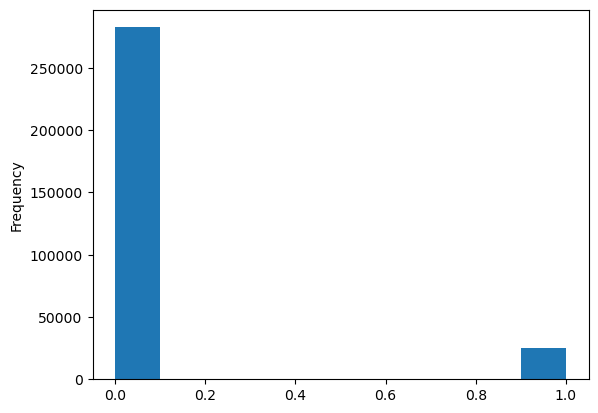

In [46]:
app_train['TARGET'].astype(int).plot.hist()
plt.show()

On remarque que les classes sont déséquilibrées, il y a beaucoup plus d'individus dans la classe 0 que de dans la classe 1. https://ichi.pro/fr/apprentissage-desequilibre-gerer-un-probleme-de-classe-desequilibre-71099907199579

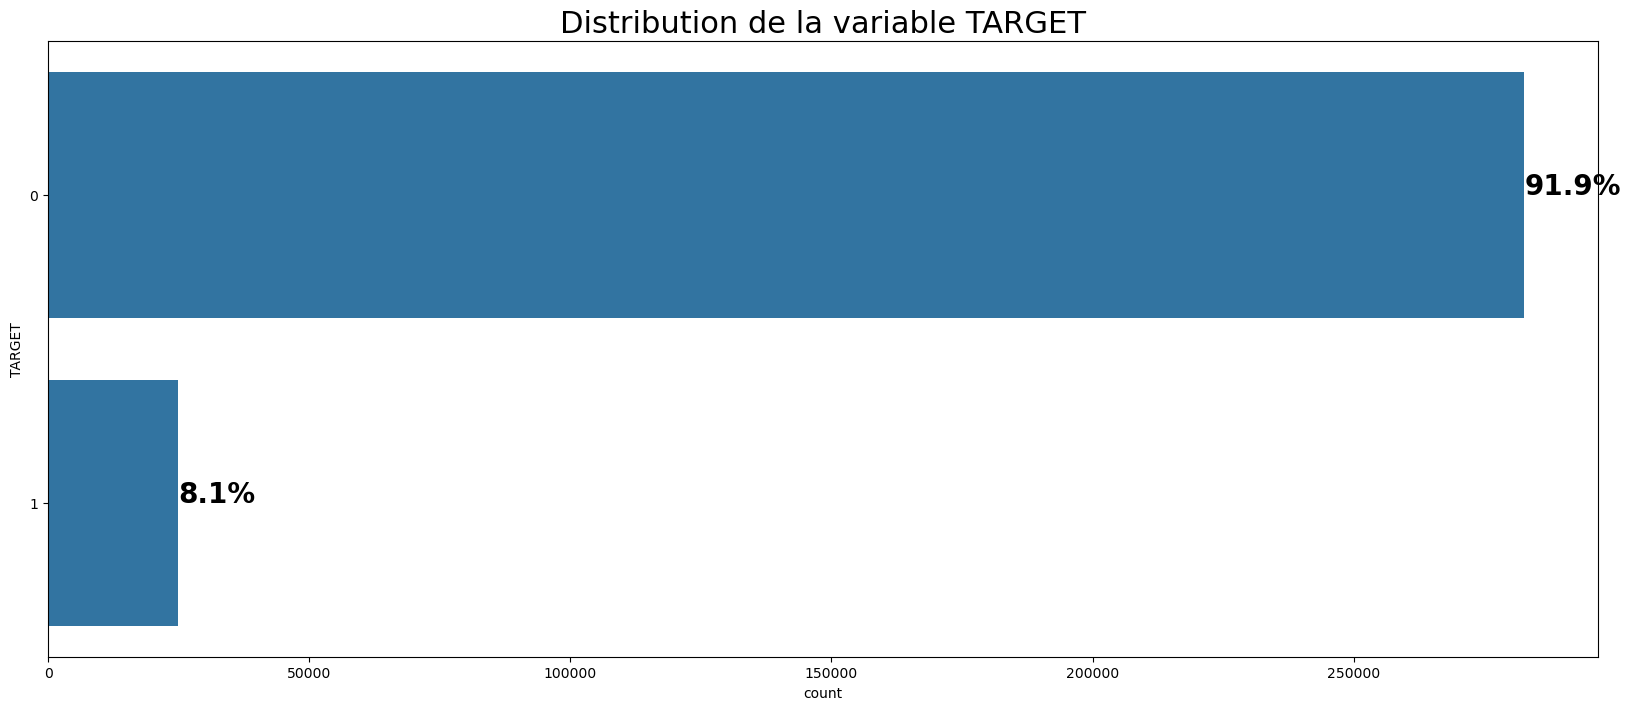

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure et l'axe
fig, ax = plt.subplots(figsize=(20,8))

# Affichage du countplot avec la variable 'TARGET'
ax = sns.countplot(y='TARGET', data=app_train)

# Titre du graphique
ax.set_title("Distribution de la variable TARGET", fontsize=22)

# Ajout des pourcentages sur chaque barre
for p in ax.patches:
    # Calcul du pourcentage
    percentage = '{:.1f}%'.format(100 * p.get_width() / len(app_train['TARGET']))
    
    # Positionnement du texte à l'endroit de la barre
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Annotation du graphique
    ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

# Affichage du graphique
plt.show()

* ### **Identification des doublons**

In [50]:
# Recherche de doublons exacts dans toutes les colonnes
duplicate_rows_train = app_train[app_train.duplicated()]
print(f"Nombre de doublons exacts dans app_train: {duplicate_rows_train.shape[0]}")

duplicate_rows_test = app_test[app_test.duplicated()]
print(f"Nombre de doublons exacts dans app_test: {duplicate_rows_test.shape[0]}")

Nombre de doublons exacts dans app_train: 0
Nombre de doublons exacts dans app_test: 0


In [51]:
# Recherche de doublons sans tenir compte de la colonne TARGET (car elle pourrait faire qu'une ligne semble différente juste à cause du label)
duplicate_rows_ex_target = app_train.drop(columns='TARGET').duplicated()
print(f"Doublons hors TARGET : {duplicate_rows_ex_target.sum()}")

Doublons hors TARGET : 0


In [52]:
# Vérification des doublons sur la colonne SK_ID_CURR pour app_train et app_test, pour s’assurer qu’il n’y a pas de clients en double dans les datasets.

for name, df in zip(['app_train', 'app_test'], [app_train, app_test]):
    n_duplicates = df.duplicated('SK_ID_CURR').sum()
    print(f"{name} : {n_duplicates} doublon(s) sur 'SK_ID_CURR'")

app_train : 0 doublon(s) sur 'SK_ID_CURR'
app_test : 0 doublon(s) sur 'SK_ID_CURR'


**Pas de doublons sur la colonne `SK_ID_CURR`, qui est l'identifiant unique par client.**

* ### **Vérification des valeurs manquantes**

**fonction `missing_values_table(df)` :**
* Calcule le nombre de valeurs manquantes par colonne.
* Calcule le pourcentage de valeurs manquantes.
* Organise les résultats dans un tableau trié.
* Affiche un résumé rapide.
* Et retourne un DataFrame bien lisible pour voir les colonnes problématiques.

In [56]:
# Fonction pour calculer les valeurs manquantes par colonne
def tableau_valeurs_manquantes(df):
    # Nombre total de valeurs manquantes
    nb_manquantes = df.isnull().sum()
    
    # Pourcentage de valeurs manquantes
    pourcentage_manquantes = 100 * nb_manquantes / len(df)
    
    # Création d'un tableau récapitulatif
    tableau = pd.concat([nb_manquantes, pourcentage_manquantes], axis=1)
    
    # Renommons les colonnes du tableau
    tableau.columns = ['Valeurs manquantes', '% du total']
    
    # Gardons uniquement les colonnes qui ont au moins une valeur manquante
    tableau = tableau[tableau['Valeurs manquantes'] > 0]
    
    # Trions les colonnes par pourcentage de valeurs manquantes décroissant
    tableau = tableau.sort_values('% du total', ascending=False).round(1)
    
    # Affichons un petit résumé
    print(f"Le dataframe sélectionné contient {df.shape[1]} colonnes.\n"
          f"{tableau.shape[0]} colonnes ont des valeurs manquantes.")
    
    # Retournons le tableau
    return tableau

In [57]:
# Application
tableau_valeurs_manquantes(app_train)

Le dataframe sélectionné contient 122 colonnes.
67 colonnes ont des valeurs manquantes.


Valeurs manquantes  % du total
COMMONAREA_MEDI                           214865        69.9
COMMONAREA_AVG                            214865        69.9
COMMONAREA_MODE                           214865        69.9
NONLIVINGAPARTMENTS_MEDI                  213514        69.4
NONLIVINGAPARTMENTS_MODE                  213514        69.4
NONLIVINGAPARTMENTS_AVG                   213514        69.4
FONDKAPREMONT_MODE                        210295        68.4
LIVINGAPARTMENTS_MODE                     210199        68.4
LIVINGAPARTMENTS_MEDI                     210199        68.4
LIVINGAPARTMENTS_AVG                      210199        68.4
FLOORSMIN_MODE                            208642        67.8
FLOORSMIN_MEDI                            208642        67.8
FLOORSMIN_AVG                             208642        67.8
YEARS_BUILD_MODE                          204488        66.5
YEARS_BUILD_MEDI                          204488        66.5
YEARS_BUILD_AVG                           204488        66.5
OWN_CAR_AGE                               202929        66.0
LANDAREA_AVG                              182590        59.4
LANDAREA_MEDI                             182590        59.4
LANDAREA_MODE                             182590        59.4
BASEMENTAREA_MEDI                         179943        58.5
BASEMENTAREA_AVG                          179943        58.5
BASEMENTAREA_MODE                         179943        58.5
EXT_SOURCE_1                              173378        56.4
NONLIVINGAREA_MEDI                        169682        55.2
NONLIVINGAREA_MODE                        169682        55.2
NONLIVINGAREA_AVG                         169682        55.2
ELEVATORS_MEDI                            163891        53.3
ELEVATORS_MODE                            163891        53.3
ELEVATORS_AVG                             163891        53.3
WALLSMATERIAL_MODE                        156341        50.8
APARTMENTS_MODE                           156061        50.7
APARTMENTS_MEDI                           156061        50.7
APARTMENTS_AVG                            156061        50.7
ENTRANCES_MODE                            154828        50.3
ENTRANCES_AVG                             154828        50.3
ENTRANCES_MEDI                            154828        50.3
LIVINGAREA_MEDI                           154350        50.2
LIVINGAREA_MODE                           154350        50.2
LIVINGAREA_AVG                            154350        50.2
HOUSETYPE_MODE                            154297        50.2
FLOORSMAX_MEDI                            153020        49.8
FLOORSMAX_AVG                             153020        49.8
FLOORSMAX_MODE                            153020        49.8
YEARS_BEGINEXPLUATATION_AVG               150007        48.8
YEARS_BEGINEXPLUATATION_MEDI              150007        48.8
YEARS_BEGINEXPLUATATION_MODE              150007        48.8
TOTALAREA_MODE                            148431        48.3
EMERGENCYSTATE_MODE                       145755        47.4
OCCUPATION_TYPE                            96391        31.3
EXT_SOURCE_3                               60965        19.8
AMT_REQ_CREDIT_BUREAU_WEEK                 41519        13.5
AMT_REQ_CREDIT_BUREAU_DAY                  41519        13.5
AMT_REQ_CREDIT_BUREAU_MON                  41519        13.5
AMT_REQ_CREDIT_BUREAU_QRT                  41519        13.5
AMT_REQ_CREDIT_BUREAU_HOUR                 41519        13.5
AMT_REQ_CREDIT_BUREAU_YEAR                 41519        13.5
NAME_TYPE_SUITE                             1292         0.4
DEF_30_CNT_SOCIAL_CIRCLE                    1021         0.3
OBS_60_CNT_SOCIAL_CIRCLE                    1021         0.3
DEF_60_CNT_SOCIAL_CIRCLE                    1021         0.3
OBS_30_CNT_SOCIAL_CIRCLE                    1021         0.3
EXT_SOURCE_2                                 660         0.2
AMT_GOODS_PRICE                              278         0.1
AMT_ANNUITY                                   12         0.0
CNT_

* ### **Nombre de valeurs uniques**
    * `app_train.select_dtypes('object')` : sélectionne uniquement les colonnes de type object
    * `.apply(pd.Series.nunique, axis = 0)` : applique .nunique() sur chaque colonne (le nombre de valeurs uniques dans chaque colonne).

**utile :**
* Pour repérer les colonnes catégorielles avec peu de modalités (parfaites pour l’encodage one-hot).
* Ou celles avec trop de modalités (qui risquent de poser problème avec certains modèles ou pour l’interprétabilité).

In [59]:
# Nombre de valeurs différentes par colonne
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

    Colonne	                     Nb de catégories	        Commentaire
    NAME_CONTRACT_TYPE	              2	               Binaire : encodage 0/1 possible
    CODE_GENDER	                      3	               Valeurs à vérifier (souvent ‘M’, ‘F’, parfois un ‘XNA’)
    FLAG_OWN_CAR	                      2	               Binaire
    FLAG_OWN_REALTY	                      2	               Binaire
    NAME_TYPE_SUITE	                      7	               Peu de modalités : one-hot encoding possible
    NAME_INCOME_TYPE	              8	               OK pour one-hot / target encoding selon le modèle
    NAME_EDUCATION_TYPE	              5	               One-hot possible
    NAME_FAMILY_STATUS	              6	               One-hot possible
    NAME_HOUSING_TYPE	              6	               OK
    OCCUPATION_TYPE	                     18	               plus complexe (possiblement regrouper ou utiliser target encoding si besoin)
    WEEKDAY_APPR_PROCESS_START	      7	               Jours de la semaine : peut être ordonné ou encodé
    ORGANIZATION_TYPE	             58	               Trop de modalités : à encoder prudemment (target, fréquence ou regroupement)
    FONDKAPREMONT_MODE	              4	               Peu de valeurs
    HOUSETYPE_MODE	                      3	               Binaire étendu
    WALLSMATERIAL_MODE	              7	               OK
    EMERGENCYSTATE_MODE	              2	               Binaire

**Idées d'encodage :**
* Encodage binaire (Label encoding) :
    * FLAG_OWN_CAR, FLAG_OWN_REALTY, EMERGENCYSTATE_MODE, NAME_CONTRACT_TYPE
***
* One-hot encoding (peu de catégories) :
    * NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, WEEKDAY_APPR_PROCESS_START, WALLSMATERIAL_MODE, HOUSETYPE_MODE, FONDKAPREMONT_MODE
***
* Catégories à traiter spécifiquement :
    * OCCUPATION_TYPE : peut être regroupée en catégories plus larges ("intellectuel", "manuel", etc.)
    * ORGANIZATION_TYPE : 58 catégories, trop pour du one-hot. On peut :
        * Grouper les types similaires manuellement
        * Utiliser un target encoding (attention au data leakage)
        * Utiliser frequency encoding

* ### **Recherche et Nettoyage des valeurs "XNA"**

In [63]:
# Affiche les colonnes contenant la valeur "XNA" dans app_train
for col in app_train.columns:
    if app_train[col].dtype == 'object':
        if 'XNA' in app_train[col].unique():
            print(f'"XNA" trouvé dans la colonne : {col} (Nombre : {sum(app_train[col] == "XNA")})')

"XNA" trouvé dans la colonne : CODE_GENDER (Nombre : 4)
"XNA" trouvé dans la colonne : ORGANIZATION_TYPE (Nombre : 55374)


In [64]:
# Suppression uniquement des lignes avec XNA dans CODE_GENDER
#app_train = app_train[app_train['CODE_GENDER'] != 'XNA']

# Remplacement dans ORGANIZATION_TYPE
#app_train['ORGANIZATION_TYPE'] = app_train['ORGANIZATION_TYPE'].replace('XNA', 'Unknown')
#app_test['ORGANIZATION_TYPE'] = app_test['ORGANIZATION_TYPE'].replace('XNA', 'Unknown')


# __________________________________________________________________________________________

Afin de faciliter et de standardiser l'analyse exploratoire des variables, nous allons définir plusieurs fonctions (fonctions que nous utiliserons surtout pout les variables catégorielles ou discrètes) :
* `plot_pie_train_test` : pour comparer la distribution d'une variable entre les jeux d'entraînement et de test à l'aide de diagrammes circulaires.
* `plot_stat` : pour visualiser la fréquence d'apparition de chaque modalité d'une variable sous forme de countplot, en indiquant également les pourcentages.
* `plot_percent_target1` : pour afficher un barplot montrant, par catégorie, le pourcentage de clients ayant un TARGET = 1 (c’est-à-dire ceux ayant fait défaut de paiement).

In [67]:
# Fonction 1 : Pie charts pour comparer train/test
def plot_pie(train, test, col, size=(14, 6)):
    """Affiche la répartition d'une variable catégorielle en camemberts pour les jeux d'entraînement et de test."""
    
# Si test est None, on affiche seulement un seul camembert (train)
    if test is None:
        fig, ax = plt.subplots(figsize=(size[0] // 2, size[1]))  # Ajuster la taille

        values = train[col].value_counts()
        labels = values.index

        ax.pie(values, labels=labels, autopct='%.1f%%', startangle=90,
               shadow=True, textprops={'fontsize': 14}, explode=[0.05]*len(labels))
        ax.set_title(f'{col} - Répartition', fontsize=18)

    else:
        fig, axes = plt.subplots(1, 2, figsize=size)
        
        for ax, data, title in zip(axes, [train, test], ['Train', 'Test']):
            values = data[col].value_counts()
            labels = values.index
            
            ax.pie(values, labels=labels, autopct='%.1f%%', startangle=90,
                   shadow=True, textprops={'fontsize': 14}, explode=[0.05]*len(labels))
            ax.set_title(f'{col} - {title}', fontsize=18)
    
    plt.tight_layout()
    plt.show()


# Fonction 2 : Compter les catégories avec % 
def plot_stat(data, feature, title, size=(14, 8), palette="husl"):
    """Affiche le nombre d'occurrences d'une variable catégorielle avec les pourcentages (axe X, couleurs différentes)."""
    
    fig, ax = plt.subplots(figsize=size)
    
    # On trie les catégories par fréquence
    order = data[feature].value_counts().index
    
    # Plot
    sns.countplot(x=feature, hue=feature, data=data, order=order, ax=ax, palette=palette, legend=False)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Nombre de clients')
    ax.set_xlabel(feature)
    
    total = len(data[feature])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100 * height / total:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + total*0.005), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
    ax.set_axisbelow(True)
    
    

# Fonction 3 : Pourcentage de TARGET=1 par catégorie
def plot_percent_target1(data, feature, title, size=(14, 8)):
    """Affiche le pourcentage moyen de TARGET=1 pour chaque modalité d'une variable catégorielle, en ordre décroissant."""
    
    cat_perc = data.groupby(feature)['TARGET'].mean().reset_index()
    cat_perc.sort_values('TARGET', ascending=False, inplace=True)

    fig, ax = plt.subplots(figsize=size)
    
    sns.barplot(
        x=feature, y='TARGET', data=cat_perc, hue=feature, palette='viridis', ax=ax, legend=False, errorbar=None, order=cat_perc[feature])

    ax.set_title(title, fontsize=20)
    ax.set_ylabel('Taux de TARGET=1', fontsize=14)
    ax.set_xlabel(feature, fontsize=14)
    plt.grid(axis='y')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100 * height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', 
                    fontsize=12, fontweight='bold')
   


# __________________________________________________________________________________________

# 4. Analyse des principales variables Numériques : Outliers, valeurs atypiques, anormales <a id="Analyse-des-principales-variables-Numériques"></a>

## 4.1. Inspection des âges des clients

* ### **Nombre de jours depuis la naissance "DAYS_BIRTH"**
    * C'est le Nombre de jours depuis la naissance (négatif dans les données Home Credit : il faudra prendre l'opposé pour avoir l'âge).

In [72]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

* Les chiffres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours.
* Il faut modifier ces dates pour plus de compréhension, en transformant "DAYS_BIRTH" (en jours négatifs) en âge réel.

In [74]:
# Transforme les jours en âge (en années), car DAYS_BIRTH est en négatif.
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

* En moyenne, les clients ont 43 ans, le plus jeune a 20 ans et le plus âgé 69 ans. 50% des clients ont moins de 43 ans. Nous pouvons donc dire que l'étude est principalement axée sur les personnes d'une quarantaine d'années.

In [76]:
# On crée une nouvelle colonne AGE_YEARS contenant l’âge en années (valeurs positives).
app_train['AGE_YEARS'] = -app_train['DAYS_BIRTH'] / 365

In [77]:
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

* ### *Visualisation de la distribution*

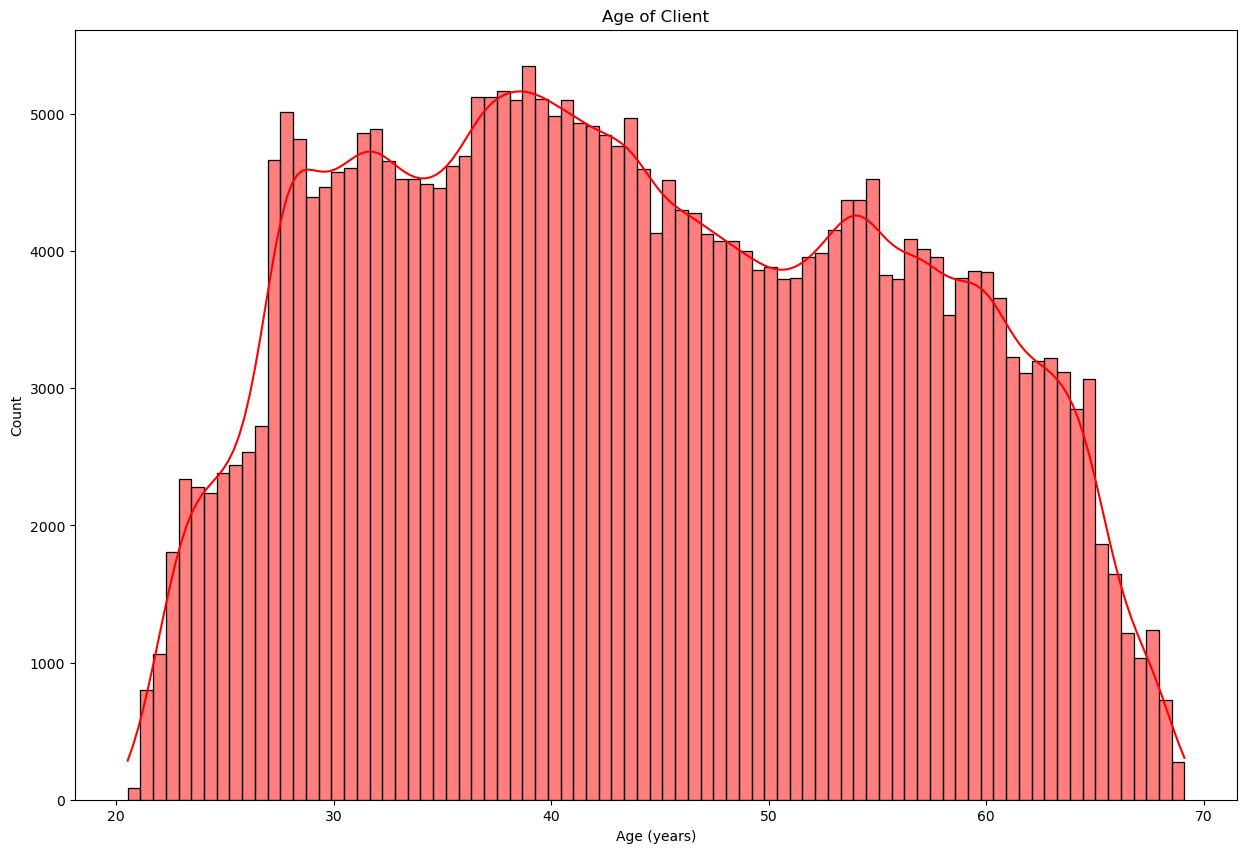

In [79]:
# Distribution des âges (en année)
plt.figure(figsize=(15,10))
sns.histplot(app_train['DAYS_BIRTH'] / -365, stat='count', color='red', kde="True")
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

* Il n'y a pas de valeurs aberrantes puisque tous les âges sont raisonnables. L'âge des clients observés varie entre 20 et 69 ans.

***

## 4.2. Inspection de l'ancienneté dans l'emploi avec détection des anomalies

* ### **Ancienneté professionnelle "DAYS_EMPLOYED"**
    * Pour explorer les jours travaillés depuis l'emploi.
    * Attention : Il y a une valeur anormale connue : 365243, qui indique pas d'emploi connu (valeur manquante déguisée).

* ### *Détection des outliers dans "DAYS_EMPLOYED"*

In [85]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [86]:
app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

* ### *Visualisation de la distribution de la variable "DAYS_EMPLOYED" dans "app_train" et "app_test",*
    * pour comparer visuellement la distribution des jours travaillés "DAYS_EMPLOYED" pour les individus dans les jeux de données d'entraînement (train) et de test (test). Cela pour reprérer des valeurs aberrantes (ex. : -365243 jours, souvent un code pour "non applicable").

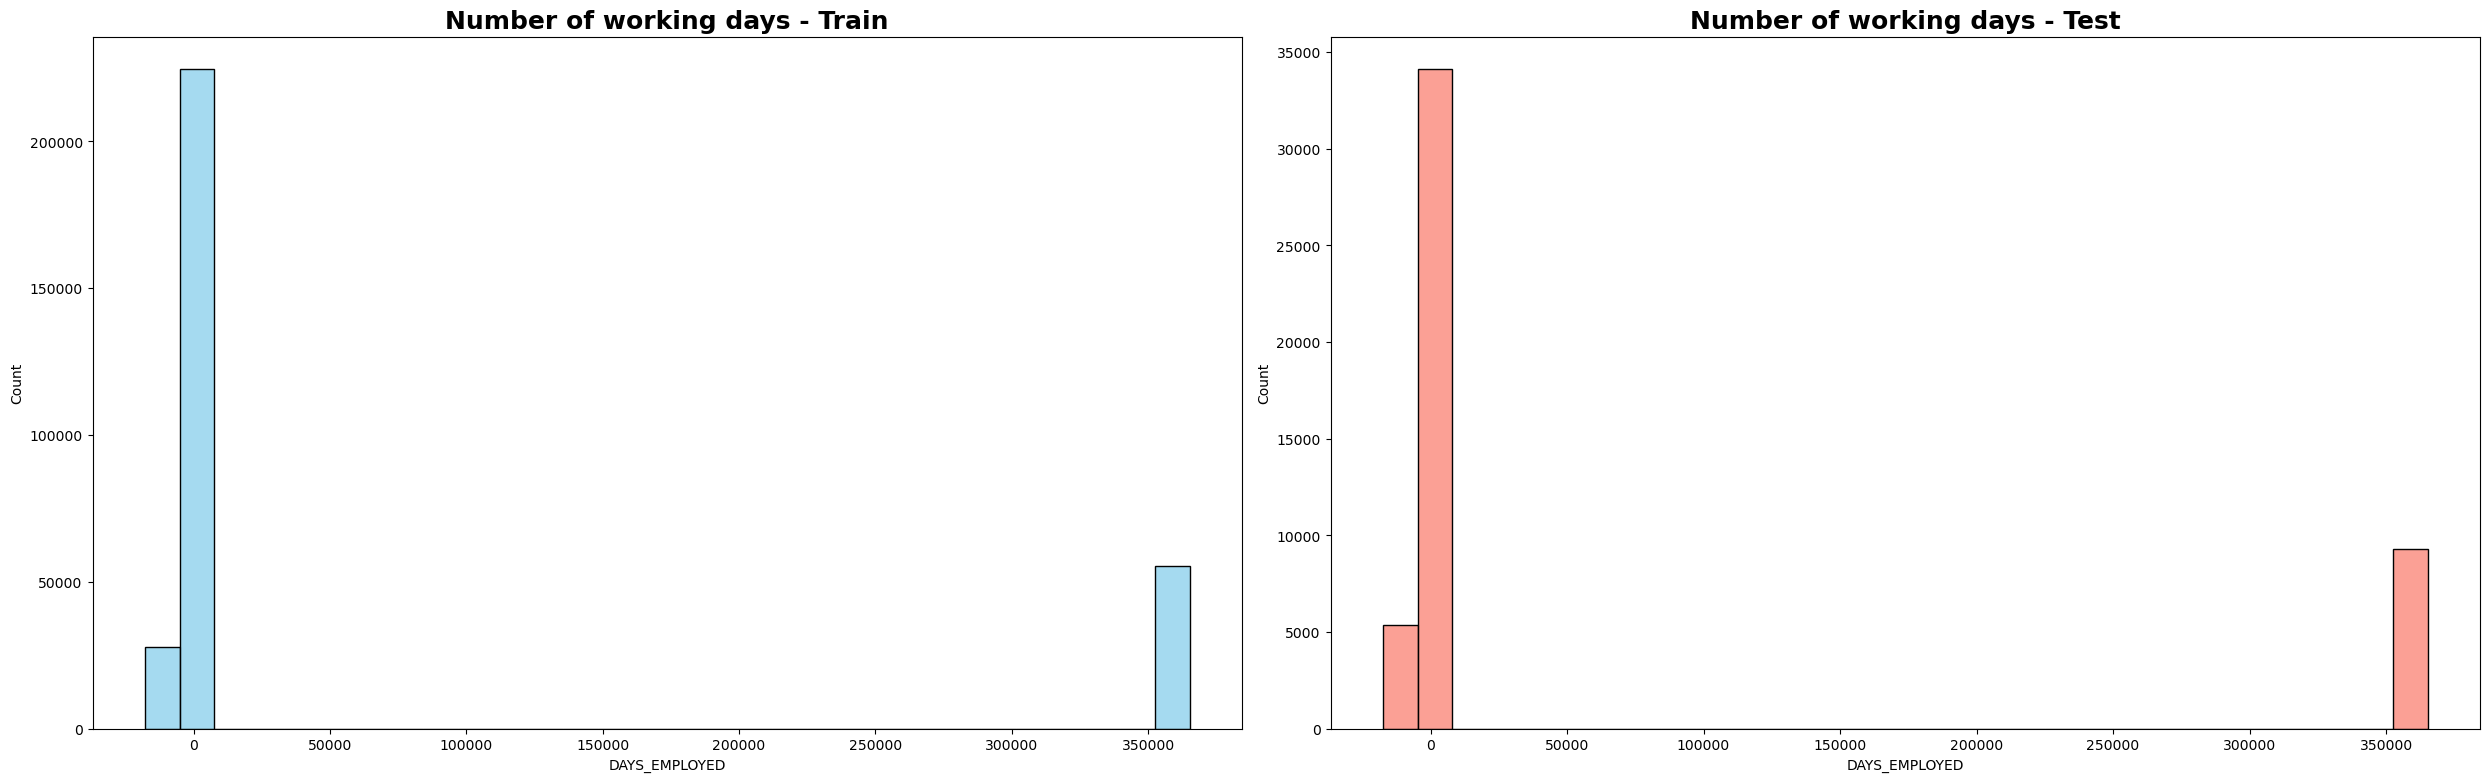

In [88]:
plt.figure(figsize=(25, 15))

# Histogramme pour le train
plt.subplot(2, 2, 1)
plt.title('Number of working days - Train', weight='bold', fontsize=18)
sns.histplot(app_train['DAYS_EMPLOYED'], bins=30, kde=False, color='skyblue')

# Histogramme pour le test
plt.subplot(2, 2, 2)
plt.title('Number of working days - Test', weight='bold', fontsize=18)
sns.histplot(app_test['DAYS_EMPLOYED'], bins=30, kde=False, color='salmon')

plt.tight_layout()
plt.show()

Ici avec cette analyse, on peut voir qu'il y a des données anormales car le maximun représente environ 1000 ans de travail (ce qui est impossible).

* ### *Création d’un indicateur et remplacement de l’anomalie*
    * Identification des valeurs anormales de DAYS_EMPLOYED qui valent 365243 (valeur indicative d'un problème de données, souvent utilisée pour représenter les valeurs manquantes dans certaines bases de données) : ici, utilisée pour signaler que la personne n’a pas d’emploi (souvent les retraités ou chômeurs de longue durée).

    * Remplacement des anomalies par NaN pour les traiter comme des valeurs manquantes, ce qui est essentiel avant d’effectuer toute analyse statistique ou modélisation.
Cela évite d'influencer les résultats avec ces valeurs aberrantes.

In [91]:
# Copies pour visualisation avant remplacement
app_train_before = app_train.copy()
app_test_before = app_test.copy()

In [92]:
# Vérification du nombre d'anomalies avant remplacement
print("Nombre de valeurs = 365243 dans TRAIN :", (app_train_before['DAYS_EMPLOYED'] == 365243).sum())
print("Nombre de valeurs = 365243 dans TEST :", (app_test_before['DAYS_EMPLOYED'] == 365243).sum())

Nombre de valeurs = 365243 dans TRAIN : 55374
Nombre de valeurs = 365243 dans TEST : 9274


In [93]:
# Remplacement des anomalies après copie

# Création d'un indicateur d'anomalie
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
# Remplacement des valeurs anormales par NaN
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace({365243: np.nan})
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].replace({365243: np.nan})

**On a remplacé 365243 par np.nan :** Parce que 365243 jours (~1000 ans) est une valeur anormale, utilisée pour signaler que la personne n’a pas d’emploi (souvent les retraités ou chômeurs de longue durée).

* ### *Affichage de la distribution avant et après remplacement*
    * Une fois les anomalies remplacées, affichage de la distribution des données dans les ensembles train et test. Cela permet de visualiser l'impact du remplacement des anomalies et de voir si la distribution semble plus cohérente.

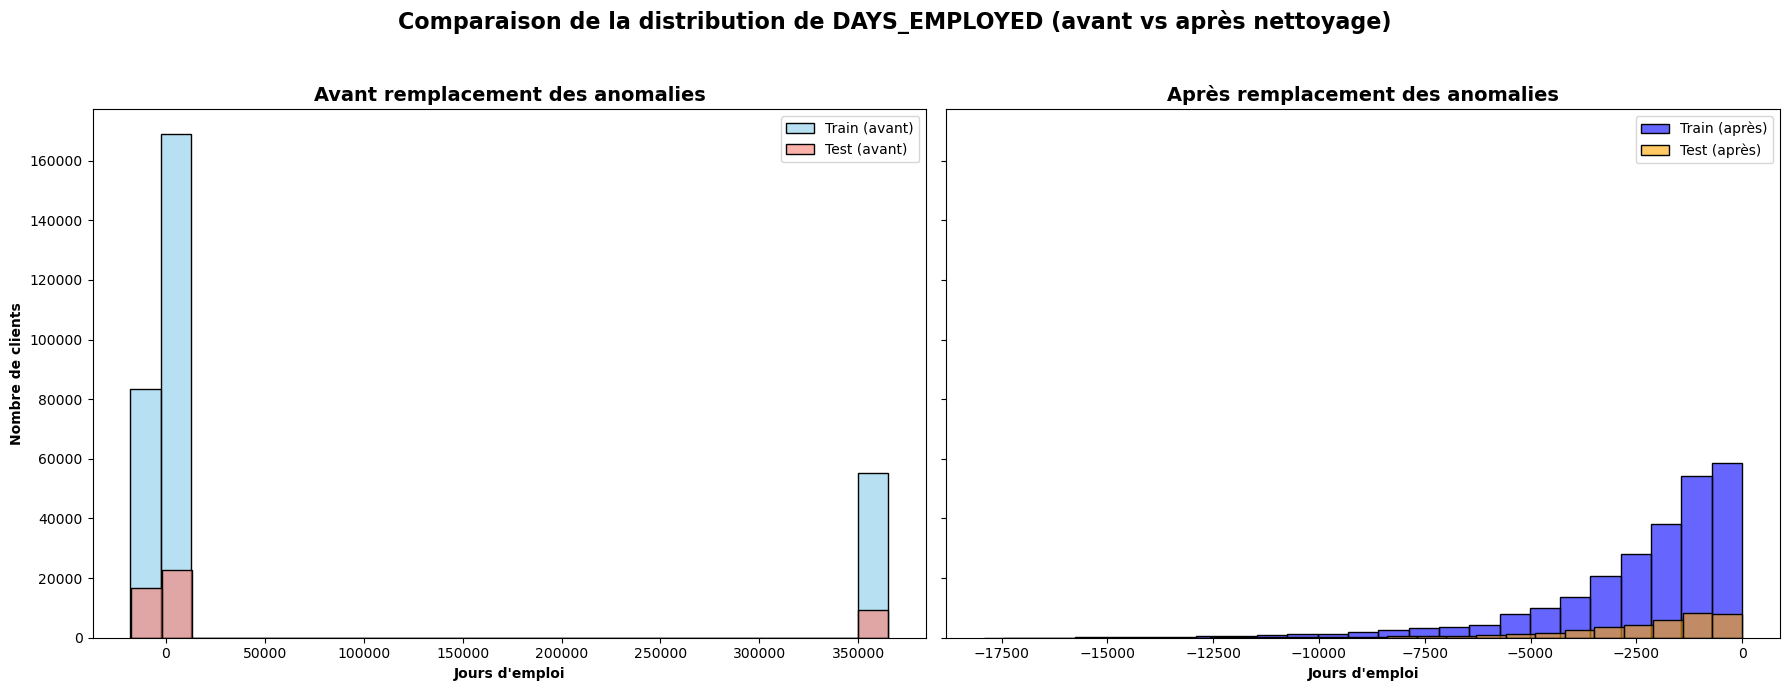

In [96]:
# Affichage des distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# À gauche : avant
sns.histplot(app_train_before['DAYS_EMPLOYED'], bins=25, kde=False, color='skyblue', label='Train (avant)', ax=axes[0], alpha=0.6)
sns.histplot(app_test_before['DAYS_EMPLOYED'], bins=25, kde=False, color='salmon', label='Test (avant)', ax=axes[0], alpha=0.6)
axes[0].set_title("Avant remplacement des anomalies", fontsize=14, weight='bold')
axes[0].set_xlabel("Jours d'emploi", weight='bold')
axes[0].set_ylabel("Nombre de clients", weight='bold')
axes[0].legend()

# À droite : après
sns.histplot(app_train['DAYS_EMPLOYED'], bins=25, kde=False, color='blue', label='Train (après)', ax=axes[1], alpha=0.6)
sns.histplot(app_test['DAYS_EMPLOYED'], bins=25, kde=False, color='orange', label='Test (après)', ax=axes[1], alpha=0.6)
axes[1].set_title("Après remplacement des anomalies", fontsize=14, weight='bold')
axes[1].set_xlabel("Jours d'emploi", weight='bold')
axes[1].legend()

plt.suptitle("Comparaison de la distribution de DAYS_EMPLOYED (avant vs après nettoyage)", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

* ### *Analyse exploratoire de l'anomalie*
    * Pour rappel, les valeurs 365243 dans la colonne DAYS_EMPLOYED ne sont pas réalistes et sont probablement un **code placeholder** utilisé pour représenter un champ inconnu ou manquant.

    * L'analyse exploratoire de l'anomalie pPermet de voir si cette anomalie est corrélée à un comportement particulier (ici, défaut de paiement), c-à-d si les clients avec une valeur anormale de DAYS_EMPLOYED (365243) ont un comportement différent face au remboursement des prêts,

    * En d'autres termes : est-ce que l'anomalie est informative ou non ?

Par exemple, si **la colonne "TARGET" (Taux de défaut de paiement), qui indique si un client a fait défaut de paiement ou non (0 = pas de défaut, 1 = défaut)**, présente une valeur plus élevée parmi les  clients ayant une anomalie dans la durée d'emploi (DAYS_EMPLOYED), alors cette anomalie peut signaler un profil de risque élevé.

In [98]:
# Affichage des taux de défaut de paiement pour les clients normaux et ceux avec des anomalies
anom = app_train[app_train['DAYS_EMPLOYED_ANOM']]
non_anom = app_train[~app_train['DAYS_EMPLOYED_ANOM']]

# Taux de défaut de paiement des clients sans anomalie dans l'emploi
print("Taux de défaut de paiement des clients sans anomalie dans l'emploi : %.2f%%" % (non_anom['TARGET'].mean() * 100))

# Taux de défaut de paiement des clients avec anomalie dans l'emploi
print("Taux de défaut de paiement des clients avec anomalie dans l'emploi (valeur = 365243) : %.2f%%" % (anom['TARGET'].mean() * 100))

# Nombre total d'anomalies détectées dans la variable 'DAYS_EMPLOYED'
print("Nombre d'anomalies détectées dans le champ 'DAYS_EMPLOYED' : %d" % len(anom))

Taux de défaut de paiement des clients sans anomalie dans l'emploi : 8.66%
Taux de défaut de paiement des clients avec anomalie dans l'emploi (valeur = 365243) : 5.40%
Nombre d'anomalies détectées dans le champ 'DAYS_EMPLOYED' : 55374


* ### *Barplot comparatif pour bien montrer les différences de taux de défaut entre les deux groupes (anomalies vs non-anomalies)*

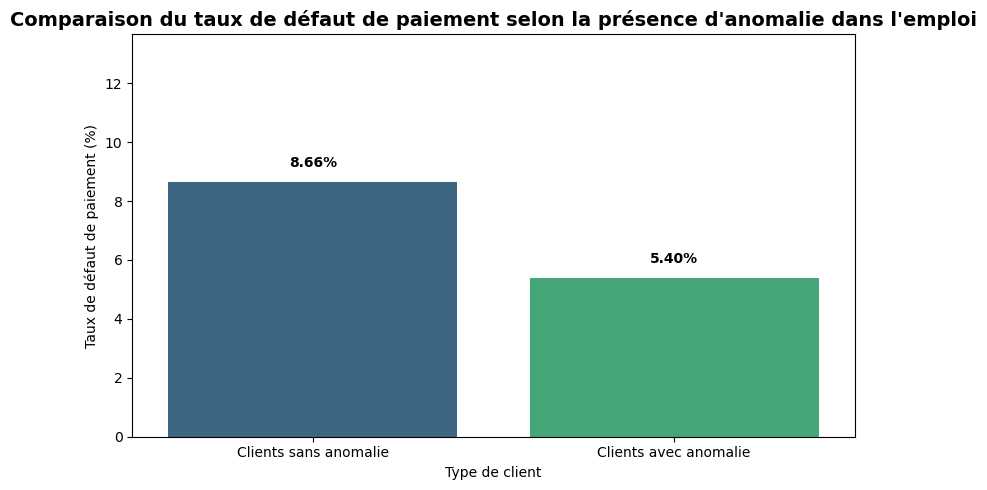

In [100]:
# Création d'un DataFrame pour visualisation
comparaison_defaut = pd.DataFrame({
    'Groupe': ['Clients sans anomalie', 'Clients avec anomalie'],
    'Taux de défaut de paiement (%)': [non_anom['TARGET'].mean() * 100, anom['TARGET'].mean() * 100]
})


# Tracé d'un barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=comparaison_defaut, x='Groupe', y='Taux de défaut de paiement (%)', hue='Groupe', palette='viridis')

# Ajout du titre et des annotations
plt.title('Comparaison du taux de défaut de paiement selon la présence d\'anomalie dans l\'emploi', fontsize=14, fontweight='bold')
plt.ylabel('Taux de défaut de paiement (%)')
plt.xlabel('Type de client')

# Ajout des valeurs sur les barres
for i, val in enumerate(comparaison_defaut['Taux de défaut de paiement (%)']):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', fontweight='bold')

plt.ylim(0, max(comparaison_defaut['Taux de défaut de paiement (%)']) + 5)
plt.tight_layout()
plt.show()

***

## 4.3. Inspection du Revenu total des clients

* ### **Revenu total "AMT_INCOME_TOTAL"**  

In [104]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

* La moyenne est plus élevée que la médiane, ce qui suggère une distribution asymétrique à droite (positive skewness), typique pour les revenus.
* Le max à 117 millions est complètement extrême pour un revenu individuel normal : outlier massif.

In [106]:
# combien de personnes ont un revenu supérieur à 100 million ?
(app_train['AMT_INCOME_TOTAL'] > 100_000_000).sum()

1

* ### *Visualisation de la distribution*

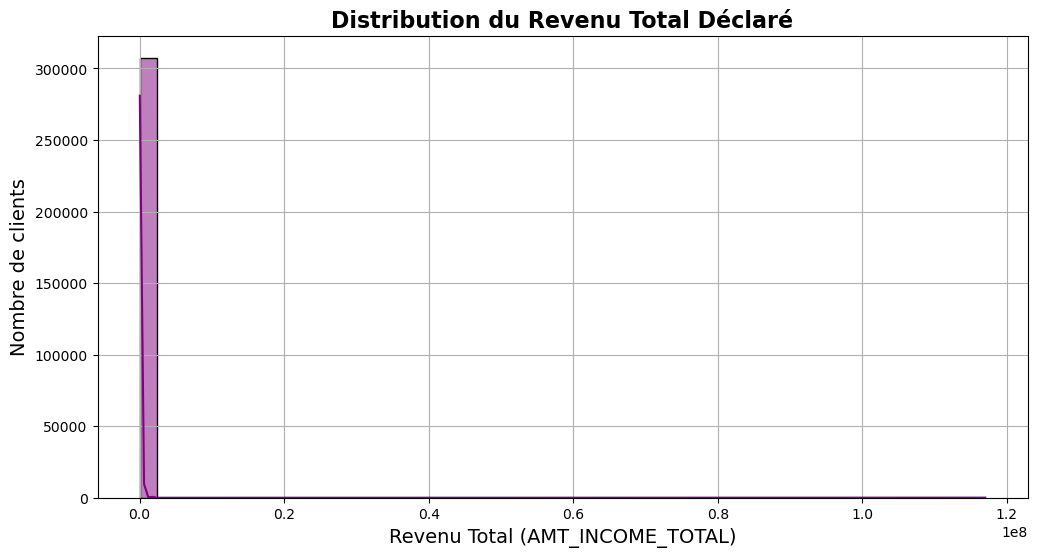

In [108]:
plt.figure(figsize=(12, 6))
sns.histplot(app_train['AMT_INCOME_TOTAL'], bins=50, kde=True, color='purple')
plt.title('Distribution du Revenu Total Déclaré', fontsize=16, fontweight='bold')
plt.xlabel('Revenu Total (AMT_INCOME_TOTAL)', fontsize=14)
plt.ylabel('Nombre de clients', fontsize=14)
plt.grid(True)
plt.show()

* La distribution de AMT_INCOME_TOTAL est ultra déséquilibrée, très concentrée vers 0.

* ### *Boxplot pour détecter les outliers*

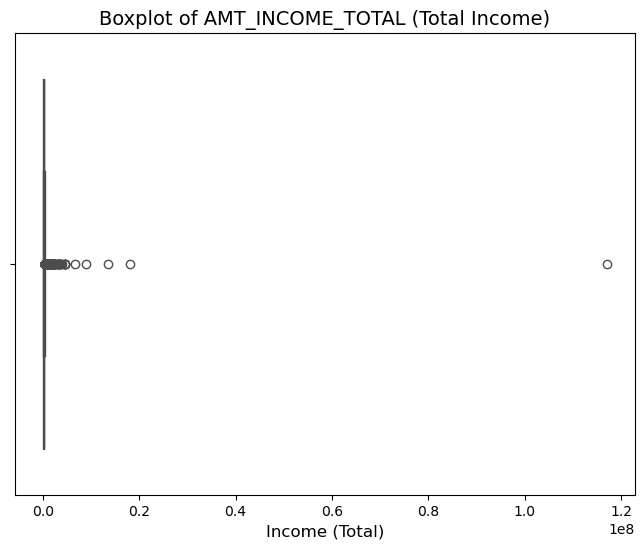

In [111]:
# Boxplot pour détecter les outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=app_train['AMT_INCOME_TOTAL'], color='orange')
plt.title('Boxplot of AMT_INCOME_TOTAL (Total Income)', fontsize=14)
plt.xlabel('Income (Total)', fontsize=12)
plt.show()

Il y a des outliers énormes : des clients déclarent des revenus totalement anormaux (supérieurs à 100 millions).

Le boxplot confirme que quelques valeurs isolées sont complètement hors normes.

* ### *Transformation logarithmique pour "écraser" l'effet des gros revenus OU suppression* ???

In [114]:
# Transformation logarithmique
#app_train['AMT_INCOME_TOTAL_LOG'] = np.log1p(app_train['AMT_INCOME_TOTAL'])

#plt.figure(figsize=(8, 6))
#sns.histplot(app_train['AMT_INCOME_TOTAL_LOG'], bins=50, kde=True, color='purple')
#plt.title('Distribution du Revenu Total après Transformation Logarithmique', fontsize=14)
#plt.xlabel('Log(1 + Revenu Total)', fontsize=12)
#plt.ylabel('Nombre de clients', fontsize=12)
#plt.show()

***

## 4.4. Inspection du Montant du crédit demandé

* ### **Montant crédit demandé "AMT_CREDIT"**  

In [118]:
print(app_train['AMT_CREDIT'].describe())

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


* ### *Visualisation de la distribution*

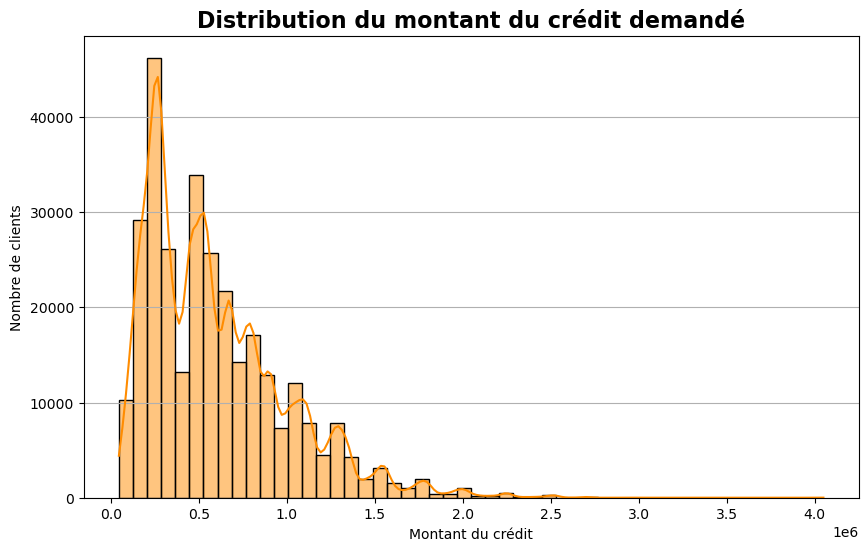

In [120]:
# Histogramme de la distribution
plt.figure(figsize=(10,6))
sns.histplot(app_train['AMT_CREDIT'], bins=50, kde=True, color='darkorange')
plt.title('Distribution du montant du crédit demandé', fontsize=16, fontweight='bold')
plt.xlabel('Montant du crédit')
plt.ylabel('Nombre de clients')
plt.grid(axis='y')
plt.show()

***

## 4.5. Inspection du Montant de l'annuité

* ### **Montant de l'annuité "AMT_ANNUITY"**  

In [124]:
print(app_train['AMT_ANNUITY'].describe())

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


* ### *Visualisation de la distribution*

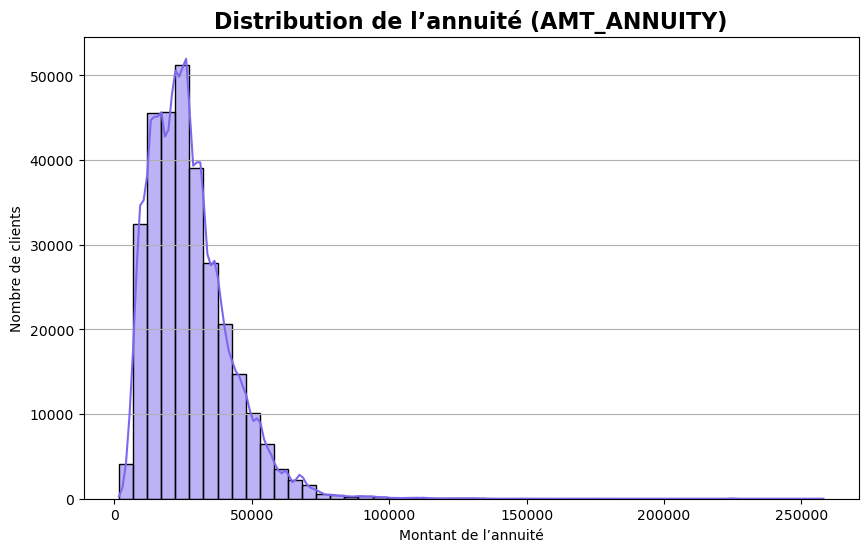

In [126]:
# Histogramme de la distribution
plt.figure(figsize=(10,6))
sns.histplot(app_train['AMT_ANNUITY'].dropna(), bins=50, kde=True, color='mediumslateblue')
plt.title('Distribution de l’annuité (AMT_ANNUITY)', fontsize=16, fontweight='bold')
plt.xlabel('Montant de l’annuité')
plt.ylabel('Nombre de clients')
plt.grid(axis='y')
plt.show()

***

## 4.6. Inspection du Score externe prédictif du risque (source 1)

* ### **Score externe prédictif du risque (source 1) "EXT_SOURCE_1"**  

In [130]:
print(app_train['EXT_SOURCE_1'].describe())

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64


* ### *Visualisation de la distribution*

Pourcentage de valeurs manquantes EXT_SOURCE_1 : 56.38%


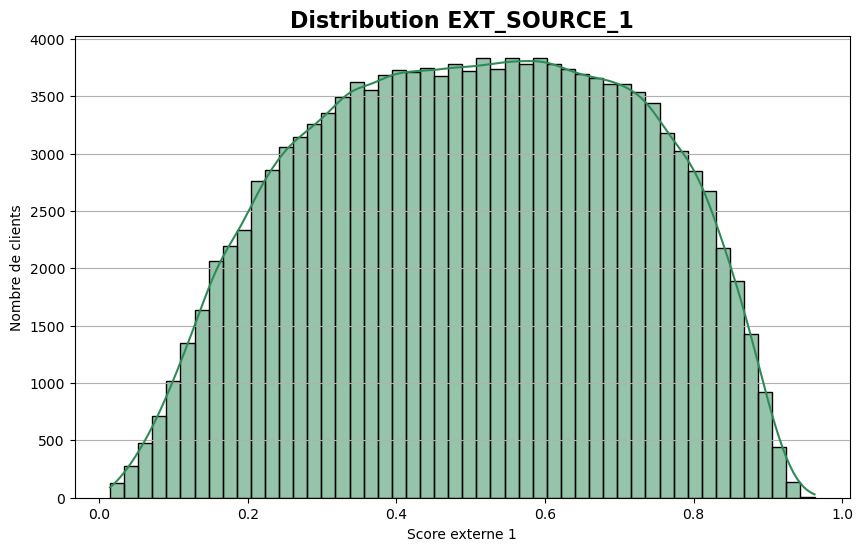

In [132]:
# Pourcentage de valeurs manquantes
missing_percent = app_train['EXT_SOURCE_1'].isna().mean() * 100
print(f"Pourcentage de valeurs manquantes EXT_SOURCE_1 : {missing_percent:.2f}%")

# Histogramme
plt.figure(figsize=(10,6))
sns.histplot(app_train['EXT_SOURCE_1'].dropna(), bins=50, kde=True, color='seagreen')
plt.title('Distribution EXT_SOURCE_1', fontsize=16, fontweight='bold')
plt.xlabel('Score externe 1')
plt.ylabel('Nombre de clients')
plt.grid(axis='y')
plt.show()

***

## 4.7. Inspection du Score externe prédictif du risque (source 2)

* ### **Score externe prédictif du risque (source 2) "EXT_SOURCE_2"**  

In [136]:
print(app_train['EXT_SOURCE_2'].describe())

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


* ### *Visualisation de la distribution*

Pourcentage de valeurs manquantes EXT_SOURCE_2 : 0.21%


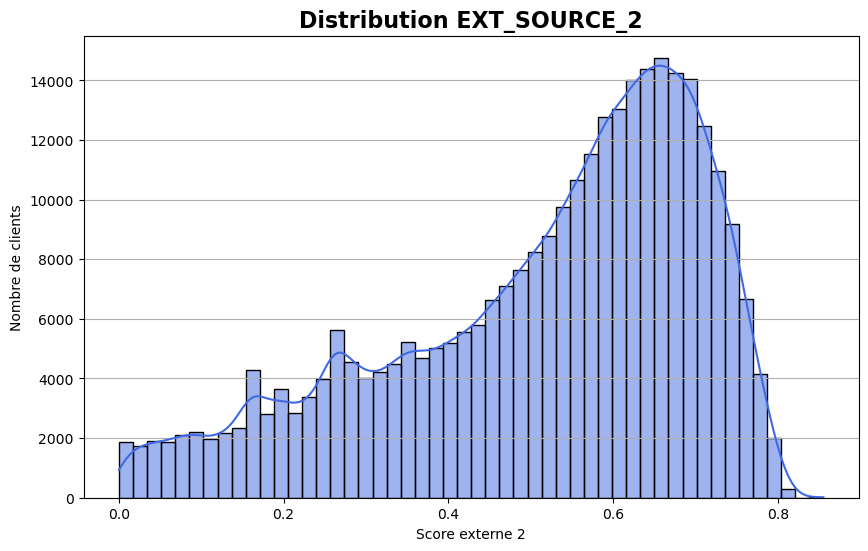

In [138]:
# Pourcentage de valeurs manquantes
missing_percent = app_train['EXT_SOURCE_2'].isna().mean() * 100
print(f"Pourcentage de valeurs manquantes EXT_SOURCE_2 : {missing_percent:.2f}%")

# Histogramme
plt.figure(figsize=(10,6))
sns.histplot(app_train['EXT_SOURCE_2'].dropna(), bins=50, kde=True, color='royalblue')
plt.title('Distribution EXT_SOURCE_2', fontsize=16, fontweight='bold')
plt.xlabel('Score externe 2')
plt.ylabel('Nombre de clients')
plt.grid(axis='y')
plt.show()

***

## 4.8. Inspection du Score externe prédictif du risque (source 3)

* ### **Score externe prédictif du risque (source 3) "EXT_SOURCE_3"**  

In [142]:
print(app_train['EXT_SOURCE_3'].describe())

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


* ### *Visualisation de la distribution*

Pourcentage de valeurs manquantes EXT_SOURCE_3 : 19.83%


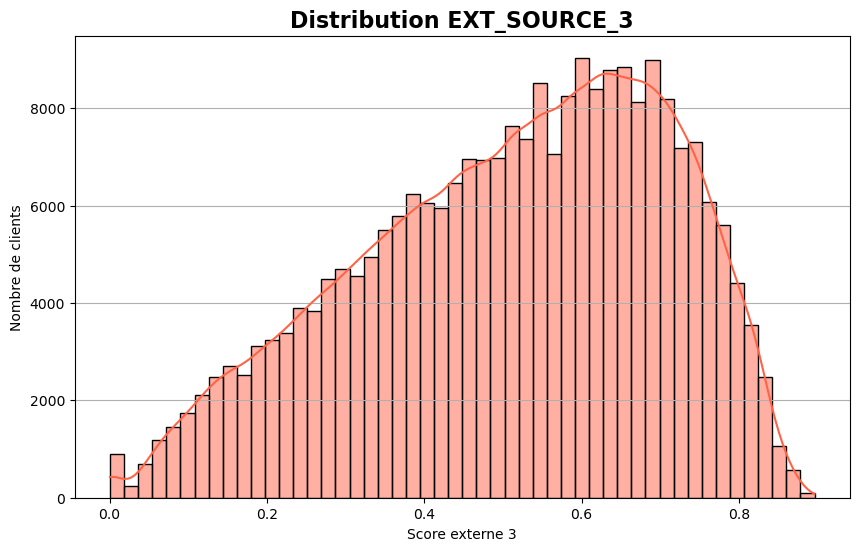

In [144]:
# Pourcentage de valeurs manquantes
missing_percent = app_train['EXT_SOURCE_3'].isna().mean() * 100
print(f"Pourcentage de valeurs manquantes EXT_SOURCE_3 : {missing_percent:.2f}%")

# Histogramme
plt.figure(figsize=(10,6))
sns.histplot(app_train['EXT_SOURCE_3'].dropna(), bins=50, kde=True, color='tomato')
plt.title('Distribution EXT_SOURCE_3', fontsize=16, fontweight='bold')
plt.xlabel('Score externe 3')
plt.ylabel('Nombre de clients')
plt.grid(axis='y')
plt.show()

***

## 4.9. Inspection de la Taille de la famille

* ### **Taille de la famille "CNT_FAM_MEMBERS"**  

In [148]:
print(app_train['CNT_FAM_MEMBERS'].describe())

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


* ### *Visualisation de la distribution*

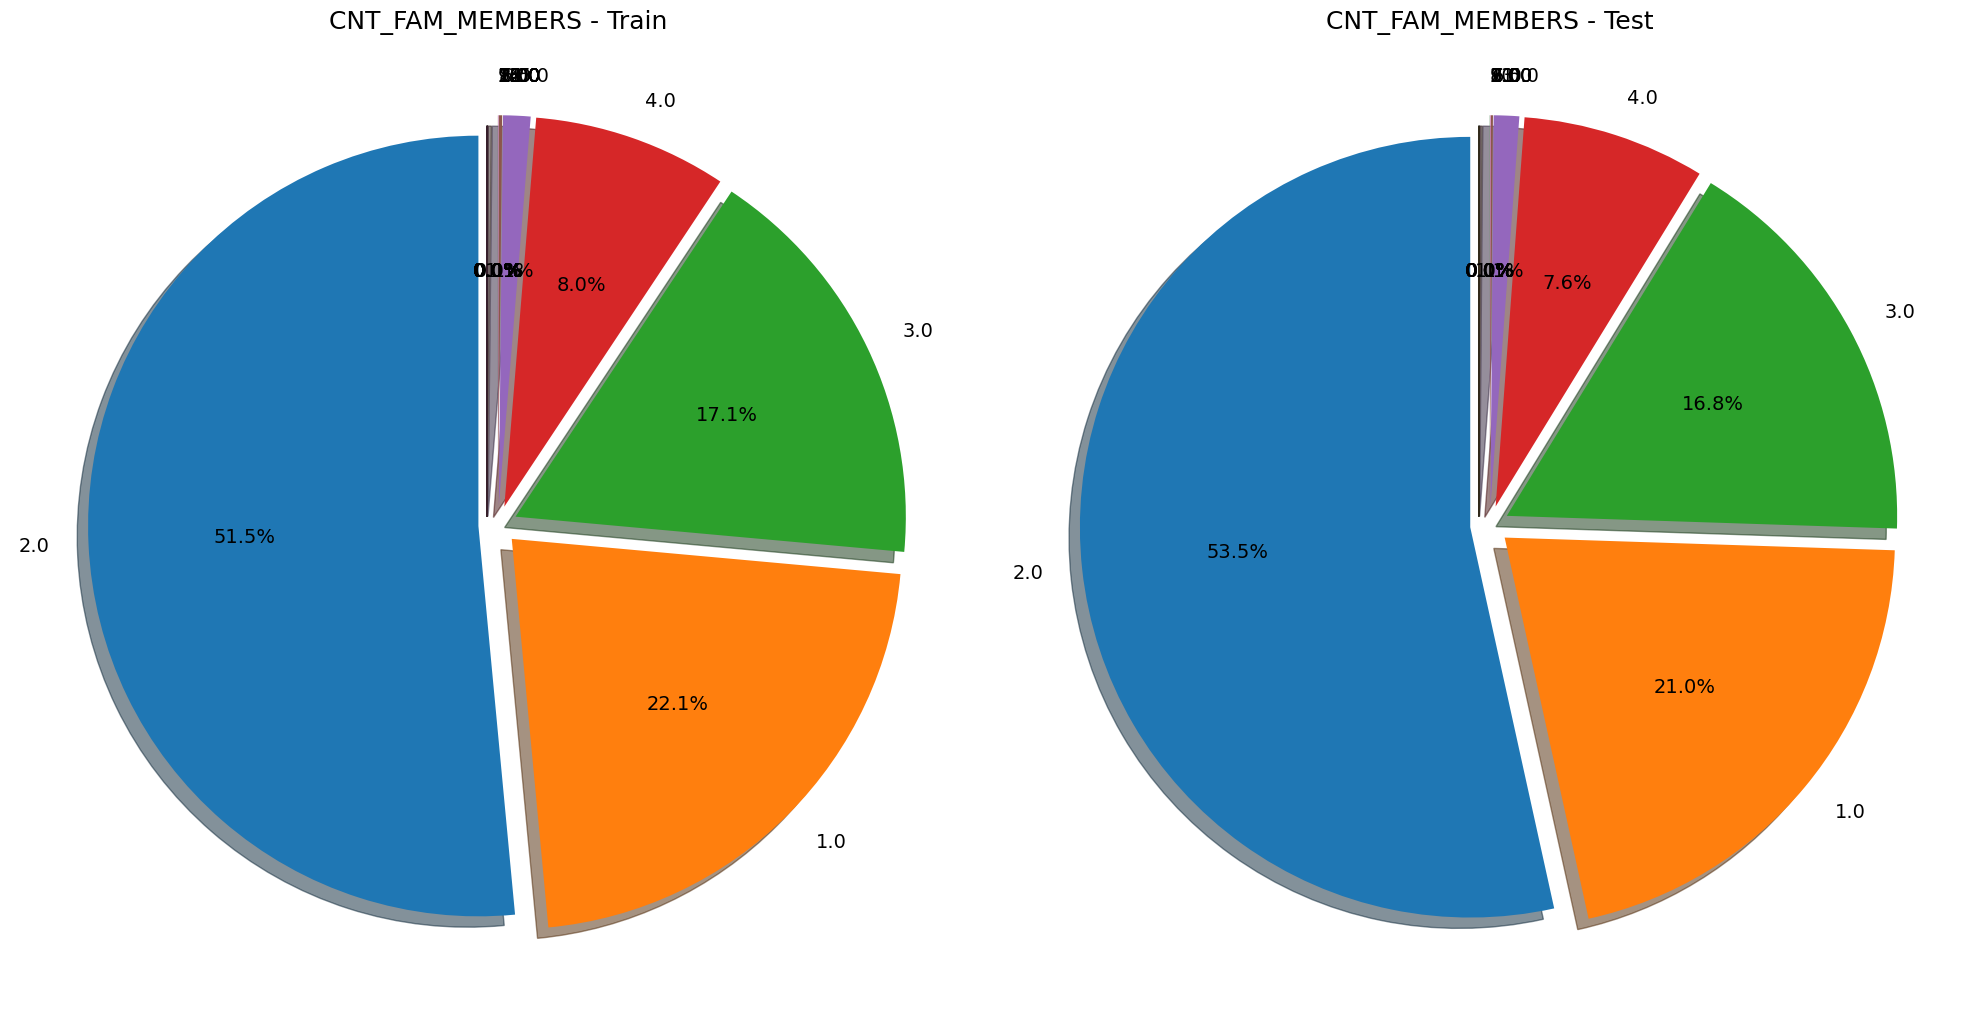

In [150]:
plot_pie(app_train, app_test, 'CNT_FAM_MEMBERS', (20,20))

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64


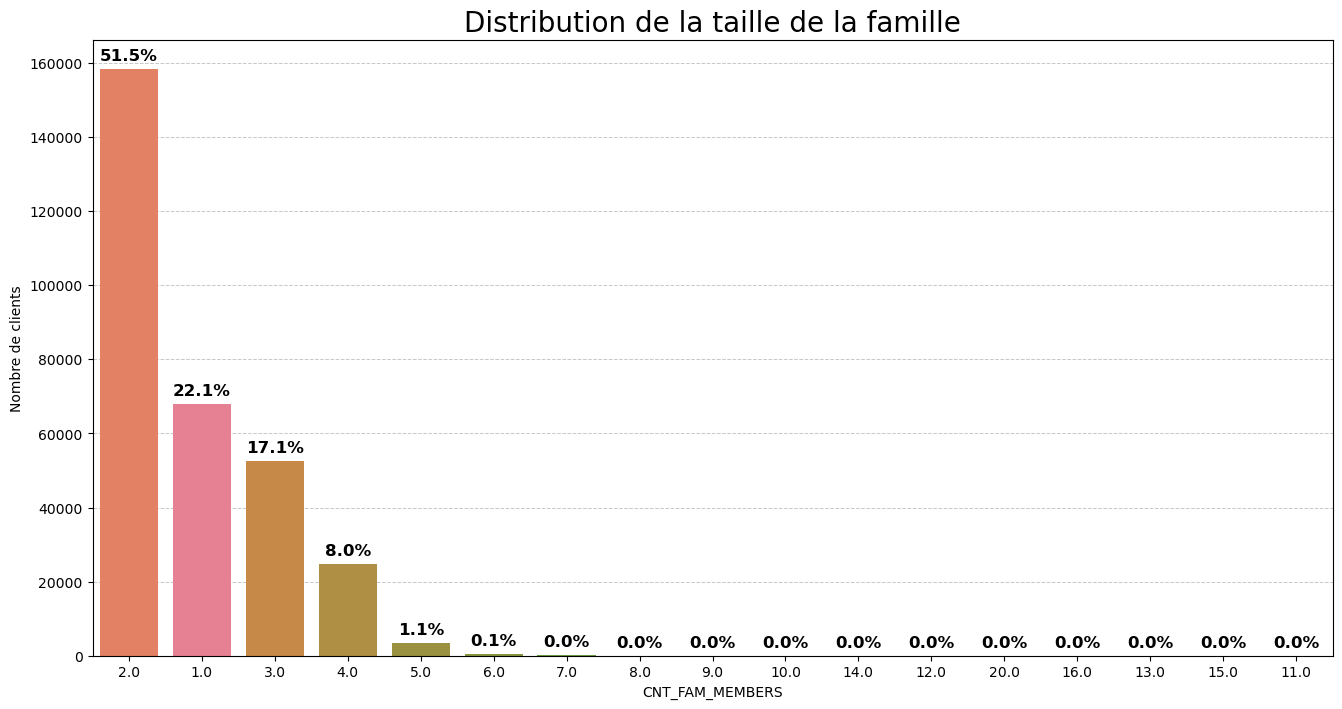

In [151]:
# Distribution des valeurs uniques
print(app_train['CNT_FAM_MEMBERS'].value_counts())
plot_stat(app_train, 'CNT_FAM_MEMBERS', 'Distribution de la taille de la famille', (16,8))
plt.show()

* ### *Pourcentage de TARGET=1 en fonction de la taille de la famille*

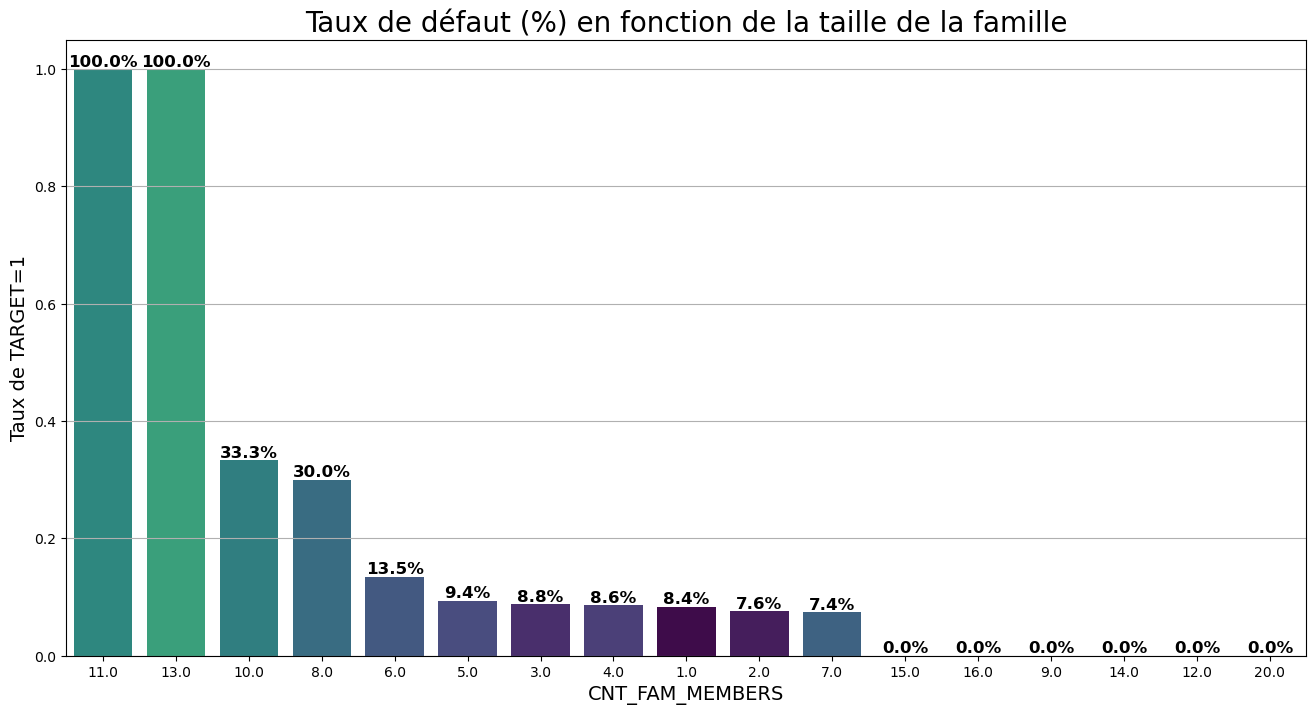

In [153]:
plot_percent_target1(app_train, 'CNT_FAM_MEMBERS',"Taux de défaut (%) en fonction de la taille de la famille", (16,8))
plt.show()

***

## 4.10. Inspection du nombre d’enfants

* ### **Nombre d’enfants "CNT_CHILDREN"**  

In [157]:
print(app_train['CNT_CHILDREN'].describe())

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


* ### *Visualisation de la distribution*

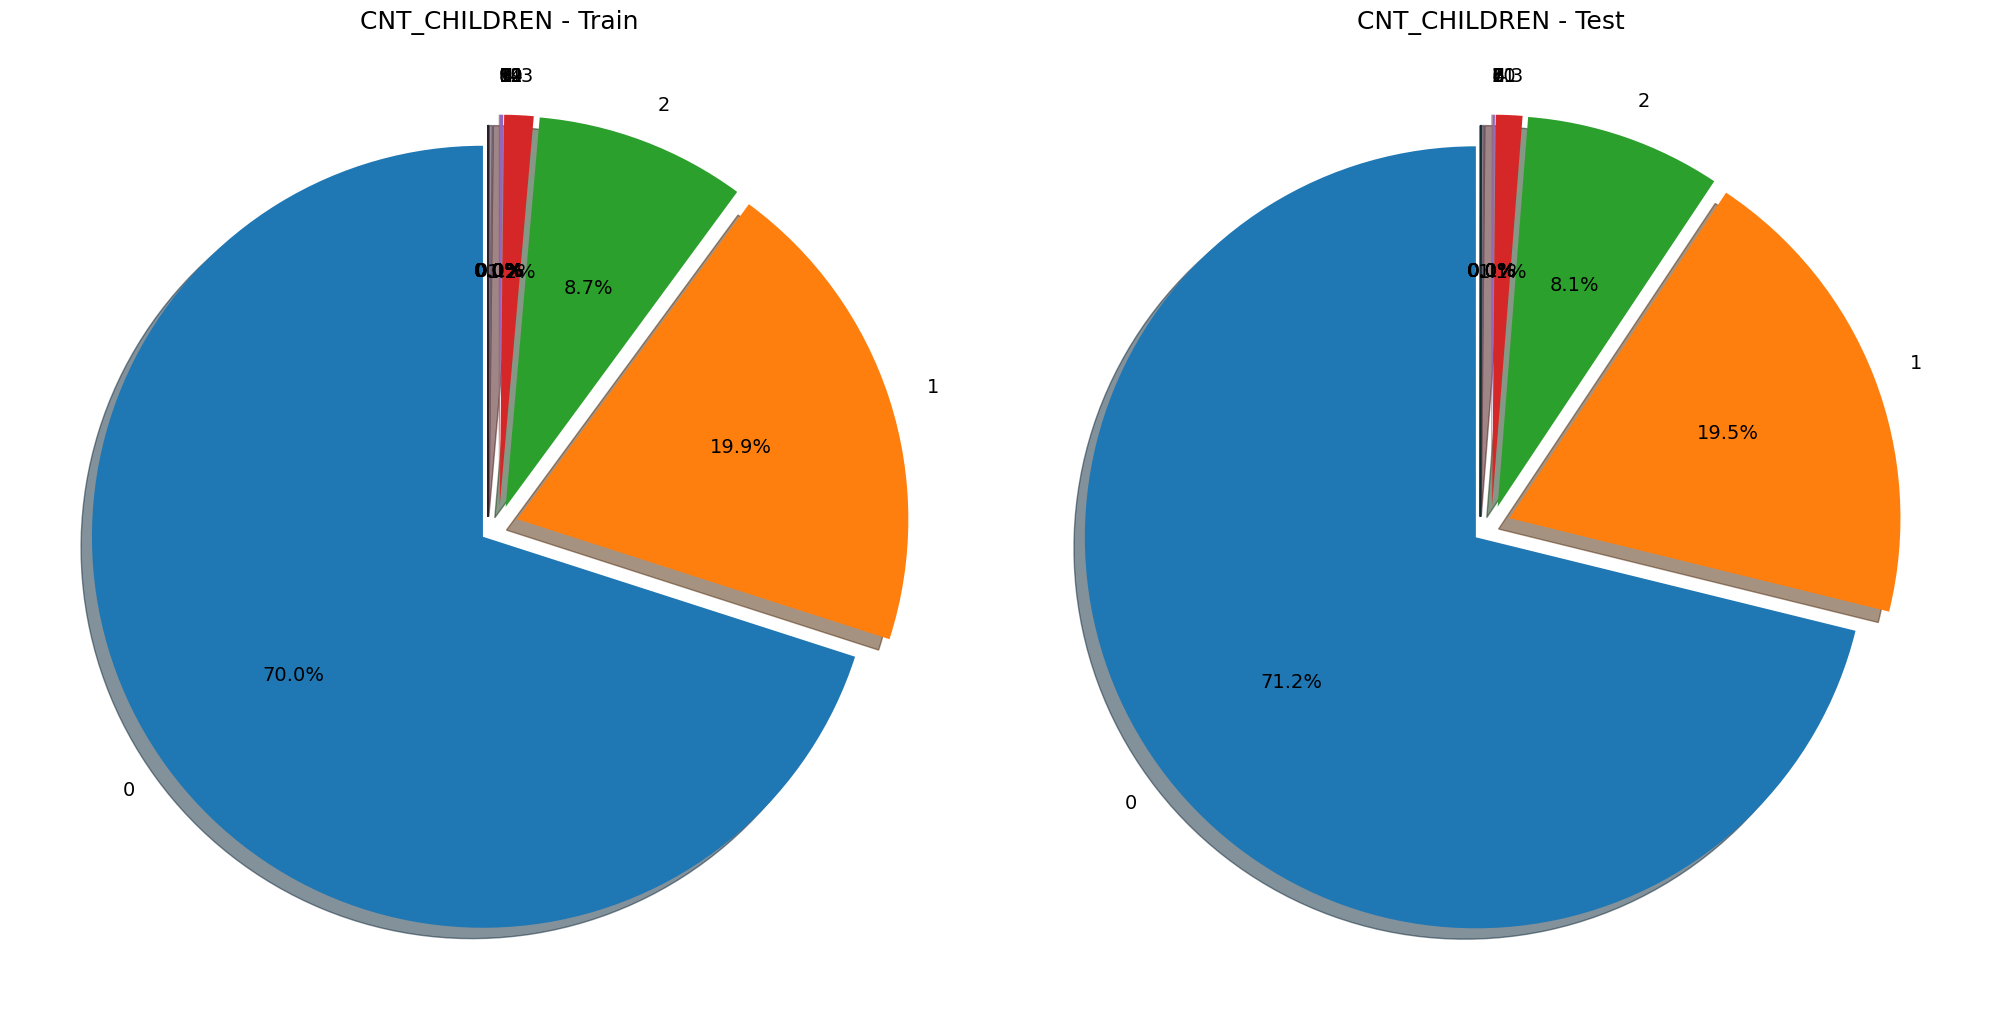

In [159]:
plot_pie(app_train, app_test, 'CNT_CHILDREN', (20,20))

Les proportions sont assez équivalentes entre le train et le test.

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64


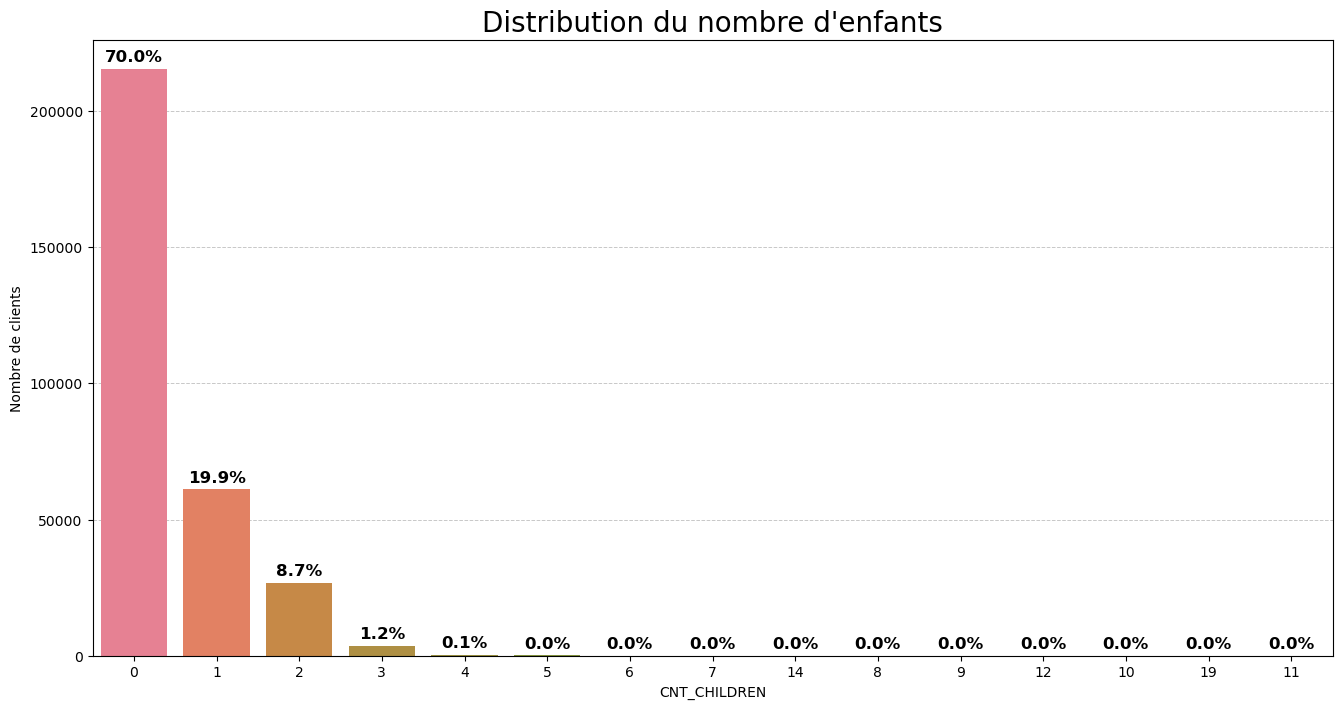

In [161]:
# Distribution des valeurs uniques
print(app_train['CNT_CHILDREN'].value_counts())
plot_stat(app_train, 'CNT_CHILDREN', 'Distribution du nombre d\'enfants', (16,8))
plt.show()

La plupart des clients qui contractent un prêt n'ont pas d'enfants. 

19,9% des clients ont 1 enfant, 8,7% en ont 2 et 1,2% en ont 3. 

* ### *Pourcentage de TARGET=1 en fonction du nombre d'enfants*

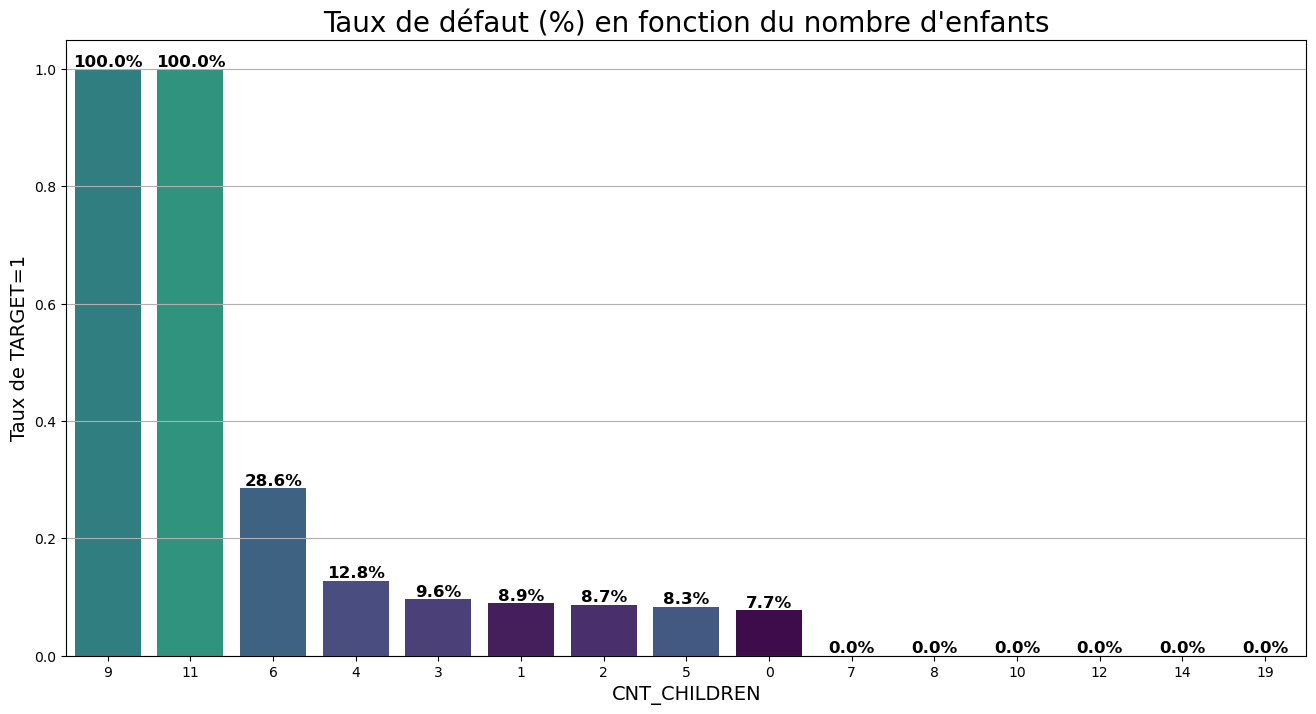

In [164]:
plot_percent_target1(app_train, 'CNT_CHILDREN',"Taux de défaut (%) en fonction du nombre d\'enfants", (16,8))
plt.show()

En ce qui concerne le remboursement, les clients sans enfants, 1, 2, 3 et 5 enfants ont des pourcentages de non-remboursement autour de la moyenne (10 %). Les clients avec 4 et 6 enfants sont au-dessus de la moyenne en termes de pourcentage de prêts non remboursés (plus de 28 % pour les familles avec 6 enfants). Pour les clients ayant 9 ou 11 enfants, le pourcentage de prêts non remboursés est de 100 %.

# __________________________________________________________________________________________

# 5. Analyse des principales variables catégorielles <a id="Analyse-des-principales-variables-catégorielles"></a>
Il est essentiel de se concentrer sur les variables les plus pertinentes et potentiellement explicatives. L’objectif ici n’est pas de réaliser une analyse univariée ou multivariée exhaustive, mais plutôt d’identifier les éléments clés qui peuvent guider nos décisions en matière de gestion du risque lors de l’attribution d’un crédit.

## 5.1. Inspection du Genre

* ### **Genre "CODE_GENDER"**

In [170]:
print(app_train['CODE_GENDER'].describe())

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object


* ### *Visualisation de la distribution*

* ### **Comparaison des distributions des genres dans les ensembles d'entraînement et de test**
    * Pour  Visualiser la répartition hommes/femmes dans train et test.

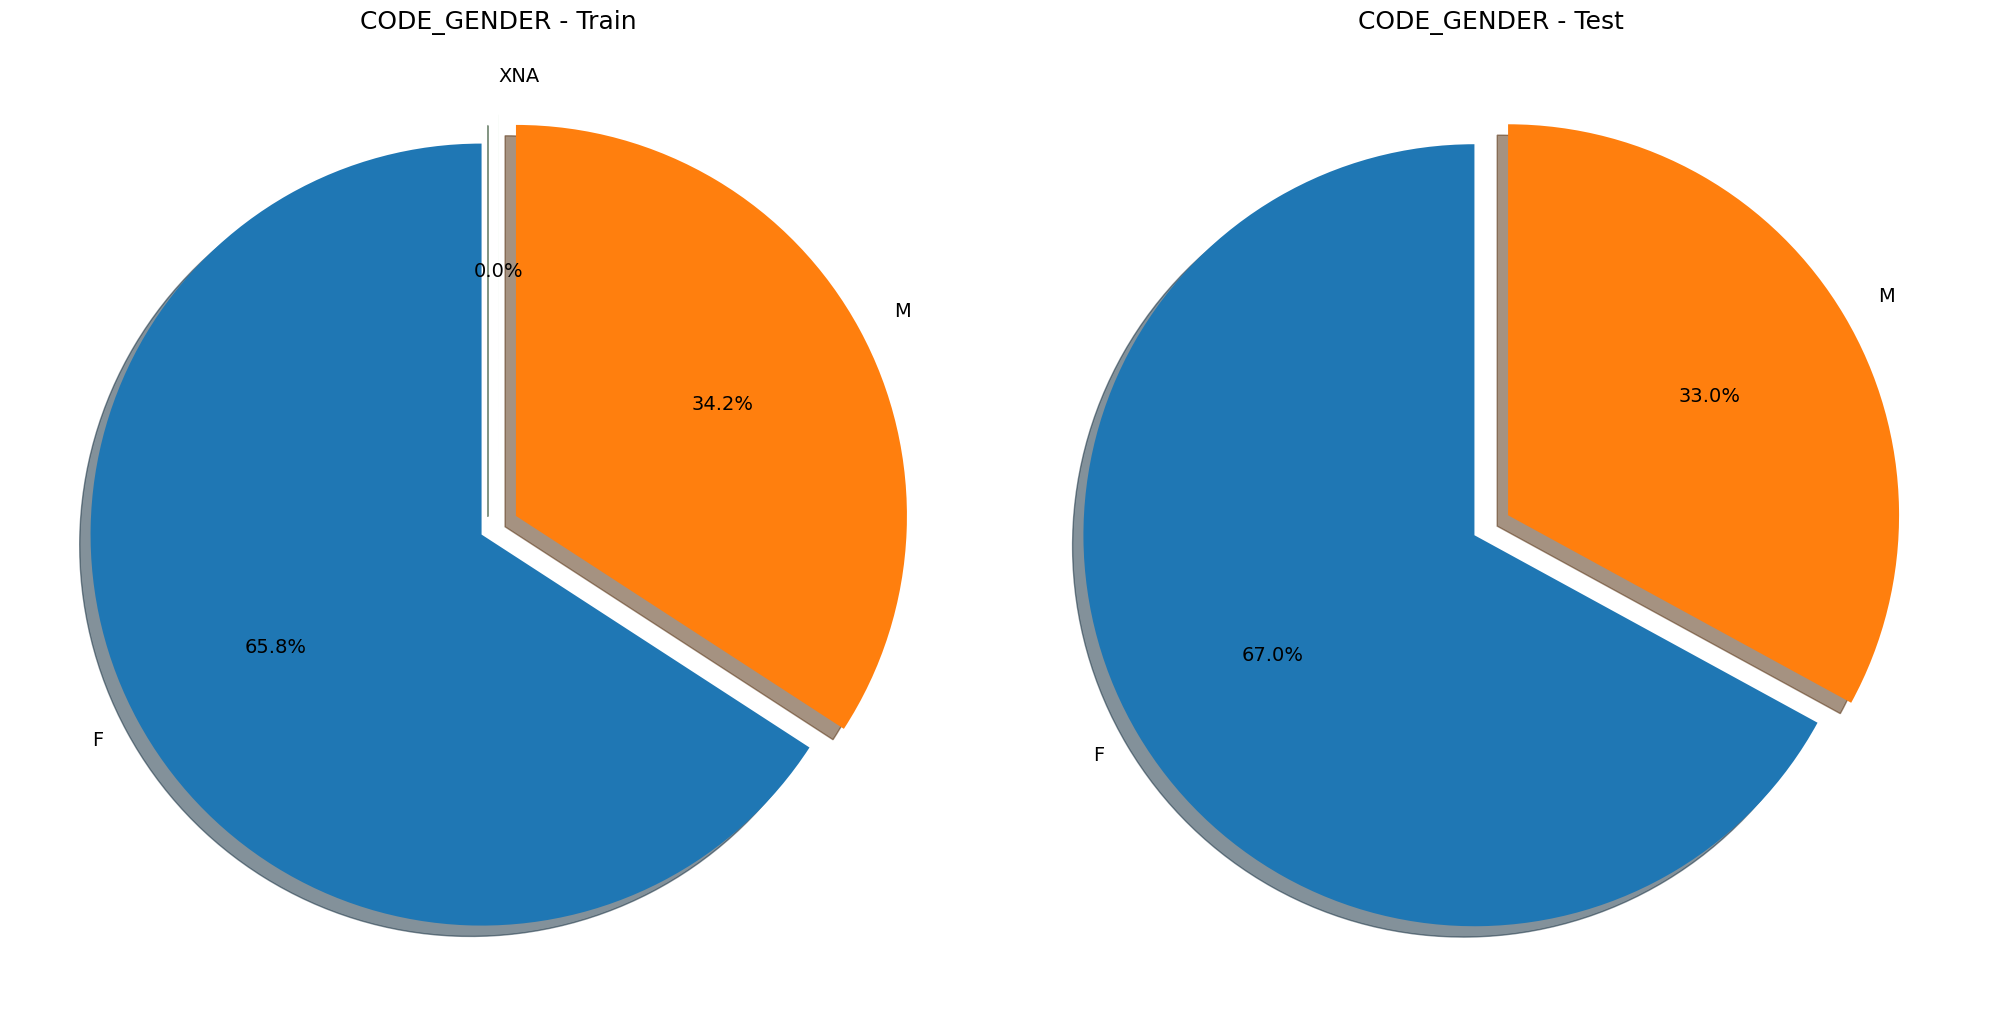

In [173]:
plot_pie(app_train, app_test, 'CODE_GENDER', (20,20))

**Nous avons deux graphiques côte à côte :**

* Le premier montre la distribution des genres dans l'ensemble d'entraînement (app_train).
* Le deuxième montre la distribution des genres dans l'ensemble de test (app_test).

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


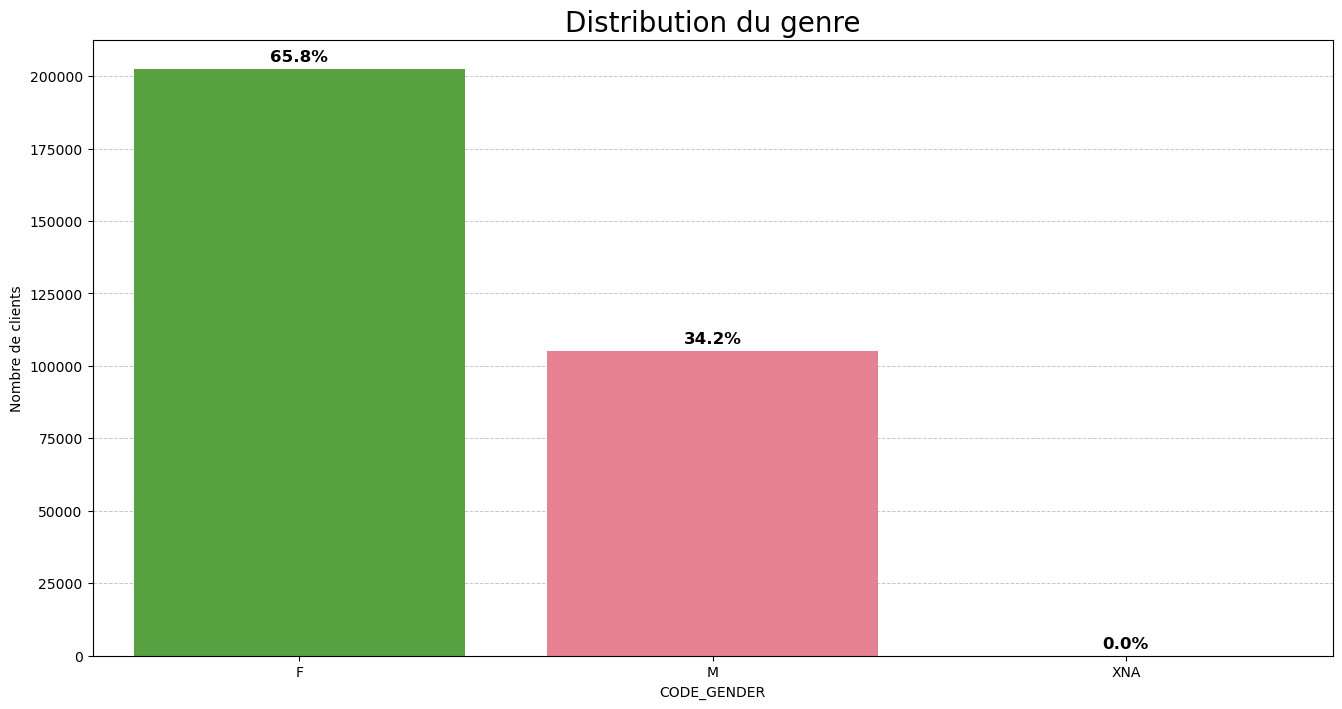

In [175]:
# Distribution des valeurs uniques
print(app_train['CODE_GENDER'].value_counts())
plot_stat(app_train, 'CODE_GENDER', 'Distribution du genre', (16,8))
plt.show()

On peut voir qu'il y a une troisième modalité pour le sexe "XNA" (également présente pour la colonne "ORGANIZATION_TYPE") qui semble correspondre à des données manquantes (différentes notations entre les personnes).


* ### *Pourcentage de TARGET=1 en fonction du genre*

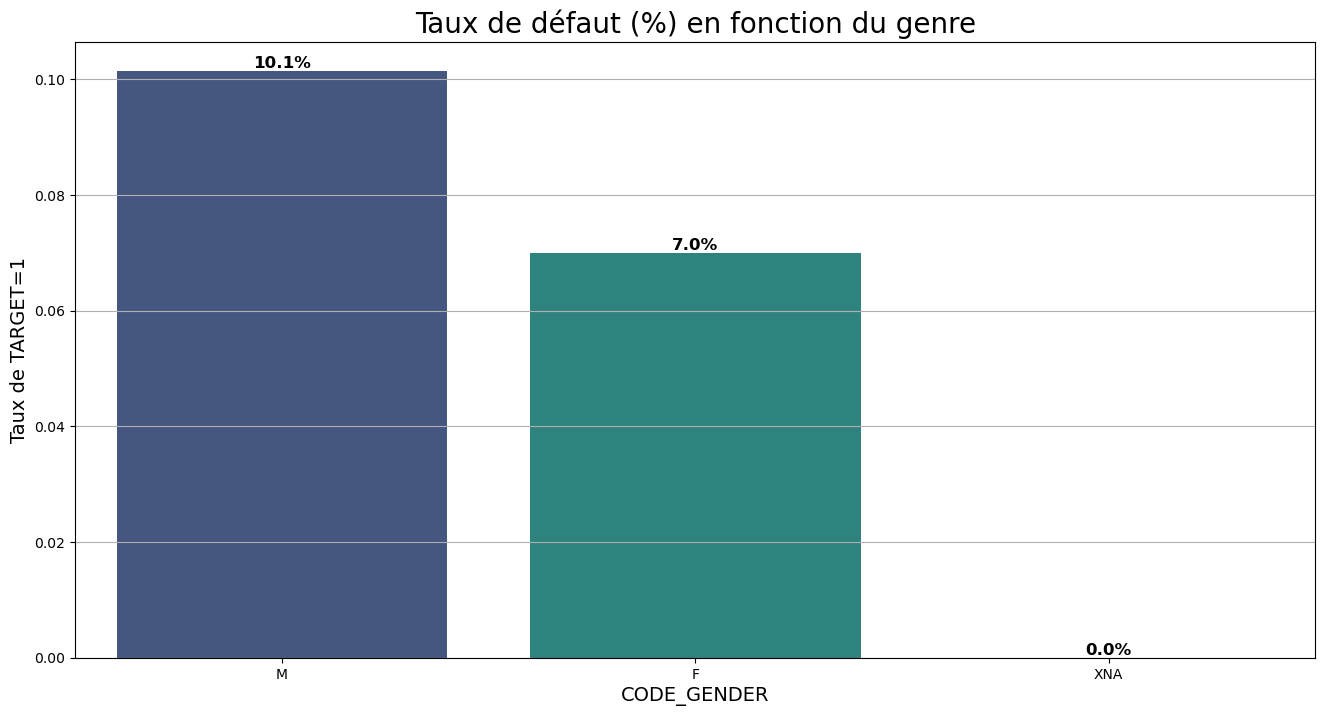

In [178]:
plot_percent_target1(app_train, 'CODE_GENDER',"Taux de défaut (%) en fonction du genre", (16,8))
plt.show()

Les clients sont majoritairement des femmes. En revanche, les impayés sont plus important chez les hommes.

***

## 5.2. Inspection du Type de contrat (Cash loans, revolving loans), souvent très corrélé au risque

* ### **Type de contrat "NAME_CONTRACT_TYPE"**

In [183]:
print(app_train['NAME_CONTRACT_TYPE'].describe())

count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object


* ### *Visualisation de la distribution*

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


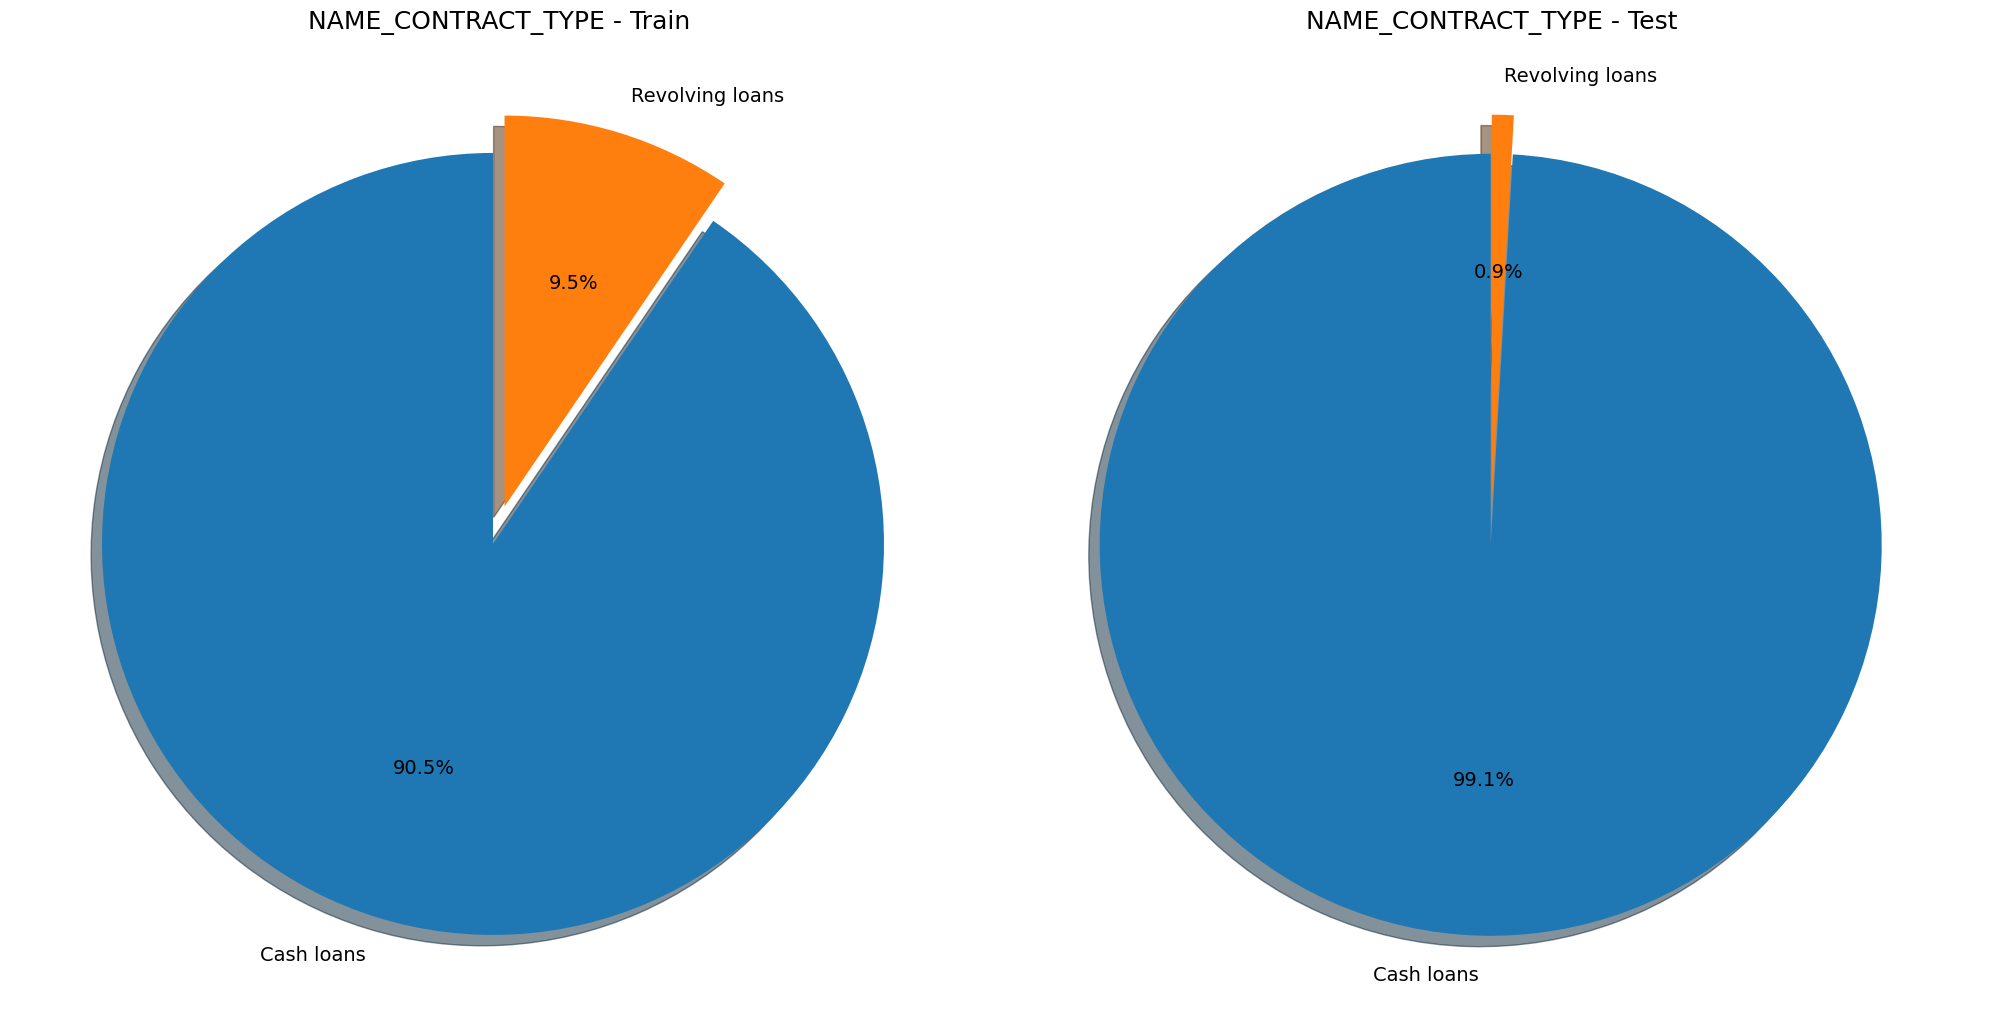

In [185]:
# Distribution des valeurs uniques
print(app_train['NAME_CONTRACT_TYPE'].value_counts())
plot_pie(app_train, app_test, 'NAME_CONTRACT_TYPE', (20,20))

* ### *Pourcentage de TARGET=1 en fonction du Type de contrat*

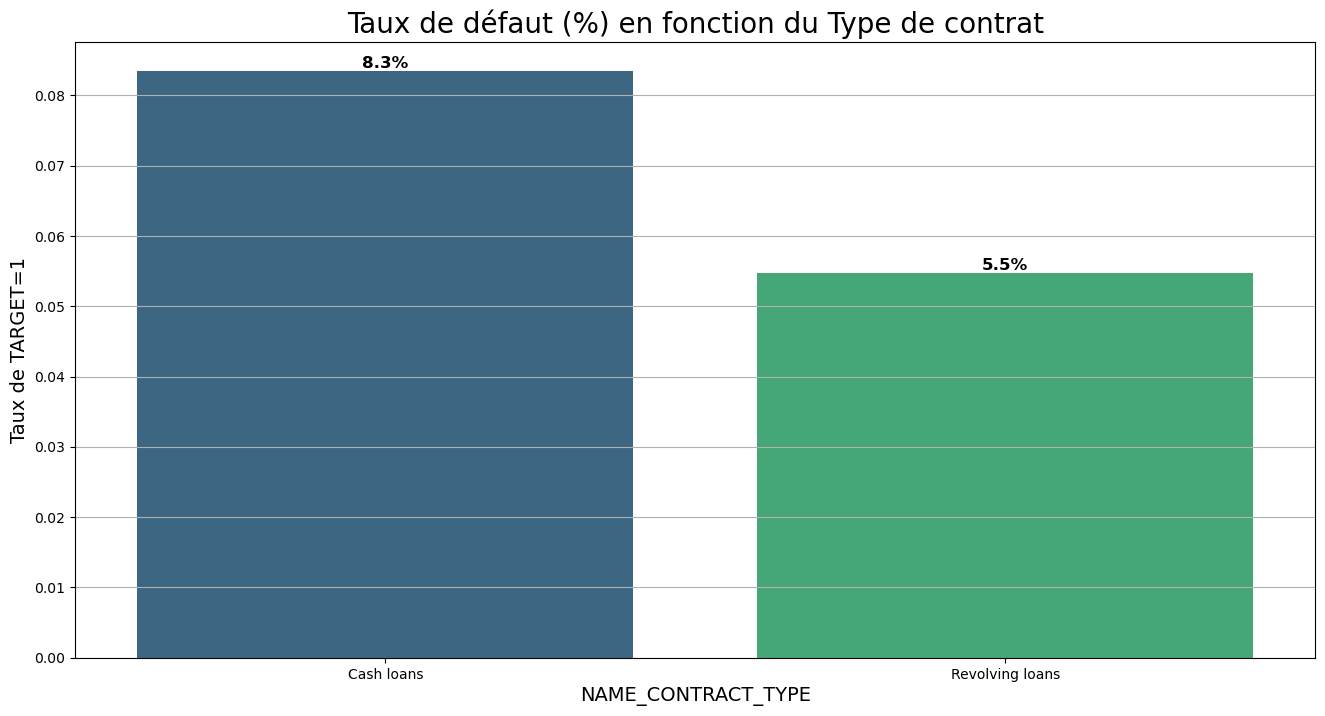

In [187]:
plot_percent_target1(app_train, 'NAME_CONTRACT_TYPE',"Taux de défaut (%) en fonction du Type de contrat", (16,8))
plt.show()

***

## 5.3. Inspection de la possession de voiture personnelle

* ### **Voiture personnelle "FLAG_OWN_CAR"**

In [191]:
print(app_train['FLAG_OWN_CAR'].describe())

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object


* ### *Visualisation de la distribution*

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


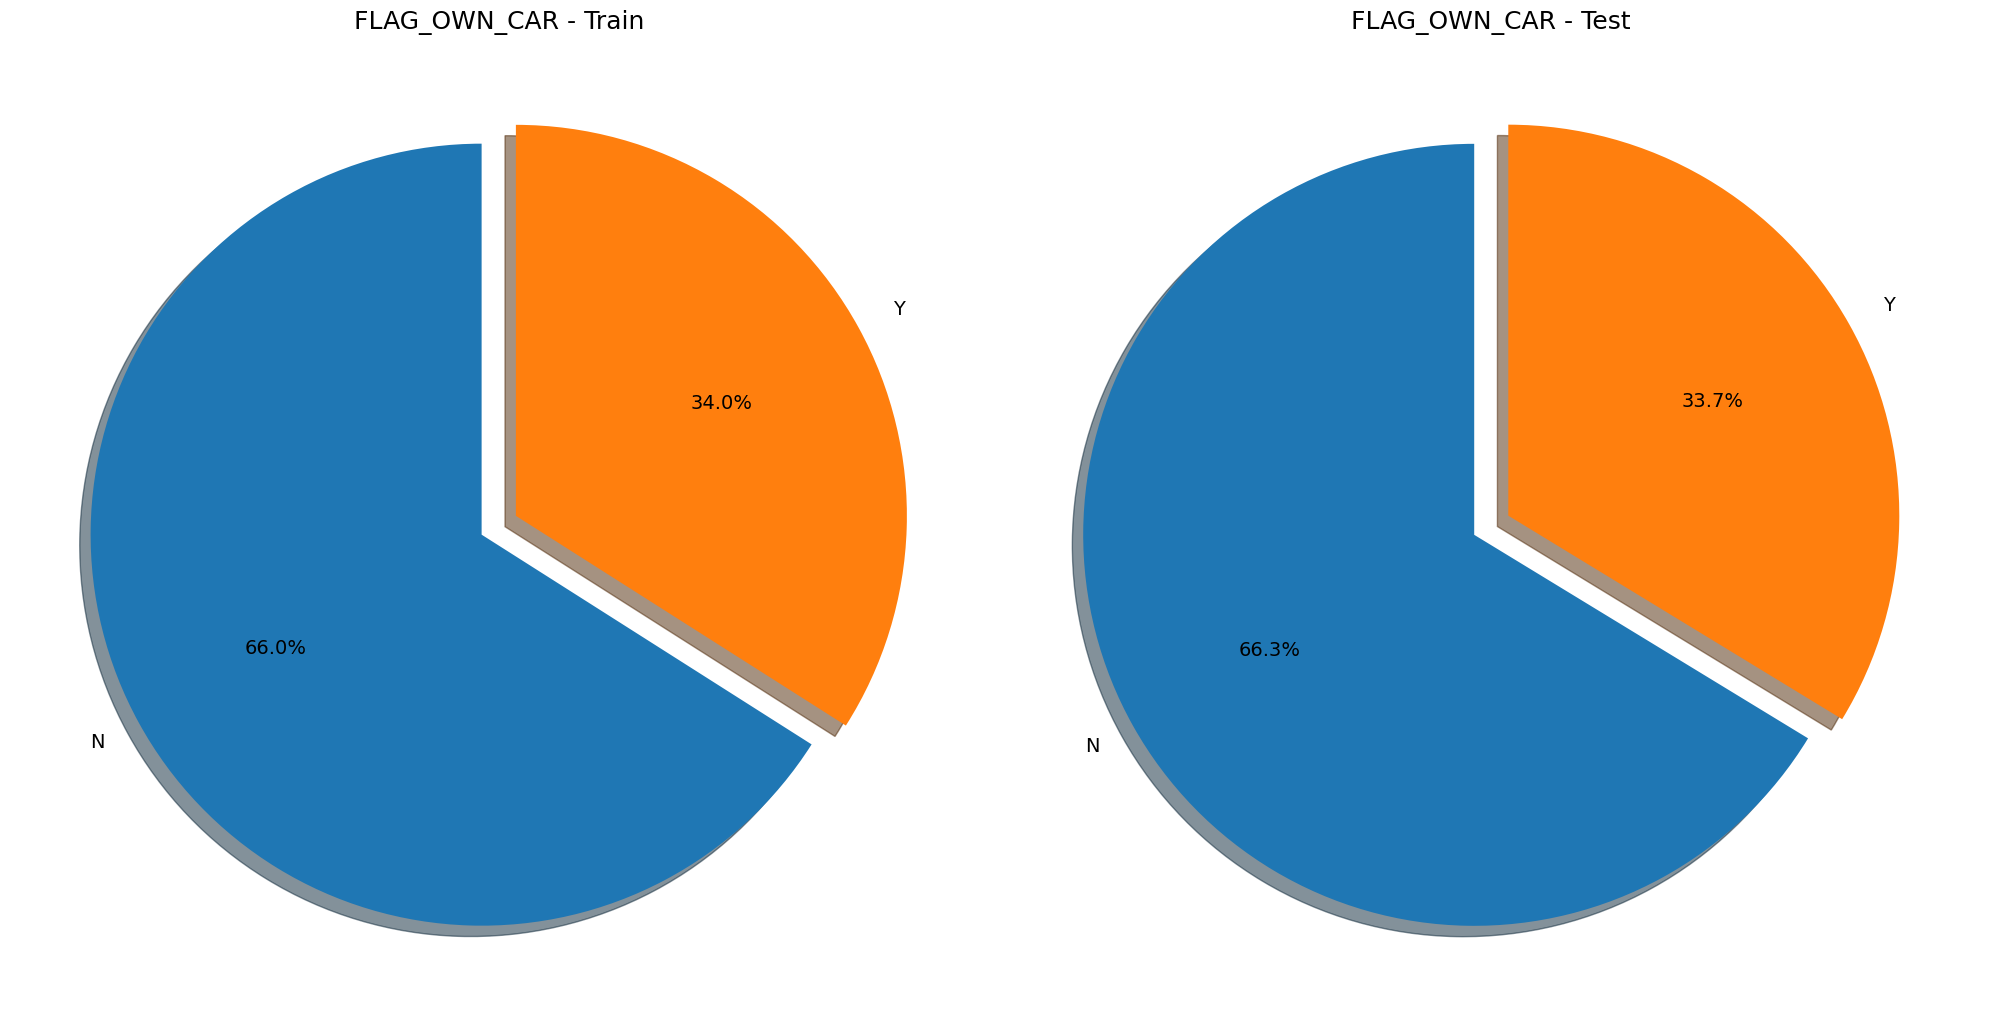

In [193]:
# Distribution des valeurs uniques
print(app_train['FLAG_OWN_CAR'].value_counts())
plot_pie(app_train, app_test, 'FLAG_OWN_CAR', (20,20))

66% des clients sont propriétaire d'un véhicule et 34% ne le sont pas.

* ### *Pourcentage de TARGET=1 en fonction de la possession de voiture personnelle*

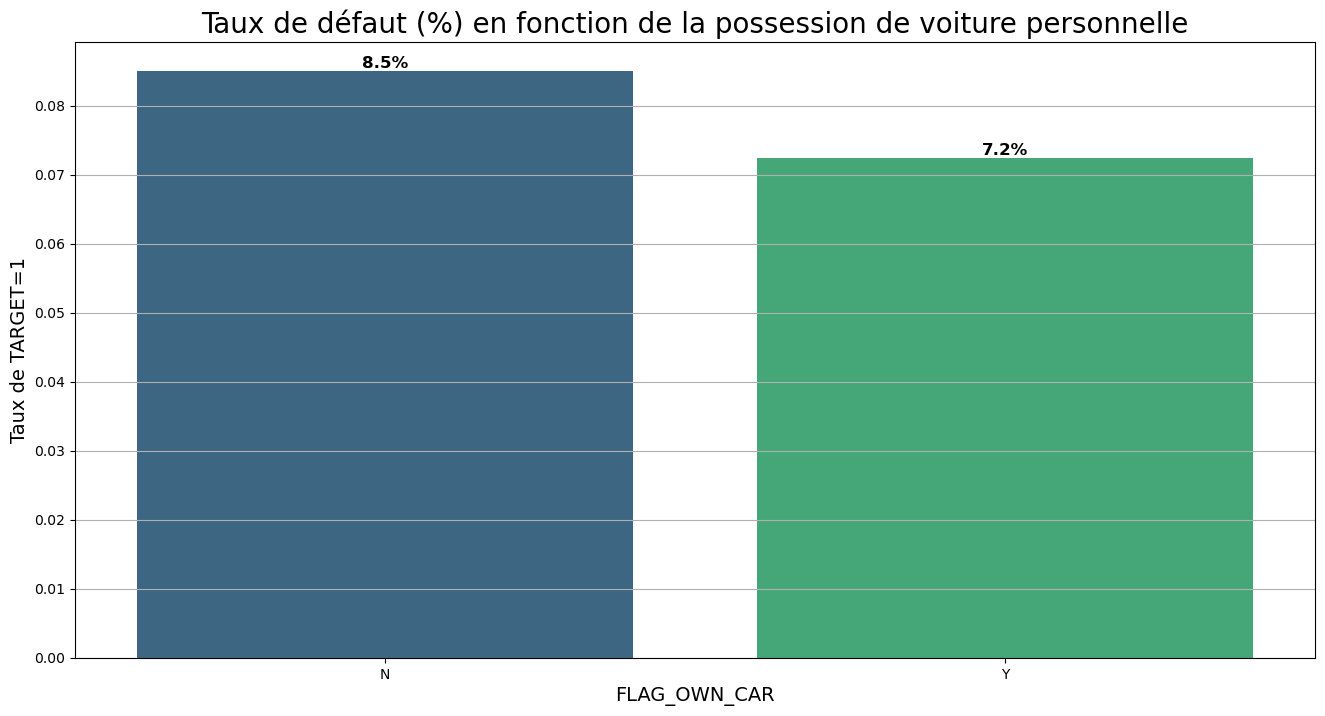

In [196]:
plot_percent_target1(app_train, 'FLAG_OWN_CAR',"Taux de défaut (%) en fonction de la possession de voiture personnelle", (16,8))
plt.show()

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

***

## 5.4. Inspection de la possession de bien immobilier propre

* ### **Bien immobilier propre "FLAG_OWN_REALTY"**

In [201]:
print(app_train['FLAG_OWN_REALTY'].describe())

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object


* ### *Visualisation de la distribution*

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


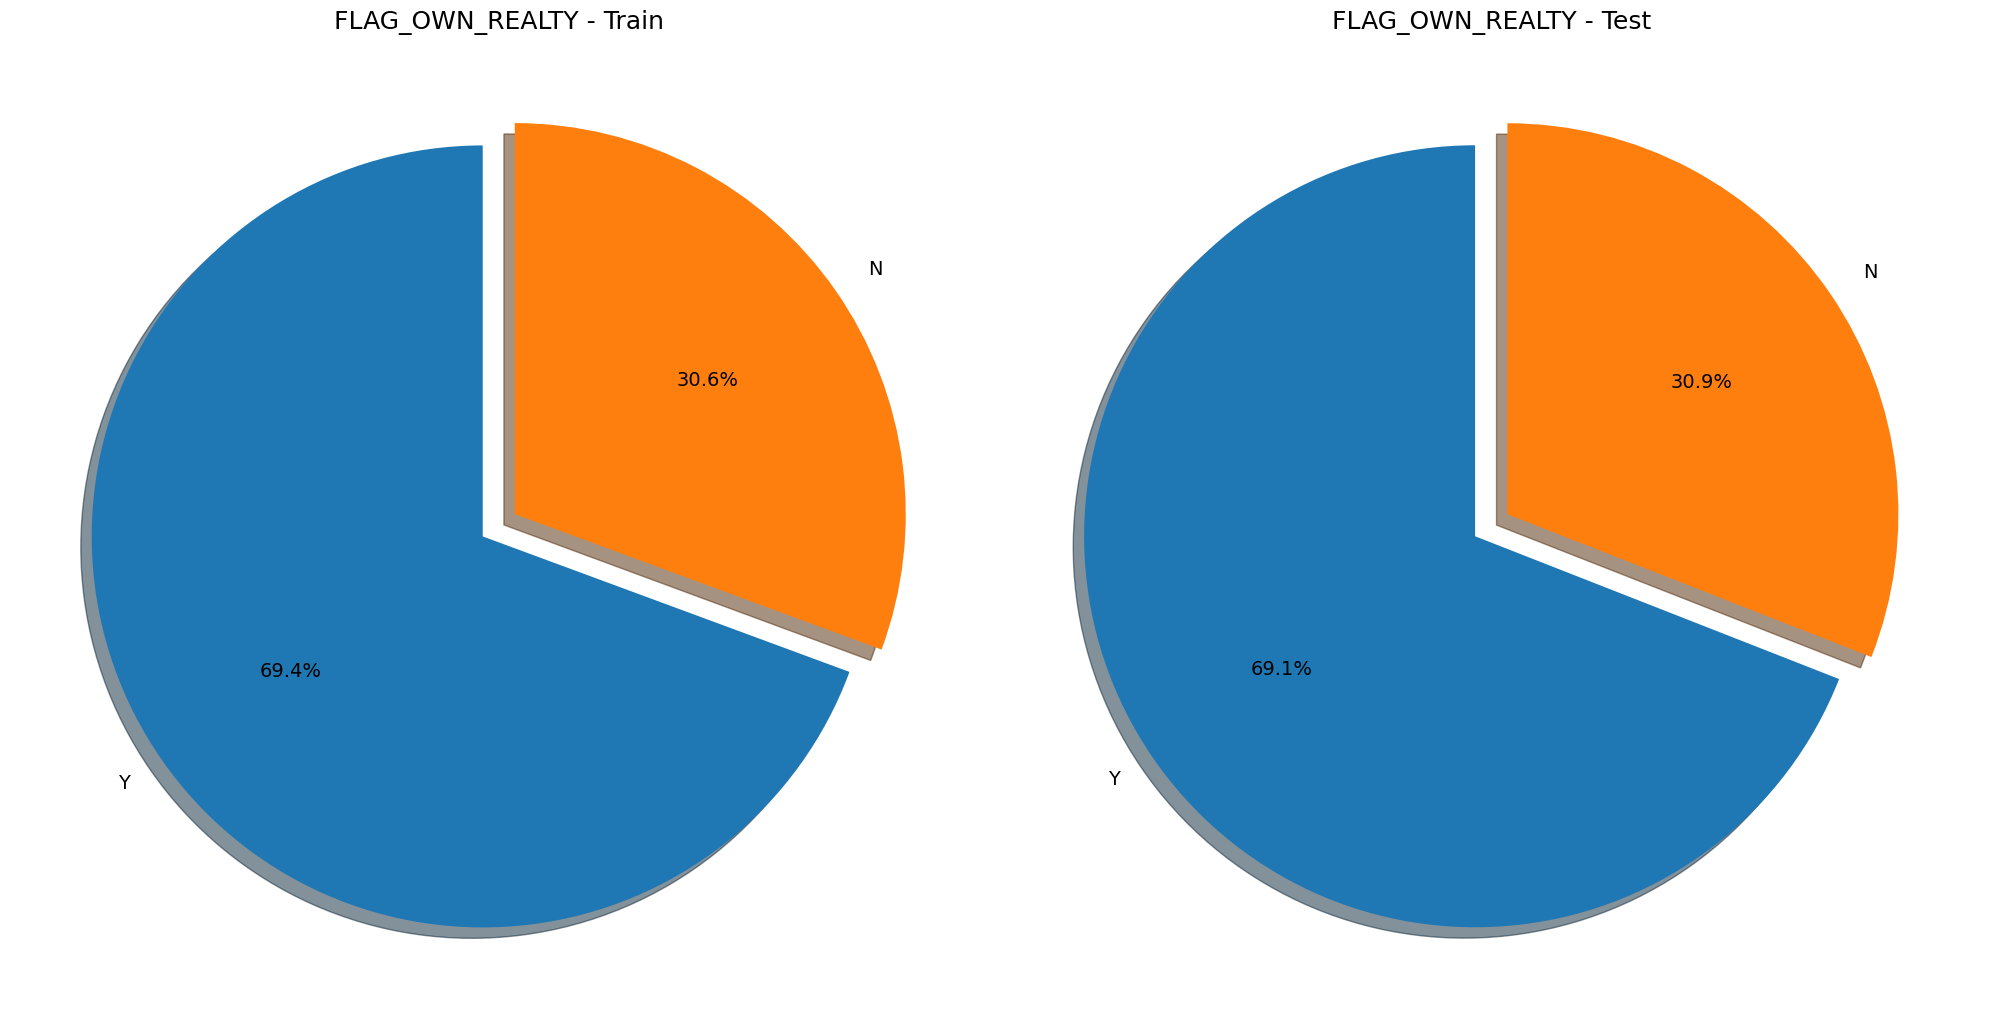

In [203]:
# Distribution des valeurs uniques
print(app_train['FLAG_OWN_REALTY'].value_counts())
plot_pie(app_train, app_test, 'FLAG_OWN_REALTY', (20,20))

70% des clients sont propriétaire d'un Bien immobilier et 30% ne le sont pas.

* ### *Pourcentage de TARGET=1 en fonction de la possession de bien immobilier propre*

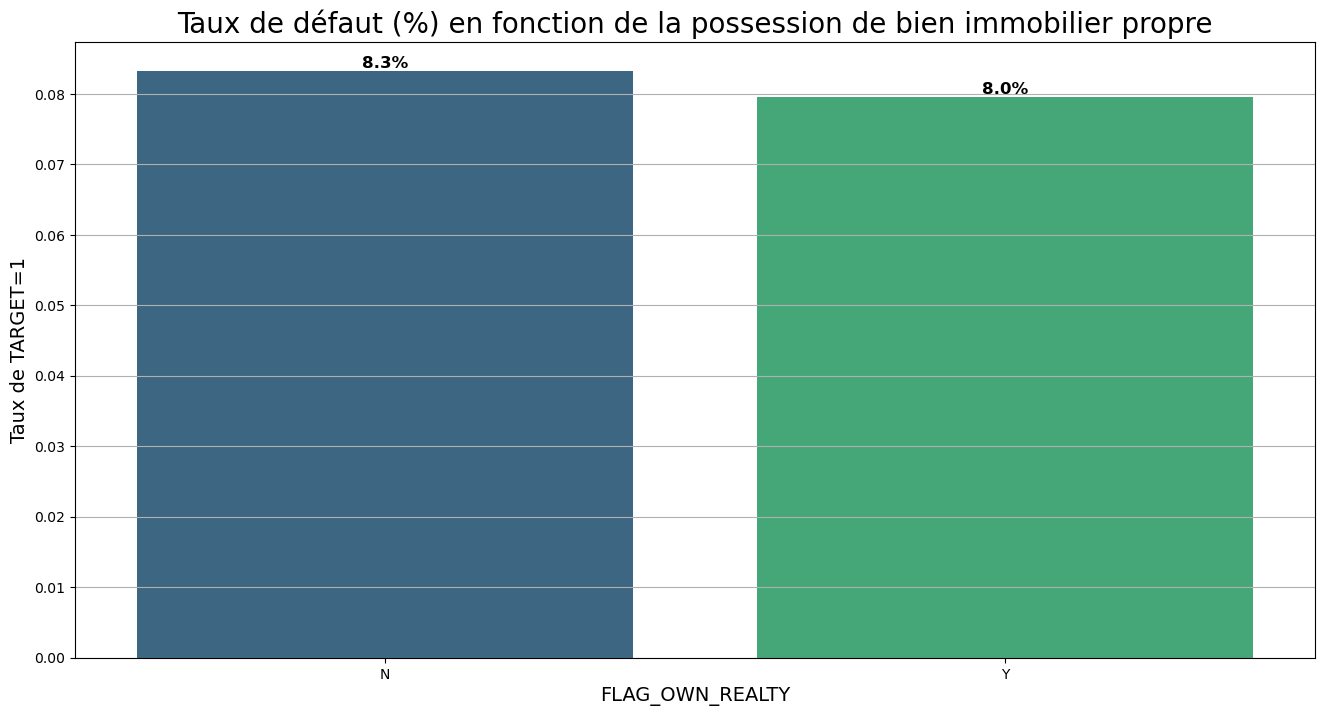

In [206]:
plot_percent_target1(app_train, 'FLAG_OWN_REALTY',"Taux de défaut (%) en fonction de la possession de bien immobilier propre", (16,8))
plt.show()

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

***

## 5.5. Inspection du Type de logement

* ### **Type de logement "NAME_HOUSING_TYPE"**

In [211]:
print(app_train['NAME_HOUSING_TYPE'].describe())

count                307511
unique                    6
top       House / apartment
freq                 272868
Name: NAME_HOUSING_TYPE, dtype: object


* ### *Visualisation de la distribution*

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


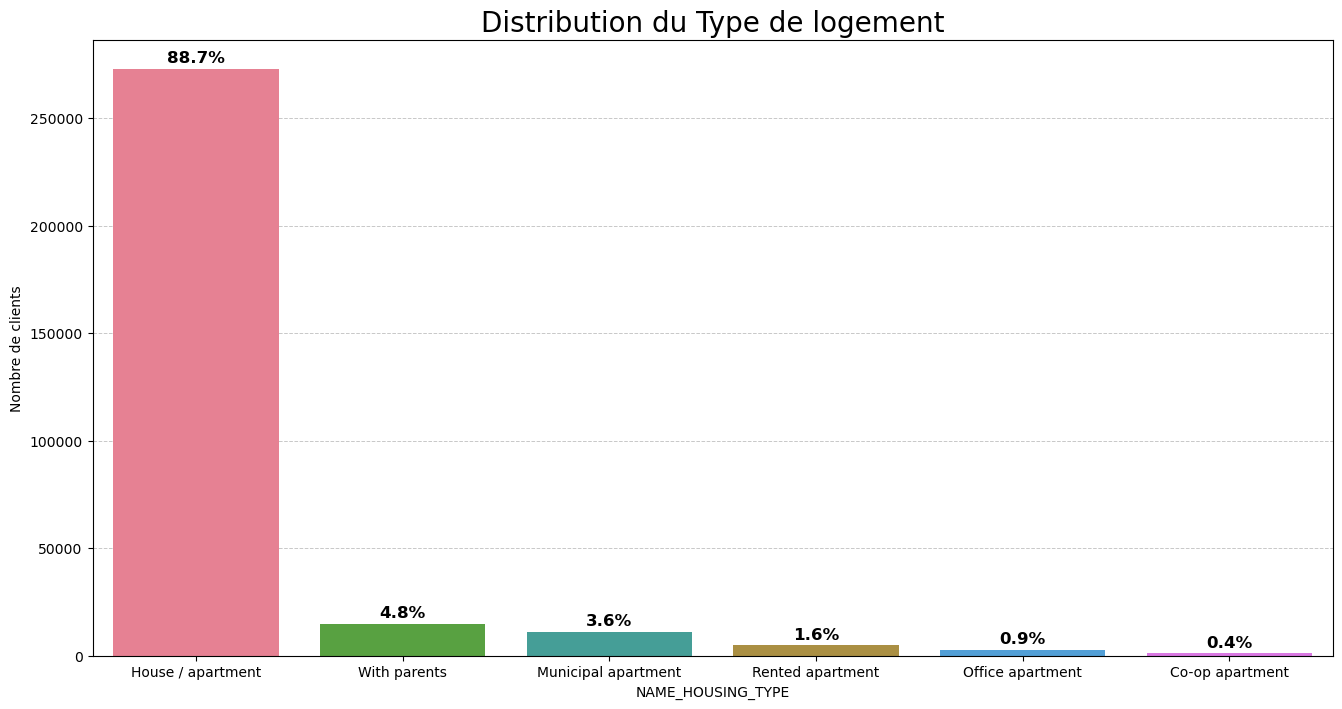

In [213]:
# Distribution des valeurs uniques
print(app_train['NAME_HOUSING_TYPE'].value_counts())
plot_stat(app_train, 'NAME_HOUSING_TYPE', 'Distribution du Type de logement', (16,8))
plt.show()

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement.

* ### *Pourcentage de TARGET=1 en fonction du Type de logement*

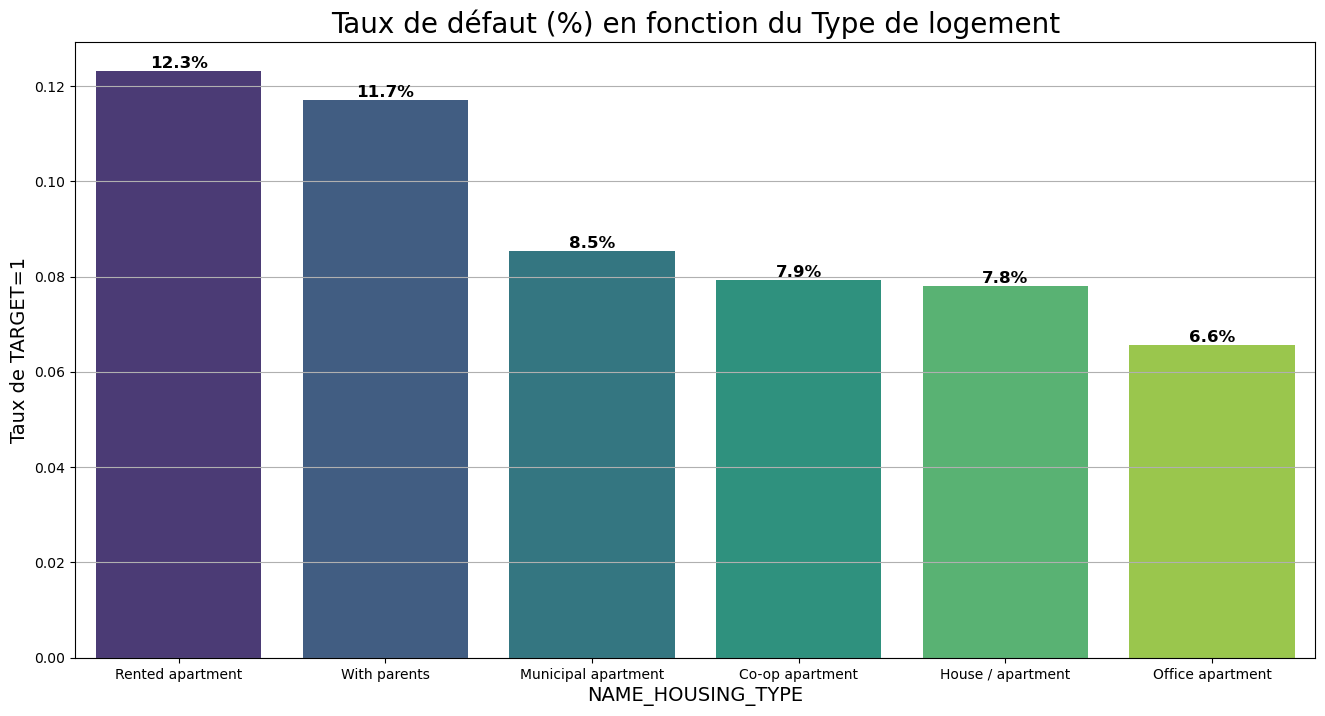

In [216]:
plot_percent_target1(app_train, 'NAME_HOUSING_TYPE',"Taux de défaut (%) en fonction du Type de logement", (16,8))
plt.show()

les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

***

## 5.6. Inspection du Statut Familial

* ### **Statut Familial "NAME_FAMILY_STATUS"**

In [221]:
print(app_train['NAME_FAMILY_STATUS'].describe())

count      307511
unique          6
top       Married
freq       196432
Name: NAME_FAMILY_STATUS, dtype: object


* ### *Visualisation de la distribution*

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


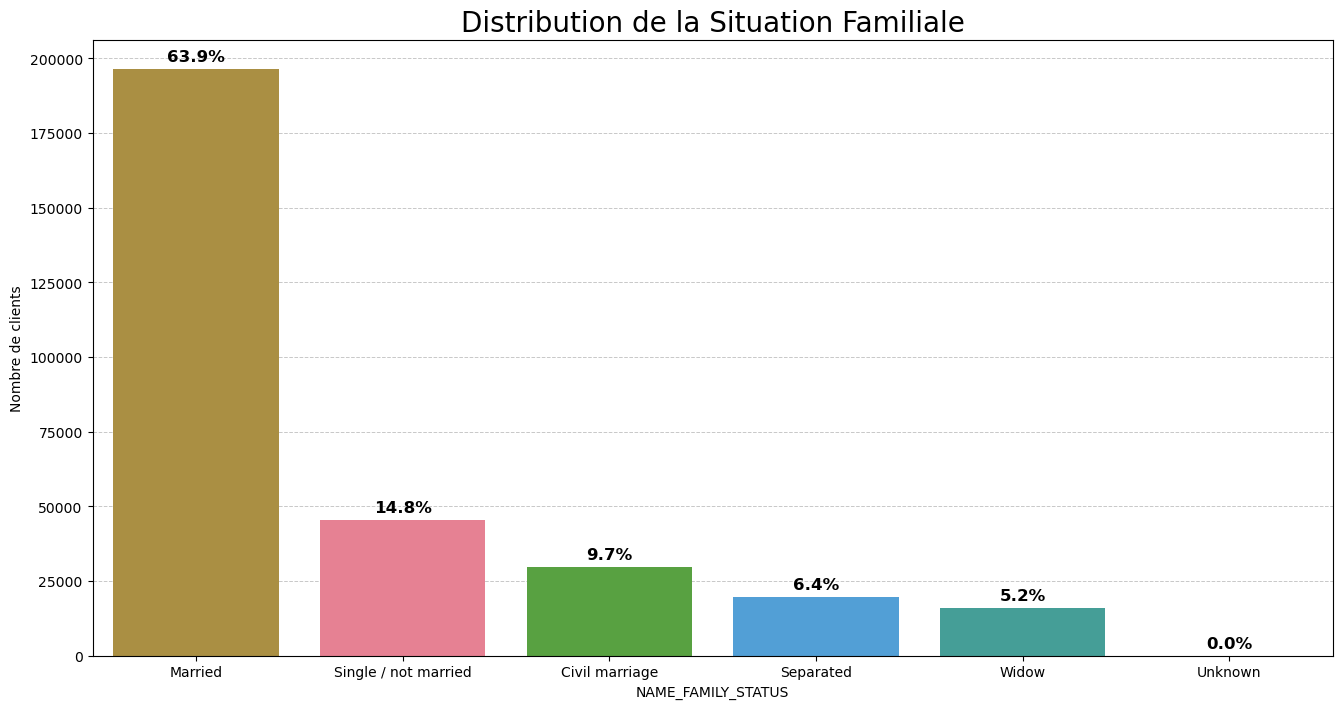

In [223]:
# Distribution des valeurs uniques
print(app_train['NAME_FAMILY_STATUS'].value_counts())
plot_stat(app_train, 'NAME_FAMILY_STATUS', 'Distribution de la Situation Familiale', (16,8))
plt.show()

Les clients mariés sont plus nombreux, suivis des célibataires / non mariés et des mariages civils.

* ### *Pourcentage de TARGET=1 en fonction de la Situation Familiale*

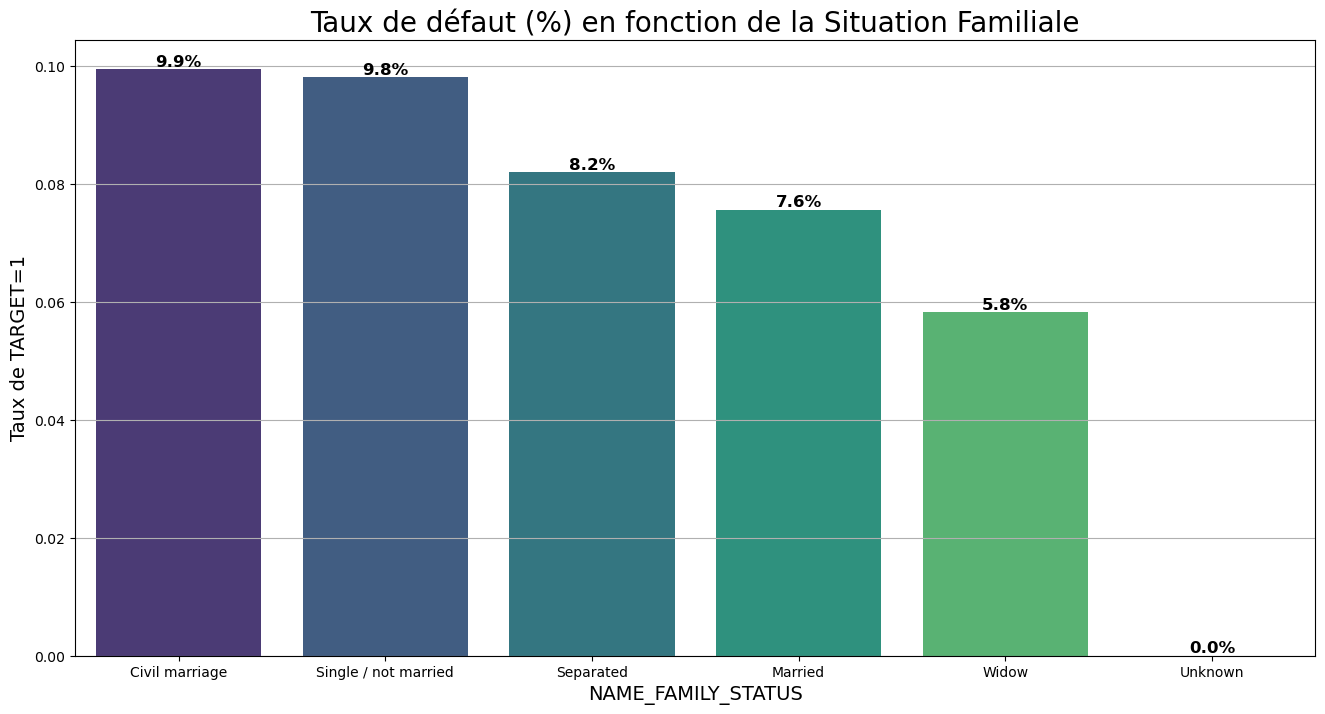

In [226]:
plot_percent_target1(app_train, 'NAME_FAMILY_STATUS',"Taux de défaut (%) en fonction de la Situation Familiale", (16,8))
plt.show()

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

***

## 5.7. Inspection de la Profession des clients

* ### **Statut Familial "OCCUPATION_TYPE"**

In [231]:
print(app_train['OCCUPATION_TYPE'].describe())

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


* ### *Visualisation de la distribution*

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64


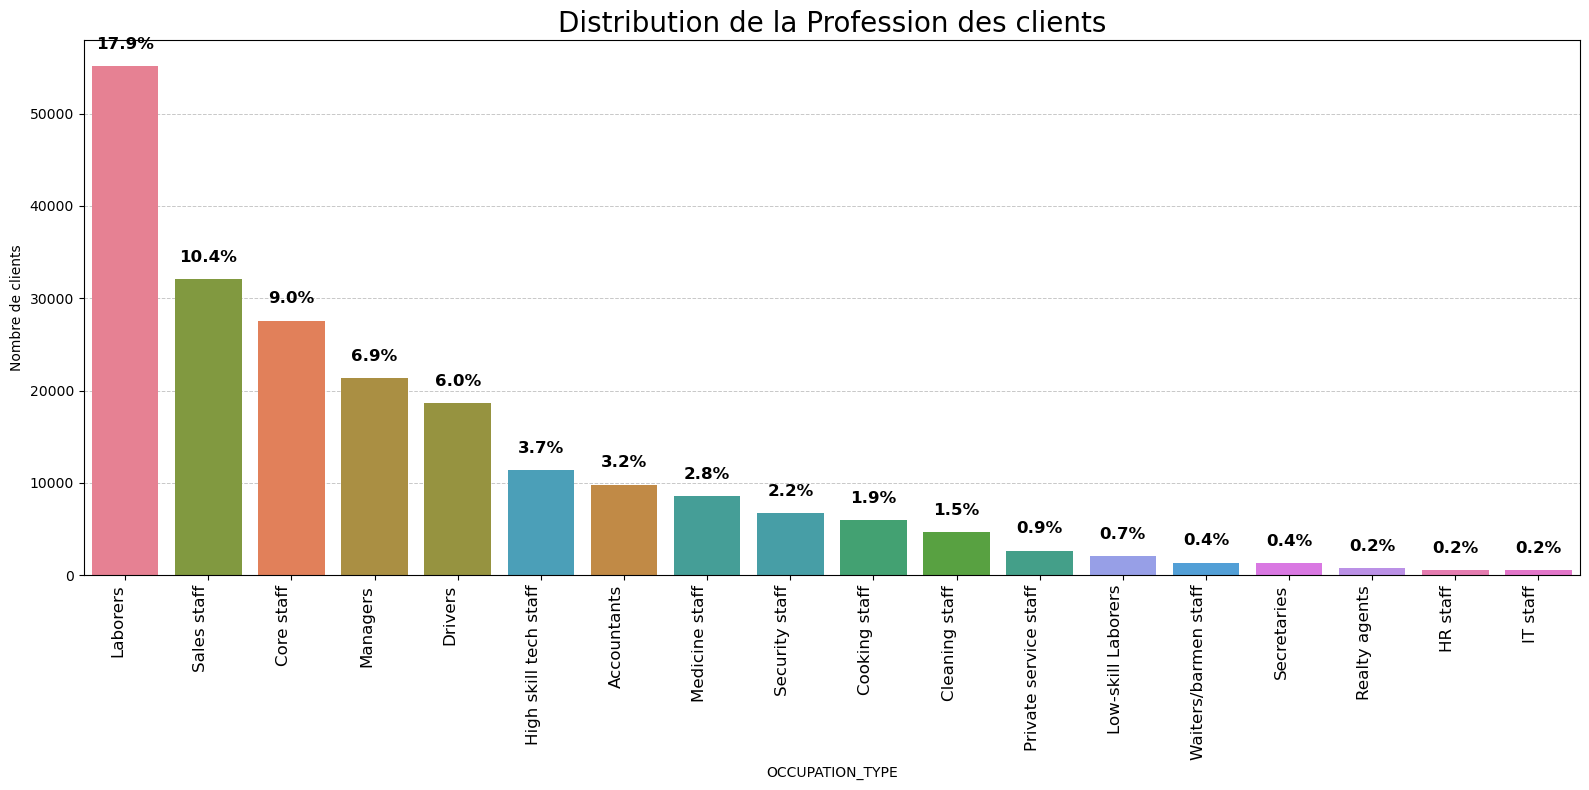

In [233]:
# Distribution des valeurs uniques
print(app_train['OCCUPATION_TYPE'].value_counts())
plot_stat(app_train, 'OCCUPATION_TYPE', 'Distribution de la Profession des clients', (16, 8))

# Affichage modalités à 90° 
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

Les clients ont majoritairement des ouvriers, suivis par les vendeurs/commerciaux. 

* ### *Pourcentage de TARGET=1 en fonction de la Profession des clients*

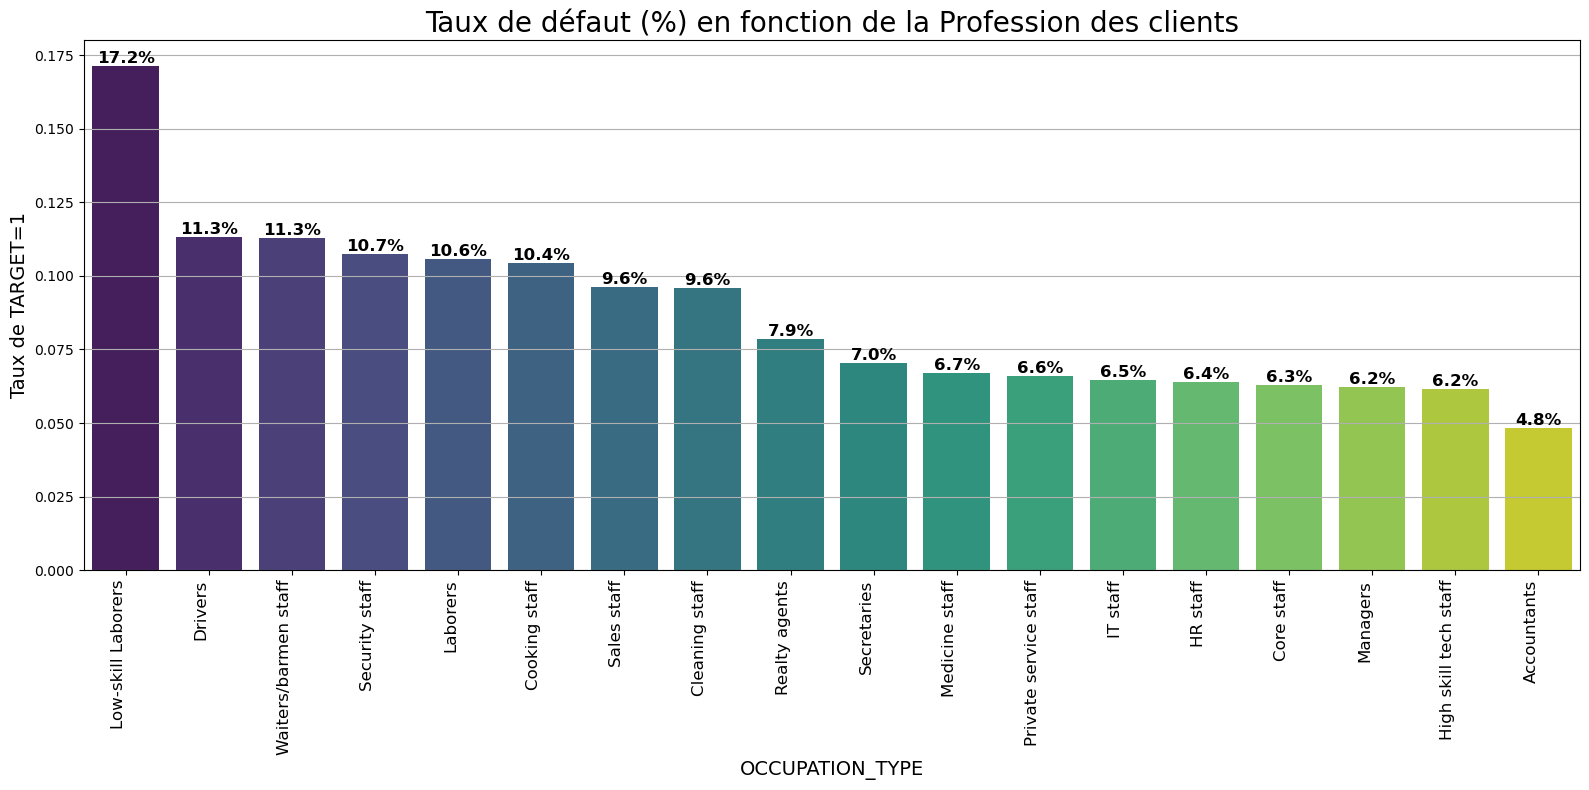

In [236]:
plot_percent_target1(app_train, 'OCCUPATION_TYPE', "Taux de défaut (%) en fonction de la Profession des clients", (16, 8))

# Affichage modalités à 90° 
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

Les impayés sont majoritairement observés chez les ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

***

## 5.8. Inspection du Secteur de l'emploi

* ### **Secteur d'emploi "ORGANIZATION_TYPE"**

In [241]:
print(app_train['ORGANIZATION_TYPE'].describe())

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


* ### *Visualisation de la distribution*

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

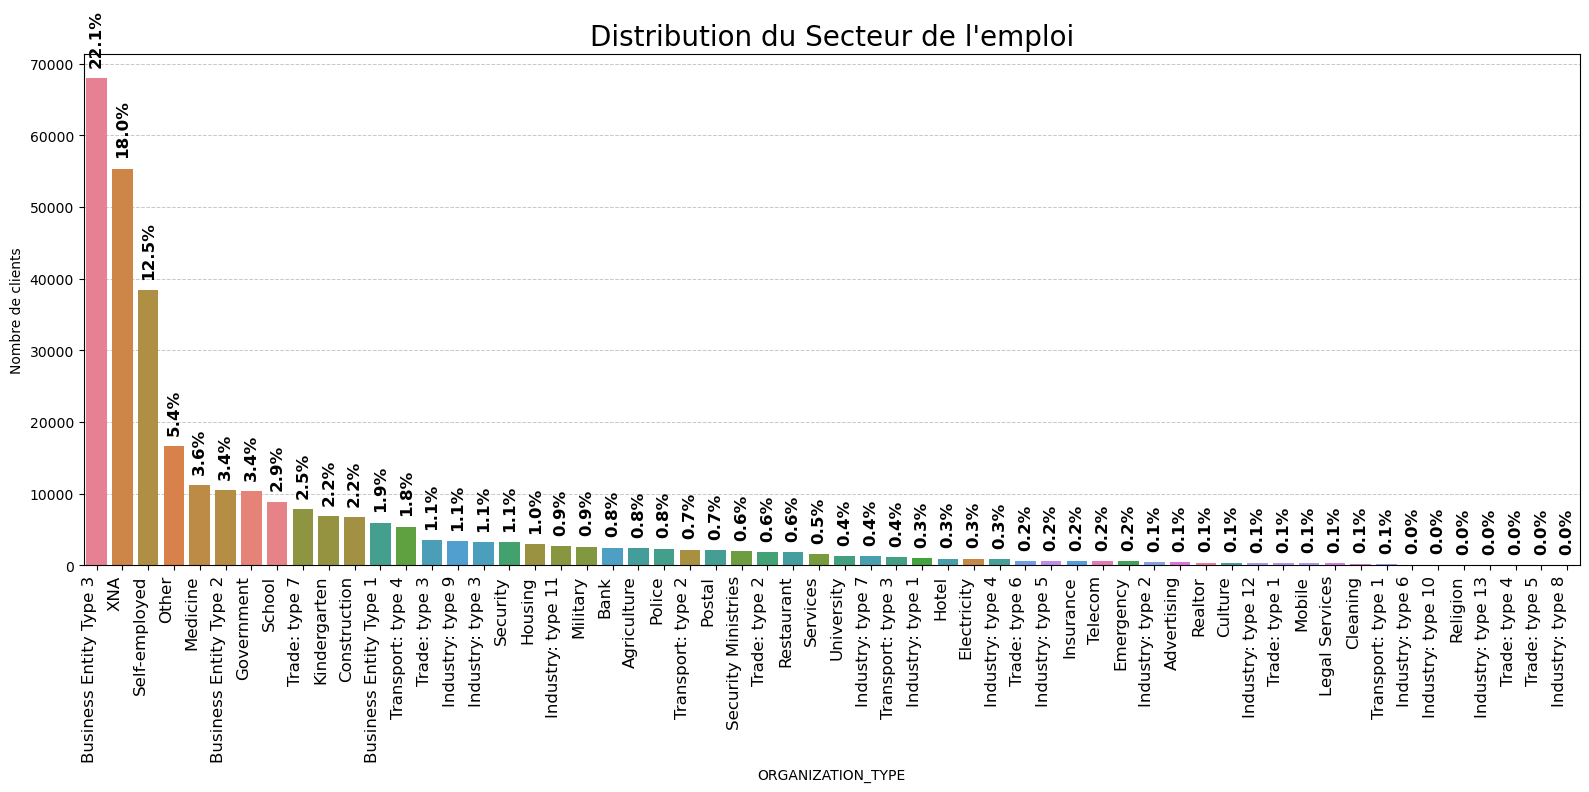

In [243]:
# Distribution des valeurs uniques
print(app_train['ORGANIZATION_TYPE'].value_counts())
plot_stat(app_train, 'ORGANIZATION_TYPE', 'Distribution du Secteur de l\'emploi', (16,8))

# Affichage % à 90°
for txt in plt.gca().texts:
    txt.set_rotation(90)
# Affichage modalités à 90°    
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

* ### *Pourcentage de TARGET=1 en fonction du Secteur de l'emploi*

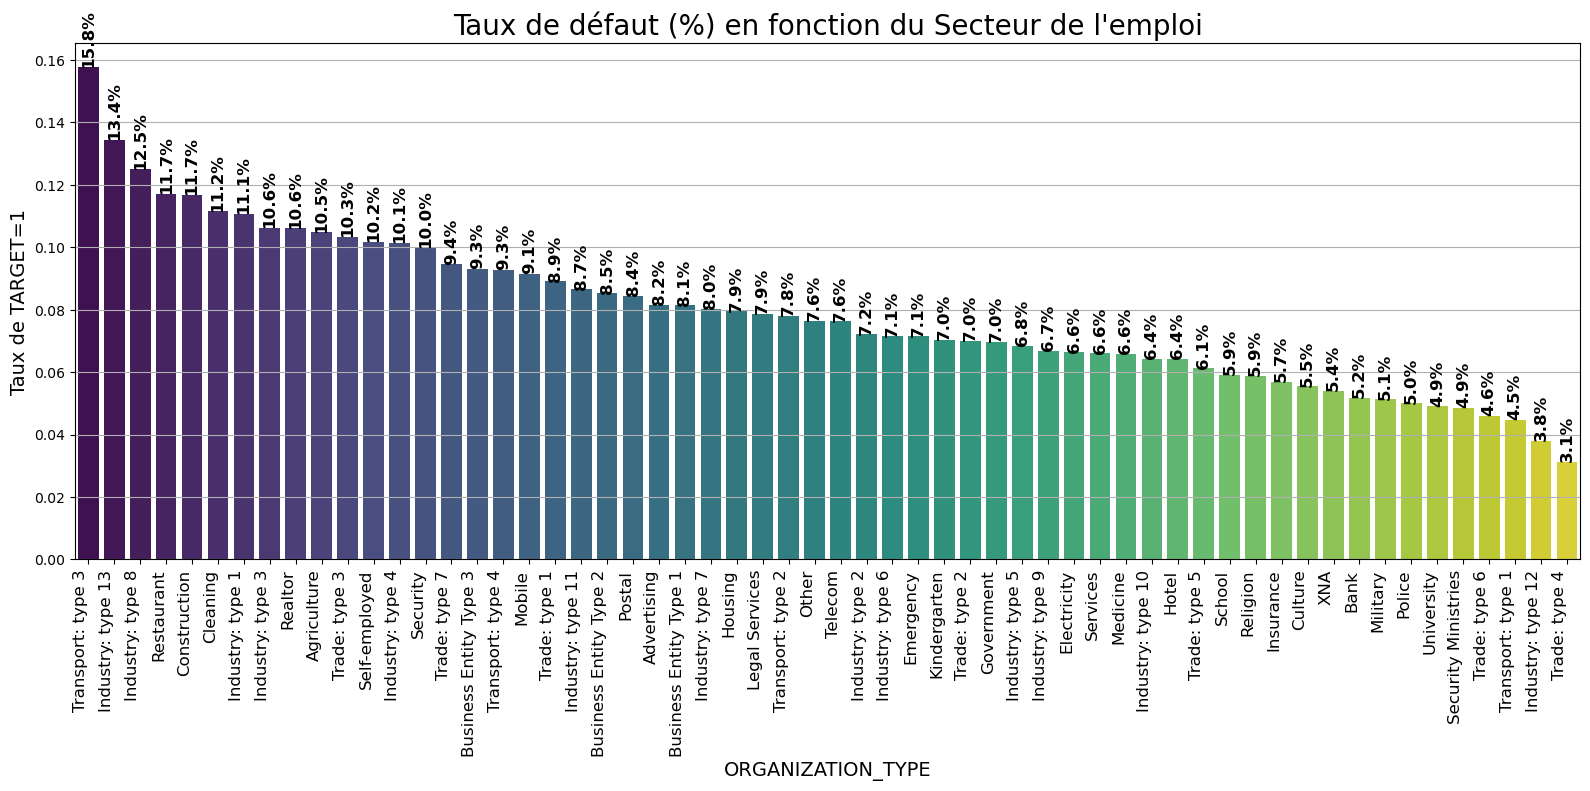

In [245]:
plot_percent_target1(app_train, 'ORGANIZATION_TYPE',"Taux de défaut (%) en fonction du Secteur de l\'emploi", (16,8))
plt.xticks(rotation=90, ha='right', fontsize=12)

# Affichage % à 90°
for txt in plt.gca().texts:
    txt.set_rotation(90)
# Affichage modalités à 90° 
plt.tight_layout()
plt.show()

Les clients travaillant dans le domaine du transport enregistrent le taux d'impayé le plus important comparé aux autres domaines d'activité.

***

## 5.9. Inspection du Niveau d'études des clients

* ### **Niveau d'études "NAME_EDUCATION_TYPE"**

In [250]:
print(app_train['NAME_EDUCATION_TYPE'].describe())

count                            307511
unique                                5
top       Secondary / secondary special
freq                             218391
Name: NAME_EDUCATION_TYPE, dtype: object


* ### *Visualisation de la distribution*

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


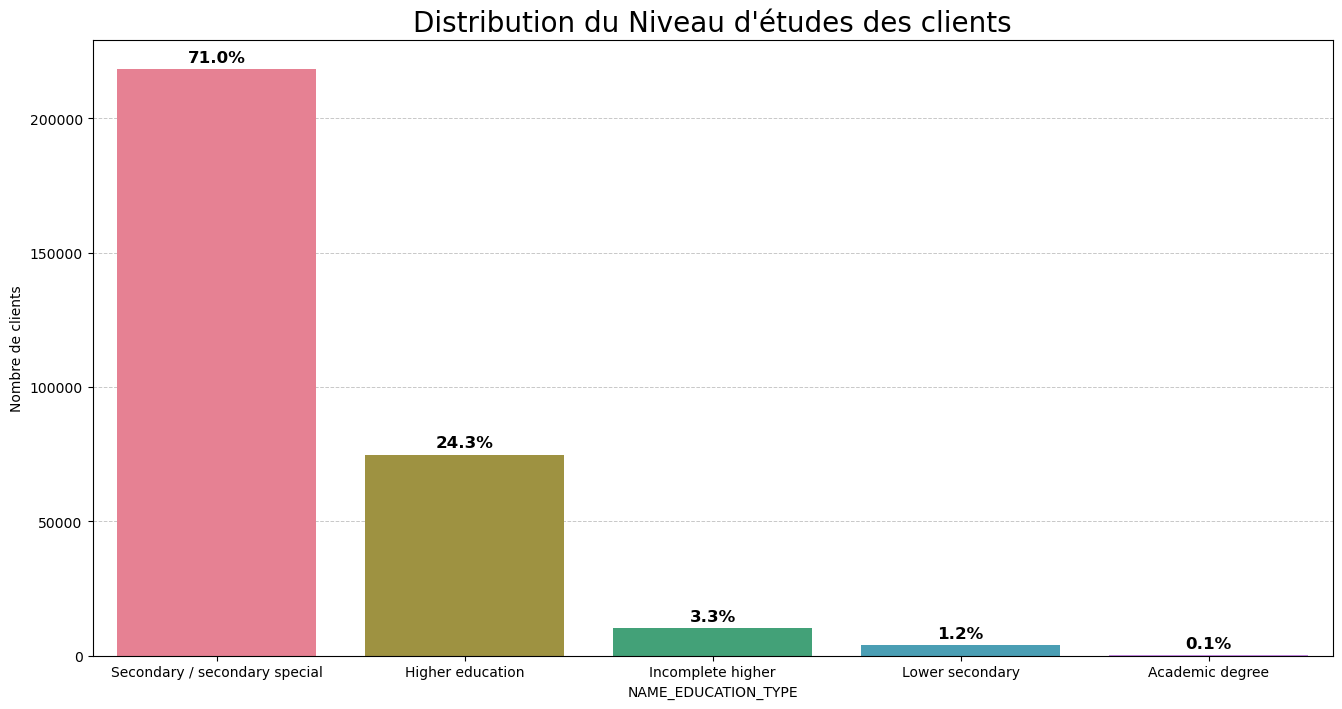

In [252]:
# Distribution des valeurs uniques
print(app_train['NAME_EDUCATION_TYPE'].value_counts())
plot_stat(app_train, 'NAME_EDUCATION_TYPE', 'Distribution du Niveau d\'études des clients', (16,8))
plt.show()

La majorité des clients possède un niveau d'études Secondaire/Secondaire avec spécialité, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

* ### *Pourcentage de TARGET=1 en fonction du Niveau d'études des clients*

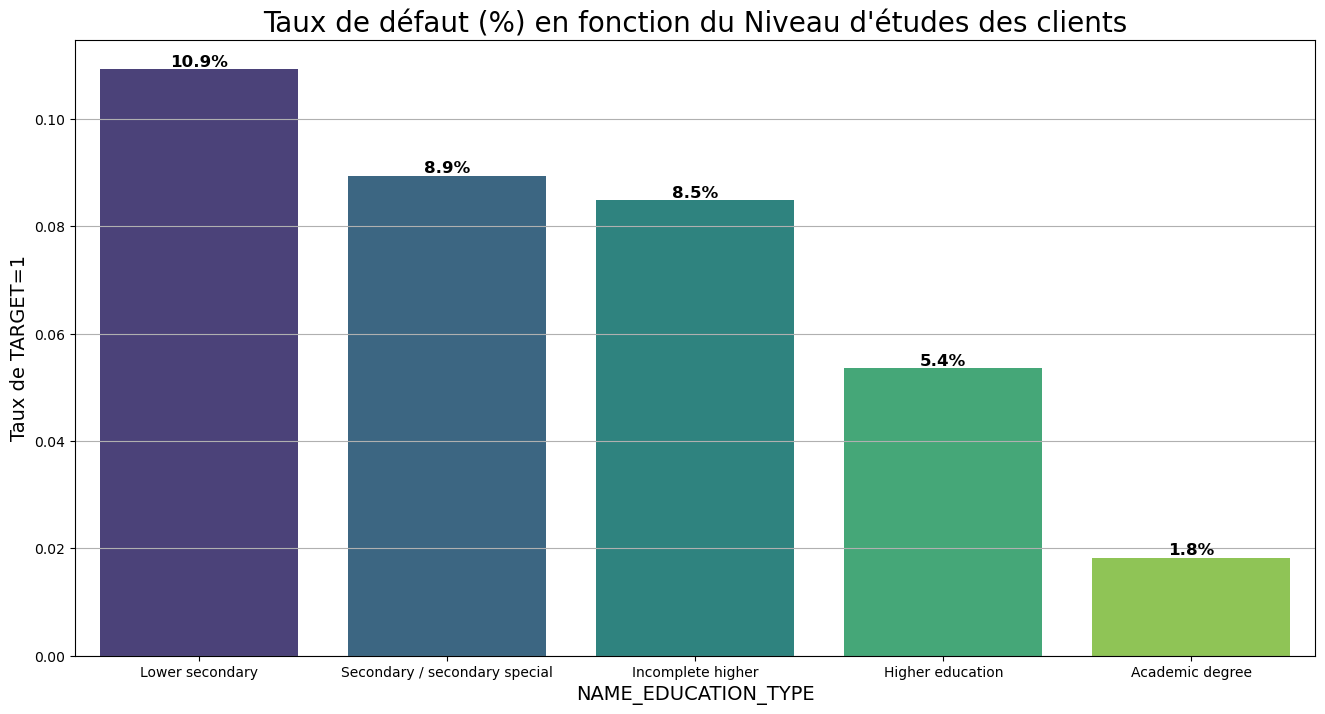

In [255]:
plot_percent_target1(app_train, 'NAME_EDUCATION_TYPE',"Taux de défaut (%) en fonction du Niveau d\'études des clients", (16,8))
plt.show()

Le premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

***

## 5.10. Inspection du Type de revenus

* ### **Type de revenuss "NAME_INCOME_TYPE"**

In [260]:
print(app_train['NAME_INCOME_TYPE'].describe())

count      307511
unique          8
top       Working
freq       158774
Name: NAME_INCOME_TYPE, dtype: object


* ### *Visualisation de la distribution*

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


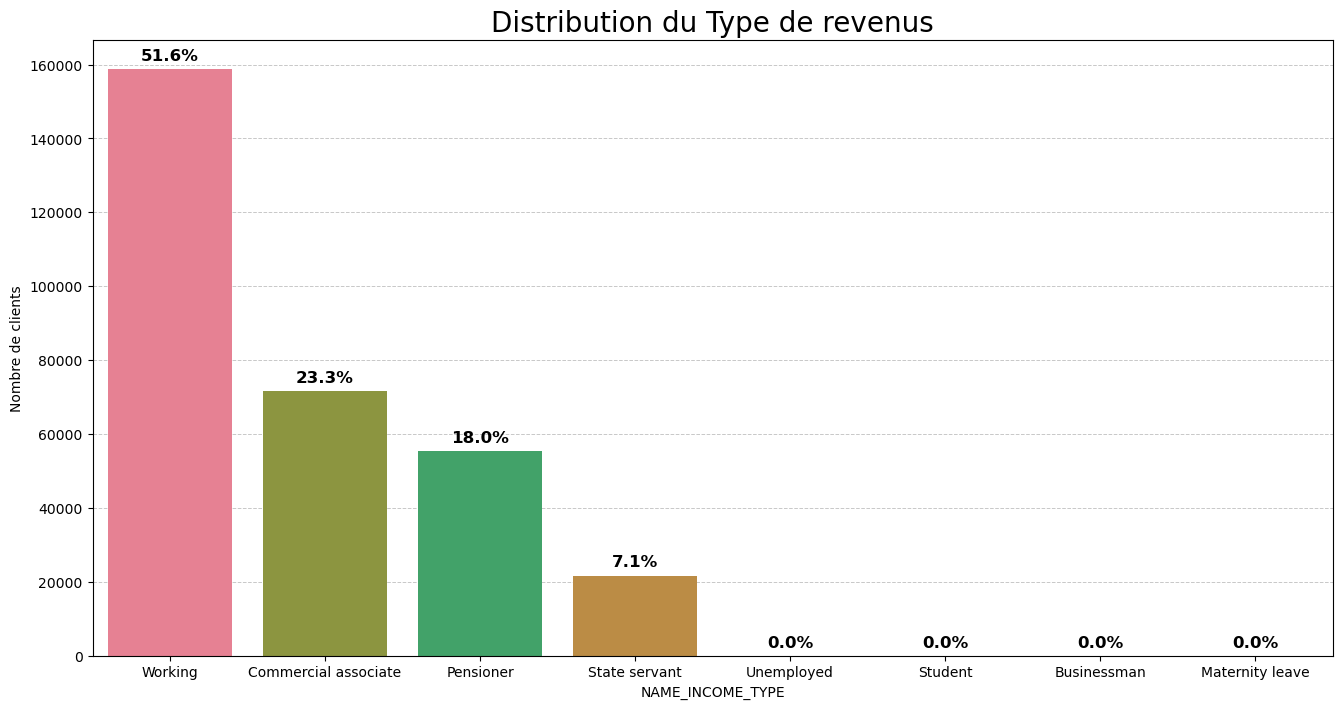

In [262]:
# Distribution des valeurs uniques
print(app_train['NAME_INCOME_TYPE'].value_counts())
plot_stat(app_train, 'NAME_INCOME_TYPE', 'Distribution du Type de revenus', (16,8))
plt.show()

La plupart des clients a un emploi. La plupart des clients ont des revenus de type travail, d'associé commercial, de retraite.

* ### *Pourcentage de TARGET=1 en fonction du Type de revenus*

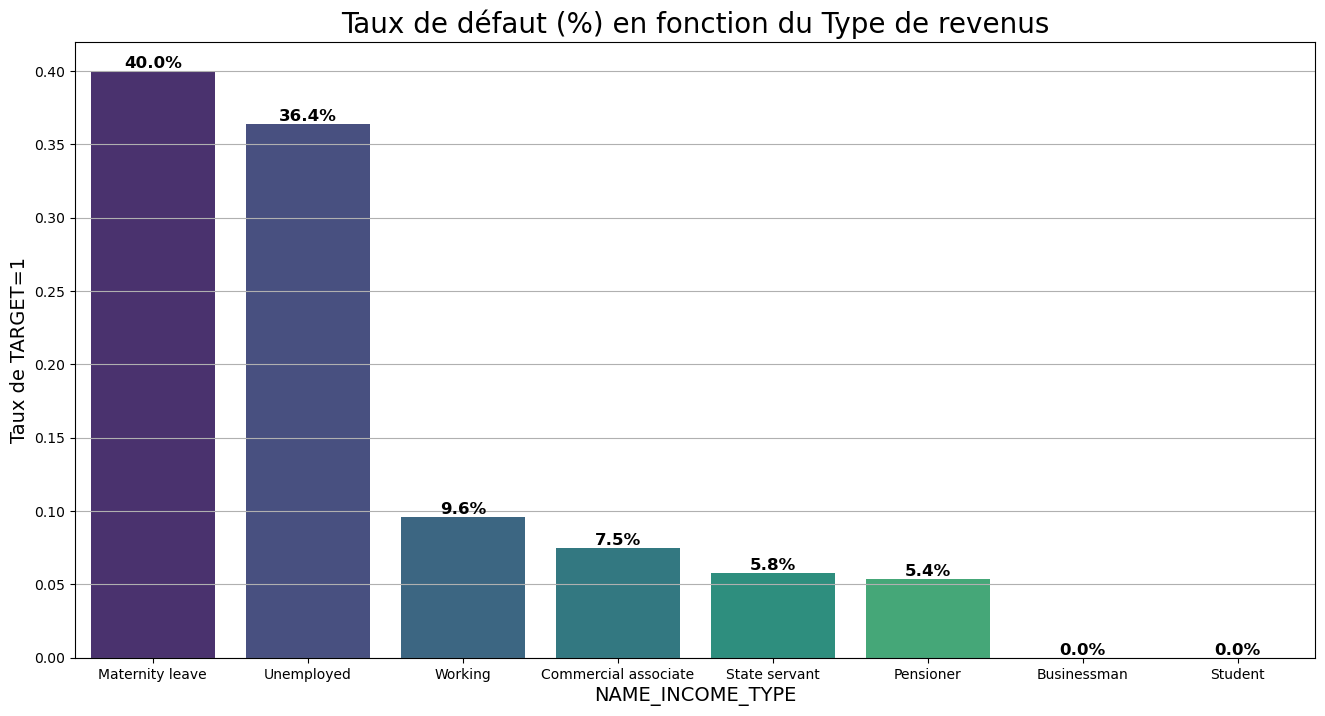

In [265]:
plot_percent_target1(app_train, 'NAME_INCOME_TYPE',"Taux de défaut (%) en fonction du Type de revenus", (16,8))
plt.show()

Les prêts sont non remboursés concernent majoritairement les clients qui ont des revenus de congé maternité et de chômage.

# __________________________________________________________________________________________

# 6. Corrélations <a id="Corrélations"></a>

## 6.1. Corrélations avec la variable cible
    * Pour identifier quelles variables numériques sont le plus corrélées positivement ou négativement avec la variable cible TARGET. Cela nous donnera une vision d'ensemble pour savoir sur quelles variables nous concentrer ensuite.

In [270]:
# Corrélations avec TARGET
correlations = app_train.corr(numeric_only=True)['TARGET'].sort_values()

print("Corrélations positives les plus fortes :\n", correlations.tail(10))
print("\n Corrélations négatives les plus fortes :\n", correlations.head(10))

Corrélations positives les plus fortes :
 REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

 Corrélations négatives les plus fortes :
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
AGE_YEARS                    -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
Name: TARGET, dtype: float64


La corrélation la plus forte avec la TARGET est celle de la variable 'DAYS_BIRTH'. 

Nous allons calculer sa corrélation (en âge réel) avec la TARGET pour confirmer l'importance de l'âge.

In [272]:
# Find the correlation of the positive days since birth and target
#app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
#app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

#OU
app_train['AGE_YEARS'].corr(app_train['TARGET'])

-0.07823930830982713

Au fur et à mesure que le client vieillit, il existe une relation linéaire négative avec l'objectif, ce qui signifie que plus les clients vieillissent, plus ils ont tendance à rembourser leurs prêts dans les délais.

On trouve une corrélation négative, entre la taget et l'âge des clients. Plus le client est âgé moins la probabilité de défaut de paiement est haute.

* ### **Visualisation de l'âge et du défaut de paiment (TARGET)**
    * Pour visualiser le lien entre l’âge et la TARGET : distribution de la probabilité de défaut de paiment selon l’âge.

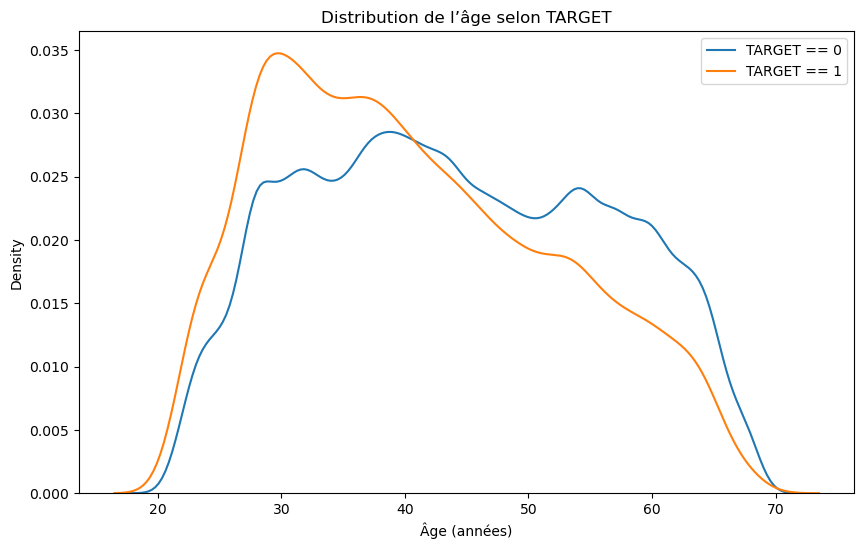

In [275]:
# KDE (courbes de densité)
plt.figure(figsize=(10, 6))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AGE_YEARS'], label='TARGET == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AGE_YEARS'], label='TARGET == 1')
plt.title('Distribution de l’âge selon TARGET')
plt.xlabel('Âge (années)')
plt.legend()
plt.show()

La courbe de la TARGET == 1 penche vers l'extrémité la plus jeune de la fourchette, ce qui signifierai que les personnes jeunes ont plus de mal à rembourser. Cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible.

***

* ### **Découpage en tranches d'âge et taux de défaut moyen**
* On fait un Binning (discrétisation) de l'âge.
* Pour simplifier l'analyse, nous transformons l'âge (variable continue) en tranches d'âge (variable catégorielle).  
Cela permet de mieux observer les tendances générales entre âge et risque de défaut (TARGET).
Nous allons appliquer un binning sur l'âge entre 20 et 70 ans, en créant 10 tranches égales de 5 ans chacune, via `pd.cut`

* Image mentale :
Imagine que ta variable continue est un long ruban de chiffres.
Binner, c'est couper ce ruban en morceaux, puis analyser chaque morceau séparément !

In [279]:
# Age information into a separate dataframe
age_data = app_train[['TARGET',  'DAYS_BIRTH', 'AGE_YEARS']].copy()

# Bin the age data (plus besoin de recalculer à partir de DAYS_BIRTH)
age_data['AGE_BINNED'] = pd.cut(age_data['AGE_YEARS'], bins=np.linspace(20, 70, num=11))

# Afficher les 10 premières lignes
age_data.head(10)

TARGET  DAYS_BIRTH  AGE_YEARS    AGE_BINNED
0       1       -9461  25.920548  (25.0, 30.0]
1       0      -16765  45.931507  (45.0, 50.0]
2       0      -19046  52.180822  (50.0, 55.0]
3       0      -19005  52.068493  (50.0, 55.0]
4       0      -19932  54.608219  (50.0, 55.0]
5       0      -16941  46.413699  (45.0, 50.0]
6       0      -13778  37.747945  (35.0, 40.0]
7       0      -18850  51.643836  (50.0, 55.0]
8       0      -20099  55.065753  (55.0, 60.0]
9       0      -14469  39.641096  (35.0, 40.0]

Nous allons ensuite regrouper (groupby) par tranche d'âge, pour calculer :

* La moyenne de TARGET (c'est-à-dire le taux de défaut par tranche), pour voir :
    * Quels groupes d'âge ont plus de défauts de paiement,
    * À partir de quel âge la situation s'améliore ou se dégrade.

* La moyenne de AGE_YEARS (logiquement le centre de la tranche).

In [281]:
# On regroupe par tranche crée
age_groups = age_data.groupby('AGE_BINNED', observed=False).mean()
age_groups

TARGET    DAYS_BIRTH  AGE_YEARS
AGE_BINNED                                     
(20.0, 25.0]  0.123036  -8532.795625  23.377522
(25.0, 30.0]  0.111436 -10155.219250  27.822518
(30.0, 35.0]  0.102814 -11854.848377  32.479037
(35.0, 40.0]  0.089414 -13707.908253  37.555913
(40.0, 45.0]  0.078491 -15497.661233  42.459346
(45.0, 50.0]  0.074171 -17323.900441  47.462741
(50.0, 55.0]  0.066968 -19196.494791  52.593136
(55.0, 60.0]  0.055314 -20984.262742  57.491131
(60.0, 65.0]  0.052737 -22780.547460  62.412459
(65.0, 70.0]  0.037270 -24292.614340  66.555108

Ce que cette analyse montre :

Plus les gens sont jeunes, plus ils ont tendance à faire défaut.

Plus l'âge augmente, plus le taux de défaut diminue.

La tendance est très nette et progressive.

C’est un insight métier très fort dans le contexte d'une analyse de crédit !

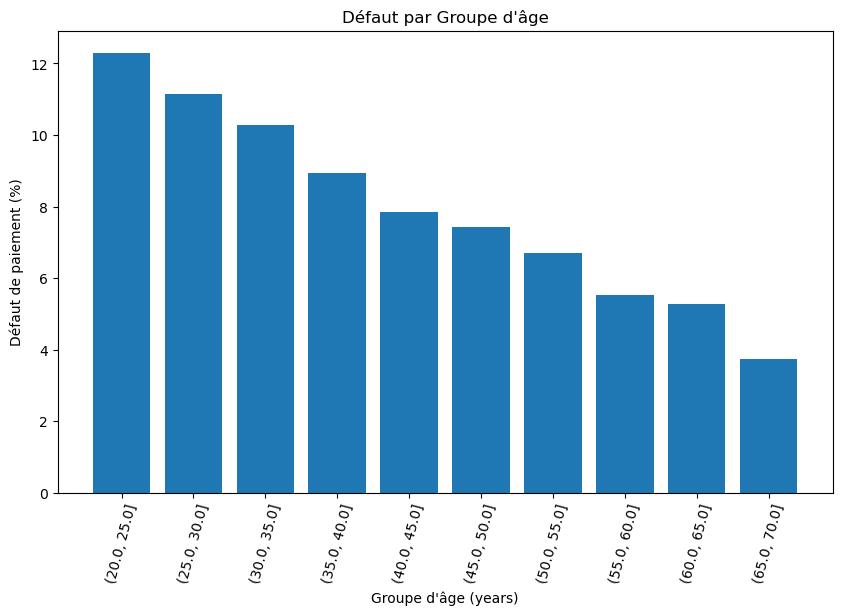

In [283]:
plt.figure(figsize = (10, 6))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); 
plt.xlabel('Groupe d\'âge (years)'); 
plt.ylabel('Défaut de paiement (%)')
plt.title('Défaut par Groupe d\'âge');
plt.show()

Les clients les plus jeunes sont plus susceptibles à ne pas rembourser le prêt.

***

## 6.2. Sources extérieures, les plus fortes corrélations linéaires
* Ces 3 variables (EXT_SOURCE) présentant les corrélations négatives les plus fortes avec la Target. EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 sont connues pour être des scores de risque externe très informatifs dans Home Credit.

In [287]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919    0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846   -0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167   -0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000   -0.205478
DAYS_BIRTH    0.078239     -0.600610     -0.091996     -0.205478    1.000000

* ### **Heatmap des corrélations : pour confirmer leur lien fort avec TARGET**

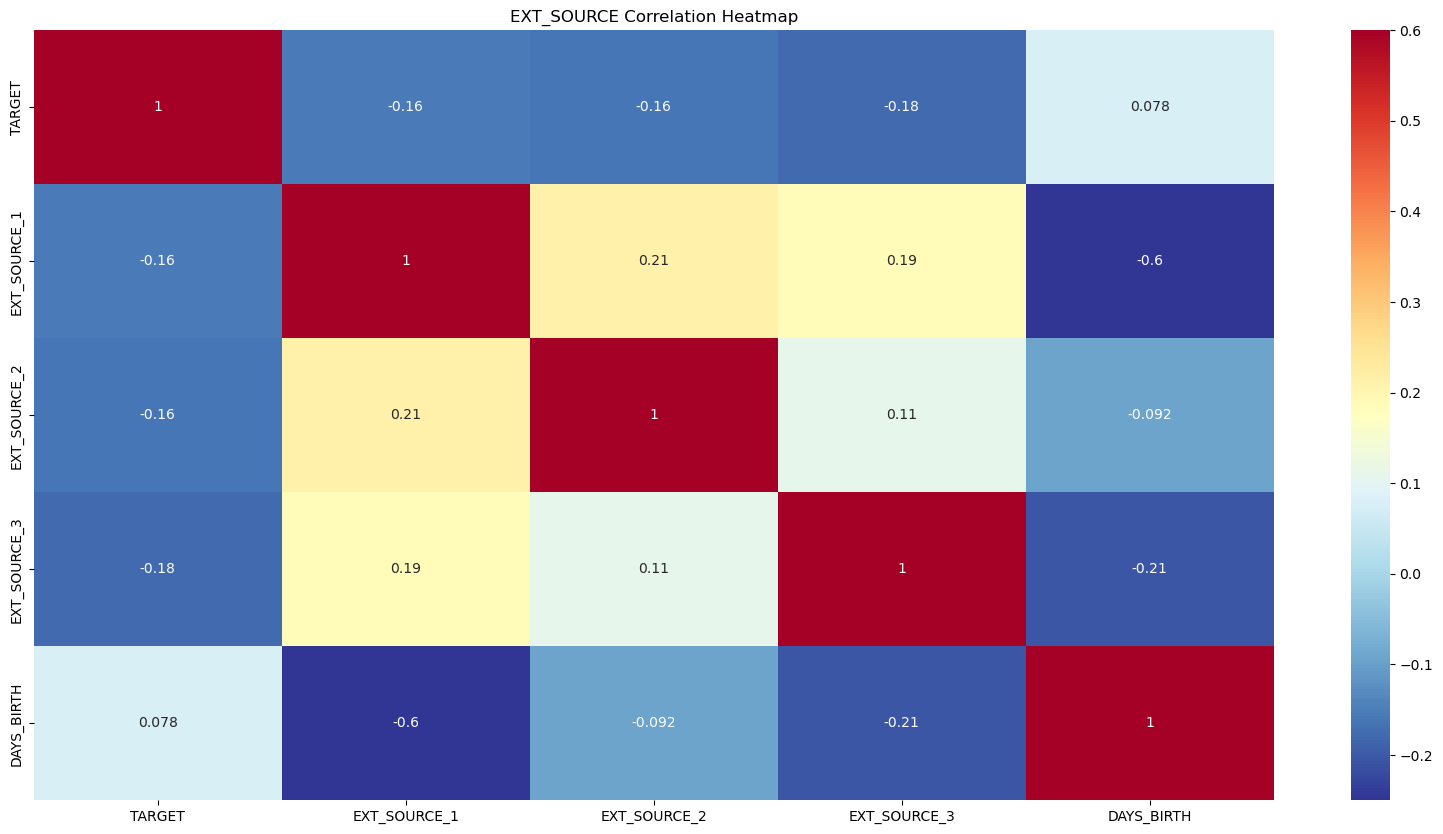

In [289]:
#Heatmap of correlations
plt.figure(figsize = (20,10))
sns.heatmap(app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
show()

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique que plus la valeur de l'EXT_SOURCE augmente, plus le client est susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec les EXT_SOURCE, ce qui indique que l'un des facteurs de ces scores est peut-être l'âge du client.

* ### **Visualisation des distributions : pour voir comment elles changent selon que TARGET=0 ou TARGET=1**

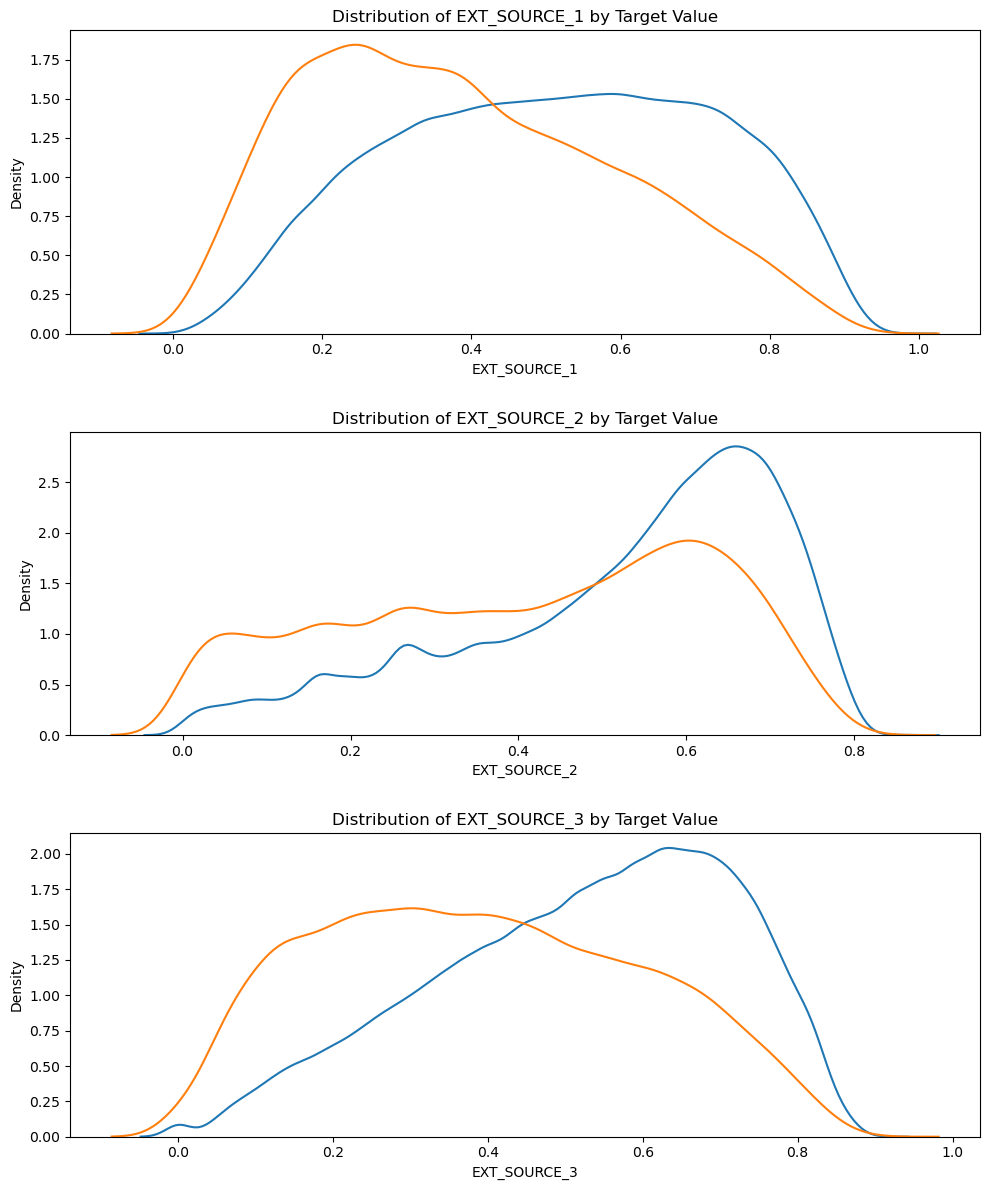

In [292]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
plt.show()

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte (en fait, elles sont toutes considérées comme très faibles), mais ces variables seront toujours utiles pour un modèle d'apprentissage automatique permettant de prédire si un demandeur remboursera ou non un prêt à temps.

***

## 6.3. Pairs Plot des variables EXT_SOURCE et de la variable DAYS_BIRTH

Comme graphique exploratoire final, nous pouvons faire un graphique par paires des variables EXT_SOURCE et de la variable DAYS_BIRTH. Le graphique des paires est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables uniques. Ici, nous utilisons la bibliothèque de visualisation seaborn et la fonction PairGrid pour créer un graphique de paires avec des nuages de points sur le triangle supérieur, des histogrammes sur la diagonale et des graphiques de densité de noyau 2D et des coefficients de corrélation sur le triangle inférieur. 

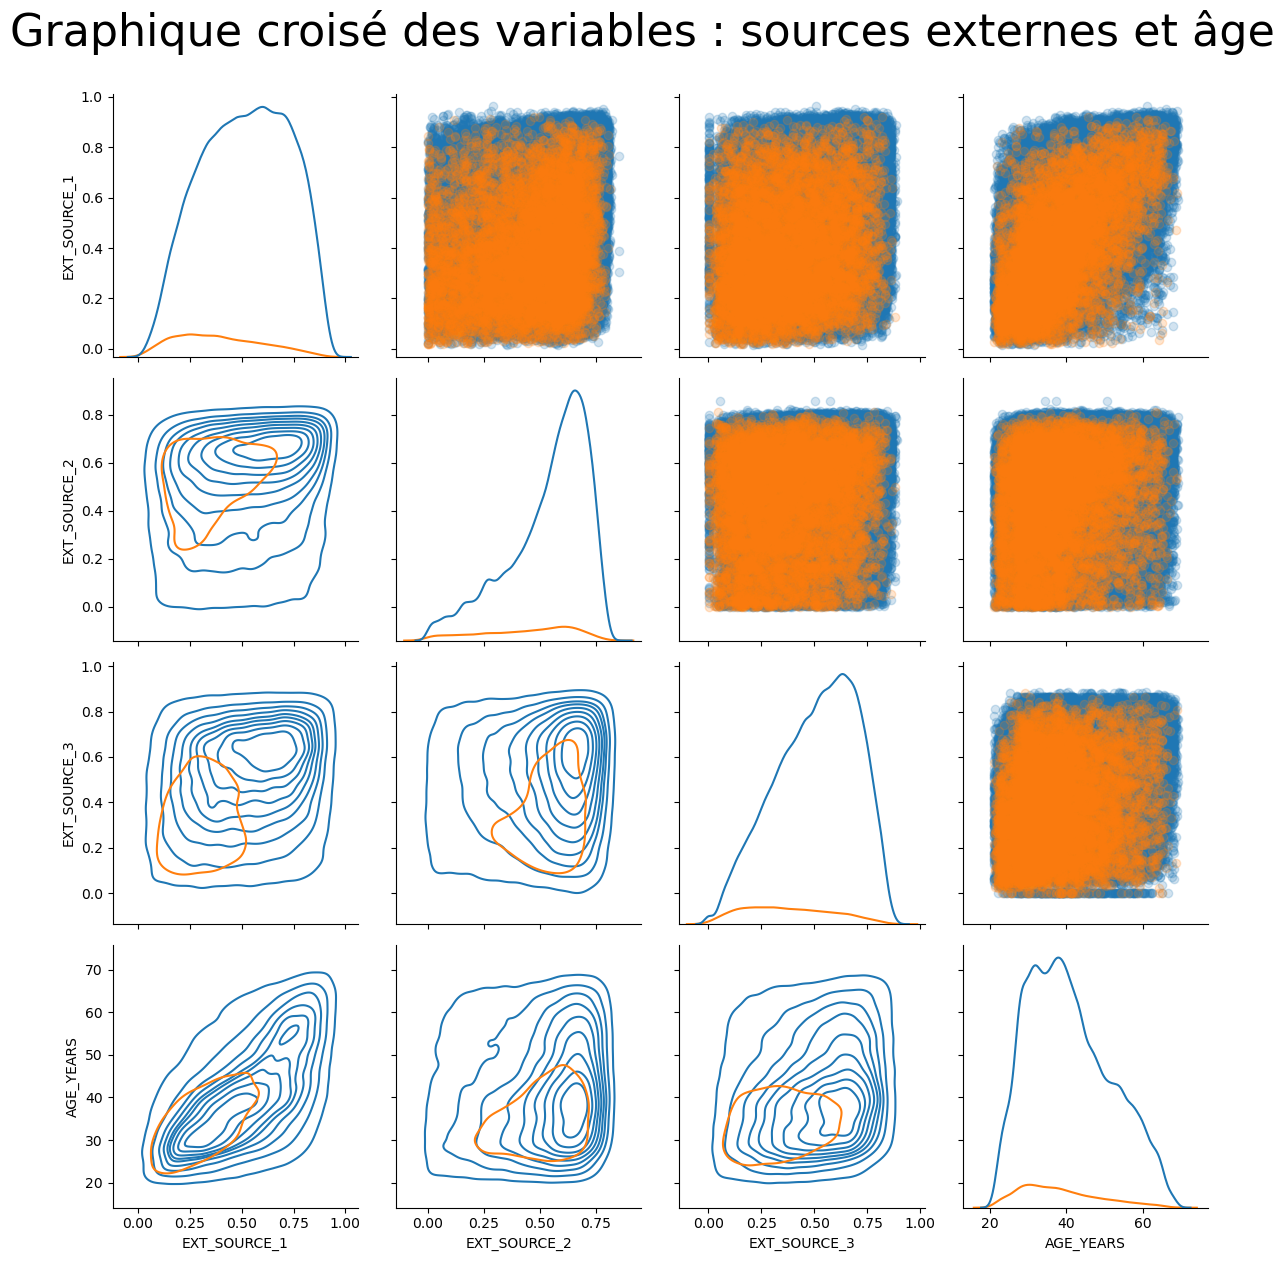

In [297]:
# On crée une copie des données en supprimant la colonne 'DAYS_BIRTH'
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# On ajoute l'âge du client en années à partir du dataframe age_data
plot_data['AGE_YEARS'] = age_data['AGE_YEARS']

# On supprime les valeurs manquantes et on limite aux 100 000 premières lignes
plot_data = plot_data.dropna().iloc[:100000, :]

# Fonction pour calculer le coefficient de corrélation entre deux variables
# et l'afficher sur le graphique
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]  # Calcul du coefficient de corrélation
    ax = plt.gca()  # Récupère l'axe courant
    ax.annotate("r = {:.2f}".format(r),  # Affiche la corrélation sur le graphique
                xy=(.2, .8), xycoords=ax.transAxes,
                size=20)

# Création d'un objet PairGrid pour tracer les relations entre variables
grid = sns.PairGrid(data=plot_data, height=3, diag_sharey=False,
                    hue='TARGET',  # On colore selon la variable 'TARGET'
                    vars=[x for x in plot_data.columns if x != 'TARGET'])  # Toutes les colonnes sauf 'TARGET'

# Tracé des nuages de points dans la partie supérieure de la matrice
grid.map_upper(plt.scatter, alpha=0.2)

# Tracé des distributions (kde) sur la diagonale
grid.map_diag(sns.kdeplot)

# Tracé des courbes de densité dans la partie inférieure
grid.map_lower(sns.kdeplot)

# Titre général du graphique
plt.suptitle('Graphique croisé des variables : sources externes et âge', size=32, y=1.05)

# Affichage du graphique
plt.show()

***

## 6.4. Fonctions générales de visualisation
La fonction `plot_distribution` est parfaitement adaptée pour industrialiser la visualisation KDE de n'importe quelle variable en fonction de TARGET.

In [300]:
#Plot distribution of one feature
def plot_distribution(dataframe, feature, title, size):
    plt.figure(figsize=size)

    t0 = dataframe.loc[dataframe['TARGET'] == 0]
    t1 = dataframe.loc[dataframe['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show()

Ensuite utilisons la fonction sur :
* AMT_CREDIT (montant crédité)
* AMT_ANNUITY (annuité à payer)
* AMT_GOODS_PRICE (valeur des biens financés)
* DAYS_REGISTRATION (depuis combien de temps ils sont enregistrés)

Pour comprendre si ces variables ont un pouvoir discriminant pour prédire TARGET.

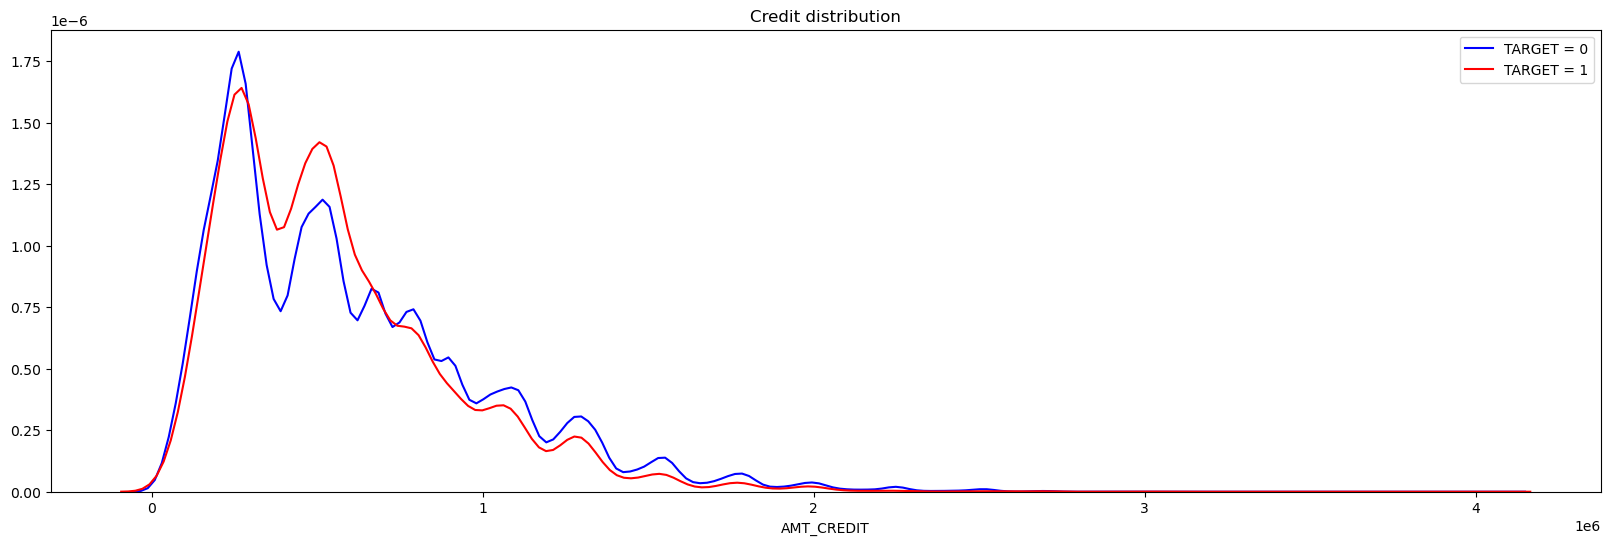

                                   -------------------------------------------------------


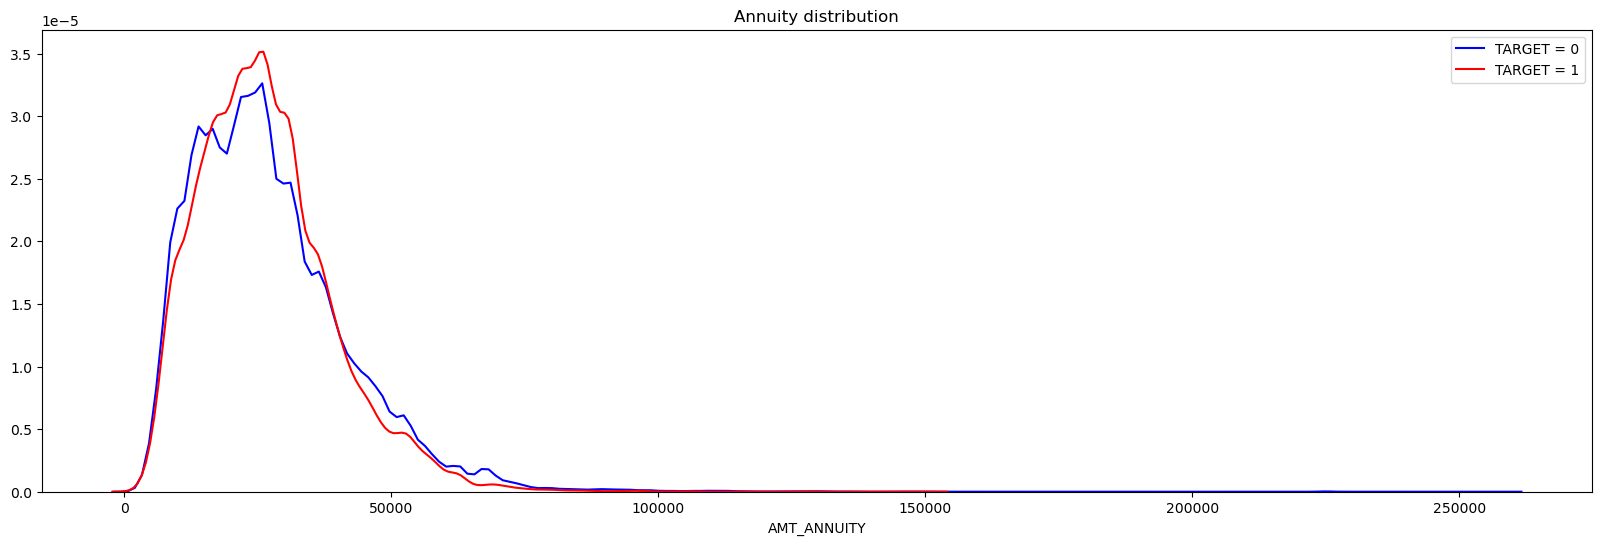

                                   -------------------------------------------------------


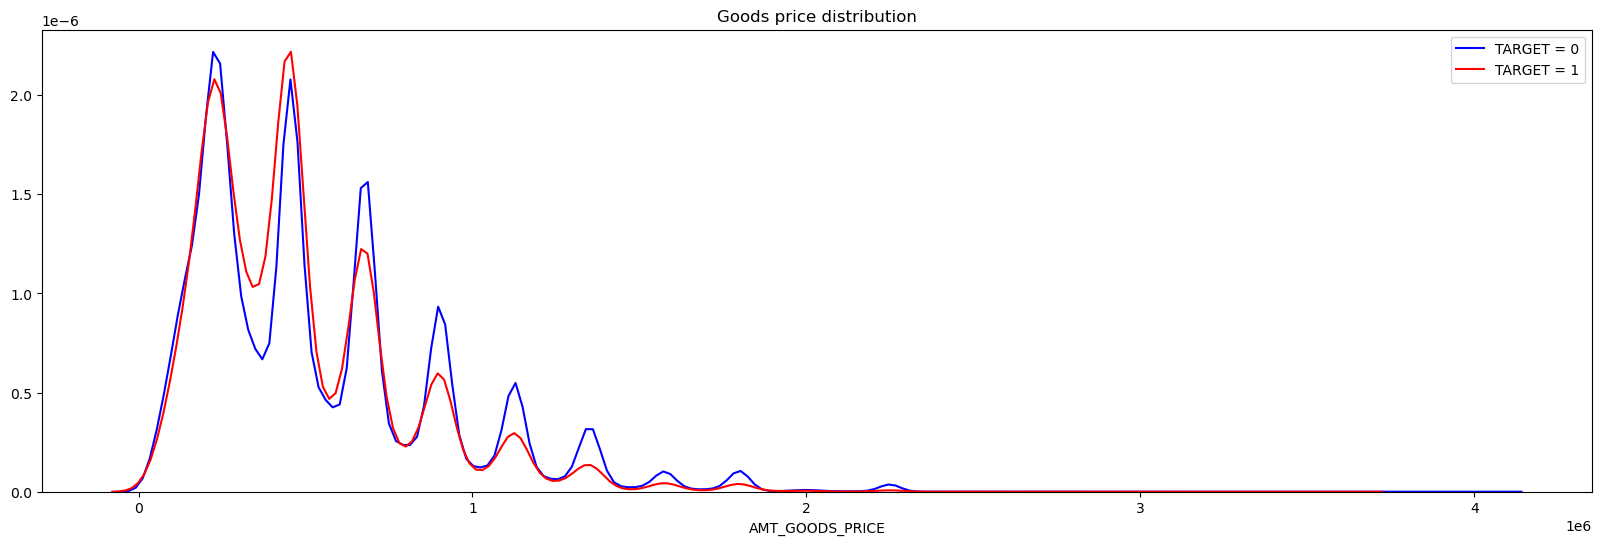

                                   -------------------------------------------------------


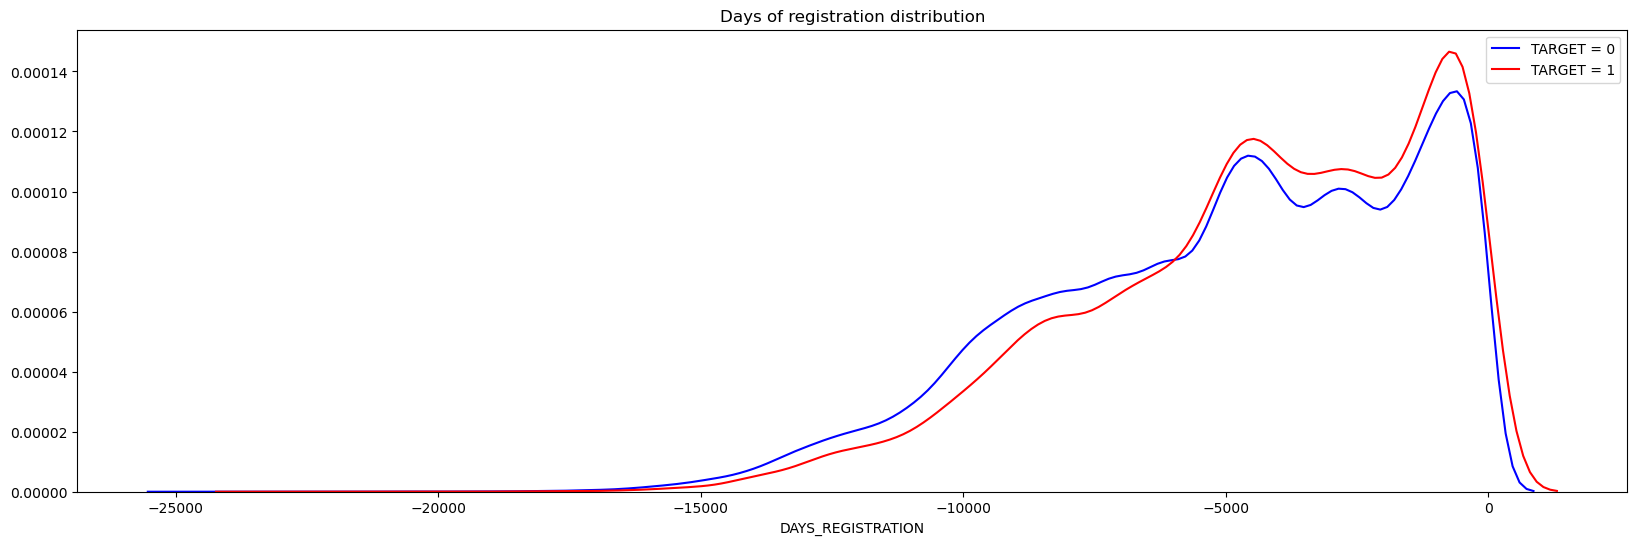

In [302]:
plot_distribution(app_train, 'AMT_CREDIT', "Credit distribution", (20,6))
print("                                   -------------------------------------------------------")
plot_distribution(app_train,'AMT_ANNUITY', "Annuity distribution", (20,6))
print("                                   -------------------------------------------------------")
plot_distribution(app_train,'AMT_GOODS_PRICE', "Goods price distribution", (20,6))
print("                                   -------------------------------------------------------")
plot_distribution(app_train,'DAYS_REGISTRATION', "Days of registration distribution", (20,6))

# __________________________________________________________________________________________

# 7. Merging et agrégations des données <a id="Merging-et-agrégations-des-données"></a>

## 7.1. Fusion des datasets et premières Features engineering

* ### **EDA bureau.csv + Fusion avec app_train**

* Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). 

* Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train et app_test, aux données du bureau.

* Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [308]:
# Affichage des premières lignes du DataFrame "bureau"
print("Shape Bureau:", bureau.shape)
bureau.head()

Shape Bureau: (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [309]:
# Fusion application_train avec bureau
app_bureau_train = app_train.merge(bureau, on='SK_ID_CURR', how='inner')

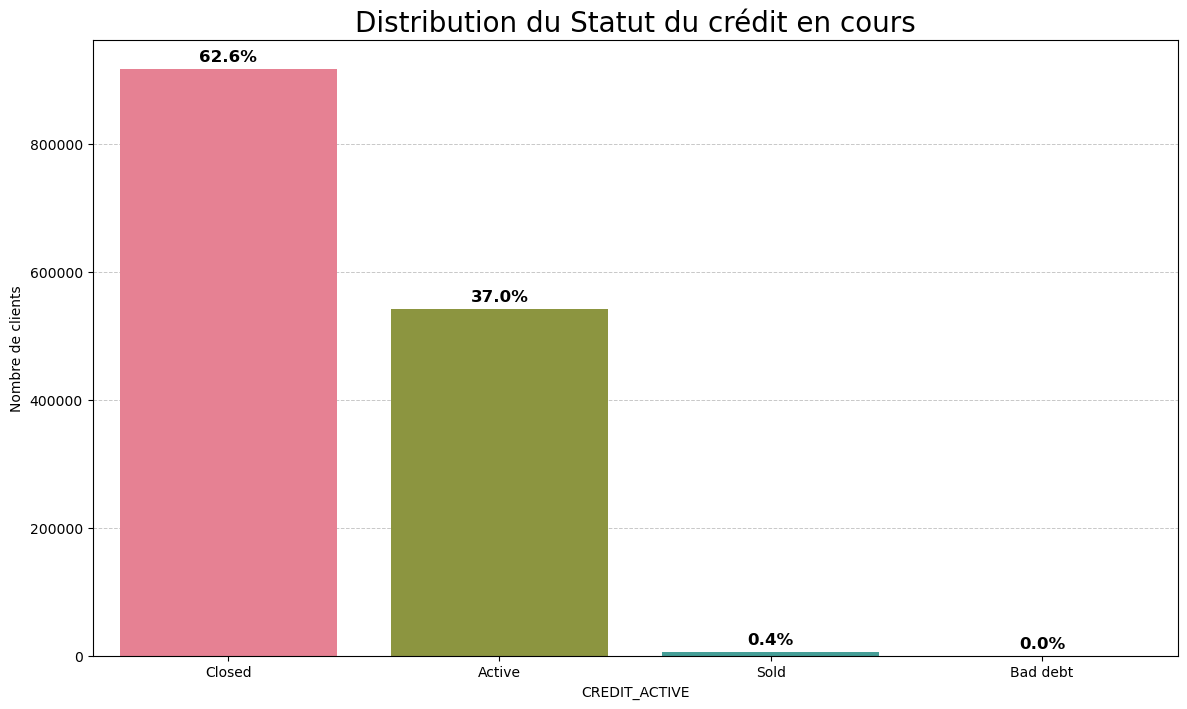

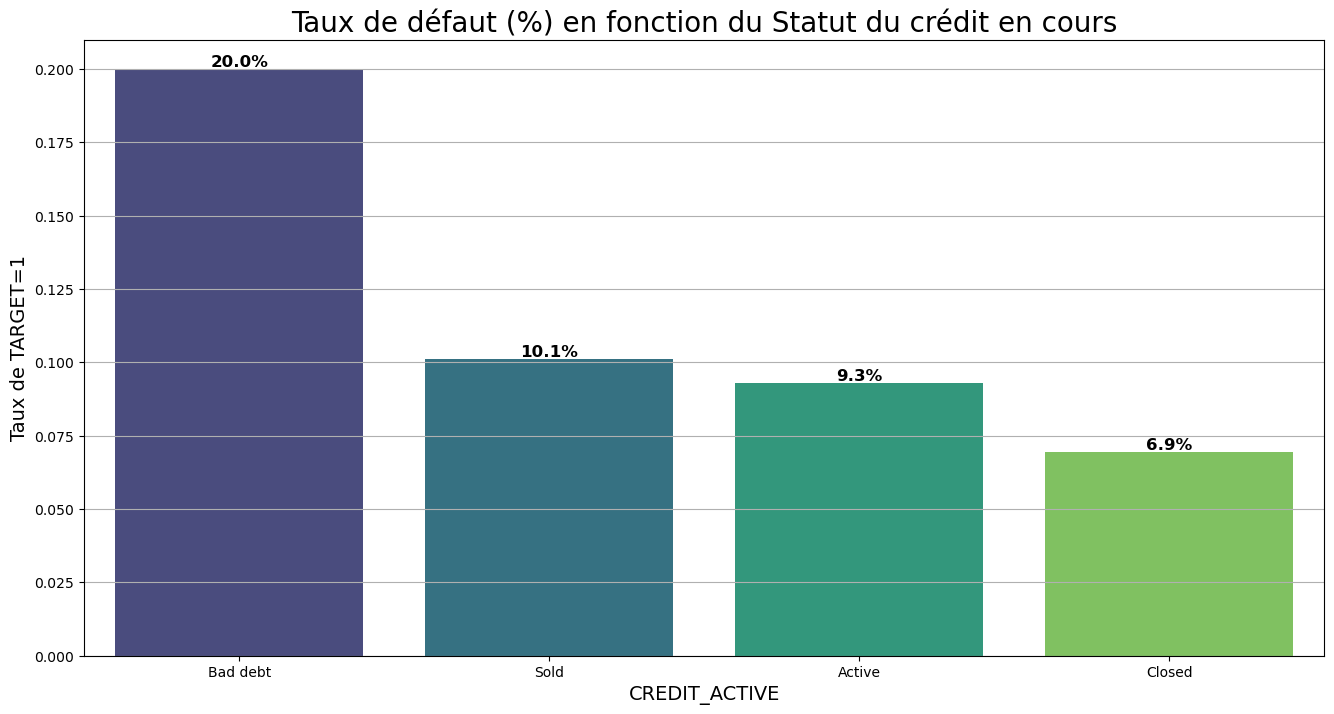

In [310]:
# Visualisation de la distribution de CREDIT_ACTIVE
plot_stat(app_bureau_train, 'CREDIT_ACTIVE', "Distribution du Statut du crédit en cours")
plot_percent_target1(app_bureau_train, 'CREDIT_ACTIVE', "Taux de défaut (%) en fonction du Statut du crédit en cours", (16,8))
plt.show()

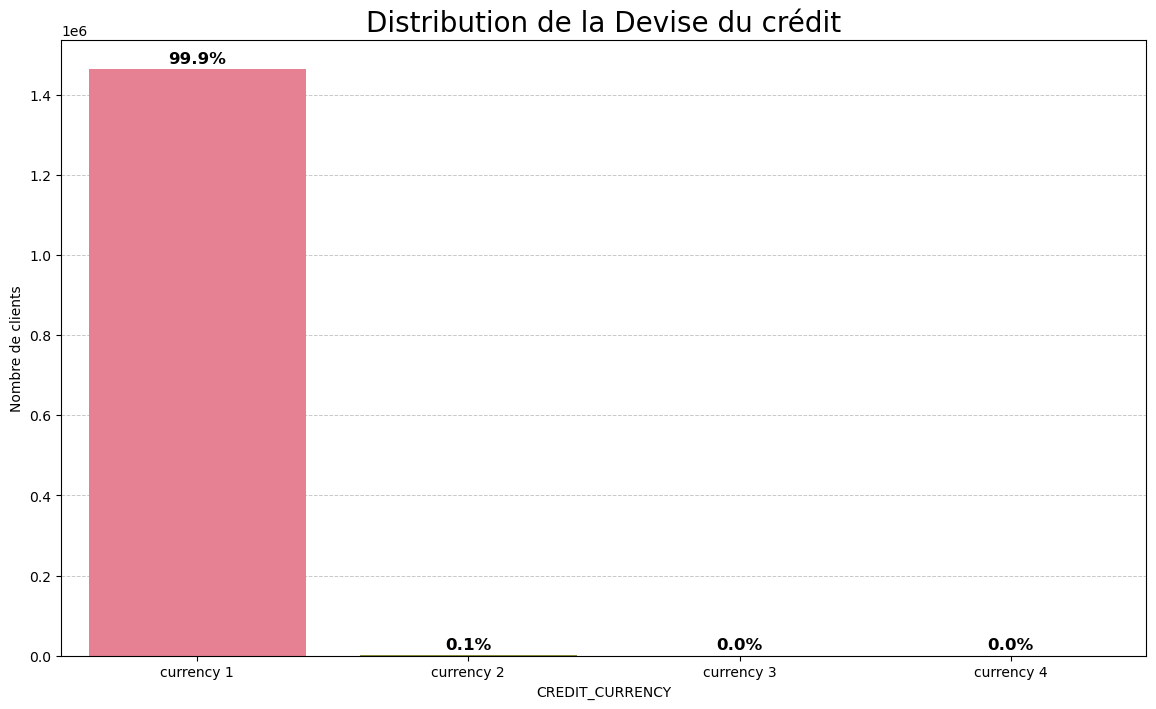

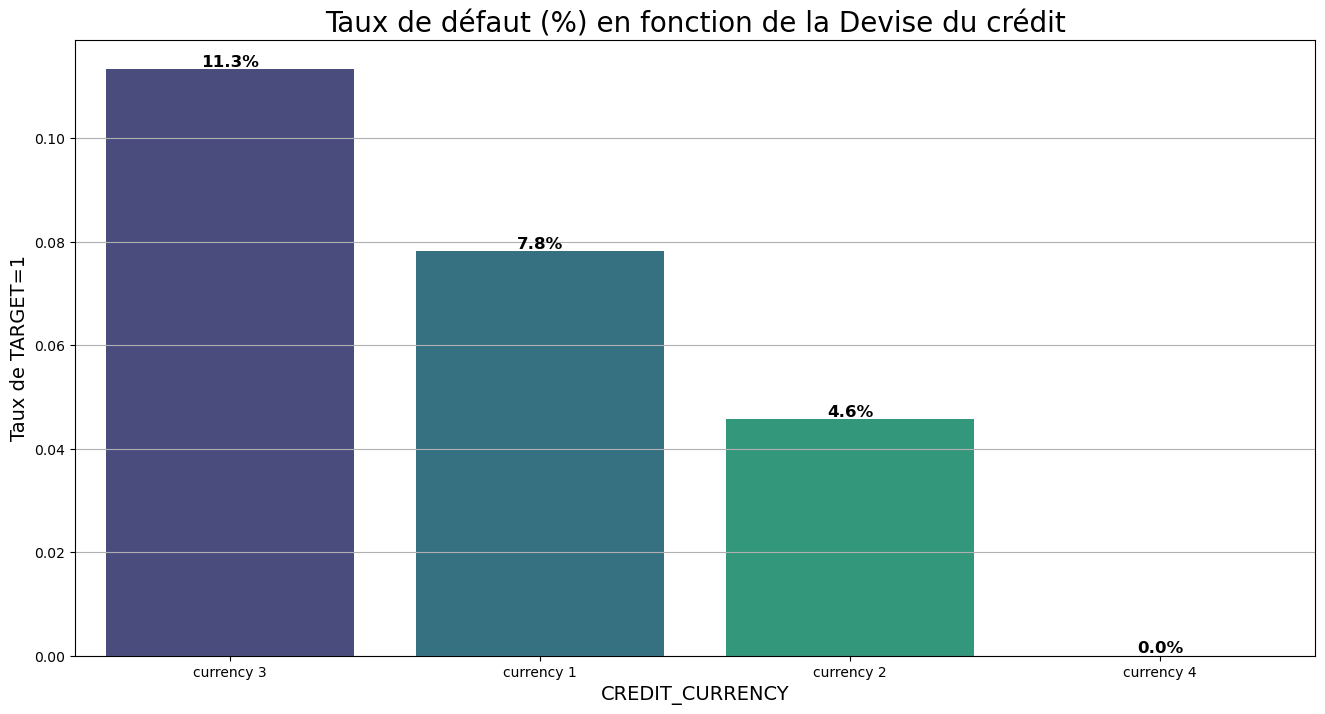

In [311]:
# Visualisation de la distribution de CREDIT_CURRENCY
plot_stat(app_bureau_train, 'CREDIT_CURRENCY', "Distribution de la Devise du crédit")
plot_percent_target1(app_bureau_train, 'CREDIT_CURRENCY', "Taux de défaut (%) en fonction de la Devise du crédit", (16,8))
plt.show()

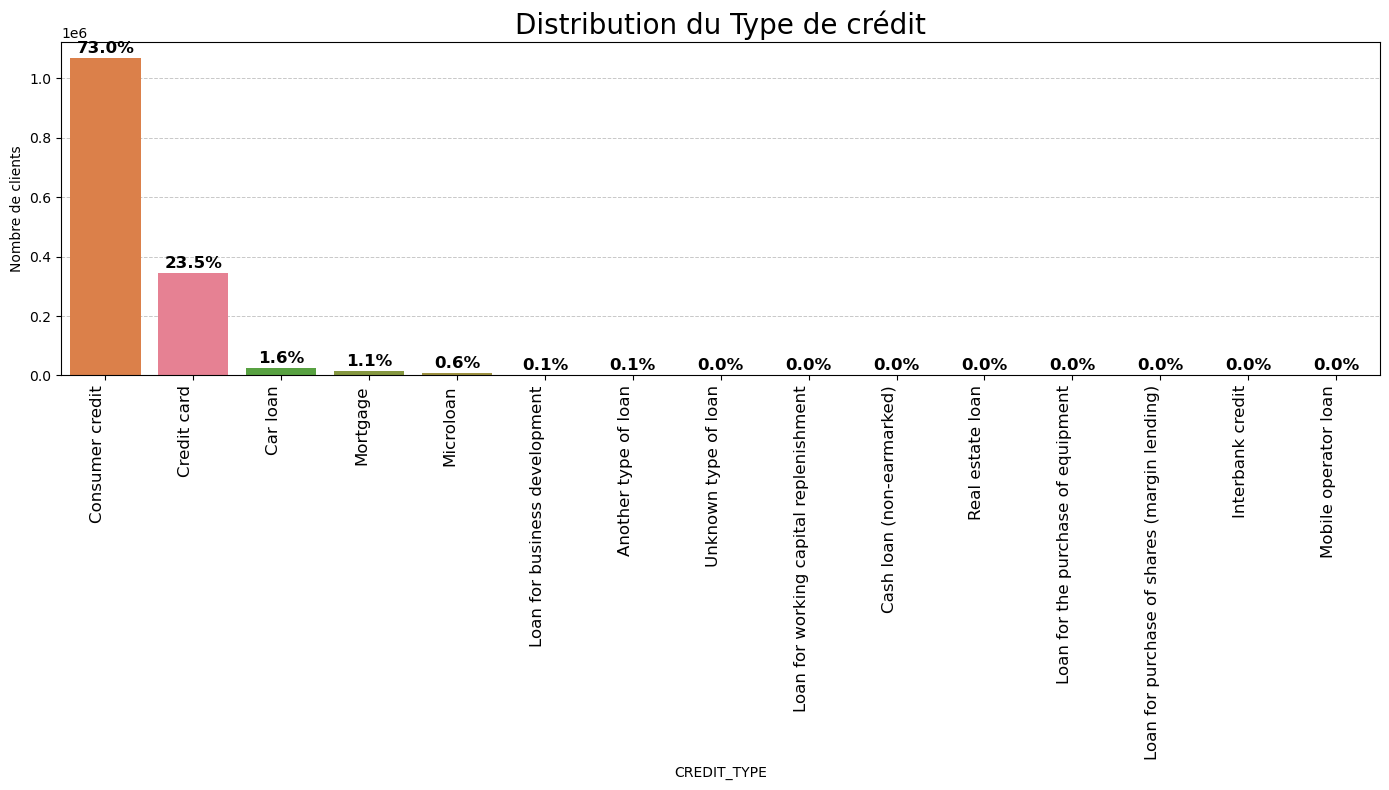

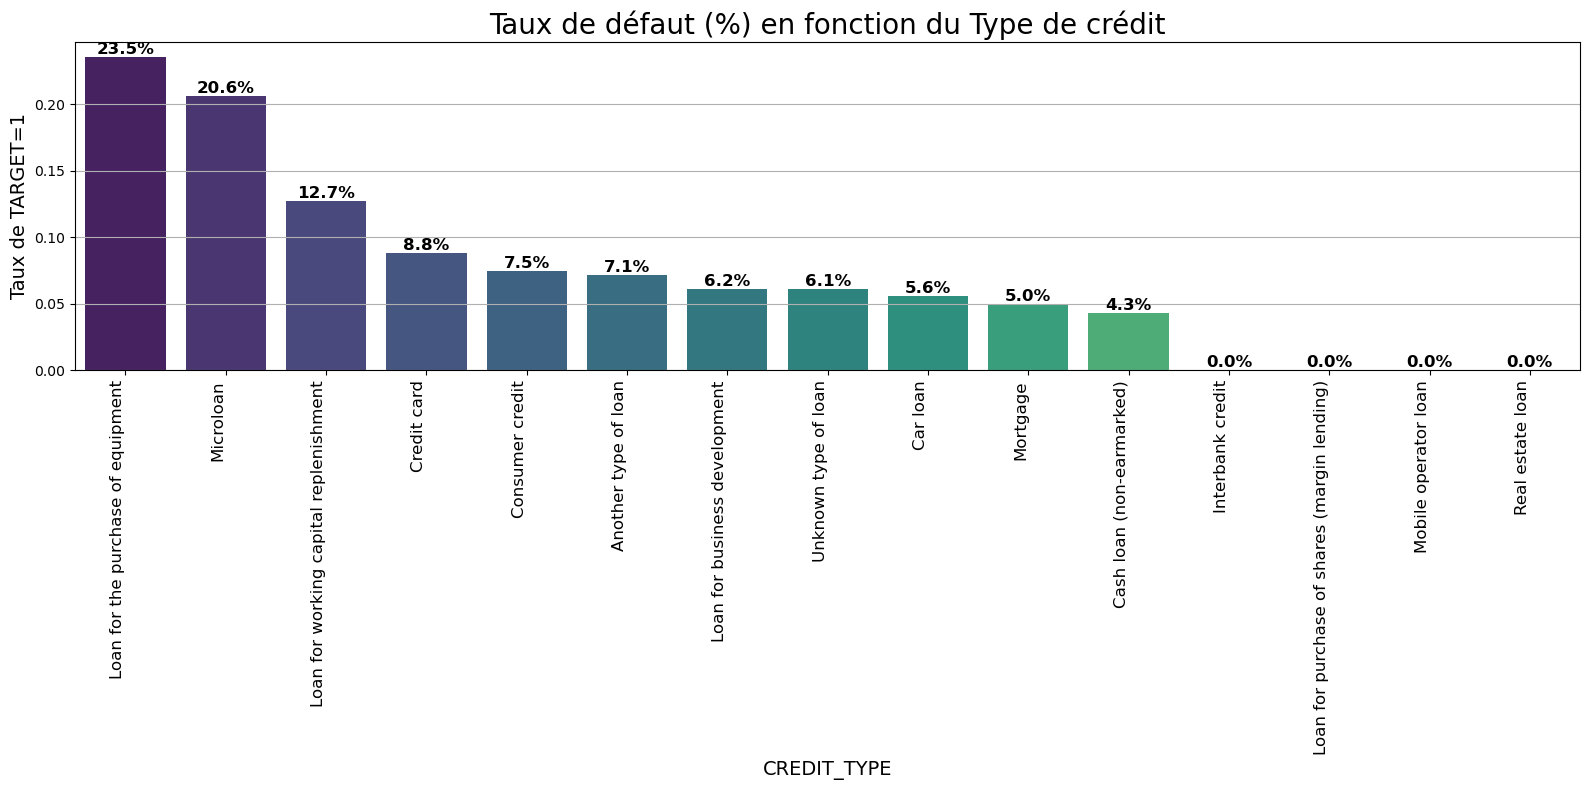

In [312]:
# Visualisation de la distribution de CREDIT_TYPE
plot_stat(app_bureau_train, 'CREDIT_TYPE', "Distribution du Type de crédit")
# Affichage modalités à 90°    
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

plot_percent_target1(app_bureau_train, 'CREDIT_TYPE', "Taux de défaut (%) en fonction du Type de crédit", (16,8))
# Affichage modalités à 90°    
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

***

* ### **EDA previous_application.csv + Fusion avec app_train**

In [315]:
# Affichage des premières lignes du DataFrame "previous_application"
print("Shape Previous application:", previous_application.shape)
previous_application.head()

Shape Previous application: (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [316]:
# Affiche les colonnes contenant la valeur "XNA" dans "previous_application"
for col in previous_application.columns:
     if previous_application[col].dtype == 'object':
         if 'XNA' in previous_application[col].unique():
             print(f'"XNA" trouvé dans la colonne : {col} (Nombre : {sum(previous_application[col] == "XNA")})')

"XNA" trouvé dans la colonne : NAME_CONTRACT_TYPE (Nombre : 346)
"XNA" trouvé dans la colonne : NAME_CASH_LOAN_PURPOSE (Nombre : 677918)
"XNA" trouvé dans la colonne : NAME_PAYMENT_TYPE (Nombre : 627384)
"XNA" trouvé dans la colonne : CODE_REJECT_REASON (Nombre : 5244)
"XNA" trouvé dans la colonne : NAME_CLIENT_TYPE (Nombre : 1941)
"XNA" trouvé dans la colonne : NAME_GOODS_CATEGORY (Nombre : 950809)
"XNA" trouvé dans la colonne : NAME_PORTFOLIO (Nombre : 372230)
"XNA" trouvé dans la colonne : NAME_PRODUCT_TYPE (Nombre : 1063666)
"XNA" trouvé dans la colonne : NAME_SELLER_INDUSTRY (Nombre : 855720)
"XNA" trouvé dans la colonne : NAME_YIELD_GROUP (Nombre : 517215)


* Nous retrouvons ici la notation XNA qui doit être remplacée par 'NaN'.

In [318]:
# Remplacement dans ************
#app_train['************'] = app_train['***********'].replace('XNA', 'np.nan')
#app_test['*************'] = app_test['************'].replace('XNA', 'np.nan')

In [319]:
# Fusion application_train avec previous_application
application_prev_train = app_train.merge(previous_application, on='SK_ID_CURR', how='inner')

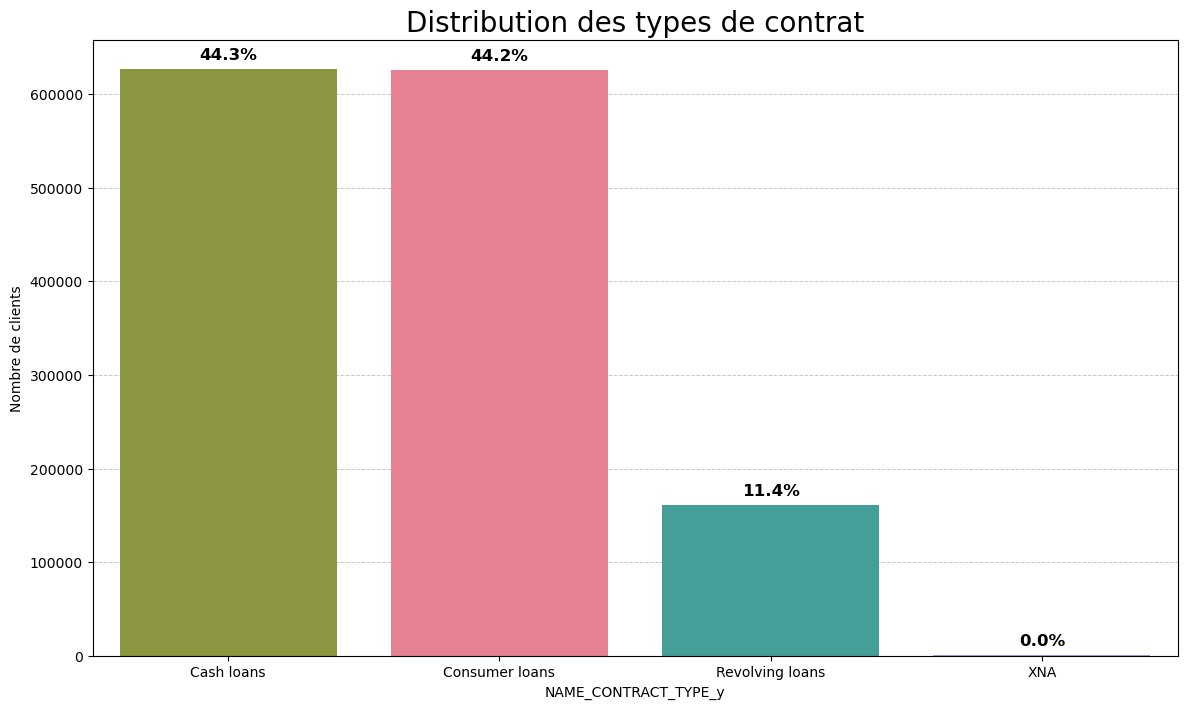

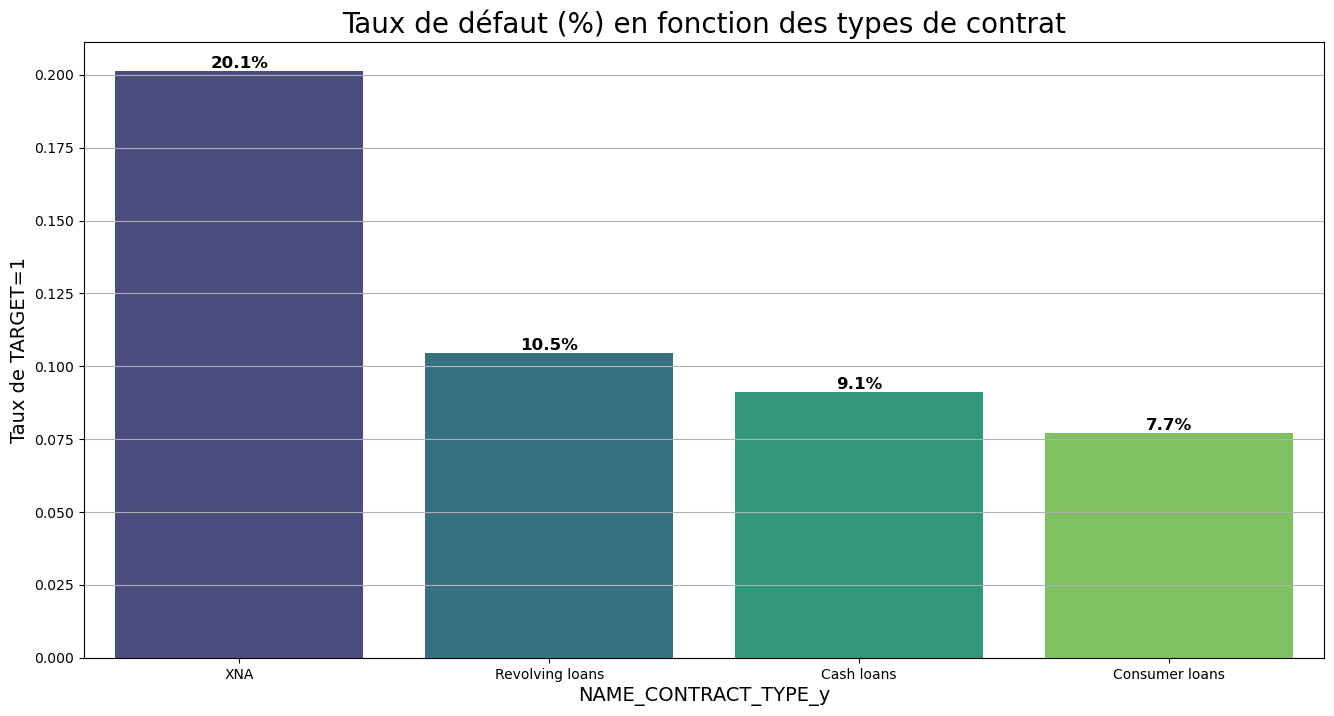

In [320]:
# Visualisation de la distribution de NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y', "Distribution des types de contrat")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y', "Taux de défaut (%) en fonction des types de contrat", (16,8))
plt.show()

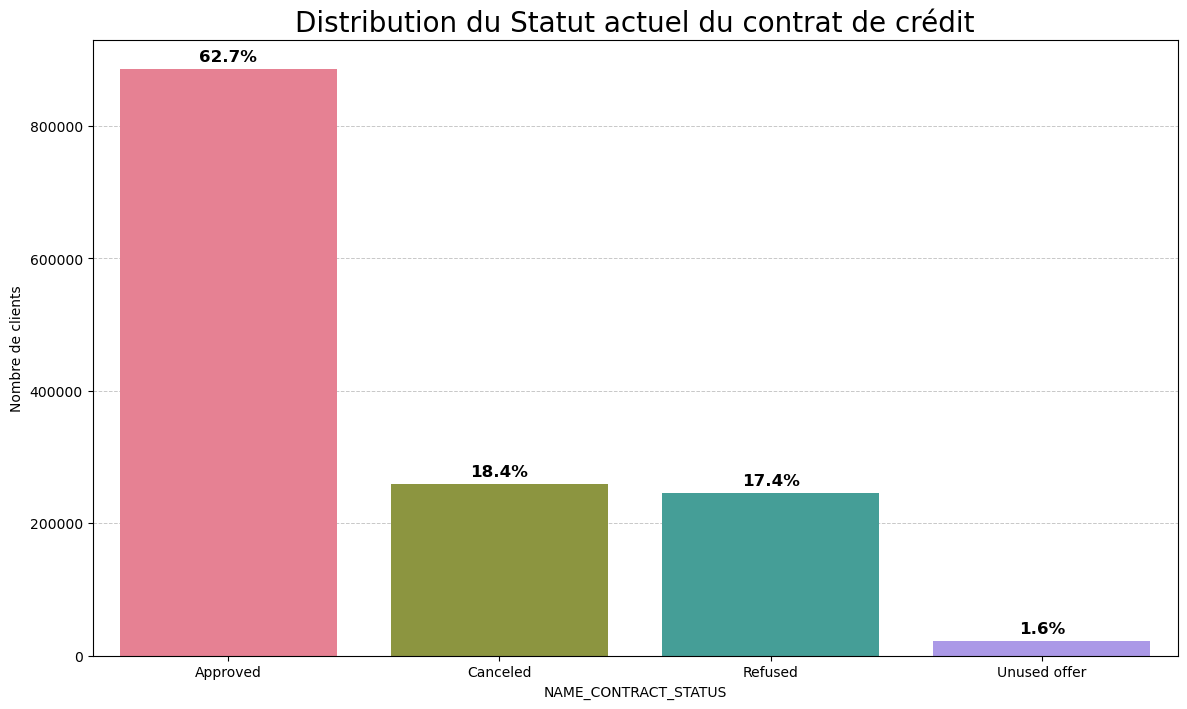

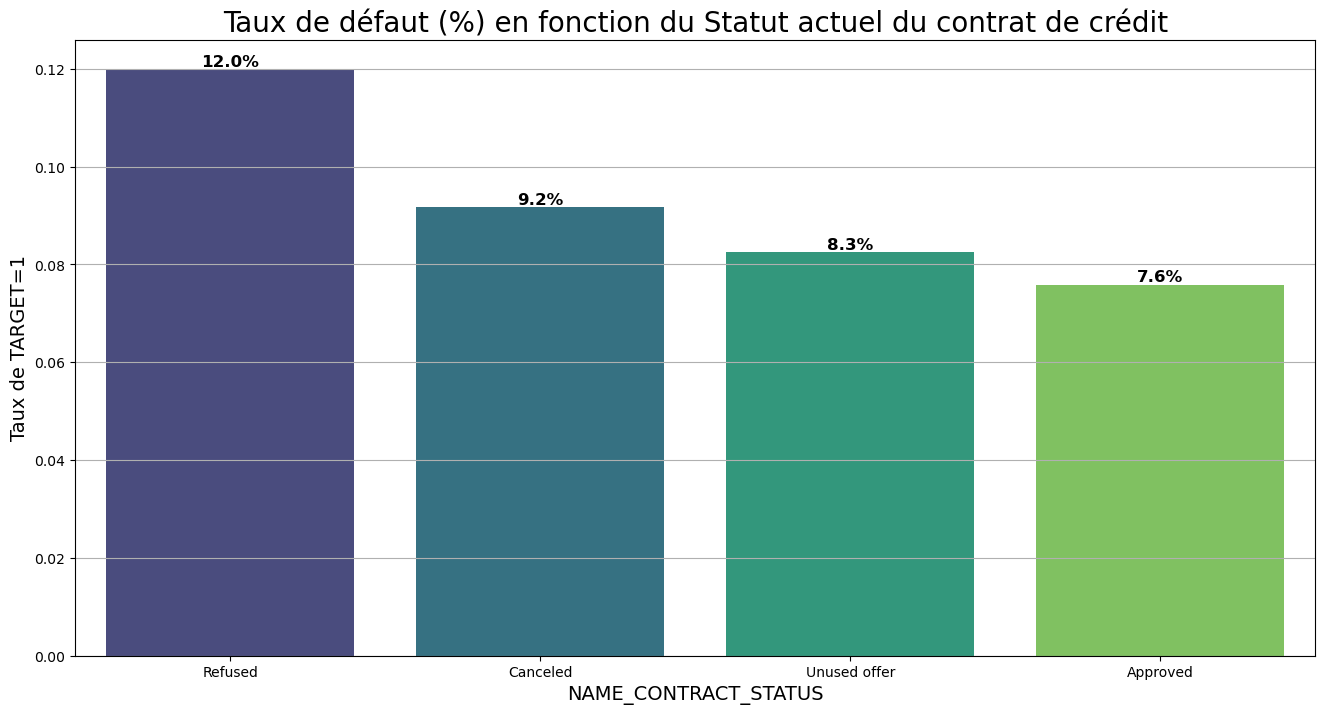

In [321]:
# Visualisation de la distribution de NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS', "Distribution du Statut actuel du contrat de crédit")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS', "Taux de défaut (%) en fonction du Statut actuel du contrat de crédit", (16,8))
plt.show()

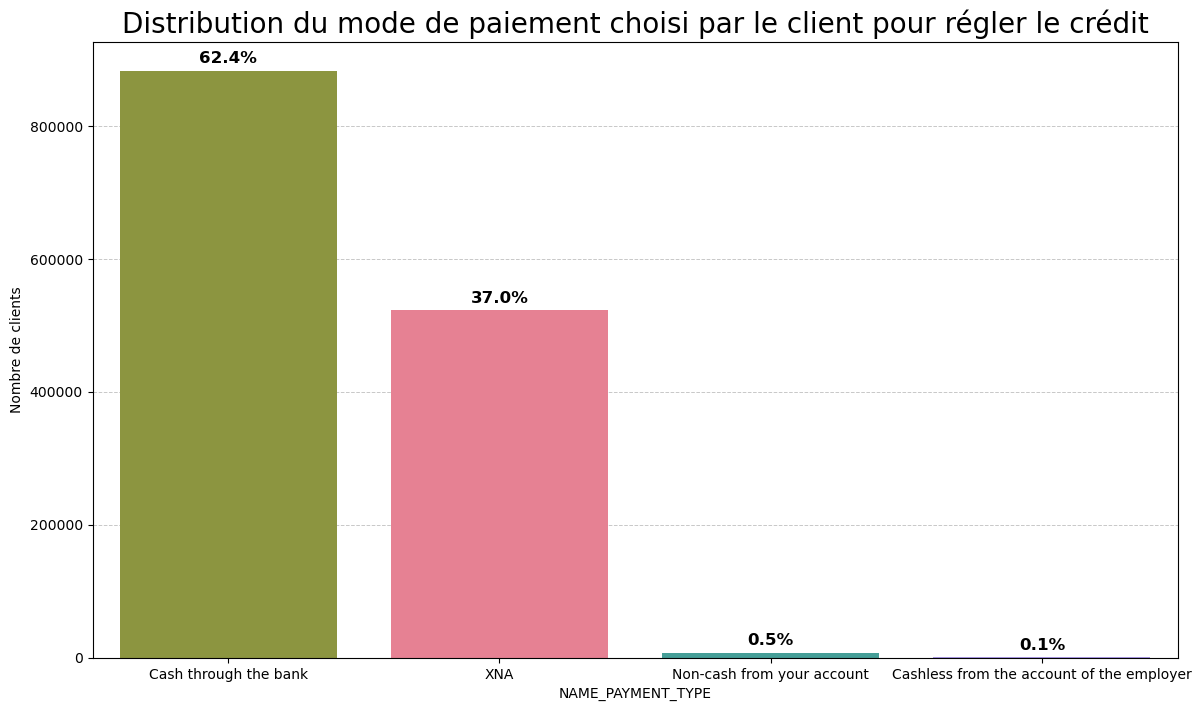

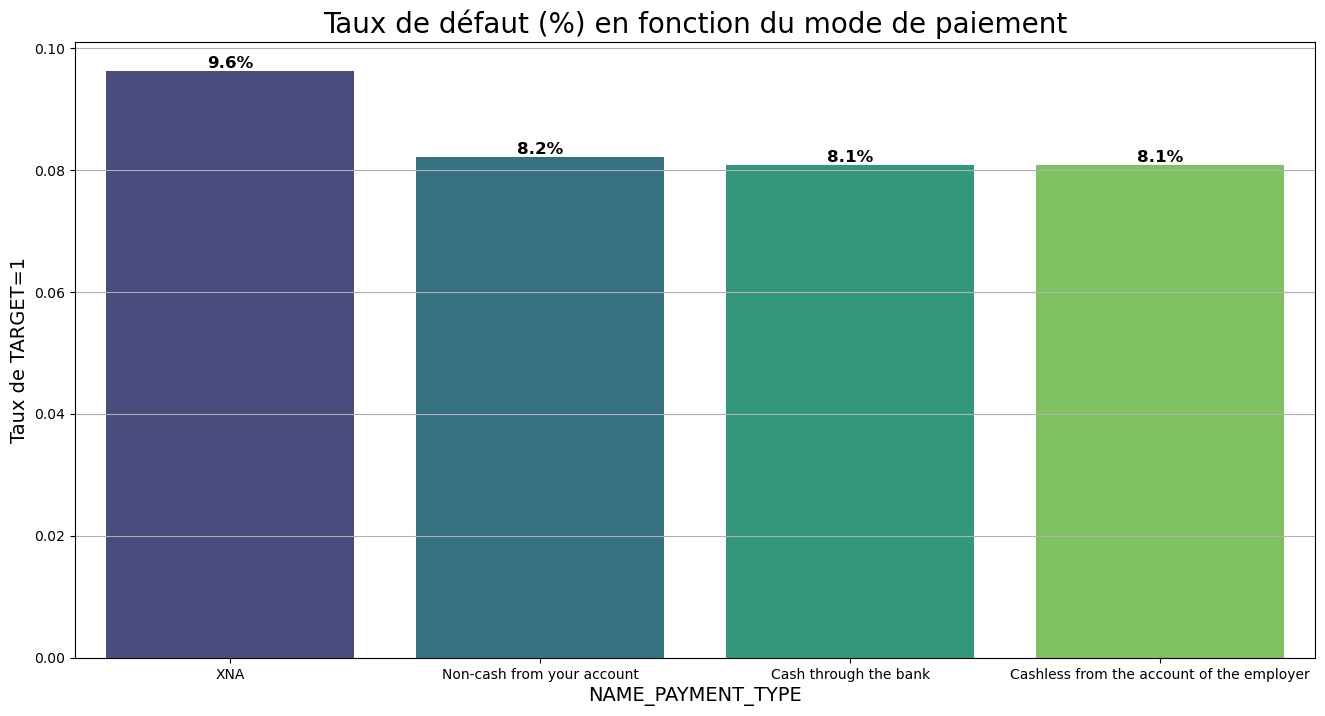

In [322]:
# Visualisation de la distribution de NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE', "Distribution du mode de paiement choisi par le client pour régler le crédit")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE', "Taux de défaut (%) en fonction du mode de paiement", (16,8))
plt.show()

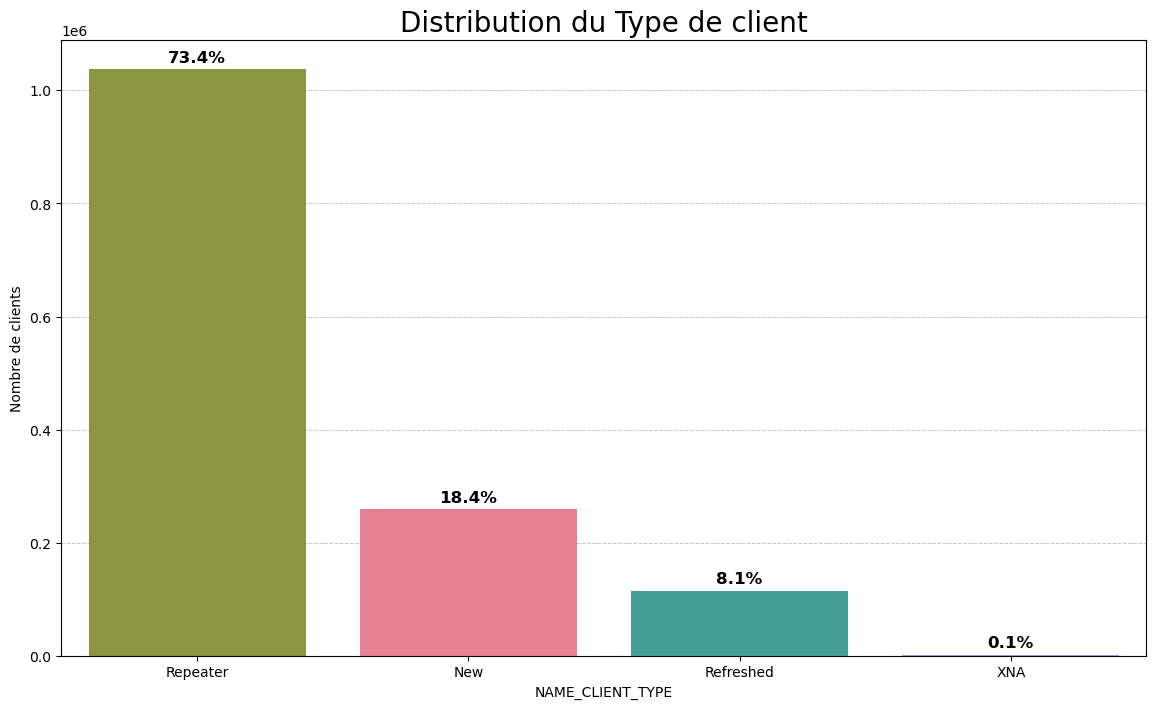

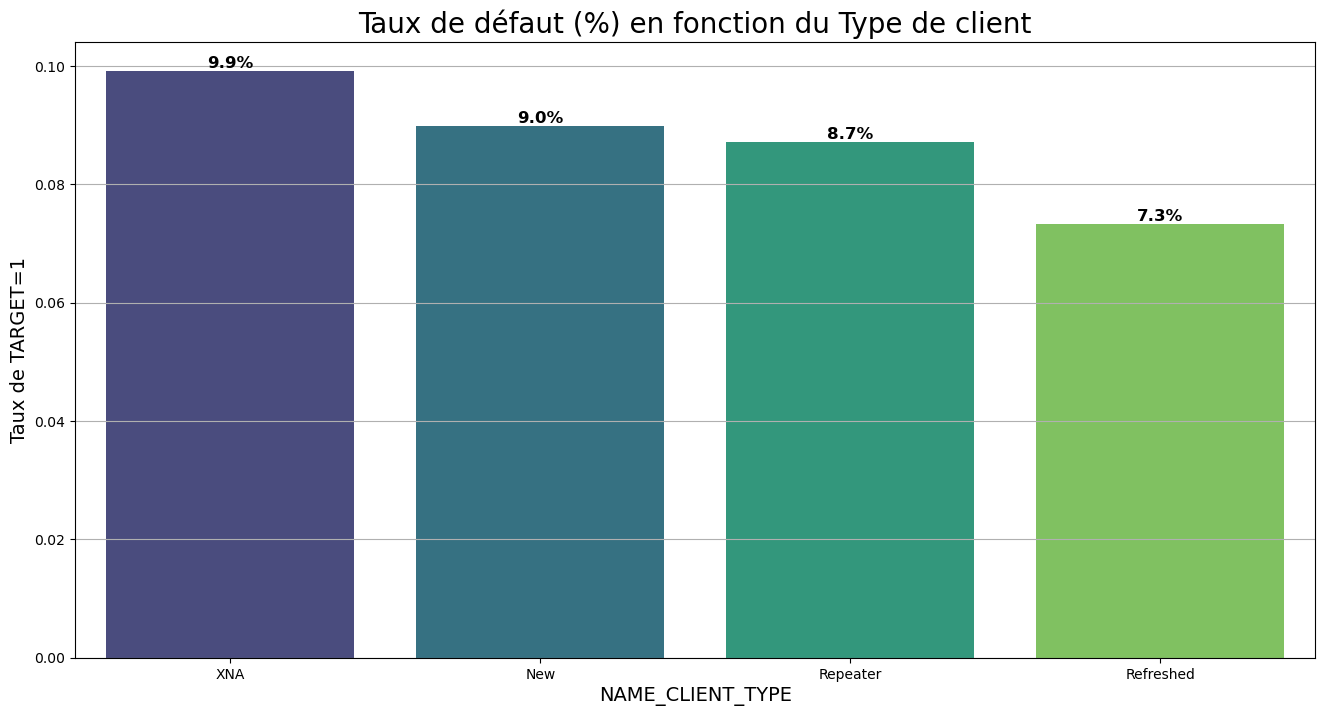

In [323]:
# Visualisation de la distribution de NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE', "Distribution du Type de client")
plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE', "Taux de défaut (%) en fonction du Type de client", (16,8))
plt.show()

***

* ### **Fusion app_train avec app_test = data**

In [326]:
# Fusion train et test
data = pd.concat([app_train, app_test], axis=0, ignore_index=True)

# Affichage des dimensions des datasets
print('Train:', app_train.shape)
print('Test:', app_test.shape)
print('>>> Data:', data.shape)

Train: (307511, 124)
Test: (48744, 122)
>>> Data: (356255, 124)


In [327]:
# Vérification de l'intégrité des données
print('Missing TARGET in data:', data.TARGET.isna().sum())
print('Matching SK_ID_CURR in train and test:', 
      sum(data.SK_ID_CURR[data.TARGET.isna()].values == app_test.SK_ID_CURR.values))

# combien de SK_ID_CURR apparaissent dans les deux
matching_ids = np.intersect1d(data.SK_ID_CURR[data.TARGET.isna()], app_test.SK_ID_CURR)
print('Matching SK_ID_CURR in train and test:', len(matching_ids))

Missing TARGET in data: 48744
Matching SK_ID_CURR in train and test: 48744
Matching SK_ID_CURR in train and test: 48744


***

* **Nous allons créer un DataFrame final `data`, enrichi de nombreuses features agrégées par client (SK_ID_CURR), à partir de plusieurs tables secondaires décrivant son historique de crédit (bureau, previous_application, etc.)**

* ### **Ajout du nombre de prêts précédents par client (`bureau`) à `data`**

In [331]:
# Nombre de prêts précédents pour chaque client
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns={'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
# Fusion avec les données existantes
data = data.merge(previous_loan_counts, on='SK_ID_CURR', how='left')

In [332]:
previous_loan_counts

SK_ID_CURR  PREVIOUS_LOANS_COUNT
0           100001                     7
1           100002                     8
2           100003                     4
3           100004                     2
4           100005                     3
...            ...                   ...
305806      456249                    13
305807      456250                     3
305808      456253                     4
305809      456254                     1
305810      456255                    11

[305811 rows x 2 columns]

**Nous avons :**
* Calculé pour chaque client (SK_ID_CURR) le nombre de prêts enregistrés dans SK_ID_BUREAU pour chaque client.
* Puis renommeé cette colonne en 'PREVIOUS_LOANS_COUNT'.
* Cela nous donne un DataFrame avec deux colonnes : SK_ID_CURR et PREVIOUS_LOANS_COUNT, soit le nombre de prêts antérieurs par client.
* Puis fusion sur SK_ID_CURR de ce nombre de prêts avec la table principale data, avec une jointure à gauche (left), donc tous les clients de data seront conservés, même s’ils n'ont pas de prêts dans bureau.

***

* ### **Moyenne des soldes mensuels des précédents crédits dans (`bureau_balance`) et fusion avec `bureau`**

In [336]:
# Moyenne des balances mensuelles des crédits précédents
# S'assurer que SK_ID_BUREAU n’est pas présent deux fois
numeric_cols = bureau_balance.select_dtypes(include='number').columns.tolist()
# Retrait de SK_ID_BUREAU s’il est dans numeric_cols
if 'SK_ID_BUREAU' in numeric_cols:
    numeric_cols.remove('SK_ID_BUREAU')
# Sélection des colonnes
cols_to_group = numeric_cols + ['SK_ID_BUREAU']
# Groupby + moyenne
bureau_bal_mean = (bureau_balance[cols_to_group].groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns={'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'}))
bureau_full = bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left').drop('SK_ID_BUREAU', axis=1)

In [337]:
bureau_bal_mean

SK_ID_BUREAU  MONTHS_BALANCE_MEAN
0            5001709                -48.0
1            5001710                -41.0
2            5001711                 -1.5
3            5001712                 -9.0
4            5001713                -10.5
...              ...                  ...
817390       6842884                -23.5
817391       6842885                -11.5
817392       6842886                -16.0
817393       6842887                -18.0
817394       6842888                -30.5

[817395 rows x 2 columns]

*bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU').mean()*

*bureau_full = bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left')*

**Nous avons :**
* Calculé la moyenne des colonnes numériques par crédit (SK_ID_BUREAU) dans bureau_balance.
* Fusionné ces moyennes avec bureau, pour enrichir chaque crédit avec ses données de balance mensuelle.
* renommé la colonne MONTHS_BALANCE en MONTHS_BALANCE_MEAN.

***

* ### **Moyenne des crédits précédents par client (`bureau_full`) et fusion avec `data`** 

In [341]:
# Moyenne des balances par client
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False)[
    bureau_full.select_dtypes(include='number').columns].mean().add_prefix('PREV_BUR_MEAN_')
# Renommons la colonne dans bureau_mean
bureau_mean.rename(columns={'PREV_BUR_MEAN_SK_ID_CURR': 'SK_ID_CURR'}, inplace=True)
# Fusion avec les données
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')

* Ce code effectue une agrégation des données de crédits passés par client, en prenant la moyenne de toutes les colonnes numériques issues de bureau_full*

*bureau_mean = bureau_full.groupby('SK_ID_CURR').mean().add_prefix('PREV_BUR_MEAN_')*

**Nous avons :**
* Agrègé les prêts du bureau au niveau client : on calcule la moyenne de toutes les colonnes numériques issues de `bureau_full` pour chaque SK_ID_CURR. Seules les colonnes numériques sont utilisées pour le calcul de la moyenne.
* Fusionné cette moyenne dans le DataFrame principal `data`.

***

* ### **Nombre de demandes de crédit précédentes par client (from `previous_application`) et fusion avec `data`** 

In [345]:
# Nombre de précédentes demandes de crédit
previous_application_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns={'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
# Fusion avec les données
data = data.merge(previous_application_counts, on='SK_ID_CURR', how='left')

* Ce code permet de calculer le nombre de demandes de crédit précédentes par client (issues de la table previous_application) et de les fusionner dans le jeu de données principal data.

*previous_application_counts = previous_application.groupby('SK_ID_CURR')['SK_ID_PREV'].count()*

***

* ### **Moyenne des soldes de cartes de crédit par crédit précédent (`credit_card_balance`) et fusion avec (`previous_application`)** 

In [349]:
# Fusion avec les données de solde de cartes de crédit
# Filtrage des colonnes numériques
numeric_columns = credit_card_balance.select_dtypes(include=['int64', 'float64']).columns
# S'assurer que SK_ID_PREV est bien inclus dans le groupby (mais pas renommé)
if 'SK_ID_PREV' not in numeric_columns:
    numeric_columns.append('SK_ID_PREV')
# Agrégation
credit_card_balance_mean = credit_card_balance[numeric_columns].groupby('SK_ID_PREV', as_index=False).mean()
# Renommons toutes les colonnes sauf SK_ID_PREV
credit_card_balance_mean = credit_card_balance_mean.rename(
    columns={col: f'CARD_MEAN_{col}' for col in credit_card_balance_mean.columns if col != 'SK_ID_PREV'})
# Fusion avec previous_application
previous_application = previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')

* Ce code a pour but de calculer la moyenne des soldes de cartes de crédit pour chaque crédit précédent (SK_ID_PREV) à partir de la table credit_card_balance, puis de fusionner ces moyennes avec la table previous_application.

*credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV').mean()*

*previous_application = previous_application.merge(credit_card_balance_mean)*

***

* ### **Moyenne des paiements échelonnés (`installments_payments`) et fusion avec `previous_application`** 

In [353]:
# Fusion avec les paiements par versements
install_pay_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
# Renommons la colonne 'INSTALL_MEAN_SK_ID_PREV' pour qu'elle corresponde à 'SK_ID_PREV'
install_pay_mean.rename(columns={'INSTALL_MEAN_SK_ID_PREV': 'SK_ID_PREV'}, inplace=True)
# Suppression des doublons dans credit_card_balance en gardant la première ligne
credit_card_balance = credit_card_balance.drop_duplicates(subset='SK_ID_PREV', keep='first')
# Fusion avec les paiements par versements
previous_application = previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')

* Ce code calcule la moyenne des paiements par versements (installments_payments) pour chaque crédit précédent (SK_ID_PREV), puis les fusionne avec la table previous_application

*install_pay_mean = installments_payments.groupby('SK_ID_PREV').mean()*

*previous_application = previous_application.merge(install_pay_mean)*

***

* ### **Moyenne des données de solde des terminaux de paiement (POS) `POS_CASH_balance`,  pour chaque crédit (`SK_ID_PREV`), et fusion avec `previous_application`** 

In [357]:
# Fusion avec les balances POS
# Calcul de la moyenne uniquement pour les colonnes numériques
POS_mean = POS_CASH_balance.groupby('SK_ID_PREV', as_index=False).mean(numeric_only=True).add_prefix('POS_MEAN_')
# Renommons la colonne 'POS_MEAN_SK_ID_PREV' en 'SK_ID_PREV' pour la fusion
POS_mean.rename(columns={'POS_MEAN_SK_ID_PREV': 'SK_ID_PREV'}, inplace=True)
# Fusion avec previous_application
previous_application = previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')

* Ce code calcule la moyenne des colonnes numériques dans la table POS_CASH_balance pour chaque crédit précédent (SK_ID_PREV), puis fusionne le résultat avec la table previous_application.

*POS_mean = POS_CASH_balance.groupby('SK_ID_PREV').mean()*

*previous_application = previous_application.merge(POS_mean)*

***

* ### **Moyenne des anciennes demandes de crédit (`previous_application`) par client, avec `data`** 

In [361]:
# Fusion avec les données finales
# Sélection uniquement des colonnes numériques pour le calcul de la moyenne
previous_application_numeric = previous_application.select_dtypes(include=['number'])
# Calcul de la moyenne des colonnes numériques groupées par SK_ID_CURR
prev_appl_mean = previous_application_numeric.groupby('SK_ID_CURR', as_index=False).mean()
# Ajout du préfixe uniquement aux colonnes autres que 'SK_ID_CURR'
prev_appl_mean.columns = ['SK_ID_CURR'] + ['PREV_APPL_MEAN_' + col for col in prev_appl_mean.columns if col != 'SK_ID_CURR']
# Fusion avec data
data = data.merge(prev_appl_mean, on='SK_ID_CURR', how='left')

* Ce code effectue une agrégation finale des anciennes demandes de crédit (previous_application) au niveau client (SK_ID_CURR). Il calcule la moyenne des variables numériques par client, puis fusionne ces moyennes avec la table principale data.

*prev_appl_mean = previous_application.groupby('SK_ID_CURR').mean()*
  
*data = data.merge(prev_appl_mean)*

* Toutes les données numériques enrichies dans previous_application (cartes, paiements, POS...) sont maintenant agrégées par client  (SK_ID_CURR) en prenant leur moyenne.
* data est enrichi avec les moyennes des anciennes demandes de crédit.
* Cela donne une vue consolidée du comportement historique du client via ses anciens crédits.

In [363]:
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
3           100006     0.0         Cash loans           F            N   
4           100007     0.0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
356250      456221     NaN         Cash loans           F            N   
356251      456222     NaN         Cash loans           F            N   
356252      456223     NaN         Cash loans           F            Y   
356253      456224     NaN         Cash loans           M            N   
356254      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
356250               Y             0          121500.0    412560.0   
356251               N             2          157500.0    622413.0   
356252               Y             1          202500.0    315000.0   
356253               N             0          225000.0    450000.0   
356254               N             0          135000.0    312768.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
356250      17473.5         270000.0   Unaccompanied               Working   
356251      31909.5         495000.0   Unaccompanied  Commercial associate   
356252      33205.5         315000.0   Unaccompanied  Commercial associate   
356253      25128.0         450000.0          Family  Commercial associate   
356254      24709.5         270000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
356250  Secondary / secondary special                 Widow   
356251  Secondary / secondary special               Married   
356252  Secondary / secondary special               Married   
356253               Higher education               Married   
356254  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
356250  House / apartment                    0.002042      -19970   
356251  House / apartment       

**Résultat final**

**`data` contient désormais :**
* Des statistiques sur les crédits enregistrés dans les bureaux (bureau, bureau_balance).
* Des moyennes de comportement sur les anciens crédits (previous_application enrichi).
* Des données de cartes de crédit, POS, paiements échelonnés.
* Le tout agrégé par client (SK_ID_*****).

* Avant les merges : data avait 124 colonnes.
* Après tous les merges : data a maintenant 193 colonnes.

**Résultat :**
* 193 - 124 = 69 nouvelles features ont été ajoutées à la suite des différentes opérations de merge() et d’agrégation.
* Nous avons donc :
    * agrégé plusieurs sous-tables (bureau, bureau_balance, previous_application, credit_card_balance, installments_payments, POS_CASH_balance)
    * Et généré une base enrichie de 69 nouvelles variables, probablement utiles pour ton modèle (classification ou scoring).


***

## 7.2. Suite Features engineering

* ### **Création manuelle de features dérivées à partir des colonnes existantes**
* Nous allons créer manuellement 4 nouvelles variables métiers, ce qui est une bonne pratique de feature engineering métier.

In [368]:
# Création de nouvelles variables
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

# Variables de Features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT',
                  'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

# Calcul de la corrélation uniquement sur les colonnes numériques
correlations = data.select_dtypes(include='number').corr()

# Affichage des corrélations positives et négatives les plus fortes avec TARGET
print('Most Positive Correlations:\n', correlations['TARGET'].sort_values(ascending=False).head(15))
print('\nMost Negative Correlations:\n', correlations['TARGET'].sort_values().head(15))

Most Positive Correlations:
 TARGET                                               1.000000
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT    0.102917
PREV_BUR_MEAN_DAYS_CREDIT                            0.089729
PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE                 0.086693
PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE        0.085967
PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE               0.085963
PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL    0.085491
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT        0.080885
DAYS_BIRTH                                           0.078239
PREV_BUR_MEAN_MONTHS_BALANCE_MEAN                    0.076424
DAYS_EMPLOYED                                        0.074958
PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY     0.074204
PREV_BUR_MEAN_DAYS_CREDIT_UPDATE                     0.068927
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
Name: TARGET, dtype: float64

Most Negati

**I. 4 nouvelles features créées manuellement,** Ajoutées à la liste features_engin, avec 3 autres issues d’agrégations précédentes : `['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']`. Total : 7 features sélectionnées pour leur potentiel explicatif.

**CREDIT_INCOME_PERCENT**
* Rapport entre le crédit demandé et le revenu du client
    * Évalue si un crédit est "raisonnable" au regard des revenus.

**ANNUITY_INCOME_PERCENT**
* Rapport entre l’annuité et le revenu
    * Donne une idée de la charge mensuelle supportée.

**CREDIT_TERM**
* Durée "approximative" du crédit en nombre de périodes (annuité / montant du crédit)
    * Plus le ratio est élevé, plus la durée de remboursement est longue.

**DAYS_EMPLOYED_PERCENT**
* Ancienneté dans l’emploi par rapport à l’âge
    * Indique la stabilité professionnelle relative.
 



**II. Les corrélations explicitées précédemment n'ont pas évoluées suite à l'extraction des 7 features.**

***

## 7.3. Sauvegarde des données fusionnées
* Compression et sauvegarde de `data` dans un fichier ZIP sous le nom de merged_data.zip. Cela permet de stocker les données fusionnées tout en économisant de l'espace disque.

In [372]:
# Sauvegarde des données
compression_opts = dict(method='zip', archive_name='merged_data.csv')
data.to_csv('merged_data.zip', index=False, compression=compression_opts)

# __________________________________________________________________________________________

# 8. Preprocessing des données <a id="Preprocessing-des-données"></a>

* ### **Division des données en train et test**
* Division des données fusionnées en deux ensembles :
    * data_train contenant les données correspondant aux identifiants SK_ID_CURR présents dans app_train.
    * data_test contenant les données correspondant aux identifiants SK_ID_CURR présents dans app_test.

In [376]:
# Division des données en train et test
data_train = data[data['SK_ID_CURR'].isin(app_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(app_test.SK_ID_CURR)]

***

* ### **Suppression de la colonne TARGET dans les données de test**
* Suppression de la colonne TARGET dans data_test, car cette colonne ne fait pas partie des caractéristiques du modèle et ne doit pas être présente lors de l'évaluation du modèle.

In [379]:
# Suppression de la colonne TARGET dans le test
data_test = data_test.drop('TARGET', axis=1)

***

* ### **Imputation des valeurs manquantes**
* Utilisation d'un imputer pour remplir les valeurs manquantes dans data_train et data_test en utilisant la médiane de chaque colonne.

In [382]:
from sklearn.impute import SimpleImputer

# Séparation des colonnes numériques
num_cols = data_train.select_dtypes(include=['int64', 'float64']).columns.drop('TARGET', errors='ignore')

# Imputation uniquement des colonnes numériques
imputer = SimpleImputer(strategy='median')
data_train[num_cols] = imputer.fit_transform(data_train[num_cols])
data_test[num_cols] = imputer.transform(data_test[num_cols])

# colonnes catégorielles
cat_cols = data_train.select_dtypes(include=['object', 'category']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data_train[cat_cols] = imputer_cat.fit_transform(data_train[cat_cols])
data_test[cat_cols] = imputer_cat.transform(data_test[cat_cols])

C:\Users\matym\AppData\Local\Temp\ipykernel_26916\1584158508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[num_cols] = imputer.fit_transform(data_train[num_cols])
C:\Users\matym\AppData\Local\Temp\ipykernel_26916\1584158508.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[cat_cols] = imputer_cat.fit_transform(data_train[cat_cols])


***

* ### **Normalisation des données**
* Normalisation des données en les mettant à l'échelle dans l'intervalle [0, 1] grâce à un MinMaxScaler, appliqué d'abord sur data_train puis sur data_test.

In [385]:
print(data_train.dtypes)

SK_ID_CURR                            float64
TARGET                                float64
NAME_CONTRACT_TYPE                     object
CODE_GENDER                            object
FLAG_OWN_CAR                           object
                                       ...   
PREV_APPL_MEAN_POS_MEAN_SK_DPD_DEF    float64
CREDIT_INCOME_PERCENT                 float64
ANNUITY_INCOME_PERCENT                float64
CREDIT_TERM                           float64
DAYS_EMPLOYED_PERCENT                 float64
Length: 197, dtype: object


In [386]:
from sklearn.preprocessing import MinMaxScaler
# Normalisation des données
#Sélection uniquement des colonnes numériques
num_cols = data_train.select_dtypes(include=['float64', 'int64']).columns.drop('TARGET', errors='ignore')

#Création du scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_train[num_cols])

#Application du scaler uniquement sur les colonnes numériques
scaled_train = data_train.copy()
scaled_test = data_test.copy()

scaled_train[num_cols] = scaler.transform(data_train[num_cols])
scaled_test[num_cols] = scaler.transform(data_test[num_cols])

***

* ### **Réattribution des noms des colonnes après normalisation**
* Reconstruiction des DataFrames normalisés data_train et data_test avec les noms de colonnes d'origine après la transformation.

In [389]:
# Réaffectation aux noms initiaux avec les données normalisées
data_train = scaled_train
data_test = scaled_test

***

* ### **Sauvegarde des données normalisées**
* Sauvegarde des DataFrames normalisés dans des fichiers ZIP sous les noms `data_train.zip` et `data_test.zip`.

In [392]:
# Sauvegarde des jeux de données normalisés
compression_opts = dict(method='zip', archive_name='data_train.csv')
data_train.to_csv('data_train.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip', archive_name='data_test.csv')
data_test.to_csv('data_test.zip', index=True, compression=compression_opts)

***

* ### **Sauvegarde de la cible (TARGET)**
* Extraction de la colonne TARGET de data_train et sauvegarde séparément dans un fichier CSV.

In [395]:
# Sauvegarde TARGET
TARGET = data_train.TARGET
TARGET.to_csv('TARGET.csv', index=True)

***

* ### **Gestion des variables catégorielles**

In [398]:
from sklearn.preprocessing import LabelEncoder

# Label encodage uniquement des colonnes binaires (2 modalités)
le = LabelEncoder()
for col in data_train.columns:
    if data_train[col].dtype == 'object' and len(data_train[col].unique()) <= 2:
        le.fit(data_train[col])
        data_train[col] = le.transform(data_train[col])
        data_test[col] = le.transform(data_test[col])

# Affichage des nouvelles dimensions
print('Training Features shape with categorical columns:', data_train.shape)
print('Testing Features shape with categorical columns:', data_test.shape)

# Application de One-Hot Encoding pour les variables catégorielles restantes
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

Training Features shape with categorical columns: (307511, 197)
Testing Features shape with categorical columns: (48744, 196)


***

* ### **Alignement des colonnes entre train et test**
* On S’assure que `data_train` et `data_test` contiennent exactement les mêmes colonnes (après one-hot).

In [401]:
# Alignement des datasets train et test
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

print(data_train.shape)
print(data_test.shape)

(307511, 313)
(48744, 313)


* ### **Nettoyage des colonnes**

In [404]:
import re
# Création du mapping ancien -> nouveau nom
rename_mapping = {}
for col in data_train.columns:
    # Nouveau nom : remplacement de tout ce qui n'est pas lettre, chiffre ou _ par un _
    new_col = re.sub(r'[^0-9a-zA-Z_]', '_', col)
    # Suppression des underscores multiples consécutifs
    new_col = re.sub(r'_+', '_', new_col).strip('_')
    rename_mapping[col] = new_col

# Application du renommage
data_train.rename(columns=rename_mapping, inplace=True)

# Affichage des 5 premières modifications
for old, new in list(rename_mapping.items())[:5]:
    print(f"{old} -> {new}")

# Vérifiction s'il y a encore des colonnes avec des caractères spéciaux
specials = [col for col in data_train.columns if re.search(r'[^0-9a-zA-Z_]', col)]
print("Colonnes problématiques après nettoyage :", specials)  # Devrait normalement afficher une liste vide

SK_ID_CURR -> SK_ID_CURR
NAME_CONTRACT_TYPE -> NAME_CONTRACT_TYPE
FLAG_OWN_CAR -> FLAG_OWN_CAR
FLAG_OWN_REALTY -> FLAG_OWN_REALTY
CNT_CHILDREN -> CNT_CHILDREN
Colonnes problématiques après nettoyage : []


In [406]:
# Création du mapping ancien -> nouveau nom
rename_mapping = {}
for col in data_test.columns:
    # Nouveau nom : remplacement de tout ce qui n'est pas lettre, chiffre ou _ par un _
    new_col = re.sub(r'[^0-9a-zA-Z_]', '_', col)
    # Suppression des underscores multiples consécutifs
    new_col = re.sub(r'_+', '_', new_col).strip('_')
    rename_mapping[col] = new_col

# Application du renommage
data_test.rename(columns=rename_mapping, inplace=True)

# Affichage des 5 premières modifications
for old, new in list(rename_mapping.items())[:5]:
    print(f"{old} -> {new}")

# Vérifiction s'il y a encore des colonnes avec des caractères spéciaux
specials = [col for col in data_test.columns if re.search(r'[^0-9a-zA-Z_]', col)]
print("Colonnes problématiques après nettoyage :", specials)  # Devrait normalement afficher une liste vide

SK_ID_CURR -> SK_ID_CURR
NAME_CONTRACT_TYPE -> NAME_CONTRACT_TYPE
FLAG_OWN_CAR -> FLAG_OWN_CAR
FLAG_OWN_REALTY -> FLAG_OWN_REALTY
CNT_CHILDREN -> CNT_CHILDREN
Colonnes problématiques après nettoyage : []


***

* ### **Sauvegarde**
    * data_test ne doit pas contenir TARGET (normal : données à prédire).
    * data_train doit contenir TARGET (car on va entraîner un modèle dessus).
    * L’alignement avec join="inner" garantit que toutes les colonnes sont les mêmes dans train et test, sauf TARGET.

In [410]:
# Réintégration de la colonne TARGET dans data_train
data_train['TARGET'] = TARGET

# Sauvegarde des datasets finaux
compression_opts = dict(method='zip', archive_name='data_train_final.csv')
data_train.to_csv('data_train_final.zip', index=True, compression=compression_opts)

compression_opts = dict(method='zip', archive_name='data_test_final.csv')
data_test.to_csv('data_test_final.zip', index=True, compression=compression_opts)

In [411]:
# Sauvegarde TARGET
TARGET = data_train.TARGET
TARGET.to_csv('TARGET.csv', index=True)

In [414]:
# Vérification
print("Shape train:", data_train.shape)
print("Shape test:", data_test.shape)
print("Distribution TARGET:\n", TARGET.value_counts(normalize=True))

Shape train: (307511, 314)
Shape test: (48744, 313)
Distribution TARGET:
 TARGET
0.0    0.919271
1.0    0.080729
Name: proportion, dtype: float64


***